## Libraries

In [1]:
# Standard libraries
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')
import random

# For downloading and unzipping files
import urllib.request
import zipfile

# Create wrapper for StandardScaler
import typing

# Preprocessing
from sklearn.preprocessing import (
    LabelEncoder, 
    LabelBinarizer, 
    StandardScaler, 
    PolynomialFeatures
)
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn_pandas import DataFrameMapper
from sklearn.pipeline import make_pipeline

# Models
from sklearn.linear_model import (
    LinearRegression,
    HuberRegressor,
    Ridge,
    Lasso,
    ElasticNet
)
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (
    BaggingRegressor,
    RandomForestRegressor,
    ExtraTreesRegressor,
    AdaBoostRegressor
)
from xgboost import XGBRegressor 
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

# Saving files
import os
import pickle

# Metrics
from sklearn.metrics import mean_squared_error, r2_score

# Load libraries
import requests
from bs4 import BeautifulSoup
import re

# Set viewing limits
pd.set_option('display.max_rows', 110)
pd.set_option('display.max_columns', 110)

In [2]:
# !pip install sklearn_pandas

## Load files 

In [3]:
# Load files
df_reit = pd.read_csv('../data/df_reit.csv')
# df_all = pd.read_csv('../data/df_all.csv')
df_sample1 = pd.read_csv('../data/df_sample1.csv')
df_sample2 = pd.read_csv('../data/df_sample2.csv')

In [4]:
df_sample1.shape, df_sample2.shape, df_reit.shape

((64197, 102), (72833, 102), (64008, 102))

## EDA

### Check dtypes

In [5]:
display(df_reit.dtypes, df_sample2.dtypes)

DATE                object
RET                float64
SHROUT               int64
absacc             float64
acc                float64
aeavol             float64
age                float64
agr                float64
baspread           float64
beta               float64
betasq             float64
bm                 float64
bm_ia              float64
cash               float64
cashdebt           float64
cashpr             float64
cfp                float64
cfp_ia             float64
chatoia            float64
chcsho             float64
chempia            float64
chinv              float64
chmom              float64
chpmia             float64
chtx               float64
cinvest            float64
convind            float64
currat             float64
depr               float64
divi               float64
divo               float64
dolvol             float64
dy                 float64
ear                float64
egr                float64
ep                 float64
gma                float64
g

DATE                object
RET                float64
SHROUT               int64
absacc             float64
acc                float64
aeavol             float64
age                float64
agr                float64
baspread           float64
beta               float64
betasq             float64
bm                 float64
bm_ia              float64
cash               float64
cashdebt           float64
cashpr             float64
cfp                float64
cfp_ia             float64
chatoia            float64
chcsho             float64
chempia            float64
chinv              float64
chmom              float64
chpmia             float64
chtx               float64
cinvest            float64
convind            float64
currat             float64
depr               float64
divi               float64
divo               float64
dolvol             float64
dy                 float64
ear                float64
egr                float64
ep                 float64
gma                float64
g

In [6]:
# Convert dates to date_time format
df_reit['DATE'] = pd.to_datetime(df_reit['DATE'])
df_sample1['DATE'] = pd.to_datetime(df_sample1['DATE'])
df_sample2['DATE'] = pd.to_datetime(df_sample2['DATE'])

In [7]:
# Create dataframe to store portfolio results
df_portfolio_reit = df_reit[['DATE', 'RET', 'mve0']]
df_portfolio_sample1 = df_sample1[['DATE', 'RET', 'mve0']]
df_portfolio_sample2 = df_sample2[['DATE', 'RET', 'mve0']]

### Check distribution properties of REIT and non-REIT samples

In [8]:
df_reit.describe()

RET        SHROUT        absacc           acc        aeavol  \
count  64008.000000  6.400800e+04  54666.000000  54666.000000  56579.000000   
mean       0.793220  7.013581e+04      0.046883     -0.030594      0.382075   
std       11.269058  1.172713e+05      0.058331      0.061895      1.396882   
min     -100.240000  7.300000e+01      0.000005     -0.688700     -1.000000   
25%       -3.493700  1.087400e+04      0.019679     -0.048520     -0.245375   
50%        0.642700  2.979250e+04      0.034751     -0.031812      0.087046   
75%        4.990075  8.215025e+04      0.052294     -0.012325      0.570691   
max      290.267700  1.456263e+06      0.784498      0.481374     25.108885   

                age           agr      baspread          beta        betasq  \
count  58951.000000  54666.000000  64008.000000  59295.000000  5.929500e+04   
mean      12.444233     -0.178574      0.029026      0.742332  8.288865e-01   
std       10.543428      0.444585      0.030558      0.526261  1.215155e+00   
min        1.000000     -5.798628      0.000000     -0.752928  5.824185e-10   
25%        4.000000     -0.232912      0.015529      0.369188  1.379518e-01   
50%        9.000000     -0.055271      0.020705      0.637586  4.074913e-01   
75%       19.000000      0.026109      0.031399      0.986905  9.741556e-01   
max       57.000000      0.741537      1.000000      3.731348  1.392296e+01   

                 bm         bm_ia          cash      cashdebt        cashpr  \
count  50617.000000  50617.000000  56386.000000  22187.000000  58725.000000   
mean       0.919272     -1.424082      0.048897      0.243380      7.298352   
std        2.146263     10.680483      0.097846      2.112544    144.561743   
min       -8.101332   -387.914746      0.000000    -27.977908  -3481.312227   
25%        0.398393     -0.732239      0.007727      0.001656     -8.713234   
50%        0.648955     -0.255873      0.020010      0.038908     -0.016854   
75%        1.000054      0.092396      0.048081      0.129045     14.116543   
max       67.718725     65.532378      0.976943     36.391304   2624.706571   

                cfp        cfp_ia       chatoia        chcsho       chempia  \
count  58849.000000  58849.000000  50509.000000  54620.000000  46678.000000   
mean       0.100717      0.029195     -0.010412      0.135781     -0.287560   
std        0.236956      0.324170      0.202780      0.365817      1.066510   
min       -2.797329     -6.601293     -1.003966     -0.861255    -41.679126   
25%        0.054923     -0.028779     -0.060296      0.000000     -0.479695   
50%        0.084949      0.022095     -0.008072      0.014349     -0.163654   
75%        0.132451      0.082814      0.031319      0.132191     -0.033870   
max        2.711904     16.565130      0.787923      4.171171     12.993296   

              chinv         chmom        chpmia          chtx       cinvest  \
count  53612.000000  59850.000000  54617.000000  54165.000000  21255.000000   
mean       0.001067     -0.000896     -0.299228      0.000105      0.603613   
std        0.018757      0.360117      6.573507      0.004549     31.693237   
min       -0.211381     -5.264719   -163.169022     -0.083959   -865.666667   
25%        0.000000     -0.168953     -1.104720      0.000000     -0.000546   
50%        0.000000     -0.009229     -0.047508      0.000000      0.000000   
75%        0.000000      0.152691      0.482541      0.000000      0.000000   
max        0.229783      6.150533     77.954287      0.104068   1697.900000   

            convind        currat         depr          divi          divo  \
count  58951.000000  47729.000000  9514.000000  54666.000000  54666.000000   
mean       0.117063     19.402053     0.271806      0.022043      0.023378   
std        0.321498     55.076567     0.676044      0.146825      0.151103   
min        0.000000      0.038462     0.000000      0.000000      0.000000   
25%        0.000000      1.212136     0.043729      0.000000      

In [9]:
df_sample1.describe()

RET        SHROUT        absacc           acc        aeavol  \
count  64197.000000  6.419700e+04  45960.000000  45960.000000  47882.000000   
mean       0.841475  7.531136e+04      0.089227     -0.059817      0.879709   
std       18.122351  2.874410e+05      0.105920      0.118692      1.933838   
min     -178.918000  0.000000e+00      0.000000     -1.228435     -1.000000   
25%       -6.068000  7.421000e+03      0.025664     -0.096364     -0.176020   
50%        0.173500  1.981700e+04      0.058017     -0.044849      0.365345   
75%        6.230000  5.184700e+04      0.110344     -0.005622      1.199659   
max      919.660000  1.077158e+07      1.228435      0.479819     22.473282   

                age           agr      baspread          beta        betasq  \
count  51678.000000  48282.000000  64193.000000  59047.000000  5.904700e+04   
mean      14.217868     -0.147332      0.045253      1.033965  1.552613e+00   
std       12.357108      0.447174      0.047495      0.691052  1.915686e+00   
min        1.000000     -6.033304      0.000000     -1.933264  1.846387e-09   
25%        5.000000     -0.189885      0.019486      0.533108  2.916033e-01   
50%       10.000000     -0.057598      0.033066      0.956063  9.194468e-01   
75%       21.000000      0.032496      0.055883      1.425453  2.038601e+00   
max       58.000000      0.826500      1.027273      3.986823  1.589475e+01   

                 bm         bm_ia          cash      cashdebt        cashpr  \
count  48224.000000  48224.000000  47535.000000  50347.000000  51125.000000   
mean       2.895020     -0.836684      0.182678     -0.057300      1.612883   
std       27.357314     29.690660      0.226142      1.816205     68.023015   
min       -5.422429   -858.037632     -0.082990   -153.851064  -3481.312227   
25%        0.295016     -0.394771      0.026447      0.003626     -6.942837   
50%        0.573062     -0.113164      0.083276      0.094251      0.205544   
75%        0.979617      0.202015      0.250492      0.245372      5.914834   
max     1776.577981   1268.243751      0.978683     38.113756   1896.333474   

                cfp        cfp_ia       chatoia        chcsho       chempia  \
count  48975.000000  48975.000000  44848.000000  48210.000000  47574.000000   
mean       0.063040     -0.010190      0.001445      0.098227     -0.155287   
std        0.255131      0.811222      0.202002      0.310074      1.581490   
min       -3.334579    -10.399696     -1.244881     -0.888710    -57.421084   
25%        0.000062     -0.072923     -0.059017      0.000000     -0.184613   
50%        0.068430      0.008068      0.001264      0.007678     -0.063604   
75%        0.138121      0.085114      0.068755      0.058974      0.028301   
max        2.711904     32.042573      1.209927      3.288317      4.910457   

              chinv         chmom        chpmia          chtx       cinvest  \
count  47307.000000  59860.000000  47142.000000  46182.000000  45842.000000   
mean       0.007148      0.006663      0.141660      0.000657      0.350471   
std        0.044330      0.543439      8.589655      0.011503     25.250467   
min       -0.253321     -9.062534   -163.156915     -0.146914  -1121.100000   
25%       -0.001274     -0.224960     -0.258231     -0.001126     -0.029006   
50%        0.000000     -0.006485     -0.009584      0.000000     -0.001237   
75%        0.011191      0.220948      0.118720      0.002402      0.021389   
max        0.328848      8.083012    157.613220      0.162096   3146.400000   

            convind        currat          depr          divi          divo  \
count  51678.000000  50577.000000  49306.000000  48284.000000  48284.000000   
mean       0.107028      3.983345      0.341568      0.034587      0.030652   
std        0.309152     12.424318      0.633116      0.182733      0.172375   
min        0.000000      0.018064     -0.083847      0.000000      0.000000   
25%        0.000000      1.137258      0.107547      0.000000

In [10]:
df_sample2.describe()

RET        SHROUT        absacc           acc        aeavol  \
count  72833.000000  7.283300e+04  63582.000000  63582.000000  62890.000000   
mean       1.116299  1.749435e+05      0.066463     -0.047019      0.775272   
std       12.888184  8.002371e+05      0.074889      0.084313      1.638623   
min      -83.844700  4.690000e+02      0.000000     -0.992512     -1.000000   
25%       -4.426100  1.097300e+04      0.022740     -0.075467     -0.077140   
50%        0.645000  3.696000e+04      0.048377     -0.040726      0.387340   
75%        5.737200  1.239390e+05      0.083339     -0.009631      1.076011   
max      640.300700  2.920640e+07      0.992512      0.411077     22.040841   

                age           agr      baspread          beta        betasq  \
count  66984.000000  66696.000000  72832.000000  72605.000000  72605.000000   
mean      27.777813     -0.110163      0.033190      0.906943      1.134258   
std       13.189437      0.296124      0.031827      0.552601      1.352345   
min        1.000000     -6.033304      0.001482     -0.884482      0.000000   
25%       18.000000     -0.147945      0.017270      0.520969      0.274533   
50%       28.000000     -0.060705      0.024962      0.852919      0.729872   
75%       37.000000      0.005328      0.038596      1.224540      1.504160   
max       58.000000      0.673474      0.827068      3.724570     13.872425   

                 bm         bm_ia          cash      cashdebt        cashpr  \
count  61973.000000  61973.000000  62419.000000  64933.000000  66334.000000   
mean       1.909133     -0.985669      0.121574      0.269484      2.097598   
std       12.632816     23.247007      0.171838      1.399712     60.113822   
min       -2.191825   -858.037632     -0.010057    -22.360000   -520.622685   
25%        0.314231     -0.361050      0.018480      0.055309     -8.352904   
50%        0.562003     -0.134770      0.053260      0.151616      0.227267   
75%        0.886575      0.141713      0.146603      0.292445      8.721494   
max      384.070813    335.602460      0.975055     36.391304    600.277374   

                cfp        cfp_ia       chatoia        chcsho       chempia  \
count  63752.000000  63752.000000  66053.000000  66696.000000  65964.000000   
mean       0.106338      0.072658     -0.003351      0.082910     -0.172032   
std        0.153031      1.182708      0.172162      0.279840      1.227169   
min       -1.621497    -10.330739     -1.244881     -0.888710    -41.508672   
25%        0.051492     -0.030897     -0.055180     -0.006029     -0.162647   
50%        0.091677      0.025163      0.000377      0.003348     -0.065289   
75%        0.149711      0.092401      0.051964      0.025493      0.005232   
max        2.629016     32.052127      1.027440      4.020224      3.301737   

              chinv         chmom        chpmia          chtx       cinvest  \
count  64747.000000  72746.000000  65827.000000  62382.000000  60642.000000   
mean       0.007364     -0.000262      0.107079      0.000754      0.282961   
std        0.037034      0.433404      7.526153      0.009349     25.011453   
min       -0.216111     -8.201777   -163.156915     -0.121147  -1426.700000   
25%       -0.001518     -0.192761     -0.137954     -0.001257     -0.018808   
50%        0.000301     -0.007531     -0.005039      0.000227     -0.000555   
75%        0.013745      0.181436      0.063704      0.002631      0.015197   
max        0.341886      7.644699    157.446730      0.137610   1697.900000   

            convind        currat          depr          divi          divo  \
count  66984.000000  64451.000000  62761.000000  66696.000000  66696.000000   
mean       0.104532      3.868277      0.240912      0.018232      0.014004   
std        0.305952     12.979677      0.364948      0.133790      0.117507   
min        0.000000      0.146818      0.000000      0.000000      0.000000   
25%        0.000000      1.172847      0.106435      0.000000

As expected, one can see that Sample 1 is more volatile and diverse than Sample 2, since Sample 1 is a independent random selections for every time step (so a stock randomly picked in 2020-01 is likely not to appear in 2020-02), whereas Sample 2 ensures that a stock randomly picked in 1990-01 must appear in 2020-12. These two samples can give us a good sense of the upper and lower bound of model performance without having to run 2 million rows of the full data set...and crashing my computer again!

### Plot KDEs of continuous variables

#### Monthly returns

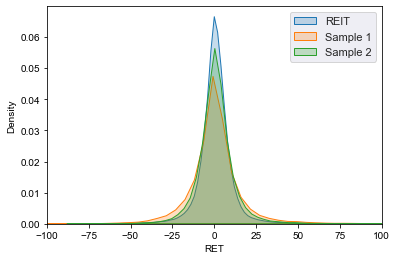

In [11]:
# Monthly returns
data = [df_reit, df_sample1, df_sample2]

fig, ax = plt.subplots()
sns.set(style="darkgrid")

for i in data:
    sns.kdeplot(i['RET'], shade = True, ax = ax)
ax.set(xlim = (-100, 100))

ax.legend(labels = ['REIT', 'Sample 1', 'Sample 2']);

REITs generally have less volatile monthly returns

#### Book-to-market ratios

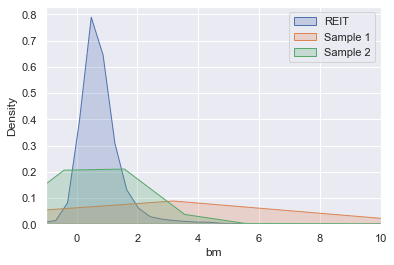

In [12]:
# Book-to-market ratios
fig, ax = plt.subplots()
sns.set(style="darkgrid")

for i in data:
    sns.kdeplot(i['bm'], shade = True, ax = ax)

ax.set(xlim = (-1, 10))

ax.legend(labels = ['REIT', 'Sample 1', 'Sample 2']);

Clear that REITs have lower book-to-market ratios (<1.0) than non-REITs

#### Momentum

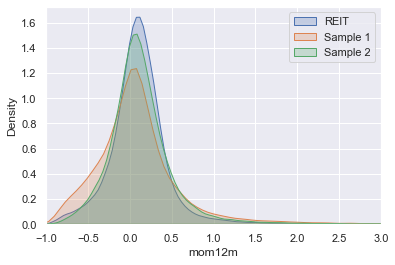

In [13]:
# mom12m
fig, ax = plt.subplots()
sns.set(style="darkgrid")

for i in data:
    sns.kdeplot(i['mom12m'], shade = True, ax = ax)

ax.set(xlim = (-1, 3))

ax.legend(labels = ['REIT', 'Sample 1', 'Sample 2']);

REITs have less volatility in returns momentum than non-REITs

## Drop unnecessary columns

In [14]:
# Drop unnecessary columns
to_drop = ['SHROUT', 'prc', 'mvel1', 'RF', 'permno', 'sic2']
# to_drop = ['SHROUT', 'prc', 'mvel1', 'RF', 'permno']
# to_drop = ['SHROUT', 'prc', 'mvel1', 'RF']

# Create REIT-only and full stock market dfs
df_reit = df_reit.drop(columns = to_drop)
# df_all = df_all.drop(columns = to_drop)
df_sample1 = df_sample1.drop(columns = to_drop)
df_sample2 = df_sample2.drop(columns = to_drop)



In [15]:
df_reit.columns

Index(['DATE', 'RET', 'absacc', 'acc', 'aeavol', 'age', 'agr', 'baspread',
       'beta', 'betasq', 'bm', 'bm_ia', 'cash', 'cashdebt', 'cashpr', 'cfp',
       'cfp_ia', 'chatoia', 'chcsho', 'chempia', 'chinv', 'chmom', 'chpmia',
       'chtx', 'cinvest', 'convind', 'currat', 'depr', 'divi', 'divo',
       'dolvol', 'dy', 'ear', 'egr', 'ep', 'gma', 'grcapx', 'grltnoa', 'herf',
       'hire', 'idiovol', 'ill', 'indmom', 'invest', 'lev', 'lgr', 'maxret',
       'mom12m', 'mom1m', 'mom36m', 'mom6m', 'ms', 'mve0', 'mve_ia', 'nincr',
       'operprof', 'orgcap', 'pchcapx_ia', 'pchcurrat', 'pchdepr',
       'pchgm_pchsale', 'pchquick', 'pchsale_pchinvt', 'pchsale_pchrect',
       'pchsale_pchxsga', 'pchsaleinv', 'pctacc', 'pricedelay', 'ps', 'quick',
       'rd', 'rd_mve', 'rd_sale', 'realestate', 'retvol', 'roaq', 'roavol',
       'roeq', 'roic', 'rsup', 'salecash', 'saleinv', 'salerec', 'secured',
       'securedind', 'sgr', 'sin', 'sp', 'std_dolvol', 'std_turn', 'stdacc',
       'stdcf', '

In [16]:
# To standard scale
cont_var = ['absacc', 'acc', 'aeavol', 'age', 'agr', 'baspread',
           'beta', 'betasq', 'bm', 'bm_ia', 'cash', 'cashdebt', 'cashpr', 'cfp',
           'cfp_ia', 'chatoia', 'chcsho', 'chempia', 'chinv', 'chmom', 'chpmia',
           'chtx', 'cinvest', 'currat', 'depr',
           'dolvol', 'dy', 'ear', 'egr', 'ep', 'gma', 'grcapx', 'grltnoa', 'herf',
           'hire', 'idiovol', 'ill', 'indmom', 'invest', 'lev', 'lgr', 'maxret',
           'mom12m', 'mom1m', 'mom36m', 'mom6m', 'ms', 'mve0', 'mve_ia',
           'nincr', 'operprof', 'orgcap', 'pchcapx_ia', 'pchcurrat', 'pchdepr',
           'pchgm_pchsale', 'pchquick', 'pchsale_pchinvt', 'pchsale_pchrect',
           'pchsale_pchxsga', 'pchsaleinv', 'pctacc', 'pricedelay',  'ps',
           'quick', 'rd_mve', 'rd_sale', 'realestate', 'retvol', 'roaq',
           'roavol', 'roeq', 'roic', 'rsup', 'salecash', 'saleinv', 'salerec',
           'secured', 'sgr', 'sp', 'std_dolvol',
           'std_turn', 'stdacc', 'stdcf', 'tang', 'tb', 'turn', 'zerotrade',
#            'RET_lag'   # Deactivate if not using lagged return
           ] 

nom_var = ['convind', 'divi', 'divo', 'rd', 'securedind', 'sin']

# To dummify
# to_dummify = ['DATE', 'permno', 'sic2']

# To leave untouched - Goyal's macro variables
# untouch_var = ['convind', 'divi', 'divo', 'rd', 'securedind', 'sin', ## binary
#              'D12', 'E12', 'b/m', 'ntis', 'tbl', 'tms', 'dfy', 'svar'] ## macro

In [17]:
len(cont_var) + len(nom_var)

94

In [18]:
# Confirm binary indicators
df_reit.loc[:,df_reit.max() == 1]

baspread  convind  divi  divo   rd  securedind  sin
0      0.109897      0.0   0.0   0.0  0.0         1.0  0.0
1      0.031457      0.0   0.0   0.0  0.0         0.0  0.0
2      0.032981      0.0   NaN   NaN  NaN         0.0  0.0
3      0.078568      0.0   0.0   0.0  0.0         0.0  0.0
4      0.014931      0.0   0.0   0.0  0.0         1.0  0.0
...         ...      ...   ...   ...  ...         ...  ...
64003  0.046948      1.0   0.0   0.0  0.0         1.0  0.0
64004  0.039148      1.0   0.0   0.0  0.0         1.0  0.0
64005  0.041868      0.0   0.0   0.0  0.0         1.0  0.0
64006  0.029610      0.0   0.0   0.0  0.0         1.0  0.0
64007  0.042325      0.0   0.0   0.0  0.0         1.0  0.0

[64008 rows x 7 columns]

## Data preprocessing

In [19]:
# Reset index, OTHERWISE groupby wouldn't work
df_reit.reset_index(drop = True, inplace = True)
# df_all.reset_index(drop = True, inplace = True)
df_sample1.reset_index(drop = True, inplace = True)
df_sample2.reset_index(drop = True, inplace = True)

### Fill NAs
For missing features, I replace with the cross-sectional median at each month for each stock, respectively. 


In [20]:
%%time
# Group by date first, then fill NaN values with median
for i in cont_var:
    df_reit[i] = df_reit.groupby(['DATE'])[i].transform(lambda x: x.fillna(x.median()))
#     df_all[i] = df_all.groupby(['DATE'])[i].transform(lambda x: x.fillna(x.median()))
    df_sample1[i] = df_sample1.groupby(['DATE'])[i].transform(lambda x: x.fillna(x.median()))
    df_sample2[i] = df_sample2.groupby(['DATE'])[i].transform(lambda x: x.fillna(x.median()))


CPU times: user 19.9 s, sys: 283 ms, total: 20.2 s
Wall time: 20.2 s


In [21]:
# Comparison of features missing values, non-REITs vs REITs
# in percentage, rounded to 2 decimal points
pd.DataFrame(
    zip(
        round(df_sample2.isnull().sum()/len(df_sample2)*100,2), 
        round(df_reit.isnull().sum()/len(df_reit)*100,2)
    ),
    columns = ['Sample 2', 'REITs-only'],
    index = df_sample2.columns
).sort_values('REITs-only', ascending = False)

Sample 2  REITs-only
divi                 8.43       14.60
divo                 8.43       14.60
rd                   8.43       14.60
sin                  8.03        7.90
securedind           8.03        7.90
convind              8.03        7.90
bm                   4.94        5.36
bm_ia                4.94        5.36
orgcap               3.57        5.36
pchcapx_ia           0.00        0.00
pchsaleinv           0.00        0.00
mve_ia               0.00        0.00
rd_mve               0.00        0.00
nincr                0.00        0.00
quick                0.00        0.00
ps                   0.00        0.00
pricedelay           0.00        0.00
pctacc               0.00        0.00
pchsale_pchrect      0.00        0.00
pchsale_pchxsga      0.00        0.00
pchcurrat            0.00        0.00
pchsale_pchinvt      0.00        0.00
operprof             0.00        0.00
rd_sale              0.00        0.00
pchgm_pchsale        0.00        0.00
pchdepr              0.00        0.00
pchquick             0.00        0.00
DATE                 0.00        0.00
realestate           0.00        0.00
ms                   0.00        0.00
turn                 0.00        0.00
tb                   0.00        0.00
tang                 0.00        0.00
stdcf                0.00        0.00
stdacc               0.00        0.00
std_turn             0.00        0.00
std_dolvol           0.00        0.00
sp                   0.00        0.00
sgr                  0.00        0.00
secured              0.00        0.00
salerec              0.00        0.00
saleinv              0.00        0.00
salecash             0.00        0.00
rsup                 0.00        0.00
roic                 0.00        0.00
roeq                 0.00        0.00
roavol               0.00        0.00
roaq                 0.00        0.00
retvol               0.00        0.00
mve0                 0.00        0.00
mom1m                0.00        0.00
mom6m                0.00        0.00
cinvest              0.00        0.00
chpmia               0.00        0.00
chmom                0.00        0.00
chinv                0.00        0.00
chempia              0.00        0.00
chcsho               0.00        0.00
chatoia              0.00        0.00
cfp_ia               0.00        0.00
cfp                  0.00        0.00
cashpr               0.00        0.00
cashdebt             0.00        0.00
cash                 0.00        0.00
betasq               0.00        0.00
beta                 0.00        0.00
baspread             0.00        0.00
agr                  0.00        0.00
age                  0.00        0.00
aeavol               0.00        0.00
acc                  0.00        0.00
absacc               0.00        0.00
chtx                 0.00        0.00
currat               0.00        0.00
mom36m               0.00        0.00
depr                 0.00        0.00
RET                  0.00        0.00
mom12m               0.00        0.00
maxret               0.00        0.00
lgr                  0.00        0.00
lev                  0.00        0.00
invest               0.00        0.00
indmom               0.00        0.00
ill                  0.00        0.00
idiovol              0.00        0.00
hire                 0.00        0.00
herf                 0.00        0.00
grltnoa              0.00        0.00
grcapx               0.00        0.00
gma                  0.00        0.00
ep                   0.00        0.00
egr                  0.00        0.00
ear                  0.00        0.00
dy                   0.00        0.00
dolvol               0.00        0.00
zerotrade            0.00        0.00

Most features are fixed for NaN values, with the exception of indicators such as _divi, divo, rd, secureind, sin, convind_.

In [22]:
# Fill the remaining NaN with zeros
df_reit.fillna(0, inplace = True)
# df_all.fillna(0, inplace = True)
df_sample1.fillna(0, inplace = True)
df_sample2.fillna(0, inplace = True)


### Groupby standard scale
Unlike the usual standard scaling across time, we need to standard scale continuous stock-level features period by period. Therefore, i need to create a wrapper and use groupby() to apply these functions.

In [23]:
# Create wrapper to apply StandardScaler() to multiple groups
#    Code is from https://stackoverflow.com/questions/55601928/apply-multiple-standardscalers-to-individual-groups

class SklearnWrapper:
    def __init__(self, transformation: typing.Callable):
        self.transformation = transformation
        self._group_transforms = []
        # Start with -1 and for each group up the pointer by one
        self._pointer = -1

    def _call_with_function(self, df: pd.DataFrame, function: str):
        # If pointer >= len we are making a new apply, reset _pointer
        if self._pointer >= len(self._group_transforms):
            self._pointer = -1
        self._pointer += 1
        return pd.DataFrame(
            getattr(self._group_transforms[self._pointer], function)(df.values),
            columns=df.columns,
            index=df.index,
        )

    def fit(self, df):
        self._group_transforms.append(self.transformation.fit(df.values))
        return self

    def transform(self, df):
        return self._call_with_function(df, "transform")

    def fit_transform(self, df):
        self.fit(df)
        return self.transform(df)

    def inverse_transform(self, df):
        return self._call_with_function(df, "inverse_transform")

In [24]:
display(df_reit.describe(), df_sample1.describe(), df_sample2.describe())

RET        absacc           acc        aeavol           age  \
count  64008.000000  64008.000000  64008.000000  64008.000000  64008.000000   
mean       0.793220      0.045103     -0.030764      0.344380     12.203889   
std       11.269058      0.054094      0.057221      1.318656     10.228756   
min     -100.240000      0.000005     -0.688700     -1.000000      1.000000   
25%       -3.493700      0.022619     -0.045292     -0.204604      4.000000   
50%        0.642700      0.034697     -0.032151      0.070599      9.000000   
75%        4.990075      0.048475     -0.016921      0.487352     18.000000   
max      290.267700      0.784498      0.481374     25.108885     57.000000   

                agr      baspread          beta        betasq            bm  \
count  64008.000000  64008.000000  64008.000000  6.400800e+04  64008.000000   
mean      -0.162814      0.029026      0.732901  7.994617e-01      0.833102   
std        0.414458      0.030558      0.511246  1.177517e+00      1.922926   
min       -5.798628      0.000000     -0.752928  5.824185e-10     -8.101332   
25%       -0.204490      0.015529      0.381281  1.470019e-01      0.396712   
50%       -0.052937      0.020705      0.627321  3.944162e-01      0.611264   
75%        0.019902      0.031399      0.965696  9.326325e-01      0.929304   
max        0.741537      1.000000      3.731348  1.392296e+01     67.718725   

              bm_ia          cash      cashdebt        cashpr           cfp  \
count  64008.000000  64008.000000  64008.000000  64008.000000  64008.000000   
mean      -1.218707      0.045778      0.112443      6.752307      0.099702   
std        9.522342      0.092273      1.247539    138.484956      0.227309   
min     -387.914746      0.000000    -27.977908  -3481.312227     -2.797329   
25%       -0.655545      0.008943      0.022389     -7.535264      0.057752   
50%       -0.202556      0.020454      0.036971      0.344101      0.084351   
75%        0.000000      0.042246      0.060884     11.734970      0.127959   
max       65.532378      0.976943     36.391304   2624.706571      2.711904   

             cfp_ia       chatoia        chcsho       chempia         chinv  \
count  64008.000000  64008.000000  64008.000000  64008.000000  64008.000000   
mean       0.028900     -0.010343      0.120249     -0.316609      0.000894   
std        0.311258      0.197271      0.340315      0.942078      0.017170   
min       -6.601293     -1.003966     -0.861255    -41.679126     -0.211381   
25%       -0.024995     -0.050090      0.000000     -0.488413      0.000000   
50%        0.020757     -0.006564      0.014759     -0.168487      0.000000   
75%        0.077590      0.028092      0.103526     -0.041576      0.000000   
max       16.565130      0.787923      4.171171     12.993296      0.229783   

              chmom        chpmia          chtx       cinvest       convind  \
count  64008.000000  64008.000000  64008.000000  64008.000000  64008.000000   
mean      -0.002738     -0.367539      0.000089      0.200436      0.107815   
std        0.350331      6.223984      0.004185     18.265258      0.310149   
min       -5.264719   -163.169022     -0.083959   -865.666667      0.000000   
25%       -0.162725     -1.107546      0.000000      0.000000      0.000000   
50%       -0.012197     -0.076243      0.000000      0.000000      0.000000   
75%        0.143701      0.468672      0.000000      0.000000      0.000000   
max        6.150533     77.954287      0.104068   1697.900000      1.000000   

             currat          depr          divi          divo        dolvol  \
count  64008.000000  64008.000000  64008.000000  64008.000000  64008.000000   
mean      15.181939      0.116441      0.018826      0.019966     12.613902   
std       48.106996      0.269545      0.135910      0.139885      2.881285   
min        0.038462      0.000000      0.000000      0.000000     -2.212973   
25%        1.571881      0.070882      0.000000      0.000000

RET        absacc           acc        aeavol           age  \
count  64197.000000  64197.000000  64197.000000  64197.000000  64197.000000   
mean       0.841475      0.080579     -0.055464      0.749107     13.686161   
std       18.122351      0.090817      0.100841      1.688971     11.285967   
min     -178.918000      0.000000     -1.228435     -1.000000      1.000000   
25%       -6.068000      0.037697     -0.073389     -0.013555      5.000000   
50%        0.173500      0.058483     -0.043746      0.362354     11.000000   
75%        6.230000      0.085382     -0.020876      0.863848     18.000000   
max      919.660000      1.228435      0.479819     22.473282     58.000000   

                agr      baspread          beta        betasq            bm  \
count  64197.000000  64197.000000  64197.000000  6.419700e+04  64197.000000   
mean      -0.126250      0.045253      1.026245  1.500175e+00      2.286015   
std        0.389841      0.047494      0.664078  1.846766e+00     23.734786   
min       -6.033304      0.000000     -1.933264  1.846387e-09     -5.422429   
25%       -0.133246      0.019487      0.575660  3.374468e-01      0.302179   
50%       -0.059265      0.033065      0.954763  9.149204e-01      0.544314   
75%        0.000245      0.055883      1.372057  1.887617e+00      0.827635   
max        0.826500      1.027273      3.986823  1.589475e+01   1776.577981   

              bm_ia          cash      cashdebt        cashpr           cfp  \
count  64197.000000  64197.000000  64197.000000  64197.000000  64197.000000   
mean      -0.650842      0.156242     -0.024491      1.345802      0.064105   
std       25.735209      0.200049      1.609661     60.708332      0.223031   
min     -858.037632     -0.082990   -153.851064  -3481.312227     -3.334579   
25%       -0.288785      0.039351      0.014088     -3.765679      0.028131   
50%       -0.094689      0.081054      0.095890      0.271274      0.065867   
75%        0.070111      0.167457      0.190690      3.759439      0.112237   
max     1268.243751      0.978683     38.113756   1896.333474      2.711904   

             cfp_ia       chatoia        chcsho       chempia         chinv  \
count  64197.000000  64197.000000  64197.000000  64197.000000  64197.000000   
mean      -0.005888      0.001662      0.075946     -0.133813      0.005394   
std        0.708639      0.168894      0.271487      1.362003      0.038171   
min      -10.399696     -1.244881     -0.888710    -57.421084     -0.253321   
25%       -0.040662     -0.020545      0.000406     -0.139041      0.000000   
50%        0.008075      0.001375      0.007713     -0.064199      0.000000   
75%        0.056105      0.030147      0.026497     -0.011156      0.004419   
max       32.042573      1.209927      3.288317      4.910457      0.328848   

              chmom        chpmia          chtx       cinvest       convind  \
count  64197.000000  64197.000000  64197.000000  64197.000000  64197.000000   
mean       0.005856      0.101033      0.000524      0.249577      0.086157   
std        0.525906      7.361060      0.009761     21.338045      0.280597   
min       -9.062534   -163.156915     -0.146914  -1121.100000      0.000000   
25%       -0.206921     -0.091758     -0.000198     -0.015109      0.000000   
50%       -0.008092     -0.010288      0.000009     -0.001169      0.000000   
75%        0.203830      0.038340      0.001000      0.008031      0.000000   
max        8.083012    157.613220      0.162096   3146.400000      1.000000   

             currat          depr          divi          divo        dolvol  \
count  64197.000000  64197.000000  64197.000000  64197.000000  64197.000000   
mean       3.538747      0.305137      0.026014      0.023054     11.995359   
std       11.061351      0.558912      0.159177      0.150076      2.870125   
min        0.018064     -0.083847      0.000000      0.000000     -1.386294   
25%        1.299341      0.128873      0.000000      0.000000

RET        absacc           acc        aeavol           age  \
count  72833.000000  72833.000000  72833.000000  72833.000000  72833.000000   
mean       1.116299      0.064519     -0.046567      0.718264     27.606023   
std       12.888184      0.070220      0.078857      1.531279     12.898353   
min      -83.844700      0.000000     -0.992512     -1.000000      1.000000   
25%       -4.426100      0.026264     -0.069012     -0.005970     18.000000   
50%        0.645000      0.049985     -0.041789      0.370194     28.000000   
75%        5.737200      0.076129     -0.014537      0.926794     37.000000   
max      640.300700      0.992512      0.411077     22.040841     58.000000   

                agr      baspread          beta        betasq            bm  \
count  72833.000000  72833.000000  72833.000000  72833.000000  72833.000000   
mean      -0.106336      0.033190      0.907080      1.133563      1.681293   
std        0.283727      0.031827      0.551758      1.350306     11.666172   
min       -6.033304      0.001482     -0.884482      0.000000     -2.191825   
25%       -0.135308      0.017270      0.522534      0.276018      0.302158   
50%       -0.062127      0.024963      0.854015      0.732070      0.539695   
75%       -0.001855      0.038595      1.223186      1.500439      0.812301   
max        0.673474      0.827068      3.724570     13.872425    384.070813   

              bm_ia          cash      cashdebt        cashpr           cfp  \
count  72833.000000  72833.000000  72833.000000  72833.000000  72833.000000   
mean      -0.853392      0.111329      0.257130      1.933563      0.105100   
std       21.446256      0.161140      1.322114     57.372331      0.143292   
min     -858.037632     -0.010057    -22.360000   -520.622685     -1.621497   
25%       -0.319348      0.022802      0.070084     -6.847945      0.057780   
50%       -0.115702      0.050373      0.155178      0.185294      0.092401   
75%        0.076725      0.122606      0.270411      7.329875      0.138441   
max      335.602460      0.975055     36.391304    600.277374      2.629016   

             cfp_ia       chatoia        chcsho       chempia         chinv  \
count  72833.000000  72833.000000  72833.000000  72833.000000  72833.000000   
mean       0.066889     -0.002899      0.076266     -0.162570      0.006694   
std        1.106640      0.163967      0.268686      1.168269      0.034973   
min      -10.330739     -1.244881     -0.888710    -41.508672     -0.216111   
25%       -0.021731     -0.045715     -0.003793     -0.149748     -0.000701   
50%        0.026510      0.000641      0.003317     -0.064360      0.000408   
75%        0.080649      0.042831      0.020041     -0.004647      0.010695   
max       32.052127      1.027440      4.020224      3.301737      0.341886   

              chmom        chpmia          chtx       cinvest       convind  \
count  72833.000000  72833.000000  72833.000000  72833.000000  72833.000000   
mean      -0.000341      0.096189      0.000712      0.235412      0.096138   
std        0.433165      7.155097      0.008655     22.822629      0.294782   
min       -8.201777   -163.156915     -0.121147  -1426.700000      0.000000   
25%       -0.192559     -0.101482     -0.000760     -0.013455      0.000000   
50%       -0.007706     -0.005221      0.000307     -0.000517      0.000000   
75%        0.181120      0.047792      0.002008      0.009857      0.000000   
max        7.644699    157.446730      0.137610   1697.900000      1.000000   

             currat          depr          divi          divo        dolvol  \
count  72833.000000  72833.000000  72833.000000  72833.000000  72833.000000   
mean       3.636031      0.229951      0.016696      0.012824     13.069391   
std       12.226963      0.339899      0.128130      0.112515      2.965987   
min        0.146818      0.000000      0.000000      0.000000      1.524697   
25%        1.255608      0.114932      0.000000      0.000000

In [25]:
%%time
# Create custom fuction scaler 
scaler = SklearnWrapper(StandardScaler())

# Fit and transform data (holding state)
df_reit[cont_var] = df_reit.groupby("DATE")[cont_var].apply(scaler.fit_transform)
# df_all[cont_var] = df_all.groupby("DATE")[cont_var].apply(scaler.fit_transform)
df_sample1[cont_var] = df_sample1.groupby("DATE")[cont_var].apply(scaler.fit_transform)
df_sample2[cont_var] = df_sample2.groupby("DATE")[cont_var].apply(scaler.fit_transform)


CPU times: user 1.18 s, sys: 127 ms, total: 1.31 s
Wall time: 1.31 s


In [26]:
display(df_reit.describe(), df_sample1.describe(), df_sample2.describe())

RET        absacc           acc        aeavol           age  \
count  64008.000000  6.400800e+04  6.400800e+04  6.400800e+04  6.400800e+04   
mean       0.793220 -2.854781e-18 -8.431437e-18 -1.578401e-19  1.848984e-18   
std       11.269058  1.000008e+00  1.000008e+00  1.000008e+00  1.000008e+00   
min     -100.240000 -1.555314e+00 -8.173804e+00 -2.225341e+00 -1.496425e+00   
25%       -3.493700 -4.410828e-01 -2.897349e-01 -4.540949e-01 -7.216912e-01   
50%        0.642700 -1.988945e-01 -1.702721e-02 -2.134248e-01 -2.927765e-01   
75%        4.990075  9.259588e-02  2.601527e-01  1.254338e-01  4.642834e-01   
max      290.267700  1.106666e+01  9.378481e+00  1.209200e+01  3.821433e+00   

                agr      baspread          beta        betasq            bm  \
count  6.400800e+04  6.400800e+04  6.400800e+04  6.400800e+04  6.400800e+04   
mean  -7.787935e-18  7.609064e-18  2.955599e-18 -8.542445e-18  7.878997e-18   
std    1.000008e+00  1.000008e+00  1.000008e+00  1.000008e+00  9.728131e-01   
min   -9.640886e+00 -2.504688e+00 -3.354949e+00 -1.390720e+00 -5.412573e+00   
25%   -1.064746e-01 -5.155647e-01 -5.601766e-01 -4.649194e-01 -3.569770e-01   
50%    2.377025e-01 -2.740452e-01 -1.748152e-01 -2.731423e-01 -1.203118e-01   
75%    4.336604e-01  1.579534e-01  3.562628e-01  7.090229e-02  1.496557e-01   
max    3.282527e+00  1.049453e+01  6.608251e+00  9.753254e+00  1.302153e+01   

              bm_ia          cash      cashdebt        cashpr           cfp  \
count  6.400800e+04  6.400800e+04  6.400800e+04  6.400800e+04  6.400800e+04   
mean   2.005090e-18 -4.073489e-18  4.371824e-18  2.396871e-18  2.050512e-18   
std    9.728131e-01  1.000008e+00  1.000008e+00  1.000008e+00  1.000008e+00   
min   -1.388187e+01 -9.904486e-01 -1.423494e+01 -1.023618e+01 -8.764525e+00   
25%   -1.023332e-02 -3.917574e-01 -1.330739e-01 -2.308568e-01 -1.847474e-01   
50%    7.984833e-02 -2.715554e-01 -9.741147e-02 -9.041847e-02 -2.547568e-02   
75%    1.720647e-01 -4.895440e-02 -2.382892e-02  1.381825e-01  1.556311e-01   
max    1.119707e+01  1.267286e+01  1.405253e+01  1.211607e+01  9.313789e+00   

             cfp_ia       chatoia        chcsho       chempia         chinv  \
count  6.400800e+04  6.400800e+04  6.400800e+04  6.400800e+04  6.400800e+04   
mean  -3.763825e-18 -2.270556e-17 -7.066380e-18  5.433342e-18 -1.392809e-18   
std    1.000008e+00  1.000008e+00  1.000008e+00  1.000008e+00  1.000008e+00   
min   -1.304790e+01 -1.111132e+01 -6.387745e+00 -9.669100e+00 -1.379665e+01   
25%   -1.781501e-01 -1.914367e-01 -3.770902e-01 -3.005217e-01 -1.096278e-01   
50%   -1.950317e-02  8.982824e-03 -2.861335e-01 -1.510779e-01 -6.935313e-02   
75%    1.560921e-01  2.121976e-01 -1.513095e-02  7.545424e-02  4.571932e-02   
max    1.394914e+01  1.074731e+01  9.356739e+00  8.698196e+00  1.331772e+01   

              chmom        chpmia          chtx       cinvest       convind  \
count  6.400800e+04  6.400800e+04  6.400800e+04  6.400800e+04  64008.000000   
mean  -4.964158e-18 -1.688759e-18 -3.547933e-18  6.417675e-19      0.107815   
std    1.000008e+00  1.000008e+00  1.000008e+00  1.000008e+00      0.310149   
min   -9.129525e+00 -1.331155e+01 -1.276300e+01 -1.429695e+01      0.000000   
25%   -4.646793e-01 -1.353735e-01 -9.593492e-02 -7.596140e-02      0.000000   
50%   -4.007928e-03 -2.898398e-02 -2.092088e-02 -2.245524e-02      0.000000   
75%    4.528464e-01  1.070824e-01  4.839217e-02  6.806787e-02      0.000000   
max    9.444180e+00  1.357043e+01  1.380858e+01  1.382416e+01      1.000000   

             currat          depr          divi          divo        dolvol  \
count  6.400800e+04  6.400800e+04  64008.000000  64008.000000  6.400800e+04   
mean  -1.084587e-17  5.797589e-19      0.018826      0.019966 -2.816492e-17   
std    1.000008e+00  1.000008e+00      0.135910      0.139885  1.000008e+00   
min   -4.682544e-01 -3.431983e+00      0.000000      0.000000 -5.019639e+00   
25%   -3.381427e-01 -1.401597e-01      0.000000      0.000000

RET        absacc           acc        aeavol           age  \
count  64197.000000  6.419700e+04  6.419700e+04  6.419700e+04  6.419700e+04   
mean       0.841475 -1.259003e-18  4.376247e-18  4.484010e-18 -1.203663e-18   
std       18.122351  1.000008e+00  1.000008e+00  1.000008e+00  1.000008e+00   
min     -178.918000 -1.503412e+00 -8.775668e+00 -1.833446e+00 -1.599434e+00   
25%       -6.068000 -4.791347e-01 -1.715828e-01 -4.547041e-01 -6.789637e-01   
50%        0.173500 -2.476166e-01  1.003568e-01 -2.358187e-01 -2.460135e-01   
75%        6.230000  5.607013e-02  3.551757e-01  5.673579e-02  3.094039e-01   
max      919.660000  9.243125e+00  6.387626e+00  1.022859e+01  4.601202e+00   

                agr      baspread          beta        betasq            bm  \
count  6.419700e+04  6.419700e+04  6.419700e+04  6.419700e+04  6.419700e+04   
mean   3.574670e-18 -1.491089e-17 -2.141430e-18 -3.044609e-18  2.105977e-18   
std    1.000008e+00  1.000008e+00  1.000008e+00  1.000008e+00  9.713800e-01   
min   -1.032694e+01 -2.073293e+00 -4.903837e+00 -1.333187e+00 -4.226859e+00   
25%   -4.045897e-02 -6.751942e-01 -6.815082e-01 -6.231916e-01 -1.604725e-01   
50%    1.767019e-01 -2.683275e-01 -1.157376e-01 -3.260505e-01 -1.207703e-01   
75%    3.397569e-01  3.993219e-01  5.346313e-01  2.428739e-01 -7.732207e-02   
max    3.992235e+00  7.372795e+00  4.100075e+00  6.769477e+00  1.412050e+01   

              bm_ia          cash      cashdebt        cashpr           cfp  \
count  6.419700e+04  6.419700e+04  6.419700e+04  6.419700e+04  6.419700e+04   
mean   8.655107e-20  2.337500e-18  6.744661e-19 -4.045067e-18  3.256352e-18   
std    9.713800e-01  1.000008e+00  1.000008e+00  1.000008e+00  1.000008e+00   
min   -1.419346e+01 -1.244217e+00 -1.385639e+01 -1.307540e+01 -8.221013e+00   
25%   -3.452558e-02 -5.748025e-01 -1.595514e-02 -1.404125e-01 -1.958853e-01   
50%    2.907498e-02 -3.599425e-01  1.019968e-01 -2.584190e-02  2.993041e-02   
75%    1.093707e-01  5.649259e-02  2.076920e-01  1.093824e-01  2.494702e-01   
max    1.355343e+01  6.301444e+00  1.263968e+01  1.288269e+01  7.745227e+00   

             cfp_ia       chatoia        chcsho       chempia         chinv  \
count  6.419700e+04  6.419700e+04  6.419700e+04  6.419700e+04  6.419700e+04   
mean   1.439726e-18  2.019372e-18 -2.936954e-18  1.589319e-18  3.026450e-18   
std    1.000008e+00  1.000008e+00  1.000008e+00  1.000008e+00  1.000008e+00   
min   -1.131115e+01 -7.017989e+00 -7.254123e+00 -1.383648e+01 -7.207670e+00   
25%   -1.500646e-01 -1.582158e-01 -3.216624e-01 -1.400607e-01 -2.423671e-01   
50%    3.690606e-02  1.429550e-03 -2.397276e-01  4.405795e-02 -1.303379e-01   
75%    2.378972e-01  1.794231e-01 -1.096390e-01  1.793058e-01  7.297524e-02   
max    1.623357e+01  6.718202e+00  9.973887e+00  8.736846e+00  7.239812e+00   

              chmom        chpmia          chtx       cinvest       convind  \
count  6.419700e+04  6.419700e+04  6.419700e+04  6.419700e+04  64197.000000   
mean   1.249492e-19 -3.566023e-18  5.905902e-19  3.271809e-19      0.086157   
std    1.000008e+00  1.000008e+00  1.000008e+00  1.000008e+00      0.280597   
min   -6.465581e+00 -9.874000e+00 -8.425386e+00 -1.428857e+01      0.000000   
25%   -4.564598e-01 -2.121071e-01 -1.624448e-01 -7.955047e-02      0.000000   
50%   -5.561819e-03 -5.093257e-02 -3.992776e-02  8.297028e-03      0.000000   
75%    4.397847e-01  1.716855e-01  1.174722e-01  8.743043e-02      0.000000   
max    6.555301e+00  1.230469e+01  9.262586e+00  1.581389e+01      1.000000   

             currat          depr          divi          divo        dolvol  \
count  6.419700e+04  6.419700e+04  64197.000000  64197.000000  6.419700e+04   
mean  -1.610936e-18  2.433266e-18      0.026014      0.023054 -1.968057e-18   
std    1.000008e+00  1.000008e+00      0.159177      0.150076  1.000008e+00   
min   -1.311212e+00 -1.364354e+00      0.000000      0.000000 -4.826885e+00   
25%   -3.299690e-01 -3.961696e-01      0.000000      0.000000

RET        absacc           acc        aeavol           age  \
count  72833.000000  7.283300e+04  7.283300e+04  7.283300e+04  7.283300e+04   
mean       1.116299  2.173710e-18  5.934258e-18 -1.981643e-19  5.377874e-18   
std       12.888184  1.000007e+00  1.000007e+00  1.000007e+00  1.000007e+00   
min      -83.844700 -1.466094e+00 -9.087797e+00 -2.274892e+00 -3.311002e+00   
25%       -4.426100 -5.487931e-01 -2.998437e-01 -4.875532e-01 -8.754085e-01   
50%        0.645000 -2.184273e-01  5.797616e-02 -2.295404e-01 -9.150991e-02   
75%        5.737200  1.717302e-01  4.023443e-01  1.439687e-01  7.432150e-01   
max      640.300700  9.659616e+00  6.513888e+00  9.847719e+00  1.721663e+00   

                agr      baspread          beta        betasq            bm  \
count  7.283300e+04  7.283300e+04  7.283300e+04  7.283300e+04  7.283300e+04   
mean  -9.511886e-19  5.293273e-18  3.363077e-18  6.467015e-19  7.926667e-18   
std    1.000007e+00  1.000007e+00  1.000007e+00  1.000007e+00  9.749935e-01   
min   -1.152135e+01 -1.930359e+00 -3.067410e+00 -1.311451e+00 -1.579780e+00   
25%   -1.260220e-01 -5.733941e-01 -6.727469e-01 -5.912607e-01 -1.784765e-01   
50%    1.626814e-01 -2.821539e-01 -1.096133e-01 -2.973575e-01 -1.330493e-01   
75%    3.857062e-01  2.564660e-01  5.416744e-01  2.516543e-01 -8.401991e-02   
max    3.686874e+00  1.078747e+01  5.248823e+00  8.306710e+00  1.374203e+01   

              bm_ia          cash      cashdebt        cashpr           cfp  \
count  7.283300e+04  7.283300e+04  7.283300e+04  7.283300e+04  7.283300e+04   
mean  -3.538566e-18 -4.251386e-18 -3.095936e-18 -9.961566e-19 -2.089901e-18   
std    9.749935e-01  1.000007e+00  1.000007e+00  1.000007e+00  1.000007e+00   
min   -1.396092e+01 -8.645110e-01 -1.191353e+01 -7.059081e+00 -9.201159e+00   
25%   -3.015863e-02 -5.347836e-01 -1.661135e-01 -1.972576e-01 -3.338931e-01   
50%    4.481980e-02 -3.611266e-01 -8.766425e-02 -1.463894e-02 -7.168738e-02   
75%    1.072500e-01  5.486882e-02  1.557056e-02  1.389079e-01  2.751975e-01   
max    1.373223e+01  6.021948e+00  1.350971e+01  1.006545e+01  1.036362e+01   

             cfp_ia       chatoia        chcsho       chempia         chinv  \
count  7.283300e+04  7.283300e+04  7.283300e+04  7.283300e+04  7.283300e+04   
mean  -8.197142e-19  1.543776e-18  2.341387e-18 -2.022800e-18  7.575973e-19   
std    1.000007e+00  1.000007e+00  1.000007e+00  1.000007e+00  1.000007e+00   
min   -1.239494e+01 -7.086962e+00 -8.554076e+00 -1.285920e+01 -5.824225e+00   
25%   -2.436875e-01 -2.723550e-01 -3.583143e-01 -1.338164e-01 -2.881439e-01   
50%   -3.930745e-02  1.890325e-02 -2.512209e-01  1.122842e-01 -1.562539e-01   
75%    2.482738e-01  2.940034e-01 -1.110667e-01  2.597927e-01  1.627320e-01   
max    9.596064e+00  6.604546e+00  1.031744e+01  1.027800e+01  8.501190e+00   

              chmom        chpmia          chtx       cinvest       convind  \
count  7.283300e+04  7.283300e+04  7.283300e+04  7.283300e+04  72833.000000   
mean   2.309757e-18 -3.658418e-18 -2.126455e-18  1.273587e-18      0.096138   
std    1.000007e+00  1.000007e+00  1.000007e+00  1.000007e+00      0.294782   
min   -7.723665e+00 -9.486164e+00 -1.019799e+01 -1.409661e+01      0.000000   
25%   -4.895759e-01 -1.987258e-01 -2.211566e-01 -7.884023e-02      0.000000   
50%    2.048749e-03 -1.550188e-02 -4.568214e-02 -1.749899e-02      0.000000   
75%    4.841503e-01  1.341552e-01  1.757800e-01  7.216331e-02      0.000000   
max    8.443076e+00  1.316395e+01  8.980554e+00  1.410397e+01      1.000000   

             currat          depr          divi          divo        dolvol  \
count  7.283300e+04  7.283300e+04  72833.000000  72833.000000  7.283300e+04   
mean   1.539584e-19  7.933431e-18      0.016696      0.012824 -1.173809e-17   
std    1.000007e+00  1.000007e+00      0.128130      0.112515  1.000007e+00   
min   -6.718212e-01 -1.239808e+00      0.000000      0.000000 -3.608689e+00   
25%   -2.405714e-01 -3.842540e-01      0.000000      0.000000

### ~Fixed effects for Panel data~

In addition, we need to create SIC2 dummies, gvkey dummies and date time dummies. This is effectively panel regression, to account for industry fixed effects, firm fixed effects and time fixed effects.

Macroeconomic variables will also be standard-scaled over time.

**Can't work. Dummyfying SIC make the simple regressions worse off, but NN a bit better**

**Dummifying GVKEY causes overfitting**

In [27]:
# To dummify
# to_dummify = ['DATE', 'permno', 'sic2']
# to_dummify = ['sic2']

In [28]:
# Set DATE as index
df_reit.set_index('DATE', inplace = True)
df_reit.sort_index(inplace = True)

# df_all.set_index('DATE', inplace = True)
# df_all.sort_index(inplace = True)

df_sample1.set_index('DATE', inplace = True)
df_sample1.sort_index(inplace = True)

df_sample2.set_index('DATE', inplace = True)
df_sample2.sort_index(inplace = True)

# Check
display(df_reit, df_sample1, df_sample2)

RET    absacc       acc    aeavol       age       agr  \
DATE                                                                   
1990-01-31  3.9755 -0.301557  0.031368 -0.335058 -0.671830  0.507010   
1990-01-31 -1.0623 -0.287684  0.016430  0.144402 -0.830479 -2.960917   
1990-01-31 -6.6924 -0.204958  0.019443 -0.449575 -0.989128  0.180809   
1990-01-31  5.6800 -0.492511  0.236992 -0.543881 -0.671830 -0.323205   
1990-01-31 -3.4271 -0.310211  0.040688 -0.254982 -0.671830 -0.018281   
...            ...       ...       ...       ...       ...       ...   
2020-12-31  6.8546 -0.903576  0.442848 -0.961814 -0.687765 -1.053798   
2020-12-31  4.7977 -0.420561  0.044319 -0.663871 -0.606523 -0.326020   
2020-12-31  3.8288 -0.947944  0.790788 -0.391432 -0.606523  0.645847   
2020-12-31  1.4743 -0.489036  0.100817 -0.607055 -0.687765 -0.241798   
2020-12-31 -6.6638 -0.053180 -0.258802 -0.726587 -0.687765  0.294711   

            baspread      beta    betasq        bm     bm_ia      cash  \
DATE                                                                     
1990-01-31  1.007749 -1.320972 -0.942515  0.061454  0.102232 -0.089156   
1990-01-31 -0.127500 -0.339187 -0.491444 -0.158987  0.091290  0.358478   
1990-01-31 -0.105442  1.241601  1.173683 -0.777008  0.060614 -0.582760   
1990-01-31  0.554322 -0.464834 -0.574102 -0.624901 -9.836660  1.254404   
1990-01-31 -0.366680 -0.893566 -0.801063  0.253611  0.111770 -0.349203   
...              ...       ...       ...       ...       ...       ...   
2020-12-31  0.155191  1.308177  1.292680  0.000000  0.000000  0.111518   
2020-12-31 -0.249835  1.218215  1.173300  0.000000  0.000000  0.210056   
2020-12-31 -0.108598 -0.362060 -0.473107  0.000000  0.000000 -0.626156   
2020-12-31 -0.745118 -1.121403 -0.960907  0.000000  0.000000 -0.334589   
2020-12-31 -0.084876 -0.096022 -0.255631  0.000000  0.000000 -0.166301   

            cashdebt    cashpr       cfp    cfp_ia   chatoia    chcsho  \
DATE                                                                     
1990-01-31  0.035383 -0.254751 -0.174164 -0.297058 -0.061984 -0.250966   
1990-01-31 -0.206377  0.156295 -0.382437 -0.493337 -0.060734  5.330539   
1990-01-31 -0.295234  0.397110  0.186015  0.042378 -0.060734 -0.250966   
1990-01-31 -0.288977  0.131057  0.007921  0.902629 -0.053769 -0.250966   
1990-01-31 -0.331970  0.086585 -0.352836 -0.465441 -0.036797 -0.252827   
...              ...       ...       ...       ...       ...       ...   
2020-12-31  0.011960 -0.419708  0.190505  0.195979  0.166330  0.317734   
2020-12-31 -0.080344 -0.619939  1.071430  0.978395  0.488776  0.102353   
2020-12-31 -0.080344  0.228408  0.070316  0.089230  0.467855 -0.373700   
2020-12-31 -0.080344 -0.178545 -0.184981 -0.137518  0.229357  0.111947   
2020-12-31 -0.080344 -0.087968 -0.061620 -0.027953  0.385299 -0.348337   

             chempia     chinv     chmom    chpmia      chtx   cinvest  \
DATE                                                                     
1990-01-31  0.088537 -0.087407  0.143006 -0.202614  0.061778 -0.027393   
1990-01-31  0.088537 -0.087407 -0.552160 -0.034121  0.061778 -0.027393   
1990-01-31  0.088537 -0.087407  1.686838  0.085294  0.321828 -0.027393   
1990-01-31  0.050963 -0.087407  1.143863  1.470326  0.061778 -0.029000   
1990-01-31  0.088537 -0.087407  0.179291 -0.002295  0.061778 -0.027393   
...              ...       ...       ...       ...       ...       ...   
2020-12-31 -0.190088 -0.114069  0.664526  0.094190  0.125073  0.069989   
2020-12-31 -0.190088 -0.114069  1.077165  0.276809  0.064994  0.069989   
2020-12-31 -0.254620 -0.114069 -0.755058  0.217589  0.125073  0.069989   
2020-12-31 -0.041989 -0.114069 -0.646464  0.085737  0.125073  0.069989   
2020-12-31  0.311484 -0.114069 -0.326237  0.089304  0.125073  0.069989   

            convind    currat      depr  divi  divo    dolvol        dy  \
DATE                                                                      
1990-01-31      0.0 -0.176686 -0.117039

RET    absacc       acc    aeavol       age       agr  \
DATE                                                                    
1990-01-31  16.4513 -0.635425 -0.041986 -0.637867  0.683825 -0.175493   
1990-01-31  -1.2644 -0.290781  0.028378 -0.213150 -1.079724 -0.039486   
1990-01-31 -13.2973  1.147089 -1.605006 -0.896662  1.061728  1.683640   
1990-01-31   2.6558 -0.290781  0.028378 -0.213150 -0.323917 -0.039486   
1990-01-31 -14.8557 -0.391285  0.516963 -0.709237  1.691567 -0.556886   
...             ...       ...       ...       ...       ...       ...   
2020-12-31 -17.0832  3.732943 -3.536895 -0.982305 -0.617995 -3.429068   
2020-12-31  32.0458  0.584915 -0.718605  0.859767 -0.070917  0.682060   
2020-12-31  -6.7897  1.425805 -1.471417  0.618531 -1.165072 -3.917246   
2020-12-31  38.1007 -0.232490  0.157118 -0.232412 -0.070917  0.146835   
2020-12-31   0.5820 -0.610568  0.351658 -0.051627  2.820776 -0.554810   

            baspread      beta    betasq        bm     bm_ia      cash  \
DATE                                                                     
1990-01-31  0.178446 -0.143252 -0.340391 -0.327983  0.108561  1.214030   
1990-01-31 -0.503710 -1.543573 -0.959306  0.028642  0.164478 -0.315166   
1990-01-31 -0.352336  0.527428  0.269696 -0.030579  0.167392 -0.627338   
1990-01-31  1.636203 -1.385357 -0.933755 -0.105624  0.143665 -0.315166   
1990-01-31 -0.319710  0.528878  0.271236 -0.162029 -0.198534 -0.315166   
...              ...       ...       ...       ...       ...       ...   
2020-12-31  0.795936  0.015004 -0.191567  0.000000  0.000000  2.600576   
2020-12-31  0.480908  0.776388  0.563691  0.000000  0.000000  2.523754   
2020-12-31  1.015526  1.412660  1.369562  0.000000  0.000000 -0.208117   
2020-12-31  2.355211 -0.112637 -0.295816  0.000000  0.000000 -0.305886   
2020-12-31 -1.515100 -0.247362 -0.399051  0.000000  0.000000 -0.076389   

            cashdebt    cashpr       cfp    cfp_ia   chatoia    chcsho  \
DATE                                                                     
1990-01-31  0.178482 -0.025973  0.331299  0.357401  3.804563  0.018940   
1990-01-31 -0.022321 -0.180487  0.119128  0.058687 -0.124652 -0.233180   
1990-01-31 -0.145032 -0.111783  0.649460  0.554247 -0.466521  0.002899   
1990-01-31 -0.022321 -0.086091  0.119128  0.058687 -0.124652 -0.233180   
1990-01-31  0.098805 -0.091138  0.320068  0.244541 -0.173217 -0.228150   
...              ...       ...       ...       ...       ...       ...   
2020-12-31 -1.326932 -0.122193 -5.670807 -2.155059  0.114036  5.945525   
2020-12-31 -0.883267 -0.079654 -1.130934 -0.440819 -0.667006 -5.162685   
2020-12-31  0.031847 -0.145785  0.548185  0.044364 -4.774088 -0.171014   
2020-12-31  0.145855 -0.077128  0.074542 -0.026196 -0.018823 -0.033484   
2020-12-31  0.281129  0.264364 -0.050946  0.464540 -0.015269 -0.074866   

             chempia     chinv     chmom    chpmia      chtx   cinvest  \
DATE                                                                     
1990-01-31  0.274215  0.538396  1.627311 -0.063638  1.915197  0.221442   
1990-01-31  0.025504 -0.098167 -0.275635 -0.062140 -0.080714  0.186181   
1990-01-31 -0.419014 -2.490237 -0.498260 -0.181447  0.811710  0.185978   
1990-01-31  0.025504 -0.098167  0.918247 -0.062140 -0.080714  0.186181   
1990-01-31 -6.946464 -0.034974 -0.804352 -0.380153 -0.080714  0.186181   
...              ...       ...       ...       ...       ...       ...   
2020-12-31  0.136181 -0.018759 -0.677017  3.477875  0.305453  0.117720   
2020-12-31  0.121936 -0.710516 -1.728901 -0.327050  1.357519  0.001776   
2020-12-31 -0.006286 -0.020304  2.014031 -0.208159 -6.113008  0.015715   
2020-12-31  0.116613 -0.018759 -0.108213 -0.205803  0.205295  0.018490   
2020-12-31  0.374574  1.268065  0.133015 -0.515413 -0.384130  0.017223   

            convind    currat      depr  divi  divo    dolvol        dy  \
DATE                                                                      
1990-01-31      0.0 -0.1247

RET    absacc       acc    aeavol       age       agr  \
DATE                                                                    
1990-01-31 -15.7215 -0.273466 -0.036668 -0.496868 -1.292281 -0.083022   
1990-01-31 -15.3848 -0.742661  0.458089 -0.172032 -1.292281 -0.244154   
1990-01-31   5.7518  0.193967 -0.503429  1.055344 -1.173395 -1.066045   
1990-01-31 -12.5358  0.029089 -0.338789 -0.366929 -1.292281 -0.662684   
1990-01-31   4.8845  0.587576 -0.896473 -0.251524 -1.292281 -0.480183   
...             ...       ...       ...       ...       ...       ...   
2020-12-31   8.9505  2.858235 -2.609127  0.715323 -0.652261 -0.923096   
2020-12-31   9.0723 -1.054741  0.738772 -0.727692 -1.204634 -0.162315   
2020-12-31   0.8429 -0.026400 -0.141066 -0.392533 -0.836385 -0.403657   
2020-12-31   7.5449 -0.279436  0.132832 -0.191533 -0.007825  0.173805   
2020-12-31  11.5797 -1.049987  0.734704 -1.221260 -1.388759 -0.825943   

            baspread      beta    betasq        bm     bm_ia      cash  \
DATE                                                                     
1990-01-31  0.040356  1.139226  1.146976 -0.160503 -0.092095  0.325282   
1990-01-31  0.437874  0.880287  0.777643 -0.148288 -0.077638 -0.556561   
1990-01-31 -0.166648  1.241420  1.301510 -0.168343 -0.094864  2.515004   
1990-01-31 -0.407386  1.426369  1.593804 -0.161020 -0.108639  1.894054   
1990-01-31  0.453629 -0.797795 -0.843360 -0.172678 -0.100733 -0.338688   
...              ...       ...       ...       ...       ...       ...   
2020-12-31 -0.126559 -0.295314 -0.426527  0.000000  0.000000  0.912652   
2020-12-31 -0.668057 -0.419117 -0.509655  0.000000  0.000000  0.440286   
2020-12-31 -0.881199 -1.118078 -0.862471  0.000000  0.000000 -0.540994   
2020-12-31 -0.203031  0.527894  0.284152  0.000000  0.000000 -0.292789   
2020-12-31  0.257093  0.039597 -0.170527  0.000000  0.000000 -0.259021   

            cashdebt    cashpr       cfp    cfp_ia   chatoia    chcsho  \
DATE                                                                     
1990-01-31 -0.057273  0.126475 -0.124546 -0.123574  0.054284 -0.015707   
1990-01-31 -0.174325 -0.168980 -0.633431 -0.100183  4.530375 -0.069925   
1990-01-31  1.201199  0.155158 -0.252379 -0.051347 -1.529099 -0.224478   
1990-01-31  1.177170  0.132309  0.116846  0.888400 -1.107148 -0.293096   
1990-01-31  0.136178  0.262147 -0.241867  0.265287 -1.381030 -0.327664   
...              ...       ...       ...       ...       ...       ...   
2020-12-31 -0.194849  0.459032 -0.291828 -0.256666  0.466235 -0.072216   
2020-12-31  1.405187  0.471925 -0.292414  0.206199  0.728506 -0.193870   
2020-12-31 -0.182828  0.565311  0.058833 -0.219635  0.183091 -0.257619   
2020-12-31 -0.142430 -0.003226 -0.055366 -0.123715 -0.052245 -0.060817   
2020-12-31 -0.254053 -0.389817 -0.001883 -0.097338 -0.132607  2.112023   

             chempia     chinv     chmom    chpmia      chtx   cinvest  \
DATE                                                                     
1990-01-31  0.816905  0.562898 -1.193681  0.175124  0.449736 -0.557029   
1990-01-31 -0.123711  4.055375 -3.214951  0.583830  2.755323 -0.001723   
1990-01-31  0.934561 -0.811204  2.251249 -2.452399  2.581523  0.023762   
1990-01-31  0.287771 -0.276144  0.073250  0.169774  1.086581 -0.008924   
1990-01-31  0.106307 -0.467282  0.425930  0.068398 -0.088219  0.022947   
...              ...       ...       ...       ...       ...       ...   
2020-12-31 -0.094249 -0.068082 -0.492585 -0.301565  0.034309 -0.045742   
2020-12-31  0.224460  0.714092 -0.868223 -0.244780  1.339245 -0.023206   
2020-12-31  0.129884 -0.068082 -0.452778 -0.266214  0.293929 -0.744957   
2020-12-31  0.161376 -0.068082  0.147136 -0.248093  0.243434 -0.030539   
2020-12-31  0.294981  0.615392  0.132024 -0.251090  0.367065 -0.143524   

            convind    currat      depr  divi  divo    dolvol        dy  \
DATE                                                                      
1990-01-31      1.0 -0.1272

In [29]:
%%time
# Start with REITs first
# df_reit = pd.get_dummies(df_reit, columns = to_dummify)
df_reit

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.01 µs


RET    absacc       acc    aeavol       age       agr  \
DATE                                                                   
1990-01-31  3.9755 -0.301557  0.031368 -0.335058 -0.671830  0.507010   
1990-01-31 -1.0623 -0.287684  0.016430  0.144402 -0.830479 -2.960917   
1990-01-31 -6.6924 -0.204958  0.019443 -0.449575 -0.989128  0.180809   
1990-01-31  5.6800 -0.492511  0.236992 -0.543881 -0.671830 -0.323205   
1990-01-31 -3.4271 -0.310211  0.040688 -0.254982 -0.671830 -0.018281   
...            ...       ...       ...       ...       ...       ...   
2020-12-31  6.8546 -0.903576  0.442848 -0.961814 -0.687765 -1.053798   
2020-12-31  4.7977 -0.420561  0.044319 -0.663871 -0.606523 -0.326020   
2020-12-31  3.8288 -0.947944  0.790788 -0.391432 -0.606523  0.645847   
2020-12-31  1.4743 -0.489036  0.100817 -0.607055 -0.687765 -0.241798   
2020-12-31 -6.6638 -0.053180 -0.258802 -0.726587 -0.687765  0.294711   

            baspread      beta    betasq        bm     bm_ia      cash  \
DATE                                                                     
1990-01-31  1.007749 -1.320972 -0.942515  0.061454  0.102232 -0.089156   
1990-01-31 -0.127500 -0.339187 -0.491444 -0.158987  0.091290  0.358478   
1990-01-31 -0.105442  1.241601  1.173683 -0.777008  0.060614 -0.582760   
1990-01-31  0.554322 -0.464834 -0.574102 -0.624901 -9.836660  1.254404   
1990-01-31 -0.366680 -0.893566 -0.801063  0.253611  0.111770 -0.349203   
...              ...       ...       ...       ...       ...       ...   
2020-12-31  0.155191  1.308177  1.292680  0.000000  0.000000  0.111518   
2020-12-31 -0.249835  1.218215  1.173300  0.000000  0.000000  0.210056   
2020-12-31 -0.108598 -0.362060 -0.473107  0.000000  0.000000 -0.626156   
2020-12-31 -0.745118 -1.121403 -0.960907  0.000000  0.000000 -0.334589   
2020-12-31 -0.084876 -0.096022 -0.255631  0.000000  0.000000 -0.166301   

            cashdebt    cashpr       cfp    cfp_ia   chatoia    chcsho  \
DATE                                                                     
1990-01-31  0.035383 -0.254751 -0.174164 -0.297058 -0.061984 -0.250966   
1990-01-31 -0.206377  0.156295 -0.382437 -0.493337 -0.060734  5.330539   
1990-01-31 -0.295234  0.397110  0.186015  0.042378 -0.060734 -0.250966   
1990-01-31 -0.288977  0.131057  0.007921  0.902629 -0.053769 -0.250966   
1990-01-31 -0.331970  0.086585 -0.352836 -0.465441 -0.036797 -0.252827   
...              ...       ...       ...       ...       ...       ...   
2020-12-31  0.011960 -0.419708  0.190505  0.195979  0.166330  0.317734   
2020-12-31 -0.080344 -0.619939  1.071430  0.978395  0.488776  0.102353   
2020-12-31 -0.080344  0.228408  0.070316  0.089230  0.467855 -0.373700   
2020-12-31 -0.080344 -0.178545 -0.184981 -0.137518  0.229357  0.111947   
2020-12-31 -0.080344 -0.087968 -0.061620 -0.027953  0.385299 -0.348337   

             chempia     chinv     chmom    chpmia      chtx   cinvest  \
DATE                                                                     
1990-01-31  0.088537 -0.087407  0.143006 -0.202614  0.061778 -0.027393   
1990-01-31  0.088537 -0.087407 -0.552160 -0.034121  0.061778 -0.027393   
1990-01-31  0.088537 -0.087407  1.686838  0.085294  0.321828 -0.027393   
1990-01-31  0.050963 -0.087407  1.143863  1.470326  0.061778 -0.029000   
1990-01-31  0.088537 -0.087407  0.179291 -0.002295  0.061778 -0.027393   
...              ...       ...       ...       ...       ...       ...   
2020-12-31 -0.190088 -0.114069  0.664526  0.094190  0.125073  0.069989   
2020-12-31 -0.190088 -0.114069  1.077165  0.276809  0.064994  0.069989   
2020-12-31 -0.254620 -0.114069 -0.755058  0.217589  0.125073  0.069989   
2020-12-31 -0.041989 -0.114069 -0.646464  0.085737  0.125073  0.069989   
2020-12-31  0.311484 -0.114069 -0.326237  0.089304  0.125073  0.069989   

            convind    currat      depr  divi  divo    dolvol        dy  \
DATE                                                                      
1990-01-31      0.0 -0.176686 -0.117039

In [30]:
%%time
# Next on ALL stocks
# df_all = pd.get_dummies(df_all, columns = to_dummify)
# df_sample1 = pd.get_dummies(df_sample1, columns = to_dummify)
# df_sample2 = pd.get_dummies(df_sample2, columns = to_dummify)


CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 5.01 µs


## Model set up
### Create y and X

In [31]:
y_reit = df_reit['RET']
# y_all = df_all['RET']

y_1 = df_sample1['RET']
y_2 = df_sample2['RET']

y_reit.to_csv('../data/y_reit.csv', index = True)
y_1.to_csv('../data/y_1.csv', index = True)
y_2.to_csv('../data/y_2.csv', index = True)

In [32]:
X_reit = df_reit.drop(columns = 'RET')
# X_all = df_all.drop(columns = 'RET')

X_1 = df_sample1.drop(columns = 'RET')
X_2 = df_sample2.drop(columns = 'RET')

X_reit.to_csv('../data/X_reit.csv', index = True)
X_1.to_csv('../data/X_1.csv', index = True)
X_2.to_csv('../data/X_2.csv', index = True)

In [33]:
display(X_reit, X_1, X_2)

absacc       acc    aeavol       age       agr  baspread  \
DATE                                                                     
1990-01-31 -0.301557  0.031368 -0.335058 -0.671830  0.507010  1.007749   
1990-01-31 -0.287684  0.016430  0.144402 -0.830479 -2.960917 -0.127500   
1990-01-31 -0.204958  0.019443 -0.449575 -0.989128  0.180809 -0.105442   
1990-01-31 -0.492511  0.236992 -0.543881 -0.671830 -0.323205  0.554322   
1990-01-31 -0.310211  0.040688 -0.254982 -0.671830 -0.018281 -0.366680   
...              ...       ...       ...       ...       ...       ...   
2020-12-31 -0.903576  0.442848 -0.961814 -0.687765 -1.053798  0.155191   
2020-12-31 -0.420561  0.044319 -0.663871 -0.606523 -0.326020 -0.249835   
2020-12-31 -0.947944  0.790788 -0.391432 -0.606523  0.645847 -0.108598   
2020-12-31 -0.489036  0.100817 -0.607055 -0.687765 -0.241798 -0.745118   
2020-12-31 -0.053180 -0.258802 -0.726587 -0.687765  0.294711 -0.084876   

                beta    betasq        bm     bm_ia      cash  cashdebt  \
DATE                                                                     
1990-01-31 -1.320972 -0.942515  0.061454  0.102232 -0.089156  0.035383   
1990-01-31 -0.339187 -0.491444 -0.158987  0.091290  0.358478 -0.206377   
1990-01-31  1.241601  1.173683 -0.777008  0.060614 -0.582760 -0.295234   
1990-01-31 -0.464834 -0.574102 -0.624901 -9.836660  1.254404 -0.288977   
1990-01-31 -0.893566 -0.801063  0.253611  0.111770 -0.349203 -0.331970   
...              ...       ...       ...       ...       ...       ...   
2020-12-31  1.308177  1.292680  0.000000  0.000000  0.111518  0.011960   
2020-12-31  1.218215  1.173300  0.000000  0.000000  0.210056 -0.080344   
2020-12-31 -0.362060 -0.473107  0.000000  0.000000 -0.626156 -0.080344   
2020-12-31 -1.121403 -0.960907  0.000000  0.000000 -0.334589 -0.080344   
2020-12-31 -0.096022 -0.255631  0.000000  0.000000 -0.166301 -0.080344   

              cashpr       cfp    cfp_ia   chatoia    chcsho   chempia  \
DATE                                                                     
1990-01-31 -0.254751 -0.174164 -0.297058 -0.061984 -0.250966  0.088537   
1990-01-31  0.156295 -0.382437 -0.493337 -0.060734  5.330539  0.088537   
1990-01-31  0.397110  0.186015  0.042378 -0.060734 -0.250966  0.088537   
1990-01-31  0.131057  0.007921  0.902629 -0.053769 -0.250966  0.050963   
1990-01-31  0.086585 -0.352836 -0.465441 -0.036797 -0.252827  0.088537   
...              ...       ...       ...       ...       ...       ...   
2020-12-31 -0.419708  0.190505  0.195979  0.166330  0.317734 -0.190088   
2020-12-31 -0.619939  1.071430  0.978395  0.488776  0.102353 -0.190088   
2020-12-31  0.228408  0.070316  0.089230  0.467855 -0.373700 -0.254620   
2020-12-31 -0.178545 -0.184981 -0.137518  0.229357  0.111947 -0.041989   
2020-12-31 -0.087968 -0.061620 -0.027953  0.385299 -0.348337  0.311484   

               chinv     chmom    chpmia      chtx   cinvest  convind  \
DATE                                                                    
1990-01-31 -0.087407  0.143006 -0.202614  0.061778 -0.027393      0.0   
1990-01-31 -0.087407 -0.552160 -0.034121  0.061778 -0.027393      0.0   
1990-01-31 -0.087407  1.686838  0.085294  0.321828 -0.027393      0.0   
1990-01-31 -0.087407  1.143863  1.470326  0.061778 -0.029000      0.0   
1990-01-31 -0.087407  0.179291 -0.002295  0.061778 -0.027393      0.0   
...              ...       ...       ...       ...       ...      ...   
2020-12-31 -0.114069  0.664526  0.094190  0.125073  0.069989      1.0   
2020-12-31 -0.114069  1.077165  0.276809  0.064994  0.069989      1.0   
2020-12-31 -0.114069 -0.755058  0.217589  0.125073  0.069989      0.0   
2020-12-31 -0.114069 -0.646464  0.085737  0.125073  0.069989      0.0   
2020-12-31 -0.114069 -0.326237  0.089304  0.125073  0.069989      0.0   

              currat      depr  divi  divo    dolvol        dy       ear  \
DATE                                                                       
1990-01-31 -0.176686 -0

absacc       acc    aeavol       age       agr  baspread  \
DATE                                                                     
1990-01-31 -0.635425 -0.041986 -0.637867  0.683825 -0.175493  0.178446   
1990-01-31 -0.290781  0.028378 -0.213150 -1.079724 -0.039486 -0.503710   
1990-01-31  1.147089 -1.605006 -0.896662  1.061728  1.683640 -0.352336   
1990-01-31 -0.290781  0.028378 -0.213150 -0.323917 -0.039486  1.636203   
1990-01-31 -0.391285  0.516963 -0.709237  1.691567 -0.556886 -0.319710   
...              ...       ...       ...       ...       ...       ...   
2020-12-31  3.732943 -3.536895 -0.982305 -0.617995 -3.429068  0.795936   
2020-12-31  0.584915 -0.718605  0.859767 -0.070917  0.682060  0.480908   
2020-12-31  1.425805 -1.471417  0.618531 -1.165072 -3.917246  1.015526   
2020-12-31 -0.232490  0.157118 -0.232412 -0.070917  0.146835  2.355211   
2020-12-31 -0.610568  0.351658 -0.051627  2.820776 -0.554810 -1.515100   

                beta    betasq        bm     bm_ia      cash  cashdebt  \
DATE                                                                     
1990-01-31 -0.143252 -0.340391 -0.327983  0.108561  1.214030  0.178482   
1990-01-31 -1.543573 -0.959306  0.028642  0.164478 -0.315166 -0.022321   
1990-01-31  0.527428  0.269696 -0.030579  0.167392 -0.627338 -0.145032   
1990-01-31 -1.385357 -0.933755 -0.105624  0.143665 -0.315166 -0.022321   
1990-01-31  0.528878  0.271236 -0.162029 -0.198534 -0.315166  0.098805   
...              ...       ...       ...       ...       ...       ...   
2020-12-31  0.015004 -0.191567  0.000000  0.000000  2.600576 -1.326932   
2020-12-31  0.776388  0.563691  0.000000  0.000000  2.523754 -0.883267   
2020-12-31  1.412660  1.369562  0.000000  0.000000 -0.208117  0.031847   
2020-12-31 -0.112637 -0.295816  0.000000  0.000000 -0.305886  0.145855   
2020-12-31 -0.247362 -0.399051  0.000000  0.000000 -0.076389  0.281129   

              cashpr       cfp    cfp_ia   chatoia    chcsho   chempia  \
DATE                                                                     
1990-01-31 -0.025973  0.331299  0.357401  3.804563  0.018940  0.274215   
1990-01-31 -0.180487  0.119128  0.058687 -0.124652 -0.233180  0.025504   
1990-01-31 -0.111783  0.649460  0.554247 -0.466521  0.002899 -0.419014   
1990-01-31 -0.086091  0.119128  0.058687 -0.124652 -0.233180  0.025504   
1990-01-31 -0.091138  0.320068  0.244541 -0.173217 -0.228150 -6.946464   
...              ...       ...       ...       ...       ...       ...   
2020-12-31 -0.122193 -5.670807 -2.155059  0.114036  5.945525  0.136181   
2020-12-31 -0.079654 -1.130934 -0.440819 -0.667006 -5.162685  0.121936   
2020-12-31 -0.145785  0.548185  0.044364 -4.774088 -0.171014 -0.006286   
2020-12-31 -0.077128  0.074542 -0.026196 -0.018823 -0.033484  0.116613   
2020-12-31  0.264364 -0.050946  0.464540 -0.015269 -0.074866  0.374574   

               chinv     chmom    chpmia      chtx   cinvest  convind  \
DATE                                                                    
1990-01-31  0.538396  1.627311 -0.063638  1.915197  0.221442      0.0   
1990-01-31 -0.098167 -0.275635 -0.062140 -0.080714  0.186181      0.0   
1990-01-31 -2.490237 -0.498260 -0.181447  0.811710  0.185978      0.0   
1990-01-31 -0.098167  0.918247 -0.062140 -0.080714  0.186181      0.0   
1990-01-31 -0.034974 -0.804352 -0.380153 -0.080714  0.186181      0.0   
...              ...       ...       ...       ...       ...      ...   
2020-12-31 -0.018759 -0.677017  3.477875  0.305453  0.117720      0.0   
2020-12-31 -0.710516 -1.728901 -0.327050  1.357519  0.001776      0.0   
2020-12-31 -0.020304  2.014031 -0.208159 -6.113008  0.015715      0.0   
2020-12-31 -0.018759 -0.108213 -0.205803  0.205295  0.018490      0.0   
2020-12-31  1.268065  0.133015 -0.515413 -0.384130  0.017223      0.0   

              currat      depr  divi  divo    dolvol        dy       ear  \
DATE                                                                       
1990-01-31 -0.124775  1

absacc       acc    aeavol       age       agr  baspread  \
DATE                                                                     
1990-01-31 -0.273466 -0.036668 -0.496868 -1.292281 -0.083022  0.040356   
1990-01-31 -0.742661  0.458089 -0.172032 -1.292281 -0.244154  0.437874   
1990-01-31  0.193967 -0.503429  1.055344 -1.173395 -1.066045 -0.166648   
1990-01-31  0.029089 -0.338789 -0.366929 -1.292281 -0.662684 -0.407386   
1990-01-31  0.587576 -0.896473 -0.251524 -1.292281 -0.480183  0.453629   
...              ...       ...       ...       ...       ...       ...   
2020-12-31  2.858235 -2.609127  0.715323 -0.652261 -0.923096 -0.126559   
2020-12-31 -1.054741  0.738772 -0.727692 -1.204634 -0.162315 -0.668057   
2020-12-31 -0.026400 -0.141066 -0.392533 -0.836385 -0.403657 -0.881199   
2020-12-31 -0.279436  0.132832 -0.191533 -0.007825  0.173805 -0.203031   
2020-12-31 -1.049987  0.734704 -1.221260 -1.388759 -0.825943  0.257093   

                beta    betasq        bm     bm_ia      cash  cashdebt  \
DATE                                                                     
1990-01-31  1.139226  1.146976 -0.160503 -0.092095  0.325282 -0.057273   
1990-01-31  0.880287  0.777643 -0.148288 -0.077638 -0.556561 -0.174325   
1990-01-31  1.241420  1.301510 -0.168343 -0.094864  2.515004  1.201199   
1990-01-31  1.426369  1.593804 -0.161020 -0.108639  1.894054  1.177170   
1990-01-31 -0.797795 -0.843360 -0.172678 -0.100733 -0.338688  0.136178   
...              ...       ...       ...       ...       ...       ...   
2020-12-31 -0.295314 -0.426527  0.000000  0.000000  0.912652 -0.194849   
2020-12-31 -0.419117 -0.509655  0.000000  0.000000  0.440286  1.405187   
2020-12-31 -1.118078 -0.862471  0.000000  0.000000 -0.540994 -0.182828   
2020-12-31  0.527894  0.284152  0.000000  0.000000 -0.292789 -0.142430   
2020-12-31  0.039597 -0.170527  0.000000  0.000000 -0.259021 -0.254053   

              cashpr       cfp    cfp_ia   chatoia    chcsho   chempia  \
DATE                                                                     
1990-01-31  0.126475 -0.124546 -0.123574  0.054284 -0.015707  0.816905   
1990-01-31 -0.168980 -0.633431 -0.100183  4.530375 -0.069925 -0.123711   
1990-01-31  0.155158 -0.252379 -0.051347 -1.529099 -0.224478  0.934561   
1990-01-31  0.132309  0.116846  0.888400 -1.107148 -0.293096  0.287771   
1990-01-31  0.262147 -0.241867  0.265287 -1.381030 -0.327664  0.106307   
...              ...       ...       ...       ...       ...       ...   
2020-12-31  0.459032 -0.291828 -0.256666  0.466235 -0.072216 -0.094249   
2020-12-31  0.471925 -0.292414  0.206199  0.728506 -0.193870  0.224460   
2020-12-31  0.565311  0.058833 -0.219635  0.183091 -0.257619  0.129884   
2020-12-31 -0.003226 -0.055366 -0.123715 -0.052245 -0.060817  0.161376   
2020-12-31 -0.389817 -0.001883 -0.097338 -0.132607  2.112023  0.294981   

               chinv     chmom    chpmia      chtx   cinvest  convind  \
DATE                                                                    
1990-01-31  0.562898 -1.193681  0.175124  0.449736 -0.557029      1.0   
1990-01-31  4.055375 -3.214951  0.583830  2.755323 -0.001723      0.0   
1990-01-31 -0.811204  2.251249 -2.452399  2.581523  0.023762      0.0   
1990-01-31 -0.276144  0.073250  0.169774  1.086581 -0.008924      0.0   
1990-01-31 -0.467282  0.425930  0.068398 -0.088219  0.022947      0.0   
...              ...       ...       ...       ...       ...      ...   
2020-12-31 -0.068082 -0.492585 -0.301565  0.034309 -0.045742      0.0   
2020-12-31  0.714092 -0.868223 -0.244780  1.339245 -0.023206      0.0   
2020-12-31 -0.068082 -0.452778 -0.266214  0.293929 -0.744957      0.0   
2020-12-31 -0.068082  0.147136 -0.248093  0.243434 -0.030539      0.0   
2020-12-31  0.615392  0.132024 -0.251090  0.367065 -0.143524      0.0   

              currat      depr  divi  divo    dolvol        dy       ear  \
DATE                                                                       
1990-01-31 -0.127272 -0

### Custom train-validate-test function

In [34]:
# # Split a dataset into train/validate sets
# def train_validate_split(X, y, start_year, end_year, years_of_validation):
#     return X[f'{start_year}' : f'{end_year - years_of_validation}'], \
#            X[f'{end_year - years_of_validation + 1}' : f'{end_year}'], \
#            y[f'{start_year}' : f'{end_year - years_of_validation}'], \
#            y[f'{end_year - years_of_validation + 1}' : f'{end_year}']

# Split a dataset into train/validate/test sets
#  Assumes out-of-sample test window is one year only, is rolling forward one year at a time
def train_val_test_split(X, y, start_train, start_val, start_test):
    return X[f'{start_train}' : f'{start_val - 1}'], \
           X[f'{start_val}' : f'{start_test - 1}'], \
           X[f'{start_test}' : f'{start_test}'], \
           y[f'{start_train}' : f'{start_val - 1}'], \
           y[f'{start_val}' : f'{start_test - 1}'], \
           y[f'{start_test}' : f'{start_test}']


In [35]:
# Set Train years to be 1990-2000, Validate years to be 2001-2005, 
#  note: In future, we can do an expanding window recursive hyperparameter optimization by 
#  changing start/end years

X_train, X_validate, X_test, y_train, y_validate, y_test = \
train_val_test_split(X_reit, y_reit, start_train = 1990, start_val = 2001, 
                     start_test = 2006)

In [36]:
display(X_train, X_validate, X_test, y_train, y_validate, y_test)

absacc       acc    aeavol       age       agr  baspread  \
DATE                                                                     
1990-01-31 -0.301557  0.031368 -0.335058 -0.671830  0.507010  1.007749   
1990-01-31 -0.287684  0.016430  0.144402 -0.830479 -2.960917 -0.127500   
1990-01-31 -0.204958  0.019443 -0.449575 -0.989128  0.180809 -0.105442   
1990-01-31 -0.492511  0.236992 -0.543881 -0.671830 -0.323205  0.554322   
1990-01-31 -0.310211  0.040688 -0.254982 -0.671830 -0.018281 -0.366680   
...              ...       ...       ...       ...       ...       ...   
2000-12-31 -0.214314 -0.055792 -0.783455 -1.035969  0.331183 -0.024674   
2000-12-31 -0.578398  0.197125 -0.206313  0.693190  0.208998 -0.503199   
2000-12-31 -0.018041  1.405947 -0.162214  0.569679 -2.156469 -0.571144   
2000-12-31  0.081088 -0.345098 -0.591753  0.693190  0.546992  1.073007   
2000-12-31  0.026448 -0.300173  0.041128  0.693190 -0.025314 -0.420672   

                beta    betasq        bm     bm_ia      cash  cashdebt  \
DATE                                                                     
1990-01-31 -1.320972 -0.942515  0.061454  0.102232 -0.089156  0.035383   
1990-01-31 -0.339187 -0.491444 -0.158987  0.091290  0.358478 -0.206377   
1990-01-31  1.241601  1.173683 -0.777008  0.060614 -0.582760 -0.295234   
1990-01-31 -0.464834 -0.574102 -0.624901 -9.836660  1.254404 -0.288977   
1990-01-31 -0.893566 -0.801063  0.253611  0.111770 -0.349203 -0.331970   
...              ...       ...       ...       ...       ...       ...   
2000-12-31  0.656149  0.143811 -0.874233  0.143843  0.087557 -0.227302   
2000-12-31 -0.514405 -0.326018  0.550388  0.186016 -0.334660 -0.104580   
2000-12-31 -0.303266 -0.277828  1.087085  0.201757  0.163296 -0.068425   
2000-12-31 -0.688576 -0.353660  1.031775  0.215240 -0.374385 -0.104580   
2000-12-31 -0.576586 -0.337143 -0.899521  0.097997 -0.112747 -0.104580   

              cashpr       cfp    cfp_ia   chatoia    chcsho   chempia  \
DATE                                                                     
1990-01-31 -0.254751 -0.174164 -0.297058 -0.061984 -0.250966  0.088537   
1990-01-31  0.156295 -0.382437 -0.493337 -0.060734  5.330539  0.088537   
1990-01-31  0.397110  0.186015  0.042378 -0.060734 -0.250966  0.088537   
1990-01-31  0.131057  0.007921  0.902629 -0.053769 -0.250966  0.050963   
1990-01-31  0.086585 -0.352836 -0.465441 -0.036797 -0.252827  0.088537   
...              ...       ...       ...       ...       ...       ...   
2000-12-31  0.402770 -2.560812 -2.400939 -0.029397 -0.278284 -0.225580   
2000-12-31 -0.429129 -0.132012 -0.131247 -0.019498 -0.197155 -2.253858   
2000-12-31  0.254021 -0.529870 -0.559871 -0.151455  4.945220 -0.225580   
2000-12-31  0.064459 -0.631613 -0.598119 -0.220540 -0.303875 -0.225580   
2000-12-31  0.602767 -0.370432 -0.354048 -0.343457 -0.264838 -0.225580   

               chinv     chmom    chpmia      chtx   cinvest  convind  \
DATE                                                                    
1990-01-31 -0.087407  0.143006 -0.202614  0.061778 -0.027393      0.0   
1990-01-31 -0.087407 -0.552160 -0.034121  0.061778 -0.027393      0.0   
1990-01-31 -0.087407  1.686838  0.085294  0.321828 -0.027393      0.0   
1990-01-31 -0.087407  1.143863  1.470326  0.061778 -0.029000      0.0   
1990-01-31 -0.087407  0.179291 -0.002295  0.061778 -0.027393      0.0   
...              ...       ...       ...       ...       ...      ...   
2000-12-31 -0.123401  0.154271  0.101913 -0.002343 -0.290240      0.0   
2000-12-31 -0.123401 -0.184550  0.087532 -0.002343 -0.020009      0.0   
2000-12-31 -0.123401  1.796759  0.720500 -0.002343 -0.020009      0.0   
2000-12-31 -0.123401  0.100686  0.133992 -0.002343 -0.020009      0.0   
2000-12-31 -0.123401  0.444742  0.102520 -0.002343 -0.020009      0.0   

              currat      depr  divi  divo    dolvol        dy       ear  \
DATE                                                                       
1990-01-31 -0.176686 -0

absacc       acc    aeavol       age       agr  baspread  \
DATE                                                                     
2001-01-31  0.656506 -0.818201 -0.890218  0.569679  0.221892  0.922516   
2001-01-31 -0.664427  0.874496  0.557247  0.446168  0.462332  0.021809   
2001-01-31 -0.148639 -0.156218  0.138680  1.063725  0.200428 -0.478527   
2001-01-31 -0.821774  0.397226 -0.176462  0.199145 -1.631358 -0.672693   
2001-01-31 -0.655533  0.881808  0.839614  2.051816 -0.235269 -0.501284   
...              ...       ...       ...       ...       ...       ...   
2005-12-31 -0.211428 -0.086921 -0.218963 -0.147561  0.287511 -0.596507   
2005-12-31 -0.211428 -0.086921 -0.218963 -0.147561  0.287511 -0.303553   
2005-12-31 -0.211428 -0.086921 -0.218963 -0.147561  0.287511 -1.441322   
2005-12-31 -0.211428 -0.086921 -0.218963 -0.147561  0.287511 -0.749740   
2005-12-31 -0.295649  0.758308  0.834847  0.839289  0.277700 -1.454975   

                beta    betasq        bm      bm_ia      cash  cashdebt  \
DATE                                                                      
2001-01-31  1.189854  0.511633  0.989363   0.212954  1.282441 -0.165706   
2001-01-31 -0.348754 -0.287196 -1.600438 -12.444209 -0.332013 -0.093047   
2001-01-31 -0.364492 -0.290930 -0.199488   0.138879 -0.421967 -0.104580   
2001-01-31  0.044847 -0.164597 -0.199488   0.138879  0.464666 -0.417002   
2001-01-31 -0.353894 -0.288426 -0.830793   0.102443 -0.058852  0.386318   
...              ...       ...       ...        ...       ...       ...   
2005-12-31 -0.191579 -0.256907 -0.081335   0.102938 -0.321827 -0.154443   
2005-12-31 -0.191579 -0.256907 -0.081335   0.102938 -0.321827 -0.154443   
2005-12-31 -0.191579 -0.256907 -0.081335   0.102938 -0.321827 -0.154443   
2005-12-31 -0.191579 -0.256907 -0.081335   0.102938 -0.321827 -0.154443   
2005-12-31 -1.016110 -0.556650 -0.440807   0.081526  0.237973 -0.154443   

              cashpr       cfp    cfp_ia   chatoia    chcsho   chempia  \
DATE                                                                     
2001-01-31  0.249761  0.094008  0.079761 -0.113761  2.865655 -0.218900   
2001-01-31 -0.061634 -0.249454  0.239791  0.133472  0.040466  0.029020   
2001-01-31 -0.381778 -0.101772 -0.103312 -0.273825 -0.361667  0.087180   
2001-01-31  0.277942 -2.361544 -1.797664  0.957718 -0.095652 -1.129317   
2001-01-31  3.272760 -0.513123 -0.487965 -0.509573 -0.264653  2.495894   
...              ...       ...       ...       ...       ...       ...   
2005-12-31 -0.237936  0.115104  0.186989 -0.092866 -0.320810 -0.300121   
2005-12-31 -0.237936  0.115104  0.186989 -0.092866 -0.320810 -0.300121   
2005-12-31 -0.237936  0.115104  0.186989 -0.092866 -0.320810 -0.300121   
2005-12-31 -0.237936  0.115104  0.186989 -0.092866 -0.320810 -0.300121   
2005-12-31 -0.127976 -0.100511 -0.001257 -0.424089 -0.058358 -0.443557   

               chinv     chmom    chpmia      chtx   cinvest  convind  \
DATE                                                                    
2001-01-31 -0.123401 -0.322727  0.080246 -0.072815 -0.033676      0.0   
2001-01-31  0.338313 -0.643620  1.467406  0.729311  1.668959      0.0   
2001-01-31 -0.123401 -0.224145  0.075419 -0.072815 -0.033676      0.0   
2001-01-31 -0.123401 -0.099904  0.288729 -0.072815 -0.033676      0.0   
2001-01-31 -0.123401 -0.111810  0.364194 -0.707207 -0.033676      0.0   
...              ...       ...       ...       ...       ...      ...   
2005-12-31 -0.058040  0.029346 -0.108343 -0.083984 -0.052798      0.0   
2005-12-31 -0.058040  0.029346 -0.108343 -0.083984 -0.052798      0.0   
2005-12-31 -0.058040  0.029346 -0.108343 -0.083984 -0.052798      0.0   
2005-12-31 -0.058040  0.029346 -0.108343 -0.083984 -0.052798      0.0   
2005-12-31 -0.058040  0.244010 -0.107029 -0.083984 -0.052798      0.0   

              currat      depr  divi  divo    dolvol        dy       ear  \
DATE                                                                       
2001-01-31

absacc       acc    aeavol       age       agr  baspread  \
DATE                                                                     
2006-01-31 -0.295825 -0.069446 -0.900787  0.728288 -1.227965 -0.853989   
2006-01-31 -0.208749 -0.153367  0.226481  1.167129  0.077906 -0.511459   
2006-01-31  0.124002  1.157605  0.017122  2.044810  0.899910 -0.453175   
2006-01-31 -0.022101 -0.333251 -0.059852  2.922491 -0.161856  0.036969   
2006-01-31  0.347747  1.373242  2.376828  2.703071  1.016649  1.670365   
...              ...       ...       ...       ...       ...       ...   
2006-12-31 -0.183332 -0.048661 -0.243809 -0.026591  0.294696  1.723883   
2006-12-31 -0.183332 -0.048661 -0.243809 -0.026591  0.294696 -0.616120   
2006-12-31 -0.183332 -0.048661 -0.243809 -0.026591  0.294696  0.368172   
2006-12-31 -0.183332 -0.048661 -0.243809 -0.026591  0.294696  0.203057   
2006-12-31 -0.149345  1.227139 -0.347081  0.899474  0.327373 -0.805142   

                beta    betasq        bm     bm_ia      cash  cashdebt  \
DATE                                                                     
2006-01-31  0.079723 -0.115634  0.004564  0.107640 -0.304726 -0.154112   
2006-01-31 -0.458509 -0.393412 -0.071146  0.103237 -0.585348 -0.154112   
2006-01-31 -0.401732 -0.368555 -0.946960  0.052299 -0.318378 -0.154112   
2006-01-31 -0.442549 -0.386531 -0.291023  0.108664 -0.231244 -0.057341   
2006-01-31 -1.512728 -0.664497 -0.071146  0.103237  3.039901  0.270300   
...              ...       ...       ...       ...       ...       ...   
2006-12-31  0.031406 -0.157873 -0.133520  0.124420 -0.305980 -0.146938   
2006-12-31  0.031406 -0.157873 -0.133520  0.124420 -0.305980 -0.146938   
2006-12-31  0.031406 -0.157873 -0.133520  0.124420 -0.305980 -0.146938   
2006-12-31  0.031406 -0.157873 -0.133520  0.124420 -0.305980 -0.146938   
2006-12-31 -1.529222 -0.920259 -0.443730  0.065093 -0.091567 -0.146938   

              cashpr       cfp    cfp_ia   chatoia    chcsho   chempia  \
DATE                                                                     
2006-01-31 -0.327298  0.125186  0.194167 -0.034199  0.186288 -0.330804   
2006-01-31  1.961547  0.277737  0.333697 -0.071076  0.104489 -0.283758   
2006-01-31 -0.151558  0.658791  0.682228  2.632730 -0.351136 -0.486108   
2006-01-31 -0.243988  0.442048  0.483984 -0.534622 -0.416216 -0.452290   
2006-01-31 -0.351397 -0.489284 -0.367858 -0.415458 -0.408347  4.723720   
...              ...       ...       ...       ...       ...       ...   
2006-12-31 -0.156641  0.099095  0.145545  0.016231 -0.399022 -0.281231   
2006-12-31 -0.156641  0.099095  0.145545  0.016231 -0.399022 -0.281231   
2006-12-31 -0.156641  0.099095  0.145545  0.016231 -0.399022 -0.281231   
2006-12-31 -0.156641  0.099095  0.145545  0.016231 -0.399022 -0.281231   
2006-12-31  0.045801 -0.188719 -0.110907  0.268640 -0.168893 -0.415965   

               chinv     chmom    chpmia      chtx   cinvest  convind  \
DATE                                                                    
2006-01-31 -0.095174 -0.239630  0.201608 -0.064064 -0.052361      0.0   
2006-01-31 -0.095174 -0.860782 -0.152491 -0.064064 -0.052361      0.0   
2006-01-31 -0.095174  0.107689 -0.046860 -0.054596 -0.052361      0.0   
2006-01-31 -0.095174 -0.744880 -0.113381  0.591465 -0.258958      0.0   
2006-01-31 -0.095174 -0.190857 -0.010402 -0.064064 -0.052361      0.0   
...              ...       ...       ...       ...       ...      ...   
2006-12-31 -0.128080  0.085116  0.154253 -0.026778 -0.063074      0.0   
2006-12-31 -0.128080  0.085116  0.154253 -0.026778 -0.063074      0.0   
2006-12-31 -0.128080  0.085116  0.154253 -0.026778 -0.063074      0.0   
2006-12-31 -0.128080  0.085116  0.154253 -0.026778 -0.063074      0.0   
2006-12-31 -0.128080 -0.479681  0.141825 -0.026778 -0.063074      0.0   

              currat      depr  divi  divo    dolvol        dy       ear  \
DATE                                                                       
2006-01-31 -0.354775 -0

DATE
1990-01-31     3.9755
1990-01-31    -1.0623
1990-01-31    -6.6924
1990-01-31     5.6800
1990-01-31    -3.4271
               ...   
2000-12-31    12.9328
2000-12-31     1.3750
2000-12-31   -39.2931
2000-12-31     2.7072
2000-12-31     9.6449
Name: RET, Length: 21360, dtype: float64

DATE
2001-01-31     1.7856
2001-01-31   -10.7252
2001-01-31    -1.6768
2001-01-31    -7.0974
2001-01-31    -3.7167
               ...   
2005-12-31     7.6800
2005-12-31     8.6515
2005-12-31     1.9087
2005-12-31     1.7512
2005-12-31     3.6695
Name: RET, Length: 10393, dtype: float64

DATE
2006-01-31     4.7673
2006-01-31     5.0810
2006-01-31     9.9680
2006-01-31    -0.5082
2006-01-31    -1.8837
               ...   
2006-12-31   -12.4200
2006-12-31    13.6183
2006-12-31    -1.9480
2006-12-31     1.1589
2006-12-31    -0.3352
Name: RET, Length: 2209, dtype: float64

### Custom metric function

In [37]:
# Create RMSE function
def measure_rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Create custom out-of-sample R-squared function
#   where denominator is the sum of squared excess returns without de-meaning
def measure_r2(y_true, y_pred):
    numerator = (
        (y_true - y_pred) ** 2
    ).sum(axis=0)
    denominator = (
        (y_true) ** 2
    ).sum(axis=0)
    return (1 - numerator / denominator) * 100

### Custom grid search 
These are generic custom functions that will be modified later on. Specifically, model_config() and model_fit() will be changed according to the type of model used.

In [38]:
# Create list of configs to test on 
def model_configs():
    # define scope of configs
    # create configs
    configs = []
    print('Total configs (XXX): %d' %len(configs))
    return configs

def model_fit(X_train, y_train, cfg):
    # unpack config
    return None

def model_predict(model, X_validate):
    # make predictions
    y_pred = model.predict(X_validate)
    return y_pred

def evaluate(X_train, X_validate, y_train, y_validate, cfg):
    # convert config to a key for storing results later
    key = cfg

    # fit and evaluate model
    model = model_fit(X_train, y_train, cfg)
    
    # scores from validate set
    y_pred_validate = model_predict(model, X_validate)
    r2_validate = measure_r2(y_validate, y_pred_validate)
    rmse_validate = measure_rmse(y_validate, y_pred_validate)
    
    # scores from train set
    y_pred_train = model_predict(model, X_train)
    r2_train = measure_r2(y_train, y_pred_train)
    rmse_train = measure_rmse(y_train, y_pred_train)    
    
    # print results
    print(f'{key}, {r2_validate:.2f}, {rmse_validate:.2f}, {r2_train:.2f}, {rmse_train:.2f}')
    return (key, r2_validate, rmse_validate, r2_train, rmse_train)

def grid_search(X, y, start_train, start_val, start_test, cfg_list, df_results):
    # Create train and validate sets, ignore test set
    X_train, X_validate, _, y_train, y_validate, _ = \
    train_val_test_split(X, y, start_train, start_val, start_test)
    # evaluate configs
    scores = [evaluate(X_train, X_validate, y_train, y_validate, cfg) for cfg in cfg_list]
    # sort configs by score
    scores.sort(key = lambda tup: tup[1], reverse = True)
    # store results
    df_results.loc[df_results['Model Name'] == model_name, 'Selected Config'] = \
        f'{scores[0][0]}'
    df_results.loc[df_results['Model Name'] == model_name, f'Train ({start_train}-{start_val-1})'] = \
        f'{scores[0][3]:.2f} ({scores[0][4]:.2f})'
    df_results.loc[df_results['Model Name'] == model_name, f'Validate ({start_val}-{start_test-1})'] = \
        f'{scores[0][1]:.2f} ({scores[0][2]:.2f})'
    display(df_results)
    return scores


### Custom out-of-sample testing
Walk-forward one year at a time

In [39]:
# Walk-forward testing, this time, we do not use a validate set, so we set start_val = start_test
def walk_forward(selected_cfg, 
                 X, y, 
                 start_train, 
                 start_val, 
                 start_test, 
                 final_year_of_testing,
                 df_results):
    
    predictions = []

    for i in range(final_year_of_testing - start_test + 1):
        
        # Create train-test sets, no need for validate set
        X_train, _, X_test, y_train, _, y_test = \
        train_val_test_split(
            X, y, 
            start_train, 
            start_val + i, 
            start_test + i
        )
        
        # Fit model
        model = model_fit(X_train, y_train, selected_cfg)
       
        # Pickle model
        filename = f'../pickle/{model_name}_{start_test + i}.pkl'
        pickle.dump(model, open(filename,'wb'))
        
        # Predicted values
        y_pred = model_predict(model, X_test)
        predictions.append(y_pred)
        print(f'Test year {start_test + i} done, R2 score is {measure_r2(y_test, y_pred):.2f}')
        print(f'Test year {start_test + i} done, RMSE score is {measure_rmse(y_test, y_pred):.2f}')
        
        # Store results
        df_results.loc[df_results['Model Name'] == model_name, f'Test ({start_test + i})'] = \
            f'{measure_r2(y_test, y_pred):.2f} ({measure_rmse(y_test, y_pred):.2f})'

    # Extract y_test values    
    y_true = y[f'{start_test}' : f'{final_year_of_testing}']
    
    # Flatten multiple arrays of predictions into one array
    predictions = [item for sublist in predictions for item in sublist]
   
    # Calculate scores
    r2_oos = measure_r2(y_true, predictions)
    rmse_oos = measure_rmse(y_true, predictions)
    
    # Save scores
    df_results.loc[df_results['Model Name'] == model_name, f'Test ({start_test}-{final_year_of_testing})'] = \
            f'{r2_oos:.2f} ({rmse_oos:.2f})'
    
    # Display scores
    display(df_results)
    print()
    print(f'R2 for entire pooled test set, from {start_test} to {final_year_of_testing}, is {r2_oos:.2f}.')
    print(f'RMSE for entire pooled test set, from {start_test} to {final_year_of_testing}, is {rmse_oos:.2f}.')
    print()
    
    return r2_oos, rmse_oos

### Create scoring table

In [40]:
# Create empty dataframe
df_results_reit = pd.DataFrame(
    columns = [
        'Model Name',
        'Selected Config',
        'Train (1990-2000)',
        'Validate (2001-2005)',
        'Test (2006-2020)',
        'Test (2006)',
        'Test (2007)',
        'Test (2008)',
        'Test (2009)',
        'Test (2010)',
        'Test (2011)',
        'Test (2012)',
        'Test (2013)',
        'Test (2014)',
        'Test (2015)',
        'Test (2016)',
        'Test (2017)',
        'Test (2018)',
        'Test (2019)',
        'Test (2020)',
        'Remarks'
    ]
)

# df_results_all = df_results_reit.copy()
df_results_sample1 = df_results_reit.copy()
df_results_sample2 = df_results_reit.copy()

In [41]:
df_results_reit

Empty DataFrame
Columns: [Model Name, Selected Config, Train (1990-2000), Validate (2001-2005), Test (2006-2020), Test (2006), Test (2007), Test (2008), Test (2009), Test (2010), Test (2011), Test (2012), Test (2013), Test (2014), Test (2015), Test (2016), Test (2017), Test (2018), Test (2019), Test (2020), Remarks]
Index: []

### Custom feature of importance function

In [42]:
# Extract features from pickled models
model_name = ''


# Create custom function to calculate decrease in R-squared by setting feature of 
#  interest to zero
def create_r2decrease(model_name, 
                      X, y,
                      start_train, 
                      start_val, 
                      start_test, 
                      final_year_of_testing):
    
    # Inititate empty dataframe to store results
    df_temp = pd.DataFrame(index = X.columns)

    for i in range(final_year_of_testing - start_test + 1):
        # Create train-test sets
        X_train, _, _, y_train, _, _ = \
        train_val_test_split(
            X, y, 
            start_train, 
            start_val + i, 
            start_test + i
        )
        
        # Load pickled model
        filename = f'../pickle/{model_name}_{start_test + i}.pkl'
        model = pickle.load(open(filename,'rb'))
        
        # Calculate R2 with all features present
        r2_all_features = measure_r2(y_train, model_predict(model, X_train))
        
        # Calculate R2 by setting feature of interest to zero
        col =[]
        for feature in X.columns:
            X_train_minus = X_train.copy()
            X_train_minus[feature] = 0
            r2_minus_feature = measure_r2(y_train, model_predict(model, X_train_minus))
            r2decrease = r2_all_features - r2_minus_feature
            col.append(r2decrease)
        df_temp[start_test + i] = col
        
        
    # Sum across all years, then normalize to sum of 1
    df_temp[model_name] = df_temp.sum(axis=1)
    df_temp[model_name] = df_temp[model_name] / df_temp[model_name].sum()
    
    return df_temp

### Feature of importance table

In [43]:
# Create empty dataframe
df_r2decrease_reit = pd.DataFrame(index = X_train.columns)
df_featurerank_reit = pd.DataFrame(index = X_train.columns)

# df_r2decrease_all = pd.DataFrame(index = X_train.columns)
# df_featurerank_all = pd.DataFrame(index = X_train.columns)

# df_r2decrease_sample1 = pd.DataFrame(index = X_train.columns)
# df_featurerank_sample1 = pd.DataFrame(index = X_train.columns)
# df_r2decrease_sample2 = pd.DataFrame(index = X_train.columns)
# df_featurerank_sample2 = pd.DataFrame(index = X_train.columns)

## Baseline model: 0% return

### REIT (train-val 1990-2020, test 2006-2020)

In [43]:
y_test = y_reit['2006':'2020']
y_pred_test = [0] * len(y_test)

In [44]:
# Stdev of actual returns
np.std(y_test)

12.107898436474404

In [45]:
# Mean of actual returns
np.mean(y_test)

0.6951881568749013

In [46]:
# RMSE
measure_rmse(y_test, y_pred_test)

12.12783950757264

In [47]:
# Custom R2 score
measure_r2(y_test, y_pred_test)

0.0

In [48]:
# Typical R2 scoring with de-meaning in the denominator
r2_score(y_test, y_pred_test)

-0.003296607111443972

In [70]:
# Store results
y_train = y_reit['1990':'2000']
y_pred_train = [0] * len(y_train)

y_validate = y_reit['2001':'2005']
y_pred_validate = [0] * len(y_validate)

y_test = y_reit['2006':'2020']
y_pred_test = [0] * len(y_test)

# Save model name
model_name = 'naive_reit'

new_results = [{
    'Model Name' : model_name,
    'Selected Config' : 'N.A.',
    'Train (1990-2000)' : f'{measure_r2(y_train, y_pred_train):.2f} ({measure_rmse(y_train, y_pred_train):.2f})',
    'Validate (2001-2005)': f'{measure_r2(y_validate, y_pred_validate):.2f} ({measure_rmse(y_validate, y_pred_validate):.2f})',
    'Test (2006-2020)': f'{measure_r2(y_test, y_pred_test):.2f} ({measure_rmse(y_test, y_pred_test):.2f})'
}]

df_results_reit = pd.concat([df_results_reit, pd.DataFrame(new_results)], axis = 0)

display(df_results_reit)


Model Name Selected Config Train (1990-2000) Validate (2001-2005)  \
0  naive_reit            N.A.      0.00 (10.45)         0.00 (10.26)   

  Test (2006-2020) Test (2006) Test (2007) Test (2008) Test (2009)  \
0     0.00 (12.13)         NaN         NaN         NaN         NaN   

  Test (2010) Test (2011) Test (2012) Test (2013) Test (2014) Test (2015)  \
0         NaN         NaN         NaN         NaN         NaN         NaN   

  Test (2016) Test (2017) Test (2018) Test (2019) Test (2020) Remarks  
0         NaN         NaN         NaN         NaN         NaN     NaN

In [72]:
# Populate RMSE year by year
for i in range(2006, 2021):
    y_test = y_reit[f'{i}']
    y_pred = [0] * len(y_test)
    df_results_reit.loc[df_results_reit['Model Name'] == model_name, f'Test ({i})'] = \
            f'{measure_r2(y_test, y_pred):.2f} ({measure_rmse(y_test, y_pred):.2f})'
display(df_results_reit)

Model Name Selected Config Train (1990-2000) Validate (2001-2005)  \
0  naive_reit            N.A.      0.00 (10.45)         0.00 (10.26)   

  Test (2006-2020)  Test (2006)   Test (2007)   Test (2008)   Test (2009)  \
0     0.00 (12.13)  0.00 (7.60)  0.00 (11.29)  0.00 (19.81)  0.00 (25.18)   

    Test (2010)   Test (2011)  Test (2012)  Test (2013)  Test (2014)  \
0  0.00 (12.47)  0.00 (10.08)  0.00 (9.46)  0.00 (9.44)  0.00 (7.04)   

   Test (2015)  Test (2016)  Test (2017)  Test (2018)  Test (2019)  \
0  0.00 (7.47)  0.00 (9.09)  0.00 (7.08)  0.00 (8.03)  0.00 (8.37)   

    Test (2020) Remarks  
0  0.00 (18.42)     NaN

### Non-REIT (Sample 1)

In [78]:
# Sample 1
y_test = y_1['2006':'2020']
y_pred = [0] * len(y_test)
measure_rmse(y_test, y_pred)

15.765519488442653

In [79]:
# Mean of actual returns
np.mean(y_test)

0.709148572925659

In [73]:
# Store results
y_train = y_1['1990':'2000']
y_pred_train = [0] * len(y_train)

y_validate = y_1['2001':'2005']
y_pred_validate = [0] * len(y_validate)

y_test = y_1['2006':'2020']
y_pred_test = [0] * len(y_test)

# Save model name
model_name = 'naive_sample1'

new_results = [{
    'Model Name' : model_name,
    'Selected Config' : 'N.A.',
    'Train (1990-2000)' : f'{measure_r2(y_train, y_pred_train):.2f} ({measure_rmse(y_train, y_pred_train):.2f})',
    'Validate (2001-2005)': f'{measure_r2(y_validate, y_pred_validate):.2f} ({measure_rmse(y_validate, y_pred_validate):.2f})',
    'Test (2006-2020)': f'{measure_r2(y_test, y_pred_test):.2f} ({measure_rmse(y_test, y_pred_test):.2f})'
}]

df_results_sample1 = pd.concat([df_results_sample1, pd.DataFrame(new_results)], axis = 0)

display(df_results_sample1)


Model Name Selected Config Train (1990-2000) Validate (2001-2005)  \
0  naive_sample1            N.A.      0.00 (20.88)         0.00 (19.01)   

  Test (2006-2020) Test (2006) Test (2007) Test (2008) Test (2009)  \
0     0.00 (15.77)         NaN         NaN         NaN         NaN   

  Test (2010) Test (2011) Test (2012) Test (2013) Test (2014) Test (2015)  \
0         NaN         NaN         NaN         NaN         NaN         NaN   

  Test (2016) Test (2017) Test (2018) Test (2019) Test (2020) Remarks  
0         NaN         NaN         NaN         NaN         NaN     NaN

In [74]:
# Populate RMSE year by year
for i in range(2006, 2021):
    y_test = y_1[f'{i}']
    y_pred = [0] * len(y_test)
    df_results_sample1.loc[df_results_sample1['Model Name'] == model_name, f'Test ({i})'] = \
            f'{measure_r2(y_test, y_pred):.2f} ({measure_rmse(y_test, y_pred):.2f})'
display(df_results_sample1)

Model Name Selected Config Train (1990-2000) Validate (2001-2005)  \
0  naive_sample1            N.A.      0.00 (20.88)         0.00 (19.01)   

  Test (2006-2020)   Test (2006)   Test (2007)   Test (2008)   Test (2009)  \
0     0.00 (15.77)  0.00 (14.72)  0.00 (12.19)  0.00 (20.06)  0.00 (24.51)   

    Test (2010)   Test (2011)   Test (2012)   Test (2013)   Test (2014)  \
0  0.00 (15.28)  0.00 (13.93)  0.00 (12.77)  0.00 (12.20)  0.00 (11.34)   

    Test (2015)   Test (2016)   Test (2017)   Test (2018)   Test (2019)  \
0  0.00 (14.08)  0.00 (16.07)  0.00 (12.67)  0.00 (13.97)  0.00 (15.38)   

    Test (2020) Remarks  
0  0.00 (22.31)     NaN

### Non-REIT (Sample 2)

In [80]:
# Sample 1
y_test = y_2['2006':'2020']
y_pred = [0] * len(y_test)
measure_rmse(y_test, y_pred)

12.316315425259333

In [81]:
# Mean of actual returns
np.mean(y_test)

1.0085006891292656

In [75]:
# Store results
y_train = y_2['1990':'2000']
y_pred_train = [0] * len(y_train)

y_validate = y_2['2001':'2005']
y_pred_validate = [0] * len(y_validate)

y_test = y_2['2006':'2020']
y_pred_test = [0] * len(y_test)

# Save model name
model_name = 'naive_sample2'

new_results = [{
    'Model Name' : model_name,
    'Selected Config' : 'N.A.',
    'Train (1990-2000)' : f'{measure_r2(y_train, y_pred_train):.2f} ({measure_rmse(y_train, y_pred_train):.2f})',
    'Validate (2001-2005)': f'{measure_r2(y_validate, y_pred_validate):.2f} ({measure_rmse(y_validate, y_pred_validate):.2f})',
    'Test (2006-2020)': f'{measure_r2(y_test, y_pred_test):.2f} ({measure_rmse(y_test, y_pred_test):.2f})'
}]

df_results_sample2 = pd.concat([df_results_sample2, pd.DataFrame(new_results)], axis = 0)

display(df_results_sample2)


Model Name Selected Config Train (1990-2000) Validate (2001-2005)  \
0  naive_sample2            N.A.      0.00 (14.00)         0.00 (12.29)   

  Test (2006-2020) Test (2006) Test (2007) Test (2008) Test (2009)  \
0     0.00 (12.32)         NaN         NaN         NaN         NaN   

  Test (2010) Test (2011) Test (2012) Test (2013) Test (2014) Test (2015)  \
0         NaN         NaN         NaN         NaN         NaN         NaN   

  Test (2016) Test (2017) Test (2018) Test (2019) Test (2020) Remarks  
0         NaN         NaN         NaN         NaN         NaN     NaN

In [76]:
# Populate RMSE year by year
for i in range(2006, 2021):
    y_test = y_2[f'{i}']
    y_pred = [0] * len(y_test)
    
    df_results_sample2.loc[df_results_sample2['Model Name'] == model_name, f'Test ({i})'] = \
            f'{measure_r2(y_test, y_pred):.2f} ({measure_rmse(y_test, y_pred):.2f})'

display(df_results_sample2)

Model Name Selected Config Train (1990-2000) Validate (2001-2005)  \
0  naive_sample2            N.A.      0.00 (14.00)         0.00 (12.29)   

  Test (2006-2020)  Test (2006)  Test (2007)   Test (2008)   Test (2009)  \
0     0.00 (12.32)  0.00 (9.17)  0.00 (8.99)  0.00 (15.09)  0.00 (18.80)   

    Test (2010)  Test (2011)   Test (2012)  Test (2013)   Test (2014)  \
0  0.00 (10.67)  0.00 (9.59)  0.00 (10.62)  0.00 (8.43)  0.00 (15.25)   

   Test (2015)   Test (2016)  Test (2017)   Test (2018)   Test (2019)  \
0  0.00 (9.36)  0.00 (11.29)  0.00 (8.75)  0.00 (11.87)  0.00 (13.02)   

    Test (2020) Remarks  
0  0.00 (17.41)     NaN

### Compare results

In [77]:
display(df_results_reit, df_results_sample1, df_results_sample2)

Model Name Selected Config Train (1990-2000) Validate (2001-2005)  \
0  naive_reit            N.A.      0.00 (10.45)         0.00 (10.26)   

  Test (2006-2020)  Test (2006)   Test (2007)   Test (2008)   Test (2009)  \
0     0.00 (12.13)  0.00 (7.60)  0.00 (11.29)  0.00 (19.81)  0.00 (25.18)   

    Test (2010)   Test (2011)  Test (2012)  Test (2013)  Test (2014)  \
0  0.00 (12.47)  0.00 (10.08)  0.00 (9.46)  0.00 (9.44)  0.00 (7.04)   

   Test (2015)  Test (2016)  Test (2017)  Test (2018)  Test (2019)  \
0  0.00 (7.47)  0.00 (9.09)  0.00 (7.08)  0.00 (8.03)  0.00 (8.37)   

    Test (2020) Remarks  
0  0.00 (18.42)     NaN

Model Name Selected Config Train (1990-2000) Validate (2001-2005)  \
0  naive_sample1            N.A.      0.00 (20.88)         0.00 (19.01)   

  Test (2006-2020)   Test (2006)   Test (2007)   Test (2008)   Test (2009)  \
0     0.00 (15.77)  0.00 (14.72)  0.00 (12.19)  0.00 (20.06)  0.00 (24.51)   

    Test (2010)   Test (2011)   Test (2012)   Test (2013)   Test (2014)  \
0  0.00 (15.28)  0.00 (13.93)  0.00 (12.77)  0.00 (12.20)  0.00 (11.34)   

    Test (2015)   Test (2016)   Test (2017)   Test (2018)   Test (2019)  \
0  0.00 (14.08)  0.00 (16.07)  0.00 (12.67)  0.00 (13.97)  0.00 (15.38)   

    Test (2020) Remarks  
0  0.00 (22.31)     NaN

Model Name Selected Config Train (1990-2000) Validate (2001-2005)  \
0  naive_sample2            N.A.      0.00 (14.00)         0.00 (12.29)   

  Test (2006-2020)  Test (2006)  Test (2007)   Test (2008)   Test (2009)  \
0     0.00 (12.32)  0.00 (9.17)  0.00 (8.99)  0.00 (15.09)  0.00 (18.80)   

    Test (2010)  Test (2011)   Test (2012)  Test (2013)   Test (2014)  \
0  0.00 (10.67)  0.00 (9.59)  0.00 (10.62)  0.00 (8.43)  0.00 (15.25)   

   Test (2015)   Test (2016)  Test (2017)   Test (2018)   Test (2019)  \
0  0.00 (9.36)  0.00 (11.29)  0.00 (8.75)  0.00 (11.87)  0.00 (13.02)   

    Test (2020) Remarks  
0  0.00 (17.41)     NaN

In general, the naive model has an RMSE of 12, compared to the average monthly return of 0.7. One can also see that the RMSE, split by year, is higher in times of market volatility (subprime crisis in 2007, GFC in 2008, covid in 2020).

Sample 1 has worse RMSE results than Sample 2, which is expected because of the nature of their construction. Sample 2 has similar overall results to REIT dataset.

Mathematically speaking, the RMSE for a naive model predicting 0% monthly return is also the standard deviation of actual returns.

## Linear regression

### REIT-only

In [106]:
# Reset train and validate sets
X_train, X_validate, _, y_train, y_validate, _ = train_val_test_split(
    X = X_reit, 
    y = y_reit, 
    start_train = 1990, 
    start_val = 2001, 
    start_test = 2006
)

In [107]:
# Fit OLS on 1990-2000
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_train = lr.predict(X_train)
measure_r2(y_train, y_pred_train)

1.9948916900873304

In [108]:
# Validate on 2001-2005
y_pred_validate = lr.predict(X_validate)
measure_r2(y_validate, y_pred_validate)

0.6862633671647522

OLS is over-fitted

In [85]:
# Save model name
model_name = 'lr_reit'

new_results = [{
    'Model Name' : model_name,
    'Selected Config' : 'N.A.',
    'Train (1990-2000)' : f'{measure_r2(y_train, y_pred_train):.2f} ({measure_rmse(y_train, y_pred_train):.1f})',
    'Validate (2001-2005)': f'{measure_r2(y_validate, y_pred_validate):.2f} ({measure_rmse(y_validate, y_pred_validate):.1f})'
}]

df_results_reit = pd.concat([df_results_reit, pd.DataFrame(new_results)], axis = 0)

display(df_results_reit)

Model Name Selected Config Train (1990-2000) Validate (2001-2005)  \
0  naive_reit            N.A.      0.00 (10.45)         0.00 (10.26)   
0     lr_reit            N.A.       1.99 (10.3)          0.69 (10.2)   

  Test (2006-2020)  Test (2006)   Test (2007)   Test (2008)   Test (2009)  \
0     0.00 (12.13)  0.00 (7.60)  0.00 (11.29)  0.00 (19.81)  0.00 (25.18)   
0              NaN          NaN           NaN           NaN           NaN   

    Test (2010)   Test (2011)  Test (2012)  Test (2013)  Test (2014)  \
0  0.00 (12.47)  0.00 (10.08)  0.00 (9.46)  0.00 (9.44)  0.00 (7.04)   
0           NaN           NaN          NaN          NaN          NaN   

   Test (2015)  Test (2016)  Test (2017)  Test (2018)  Test (2019)  \
0  0.00 (7.47)  0.00 (9.09)  0.00 (7.08)  0.00 (8.03)  0.00 (8.37)   
0          NaN          NaN          NaN          NaN          NaN   

    Test (2020) Remarks  
0  0.00 (18.42)     NaN  
0           NaN     NaN

In [109]:
%%time
# Chosen configuration for model
selected_cfg = [-1]

def model_fit(X_train, y_train, cfg):
    # unpack config
    n = cfg
    model = LinearRegression(n_jobs = n)
    model.fit(X_train, y_train)
    return model

# Out-of-sample testing, no need to do validation after hyperparameters are selected
score = walk_forward(
    selected_cfg, 
    X = X_reit, 
    y = y_reit, 
    start_train = 1990, 
    start_val = 2006, # Set equal to start of test year, so that train year ends just before test year
    start_test = 2006,
    final_year_of_testing = 2020, 
    df_results = df_results_reit)

# Save df_results to .csv 
df_results_reit.to_csv('../data/df_results_reit.csv', index = False)

Test year 2006 done, R2 score is 4.17
Test year 2006 done, RMSE score is 7.44
Test year 2007 done, R2 score is -3.50
Test year 2007 done, RMSE score is 11.48
Test year 2008 done, R2 score is -0.55
Test year 2008 done, RMSE score is 19.87
Test year 2009 done, R2 score is -0.02
Test year 2009 done, RMSE score is 25.19
Test year 2010 done, R2 score is 1.79
Test year 2010 done, RMSE score is 12.36
Test year 2011 done, R2 score is -2.03
Test year 2011 done, RMSE score is 10.19
Test year 2012 done, R2 score is 3.18
Test year 2012 done, RMSE score is 9.31
Test year 2013 done, R2 score is 1.38
Test year 2013 done, RMSE score is 9.37
Test year 2014 done, R2 score is 1.59
Test year 2014 done, RMSE score is 6.99
Test year 2015 done, R2 score is -2.95
Test year 2015 done, RMSE score is 7.58
Test year 2016 done, R2 score is 2.22
Test year 2016 done, RMSE score is 8.98
Test year 2017 done, R2 score is -1.00
Test year 2017 done, RMSE score is 7.12
Test year 2018 done, R2 score is -5.43
Test year 2018

Model Name Selected Config Train (1990-2000) Validate (2001-2005)  \
0  naive_reit            N.A.      0.00 (10.45)         0.00 (10.26)   
0     lr_reit            N.A.       1.99 (10.3)          0.69 (10.2)   

  Test (2006-2020)  Test (2006)    Test (2007)    Test (2008)    Test (2009)  \
0     0.00 (12.13)  0.00 (7.60)   0.00 (11.29)   0.00 (19.81)   0.00 (25.18)   
0    -0.03 (12.13)  4.17 (7.44)  -3.50 (11.48)  -0.55 (19.87)  -0.02 (25.19)   

    Test (2010)    Test (2011)  Test (2012)  Test (2013)  Test (2014)  \
0  0.00 (12.47)   0.00 (10.08)  0.00 (9.46)  0.00 (9.44)  0.00 (7.04)   
0  1.79 (12.36)  -2.03 (10.19)  3.18 (9.31)  1.38 (9.37)  1.59 (6.99)   

    Test (2015)  Test (2016)   Test (2017)   Test (2018)  Test (2019)  \
0   0.00 (7.47)  0.00 (9.09)   0.00 (7.08)   0.00 (8.03)  0.00 (8.37)   
0  -2.95 (7.58)  2.22 (8.98)  -1.00 (7.12)  -5.43 (8.25)  3.70 (8.21)   

     Test (2020) Remarks  
0   0.00 (18.42)     NaN  
0  -0.21 (18.43)     NaN


R2 for entire pooled test set, from 2006 to 2020, is -0.03.
RMSE for entire pooled test set, from 2006 to 2020, is 12.13.

CPU times: user 6.23 s, sys: 2.47 s, total: 8.71 s
Wall time: 1.79 s


R2 for entire pooled test set, from 2006 to 2020, is -0.03.

RMSE for entire pooled test set, from 2006 to 2020, is 12.13.

CPU times: user 6.03 s, sys: 2.66 s, total: 8.69 s

Wall time: 1.7 s

### Sample 1

In [180]:
# Reset train and validate sets
X_train, X_validate, _, y_train, y_validate, _ = train_val_test_split(
    X = X_1, 
    y = y_1, 
    start_train = 1990, 
    start_val = 2001, 
    start_test = 2006
)

In [181]:
# Fit OLS on 1990-2000
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_train = lr.predict(X_train)
measure_r2(y_train, y_pred_train)

1.6605192019604642

In [182]:
# Validate on 2001-2005
y_pred_validate = lr.predict(X_validate)
measure_r2(y_validate, y_pred_validate)

-0.44750894589067336

In [183]:
# Save model name
model_name = 'lr_sample1'

new_results = [{
    'Model Name' : model_name,
    'Selected Config' : 'N.A.',
    'Train (1990-2000)' : f'{measure_r2(y_train, y_pred_train):.2f} ({measure_rmse(y_train, y_pred_train):.1f})',
    'Validate (2001-2005)': f'{measure_r2(y_validate, y_pred_validate):.2f} ({measure_rmse(y_validate, y_pred_validate):.1f})'
}]

df_results_sample1 = pd.concat([df_results_sample1, pd.DataFrame(new_results)], axis = 0)

display(df_results_sample1)

Model Name   Selected Config Train (1990-2000)  \
0        naive_sample1              N.A.      0.00 (20.88)   
0           lr_sample1              N.A.       1.66 (20.7)   
0  fama-french_sample1          bm, mve0       0.21 (20.9)   
0      carhart_sample1  bm, mve0, mom12m       0.25 (20.9)   
0        huber_sample1       [9, 0.0001]      1.57 (20.71)   
0           lr_sample1              N.A.       1.66 (20.7)   

  Validate (2001-2005) Test (2006-2020)    Test (2006)    Test (2007)  \
0         0.00 (19.01)     0.00 (15.77)   0.00 (14.72)   0.00 (12.19)   
0         -0.45 (19.0)    -0.49 (15.80)  -0.80 (14.78)  -4.28 (12.45)   
0          0.32 (19.0)     0.13 (15.76)   0.74 (14.66)  -1.74 (12.30)   
0          0.31 (19.0)     0.11 (15.76)   0.62 (14.67)  -1.56 (12.29)   
0        -0.21 (19.03)    -0.29 (15.79)  -0.52 (14.76)  -2.89 (12.37)   
0         -0.45 (19.0)              NaN            NaN            NaN   

     Test (2008)   Test (2009)    Test (2010)    Test (2011)   Test (2012)  \
0   0.00 (20.06)  0.00 (24.51)   0.00 (15.28)   0.00 (13.93)  0.00 (12.77)   
0  -2.82 (20.35)  0.66 (24.43)  -0.84 (15.34)  -1.28 (14.02)  0.52 (12.74)   
0  -2.49 (20.31)  0.77 (24.41)   1.13 (15.19)  -0.88 (13.99)  0.74 (12.72)   
0  -2.28 (20.29)  0.56 (24.44)   0.90 (15.21)  -0.76 (13.99)  0.76 (12.72)   
0  -2.15 (20.28)  0.58 (24.44)  -0.76 (15.34)  -0.67 (13.98)  0.54 (12.73)   
0            NaN           NaN            NaN            NaN           NaN   

    Test (2013)    Test (2014)    Test (2015)    Test (2016)    Test (2017)  \
0  0.00 (12.20)   0.00 (11.34)   0.00 (14.08)   0.00 (16.07)   0.00 (12.67)   
0  2.52 (12.05)  -1.37 (11.42)  -1.45 (14.18)  -0.12 (16.08)  -0.16 (12.68)   
0  2.08 (12.07)   0.01 (11.34)  -0.61 (14.12)   0.67 (16.01)   0.91 (12.61)   
0  2.29 (12.06)   0.03 (11.34)  -0.50 (14.11)   0.57 (16.02)   0.70 (12.62)   
0  2.45 (12.05)  -0.60 (11.37)  -1.17 (14.16)  -0.11 (16.07)   0.03 (12.67)   
0           NaN            NaN            NaN            NaN            NaN   

     Test (2018)   Test (2019)   Test (2020) Remarks  
0   0.00 (13.97)  0.00 (15.38)  0.00 (22.31)     NaN  
0  -2.02 (14.11)  0.46 (15.34)  0.74 (22.23)     NaN  
0  -1.56 (14.08)  0.86 (15.31)  0.78 (22.22)     NaN  
0  -1.53 (14.08)  0.95 (15.31)  0.71 (22.23)     NaN  
0  -1.50 (14.08)  0.44 (15.35)  0.50 (22.25)     NaN  
0            NaN           NaN           NaN     NaN

In [179]:
%%time
# Chosen configuration for model
selected_cfg = [-1]

def model_fit(X_train, y_train, cfg):
    # unpack config
    n = cfg
    model = LinearRegression(n_jobs = n)
    model.fit(X_train, y_train)
    return model

# Out-of-sample testing, no need to do validation after hyperparameters are selected
score = walk_forward(
    selected_cfg, 
    X = X_2, 
    y = y_2, 
    start_train = 1990, 
    start_val = 2006, # Set equal to start of test year, so that train year ends just before test year
    start_test = 2006,
    final_year_of_testing = 2020, 
    df_results = df_results_sample2)

# Save df_results to .csv 
df_results_sample2.to_csv('../data/df_results_sample2.csv', index = False)

Test year 2006 done, R2 score is 0.56
Test year 2006 done, RMSE score is 9.15
Test year 2007 done, R2 score is -3.53
Test year 2007 done, RMSE score is 9.15
Test year 2008 done, R2 score is -5.27
Test year 2008 done, RMSE score is 15.48
Test year 2009 done, R2 score is 3.25
Test year 2009 done, RMSE score is 18.49
Test year 2010 done, R2 score is 1.21
Test year 2010 done, RMSE score is 10.60
Test year 2011 done, R2 score is -4.70
Test year 2011 done, RMSE score is 9.81
Test year 2012 done, R2 score is 2.88
Test year 2012 done, RMSE score is 10.47
Test year 2013 done, R2 score is 5.29
Test year 2013 done, RMSE score is 8.21
Test year 2014 done, R2 score is 0.65
Test year 2014 done, RMSE score is 15.20
Test year 2015 done, R2 score is -3.61
Test year 2015 done, RMSE score is 9.53
Test year 2016 done, R2 score is 2.74
Test year 2016 done, RMSE score is 11.14
Test year 2017 done, R2 score is 0.11
Test year 2017 done, RMSE score is 8.74
Test year 2018 done, R2 score is -4.01
Test year 2018 

Model Name   Selected Config Train (1990-2000)  \
0        naive_sample2              N.A.      0.00 (14.00)   
0           lr_sample2              N.A.       2.18 (13.8)   
0  fama-french_sample2          bm, mve0       0.68 (14.0)   
0      carhart_sample2  bm, mve0, mom12m       0.68 (14.0)   
0           lr_sample2              N.A.       2.18 (13.8)   

  Validate (2001-2005) Test (2006-2020)  Test (2006)   Test (2007)  \
0         0.00 (12.29)     0.00 (12.32)  0.00 (9.17)   0.00 (8.99)   
0          0.65 (12.2)     0.22 (12.30)  0.56 (9.15)  -3.53 (9.15)   
0          1.15 (12.2)     0.56 (12.28)  1.74 (9.09)  -2.06 (9.09)   
0          1.15 (12.2)     0.56 (12.28)  1.75 (9.09)  -2.06 (9.09)   
0          0.65 (12.2)     0.22 (12.30)  0.56 (9.15)  -3.53 (9.15)   

     Test (2008)   Test (2009)   Test (2010)   Test (2011)   Test (2012)  \
0   0.00 (15.09)  0.00 (18.80)  0.00 (10.67)   0.00 (9.59)  0.00 (10.62)   
0  -5.27 (15.48)  3.25 (18.49)  1.21 (10.60)  -4.70 (9.81)  2.88 (10.47)   
0  -3.80 (15.37)  1.82 (18.63)  2.57 (10.53)  -1.08 (9.64)  2.10 (10.51)   
0  -3.80 (15.37)  1.83 (18.63)  2.62 (10.53)  -1.11 (9.64)  2.18 (10.51)   
0  -5.27 (15.48)  3.25 (18.49)  1.21 (10.60)  -4.70 (9.81)  2.88 (10.47)   

   Test (2013)   Test (2014)   Test (2015)   Test (2016)  Test (2017)  \
0  0.00 (8.43)  0.00 (15.25)   0.00 (9.36)  0.00 (11.29)  0.00 (8.75)   
0  5.29 (8.21)  0.65 (15.20)  -3.61 (9.53)  2.74 (11.14)  0.11 (8.74)   
0  5.79 (8.19)  0.51 (15.21)  -2.07 (9.46)  2.88 (11.13)  1.56 (8.68)   
0  5.61 (8.19)  0.56 (15.21)  -2.28 (9.47)  2.94 (11.13)  1.52 (8.68)   
0  5.29 (8.21)  0.65 (15.20)  -3.61 (9.53)  2.74 (11.14)  0.11 (8.74)   

     Test (2018)   Test (2019)   Test (2020) Remarks  
0   0.00 (11.87)  0.00 (13.02)  0.00 (17.41)     NaN  
0  -4.01 (12.11)  2.07 (12.89)  1.33 (17.29)     NaN  
0  -2.41 (12.02)  1.93 (12.90)  0.87 (17.33)     NaN  
0  -2.44 (12.02)  1.93 (12.90)  0.87 (17.33)     NaN  
0  -4.01 (12.11)  2.07 (12.89)  1.33 (17.29)     NaN


R2 for entire pooled test set, from 2006 to 2020, is 0.22.
RMSE for entire pooled test set, from 2006 to 2020, is 12.30.

CPU times: user 6.93 s, sys: 2.73 s, total: 9.65 s
Wall time: 1.95 s


R2 for entire pooled test set, from 2006 to 2020, is 0.22.

RMSE for entire pooled test set, from 2006 to 2020, is 12.30.

CPU times: user 6.93 s, sys: 2.73 s, total: 9.65 s

Wall time: 1.95 s

### Sample 2

In [110]:
# Reset train and validate sets
X_train, X_validate, _, y_train, y_validate, _ = train_val_test_split(
    X = X_2, 
    y = y_2, 
    start_train = 1990, 
    start_val = 2001, 
    start_test = 2006
)

In [111]:
# Fit OLS on 1990-2000
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_train = lr.predict(X_train)
measure_r2(y_train, y_pred_train)

2.1816994566676073

In [112]:
# Validate on 2001-2005
y_pred_validate = lr.predict(X_validate)
measure_r2(y_validate, y_pred_validate)

0.6500012710547121

In [113]:
# Save model name
model_name = 'lr_sample2'

new_results = [{
    'Model Name' : model_name,
    'Selected Config' : 'N.A.',
    'Train (1990-2000)' : f'{measure_r2(y_train, y_pred_train):.2f} ({measure_rmse(y_train, y_pred_train):.1f})',
    'Validate (2001-2005)': f'{measure_r2(y_validate, y_pred_validate):.2f} ({measure_rmse(y_validate, y_pred_validate):.1f})'
}]

df_results_sample2 = pd.concat([df_results_sample2, pd.DataFrame(new_results)], axis = 0)

display(df_results_sample2)

Model Name Selected Config Train (1990-2000) Validate (2001-2005)  \
0  naive_sample2            N.A.      0.00 (14.00)         0.00 (12.29)   
0     lr_sample2            N.A.       2.18 (13.8)          0.65 (12.2)   

  Test (2006-2020)  Test (2006)  Test (2007)   Test (2008)   Test (2009)  \
0     0.00 (12.32)  0.00 (9.17)  0.00 (8.99)  0.00 (15.09)  0.00 (18.80)   
0              NaN          NaN          NaN           NaN           NaN   

    Test (2010)  Test (2011)   Test (2012)  Test (2013)   Test (2014)  \
0  0.00 (10.67)  0.00 (9.59)  0.00 (10.62)  0.00 (8.43)  0.00 (15.25)   
0           NaN          NaN           NaN          NaN           NaN   

   Test (2015)   Test (2016)  Test (2017)   Test (2018)   Test (2019)  \
0  0.00 (9.36)  0.00 (11.29)  0.00 (8.75)  0.00 (11.87)  0.00 (13.02)   
0          NaN           NaN          NaN           NaN           NaN   

    Test (2020) Remarks  
0  0.00 (17.41)     NaN  
0           NaN     NaN

In [114]:
%%time
# Chosen configuration for model
selected_cfg = [-1]

def model_fit(X_train, y_train, cfg):
    # unpack config
    n = cfg
    model = LinearRegression(n_jobs = n)
    model.fit(X_train, y_train)
    return model

# Out-of-sample testing, no need to do validation after hyperparameters are selected
score = walk_forward(
    selected_cfg, 
    X = X_2, 
    y = y_2, 
    start_train = 1990, 
    start_val = 2006, # Set equal to start of test year, so that train year ends just before test year
    start_test = 2006,
    final_year_of_testing = 2020, 
    df_results = df_results_sample2)

# Save df_results to .csv 
df_results_sample2.to_csv('../data/df_results_sample2.csv', index = False)

Test year 2006 done, R2 score is 0.56
Test year 2006 done, RMSE score is 9.15
Test year 2007 done, R2 score is -3.53
Test year 2007 done, RMSE score is 9.15
Test year 2008 done, R2 score is -5.27
Test year 2008 done, RMSE score is 15.48
Test year 2009 done, R2 score is 3.25
Test year 2009 done, RMSE score is 18.49
Test year 2010 done, R2 score is 1.21
Test year 2010 done, RMSE score is 10.60
Test year 2011 done, R2 score is -4.70
Test year 2011 done, RMSE score is 9.81
Test year 2012 done, R2 score is 2.88
Test year 2012 done, RMSE score is 10.47
Test year 2013 done, R2 score is 5.29
Test year 2013 done, RMSE score is 8.21
Test year 2014 done, R2 score is 0.65
Test year 2014 done, RMSE score is 15.20
Test year 2015 done, R2 score is -3.61
Test year 2015 done, RMSE score is 9.53
Test year 2016 done, R2 score is 2.74
Test year 2016 done, RMSE score is 11.14
Test year 2017 done, R2 score is 0.11
Test year 2017 done, RMSE score is 8.74
Test year 2018 done, R2 score is -4.01
Test year 2018 

Model Name Selected Config Train (1990-2000) Validate (2001-2005)  \
0  naive_sample2            N.A.      0.00 (14.00)         0.00 (12.29)   
0     lr_sample2            N.A.       2.18 (13.8)          0.65 (12.2)   

  Test (2006-2020)  Test (2006)   Test (2007)    Test (2008)   Test (2009)  \
0     0.00 (12.32)  0.00 (9.17)   0.00 (8.99)   0.00 (15.09)  0.00 (18.80)   
0     0.22 (12.30)  0.56 (9.15)  -3.53 (9.15)  -5.27 (15.48)  3.25 (18.49)   

    Test (2010)   Test (2011)   Test (2012)  Test (2013)   Test (2014)  \
0  0.00 (10.67)   0.00 (9.59)  0.00 (10.62)  0.00 (8.43)  0.00 (15.25)   
0  1.21 (10.60)  -4.70 (9.81)  2.88 (10.47)  5.29 (8.21)  0.65 (15.20)   

    Test (2015)   Test (2016)  Test (2017)    Test (2018)   Test (2019)  \
0   0.00 (9.36)  0.00 (11.29)  0.00 (8.75)   0.00 (11.87)  0.00 (13.02)   
0  -3.61 (9.53)  2.74 (11.14)  0.11 (8.74)  -4.01 (12.11)  2.07 (12.89)   

    Test (2020) Remarks  
0  0.00 (17.41)     NaN  
0  1.33 (17.29)     NaN


R2 for entire pooled test set, from 2006 to 2020, is 0.22.
RMSE for entire pooled test set, from 2006 to 2020, is 12.30.

CPU times: user 7.22 s, sys: 2.97 s, total: 10.2 s
Wall time: 2.03 s


R2 for entire pooled test set, from 2006 to 2020, is 0.22.

RMSE for entire pooled test set, from 2006 to 2020, is 12.30.

CPU times: user 7.22 s, sys: 2.97 s, total: 10.2 s

Wall time: 2.03 s

### Compare results

In [ ]:
# Compare results from 3 models
display(df_results_reit, df_results_sample1, df_results_sample2)

### REIT - Features of importance

In [45]:
%%time
# Calculate "importance" by setting features to zero, one at a time

model_name = 'lr_reit'

df_impt = create_r2decrease(model_name, 
                            X = X_reit, 
                            y = y_reit, 
                            start_train = 1990, 
                            start_val = 2001,
                            start_test = 2006,
                            final_year_of_testing = 2020)

df_impt

CPU times: user 2min 10s, sys: 46.5 s, total: 2min 56s
Wall time: 32.1 s


2006      2007      2008      2009      2010      2011  \
absacc           0.000929  0.002158  0.013442  0.009884  0.003611  0.001477   
acc              0.003581  0.006641  0.011101  0.003722  0.026108  0.026880   
aeavol           0.006049  0.005795  0.004373 -0.001732 -0.004855  0.002088   
age              0.002781  0.003270  0.005515 -0.003916  0.002478 -0.000974   
agr              0.001009 -0.000232 -0.001765  0.001822  0.000056  0.000113   
baspread         0.029479  0.045835  0.058716  0.100418  0.147316  0.111949   
beta             0.017886 -0.004525 -0.009061  0.226933  0.114671  0.110545   
betasq           0.100649  0.170060  0.207625  0.178190  0.157473  0.146500   
bm              -0.000033  0.015834  0.013446  0.032395  0.021791  0.013963   
bm_ia            0.022499  0.021522  0.024044  0.021816  0.019797  0.022179   
cash             0.004616 -0.000847  0.006408  0.005955  0.002328  0.000741   
cashdebt         0.004692  0.005376  0.001972 -0.000183  0.000177  0.000832   
cashpr           0.013775  0.026760  0.032821  0.024641  0.018034  0.008749   
cfp              0.033761  0.047067  0.031720  0.015142  0.007555  0.042978   
cfp_ia           0.005591  0.001799  0.005983  0.002367  0.011988  0.043175   
chatoia          0.005950  0.002993  0.003865  0.005814  0.003299  0.002685   
chcsho          -0.001141  0.004061  0.010776  0.007466  0.001734  0.002707   
chempia          0.009015  0.007328  0.004870  0.017578  0.027990  0.024807   
chinv           -0.012111 -0.009860 -0.011399 -0.011249 -0.008023 -0.004302   
chmom            0.449722  0.318067  0.350477  0.403853  0.512879  0.494490   
chpmia           0.019077  0.022627  0.024775  0.020577  0.018639  0.025810   
chtx            -0.000165 -0.000222  0.000148 -0.000235 -0.000102 -0.000253   
cinvest         -0.000440 -0.001247 -0.000961 -0.000039 -0.000321 -0.000630   
convind          0.038680  0.028486  0.015632 -0.015174  0.001575  0.004175   
currat           0.324689  0.134369  0.375315  0.654272  0.884580  0.749866   
depr             0.001356  0.000192  0.003406  0.007236  0.001451 -0.000986   
divi            -0.002864 -0.000777 -0.000364  0.004322  0.002329  0.000022   
divo             0.000727 -0.000007 -0.000344  0.005015  0.002852  0.001041   
dolvol           0.405002  0.466862  0.570768  0.644093  0.602542  0.472091   
dy               0.172711  0.134131  0.096509  0.077729  0.106330  0.104843   
ear             -0.012839 -0.010854 -0.005724 -0.000699  0.001441  0.005068   
egr              0.011697  0.009566  0.030551  0.013246  0.015525  0.013306   
ep              -0.008089 -0.009725 -0.000809  0.019266  0.011552  0.008257   
gma              0.022662  0.023274  0.014950  0.021297  0.034329  0.032401   
grcapx           0.017192  0.010470  0.001705  0.008846  0.003523  0.003338   
grltnoa          0.002337  0.004450  0.018898  0.023305  0.029295  0.028726   
herf             0.159903  0.166943  0.162642  0.205976  0.246333  0.271041   
hire            -0.001496 -0.001108  0.002951  0.001820  0.004184  0.007383   
idiovol         -0.000022  0.004789  0.016208  0.005640  0.012572  0.003120   
ill              0.079160  0.055885  0.098939  0.098333  0.052484  0.040131   
indmom          -0.001771 -0.001937 -0.001289  0.000390 -0.005721 -0.002508   
invest           0.015960  0.010173 -0.000324  0.009940  0.006635  0.006619   
lev              0.011100  0.001409 -0.024821 -0.047618 -0.013983 -0.000922   
lgr              0.000139  0.000010 -0.000759 -0.000276 -0.000346  0.000178   
maxret           0.150111  0.146065  0.254255  0.233431  0.274363  0.250787   
mom12m           0.021583  0.009872  0.005684  0.049537  0.099911  0.080505   
mom1m            0.147338  0.200827  0.235841  0.161516  0.164584  0.162193   
mom36m           0.032259  0.056747  0.052202  0.044220  0.041661  0.027854   
mom6m            0.164811  0.196817  0.196466  0.320298  0.582612  0.637640   
ms               0.000071  0.000052  0.007875  0.008080  0.001538  0.00

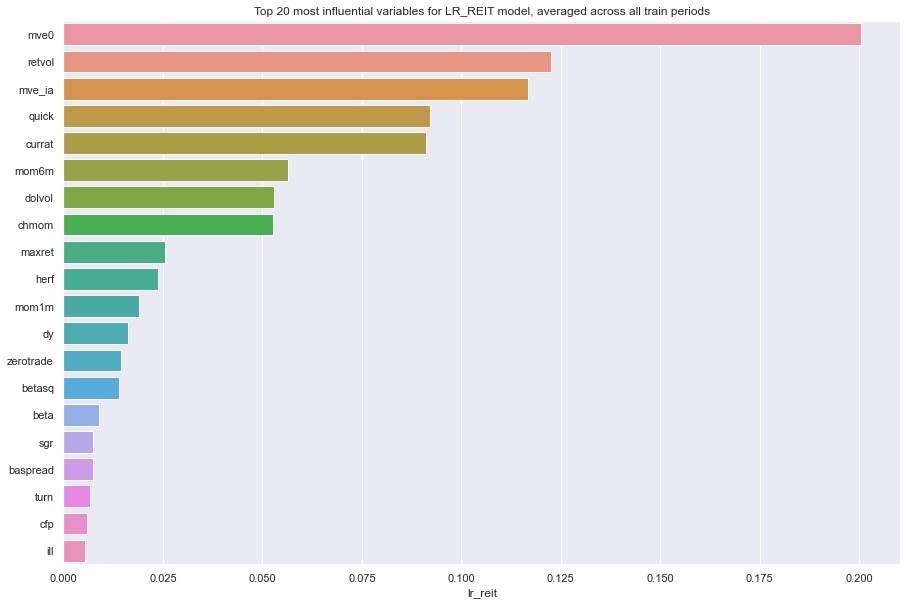

In [48]:
# Plot features of importance
# Plot graph
df_top20 = df_impt.sort_values(by=[model_name], ascending = False).head(20)
plt.figure(figsize=(15,10))
plt.title(f'Top 20 most influential variables for {model_name.upper()} model, averaged across all train periods')
sns.barplot(data = df_top20, x = model_name, y = df_top20.index);


In [118]:
# Merge df_temp to existing df_r2drecrease table

df_r2decrease_reit = pd.merge(
    left = df_r2decrease_reit,
    right = df_impt[model_name],
    how = 'left',
    left_index = True,
    right_index = True    
)

# Rank R2decrease table after including new model results
df_featurerank_reit = df_r2decrease_reit.rank() 
df_featurerank_reit['all_models'] = df_featurerank_reit.sum(axis=1)

# Display tables
display(df_r2decrease_reit)
display(df_featurerank_reit.sort_values('all_models', ascending = False))

# Save dfs to .csv 
df_r2decrease_reit.to_csv('../data/df_r2decrease_reit.csv', index = False)
df_featurerank_reit.to_csv('../data/df_featurerank_reit.csv', index = False)

lr_reit
absacc           0.000306
acc              0.001430
aeavol           0.000650
age              0.000137
agr              0.000223
baspread         0.007390
beta             0.008894
betasq           0.013997
bm               0.001241
bm_ia            0.002404
cash             0.000161
cashdebt         0.000128
cashpr           0.001257
cfp              0.006021
cfp_ia           0.001410
chatoia          0.000082
chcsho           0.000206
chempia          0.001031
chinv            0.000245
chmom            0.052654
chpmia           0.002182
chtx            -0.000017
cinvest          0.000038
convind          0.000886
currat           0.091179
depr            -0.000063
divi             0.000153
divo             0.000145
dolvol           0.052843
dy               0.016294
ear              0.000198
egr              0.001280
ep               0.001748
gma              0.003155
grcapx           0.000474
grltnoa          0.002414
herf             0.023766
hire             0.000198
idiovol          0.000873
ill              0.005484
indmom          -0.000049
invest           0.000890
lev             -0.000274
lgr              0.000145
maxret           0.025620
mom12m           0.004666
mom1m            0.019050
mom36m           0.004236
mom6m            0.056381
ms               0.000196
mve0             0.200379
mve_ia           0.116817
nincr            0.000252
operprof         0.000132
orgcap           0.000991
pchcapx_ia      -0.000011
pchcurrat        0.000112
pchdepr          0.000554
pchgm_pchsale    0.000202
pchquick         0.000625
pchsale_pchinvt  0.000186
pchsale_pchrect  0.000089
pchsale_pchxsga  0.000135
pchsaleinv       0.000625
pctacc          -0.000073
pricedelay       0.000046
ps               0.000209
quick            0.092216
rd               0.002045
rd_mve          -0.000028
rd_sale          0.004352
realestate       0.000529
retvol           0.122543
roaq             0.001714
roavol           0.002084
roeq             0.000140
roic             0.000738
rsup             0.000917
salecash         0.000004
saleinv          0.002172
salerec          0.000180
secured         -0.000081
securedind      -0.001280
sgr              0.007542
sin              0.000448
sp               0.001467
std_dolvol       0.000407
std_turn        -0.000153
stdacc           0.001575
stdcf            0.002456
tang             0.001592
tb               0.000199
turn             0.006597
zerotrade        0.014397

lr_reit  all_models
mve0                94.0        94.0
retvol              93.0        93.0
mve_ia              92.0        92.0
quick               91.0        91.0
currat              90.0        90.0
mom6m               89.0        89.0
dolvol              88.0        88.0
chmom               87.0        87.0
maxret              86.0        86.0
herf                85.0        85.0
mom1m               84.0        84.0
dy                  83.0        83.0
zerotrade           82.0        82.0
betasq              81.0        81.0
beta                80.0        80.0
sgr                 79.0        79.0
baspread            78.0        78.0
turn                77.0        77.0
cfp                 76.0        76.0
ill                 75.0        75.0
mom12m              74.0        74.0
rd_sale             73.0        73.0
mom36m              72.0        72.0
gma                 71.0        71.0
stdcf               70.0        70.0
grltnoa             69.0        69.0
bm_ia               68.0        68.0
chpmia              67.0        67.0
saleinv             66.0        66.0
roavol              65.0        65.0
rd                  64.0        64.0
ep                  63.0        63.0
roaq                62.0        62.0
tang                61.0        61.0
stdacc              60.0        60.0
sp                  59.0        59.0
acc                 58.0        58.0
cfp_ia              57.0        57.0
egr                 56.0        56.0
cashpr              55.0        55.0
bm                  54.0        54.0
chempia             53.0        53.0
orgcap              52.0        52.0
rsup                51.0        51.0
invest              50.0        50.0
convind             49.0        49.0
idiovol             48.0        48.0
roic                47.0        47.0
aeavol              46.0        46.0
pchsaleinv          45.0        45.0
pchquick            44.0        44.0
pchdepr             43.0        43.0
realestate          42.0        42.0
grcapx              41.0        41.0
sin                 40.0        40.0
std_dolvol          39.0        39.0
absacc              38.0        38.0
nincr               37.0        37.0
chinv               36.0        36.0
agr                 35.0        35.0
ps                  34.0        34.0
chcsho              33.0        33.0
pchgm_pchsale       32.0        32.0
tb                  31.0        31.0
hire                30.0        30.0
ear                 29.0        29.0
ms                  28.0        28.0
pchsale_pchinvt     27.0        27.0
salerec             26.0        26.0
cash                25.0        25.0
divi                24.0        24.0
divo                23.0        23.0
lgr                 22.0        22.0
roeq                21.0        21.0
age                 20.0        20.0
pchsale_pchxsga     19.0        19.0
operprof            18.0        18.0
cashdebt            17.0        17.0
pchcurrat           16.0        16.0
pchsale_pchrect     15.0        15.0
chatoia             14.0        14.0
pricedelay          13.0        13.0
cinvest             12.0        12.0
salecash            11.0        11.0
pchcapx_ia          10.0        10.0
chtx                 9.0         9.0
rd_mve               8.0         8.0
indmom               7.0         7.0
depr                 6.0         6.0
pctacc               5.0         5.0
secured              4.0         4.0
std_turn             3.0         3.0
lev                  2.0         2.0
securedind           1.0         1.0

## Fama-French 
Only using value ('bm') and size ('mve0') features

### REIT-only

In [119]:
# Reset train and validate sets
X_train, X_validate, _, y_train, y_validate, _ = train_val_test_split(
    X = X_reit, 
    y = y_reit, 
    start_train = 1990, 
    start_val = 2001, 
    start_test = 2006
)

In [120]:
# Fit OLS on 1990-2000
lr = LinearRegression()
lr.fit(X_train[['bm','mve0']], y_train)
y_pred_train = lr.predict(X_train[['bm','mve0']])
measure_r2(y_train, y_pred_train)

0.3649674043108675

In [121]:
# Validate on 2001-2005
y_pred_validate = lr.predict(X_validate[['bm','mve0']])
measure_r2(y_validate, y_pred_validate)

1.5185913129441508

In [122]:
# Store results
model_name = 'fama-french_reit'

new_results = [{
    'Model Name' : model_name,
    'Selected Config' : 'bm, mve0',
    'Train (1990-2000)' : f'{measure_r2(y_train, y_pred_train):.2f} ({measure_rmse(y_train, y_pred_train):.1f})',
    'Validate (2001-2005)': f'{measure_r2(y_validate, y_pred_validate):.2f} ({measure_rmse(y_validate, y_pred_validate):.1f})'
}]

df_results_reit = pd.concat([df_results_reit, pd.DataFrame(new_results)], axis = 0)

display(df_results_reit)


Model Name Selected Config Train (1990-2000) Validate (2001-2005)  \
0        naive_reit            N.A.      0.00 (10.45)         0.00 (10.26)   
0           lr_reit            N.A.       1.99 (10.3)          0.69 (10.2)   
0  fama-french_reit        bm, mve0       0.36 (10.4)          1.52 (10.2)   

  Test (2006-2020)  Test (2006)    Test (2007)    Test (2008)    Test (2009)  \
0     0.00 (12.13)  0.00 (7.60)   0.00 (11.29)   0.00 (19.81)   0.00 (25.18)   
0    -0.03 (12.13)  4.17 (7.44)  -3.50 (11.48)  -0.55 (19.87)  -0.02 (25.19)   
0              NaN          NaN            NaN            NaN            NaN   

    Test (2010)    Test (2011)  Test (2012)  Test (2013)  Test (2014)  \
0  0.00 (12.47)   0.00 (10.08)  0.00 (9.46)  0.00 (9.44)  0.00 (7.04)   
0  1.79 (12.36)  -2.03 (10.19)  3.18 (9.31)  1.38 (9.37)  1.59 (6.99)   
0           NaN            NaN          NaN          NaN          NaN   

    Test (2015)  Test (2016)   Test (2017)   Test (2018)  Test (2019)  \
0   0.00 (7.47)  0.00 (9.09)   0.00 (7.08)   0.00 (8.03)  0.00 (8.37)   
0  -2.95 (7.58)  2.22 (8.98)  -1.00 (7.12)  -5.43 (8.25)  3.70 (8.21)   
0           NaN          NaN           NaN           NaN          NaN   

     Test (2020) Remarks  
0   0.00 (18.42)     NaN  
0  -0.21 (18.43)     NaN  
0            NaN     NaN

In [123]:
%%time
# Chosen configuration for model
selected_cfg = [-1]

def model_fit(X_train, y_train, cfg):
    # unpack config
    n = cfg
    model = LinearRegression(n_jobs = n)
    model.fit(X_train[['bm','mve0']], y_train)
    return model

def model_predict(model, X_validate):
    # make predictions
    y_pred = model.predict(X_validate[['bm','mve0']])
    return y_pred

# Out-of-sample testing, no need to do validation after hyperparameters are selected
score = walk_forward(
    selected_cfg, 
    X = X_reit, 
    y = y_reit, 
    start_train = 1990, 
    start_val = 2006, # Set equal to start of test year, so that train year ends just before test year
    start_test = 2006,
    final_year_of_testing = 2020, 
    df_results = df_results_reit)

# Save df_results to .csv 
df_results_reit.to_csv('../data/df_results_reit.csv', index = False)

Test year 2006 done, R2 score is 3.84
Test year 2006 done, RMSE score is 7.45
Test year 2007 done, R2 score is -4.46
Test year 2007 done, RMSE score is 11.54
Test year 2008 done, R2 score is -1.84
Test year 2008 done, RMSE score is 19.99
Test year 2009 done, R2 score is 0.64
Test year 2009 done, RMSE score is 25.10
Test year 2010 done, R2 score is 2.03
Test year 2010 done, RMSE score is 12.34
Test year 2011 done, R2 score is -0.68
Test year 2011 done, RMSE score is 10.12
Test year 2012 done, R2 score is 3.28
Test year 2012 done, RMSE score is 9.31
Test year 2013 done, R2 score is 1.25
Test year 2013 done, RMSE score is 9.38
Test year 2014 done, R2 score is 3.36
Test year 2014 done, RMSE score is 6.92
Test year 2015 done, R2 score is -1.87
Test year 2015 done, RMSE score is 7.54
Test year 2016 done, R2 score is 2.06
Test year 2016 done, RMSE score is 8.99
Test year 2017 done, R2 score is 1.06
Test year 2017 done, RMSE score is 7.05
Test year 2018 done, R2 score is -2.57
Test year 2018 d

Model Name Selected Config Train (1990-2000) Validate (2001-2005)  \
0        naive_reit            N.A.      0.00 (10.45)         0.00 (10.26)   
0           lr_reit            N.A.       1.99 (10.3)          0.69 (10.2)   
0  fama-french_reit        bm, mve0       0.36 (10.4)          1.52 (10.2)   

  Test (2006-2020)  Test (2006)    Test (2007)    Test (2008)    Test (2009)  \
0     0.00 (12.13)  0.00 (7.60)   0.00 (11.29)   0.00 (19.81)   0.00 (25.18)   
0    -0.03 (12.13)  4.17 (7.44)  -3.50 (11.48)  -0.55 (19.87)  -0.02 (25.19)   
0     0.17 (12.12)  3.84 (7.45)  -4.46 (11.54)  -1.84 (19.99)   0.64 (25.10)   

    Test (2010)    Test (2011)  Test (2012)  Test (2013)  Test (2014)  \
0  0.00 (12.47)   0.00 (10.08)  0.00 (9.46)  0.00 (9.44)  0.00 (7.04)   
0  1.79 (12.36)  -2.03 (10.19)  3.18 (9.31)  1.38 (9.37)  1.59 (6.99)   
0  2.03 (12.34)  -0.68 (10.12)  3.28 (9.31)  1.25 (9.38)  3.36 (6.92)   

    Test (2015)  Test (2016)   Test (2017)   Test (2018)  Test (2019)  \
0   0.00 (7.47)  0.00 (9.09)   0.00 (7.08)   0.00 (8.03)  0.00 (8.37)   
0  -2.95 (7.58)  2.22 (8.98)  -1.00 (7.12)  -5.43 (8.25)  3.70 (8.21)   
0  -1.87 (7.54)  2.06 (8.99)   1.06 (7.05)  -2.57 (8.14)  3.50 (8.22)   

     Test (2020) Remarks  
0   0.00 (18.42)     NaN  
0  -0.21 (18.43)     NaN  
0  -0.05 (18.42)     NaN


R2 for entire pooled test set, from 2006 to 2020, is 0.17.
RMSE for entire pooled test set, from 2006 to 2020, is 12.12.

CPU times: user 409 ms, sys: 615 ms, total: 1.02 s
Wall time: 225 ms


R2 for entire pooled test set, from 2006 to 2020, is 0.17.

RMSE for entire pooled test set, from 2006 to 2020, is 12.12.

CPU times: user 409 ms, sys: 615 ms, total: 1.02 s

Wall time: 225 ms

### Sample 1

In [124]:
# Reset train and validate sets
X_train, X_validate, _, y_train, y_validate, _ = train_val_test_split(
    X = X_1, 
    y = y_1, 
    start_train = 1990, 
    start_val = 2001, 
    start_test = 2006
)

In [125]:
# Fit OLS on 1990-2000
lr = LinearRegression()
lr.fit(X_train[['bm','mve0']], y_train)
y_pred_train = lr.predict(X_train[['bm','mve0']])
measure_r2(y_train, y_pred_train)

0.20904946553893522

In [126]:
# Validate on 2001-2005
y_pred_validate = lr.predict(X_validate[['bm','mve0']])
measure_r2(y_validate, y_pred_validate)

0.32114603726765

In [127]:
# Store results
model_name = 'fama-french_sample1'

new_results = [{
    'Model Name' : model_name,
    'Selected Config' : 'bm, mve0',
    'Train (1990-2000)' : f'{measure_r2(y_train, y_pred_train):.2f} ({measure_rmse(y_train, y_pred_train):.1f})',
    'Validate (2001-2005)': f'{measure_r2(y_validate, y_pred_validate):.2f} ({measure_rmse(y_validate, y_pred_validate):.1f})'
}]

df_results_sample1 = pd.concat([df_results_sample1, pd.DataFrame(new_results)], axis = 0)

display(df_results_sample1)


Model Name Selected Config Train (1990-2000) Validate (2001-2005)  \
0        naive_sample1            N.A.      0.00 (20.88)         0.00 (19.01)   
0           lr_sample1            N.A.       1.66 (20.7)         -0.45 (19.0)   
0  fama-french_sample1        bm, mve0       0.21 (20.9)          0.32 (19.0)   

  Test (2006-2020)    Test (2006)    Test (2007)    Test (2008)   Test (2009)  \
0     0.00 (15.77)   0.00 (14.72)   0.00 (12.19)   0.00 (20.06)  0.00 (24.51)   
0    -0.49 (15.80)  -0.80 (14.78)  -4.28 (12.45)  -2.82 (20.35)  0.66 (24.43)   
0              NaN            NaN            NaN            NaN           NaN   

     Test (2010)    Test (2011)   Test (2012)   Test (2013)    Test (2014)  \
0   0.00 (15.28)   0.00 (13.93)  0.00 (12.77)  0.00 (12.20)   0.00 (11.34)   
0  -0.84 (15.34)  -1.28 (14.02)  0.52 (12.74)  2.52 (12.05)  -1.37 (11.42)   
0            NaN            NaN           NaN           NaN            NaN   

     Test (2015)    Test (2016)    Test (2017)    Test (2018)   Test (2019)  \
0   0.00 (14.08)   0.00 (16.07)   0.00 (12.67)   0.00 (13.97)  0.00 (15.38)   
0  -1.45 (14.18)  -0.12 (16.08)  -0.16 (12.68)  -2.02 (14.11)  0.46 (15.34)   
0            NaN            NaN            NaN            NaN           NaN   

    Test (2020) Remarks  
0  0.00 (22.31)     NaN  
0  0.74 (22.23)     NaN  
0           NaN     NaN

In [128]:
%%time
# Chosen configuration for model
selected_cfg = [-1]

def model_fit(X_train, y_train, cfg):
    # unpack config
    n = cfg
    model = LinearRegression(n_jobs = n)
    model.fit(X_train[['bm','mve0']], y_train)
    return model

def model_predict(model, X_validate):
    # make predictions
    y_pred = model.predict(X_validate[['bm','mve0']])
    return y_pred

# Out-of-sample testing, no need to do validation after hyperparameters are selected
score = walk_forward(
    selected_cfg, 
    X = X_1, 
    y = y_1, 
    start_train = 1990, 
    start_val = 2006, # Set equal to start of test year, so that train year ends just before test year
    start_test = 2006,
    final_year_of_testing = 2020, 
    df_results = df_results_sample1)

# Save df_results to .csv 
df_results_sample1.to_csv('../data/df_results_sample1.csv', index = False)

Test year 2006 done, R2 score is 0.74
Test year 2006 done, RMSE score is 14.66
Test year 2007 done, R2 score is -1.74
Test year 2007 done, RMSE score is 12.30
Test year 2008 done, R2 score is -2.49
Test year 2008 done, RMSE score is 20.31
Test year 2009 done, R2 score is 0.77
Test year 2009 done, RMSE score is 24.41
Test year 2010 done, R2 score is 1.13
Test year 2010 done, RMSE score is 15.19
Test year 2011 done, R2 score is -0.88
Test year 2011 done, RMSE score is 13.99
Test year 2012 done, R2 score is 0.74
Test year 2012 done, RMSE score is 12.72
Test year 2013 done, R2 score is 2.08
Test year 2013 done, RMSE score is 12.07
Test year 2014 done, R2 score is 0.01
Test year 2014 done, RMSE score is 11.34
Test year 2015 done, R2 score is -0.61
Test year 2015 done, RMSE score is 14.12
Test year 2016 done, R2 score is 0.67
Test year 2016 done, RMSE score is 16.01
Test year 2017 done, R2 score is 0.91
Test year 2017 done, RMSE score is 12.61
Test year 2018 done, R2 score is -1.56
Test year

Model Name Selected Config Train (1990-2000) Validate (2001-2005)  \
0        naive_sample1            N.A.      0.00 (20.88)         0.00 (19.01)   
0           lr_sample1            N.A.       1.66 (20.7)         -0.45 (19.0)   
0  fama-french_sample1        bm, mve0       0.21 (20.9)          0.32 (19.0)   

  Test (2006-2020)    Test (2006)    Test (2007)    Test (2008)   Test (2009)  \
0     0.00 (15.77)   0.00 (14.72)   0.00 (12.19)   0.00 (20.06)  0.00 (24.51)   
0    -0.49 (15.80)  -0.80 (14.78)  -4.28 (12.45)  -2.82 (20.35)  0.66 (24.43)   
0     0.13 (15.76)   0.74 (14.66)  -1.74 (12.30)  -2.49 (20.31)  0.77 (24.41)   

     Test (2010)    Test (2011)   Test (2012)   Test (2013)    Test (2014)  \
0   0.00 (15.28)   0.00 (13.93)  0.00 (12.77)  0.00 (12.20)   0.00 (11.34)   
0  -0.84 (15.34)  -1.28 (14.02)  0.52 (12.74)  2.52 (12.05)  -1.37 (11.42)   
0   1.13 (15.19)  -0.88 (13.99)  0.74 (12.72)  2.08 (12.07)   0.01 (11.34)   

     Test (2015)    Test (2016)    Test (2017)    Test (2018)   Test (2019)  \
0   0.00 (14.08)   0.00 (16.07)   0.00 (12.67)   0.00 (13.97)  0.00 (15.38)   
0  -1.45 (14.18)  -0.12 (16.08)  -0.16 (12.68)  -2.02 (14.11)  0.46 (15.34)   
0  -0.61 (14.12)   0.67 (16.01)   0.91 (12.61)  -1.56 (14.08)  0.86 (15.31)   

    Test (2020) Remarks  
0  0.00 (22.31)     NaN  
0  0.74 (22.23)     NaN  
0  0.78 (22.22)     NaN


R2 for entire pooled test set, from 2006 to 2020, is 0.13.
RMSE for entire pooled test set, from 2006 to 2020, is 15.76.

CPU times: user 376 ms, sys: 590 ms, total: 965 ms
Wall time: 225 ms


R2 for entire pooled test set, from 2006 to 2020, is 0.13.

RMSE for entire pooled test set, from 2006 to 2020, is 15.76.

CPU times: user 376 ms, sys: 590 ms, total: 965 ms

Wall time: 225 ms

### Sample 2

In [129]:
# Reset train and validate sets
X_train, X_validate, _, y_train, y_validate, _ = train_val_test_split(
    X = X_2, 
    y = y_2, 
    start_train = 1990, 
    start_val = 2001, 
    start_test = 2006
)

In [130]:
# Fit OLS on 1990-2000
lr = LinearRegression()
lr.fit(X_train[['bm','mve0']], y_train)
y_pred_train = lr.predict(X_train[['bm','mve0']])
measure_r2(y_train, y_pred_train)

0.6786781935983255

In [131]:
# Validate on 2001-2005
y_pred_validate = lr.predict(X_validate[['bm','mve0']])
measure_r2(y_validate, y_pred_validate)

1.145829599340209

In [132]:
# Store results
model_name = 'fama-french_sample2'

new_results = [{
    'Model Name' : model_name,
    'Selected Config' : 'bm, mve0',
    'Train (1990-2000)' : f'{measure_r2(y_train, y_pred_train):.2f} ({measure_rmse(y_train, y_pred_train):.1f})',
    'Validate (2001-2005)': f'{measure_r2(y_validate, y_pred_validate):.2f} ({measure_rmse(y_validate, y_pred_validate):.1f})'
}]

df_results_sample2 = pd.concat([df_results_sample2, pd.DataFrame(new_results)], axis = 0)

display(df_results_sample2)


Model Name Selected Config Train (1990-2000) Validate (2001-2005)  \
0        naive_sample2            N.A.      0.00 (14.00)         0.00 (12.29)   
0           lr_sample2            N.A.       2.18 (13.8)          0.65 (12.2)   
0  fama-french_sample2        bm, mve0       0.68 (14.0)          1.15 (12.2)   

  Test (2006-2020)  Test (2006)   Test (2007)    Test (2008)   Test (2009)  \
0     0.00 (12.32)  0.00 (9.17)   0.00 (8.99)   0.00 (15.09)  0.00 (18.80)   
0     0.22 (12.30)  0.56 (9.15)  -3.53 (9.15)  -5.27 (15.48)  3.25 (18.49)   
0              NaN          NaN           NaN            NaN           NaN   

    Test (2010)   Test (2011)   Test (2012)  Test (2013)   Test (2014)  \
0  0.00 (10.67)   0.00 (9.59)  0.00 (10.62)  0.00 (8.43)  0.00 (15.25)   
0  1.21 (10.60)  -4.70 (9.81)  2.88 (10.47)  5.29 (8.21)  0.65 (15.20)   
0           NaN           NaN           NaN          NaN           NaN   

    Test (2015)   Test (2016)  Test (2017)    Test (2018)   Test (2019)  \
0   0.00 (9.36)  0.00 (11.29)  0.00 (8.75)   0.00 (11.87)  0.00 (13.02)   
0  -3.61 (9.53)  2.74 (11.14)  0.11 (8.74)  -4.01 (12.11)  2.07 (12.89)   
0           NaN           NaN          NaN            NaN           NaN   

    Test (2020) Remarks  
0  0.00 (17.41)     NaN  
0  1.33 (17.29)     NaN  
0           NaN     NaN

In [133]:
%%time
# Chosen configuration for model
selected_cfg = [-1]

def model_fit(X_train, y_train, cfg):
    # unpack config
    n = cfg
    model = LinearRegression(n_jobs = n)
    model.fit(X_train[['bm','mve0']], y_train)
    return model

def model_predict(model, X_validate):
    # make predictions
    y_pred = model.predict(X_validate[['bm','mve0']])
    return y_pred

# Out-of-sample testing, no need to do validation after hyperparameters are selected
score = walk_forward(
    selected_cfg, 
    X = X_2, 
    y = y_2, 
    start_train = 1990, 
    start_val = 2006, # Set equal to start of test year, so that train year ends just before test year
    start_test = 2006,
    final_year_of_testing = 2020, 
    df_results = df_results_sample2)

# Save df_results to .csv 
df_results_sample2.to_csv('../data/df_results_sample2.csv', index = False)

Test year 2006 done, R2 score is 1.74
Test year 2006 done, RMSE score is 9.09
Test year 2007 done, R2 score is -2.06
Test year 2007 done, RMSE score is 9.09
Test year 2008 done, R2 score is -3.80
Test year 2008 done, RMSE score is 15.37
Test year 2009 done, R2 score is 1.82
Test year 2009 done, RMSE score is 18.63
Test year 2010 done, R2 score is 2.57
Test year 2010 done, RMSE score is 10.53
Test year 2011 done, R2 score is -1.08
Test year 2011 done, RMSE score is 9.64
Test year 2012 done, R2 score is 2.10
Test year 2012 done, RMSE score is 10.51
Test year 2013 done, R2 score is 5.79
Test year 2013 done, RMSE score is 8.19
Test year 2014 done, R2 score is 0.51
Test year 2014 done, RMSE score is 15.21
Test year 2015 done, R2 score is -2.07
Test year 2015 done, RMSE score is 9.46
Test year 2016 done, R2 score is 2.88
Test year 2016 done, RMSE score is 11.13
Test year 2017 done, R2 score is 1.56
Test year 2017 done, RMSE score is 8.68
Test year 2018 done, R2 score is -2.41
Test year 2018 

Model Name Selected Config Train (1990-2000) Validate (2001-2005)  \
0        naive_sample2            N.A.      0.00 (14.00)         0.00 (12.29)   
0           lr_sample2            N.A.       2.18 (13.8)          0.65 (12.2)   
0  fama-french_sample2        bm, mve0       0.68 (14.0)          1.15 (12.2)   

  Test (2006-2020)  Test (2006)   Test (2007)    Test (2008)   Test (2009)  \
0     0.00 (12.32)  0.00 (9.17)   0.00 (8.99)   0.00 (15.09)  0.00 (18.80)   
0     0.22 (12.30)  0.56 (9.15)  -3.53 (9.15)  -5.27 (15.48)  3.25 (18.49)   
0     0.56 (12.28)  1.74 (9.09)  -2.06 (9.09)  -3.80 (15.37)  1.82 (18.63)   

    Test (2010)   Test (2011)   Test (2012)  Test (2013)   Test (2014)  \
0  0.00 (10.67)   0.00 (9.59)  0.00 (10.62)  0.00 (8.43)  0.00 (15.25)   
0  1.21 (10.60)  -4.70 (9.81)  2.88 (10.47)  5.29 (8.21)  0.65 (15.20)   
0  2.57 (10.53)  -1.08 (9.64)  2.10 (10.51)  5.79 (8.19)  0.51 (15.21)   

    Test (2015)   Test (2016)  Test (2017)    Test (2018)   Test (2019)  \
0   0.00 (9.36)  0.00 (11.29)  0.00 (8.75)   0.00 (11.87)  0.00 (13.02)   
0  -3.61 (9.53)  2.74 (11.14)  0.11 (8.74)  -4.01 (12.11)  2.07 (12.89)   
0  -2.07 (9.46)  2.88 (11.13)  1.56 (8.68)  -2.41 (12.02)  1.93 (12.90)   

    Test (2020) Remarks  
0  0.00 (17.41)     NaN  
0  1.33 (17.29)     NaN  
0  0.87 (17.33)     NaN


R2 for entire pooled test set, from 2006 to 2020, is 0.56.
RMSE for entire pooled test set, from 2006 to 2020, is 12.28.

CPU times: user 373 ms, sys: 580 ms, total: 953 ms
Wall time: 226 ms


R2 for entire pooled test set, from 2006 to 2020, is 0.56.

RMSE for entire pooled test set, from 2006 to 2020, is 12.28.

CPU times: user 373 ms, sys: 580 ms, total: 953 ms

Wall time: 226 ms

### Compare results

In [134]:
# Compare results from 3 models
display(df_results_reit, df_results_sample1, df_results_sample2)

Model Name Selected Config Train (1990-2000) Validate (2001-2005)  \
0        naive_reit            N.A.      0.00 (10.45)         0.00 (10.26)   
0           lr_reit            N.A.       1.99 (10.3)          0.69 (10.2)   
0  fama-french_reit        bm, mve0       0.36 (10.4)          1.52 (10.2)   

  Test (2006-2020)  Test (2006)    Test (2007)    Test (2008)    Test (2009)  \
0     0.00 (12.13)  0.00 (7.60)   0.00 (11.29)   0.00 (19.81)   0.00 (25.18)   
0    -0.03 (12.13)  4.17 (7.44)  -3.50 (11.48)  -0.55 (19.87)  -0.02 (25.19)   
0     0.17 (12.12)  3.84 (7.45)  -4.46 (11.54)  -1.84 (19.99)   0.64 (25.10)   

    Test (2010)    Test (2011)  Test (2012)  Test (2013)  Test (2014)  \
0  0.00 (12.47)   0.00 (10.08)  0.00 (9.46)  0.00 (9.44)  0.00 (7.04)   
0  1.79 (12.36)  -2.03 (10.19)  3.18 (9.31)  1.38 (9.37)  1.59 (6.99)   
0  2.03 (12.34)  -0.68 (10.12)  3.28 (9.31)  1.25 (9.38)  3.36 (6.92)   

    Test (2015)  Test (2016)   Test (2017)   Test (2018)  Test (2019)  \
0   0.00 (7.47)  0.00 (9.09)   0.00 (7.08)   0.00 (8.03)  0.00 (8.37)   
0  -2.95 (7.58)  2.22 (8.98)  -1.00 (7.12)  -5.43 (8.25)  3.70 (8.21)   
0  -1.87 (7.54)  2.06 (8.99)   1.06 (7.05)  -2.57 (8.14)  3.50 (8.22)   

     Test (2020) Remarks  
0   0.00 (18.42)     NaN  
0  -0.21 (18.43)     NaN  
0  -0.05 (18.42)     NaN

Model Name Selected Config Train (1990-2000) Validate (2001-2005)  \
0        naive_sample1            N.A.      0.00 (20.88)         0.00 (19.01)   
0           lr_sample1            N.A.       1.66 (20.7)         -0.45 (19.0)   
0  fama-french_sample1        bm, mve0       0.21 (20.9)          0.32 (19.0)   

  Test (2006-2020)    Test (2006)    Test (2007)    Test (2008)   Test (2009)  \
0     0.00 (15.77)   0.00 (14.72)   0.00 (12.19)   0.00 (20.06)  0.00 (24.51)   
0    -0.49 (15.80)  -0.80 (14.78)  -4.28 (12.45)  -2.82 (20.35)  0.66 (24.43)   
0     0.13 (15.76)   0.74 (14.66)  -1.74 (12.30)  -2.49 (20.31)  0.77 (24.41)   

     Test (2010)    Test (2011)   Test (2012)   Test (2013)    Test (2014)  \
0   0.00 (15.28)   0.00 (13.93)  0.00 (12.77)  0.00 (12.20)   0.00 (11.34)   
0  -0.84 (15.34)  -1.28 (14.02)  0.52 (12.74)  2.52 (12.05)  -1.37 (11.42)   
0   1.13 (15.19)  -0.88 (13.99)  0.74 (12.72)  2.08 (12.07)   0.01 (11.34)   

     Test (2015)    Test (2016)    Test (2017)    Test (2018)   Test (2019)  \
0   0.00 (14.08)   0.00 (16.07)   0.00 (12.67)   0.00 (13.97)  0.00 (15.38)   
0  -1.45 (14.18)  -0.12 (16.08)  -0.16 (12.68)  -2.02 (14.11)  0.46 (15.34)   
0  -0.61 (14.12)   0.67 (16.01)   0.91 (12.61)  -1.56 (14.08)  0.86 (15.31)   

    Test (2020) Remarks  
0  0.00 (22.31)     NaN  
0  0.74 (22.23)     NaN  
0  0.78 (22.22)     NaN

Model Name Selected Config Train (1990-2000) Validate (2001-2005)  \
0        naive_sample2            N.A.      0.00 (14.00)         0.00 (12.29)   
0           lr_sample2            N.A.       2.18 (13.8)          0.65 (12.2)   
0  fama-french_sample2        bm, mve0       0.68 (14.0)          1.15 (12.2)   

  Test (2006-2020)  Test (2006)   Test (2007)    Test (2008)   Test (2009)  \
0     0.00 (12.32)  0.00 (9.17)   0.00 (8.99)   0.00 (15.09)  0.00 (18.80)   
0     0.22 (12.30)  0.56 (9.15)  -3.53 (9.15)  -5.27 (15.48)  3.25 (18.49)   
0     0.56 (12.28)  1.74 (9.09)  -2.06 (9.09)  -3.80 (15.37)  1.82 (18.63)   

    Test (2010)   Test (2011)   Test (2012)  Test (2013)   Test (2014)  \
0  0.00 (10.67)   0.00 (9.59)  0.00 (10.62)  0.00 (8.43)  0.00 (15.25)   
0  1.21 (10.60)  -4.70 (9.81)  2.88 (10.47)  5.29 (8.21)  0.65 (15.20)   
0  2.57 (10.53)  -1.08 (9.64)  2.10 (10.51)  5.79 (8.19)  0.51 (15.21)   

    Test (2015)   Test (2016)  Test (2017)    Test (2018)   Test (2019)  \
0   0.00 (9.36)  0.00 (11.29)  0.00 (8.75)   0.00 (11.87)  0.00 (13.02)   
0  -3.61 (9.53)  2.74 (11.14)  0.11 (8.74)  -4.01 (12.11)  2.07 (12.89)   
0  -2.07 (9.46)  2.88 (11.13)  1.56 (8.68)  -2.41 (12.02)  1.93 (12.90)   

    Test (2020) Remarks  
0  0.00 (17.41)     NaN  
0  1.33 (17.29)     NaN  
0  0.87 (17.33)     NaN

### REIT - Features of importance

In [135]:
%%time
# Calculate "importance" by setting features to zero, one at a time

model_name = 'fama-french_reit'

df_impt = create_r2decrease(model_name, 
                            X = X_reit, 
                            y = y_reit, 
                            start_train = 1990, 
                            start_val = 2001,
                            start_test = 2006,
                            final_year_of_testing = 2020)

df_impt

CPU times: user 1min 31s, sys: 27.9 s, total: 1min 59s
Wall time: 20.8 s


2006      2007      2008      2009      2010      2011  \
absacc           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
acc              0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
aeavol           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
age              0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
agr              0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
baspread         0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
beta             0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
betasq           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
bm               0.056942  0.091130  0.094355  0.099126  0.095830  0.086024   
bm_ia            0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
cash             0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
cashdebt         0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
cashpr           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
cfp              0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
cfp_ia           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
chatoia          0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
chcsho           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
chempia          0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
chinv            0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
chmom            0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
chpmia           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
chtx             0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
cinvest          0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
convind          0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
currat           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
depr             0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
divi             0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
divo             0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
dolvol           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
dy               0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
ear              0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
egr              0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
ep               0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
gma              0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
grcapx           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
grltnoa          0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
herf             0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
hire             0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
idiovol          0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
ill              0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
indmom           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
invest           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
lev              0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
lgr              0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
maxret           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
mom12m           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
mom1m            0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
mom36m           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
mom6m            0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
ms               0.000000  0.000000  0.000000  0.000000  0.000000  0.00

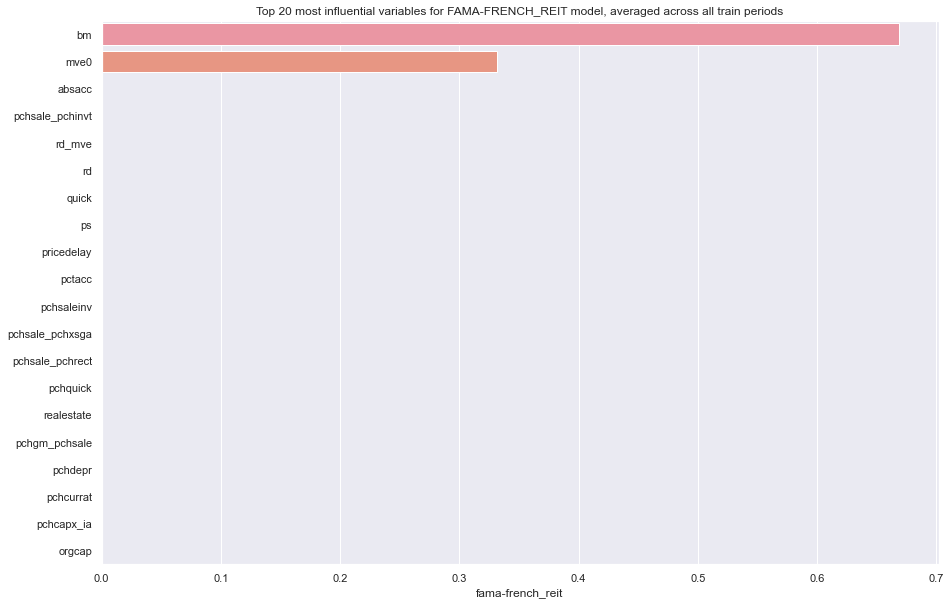

In [136]:
# Plot features of importance
# Plot graph
df_top20 = df_impt.sort_values(by=[model_name], ascending = False).head(20)
plt.figure(figsize=(15,10))
plt.title(f'Top 20 most influential variables for {model_name.upper()} model, averaged across all train periods')
sns.barplot(data = df_top20, x = model_name, y = df_top20.index);


Value factor is more significant than size factor for REITs

## Carhart model

### REIT-only

In [143]:
# Reset train and validate sets
X_train, X_validate, _, y_train, y_validate, _ = train_val_test_split(
    X = X_reit, 
    y = y_reit, 
    start_train = 1990, 
    start_val = 2001, 
    start_test = 2006
)

In [144]:
# Fit OLS on 1990-2000
lr = LinearRegression()
lr.fit(X_train[['bm','mve0','mom12m']], y_train)
y_pred_train = lr.predict(X_train[['bm','mve0','mom12m']])
measure_r2(y_train, y_pred_train)

0.5170120026452341

In [145]:
# Validate on 2001-2005
y_pred_validate = lr.predict(X_validate[['bm','mve0','mom12m']])
measure_r2(y_validate, y_pred_validate)

1.682361674581101

In [146]:
# Store results
model_name = 'carhart_reit'

new_results = [{
    'Model Name' : model_name,
    'Selected Config' : 'bm, mve0, mom12m',
    'Train (1990-2000)' : f'{measure_r2(y_train, y_pred_train):.2f} ({measure_rmse(y_train, y_pred_train):.1f})',
    'Validate (2001-2005)': f'{measure_r2(y_validate, y_pred_validate):.2f} ({measure_rmse(y_validate, y_pred_validate):.1f})'
}]

df_results_reit = pd.concat([df_results_reit, pd.DataFrame(new_results)], axis = 0)

display(df_results_reit)


Model Name   Selected Config Train (1990-2000) Validate (2001-2005)  \
0        naive_reit              N.A.      0.00 (10.45)         0.00 (10.26)   
0           lr_reit              N.A.       1.99 (10.3)          0.69 (10.2)   
0  fama-french_reit          bm, mve0       0.36 (10.4)          1.52 (10.2)   
0      carhart_reit  bm, mve0, mom12m       0.52 (10.4)          1.68 (10.2)   

  Test (2006-2020)  Test (2006)    Test (2007)    Test (2008)    Test (2009)  \
0     0.00 (12.13)  0.00 (7.60)   0.00 (11.29)   0.00 (19.81)   0.00 (25.18)   
0    -0.03 (12.13)  4.17 (7.44)  -3.50 (11.48)  -0.55 (19.87)  -0.02 (25.19)   
0     0.17 (12.12)  3.84 (7.45)  -4.46 (11.54)  -1.84 (19.99)   0.64 (25.10)   
0              NaN          NaN            NaN            NaN            NaN   

    Test (2010)    Test (2011)  Test (2012)  Test (2013)  Test (2014)  \
0  0.00 (12.47)   0.00 (10.08)  0.00 (9.46)  0.00 (9.44)  0.00 (7.04)   
0  1.79 (12.36)  -2.03 (10.19)  3.18 (9.31)  1.38 (9.37)  1.59 (6.99)   
0  2.03 (12.34)  -0.68 (10.12)  3.28 (9.31)  1.25 (9.38)  3.36 (6.92)   
0           NaN            NaN          NaN          NaN          NaN   

    Test (2015)  Test (2016)   Test (2017)   Test (2018)  Test (2019)  \
0   0.00 (7.47)  0.00 (9.09)   0.00 (7.08)   0.00 (8.03)  0.00 (8.37)   
0  -2.95 (7.58)  2.22 (8.98)  -1.00 (7.12)  -5.43 (8.25)  3.70 (8.21)   
0  -1.87 (7.54)  2.06 (8.99)   1.06 (7.05)  -2.57 (8.14)  3.50 (8.22)   
0           NaN          NaN           NaN           NaN          NaN   

     Test (2020) Remarks  
0   0.00 (18.42)     NaN  
0  -0.21 (18.43)     NaN  
0  -0.05 (18.42)     NaN  
0            NaN     NaN

In [147]:
%%time
# Chosen configuration for model
selected_cfg = [-1]

def model_fit(X_train, y_train, cfg):
    # unpack config
    n = cfg
    model = LinearRegression(n_jobs = n)
    model.fit(X_train[['bm','mve0','mom12m']], y_train)
    return model

def model_predict(model, X_validate):
    # make predictions
    y_pred = model.predict(X_validate[['bm','mve0','mom12m']])
    return y_pred

# Out-of-sample testing, no need to do validation after hyperparameters are selected
score = walk_forward(
    selected_cfg, 
    X = X_reit, 
    y = y_reit, 
    start_train = 1990, 
    start_val = 2006, # Set equal to start of test year, so that train year ends just before test year
    start_test = 2006,
    final_year_of_testing = 2020, 
    df_results = df_results_reit)

# Save df_results to .csv 
df_results_reit.to_csv('../data/df_results_reit.csv', index = False)

Test year 2006 done, R2 score is 4.37
Test year 2006 done, RMSE score is 7.43
Test year 2007 done, R2 score is -3.46
Test year 2007 done, RMSE score is 11.48
Test year 2008 done, R2 score is -1.33
Test year 2008 done, RMSE score is 19.94
Test year 2009 done, R2 score is 0.15
Test year 2009 done, RMSE score is 25.16
Test year 2010 done, R2 score is 2.04
Test year 2010 done, RMSE score is 12.34
Test year 2011 done, R2 score is -0.71
Test year 2011 done, RMSE score is 10.12
Test year 2012 done, R2 score is 2.65
Test year 2012 done, RMSE score is 9.34
Test year 2013 done, R2 score is 1.65
Test year 2013 done, RMSE score is 9.36
Test year 2014 done, R2 score is 3.06
Test year 2014 done, RMSE score is 6.93
Test year 2015 done, R2 score is -1.88
Test year 2015 done, RMSE score is 7.54
Test year 2016 done, R2 score is 1.71
Test year 2016 done, RMSE score is 9.01
Test year 2017 done, R2 score is 0.85
Test year 2017 done, RMSE score is 7.05
Test year 2018 done, R2 score is -2.06
Test year 2018 d

Model Name   Selected Config Train (1990-2000) Validate (2001-2005)  \
0        naive_reit              N.A.      0.00 (10.45)         0.00 (10.26)   
0           lr_reit              N.A.       1.99 (10.3)          0.69 (10.2)   
0  fama-french_reit          bm, mve0       0.36 (10.4)          1.52 (10.2)   
0      carhart_reit  bm, mve0, mom12m       0.52 (10.4)          1.68 (10.2)   

  Test (2006-2020)  Test (2006)    Test (2007)    Test (2008)    Test (2009)  \
0     0.00 (12.13)  0.00 (7.60)   0.00 (11.29)   0.00 (19.81)   0.00 (25.18)   
0    -0.03 (12.13)  4.17 (7.44)  -3.50 (11.48)  -0.55 (19.87)  -0.02 (25.19)   
0     0.17 (12.12)  3.84 (7.45)  -4.46 (11.54)  -1.84 (19.99)   0.64 (25.10)   
0     0.16 (12.12)  4.37 (7.43)  -3.46 (11.48)  -1.33 (19.94)   0.15 (25.16)   

    Test (2010)    Test (2011)  Test (2012)  Test (2013)  Test (2014)  \
0  0.00 (12.47)   0.00 (10.08)  0.00 (9.46)  0.00 (9.44)  0.00 (7.04)   
0  1.79 (12.36)  -2.03 (10.19)  3.18 (9.31)  1.38 (9.37)  1.59 (6.99)   
0  2.03 (12.34)  -0.68 (10.12)  3.28 (9.31)  1.25 (9.38)  3.36 (6.92)   
0  2.04 (12.34)  -0.71 (10.12)  2.65 (9.34)  1.65 (9.36)  3.06 (6.93)   

    Test (2015)  Test (2016)   Test (2017)   Test (2018)  Test (2019)  \
0   0.00 (7.47)  0.00 (9.09)   0.00 (7.08)   0.00 (8.03)  0.00 (8.37)   
0  -2.95 (7.58)  2.22 (8.98)  -1.00 (7.12)  -5.43 (8.25)  3.70 (8.21)   
0  -1.87 (7.54)  2.06 (8.99)   1.06 (7.05)  -2.57 (8.14)  3.50 (8.22)   
0  -1.88 (7.54)  1.71 (9.01)   0.85 (7.05)  -2.06 (8.12)  3.34 (8.23)   

     Test (2020) Remarks  
0   0.00 (18.42)     NaN  
0  -0.21 (18.43)     NaN  
0  -0.05 (18.42)     NaN  
0  -0.13 (18.43)     NaN


R2 for entire pooled test set, from 2006 to 2020, is 0.16.
RMSE for entire pooled test set, from 2006 to 2020, is 12.12.

CPU times: user 374 ms, sys: 575 ms, total: 948 ms
Wall time: 233 ms


R2 for entire pooled test set, from 2006 to 2020, is 0.16.

RMSE for entire pooled test set, from 2006 to 2020, is 12.12.

CPU times: user 374 ms, sys: 575 ms, total: 948 ms

Wall time: 233 ms

### Sample 1

In [148]:
# Reset train and validate sets
X_train, X_validate, _, y_train, y_validate, _ = train_val_test_split(
    X = X_1, 
    y = y_1, 
    start_train = 1990, 
    start_val = 2001, 
    start_test = 2006
)

In [149]:
# Fit OLS on 1990-2000
lr = LinearRegression()
lr.fit(X_train[['bm','mve0','mom12m']], y_train)
y_pred_train = lr.predict(X_train[['bm','mve0','mom12m']])
measure_r2(y_train, y_pred_train)

0.2493474121775141

In [150]:
# Validate on 2001-2005
y_pred_validate = lr.predict(X_validate[['bm','mve0','mom12m']])
measure_r2(y_validate, y_pred_validate)

0.31479351972698577

In [151]:
# Store results
model_name = 'carhart_sample1'

new_results = [{
    'Model Name' : model_name,
    'Selected Config' : 'bm, mve0, mom12m',
    'Train (1990-2000)' : f'{measure_r2(y_train, y_pred_train):.2f} ({measure_rmse(y_train, y_pred_train):.1f})',
    'Validate (2001-2005)': f'{measure_r2(y_validate, y_pred_validate):.2f} ({measure_rmse(y_validate, y_pred_validate):.1f})'
}]

df_results_sample1 = pd.concat([df_results_sample1, pd.DataFrame(new_results)], axis = 0)

display(df_results_sample1)


Model Name   Selected Config Train (1990-2000)  \
0        naive_sample1              N.A.      0.00 (20.88)   
0           lr_sample1              N.A.       1.66 (20.7)   
0  fama-french_sample1          bm, mve0       0.21 (20.9)   
0      carhart_sample1  bm, mve0, mom12m       0.25 (20.9)   

  Validate (2001-2005) Test (2006-2020)    Test (2006)    Test (2007)  \
0         0.00 (19.01)     0.00 (15.77)   0.00 (14.72)   0.00 (12.19)   
0         -0.45 (19.0)    -0.49 (15.80)  -0.80 (14.78)  -4.28 (12.45)   
0          0.32 (19.0)     0.13 (15.76)   0.74 (14.66)  -1.74 (12.30)   
0          0.31 (19.0)              NaN            NaN            NaN   

     Test (2008)   Test (2009)    Test (2010)    Test (2011)   Test (2012)  \
0   0.00 (20.06)  0.00 (24.51)   0.00 (15.28)   0.00 (13.93)  0.00 (12.77)   
0  -2.82 (20.35)  0.66 (24.43)  -0.84 (15.34)  -1.28 (14.02)  0.52 (12.74)   
0  -2.49 (20.31)  0.77 (24.41)   1.13 (15.19)  -0.88 (13.99)  0.74 (12.72)   
0            NaN           NaN            NaN            NaN           NaN   

    Test (2013)    Test (2014)    Test (2015)    Test (2016)    Test (2017)  \
0  0.00 (12.20)   0.00 (11.34)   0.00 (14.08)   0.00 (16.07)   0.00 (12.67)   
0  2.52 (12.05)  -1.37 (11.42)  -1.45 (14.18)  -0.12 (16.08)  -0.16 (12.68)   
0  2.08 (12.07)   0.01 (11.34)  -0.61 (14.12)   0.67 (16.01)   0.91 (12.61)   
0           NaN            NaN            NaN            NaN            NaN   

     Test (2018)   Test (2019)   Test (2020) Remarks  
0   0.00 (13.97)  0.00 (15.38)  0.00 (22.31)     NaN  
0  -2.02 (14.11)  0.46 (15.34)  0.74 (22.23)     NaN  
0  -1.56 (14.08)  0.86 (15.31)  0.78 (22.22)     NaN  
0            NaN           NaN           NaN     NaN

In [152]:
%%time
# Chosen configuration for model
selected_cfg = [-1]

def model_fit(X_train, y_train, cfg):
    # unpack config
    n = cfg
    model = LinearRegression(n_jobs = n)
    model.fit(X_train[['bm','mve0','mom12m']], y_train)
    return model

def model_predict(model, X_validate):
    # make predictions
    y_pred = model.predict(X_validate[['bm','mve0','mom12m']])
    return y_pred

# Out-of-sample testing, no need to do validation after hyperparameters are selected
score = walk_forward(
    selected_cfg, 
    X = X_1, 
    y = y_1, 
    start_train = 1990, 
    start_val = 2006, # Set equal to start of test year, so that train year ends just before test year
    start_test = 2006,
    final_year_of_testing = 2020, 
    df_results = df_results_sample1)

# Save df_results to .csv 
df_results_sample1.to_csv('../data/df_results_sample1.csv', index = False)

Test year 2006 done, R2 score is 0.62
Test year 2006 done, RMSE score is 14.67
Test year 2007 done, R2 score is -1.56
Test year 2007 done, RMSE score is 12.29
Test year 2008 done, R2 score is -2.28
Test year 2008 done, RMSE score is 20.29
Test year 2009 done, R2 score is 0.56
Test year 2009 done, RMSE score is 24.44
Test year 2010 done, R2 score is 0.90
Test year 2010 done, RMSE score is 15.21
Test year 2011 done, R2 score is -0.76
Test year 2011 done, RMSE score is 13.99
Test year 2012 done, R2 score is 0.76
Test year 2012 done, RMSE score is 12.72
Test year 2013 done, R2 score is 2.29
Test year 2013 done, RMSE score is 12.06
Test year 2014 done, R2 score is 0.03
Test year 2014 done, RMSE score is 11.34
Test year 2015 done, R2 score is -0.50
Test year 2015 done, RMSE score is 14.11
Test year 2016 done, R2 score is 0.57
Test year 2016 done, RMSE score is 16.02
Test year 2017 done, R2 score is 0.70
Test year 2017 done, RMSE score is 12.62
Test year 2018 done, R2 score is -1.53
Test year

Model Name   Selected Config Train (1990-2000)  \
0        naive_sample1              N.A.      0.00 (20.88)   
0           lr_sample1              N.A.       1.66 (20.7)   
0  fama-french_sample1          bm, mve0       0.21 (20.9)   
0      carhart_sample1  bm, mve0, mom12m       0.25 (20.9)   

  Validate (2001-2005) Test (2006-2020)    Test (2006)    Test (2007)  \
0         0.00 (19.01)     0.00 (15.77)   0.00 (14.72)   0.00 (12.19)   
0         -0.45 (19.0)    -0.49 (15.80)  -0.80 (14.78)  -4.28 (12.45)   
0          0.32 (19.0)     0.13 (15.76)   0.74 (14.66)  -1.74 (12.30)   
0          0.31 (19.0)     0.11 (15.76)   0.62 (14.67)  -1.56 (12.29)   

     Test (2008)   Test (2009)    Test (2010)    Test (2011)   Test (2012)  \
0   0.00 (20.06)  0.00 (24.51)   0.00 (15.28)   0.00 (13.93)  0.00 (12.77)   
0  -2.82 (20.35)  0.66 (24.43)  -0.84 (15.34)  -1.28 (14.02)  0.52 (12.74)   
0  -2.49 (20.31)  0.77 (24.41)   1.13 (15.19)  -0.88 (13.99)  0.74 (12.72)   
0  -2.28 (20.29)  0.56 (24.44)   0.90 (15.21)  -0.76 (13.99)  0.76 (12.72)   

    Test (2013)    Test (2014)    Test (2015)    Test (2016)    Test (2017)  \
0  0.00 (12.20)   0.00 (11.34)   0.00 (14.08)   0.00 (16.07)   0.00 (12.67)   
0  2.52 (12.05)  -1.37 (11.42)  -1.45 (14.18)  -0.12 (16.08)  -0.16 (12.68)   
0  2.08 (12.07)   0.01 (11.34)  -0.61 (14.12)   0.67 (16.01)   0.91 (12.61)   
0  2.29 (12.06)   0.03 (11.34)  -0.50 (14.11)   0.57 (16.02)   0.70 (12.62)   

     Test (2018)   Test (2019)   Test (2020) Remarks  
0   0.00 (13.97)  0.00 (15.38)  0.00 (22.31)     NaN  
0  -2.02 (14.11)  0.46 (15.34)  0.74 (22.23)     NaN  
0  -1.56 (14.08)  0.86 (15.31)  0.78 (22.22)     NaN  
0  -1.53 (14.08)  0.95 (15.31)  0.71 (22.23)     NaN


R2 for entire pooled test set, from 2006 to 2020, is 0.11.
RMSE for entire pooled test set, from 2006 to 2020, is 15.76.

CPU times: user 382 ms, sys: 537 ms, total: 919 ms
Wall time: 247 ms


R2 for entire pooled test set, from 2006 to 2020, is 0.11.

RMSE for entire pooled test set, from 2006 to 2020, is 15.76.

CPU times: user 382 ms, sys: 537 ms, total: 919 ms

Wall time: 247 ms

### Sample 2

In [153]:
# Reset train and validate sets
X_train, X_validate, _, y_train, y_validate, _ = train_val_test_split(
    X = X_2, 
    y = y_2, 
    start_train = 1990, 
    start_val = 2001, 
    start_test = 2006
)

In [154]:
# Fit OLS on 1990-2000
lr = LinearRegression()
lr.fit(X_train[['bm','mve0','mom12m']], y_train)
y_pred_train = lr.predict(X_train[['bm','mve0','mom12m']])
measure_r2(y_train, y_pred_train)

0.6787429550157098

In [155]:
# Validate on 2001-2005
y_pred_validate = lr.predict(X_validate[['bm','mve0','mom12m']])
measure_r2(y_validate, y_pred_validate)

1.1454395517639715

In [156]:
# Store results
model_name = 'carhart_sample2'

new_results = [{
    'Model Name' : model_name,
    'Selected Config' : 'bm, mve0, mom12m',
    'Train (1990-2000)' : f'{measure_r2(y_train, y_pred_train):.2f} ({measure_rmse(y_train, y_pred_train):.1f})',
    'Validate (2001-2005)': f'{measure_r2(y_validate, y_pred_validate):.2f} ({measure_rmse(y_validate, y_pred_validate):.1f})'
}]

df_results_sample2 = pd.concat([df_results_sample2, pd.DataFrame(new_results)], axis = 0)

display(df_results_sample2)


Model Name   Selected Config Train (1990-2000)  \
0        naive_sample2              N.A.      0.00 (14.00)   
0           lr_sample2              N.A.       2.18 (13.8)   
0  fama-french_sample2          bm, mve0       0.68 (14.0)   
0      carhart_sample2  bm, mve0, mom12m       0.68 (14.0)   

  Validate (2001-2005) Test (2006-2020)  Test (2006)   Test (2007)  \
0         0.00 (12.29)     0.00 (12.32)  0.00 (9.17)   0.00 (8.99)   
0          0.65 (12.2)     0.22 (12.30)  0.56 (9.15)  -3.53 (9.15)   
0          1.15 (12.2)     0.56 (12.28)  1.74 (9.09)  -2.06 (9.09)   
0          1.15 (12.2)              NaN          NaN           NaN   

     Test (2008)   Test (2009)   Test (2010)   Test (2011)   Test (2012)  \
0   0.00 (15.09)  0.00 (18.80)  0.00 (10.67)   0.00 (9.59)  0.00 (10.62)   
0  -5.27 (15.48)  3.25 (18.49)  1.21 (10.60)  -4.70 (9.81)  2.88 (10.47)   
0  -3.80 (15.37)  1.82 (18.63)  2.57 (10.53)  -1.08 (9.64)  2.10 (10.51)   
0            NaN           NaN           NaN           NaN           NaN   

   Test (2013)   Test (2014)   Test (2015)   Test (2016)  Test (2017)  \
0  0.00 (8.43)  0.00 (15.25)   0.00 (9.36)  0.00 (11.29)  0.00 (8.75)   
0  5.29 (8.21)  0.65 (15.20)  -3.61 (9.53)  2.74 (11.14)  0.11 (8.74)   
0  5.79 (8.19)  0.51 (15.21)  -2.07 (9.46)  2.88 (11.13)  1.56 (8.68)   
0          NaN           NaN           NaN           NaN          NaN   

     Test (2018)   Test (2019)   Test (2020) Remarks  
0   0.00 (11.87)  0.00 (13.02)  0.00 (17.41)     NaN  
0  -4.01 (12.11)  2.07 (12.89)  1.33 (17.29)     NaN  
0  -2.41 (12.02)  1.93 (12.90)  0.87 (17.33)     NaN  
0            NaN           NaN           NaN     NaN

In [158]:
%%time
# Chosen configuration for model
selected_cfg = [-1]

def model_fit(X_train, y_train, cfg):
    # unpack config
    n = cfg
    model = LinearRegression(n_jobs = n)
    model.fit(X_train[['bm','mve0','mom12m']], y_train)
    return model

def model_predict(model, X_validate):
    # make predictions
    y_pred = model.predict(X_validate[['bm','mve0','mom12m']])
    return y_pred

# Out-of-sample testing, no need to do validation after hyperparameters are selected
score = walk_forward(
    selected_cfg, 
    X = X_2, 
    y = y_2, 
    start_train = 1990, 
    start_val = 2006, # Set equal to start of test year, so that train year ends just before test year
    start_test = 2006,
    final_year_of_testing = 2020, 
    df_results = df_results_sample2)

# Save df_results to .csv 
df_results_sample2.to_csv('../data/df_results_sample2.csv', index = False)

Test year 2006 done, R2 score is 1.75
Test year 2006 done, RMSE score is 9.09
Test year 2007 done, R2 score is -2.06
Test year 2007 done, RMSE score is 9.09
Test year 2008 done, R2 score is -3.80
Test year 2008 done, RMSE score is 15.37
Test year 2009 done, R2 score is 1.83
Test year 2009 done, RMSE score is 18.63
Test year 2010 done, R2 score is 2.62
Test year 2010 done, RMSE score is 10.53
Test year 2011 done, R2 score is -1.11
Test year 2011 done, RMSE score is 9.64
Test year 2012 done, R2 score is 2.18
Test year 2012 done, RMSE score is 10.51
Test year 2013 done, R2 score is 5.61
Test year 2013 done, RMSE score is 8.19
Test year 2014 done, R2 score is 0.56
Test year 2014 done, RMSE score is 15.21
Test year 2015 done, R2 score is -2.28
Test year 2015 done, RMSE score is 9.47
Test year 2016 done, R2 score is 2.94
Test year 2016 done, RMSE score is 11.13
Test year 2017 done, R2 score is 1.52
Test year 2017 done, RMSE score is 8.68
Test year 2018 done, R2 score is -2.44
Test year 2018 

Model Name   Selected Config Train (1990-2000)  \
0        naive_sample2              N.A.      0.00 (14.00)   
0           lr_sample2              N.A.       2.18 (13.8)   
0  fama-french_sample2          bm, mve0       0.68 (14.0)   
0      carhart_sample2  bm, mve0, mom12m       0.68 (14.0)   

  Validate (2001-2005) Test (2006-2020)  Test (2006)   Test (2007)  \
0         0.00 (12.29)     0.00 (12.32)  0.00 (9.17)   0.00 (8.99)   
0          0.65 (12.2)     0.22 (12.30)  0.56 (9.15)  -3.53 (9.15)   
0          1.15 (12.2)     0.56 (12.28)  1.74 (9.09)  -2.06 (9.09)   
0          1.15 (12.2)     0.56 (12.28)  1.75 (9.09)  -2.06 (9.09)   

     Test (2008)   Test (2009)   Test (2010)   Test (2011)   Test (2012)  \
0   0.00 (15.09)  0.00 (18.80)  0.00 (10.67)   0.00 (9.59)  0.00 (10.62)   
0  -5.27 (15.48)  3.25 (18.49)  1.21 (10.60)  -4.70 (9.81)  2.88 (10.47)   
0  -3.80 (15.37)  1.82 (18.63)  2.57 (10.53)  -1.08 (9.64)  2.10 (10.51)   
0  -3.80 (15.37)  1.83 (18.63)  2.62 (10.53)  -1.11 (9.64)  2.18 (10.51)   

   Test (2013)   Test (2014)   Test (2015)   Test (2016)  Test (2017)  \
0  0.00 (8.43)  0.00 (15.25)   0.00 (9.36)  0.00 (11.29)  0.00 (8.75)   
0  5.29 (8.21)  0.65 (15.20)  -3.61 (9.53)  2.74 (11.14)  0.11 (8.74)   
0  5.79 (8.19)  0.51 (15.21)  -2.07 (9.46)  2.88 (11.13)  1.56 (8.68)   
0  5.61 (8.19)  0.56 (15.21)  -2.28 (9.47)  2.94 (11.13)  1.52 (8.68)   

     Test (2018)   Test (2019)   Test (2020) Remarks  
0   0.00 (11.87)  0.00 (13.02)  0.00 (17.41)     NaN  
0  -4.01 (12.11)  2.07 (12.89)  1.33 (17.29)     NaN  
0  -2.41 (12.02)  1.93 (12.90)  0.87 (17.33)     NaN  
0  -2.44 (12.02)  1.93 (12.90)  0.87 (17.33)     NaN


R2 for entire pooled test set, from 2006 to 2020, is 0.56.
RMSE for entire pooled test set, from 2006 to 2020, is 12.28.

CPU times: user 435 ms, sys: 647 ms, total: 1.08 s
Wall time: 231 ms


R2 for entire pooled test set, from 2006 to 2020, is 0.56.

RMSE for entire pooled test set, from 2006 to 2020, is 12.28.

CPU times: user 435 ms, sys: 647 ms, total: 1.08 s

Wall time: 231 ms

### Compare results

In [159]:
# Compare results from 3 models
display(df_results_reit, df_results_sample1, df_results_sample2)

Model Name   Selected Config Train (1990-2000) Validate (2001-2005)  \
0        naive_reit              N.A.      0.00 (10.45)         0.00 (10.26)   
0           lr_reit              N.A.       1.99 (10.3)          0.69 (10.2)   
0  fama-french_reit          bm, mve0       0.36 (10.4)          1.52 (10.2)   
0      carhart_reit  bm, mve0, mom12m       0.52 (10.4)          1.68 (10.2)   

  Test (2006-2020)  Test (2006)    Test (2007)    Test (2008)    Test (2009)  \
0     0.00 (12.13)  0.00 (7.60)   0.00 (11.29)   0.00 (19.81)   0.00 (25.18)   
0    -0.03 (12.13)  4.17 (7.44)  -3.50 (11.48)  -0.55 (19.87)  -0.02 (25.19)   
0     0.17 (12.12)  3.84 (7.45)  -4.46 (11.54)  -1.84 (19.99)   0.64 (25.10)   
0     0.16 (12.12)  4.37 (7.43)  -3.46 (11.48)  -1.33 (19.94)   0.15 (25.16)   

    Test (2010)    Test (2011)  Test (2012)  Test (2013)  Test (2014)  \
0  0.00 (12.47)   0.00 (10.08)  0.00 (9.46)  0.00 (9.44)  0.00 (7.04)   
0  1.79 (12.36)  -2.03 (10.19)  3.18 (9.31)  1.38 (9.37)  1.59 (6.99)   
0  2.03 (12.34)  -0.68 (10.12)  3.28 (9.31)  1.25 (9.38)  3.36 (6.92)   
0  2.04 (12.34)  -0.71 (10.12)  2.65 (9.34)  1.65 (9.36)  3.06 (6.93)   

    Test (2015)  Test (2016)   Test (2017)   Test (2018)  Test (2019)  \
0   0.00 (7.47)  0.00 (9.09)   0.00 (7.08)   0.00 (8.03)  0.00 (8.37)   
0  -2.95 (7.58)  2.22 (8.98)  -1.00 (7.12)  -5.43 (8.25)  3.70 (8.21)   
0  -1.87 (7.54)  2.06 (8.99)   1.06 (7.05)  -2.57 (8.14)  3.50 (8.22)   
0  -1.88 (7.54)  1.71 (9.01)   0.85 (7.05)  -2.06 (8.12)  3.34 (8.23)   

     Test (2020) Remarks  
0   0.00 (18.42)     NaN  
0  -0.21 (18.43)     NaN  
0  -0.05 (18.42)     NaN  
0  -0.13 (18.43)     NaN

Model Name   Selected Config Train (1990-2000)  \
0        naive_sample1              N.A.      0.00 (20.88)   
0           lr_sample1              N.A.       1.66 (20.7)   
0  fama-french_sample1          bm, mve0       0.21 (20.9)   
0      carhart_sample1  bm, mve0, mom12m       0.25 (20.9)   

  Validate (2001-2005) Test (2006-2020)    Test (2006)    Test (2007)  \
0         0.00 (19.01)     0.00 (15.77)   0.00 (14.72)   0.00 (12.19)   
0         -0.45 (19.0)    -0.49 (15.80)  -0.80 (14.78)  -4.28 (12.45)   
0          0.32 (19.0)     0.13 (15.76)   0.74 (14.66)  -1.74 (12.30)   
0          0.31 (19.0)     0.11 (15.76)   0.62 (14.67)  -1.56 (12.29)   

     Test (2008)   Test (2009)    Test (2010)    Test (2011)   Test (2012)  \
0   0.00 (20.06)  0.00 (24.51)   0.00 (15.28)   0.00 (13.93)  0.00 (12.77)   
0  -2.82 (20.35)  0.66 (24.43)  -0.84 (15.34)  -1.28 (14.02)  0.52 (12.74)   
0  -2.49 (20.31)  0.77 (24.41)   1.13 (15.19)  -0.88 (13.99)  0.74 (12.72)   
0  -2.28 (20.29)  0.56 (24.44)   0.90 (15.21)  -0.76 (13.99)  0.76 (12.72)   

    Test (2013)    Test (2014)    Test (2015)    Test (2016)    Test (2017)  \
0  0.00 (12.20)   0.00 (11.34)   0.00 (14.08)   0.00 (16.07)   0.00 (12.67)   
0  2.52 (12.05)  -1.37 (11.42)  -1.45 (14.18)  -0.12 (16.08)  -0.16 (12.68)   
0  2.08 (12.07)   0.01 (11.34)  -0.61 (14.12)   0.67 (16.01)   0.91 (12.61)   
0  2.29 (12.06)   0.03 (11.34)  -0.50 (14.11)   0.57 (16.02)   0.70 (12.62)   

     Test (2018)   Test (2019)   Test (2020) Remarks  
0   0.00 (13.97)  0.00 (15.38)  0.00 (22.31)     NaN  
0  -2.02 (14.11)  0.46 (15.34)  0.74 (22.23)     NaN  
0  -1.56 (14.08)  0.86 (15.31)  0.78 (22.22)     NaN  
0  -1.53 (14.08)  0.95 (15.31)  0.71 (22.23)     NaN

Model Name   Selected Config Train (1990-2000)  \
0        naive_sample2              N.A.      0.00 (14.00)   
0           lr_sample2              N.A.       2.18 (13.8)   
0  fama-french_sample2          bm, mve0       0.68 (14.0)   
0      carhart_sample2  bm, mve0, mom12m       0.68 (14.0)   

  Validate (2001-2005) Test (2006-2020)  Test (2006)   Test (2007)  \
0         0.00 (12.29)     0.00 (12.32)  0.00 (9.17)   0.00 (8.99)   
0          0.65 (12.2)     0.22 (12.30)  0.56 (9.15)  -3.53 (9.15)   
0          1.15 (12.2)     0.56 (12.28)  1.74 (9.09)  -2.06 (9.09)   
0          1.15 (12.2)     0.56 (12.28)  1.75 (9.09)  -2.06 (9.09)   

     Test (2008)   Test (2009)   Test (2010)   Test (2011)   Test (2012)  \
0   0.00 (15.09)  0.00 (18.80)  0.00 (10.67)   0.00 (9.59)  0.00 (10.62)   
0  -5.27 (15.48)  3.25 (18.49)  1.21 (10.60)  -4.70 (9.81)  2.88 (10.47)   
0  -3.80 (15.37)  1.82 (18.63)  2.57 (10.53)  -1.08 (9.64)  2.10 (10.51)   
0  -3.80 (15.37)  1.83 (18.63)  2.62 (10.53)  -1.11 (9.64)  2.18 (10.51)   

   Test (2013)   Test (2014)   Test (2015)   Test (2016)  Test (2017)  \
0  0.00 (8.43)  0.00 (15.25)   0.00 (9.36)  0.00 (11.29)  0.00 (8.75)   
0  5.29 (8.21)  0.65 (15.20)  -3.61 (9.53)  2.74 (11.14)  0.11 (8.74)   
0  5.79 (8.19)  0.51 (15.21)  -2.07 (9.46)  2.88 (11.13)  1.56 (8.68)   
0  5.61 (8.19)  0.56 (15.21)  -2.28 (9.47)  2.94 (11.13)  1.52 (8.68)   

     Test (2018)   Test (2019)   Test (2020) Remarks  
0   0.00 (11.87)  0.00 (13.02)  0.00 (17.41)     NaN  
0  -4.01 (12.11)  2.07 (12.89)  1.33 (17.29)     NaN  
0  -2.41 (12.02)  1.93 (12.90)  0.87 (17.33)     NaN  
0  -2.44 (12.02)  1.93 (12.90)  0.87 (17.33)     NaN

Carhart's model does not seem to work better than good'ol Fama-French's.

### REIT - Features of importance

In [160]:
%%time
# Calculate "importance" by setting features to zero, one at a time

model_name = 'carhart_reit'

df_impt = create_r2decrease(model_name, 
                            X = X_reit, 
                            y = y_reit, 
                            start_train = 1990, 
                            start_val = 2001,
                            start_test = 2006,
                            final_year_of_testing = 2020)

df_impt

CPU times: user 1min 31s, sys: 27.9 s, total: 1min 59s
Wall time: 20.8 s


2006      2007      2008      2009      2010      2011  \
absacc           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
acc              0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
aeavol           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
age              0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
agr              0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
baspread         0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
beta             0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
betasq           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
bm               0.055897  0.087116  0.088965  0.090560  0.088516  0.079356   
bm_ia            0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
cash             0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
cashdebt         0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
cashpr           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
cfp              0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
cfp_ia           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
chatoia          0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
chcsho           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
chempia          0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
chinv            0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
chmom            0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
chpmia           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
chtx             0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
cinvest          0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
convind          0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
currat           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
depr             0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
divi             0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
divo             0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
dolvol           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
dy               0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
ear              0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
egr              0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
ep               0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
gma              0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
grcapx           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
grltnoa          0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
herf             0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
hire             0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
idiovol          0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
ill              0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
indmom           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
invest           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
lev              0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
lgr              0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
maxret           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
mom12m           0.153430  0.158077  0.210822  0.123199  0.143384  0.155054   
mom1m            0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
mom36m           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
mom6m            0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
ms               0.000000  0.000000  0.000000  0.000000  0.000000  0.00

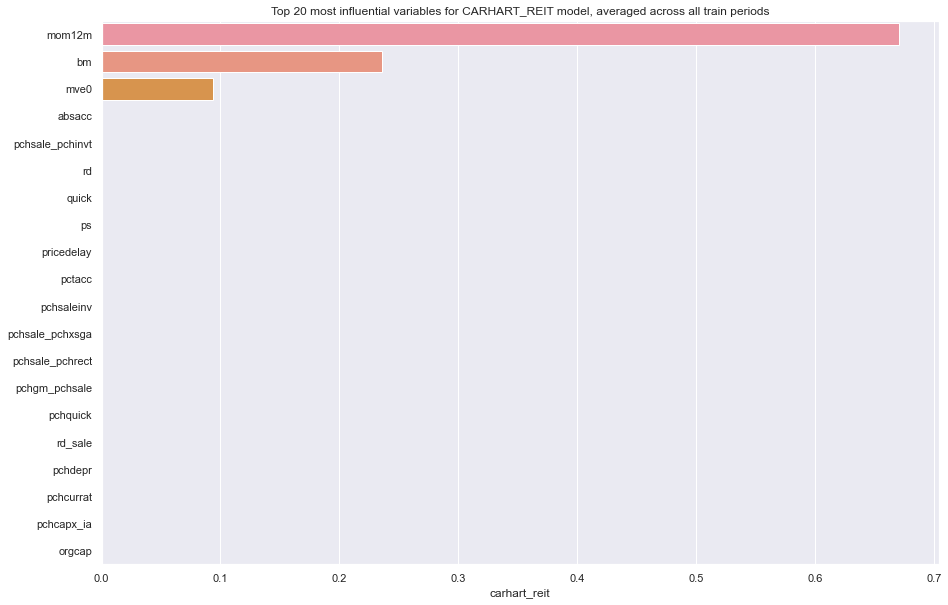

In [161]:
# Plot features of importance
# Plot graph
df_top20 = df_impt.sort_values(by=[model_name], ascending = False).head(20)
plt.figure(figsize=(15,10))
plt.title(f'Top 20 most influential variables for {model_name.upper()} model, averaged across all train periods')
sns.barplot(data = df_top20, x = model_name, y = df_top20.index);


Not surprisingly, the momentum factor overwhelms the value and size factors in importance.

## Huber regression
A linear regression model that is robust to outliers to deal with heavy tails commonly found in financial data.
The Huber Regressor optimizes the squared loss for the samples where `|(y - X'w) / sigma| < epsilon` and the absolute loss for the samples where `|(y - X'w) / sigma| > epsilon`, where `w` and `sigma` are parameters to be optimized.

### REIT

In [211]:
df_results_reit = df_results_reit[:4]

In [212]:
def model_configs():
    # define scope of configs
    n_epsilon = [1.1, 1.35, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6, 7, 8, 9]
    n_alpha = [0.0001]
    # create configs
    configs = []
    for i in n_epsilon:
        for j in n_alpha:
            cfg = [i,j]
            configs.append(cfg)
    print('Total configs (n_epsilon, n_alpha): %d' %len(configs))
    return configs

def model_fit(X_train, y_train, cfg):
    # unpack config
    n_epsilon, n_alpha = cfg
    model = HuberRegressor(
        epsilon = n_epsilon,
        alpha = n_alpha,
        max_iter = 2_000
    )
    model.fit(X_train, y_train)
    return model

def model_predict(model, X_validate):
    # make predictions
    y_pred = model.predict(X_validate)
    return y_pred

In [213]:
# Instantiate list of configurations
cfg_list = model_configs()

Total configs (n_epsilon, n_alpha): 15


In [214]:
%%time
# Create model name 
model_name = 'huber_reit'

# Create new row of test results
df_results_reit = pd.concat(
    [df_results_reit, pd.DataFrame([{'Model Name' : model_name,}])], 
    axis = 0
)

# Run grid search of hyperparameters
scores = grid_search(
    X = X_reit, 
    y = y_reit, 
    start_train = 1990, 
    start_val = 2001, 
    start_test = 2006, 
    cfg_list = cfg_list, 
    df_results = df_results_reit
)

# Print results
print ('Top 8 Configs')
print ('Config, R2_validate, RMSE_validate, R2_train, RMSE_train')
for cfg, r2_validate, rmse_validate, r2_train, rmse_train, in scores[:8]:
    print (f'{cfg}, {r2_validate:.2f}, {rmse_validate:.2f}, {r2_train:.2f}, {rmse_train:.2f}')

[1.1, 0.0001], 0.41, 10.24, 0.96, 10.40
[1.35, 0.0001], 0.54, 10.23, 1.07, 10.39
[1.5, 0.0001], 0.61, 10.23, 1.12, 10.39
[2.0, 0.0001], 0.83, 10.22, 1.28, 10.38
[2.5, 0.0001], 0.88, 10.21, 1.43, 10.37
[3.0, 0.0001], 0.90, 10.21, 1.58, 10.36
[3.5, 0.0001], 0.90, 10.21, 1.68, 10.36
[4.0, 0.0001], 0.88, 10.21, 1.76, 10.35
[4.5, 0.0001], 0.85, 10.21, 1.82, 10.35
[5.0, 0.0001], 0.83, 10.21, 1.86, 10.35
[5.5, 0.0001], 0.82, 10.22, 1.89, 10.35
[6, 0.0001], 0.80, 10.22, 1.92, 10.35
[7, 0.0001], 0.78, 10.22, 1.95, 10.34
[8, 0.0001], 0.77, 10.22, 1.97, 10.34
[9, 0.0001], 0.75, 10.22, 1.98, 10.34


Model Name   Selected Config Train (1990-2000) Validate (2001-2005)  \
0        naive_reit              N.A.      0.00 (10.45)         0.00 (10.26)   
0           lr_reit              N.A.       1.99 (10.3)          0.69 (10.2)   
0  fama-french_reit          bm, mve0       0.36 (10.4)          1.52 (10.2)   
0      carhart_reit  bm, mve0, mom12m       0.52 (10.4)          1.68 (10.2)   
0        huber_reit     [3.0, 0.0001]      1.58 (10.36)         0.90 (10.21)   

  Test (2006-2020)  Test (2006)    Test (2007)    Test (2008)    Test (2009)  \
0     0.00 (12.13)  0.00 (7.60)   0.00 (11.29)   0.00 (19.81)   0.00 (25.18)   
0    -0.03 (12.13)  4.17 (7.44)  -3.50 (11.48)  -0.55 (19.87)  -0.02 (25.19)   
0     0.17 (12.12)  3.84 (7.45)  -4.46 (11.54)  -1.84 (19.99)   0.64 (25.10)   
0     0.16 (12.12)  4.37 (7.43)  -3.46 (11.48)  -1.33 (19.94)   0.15 (25.16)   
0              NaN          NaN            NaN            NaN            NaN   

    Test (2010)    Test (2011)  Test (2012)  Test (2013)  Test (2014)  \
0  0.00 (12.47)   0.00 (10.08)  0.00 (9.46)  0.00 (9.44)  0.00 (7.04)   
0  1.79 (12.36)  -2.03 (10.19)  3.18 (9.31)  1.38 (9.37)  1.59 (6.99)   
0  2.03 (12.34)  -0.68 (10.12)  3.28 (9.31)  1.25 (9.38)  3.36 (6.92)   
0  2.04 (12.34)  -0.71 (10.12)  2.65 (9.34)  1.65 (9.36)  3.06 (6.93)   
0           NaN            NaN          NaN          NaN          NaN   

    Test (2015)  Test (2016)   Test (2017)   Test (2018)  Test (2019)  \
0   0.00 (7.47)  0.00 (9.09)   0.00 (7.08)   0.00 (8.03)  0.00 (8.37)   
0  -2.95 (7.58)  2.22 (8.98)  -1.00 (7.12)  -5.43 (8.25)  3.70 (8.21)   
0  -1.87 (7.54)  2.06 (8.99)   1.06 (7.05)  -2.57 (8.14)  3.50 (8.22)   
0  -1.88 (7.54)  1.71 (9.01)   0.85 (7.05)  -2.06 (8.12)  3.34 (8.23)   
0           NaN          NaN           NaN           NaN          NaN   

     Test (2020) Remarks  
0   0.00 (18.42)     NaN  
0  -0.21 (18.43)     NaN  
0  -0.05 (18.42)     NaN  
0  -0.13 (18.43)     NaN  
0            NaN     NaN

Top 8 Configs
Config, R2_validate, RMSE_validate, R2_train, RMSE_train
[3.0, 0.0001], 0.90, 10.21, 1.58, 10.36
[3.5, 0.0001], 0.90, 10.21, 1.68, 10.36
[4.0, 0.0001], 0.88, 10.21, 1.76, 10.35
[2.5, 0.0001], 0.88, 10.21, 1.43, 10.37
[4.5, 0.0001], 0.85, 10.21, 1.82, 10.35
[5.0, 0.0001], 0.83, 10.21, 1.86, 10.35
[2.0, 0.0001], 0.83, 10.22, 1.28, 10.38
[5.5, 0.0001], 0.82, 10.22, 1.89, 10.35
CPU times: user 50.2 s, sys: 27.4 s, total: 1min 17s
Wall time: 14.9 s


Top 8 Configs

Config, R2_validate, RMSE_validate, R2_train, RMSE_train

[3.0, 0.0001], 0.90, 10.21, 1.58, 10.36

[3.5, 0.0001], 0.90, 10.21, 1.68, 10.36

[4.0, 0.0001], 0.88, 10.21, 1.76, 10.35

[2.5, 0.0001], 0.88, 10.21, 1.43, 10.37

[4.5, 0.0001], 0.85, 10.21, 1.82, 10.35

[5.0, 0.0001], 0.83, 10.21, 1.86, 10.35

[2.0, 0.0001], 0.83, 10.22, 1.28, 10.38

[5.5, 0.0001], 0.82, 10.22, 1.89, 10.35

CPU times: user 1min 3s, sys: 18.3 s, total: 1min 21s

Wall time: 14.5 s

In [215]:
%%time
# Chosen configuration for model
selected_cfg = scores[0][0]

# Out-of-sample testing, no need to do validation after hyperparameters are selected
score = walk_forward(
    selected_cfg, 
    X = X_reit, 
    y = y_reit, 
    start_train = 1990, 
    start_val = 2006, # Set equal to start of test year, so that train year ends just before test year
    start_test = 2006,
    final_year_of_testing = 2020, 
    df_results = df_results_reit
)

print(f'On best performing config: {scores[0][0]}')

# Save df_results to .csv 
df_results_reit.to_csv('../data/df_results_reit.csv', index = False)

Test year 2006 done, R2 score is 3.50
Test year 2006 done, RMSE score is 7.47
Test year 2007 done, R2 score is -2.04
Test year 2007 done, RMSE score is 11.40
Test year 2008 done, R2 score is -0.24
Test year 2008 done, RMSE score is 19.84
Test year 2009 done, R2 score is -0.24
Test year 2009 done, RMSE score is 25.21
Test year 2010 done, R2 score is 0.25
Test year 2010 done, RMSE score is 12.45
Test year 2011 done, R2 score is -0.65
Test year 2011 done, RMSE score is 10.12
Test year 2012 done, R2 score is 1.09
Test year 2012 done, RMSE score is 9.41
Test year 2013 done, R2 score is 0.70
Test year 2013 done, RMSE score is 9.40
Test year 2014 done, R2 score is 2.18
Test year 2014 done, RMSE score is 6.96
Test year 2015 done, R2 score is -2.61
Test year 2015 done, RMSE score is 7.57
Test year 2016 done, R2 score is 1.41
Test year 2016 done, RMSE score is 9.02
Test year 2017 done, R2 score is -0.62
Test year 2017 done, RMSE score is 7.11
Test year 2018 done, R2 score is -2.98
Test year 2018

Model Name   Selected Config Train (1990-2000) Validate (2001-2005)  \
0        naive_reit              N.A.      0.00 (10.45)         0.00 (10.26)   
0           lr_reit              N.A.       1.99 (10.3)          0.69 (10.2)   
0  fama-french_reit          bm, mve0       0.36 (10.4)          1.52 (10.2)   
0      carhart_reit  bm, mve0, mom12m       0.52 (10.4)          1.68 (10.2)   
0        huber_reit     [3.0, 0.0001]      1.58 (10.36)         0.90 (10.21)   

  Test (2006-2020)  Test (2006)    Test (2007)    Test (2008)    Test (2009)  \
0     0.00 (12.13)  0.00 (7.60)   0.00 (11.29)   0.00 (19.81)   0.00 (25.18)   
0    -0.03 (12.13)  4.17 (7.44)  -3.50 (11.48)  -0.55 (19.87)  -0.02 (25.19)   
0     0.17 (12.12)  3.84 (7.45)  -4.46 (11.54)  -1.84 (19.99)   0.64 (25.10)   
0     0.16 (12.12)  4.37 (7.43)  -3.46 (11.48)  -1.33 (19.94)   0.15 (25.16)   
0    -0.07 (12.13)  3.50 (7.47)  -2.04 (11.40)  -0.24 (19.84)  -0.24 (25.21)   

    Test (2010)    Test (2011)  Test (2012)  Test (2013)  Test (2014)  \
0  0.00 (12.47)   0.00 (10.08)  0.00 (9.46)  0.00 (9.44)  0.00 (7.04)   
0  1.79 (12.36)  -2.03 (10.19)  3.18 (9.31)  1.38 (9.37)  1.59 (6.99)   
0  2.03 (12.34)  -0.68 (10.12)  3.28 (9.31)  1.25 (9.38)  3.36 (6.92)   
0  2.04 (12.34)  -0.71 (10.12)  2.65 (9.34)  1.65 (9.36)  3.06 (6.93)   
0  0.25 (12.45)  -0.65 (10.12)  1.09 (9.41)  0.70 (9.40)  2.18 (6.96)   

    Test (2015)  Test (2016)   Test (2017)   Test (2018)  Test (2019)  \
0   0.00 (7.47)  0.00 (9.09)   0.00 (7.08)   0.00 (8.03)  0.00 (8.37)   
0  -2.95 (7.58)  2.22 (8.98)  -1.00 (7.12)  -5.43 (8.25)  3.70 (8.21)   
0  -1.87 (7.54)  2.06 (8.99)   1.06 (7.05)  -2.57 (8.14)  3.50 (8.22)   
0  -1.88 (7.54)  1.71 (9.01)   0.85 (7.05)  -2.06 (8.12)  3.34 (8.23)   
0  -2.61 (7.57)  1.41 (9.02)  -0.62 (7.11)  -2.98 (8.15)  2.99 (8.24)   

     Test (2020) Remarks  
0   0.00 (18.42)     NaN  
0  -0.21 (18.43)     NaN  
0  -0.05 (18.42)     NaN  
0  -0.13 (18.43)     NaN  
0  -0.31 (18.44)     NaN


R2 for entire pooled test set, from 2006 to 2020, is -0.07.
RMSE for entire pooled test set, from 2006 to 2020, is 12.13.

On best performing config: [3.0, 0.0001]
CPU times: user 1min 15s, sys: 44.7 s, total: 1min 59s
Wall time: 23.8 s


R2 for entire pooled test set, from 2006 to 2020, is -0.07.

RMSE for entire pooled test set, from 2006 to 2020, is 12.13.

On best performing config: [3.0, 0.0001]

CPU times: user 1min 27s, sys: 35 s, total: 2min 2s

Wall time: 23.3 s

### Sample 1

In [216]:
df_results_sample1 = df_results_sample1[:4]

In [217]:
%%time
# Create model name 
model_name = 'huber_sample1'

# Create new row of test results
df_results_sample1 = pd.concat(
    [df_results_sample1, pd.DataFrame([{'Model Name' : model_name,}])], 
    axis = 0
)

# Run grid search of hyperparameters
scores = grid_search(
    X = X_1, 
    y = y_1, 
    start_train = 1990, 
    start_val = 2001, 
    start_test = 2006, 
    cfg_list = cfg_list, 
    df_results = df_results_sample1
)

# Print results
print ('Top 8 Configs')
print ('Config, R2_validate, RMSE_validate, R2_train, RMSE_train')
for cfg, r2_validate, rmse_validate, r2_train, rmse_train, in scores[:8]:
    print (f'{cfg}, {r2_validate:.2f}, {rmse_validate:.2f}, {r2_train:.2f}, {rmse_train:.2f}')

[1.1, 0.0001], -1.42, 19.14, -0.12, 20.89
[1.35, 0.0001], -1.48, 19.15, -0.05, 20.88
[1.5, 0.0001], -1.45, 19.14, 0.01, 20.88
[2.0, 0.0001], -1.09, 19.11, 0.38, 20.84
[2.5, 0.0001], -0.81, 19.08, 0.69, 20.81
[3.0, 0.0001], -0.62, 19.07, 0.91, 20.78
[3.5, 0.0001], -0.50, 19.05, 1.07, 20.77
[4.0, 0.0001], -0.40, 19.04, 1.20, 20.75
[4.5, 0.0001], -0.33, 19.04, 1.29, 20.74
[5.0, 0.0001], -0.28, 19.03, 1.36, 20.74
[5.5, 0.0001], -0.26, 19.03, 1.41, 20.73
[6, 0.0001], -0.24, 19.03, 1.45, 20.73
[7, 0.0001], -0.22, 19.03, 1.51, 20.72
[8, 0.0001], -0.21, 19.03, 1.54, 20.72
[9, 0.0001], -0.21, 19.03, 1.57, 20.71


Model Name   Selected Config Train (1990-2000)  \
0        naive_sample1              N.A.      0.00 (20.88)   
0           lr_sample1              N.A.       1.66 (20.7)   
0  fama-french_sample1          bm, mve0       0.21 (20.9)   
0      carhart_sample1  bm, mve0, mom12m       0.25 (20.9)   
0        huber_sample1       [9, 0.0001]      1.57 (20.71)   

  Validate (2001-2005) Test (2006-2020)    Test (2006)    Test (2007)  \
0         0.00 (19.01)     0.00 (15.77)   0.00 (14.72)   0.00 (12.19)   
0         -0.45 (19.0)    -0.49 (15.80)  -0.80 (14.78)  -4.28 (12.45)   
0          0.32 (19.0)     0.13 (15.76)   0.74 (14.66)  -1.74 (12.30)   
0          0.31 (19.0)     0.11 (15.76)   0.62 (14.67)  -1.56 (12.29)   
0        -0.21 (19.03)              NaN            NaN            NaN   

     Test (2008)   Test (2009)    Test (2010)    Test (2011)   Test (2012)  \
0   0.00 (20.06)  0.00 (24.51)   0.00 (15.28)   0.00 (13.93)  0.00 (12.77)   
0  -2.82 (20.35)  0.66 (24.43)  -0.84 (15.34)  -1.28 (14.02)  0.52 (12.74)   
0  -2.49 (20.31)  0.77 (24.41)   1.13 (15.19)  -0.88 (13.99)  0.74 (12.72)   
0  -2.28 (20.29)  0.56 (24.44)   0.90 (15.21)  -0.76 (13.99)  0.76 (12.72)   
0            NaN           NaN            NaN            NaN           NaN   

    Test (2013)    Test (2014)    Test (2015)    Test (2016)    Test (2017)  \
0  0.00 (12.20)   0.00 (11.34)   0.00 (14.08)   0.00 (16.07)   0.00 (12.67)   
0  2.52 (12.05)  -1.37 (11.42)  -1.45 (14.18)  -0.12 (16.08)  -0.16 (12.68)   
0  2.08 (12.07)   0.01 (11.34)  -0.61 (14.12)   0.67 (16.01)   0.91 (12.61)   
0  2.29 (12.06)   0.03 (11.34)  -0.50 (14.11)   0.57 (16.02)   0.70 (12.62)   
0           NaN            NaN            NaN            NaN            NaN   

     Test (2018)   Test (2019)   Test (2020) Remarks  
0   0.00 (13.97)  0.00 (15.38)  0.00 (22.31)     NaN  
0  -2.02 (14.11)  0.46 (15.34)  0.74 (22.23)     NaN  
0  -1.56 (14.08)  0.86 (15.31)  0.78 (22.22)     NaN  
0  -1.53 (14.08)  0.95 (15.31)  0.71 (22.23)     NaN  
0            NaN           NaN           NaN     NaN

Top 8 Configs
Config, R2_validate, RMSE_validate, R2_train, RMSE_train
[9, 0.0001], -0.21, 19.03, 1.57, 20.71
[8, 0.0001], -0.21, 19.03, 1.54, 20.72
[7, 0.0001], -0.22, 19.03, 1.51, 20.72
[6, 0.0001], -0.24, 19.03, 1.45, 20.73
[5.5, 0.0001], -0.26, 19.03, 1.41, 20.73
[5.0, 0.0001], -0.28, 19.03, 1.36, 20.74
[4.5, 0.0001], -0.33, 19.04, 1.29, 20.74
[4.0, 0.0001], -0.40, 19.04, 1.20, 20.75
CPU times: user 36.5 s, sys: 17.9 s, total: 54.4 s
Wall time: 10.3 s


Top 8 Configs

Config, R2_validate, RMSE_validate, R2_train, RMSE_train

[9, 0.0001], -0.21, 19.03, 1.57, 20.71

[8, 0.0001], -0.21, 19.03, 1.54, 20.72

[7, 0.0001], -0.22, 19.03, 1.51, 20.72

[6, 0.0001], -0.24, 19.03, 1.45, 20.73

[5.5, 0.0001], -0.26, 19.03, 1.41, 20.73

[5.0, 0.0001], -0.28, 19.03, 1.36, 20.74

[4.5, 0.0001], -0.33, 19.04, 1.29, 20.74

[4.0, 0.0001], -0.40, 19.04, 1.20, 20.75

CPU times: user 39.1 s, sys: 15.2 s, total: 54.3 s

Wall time: 10.2 s

In [218]:
%%time
# Chosen configuration for model
selected_cfg = scores[0][0]

# Out-of-sample testing, no need to do validation after hyperparameters are selected
score = walk_forward(
    selected_cfg, 
    X = X_1, 
    y = y_1, 
    start_train = 1990, 
    start_val = 2006, # Set equal to start of test year, so that train year ends just before test year
    start_test = 2006,
    final_year_of_testing = 2020, 
    df_results = df_results_sample1
)

print(f'On best performing config: {scores[0][0]}')

# Save df_results to .csv 
df_results_sample1.to_csv('../data/df_results_sample1.csv', index = False)

Test year 2006 done, R2 score is -0.52
Test year 2006 done, RMSE score is 14.76
Test year 2007 done, R2 score is -2.89
Test year 2007 done, RMSE score is 12.37
Test year 2008 done, R2 score is -2.15
Test year 2008 done, RMSE score is 20.28
Test year 2009 done, R2 score is 0.58
Test year 2009 done, RMSE score is 24.44
Test year 2010 done, R2 score is -0.76
Test year 2010 done, RMSE score is 15.34
Test year 2011 done, R2 score is -0.67
Test year 2011 done, RMSE score is 13.98
Test year 2012 done, R2 score is 0.54
Test year 2012 done, RMSE score is 12.73
Test year 2013 done, R2 score is 2.45
Test year 2013 done, RMSE score is 12.05
Test year 2014 done, R2 score is -0.60
Test year 2014 done, RMSE score is 11.37
Test year 2015 done, R2 score is -1.17
Test year 2015 done, RMSE score is 14.16
Test year 2016 done, R2 score is -0.11
Test year 2016 done, RMSE score is 16.07
Test year 2017 done, R2 score is 0.03
Test year 2017 done, RMSE score is 12.67
Test year 2018 done, R2 score is -1.50
Test 

Model Name   Selected Config Train (1990-2000)  \
0        naive_sample1              N.A.      0.00 (20.88)   
0           lr_sample1              N.A.       1.66 (20.7)   
0  fama-french_sample1          bm, mve0       0.21 (20.9)   
0      carhart_sample1  bm, mve0, mom12m       0.25 (20.9)   
0        huber_sample1       [9, 0.0001]      1.57 (20.71)   

  Validate (2001-2005) Test (2006-2020)    Test (2006)    Test (2007)  \
0         0.00 (19.01)     0.00 (15.77)   0.00 (14.72)   0.00 (12.19)   
0         -0.45 (19.0)    -0.49 (15.80)  -0.80 (14.78)  -4.28 (12.45)   
0          0.32 (19.0)     0.13 (15.76)   0.74 (14.66)  -1.74 (12.30)   
0          0.31 (19.0)     0.11 (15.76)   0.62 (14.67)  -1.56 (12.29)   
0        -0.21 (19.03)    -0.29 (15.79)  -0.52 (14.76)  -2.89 (12.37)   

     Test (2008)   Test (2009)    Test (2010)    Test (2011)   Test (2012)  \
0   0.00 (20.06)  0.00 (24.51)   0.00 (15.28)   0.00 (13.93)  0.00 (12.77)   
0  -2.82 (20.35)  0.66 (24.43)  -0.84 (15.34)  -1.28 (14.02)  0.52 (12.74)   
0  -2.49 (20.31)  0.77 (24.41)   1.13 (15.19)  -0.88 (13.99)  0.74 (12.72)   
0  -2.28 (20.29)  0.56 (24.44)   0.90 (15.21)  -0.76 (13.99)  0.76 (12.72)   
0  -2.15 (20.28)  0.58 (24.44)  -0.76 (15.34)  -0.67 (13.98)  0.54 (12.73)   

    Test (2013)    Test (2014)    Test (2015)    Test (2016)    Test (2017)  \
0  0.00 (12.20)   0.00 (11.34)   0.00 (14.08)   0.00 (16.07)   0.00 (12.67)   
0  2.52 (12.05)  -1.37 (11.42)  -1.45 (14.18)  -0.12 (16.08)  -0.16 (12.68)   
0  2.08 (12.07)   0.01 (11.34)  -0.61 (14.12)   0.67 (16.01)   0.91 (12.61)   
0  2.29 (12.06)   0.03 (11.34)  -0.50 (14.11)   0.57 (16.02)   0.70 (12.62)   
0  2.45 (12.05)  -0.60 (11.37)  -1.17 (14.16)  -0.11 (16.07)   0.03 (12.67)   

     Test (2018)   Test (2019)   Test (2020) Remarks  
0   0.00 (13.97)  0.00 (15.38)  0.00 (22.31)     NaN  
0  -2.02 (14.11)  0.46 (15.34)  0.74 (22.23)     NaN  
0  -1.56 (14.08)  0.86 (15.31)  0.78 (22.22)     NaN  
0  -1.53 (14.08)  0.95 (15.31)  0.71 (22.23)     NaN  
0  -1.50 (14.08)  0.44 (15.35)  0.50 (22.25)     NaN


R2 for entire pooled test set, from 2006 to 2020, is -0.29.
RMSE for entire pooled test set, from 2006 to 2020, is 15.79.

On best performing config: [9, 0.0001]
CPU times: user 1min 5s, sys: 33.2 s, total: 1min 39s
Wall time: 19.2 s


R2 for entire pooled test set, from 2006 to 2020, is -0.29.

RMSE for entire pooled test set, from 2006 to 2020, is 15.79.

On best performing config: [9, 0.0001]

CPU times: user 1min 13s, sys: 28 s, total: 1min 42s

Wall time: 18.9 s

### Sample 2

In [219]:
df_results_sample2 = df_results_sample2[:4]

In [220]:
%%time
# Create model name 
model_name = 'huber_sample2'

# Create new row of test results
df_results_sample2 = pd.concat(
    [df_results_sample2, pd.DataFrame([{'Model Name' : model_name,}])], 
    axis = 0
)

# Run grid search of hyperparameters
scores = grid_search(
    X = X_2, 
    y = y_2, 
    start_train = 1990, 
    start_val = 2001, 
    start_test = 2006, 
    cfg_list = cfg_list, 
    df_results = df_results_sample2
)

# Print results
print ('Top 8 Configs')
print ('Config, R2_validate, RMSE_validate, R2_train, RMSE_train')
for cfg, r2_validate, rmse_validate, r2_train, rmse_train, in scores[:8]:
    print (f'{cfg}, {r2_validate:.2f}, {rmse_validate:.2f}, {r2_train:.2f}, {rmse_train:.2f}')

[1.1, 0.0001], -0.97, 12.35, 0.39, 13.97
[1.35, 0.0001], -0.75, 12.33, 0.54, 13.96
[1.5, 0.0001], -0.57, 12.32, 0.66, 13.95
[2.0, 0.0001], -0.07, 12.29, 1.02, 13.93
[2.5, 0.0001], 0.23, 12.27, 1.25, 13.91
[3.0, 0.0001], 0.40, 12.26, 1.39, 13.90
[3.5, 0.0001], 0.50, 12.26, 1.52, 13.89
[4.0, 0.0001], 0.57, 12.25, 1.62, 13.89
[4.5, 0.0001], 0.62, 12.25, 1.70, 13.88
[5.0, 0.0001], 0.66, 12.25, 1.76, 13.88
[5.5, 0.0001], 0.69, 12.24, 1.81, 13.87
[6, 0.0001], 0.72, 12.24, 1.85, 13.87
[7, 0.0001], 0.76, 12.24, 1.92, 13.87
[8, 0.0001], 0.78, 12.24, 1.96, 13.86
[9, 0.0001], 0.79, 12.24, 1.99, 13.86


Model Name   Selected Config Train (1990-2000)  \
0        naive_sample2              N.A.      0.00 (14.00)   
0           lr_sample2              N.A.       2.18 (13.8)   
0  fama-french_sample2          bm, mve0       0.68 (14.0)   
0      carhart_sample2  bm, mve0, mom12m       0.68 (14.0)   
0        huber_sample2       [9, 0.0001]      1.99 (13.86)   

  Validate (2001-2005) Test (2006-2020)  Test (2006)   Test (2007)  \
0         0.00 (12.29)     0.00 (12.32)  0.00 (9.17)   0.00 (8.99)   
0          0.65 (12.2)     0.22 (12.30)  0.56 (9.15)  -3.53 (9.15)   
0          1.15 (12.2)     0.56 (12.28)  1.74 (9.09)  -2.06 (9.09)   
0          1.15 (12.2)     0.56 (12.28)  1.75 (9.09)  -2.06 (9.09)   
0         0.79 (12.24)              NaN          NaN           NaN   

     Test (2008)   Test (2009)   Test (2010)   Test (2011)   Test (2012)  \
0   0.00 (15.09)  0.00 (18.80)  0.00 (10.67)   0.00 (9.59)  0.00 (10.62)   
0  -5.27 (15.48)  3.25 (18.49)  1.21 (10.60)  -4.70 (9.81)  2.88 (10.47)   
0  -3.80 (15.37)  1.82 (18.63)  2.57 (10.53)  -1.08 (9.64)  2.10 (10.51)   
0  -3.80 (15.37)  1.83 (18.63)  2.62 (10.53)  -1.11 (9.64)  2.18 (10.51)   
0            NaN           NaN           NaN           NaN           NaN   

   Test (2013)   Test (2014)   Test (2015)   Test (2016)  Test (2017)  \
0  0.00 (8.43)  0.00 (15.25)   0.00 (9.36)  0.00 (11.29)  0.00 (8.75)   
0  5.29 (8.21)  0.65 (15.20)  -3.61 (9.53)  2.74 (11.14)  0.11 (8.74)   
0  5.79 (8.19)  0.51 (15.21)  -2.07 (9.46)  2.88 (11.13)  1.56 (8.68)   
0  5.61 (8.19)  0.56 (15.21)  -2.28 (9.47)  2.94 (11.13)  1.52 (8.68)   
0          NaN           NaN           NaN           NaN          NaN   

     Test (2018)   Test (2019)   Test (2020) Remarks  
0   0.00 (11.87)  0.00 (13.02)  0.00 (17.41)     NaN  
0  -4.01 (12.11)  2.07 (12.89)  1.33 (17.29)     NaN  
0  -2.41 (12.02)  1.93 (12.90)  0.87 (17.33)     NaN  
0  -2.44 (12.02)  1.93 (12.90)  0.87 (17.33)     NaN  
0            NaN           NaN           NaN     NaN

Top 8 Configs
Config, R2_validate, RMSE_validate, R2_train, RMSE_train
[9, 0.0001], 0.79, 12.24, 1.99, 13.86
[8, 0.0001], 0.78, 12.24, 1.96, 13.86
[7, 0.0001], 0.76, 12.24, 1.92, 13.87
[6, 0.0001], 0.72, 12.24, 1.85, 13.87
[5.5, 0.0001], 0.69, 12.24, 1.81, 13.87
[5.0, 0.0001], 0.66, 12.25, 1.76, 13.88
[4.5, 0.0001], 0.62, 12.25, 1.70, 13.88
[4.0, 0.0001], 0.57, 12.25, 1.62, 13.89
CPU times: user 57 s, sys: 24.3 s, total: 1min 21s
Wall time: 16.1 s


Top 8 Configs

Config, R2_validate, RMSE_validate, R2_train, RMSE_train

[9, 0.0001], 0.79, 12.24, 1.99, 13.86

[8, 0.0001], 0.78, 12.24, 1.96, 13.86

[7, 0.0001], 0.76, 12.24, 1.92, 13.87

[6, 0.0001], 0.72, 12.24, 1.85, 13.87

[5.5, 0.0001], 0.69, 12.24, 1.81, 13.87

[5.0, 0.0001], 0.66, 12.25, 1.76, 13.88

[4.5, 0.0001], 0.62, 12.25, 1.70, 13.88

[4.0, 0.0001], 0.57, 12.25, 1.62, 13.89

CPU times: user 1min 7s, sys: 17.3 s, total: 1min 25s

Wall time: 14.9 s

In [221]:
%%time
# Chosen configuration for model
selected_cfg = scores[0][0]

# Out-of-sample testing, no need to do validation after hyperparameters are selected
score = walk_forward(
    selected_cfg, 
    X = X_2, 
    y = y_2, 
    start_train = 1990, 
    start_val = 2006, # Set equal to start of test year, so that train year ends just before test year
    start_test = 2006,
    final_year_of_testing = 2020, 
    df_results = df_results_sample2
)

print(f'On best performing config: {scores[0][0]}')

# Save df_results to .csv 
df_results_sample2.to_csv('../data/df_results_sample2.csv', index = False)

Test year 2006 done, R2 score is 1.20
Test year 2006 done, RMSE score is 9.12
Test year 2007 done, R2 score is -3.22
Test year 2007 done, RMSE score is 9.14
Test year 2008 done, R2 score is -4.71
Test year 2008 done, RMSE score is 15.44
Test year 2009 done, R2 score is 2.82
Test year 2009 done, RMSE score is 18.53
Test year 2010 done, R2 score is 1.69
Test year 2010 done, RMSE score is 10.58
Test year 2011 done, R2 score is -3.78
Test year 2011 done, RMSE score is 9.77
Test year 2012 done, R2 score is 2.48
Test year 2012 done, RMSE score is 10.49
Test year 2013 done, R2 score is 6.14
Test year 2013 done, RMSE score is 8.17
Test year 2014 done, R2 score is 0.62
Test year 2014 done, RMSE score is 15.21
Test year 2015 done, R2 score is -2.53
Test year 2015 done, RMSE score is 9.48
Test year 2016 done, R2 score is 2.60
Test year 2016 done, RMSE score is 11.14
Test year 2017 done, R2 score is 0.80
Test year 2017 done, RMSE score is 8.71
Test year 2018 done, R2 score is -3.64
Test year 2018 

Model Name   Selected Config Train (1990-2000)  \
0        naive_sample2              N.A.      0.00 (14.00)   
0           lr_sample2              N.A.       2.18 (13.8)   
0  fama-french_sample2          bm, mve0       0.68 (14.0)   
0      carhart_sample2  bm, mve0, mom12m       0.68 (14.0)   
0        huber_sample2       [9, 0.0001]      1.99 (13.86)   

  Validate (2001-2005) Test (2006-2020)  Test (2006)   Test (2007)  \
0         0.00 (12.29)     0.00 (12.32)  0.00 (9.17)   0.00 (8.99)   
0          0.65 (12.2)     0.22 (12.30)  0.56 (9.15)  -3.53 (9.15)   
0          1.15 (12.2)     0.56 (12.28)  1.74 (9.09)  -2.06 (9.09)   
0          1.15 (12.2)     0.56 (12.28)  1.75 (9.09)  -2.06 (9.09)   
0         0.79 (12.24)     0.39 (12.29)  1.20 (9.12)  -3.22 (9.14)   

     Test (2008)   Test (2009)   Test (2010)   Test (2011)   Test (2012)  \
0   0.00 (15.09)  0.00 (18.80)  0.00 (10.67)   0.00 (9.59)  0.00 (10.62)   
0  -5.27 (15.48)  3.25 (18.49)  1.21 (10.60)  -4.70 (9.81)  2.88 (10.47)   
0  -3.80 (15.37)  1.82 (18.63)  2.57 (10.53)  -1.08 (9.64)  2.10 (10.51)   
0  -3.80 (15.37)  1.83 (18.63)  2.62 (10.53)  -1.11 (9.64)  2.18 (10.51)   
0  -4.71 (15.44)  2.82 (18.53)  1.69 (10.58)  -3.78 (9.77)  2.48 (10.49)   

   Test (2013)   Test (2014)   Test (2015)   Test (2016)  Test (2017)  \
0  0.00 (8.43)  0.00 (15.25)   0.00 (9.36)  0.00 (11.29)  0.00 (8.75)   
0  5.29 (8.21)  0.65 (15.20)  -3.61 (9.53)  2.74 (11.14)  0.11 (8.74)   
0  5.79 (8.19)  0.51 (15.21)  -2.07 (9.46)  2.88 (11.13)  1.56 (8.68)   
0  5.61 (8.19)  0.56 (15.21)  -2.28 (9.47)  2.94 (11.13)  1.52 (8.68)   
0  6.14 (8.17)  0.62 (15.21)  -2.53 (9.48)  2.60 (11.14)  0.80 (8.71)   

     Test (2018)   Test (2019)   Test (2020) Remarks  
0   0.00 (11.87)  0.00 (13.02)  0.00 (17.41)     NaN  
0  -4.01 (12.11)  2.07 (12.89)  1.33 (17.29)     NaN  
0  -2.41 (12.02)  1.93 (12.90)  0.87 (17.33)     NaN  
0  -2.44 (12.02)  1.93 (12.90)  0.87 (17.33)     NaN  
0  -3.64 (12.09)  2.18 (12.88)  1.24 (17.30)     NaN


R2 for entire pooled test set, from 2006 to 2020, is 0.39.
RMSE for entire pooled test set, from 2006 to 2020, is 12.29.

On best performing config: [9, 0.0001]
CPU times: user 1min 41s, sys: 40.2 s, total: 2min 21s
Wall time: 29.4 s


R2 for entire pooled test set, from 2006 to 2020, is 0.39.

RMSE for entire pooled test set, from 2006 to 2020, is 12.29.

On best performing config: [9, 0.0001]

CPU times: user 2min 5s, sys: 35.4 s, total: 2min 41s

Wall time: 28.6 s

### Compare results

In [222]:
# Compare results from 3 models
display(df_results_reit, df_results_sample1, df_results_sample2)

Model Name   Selected Config Train (1990-2000) Validate (2001-2005)  \
0        naive_reit              N.A.      0.00 (10.45)         0.00 (10.26)   
0           lr_reit              N.A.       1.99 (10.3)          0.69 (10.2)   
0  fama-french_reit          bm, mve0       0.36 (10.4)          1.52 (10.2)   
0      carhart_reit  bm, mve0, mom12m       0.52 (10.4)          1.68 (10.2)   
0        huber_reit     [3.0, 0.0001]      1.58 (10.36)         0.90 (10.21)   

  Test (2006-2020)  Test (2006)    Test (2007)    Test (2008)    Test (2009)  \
0     0.00 (12.13)  0.00 (7.60)   0.00 (11.29)   0.00 (19.81)   0.00 (25.18)   
0    -0.03 (12.13)  4.17 (7.44)  -3.50 (11.48)  -0.55 (19.87)  -0.02 (25.19)   
0     0.17 (12.12)  3.84 (7.45)  -4.46 (11.54)  -1.84 (19.99)   0.64 (25.10)   
0     0.16 (12.12)  4.37 (7.43)  -3.46 (11.48)  -1.33 (19.94)   0.15 (25.16)   
0    -0.07 (12.13)  3.50 (7.47)  -2.04 (11.40)  -0.24 (19.84)  -0.24 (25.21)   

    Test (2010)    Test (2011)  Test (2012)  Test (2013)  Test (2014)  \
0  0.00 (12.47)   0.00 (10.08)  0.00 (9.46)  0.00 (9.44)  0.00 (7.04)   
0  1.79 (12.36)  -2.03 (10.19)  3.18 (9.31)  1.38 (9.37)  1.59 (6.99)   
0  2.03 (12.34)  -0.68 (10.12)  3.28 (9.31)  1.25 (9.38)  3.36 (6.92)   
0  2.04 (12.34)  -0.71 (10.12)  2.65 (9.34)  1.65 (9.36)  3.06 (6.93)   
0  0.25 (12.45)  -0.65 (10.12)  1.09 (9.41)  0.70 (9.40)  2.18 (6.96)   

    Test (2015)  Test (2016)   Test (2017)   Test (2018)  Test (2019)  \
0   0.00 (7.47)  0.00 (9.09)   0.00 (7.08)   0.00 (8.03)  0.00 (8.37)   
0  -2.95 (7.58)  2.22 (8.98)  -1.00 (7.12)  -5.43 (8.25)  3.70 (8.21)   
0  -1.87 (7.54)  2.06 (8.99)   1.06 (7.05)  -2.57 (8.14)  3.50 (8.22)   
0  -1.88 (7.54)  1.71 (9.01)   0.85 (7.05)  -2.06 (8.12)  3.34 (8.23)   
0  -2.61 (7.57)  1.41 (9.02)  -0.62 (7.11)  -2.98 (8.15)  2.99 (8.24)   

     Test (2020) Remarks  
0   0.00 (18.42)     NaN  
0  -0.21 (18.43)     NaN  
0  -0.05 (18.42)     NaN  
0  -0.13 (18.43)     NaN  
0  -0.31 (18.44)     NaN

Model Name   Selected Config Train (1990-2000)  \
0        naive_sample1              N.A.      0.00 (20.88)   
0           lr_sample1              N.A.       1.66 (20.7)   
0  fama-french_sample1          bm, mve0       0.21 (20.9)   
0      carhart_sample1  bm, mve0, mom12m       0.25 (20.9)   
0        huber_sample1       [9, 0.0001]      1.57 (20.71)   

  Validate (2001-2005) Test (2006-2020)    Test (2006)    Test (2007)  \
0         0.00 (19.01)     0.00 (15.77)   0.00 (14.72)   0.00 (12.19)   
0         -0.45 (19.0)    -0.49 (15.80)  -0.80 (14.78)  -4.28 (12.45)   
0          0.32 (19.0)     0.13 (15.76)   0.74 (14.66)  -1.74 (12.30)   
0          0.31 (19.0)     0.11 (15.76)   0.62 (14.67)  -1.56 (12.29)   
0        -0.21 (19.03)    -0.29 (15.79)  -0.52 (14.76)  -2.89 (12.37)   

     Test (2008)   Test (2009)    Test (2010)    Test (2011)   Test (2012)  \
0   0.00 (20.06)  0.00 (24.51)   0.00 (15.28)   0.00 (13.93)  0.00 (12.77)   
0  -2.82 (20.35)  0.66 (24.43)  -0.84 (15.34)  -1.28 (14.02)  0.52 (12.74)   
0  -2.49 (20.31)  0.77 (24.41)   1.13 (15.19)  -0.88 (13.99)  0.74 (12.72)   
0  -2.28 (20.29)  0.56 (24.44)   0.90 (15.21)  -0.76 (13.99)  0.76 (12.72)   
0  -2.15 (20.28)  0.58 (24.44)  -0.76 (15.34)  -0.67 (13.98)  0.54 (12.73)   

    Test (2013)    Test (2014)    Test (2015)    Test (2016)    Test (2017)  \
0  0.00 (12.20)   0.00 (11.34)   0.00 (14.08)   0.00 (16.07)   0.00 (12.67)   
0  2.52 (12.05)  -1.37 (11.42)  -1.45 (14.18)  -0.12 (16.08)  -0.16 (12.68)   
0  2.08 (12.07)   0.01 (11.34)  -0.61 (14.12)   0.67 (16.01)   0.91 (12.61)   
0  2.29 (12.06)   0.03 (11.34)  -0.50 (14.11)   0.57 (16.02)   0.70 (12.62)   
0  2.45 (12.05)  -0.60 (11.37)  -1.17 (14.16)  -0.11 (16.07)   0.03 (12.67)   

     Test (2018)   Test (2019)   Test (2020) Remarks  
0   0.00 (13.97)  0.00 (15.38)  0.00 (22.31)     NaN  
0  -2.02 (14.11)  0.46 (15.34)  0.74 (22.23)     NaN  
0  -1.56 (14.08)  0.86 (15.31)  0.78 (22.22)     NaN  
0  -1.53 (14.08)  0.95 (15.31)  0.71 (22.23)     NaN  
0  -1.50 (14.08)  0.44 (15.35)  0.50 (22.25)     NaN

Model Name   Selected Config Train (1990-2000)  \
0        naive_sample2              N.A.      0.00 (14.00)   
0           lr_sample2              N.A.       2.18 (13.8)   
0  fama-french_sample2          bm, mve0       0.68 (14.0)   
0      carhart_sample2  bm, mve0, mom12m       0.68 (14.0)   
0        huber_sample2       [9, 0.0001]      1.99 (13.86)   

  Validate (2001-2005) Test (2006-2020)  Test (2006)   Test (2007)  \
0         0.00 (12.29)     0.00 (12.32)  0.00 (9.17)   0.00 (8.99)   
0          0.65 (12.2)     0.22 (12.30)  0.56 (9.15)  -3.53 (9.15)   
0          1.15 (12.2)     0.56 (12.28)  1.74 (9.09)  -2.06 (9.09)   
0          1.15 (12.2)     0.56 (12.28)  1.75 (9.09)  -2.06 (9.09)   
0         0.79 (12.24)     0.39 (12.29)  1.20 (9.12)  -3.22 (9.14)   

     Test (2008)   Test (2009)   Test (2010)   Test (2011)   Test (2012)  \
0   0.00 (15.09)  0.00 (18.80)  0.00 (10.67)   0.00 (9.59)  0.00 (10.62)   
0  -5.27 (15.48)  3.25 (18.49)  1.21 (10.60)  -4.70 (9.81)  2.88 (10.47)   
0  -3.80 (15.37)  1.82 (18.63)  2.57 (10.53)  -1.08 (9.64)  2.10 (10.51)   
0  -3.80 (15.37)  1.83 (18.63)  2.62 (10.53)  -1.11 (9.64)  2.18 (10.51)   
0  -4.71 (15.44)  2.82 (18.53)  1.69 (10.58)  -3.78 (9.77)  2.48 (10.49)   

   Test (2013)   Test (2014)   Test (2015)   Test (2016)  Test (2017)  \
0  0.00 (8.43)  0.00 (15.25)   0.00 (9.36)  0.00 (11.29)  0.00 (8.75)   
0  5.29 (8.21)  0.65 (15.20)  -3.61 (9.53)  2.74 (11.14)  0.11 (8.74)   
0  5.79 (8.19)  0.51 (15.21)  -2.07 (9.46)  2.88 (11.13)  1.56 (8.68)   
0  5.61 (8.19)  0.56 (15.21)  -2.28 (9.47)  2.94 (11.13)  1.52 (8.68)   
0  6.14 (8.17)  0.62 (15.21)  -2.53 (9.48)  2.60 (11.14)  0.80 (8.71)   

     Test (2018)   Test (2019)   Test (2020) Remarks  
0   0.00 (11.87)  0.00 (13.02)  0.00 (17.41)     NaN  
0  -4.01 (12.11)  2.07 (12.89)  1.33 (17.29)     NaN  
0  -2.41 (12.02)  1.93 (12.90)  0.87 (17.33)     NaN  
0  -2.44 (12.02)  1.93 (12.90)  0.87 (17.33)     NaN  
0  -3.64 (12.09)  2.18 (12.88)  1.24 (17.30)     NaN

### REIT - Features of importance

In [223]:
%%time
# Calculate "importance" by setting features to zero, one at a time

model_name = 'huber_reit'

df_impt = create_r2decrease(model_name, 
                            X = X_reit, 
                            y = y_reit, 
                            start_train = 1990, 
                            start_val = 2001,
                            start_test = 2006,
                            final_year_of_testing = 2020)

df_impt

CPU times: user 1min 56s, sys: 48.4 s, total: 2min 45s
Wall time: 32.5 s


2006      2007      2008      2009      2010      2011  \
absacc          -0.005485 -0.002429 -0.004070 -0.010620 -0.012053 -0.011263   
acc              0.003162  0.001265  0.000443 -0.002042  0.001937  0.003549   
aeavol           0.003790  0.003615  0.003649  0.001265 -0.001004  0.002583   
age             -0.001886 -0.000245  0.001332 -0.002714 -0.000550 -0.001352   
agr              0.015611  0.013468  0.019512  0.021869  0.023503  0.019508   
baspread         0.053997  0.082577  0.060275  0.054515  0.071803  0.086064   
beta             0.251655  0.204153  0.184152  0.491478  0.462224  0.417807   
betasq           0.073445  0.141939  0.188280  0.073887  0.077689  0.075079   
bm               0.021014  0.020209 -0.006355  0.000822  0.006032  0.005656   
bm_ia            0.032254  0.026675  0.030494  0.028398  0.028625  0.032052   
cash             0.006224  0.007867  0.012575  0.011120  0.007466  0.002950   
cashdebt        -0.008634 -0.007542 -0.005684 -0.008788 -0.009491 -0.010598   
cashpr           0.023894  0.031774  0.033228  0.023252  0.024269  0.013396   
cfp             -0.007152 -0.005925 -0.003777  0.010522  0.036057  0.030176   
cfp_ia           0.009858  0.014533  0.052870  0.058329  0.060203  0.044700   
chatoia          0.001158  0.000355  0.000823  0.002858  0.002076  0.001981   
chcsho          -0.001040 -0.002807 -0.003210 -0.003989 -0.006536 -0.006893   
chempia          0.029509  0.024516  0.017981  0.043799  0.053516  0.046327   
chinv           -0.003029 -0.005275 -0.008994 -0.013727 -0.015254 -0.011813   
chmom            0.350543  0.250593  0.263708  0.270528  0.321722  0.316117   
chpmia           0.012657  0.017336  0.020182  0.015861  0.015972  0.022970   
chtx            -0.003455  0.000107  0.000572  0.001448  0.000492  0.000060   
cinvest          0.002800  0.002125  0.000993  0.000327 -0.000046 -0.000137   
convind          0.040145  0.024131  0.012531 -0.018095 -0.008644  0.000109   
currat          -0.003028  0.010992 -0.001314  0.074916  0.220761  0.245223   
depr             0.007298  0.006854  0.006057  0.008271  0.005468  0.002658   
divi             0.000852 -0.000045  0.000653  0.003403  0.002539  0.001546   
divo             0.000773 -0.000810 -0.000197  0.011501  0.012376  0.013577   
dolvol           0.515948  0.553585  0.629506  0.632238  0.634149  0.552373   
dy               0.097837  0.079891  0.064438  0.063784  0.074998  0.079319   
ear             -0.010815 -0.009353 -0.004132  0.000485  0.002128  0.005757   
egr              0.029270  0.021780  0.038681  0.018942  0.015639  0.017978   
ep              -0.000199  0.001660  0.016826  0.048085  0.074087  0.081412   
gma             -0.026203 -0.015450 -0.021776 -0.008295 -0.003565  0.000411   
grcapx           0.012553  0.007459  0.001295  0.008230  0.004037  0.003783   
grltnoa         -0.004675 -0.003046  0.011542  0.009770  0.017525  0.016515   
herf             0.122401  0.121420  0.119231  0.129012  0.154299  0.171274   
hire             0.009324  0.009140  0.020229  0.018835  0.024531  0.026098   
idiovol         -0.000206 -0.012337 -0.009205 -0.068724 -0.023167 -0.030757   
ill              0.123538  0.080220  0.108910  0.114894  0.078941  0.068136   
indmom          -0.000186 -0.000224 -0.000003  0.001369  0.001625  0.001733   
invest           0.006756  0.003775  0.000768  0.003577  0.004609  0.005008   
lev             -0.002762 -0.009106 -0.035880 -0.050251 -0.035034 -0.020300   
lgr              0.000120 -0.000014  0.000115  0.000890  0.000899  0.001445   
maxret           0.341366  0.326629  0.384583  0.372017  0.377459  0.356561   
mom12m           0.010774  0.003888  0.001198  0.010159  0.035335  0.025533   
mom1m            0.145651  0.212115  0.250575  0.192728  0.195739  0.184964   
mom36m           0.037683  0.046293  0.038434  0.030855  0.038342  0.042434   
mom6m           -0.002933  0.049189  0.059494  0.113068  0.196660  0.244883   
ms              -0.005363 -0.002742  0.009274  0.007364  0.002629  0.00

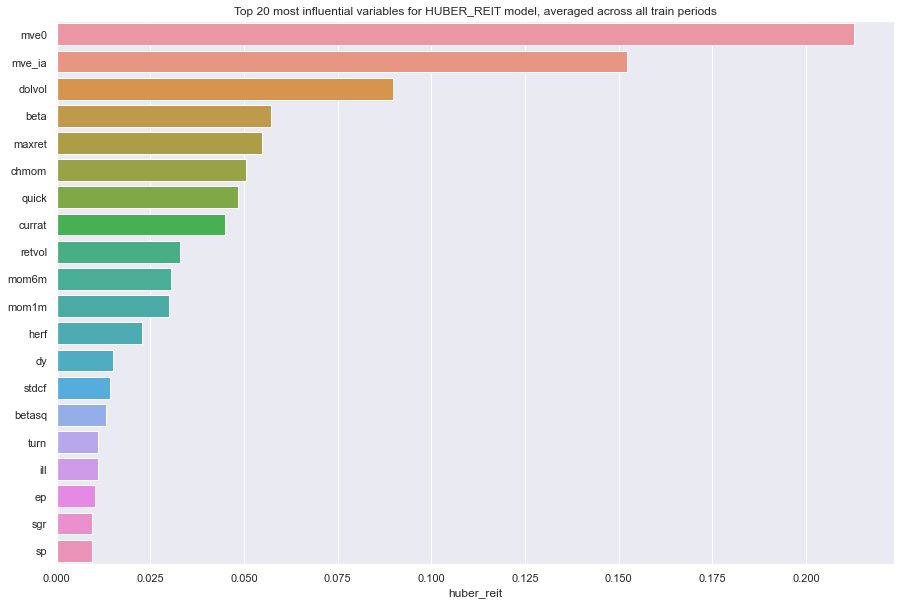

In [224]:
# Plot features of importance
# Plot graph
df_top20 = df_impt.sort_values(by=[model_name], ascending = False).head(20)
plt.figure(figsize=(15,10))
plt.title(f'Top 20 most influential variables for {model_name.upper()} model, averaged across all train periods')
sns.barplot(data = df_top20, x = model_name, y = df_top20.index);


In [225]:
# Merge df_temp to existing df_r2drecrease table

df_r2decrease_reit = pd.merge(
    left = df_r2decrease_reit,
    right = df_impt[model_name],
    how = 'left',
    left_index = True,
    right_index = True    
)

# Rank R2decrease table after including new model results
df_featurerank_reit = df_r2decrease_reit.rank() 
df_featurerank_reit['all_models'] = df_featurerank_reit.sum(axis=1)

# Display tables
display(df_r2decrease_reit)
display(df_featurerank_reit.sort_values('all_models', ascending = False))

# Save dfs to .csv 
df_r2decrease_reit.to_csv('../data/df_r2decrease_reit.csv', index = False)
df_featurerank_reit.to_csv('../data/df_featurerank_reit.csv', index = False)

lr_reit  huber_reit
absacc           0.000306   -0.001380
acc              0.001430   -0.000741
aeavol           0.000650    0.000668
age              0.000137   -0.000080
agr              0.000223    0.005201
baspread         0.007390    0.007871
beta             0.008894    0.057075
betasq           0.013997    0.013039
bm               0.001241    0.000853
bm_ia            0.002404    0.004776
cash             0.000161    0.000505
cashdebt         0.000128   -0.001187
cashpr           0.001257    0.002444
cfp              0.006021    0.006040
cfp_ia           0.001410    0.004166
chatoia          0.000082   -0.000040
chcsho           0.000206   -0.000878
chempia          0.001031    0.003782
chinv            0.000245   -0.000393
chmom            0.052654    0.050540
chpmia           0.002182    0.002565
chtx            -0.000017   -0.000019
cinvest          0.000038    0.000148
convind          0.000886    0.000794
currat           0.091179    0.044869
depr            -0.000063    0.000391
divi             0.000153    0.000328
divo             0.000145    0.000922
dolvol           0.052843    0.089712
dy               0.016294    0.015071
ear              0.000198    0.000341
egr              0.001280    0.002940
ep               0.001748    0.010111
gma              0.003155   -0.001219
grcapx           0.000474    0.000658
grltnoa          0.002414    0.001948
herf             0.023766    0.022687
hire             0.000198    0.002251
idiovol          0.000873   -0.000939
ill              0.005484    0.010939
indmom          -0.000049    0.000309
invest           0.000890    0.000858
lev             -0.000274   -0.002811
lgr              0.000145    0.000304
maxret           0.025620    0.054758
mom12m           0.004666    0.002331
mom1m            0.019050    0.030089
mom36m           0.004236    0.006796
mom6m            0.056381    0.030482
ms               0.000196    0.000743
mve0             0.200379    0.212738
mve_ia           0.116817    0.152169
nincr            0.000252   -0.000371
operprof         0.000132    0.000967
orgcap           0.000991    0.001224
pchcapx_ia      -0.000011   -0.000071
pchcurrat        0.000112    0.000514
pchdepr          0.000554    0.000439
pchgm_pchsale    0.000202   -0.000064
pchquick         0.000625    0.001025
pchsale_pchinvt  0.000186    0.000131
pchsale_pchrect  0.000089   -0.000019
pchsale_pchxsga  0.000135    0.000115
pchsaleinv       0.000625    0.000454
pctacc          -0.000073    0.000559
pricedelay       0.000046    0.000016
ps               0.000209   -0.000820
quick            0.092216    0.048346
rd               0.002045    0.002148
rd_mve          -0.000028    0.000720
rd_sale          0.004352    0.008158
realestate       0.000529    0.000465
retvol           0.122543    0.032896
roaq             0.001714    0.003428
roavol           0.002084    0.004414
roeq             0.000140   -0.000771
roic             0.000738   -0.001061
rsup             0.000917   -0.000297
salecash         0.000004   -0.000175
saleinv          0.002172    0.001593
salerec          0.000180    0.000069
secured         -0.000081   -0.000097
securedind      -0.001280   -0.001586
sgr              0.007542    0.009501
sin              0.000448   -0.000022
sp               0.001467    0.009344
std_dolvol       0.000407    0.001244
std_turn        -0.000153   -0.000175
stdacc           0.001575    0.003400
stdcf            0.002456    0.014137
tang             0.001592    0.001288
tb               0.000199    0.000451
turn             0.006597    0.010943
zerotrade        0.014397    0.002014

lr_reit  huber_reit  all_models
mve0                94.0        94.0       188.0
mve_ia              92.0        93.0       185.0
dolvol              88.0        92.0       180.0
retvol              93.0        86.0       179.0
quick               91.0        88.0       179.0
currat              90.0        87.0       177.0
chmom               87.0        89.0       176.0
maxret              86.0        90.0       176.0
mom6m               89.0        85.0       174.0
beta                80.0        91.0       171.0
mom1m               84.0        84.0       168.0
herf                85.0        83.0       168.0
dy                  83.0        82.0       165.0
betasq              81.0        80.0       161.0
turn                77.0        79.0       156.0
sgr                 79.0        76.0       155.0
ill                 75.0        78.0       153.0
stdcf               70.0        81.0       151.0
baspread            78.0        73.0       151.0
cfp                 76.0        71.0       147.0
rd_sale             73.0        74.0       147.0
mom36m              72.0        72.0       144.0
ep                  63.0        77.0       140.0
zerotrade           82.0        57.0       139.0
bm_ia               68.0        69.0       137.0
sp                  59.0        75.0       134.0
mom12m              74.0        60.0       134.0
roavol              65.0        68.0       133.0
chpmia              67.0        62.0       129.0
roaq                62.0        65.0       127.0
grltnoa             69.0        56.0       125.0
cfp_ia              57.0        67.0       124.0
stdacc              60.0        64.0       124.0
rd                  64.0        58.0       122.0
saleinv             66.0        55.0       121.0
egr                 56.0        63.0       119.0
chempia             53.0        66.0       119.0
cashpr              55.0        61.0       116.0
tang                61.0        54.0       115.0
agr                 35.0        70.0       105.0
orgcap              52.0        52.0       104.0
bm                  54.0        47.0       101.0
invest              50.0        48.0        98.0
convind             49.0        46.0        95.0
pchquick            44.0        51.0        95.0
std_dolvol          39.0        53.0        92.0
aeavol              46.0        43.0        89.0
hire                30.0        59.0        89.0
grcapx              41.0        42.0        83.0
pchsaleinv          45.0        37.0        82.0
realestate          42.0        38.0        80.0
pchdepr             43.0        35.0        78.0
gma                 71.0         4.0        75.0
ms                  28.0        45.0        73.0
divo                23.0        49.0        72.0
acc                 58.0        11.0        69.0
operprof            18.0        50.0        68.0
tb                  31.0        36.0        67.0
rsup                51.0        14.0        65.0
cash                25.0        39.0        64.0
sin                 40.0        22.0        62.0
ear                 29.0        33.0        62.0
pchcurrat           16.0        40.0        56.0
divi                24.0        32.0        56.0
pchsale_pchinvt     27.0        28.0        55.0
idiovol             48.0         7.0        55.0
roic                47.0         6.0        53.0
salerec             26.0        26.0        52.0
rd_mve               8.0        44.0        52.0
pchgm_pchsale       32.0        20.0        52.0
lgr                 22.0        30.0        52.0
nincr               37.0        13.0        50.0
chinv               36.0        12.0        48.0
pctacc               5.0        41.0        46.0
pchsale_pchxsga     19.0        27.0        46.0
ps                  34.0         9.0        43.0
cinvest             12.0        29.0        41.0
chcsho              33.0         8.0        41.0
absacc              38.0         3.0        41.0
depr                 6.0        34.0        40.0
pricedelay          13.0        25.0        38.0

## Ridge

### REIT

In [226]:
df_results_reit = df_results_reit[:5]

In [227]:
def model_configs():
    # define scope of configs
    n_alpha = np.logspace(-5, 5, 1000)
    # create configs
    configs = []
    for i in n_alpha:
        cfg = [i]
        configs.append(cfg)
    print('Total configs (n_alpha): %d' %len(configs))
    return configs

def model_fit(X_train, y_train, cfg):
    # unpack config
    n_alpha = cfg
    model = Ridge(
        alpha = n_alpha,
        max_iter = 2_000,
        random_state = 42
    )
    model.fit(X_train, y_train)
    return model

def model_predict(model, X_validate):
    # make predictions
    y_pred = model.predict(X_validate)
    return y_pred

In [228]:
# Instantiate list of configurations
cfg_list = model_configs()

Total configs (n_alpha): 1000


In [229]:
%%time
# Create model name 
model_name = 'ridge_reit'

# Create new row of test results
df_results_reit = pd.concat(
    [df_results_reit, pd.DataFrame([{'Model Name' : model_name,}])], 
    axis = 0
)

# Run grid search of hyperparameters
scores = grid_search(
    X = X_reit, 
    y = y_reit, 
    start_train = 1990, 
    start_val = 2001, 
    start_test = 2006, 
    cfg_list = cfg_list, 
    df_results = df_results_reit
)

# Print results
print ('Top 8 Configs')
print ('Config, R2_validate, RMSE_validate, R2_train, RMSE_train')
for cfg, r2_validate, rmse_validate, r2_train, rmse_train, in scores[:8]:
    print (f'{cfg}, {r2_validate:.2f}, {rmse_validate:.2f}, {r2_train:.2f}, {rmse_train:.2f}')

[1e-05], 0.69, 10.22, 1.99, 10.34
[1.0233165783302449e-05], 0.69, 10.22, 1.99, 10.34
[1.0471768194855202e-05], 0.69, 10.22, 1.99, 10.34
[1.0715933998226711e-05], 0.69, 10.22, 1.99, 10.34
[1.09657929126781e-05], 0.69, 10.22, 1.99, 10.34
[1.1221477682079803e-05], 0.69, 10.22, 1.99, 10.34
[1.148312414543511e-05], 0.69, 10.22, 1.99, 10.34
[1.1750871309048075e-05], 0.69, 10.22, 1.99, 10.34
[1.2024861420374123e-05], 0.69, 10.22, 1.99, 10.34
[1.2305240043592616e-05], 0.69, 10.22, 1.99, 10.34
[1.259215613694151e-05], 0.69, 10.22, 1.99, 10.34
[1.288576213185518e-05], 0.69, 10.22, 1.99, 10.34
[1.3186214013947486e-05], 0.69, 10.22, 1.99, 10.34
[1.3493671405883065e-05], 0.69, 10.22, 1.99, 10.34
[1.3808297652180924e-05], 0.69, 10.22, 1.99, 10.34
[1.4130259905995336e-05], 0.69, 10.22, 1.99, 10.34
[1.4459729217920196e-05], 0.69, 10.22, 1.99, 10.34
[1.4796880626863964e-05], 0.69, 10.22, 1.99, 10.34
[1.514189325304352e-05], 0.69, 10.22, 1.99, 10.34
[1.5494950393146317e-05], 0.69, 10.22, 1.99, 10.34
[1.

[0.00045884041264547613], 0.69, 10.22, 1.99, 10.34
[0.0004695390010680063], 0.69, 10.22, 1.99, 10.34
[0.0004804870439655134], 0.69, 10.22, 1.99, 10.34
[0.0004916903577628031], 0.69, 10.22, 1.99, 10.34
[0.0005031548945038057], 0.69, 10.22, 1.99, 10.34
[0.0005148867450137498], 0.69, 10.22, 1.99, 10.34
[0.0005268921421350677], 0.69, 10.22, 1.99, 10.34
[0.0005391774640387505], 0.69, 10.22, 1.99, 10.34
[0.0005517492376129129], 0.69, 10.22, 1.99, 10.34
[0.0005646141419303673], 0.69, 10.22, 1.99, 10.34
[0.0005777790117970507], 0.69, 10.22, 1.99, 10.34
[0.0005912508413831881], 0.69, 10.22, 1.99, 10.34
[0.0006050367879391225], 0.69, 10.22, 1.99, 10.34
[0.0006191441755977848], 0.69, 10.22, 1.99, 10.34
[0.0006335804992658254], 0.69, 10.22, 1.99, 10.34
[0.0006483534286054727], 0.69, 10.22, 1.99, 10.34
[0.0006634708121092351], 0.69, 10.22, 1.99, 10.34
[0.0006789406812696112], 0.69, 10.22, 1.99, 10.34
[0.000694771254846024], 0.69, 10.22, 1.99, 10.34
[0.0007109709432312439], 0.69, 10.22, 1.99, 10.34


[0.023086779941871697], 0.69, 10.22, 1.99, 10.34
[0.023625084654779475], 0.69, 10.22, 1.99, 10.34
[0.02417594079169131], 0.69, 10.22, 1.99, 10.34
[0.024739641008868142], 0.69, 10.22, 1.99, 10.34
[0.025316484786313556], 0.69, 10.22, 1.99, 10.34
[0.025906778586880088], 0.69, 10.22, 1.99, 10.34
[0.02651083601908539], 0.69, 10.22, 1.99, 10.34
[0.02712897800372467], 0.69, 10.22, 1.99, 10.34
[0.02776153294436801], 0.69, 10.22, 1.99, 10.34
[0.028408836901833042], 0.69, 10.22, 1.99, 10.34
[0.029071233772725785], 0.69, 10.22, 1.99, 10.34
[0.029749075472144407], 0.69, 10.22, 1.99, 10.34
[0.03044272212064303], 0.69, 10.22, 1.99, 10.34
[0.03115254223555488], 0.69, 10.22, 1.99, 10.34
[0.031878912926776456], 0.69, 10.22, 1.99, 10.34
[0.0326222200971167], 0.69, 10.22, 1.99, 10.34
[0.03338285864731761], 0.69, 10.22, 1.99, 10.34
[0.03416123268585528], 0.69, 10.22, 1.99, 10.34
[0.03495775574363275], 0.69, 10.22, 1.99, 10.34
[0.03577285099367873], 0.69, 10.22, 1.99, 10.34
[0.03660695147596903], 0.69, 10.

[1.46273335620113], 0.69, 10.22, 1.99, 10.34
[1.4968392930772556], 0.69, 10.22, 1.99, 10.34
[1.5317404637020797], 0.69, 10.22, 1.99, 10.34
[1.567455410205595], 0.69, 10.22, 1.99, 10.34
[1.60400310705682], 0.69, 10.22, 1.99, 10.34
[1.6414029711444664], 0.69, 10.22, 1.99, 10.34
[1.679674872092653], 0.69, 10.22, 1.99, 10.34
[1.7188391428171457], 0.69, 10.22, 1.99, 10.34
[1.7589165903277326], 0.70, 10.22, 1.99, 10.34
[1.7999285067824764], 0.70, 10.22, 1.99, 10.34
[1.8418966807997108], 0.70, 10.22, 1.99, 10.34
[1.8848434090337953], 0.70, 10.22, 1.99, 10.34
[1.9287915080207778], 0.70, 10.22, 1.99, 10.34
[1.9737643263002553], 0.70, 10.22, 1.99, 10.34
[2.0197857568198785], 0.70, 10.22, 1.99, 10.34
[2.066880249629082], 0.70, 10.22, 1.99, 10.34
[2.1150728248687947], 0.70, 10.22, 1.99, 10.34
[2.1643890860640203], 0.70, 10.22, 1.99, 10.34
[2.214855233726359], 0.70, 10.22, 1.99, 10.34
[2.266498079273693], 0.70, 10.22, 1.99, 10.34
[2.3193450592744274], 0.70, 10.22, 1.99, 10.34
[2.373424250023866], 0

[92.67593301146883], 0.91, 10.21, 1.98, 10.34
[94.83681866285927], 0.91, 10.21, 1.98, 10.34
[97.04808877380307], 0.91, 10.21, 1.98, 10.34
[99.310918137498], 0.92, 10.21, 1.98, 10.34
[101.62650893929951], 0.92, 10.21, 1.98, 10.34
[103.99609139541204], 0.92, 10.21, 1.98, 10.34
[106.42092440647247], 0.93, 10.21, 1.98, 10.34
[108.90229622637305], 0.93, 10.21, 1.98, 10.34
[111.44152514667881], 0.93, 10.21, 1.98, 10.34
[114.03996019700331], 0.94, 10.21, 1.98, 10.34
[116.69898186171474], 0.94, 10.21, 1.98, 10.34
[119.42000281335325], 0.94, 10.21, 1.98, 10.34
[122.20446866314887], 0.95, 10.21, 1.98, 10.34
[125.05385872903913], 0.95, 10.21, 1.97, 10.34
[127.96968682159417], 0.95, 10.21, 1.97, 10.34
[130.95350204826676], 0.96, 10.21, 1.97, 10.34
[134.00688963639507], 0.96, 10.21, 1.97, 10.34
[137.13147177539457], 0.96, 10.21, 1.97, 10.34
[140.32890847858732], 0.97, 10.21, 1.97, 10.34
[143.60089846512608], 0.97, 10.21, 1.97, 10.34
[146.94918006248173], 0.98, 10.21, 1.97, 10.34
[150.37553212997383

[5607.234882852038], 1.71, 10.17, 1.53, 10.37
[5737.976414214139], 1.71, 10.17, 1.53, 10.37
[5871.766390733262], 1.71, 10.17, 1.52, 10.37
[6008.675891719693], 1.72, 10.17, 1.51, 10.37
[6148.77765381003], 1.72, 10.17, 1.51, 10.37
[6292.14610961035], 1.72, 10.17, 1.50, 10.37
[6438.857427240426], 1.73, 10.17, 1.50, 10.37
[6588.989550799956], 1.73, 10.17, 1.49, 10.37
[6742.622241778349], 1.73, 10.17, 1.49, 10.37
[6899.837121430025], 1.73, 10.17, 1.48, 10.37
[7060.71771413778], 1.74, 10.17, 1.48, 10.37
[7225.349491787221], 1.74, 10.17, 1.47, 10.37
[7393.819919175873], 1.74, 10.17, 1.46, 10.37
[7566.218500481063], 1.75, 10.17, 1.46, 10.37
[7742.636826811277], 1.75, 10.17, 1.45, 10.37
[7923.168624866262], 1.75, 10.17, 1.45, 10.37
[8107.9098067316945], 1.75, 10.17, 1.44, 10.37
[8296.958520834914], 1.76, 10.17, 1.44, 10.37
[8490.415204088755], 1.76, 10.17, 1.43, 10.37
[8688.382635251193], 1.76, 10.17, 1.42, 10.37
[8890.965989529168], 1.77, 10.17, 1.42, 10.37
[9098.272894455567], 1.77, 10.17, 1.

Model Name       Selected Config Train (1990-2000)  \
0        naive_reit                  N.A.      0.00 (10.45)   
0           lr_reit                  N.A.       1.99 (10.3)   
0  fama-french_reit              bm, mve0       0.36 (10.4)   
0      carhart_reit      bm, mve0, mom12m       0.52 (10.4)   
0        huber_reit         [3.0, 0.0001]      1.58 (10.36)   
0        ridge_reit  [19920.457084538713]      1.19 (10.38)   

  Validate (2001-2005) Test (2006-2020)  Test (2006)    Test (2007)  \
0         0.00 (10.26)     0.00 (12.13)  0.00 (7.60)   0.00 (11.29)   
0          0.69 (10.2)    -0.03 (12.13)  4.17 (7.44)  -3.50 (11.48)   
0          1.52 (10.2)     0.17 (12.12)  3.84 (7.45)  -4.46 (11.54)   
0          1.68 (10.2)     0.16 (12.12)  4.37 (7.43)  -3.46 (11.48)   
0         0.90 (10.21)    -0.07 (12.13)  3.50 (7.47)  -2.04 (11.40)   
0         1.82 (10.16)              NaN          NaN            NaN   

     Test (2008)    Test (2009)   Test (2010)    Test (2011)  Test (2012)  \
0   0.00 (19.81)   0.00 (25.18)  0.00 (12.47)   0.00 (10.08)  0.00 (9.46)   
0  -0.55 (19.87)  -0.02 (25.19)  1.79 (12.36)  -2.03 (10.19)  3.18 (9.31)   
0  -1.84 (19.99)   0.64 (25.10)  2.03 (12.34)  -0.68 (10.12)  3.28 (9.31)   
0  -1.33 (19.94)   0.15 (25.16)  2.04 (12.34)  -0.71 (10.12)  2.65 (9.34)   
0  -0.24 (19.84)  -0.24 (25.21)  0.25 (12.45)  -0.65 (10.12)  1.09 (9.41)   
0            NaN            NaN           NaN            NaN          NaN   

   Test (2013)  Test (2014)   Test (2015)  Test (2016)   Test (2017)  \
0  0.00 (9.44)  0.00 (7.04)   0.00 (7.47)  0.00 (9.09)   0.00 (7.08)   
0  1.38 (9.37)  1.59 (6.99)  -2.95 (7.58)  2.22 (8.98)  -1.00 (7.12)   
0  1.25 (9.38)  3.36 (6.92)  -1.87 (7.54)  2.06 (8.99)   1.06 (7.05)   
0  1.65 (9.36)  3.06 (6.93)  -1.88 (7.54)  1.71 (9.01)   0.85 (7.05)   
0  0.70 (9.40)  2.18 (6.96)  -2.61 (7.57)  1.41 (9.02)  -0.62 (7.11)   
0          NaN          NaN           NaN          NaN           NaN   

    Test (2018)  Test (2019)    Test (2020) Remarks  
0   0.00 (8.03)  0.00 (8.37)   0.00 (18.42)     NaN  
0  -5.43 (8.25)  3.70 (8.21)  -0.21 (18.43)     NaN  
0  -2.57 (8.14)  3.50 (8.22)  -0.05 (18.42)     NaN  
0  -2.06 (8.12)  3.34 (8.23)  -0.13 (18.43)     NaN  
0  -2.98 (8.15)  2.99 (8.24)  -0.31 (18.44)     NaN  
0           NaN          NaN            NaN     NaN

Top 8 Configs
Config, R2_validate, RMSE_validate, R2_train, RMSE_train
[19920.457084538713], 1.82, 10.16, 1.19, 10.38
[20384.933982524642], 1.82, 10.16, 1.18, 10.38
[19466.563433422634], 1.82, 10.16, 1.19, 10.38
[20860.24089248505], 1.82, 10.16, 1.17, 10.38
[19023.01188668946], 1.82, 10.16, 1.20, 10.38
[21346.630333242454], 1.82, 10.16, 1.16, 10.39
[18589.56679635688], 1.81, 10.16, 1.21, 10.38
[21844.360711494282], 1.81, 10.16, 1.16, 10.39
CPU times: user 1min 14s, sys: 45.4 s, total: 1min 59s
Wall time: 28.6 s


Top 8 Configs

Config, R2_validate, RMSE_validate, R2_train, RMSE_train

[19920.457084538713], 1.82, 10.16, 1.19, 10.38

[20384.933982524642], 1.82, 10.16, 1.18, 10.38

[19466.563433422634], 1.82, 10.16, 1.19, 10.38

[20860.24089248505], 1.82, 10.16, 1.17, 10.38

[19023.01188668946], 1.82, 10.16, 1.20, 10.38


[21346.630333242454], 1.82, 10.16, 1.16, 10.39

[18589.56679635688], 1.81, 10.16, 1.21, 10.38

[21844.360711494282], 1.81, 10.16, 1.16, 10.39

CPU times: user 1min 14s, sys: 45.4 s, total: 1min 59s

Wall time: 28.6 s

In [230]:
%%time
# Chosen configuration for model
selected_cfg = scores[0][0]

# Out-of-sample testing, no need to do validation after hyperparameters are selected
score = walk_forward(
    selected_cfg, 
    X = X_reit, 
    y = y_reit, 
    start_train = 1990, 
    start_val = 2006, # Set equal to start of test year, so that train year ends just before test year
    start_test = 2006,
    final_year_of_testing = 2020, 
    df_results = df_results_reit
)

print(f'On best performing config: {scores[0][0]}')

# Save df_results to .csv 
df_results_reit.to_csv('../data/df_results_reit.csv', index = False)


Test year 2006 done, R2 score is 4.43
Test year 2006 done, RMSE score is 7.43
Test year 2007 done, R2 score is -3.65
Test year 2007 done, RMSE score is 11.49
Test year 2008 done, R2 score is -1.12
Test year 2008 done, RMSE score is 19.92
Test year 2009 done, R2 score is 0.16
Test year 2009 done, RMSE score is 25.16
Test year 2010 done, R2 score is 1.98
Test year 2010 done, RMSE score is 12.34
Test year 2011 done, R2 score is -1.29
Test year 2011 done, RMSE score is 10.15
Test year 2012 done, R2 score is 3.80
Test year 2012 done, RMSE score is 9.28
Test year 2013 done, R2 score is 1.91
Test year 2013 done, RMSE score is 9.35
Test year 2014 done, R2 score is 2.74
Test year 2014 done, RMSE score is 6.94
Test year 2015 done, R2 score is -1.82
Test year 2015 done, RMSE score is 7.54
Test year 2016 done, R2 score is 2.31
Test year 2016 done, RMSE score is 8.98
Test year 2017 done, R2 score is 0.49
Test year 2017 done, RMSE score is 7.07
Test year 2018 done, R2 score is -4.39
Test year 2018 d

Model Name       Selected Config Train (1990-2000)  \
0        naive_reit                  N.A.      0.00 (10.45)   
0           lr_reit                  N.A.       1.99 (10.3)   
0  fama-french_reit              bm, mve0       0.36 (10.4)   
0      carhart_reit      bm, mve0, mom12m       0.52 (10.4)   
0        huber_reit         [3.0, 0.0001]      1.58 (10.36)   
0        ridge_reit  [19920.457084538713]      1.19 (10.38)   

  Validate (2001-2005) Test (2006-2020)  Test (2006)    Test (2007)  \
0         0.00 (10.26)     0.00 (12.13)  0.00 (7.60)   0.00 (11.29)   
0          0.69 (10.2)    -0.03 (12.13)  4.17 (7.44)  -3.50 (11.48)   
0          1.52 (10.2)     0.17 (12.12)  3.84 (7.45)  -4.46 (11.54)   
0          1.68 (10.2)     0.16 (12.12)  4.37 (7.43)  -3.46 (11.48)   
0         0.90 (10.21)    -0.07 (12.13)  3.50 (7.47)  -2.04 (11.40)   
0         1.82 (10.16)     0.18 (12.12)  4.43 (7.43)  -3.65 (11.49)   

     Test (2008)    Test (2009)   Test (2010)    Test (2011)  Test (2012)  \
0   0.00 (19.81)   0.00 (25.18)  0.00 (12.47)   0.00 (10.08)  0.00 (9.46)   
0  -0.55 (19.87)  -0.02 (25.19)  1.79 (12.36)  -2.03 (10.19)  3.18 (9.31)   
0  -1.84 (19.99)   0.64 (25.10)  2.03 (12.34)  -0.68 (10.12)  3.28 (9.31)   
0  -1.33 (19.94)   0.15 (25.16)  2.04 (12.34)  -0.71 (10.12)  2.65 (9.34)   
0  -0.24 (19.84)  -0.24 (25.21)  0.25 (12.45)  -0.65 (10.12)  1.09 (9.41)   
0  -1.12 (19.92)   0.16 (25.16)  1.98 (12.34)  -1.29 (10.15)  3.80 (9.28)   

   Test (2013)  Test (2014)   Test (2015)  Test (2016)   Test (2017)  \
0  0.00 (9.44)  0.00 (7.04)   0.00 (7.47)  0.00 (9.09)   0.00 (7.08)   
0  1.38 (9.37)  1.59 (6.99)  -2.95 (7.58)  2.22 (8.98)  -1.00 (7.12)   
0  1.25 (9.38)  3.36 (6.92)  -1.87 (7.54)  2.06 (8.99)   1.06 (7.05)   
0  1.65 (9.36)  3.06 (6.93)  -1.88 (7.54)  1.71 (9.01)   0.85 (7.05)   
0  0.70 (9.40)  2.18 (6.96)  -2.61 (7.57)  1.41 (9.02)  -0.62 (7.11)   
0  1.91 (9.35)  2.74 (6.94)  -1.82 (7.54)  2.31 (8.98)   0.49 (7.07)   

    Test (2018)  Test (2019)    Test (2020) Remarks  
0   0.00 (8.03)  0.00 (8.37)   0.00 (18.42)     NaN  
0  -5.43 (8.25)  3.70 (8.21)  -0.21 (18.43)     NaN  
0  -2.57 (8.14)  3.50 (8.22)  -0.05 (18.42)     NaN  
0  -2.06 (8.12)  3.34 (8.23)  -0.13 (18.43)     NaN  
0  -2.98 (8.15)  2.99 (8.24)  -0.31 (18.44)     NaN  
0  -4.39 (8.21)  4.05 (8.20)  -0.13 (18.43)     NaN


R2 for entire pooled test set, from 2006 to 2020, is 0.18.
RMSE for entire pooled test set, from 2006 to 2020, is 12.12.

On best performing config: [19920.457084538713]
CPU times: user 1.35 s, sys: 1.65 s, total: 3 s
Wall time: 724 ms


R2 for entire pooled test set, from 2006 to 2020, is 0.18.

RMSE for entire pooled test set, from 2006 to 2020, is 12.12.

On best performing config: [19920.457084538713]

CPU times: user 1.35 s, sys: 1.65 s, total: 3 s

Wall time: 724 ms

### Sample 1

In [231]:
df_results_sample1 = df_results_sample1[:5]

In [232]:
%%time
# Create model name 
model_name = 'ridge_sample1'

# Create new row of test results
df_results_sample1 = pd.concat(
    [df_results_sample1, pd.DataFrame([{'Model Name' : model_name,}])], 
    axis = 0
)

# Run grid search of hyperparameters
scores = grid_search(
    X = X_1, 
    y = y_1, 
    start_train = 1990, 
    start_val = 2001, 
    start_test = 2006, 
    cfg_list = cfg_list, 
    df_results = df_results_sample1
)

# Print results
print ('Top 8 Configs')
print ('Config, R2_validate, RMSE_validate, R2_train, RMSE_train')
for cfg, r2_validate, rmse_validate, r2_train, rmse_train, in scores[:8]:
    print (f'{cfg}, {r2_validate:.2f}, {rmse_validate:.2f}, {r2_train:.2f}, {rmse_train:.2f}')

[1e-05], -0.45, 19.05, 1.66, 20.70
[1.0233165783302449e-05], -0.45, 19.05, 1.66, 20.70
[1.0471768194855202e-05], -0.45, 19.05, 1.66, 20.70
[1.0715933998226711e-05], -0.45, 19.05, 1.66, 20.70
[1.09657929126781e-05], -0.45, 19.05, 1.66, 20.70
[1.1221477682079803e-05], -0.45, 19.05, 1.66, 20.70
[1.148312414543511e-05], -0.45, 19.05, 1.66, 20.70
[1.1750871309048075e-05], -0.45, 19.05, 1.66, 20.70
[1.2024861420374123e-05], -0.45, 19.05, 1.66, 20.70
[1.2305240043592616e-05], -0.45, 19.05, 1.66, 20.70
[1.259215613694151e-05], -0.45, 19.05, 1.66, 20.70
[1.288576213185518e-05], -0.45, 19.05, 1.66, 20.70
[1.3186214013947486e-05], -0.45, 19.05, 1.66, 20.70
[1.3493671405883065e-05], -0.45, 19.05, 1.66, 20.70
[1.3808297652180924e-05], -0.45, 19.05, 1.66, 20.70
[1.4130259905995336e-05], -0.45, 19.05, 1.66, 20.70
[1.4459729217920196e-05], -0.45, 19.05, 1.66, 20.70
[1.4796880626863964e-05], -0.45, 19.05, 1.66, 20.70
[1.514189325304352e-05], -0.45, 19.05, 1.66, 20.70
[1.5494950393146317e-05], -0.45, 19

[0.00043816899315141946], -0.45, 19.05, 1.66, 20.70
[0.00044838559480211905], -0.45, 19.05, 1.66, 20.70
[0.00045884041264547613], -0.45, 19.05, 1.66, 20.70
[0.0004695390010680063], -0.45, 19.05, 1.66, 20.70
[0.0004804870439655134], -0.45, 19.05, 1.66, 20.70
[0.0004916903577628031], -0.45, 19.05, 1.66, 20.70
[0.0005031548945038057], -0.45, 19.05, 1.66, 20.70
[0.0005148867450137498], -0.45, 19.05, 1.66, 20.70
[0.0005268921421350677], -0.45, 19.05, 1.66, 20.70
[0.0005391774640387505], -0.45, 19.05, 1.66, 20.70
[0.0005517492376129129], -0.45, 19.05, 1.66, 20.70
[0.0005646141419303673], -0.45, 19.05, 1.66, 20.70
[0.0005777790117970507], -0.45, 19.05, 1.66, 20.70
[0.0005912508413831881], -0.45, 19.05, 1.66, 20.70
[0.0006050367879391225], -0.45, 19.05, 1.66, 20.70
[0.0006191441755977848], -0.45, 19.05, 1.66, 20.70
[0.0006335804992658254], -0.45, 19.05, 1.66, 20.70
[0.0006483534286054727], -0.45, 19.05, 1.66, 20.70
[0.0006634708121092351], -0.45, 19.05, 1.66, 20.70
[0.0006789406812696112], -0.

[0.021053452427667062], -0.45, 19.05, 1.66, 20.70
[0.021544346900318846], -0.45, 19.05, 1.66, 20.70
[0.0220466873523941], -0.45, 19.05, 1.66, 20.70
[0.022560740664968614], -0.45, 19.05, 1.66, 20.70
[0.023086779941871697], -0.45, 19.05, 1.66, 20.70
[0.023625084654779475], -0.45, 19.05, 1.66, 20.70
[0.02417594079169131], -0.45, 19.05, 1.66, 20.70
[0.024739641008868142], -0.45, 19.05, 1.66, 20.70
[0.025316484786313556], -0.45, 19.05, 1.66, 20.70
[0.025906778586880088], -0.45, 19.05, 1.66, 20.70
[0.02651083601908539], -0.45, 19.05, 1.66, 20.70
[0.02712897800372467], -0.45, 19.05, 1.66, 20.70
[0.02776153294436801], -0.45, 19.05, 1.66, 20.70
[0.028408836901833042], -0.45, 19.05, 1.66, 20.70
[0.029071233772725785], -0.45, 19.05, 1.66, 20.70
[0.029749075472144407], -0.45, 19.05, 1.66, 20.70
[0.03044272212064303], -0.45, 19.05, 1.66, 20.70
[0.03115254223555488], -0.45, 19.05, 1.66, 20.70
[0.031878912926776456], -0.45, 19.05, 1.66, 20.70
[0.0326222200971167], -0.45, 19.05, 1.66, 20.70
[0.0333828

[1.05931476351837], -0.45, 19.05, 1.66, 20.70
[1.0840143591783309], -0.45, 19.05, 1.66, 20.70
[1.1092898648952227], -0.45, 19.05, 1.66, 20.70
[1.135154708920999], -0.45, 19.05, 1.66, 20.70
[1.161622632608502], -0.45, 19.05, 1.66, 20.70
[1.1887076977119033], -0.45, 19.05, 1.66, 20.70
[1.216424293857368], -0.45, 19.05, 1.66, 20.70
[1.244787146187906], -0.45, 19.05, 1.66, 20.70
[1.2738113231864785], -0.45, 19.05, 1.66, 20.70
[1.3035122446815088], -0.45, 19.05, 1.66, 20.70
[1.3339056900390587], -0.45, 19.05, 1.66, 20.70
[1.3650078065460138], -0.45, 19.05, 1.66, 20.70
[1.3968351179887397], -0.45, 19.05, 1.66, 20.70
[1.429404533431761], -0.45, 19.05, 1.66, 20.70
[1.46273335620113], -0.45, 19.05, 1.66, 20.70
[1.4968392930772556], -0.45, 19.05, 1.66, 20.70
[1.5317404637020797], -0.45, 19.05, 1.66, 20.70
[1.567455410205595], -0.45, 19.05, 1.66, 20.70
[1.60400310705682], -0.45, 19.05, 1.66, 20.70
[1.6414029711444664], -0.45, 19.05, 1.66, 20.70
[1.679674872092653], -0.45, 19.05, 1.66, 20.70
[1.71

[61.204983724767025], -0.43, 19.05, 1.66, 20.70
[62.63207452198692], -0.43, 19.05, 1.66, 20.70
[64.09244019356457], -0.43, 19.05, 1.66, 20.70
[65.58685659571435], -0.42, 19.05, 1.66, 20.70
[67.11611767496287], -0.42, 19.05, 1.66, 20.70
[68.68103588995308], -0.42, 19.05, 1.66, 20.70
[70.28244264308353], -0.42, 19.05, 1.66, 20.70
[71.92118872221192], -0.42, 19.05, 1.66, 20.70
[73.59814475265772], -0.42, 19.05, 1.66, 20.70
[75.31420165974376], -0.42, 19.05, 1.66, 20.70
[77.07027114212303], -0.42, 19.05, 1.66, 20.70
[78.86728615614156], -0.42, 19.05, 1.66, 20.70
[80.70620141149507], -0.42, 19.05, 1.66, 20.70
[82.58799387844272], -0.42, 19.05, 1.66, 20.70
[84.51366330684722], -0.42, 19.05, 1.66, 20.70
[86.48423275731727], -0.42, 19.05, 1.66, 20.70
[88.50074914473439], -0.42, 19.05, 1.66, 20.70
[90.56428379445295], -0.42, 19.05, 1.66, 20.70
[92.67593301146883], -0.42, 19.05, 1.66, 20.70
[94.83681866285927], -0.42, 19.05, 1.66, 20.70
[97.04808877380307], -0.41, 19.05, 1.66, 20.70
[99.31091813

[3536.2955013550463], 0.07, 19.00, 1.56, 20.71
[3618.749812411284], 0.08, 19.00, 1.55, 20.71
[3703.1266758699308], 0.08, 19.00, 1.55, 20.71
[3789.4709190746717], 0.09, 19.00, 1.55, 20.72
[3877.8284145894613], 0.09, 19.00, 1.54, 20.72
[3968.246104569486], 0.10, 19.00, 1.54, 20.72
[4060.7720257003693], 0.11, 19.00, 1.54, 20.72
[4155.455334718879], 0.11, 19.00, 1.54, 20.72
[4252.346334528686], 0.12, 19.00, 1.53, 20.72
[4351.4965009250545], 0.12, 19.00, 1.53, 20.72
[4452.95850994266], 0.13, 18.99, 1.53, 20.72
[4556.786265841069], 0.14, 18.99, 1.52, 20.72
[4663.0349297427365], 0.14, 18.99, 1.52, 20.72
[4771.7609489387505], 0.15, 18.99, 1.52, 20.72
[4883.022086877885], 0.15, 18.99, 1.51, 20.72
[4996.877453854889], 0.16, 18.99, 1.51, 20.72
[5113.387538414331], 0.17, 18.99, 1.51, 20.72
[5232.614239486667], 0.17, 18.99, 1.50, 20.72
[5354.620899273613], 0.18, 18.99, 1.50, 20.72
[5479.472336900292], 0.19, 18.99, 1.50, 20.72
[5607.234882852038], 0.19, 18.99, 1.49, 20.72
[5737.976414214139], 0.20, 

Model Name      Selected Config Train (1990-2000)  \
0        naive_sample1                 N.A.      0.00 (20.88)   
0           lr_sample1                 N.A.       1.66 (20.7)   
0  fama-french_sample1             bm, mve0       0.21 (20.9)   
0      carhart_sample1     bm, mve0, mom12m       0.25 (20.9)   
0        huber_sample1          [9, 0.0001]      1.57 (20.71)   
0        ridge_sample1  [50084.07989848212]      0.86 (20.79)   

  Validate (2001-2005) Test (2006-2020)    Test (2006)    Test (2007)  \
0         0.00 (19.01)     0.00 (15.77)   0.00 (14.72)   0.00 (12.19)   
0         -0.45 (19.0)    -0.49 (15.80)  -0.80 (14.78)  -4.28 (12.45)   
0          0.32 (19.0)     0.13 (15.76)   0.74 (14.66)  -1.74 (12.30)   
0          0.31 (19.0)     0.11 (15.76)   0.62 (14.67)  -1.56 (12.29)   
0        -0.21 (19.03)    -0.29 (15.79)  -0.52 (14.76)  -2.89 (12.37)   
0         0.53 (18.96)              NaN            NaN            NaN   

     Test (2008)   Test (2009)    Test (2010)    Test (2011)   Test (2012)  \
0   0.00 (20.06)  0.00 (24.51)   0.00 (15.28)   0.00 (13.93)  0.00 (12.77)   
0  -2.82 (20.35)  0.66 (24.43)  -0.84 (15.34)  -1.28 (14.02)  0.52 (12.74)   
0  -2.49 (20.31)  0.77 (24.41)   1.13 (15.19)  -0.88 (13.99)  0.74 (12.72)   
0  -2.28 (20.29)  0.56 (24.44)   0.90 (15.21)  -0.76 (13.99)  0.76 (12.72)   
0  -2.15 (20.28)  0.58 (24.44)  -0.76 (15.34)  -0.67 (13.98)  0.54 (12.73)   
0            NaN           NaN            NaN            NaN           NaN   

    Test (2013)    Test (2014)    Test (2015)    Test (2016)    Test (2017)  \
0  0.00 (12.20)   0.00 (11.34)   0.00 (14.08)   0.00 (16.07)   0.00 (12.67)   
0  2.52 (12.05)  -1.37 (11.42)  -1.45 (14.18)  -0.12 (16.08)  -0.16 (12.68)   
0  2.08 (12.07)   0.01 (11.34)  -0.61 (14.12)   0.67 (16.01)   0.91 (12.61)   
0  2.29 (12.06)   0.03 (11.34)  -0.50 (14.11)   0.57 (16.02)   0.70 (12.62)   
0  2.45 (12.05)  -0.60 (11.37)  -1.17 (14.16)  -0.11 (16.07)   0.03 (12.67)   
0           NaN            NaN            NaN            NaN            NaN   

     Test (2018)   Test (2019)   Test (2020) Remarks  
0   0.00 (13.97)  0.00 (15.38)  0.00 (22.31)     NaN  
0  -2.02 (14.11)  0.46 (15.34)  0.74 (22.23)     NaN  
0  -1.56 (14.08)  0.86 (15.31)  0.78 (22.22)     NaN  
0  -1.53 (14.08)  0.95 (15.31)  0.71 (22.23)     NaN  
0  -1.50 (14.08)  0.44 (15.35)  0.50 (22.25)     NaN  
0            NaN           NaN           NaN     NaN

Top 8 Configs
Config, R2_validate, RMSE_validate, R2_train, RMSE_train
[50084.07989848212], 0.53, 18.96, 0.86, 20.79
[48942.898961145314], 0.53, 18.96, 0.87, 20.79
[51251.86927053333], 0.53, 18.96, 0.85, 20.79
[47827.72017727485], 0.53, 18.96, 0.88, 20.79
[52446.88749495119], 0.53, 18.96, 0.84, 20.79
[46737.951079924635], 0.53, 18.96, 0.89, 20.78
[53669.76945540476], 0.53, 18.96, 0.84, 20.79
[45673.01270168747], 0.53, 18.96, 0.89, 20.78
CPU times: user 1min 19s, sys: 44.5 s, total: 2min 4s
Wall time: 27.8 s


Top 8 Configs

Config, R2_validate, RMSE_validate, R2_train, RMSE_train

[50084.07989848212], 0.53, 18.96, 0.86, 20.79

[48942.898961145314], 0.53, 18.96, 0.87, 20.79

[51251.86927053333], 0.53, 18.96, 0.85, 20.79

[47827.72017727485], 0.53, 18.96, 0.88, 20.79

[52446.88749495119], 0.53, 18.96, 0.84, 20.79

[46737.951079924635], 0.53, 18.96, 0.89, 20.78

[53669.76945540476], 0.53, 18.96, 0.84, 20.79

[45673.01270168747], 0.53, 18.96, 0.89, 20.78

CPU times: user 1min 19s, sys: 44.5 s, total: 2min 4s

Wall time: 27.8 s

In [233]:
%%time
# Chosen configuration for model
selected_cfg = scores[0][0]

# Out-of-sample testing, no need to do validation after hyperparameters are selected
score = walk_forward(
    selected_cfg, 
    X = X_1, 
    y = y_1, 
    start_train = 1990, 
    start_val = 2006, # Set equal to start of test year, so that train year ends just before test year
    start_test = 2006,
    final_year_of_testing = 2020, 
    df_results = df_results_sample1
)

print(f'On best performing config: {scores[0][0]}')

# Save df_results to .csv 
df_results_sample1.to_csv('../data/df_results_sample1.csv', index = False)


Test year 2006 done, R2 score is 0.48
Test year 2006 done, RMSE score is 14.68
Test year 2007 done, R2 score is -2.36
Test year 2007 done, RMSE score is 12.34
Test year 2008 done, R2 score is -2.61
Test year 2008 done, RMSE score is 20.32
Test year 2009 done, R2 score is 0.86
Test year 2009 done, RMSE score is 24.40
Test year 2010 done, R2 score is 0.60
Test year 2010 done, RMSE score is 15.23
Test year 2011 done, R2 score is -0.88
Test year 2011 done, RMSE score is 13.99
Test year 2012 done, R2 score is 0.87
Test year 2012 done, RMSE score is 12.71
Test year 2013 done, R2 score is 2.81
Test year 2013 done, RMSE score is 12.03
Test year 2014 done, R2 score is -0.26
Test year 2014 done, RMSE score is 11.35
Test year 2015 done, R2 score is -0.64
Test year 2015 done, RMSE score is 14.12
Test year 2016 done, R2 score is 0.49
Test year 2016 done, RMSE score is 16.03
Test year 2017 done, R2 score is 0.37
Test year 2017 done, RMSE score is 12.64
Test year 2018 done, R2 score is -1.58
Test yea

Model Name      Selected Config Train (1990-2000)  \
0        naive_sample1                 N.A.      0.00 (20.88)   
0           lr_sample1                 N.A.       1.66 (20.7)   
0  fama-french_sample1             bm, mve0       0.21 (20.9)   
0      carhart_sample1     bm, mve0, mom12m       0.25 (20.9)   
0        huber_sample1          [9, 0.0001]      1.57 (20.71)   
0        ridge_sample1  [50084.07989848212]      0.86 (20.79)   

  Validate (2001-2005) Test (2006-2020)    Test (2006)    Test (2007)  \
0         0.00 (19.01)     0.00 (15.77)   0.00 (14.72)   0.00 (12.19)   
0         -0.45 (19.0)    -0.49 (15.80)  -0.80 (14.78)  -4.28 (12.45)   
0          0.32 (19.0)     0.13 (15.76)   0.74 (14.66)  -1.74 (12.30)   
0          0.31 (19.0)     0.11 (15.76)   0.62 (14.67)  -1.56 (12.29)   
0        -0.21 (19.03)    -0.29 (15.79)  -0.52 (14.76)  -2.89 (12.37)   
0         0.53 (18.96)     0.04 (15.76)   0.48 (14.68)  -2.36 (12.34)   

     Test (2008)   Test (2009)    Test (2010)    Test (2011)   Test (2012)  \
0   0.00 (20.06)  0.00 (24.51)   0.00 (15.28)   0.00 (13.93)  0.00 (12.77)   
0  -2.82 (20.35)  0.66 (24.43)  -0.84 (15.34)  -1.28 (14.02)  0.52 (12.74)   
0  -2.49 (20.31)  0.77 (24.41)   1.13 (15.19)  -0.88 (13.99)  0.74 (12.72)   
0  -2.28 (20.29)  0.56 (24.44)   0.90 (15.21)  -0.76 (13.99)  0.76 (12.72)   
0  -2.15 (20.28)  0.58 (24.44)  -0.76 (15.34)  -0.67 (13.98)  0.54 (12.73)   
0  -2.61 (20.32)  0.86 (24.40)   0.60 (15.23)  -0.88 (13.99)  0.87 (12.71)   

    Test (2013)    Test (2014)    Test (2015)    Test (2016)    Test (2017)  \
0  0.00 (12.20)   0.00 (11.34)   0.00 (14.08)   0.00 (16.07)   0.00 (12.67)   
0  2.52 (12.05)  -1.37 (11.42)  -1.45 (14.18)  -0.12 (16.08)  -0.16 (12.68)   
0  2.08 (12.07)   0.01 (11.34)  -0.61 (14.12)   0.67 (16.01)   0.91 (12.61)   
0  2.29 (12.06)   0.03 (11.34)  -0.50 (14.11)   0.57 (16.02)   0.70 (12.62)   
0  2.45 (12.05)  -0.60 (11.37)  -1.17 (14.16)  -0.11 (16.07)   0.03 (12.67)   
0  2.81 (12.03)  -0.26 (11.35)  -0.64 (14.12)   0.49 (16.03)   0.37 (12.64)   

     Test (2018)   Test (2019)   Test (2020) Remarks  
0   0.00 (13.97)  0.00 (15.38)  0.00 (22.31)     NaN  
0  -2.02 (14.11)  0.46 (15.34)  0.74 (22.23)     NaN  
0  -1.56 (14.08)  0.86 (15.31)  0.78 (22.22)     NaN  
0  -1.53 (14.08)  0.95 (15.31)  0.71 (22.23)     NaN  
0  -1.50 (14.08)  0.44 (15.35)  0.50 (22.25)     NaN  
0  -1.58 (14.08)  0.82 (15.32)  0.76 (22.22)     NaN


R2 for entire pooled test set, from 2006 to 2020, is 0.04.
RMSE for entire pooled test set, from 2006 to 2020, is 15.76.

On best performing config: [50084.07989848212]
CPU times: user 1.29 s, sys: 1.74 s, total: 3.03 s
Wall time: 724 ms


R2 for entire pooled test set, from 2006 to 2020, is 0.04.

RMSE for entire pooled test set, from 2006 to 2020, is 15.76.

On best performing config: [50084.07989848212]

CPU times: user 1.29 s, sys: 1.74 s, total: 3.03 s

Wall time: 724 ms

### Sample 2

In [234]:
df_results_sample2 = df_results_sample2[:5]

In [235]:
%%time
# Create model name 
model_name = 'ridge_sample2'

# Create new row of test results
df_results_sample2 = pd.concat(
    [df_results_sample2, pd.DataFrame([{'Model Name' : model_name,}])], 
    axis = 0
)

# Run grid search of hyperparameters
scores = grid_search(
    X = X_2, 
    y = y_2, 
    start_train = 1990, 
    start_val = 2001, 
    start_test = 2006, 
    cfg_list = cfg_list, 
    df_results = df_results_sample2
)

# Print results
print ('Top 8 Configs')
print ('Config, R2_validate, RMSE_validate, R2_train, RMSE_train')
for cfg, r2_validate, rmse_validate, r2_train, rmse_train, in scores[:8]:
    print (f'{cfg}, {r2_validate:.2f}, {rmse_validate:.2f}, {r2_train:.2f}, {rmse_train:.2f}')

[1e-05], 0.65, 12.25, 2.18, 13.85
[1.0233165783302449e-05], 0.65, 12.25, 2.18, 13.85
[1.0471768194855202e-05], 0.65, 12.25, 2.18, 13.85
[1.0715933998226711e-05], 0.65, 12.25, 2.18, 13.85
[1.09657929126781e-05], 0.65, 12.25, 2.18, 13.85
[1.1221477682079803e-05], 0.65, 12.25, 2.18, 13.85
[1.148312414543511e-05], 0.65, 12.25, 2.18, 13.85
[1.1750871309048075e-05], 0.65, 12.25, 2.18, 13.85
[1.2024861420374123e-05], 0.65, 12.25, 2.18, 13.85
[1.2305240043592616e-05], 0.65, 12.25, 2.18, 13.85
[1.259215613694151e-05], 0.65, 12.25, 2.18, 13.85
[1.288576213185518e-05], 0.65, 12.25, 2.18, 13.85
[1.3186214013947486e-05], 0.65, 12.25, 2.18, 13.85
[1.3493671405883065e-05], 0.65, 12.25, 2.18, 13.85
[1.3808297652180924e-05], 0.65, 12.25, 2.18, 13.85
[1.4130259905995336e-05], 0.65, 12.25, 2.18, 13.85
[1.4459729217920196e-05], 0.65, 12.25, 2.18, 13.85
[1.4796880626863964e-05], 0.65, 12.25, 2.18, 13.85
[1.514189325304352e-05], 0.65, 12.25, 2.18, 13.85
[1.5494950393146317e-05], 0.65, 12.25, 2.18, 13.85
[1.

[0.00042818517986524155], 0.65, 12.25, 2.18, 13.85
[0.00043816899315141946], 0.65, 12.25, 2.18, 13.85
[0.00044838559480211905], 0.65, 12.25, 2.18, 13.85
[0.00045884041264547613], 0.65, 12.25, 2.18, 13.85
[0.0004695390010680063], 0.65, 12.25, 2.18, 13.85
[0.0004804870439655134], 0.65, 12.25, 2.18, 13.85
[0.0004916903577628031], 0.65, 12.25, 2.18, 13.85
[0.0005031548945038057], 0.65, 12.25, 2.18, 13.85
[0.0005148867450137498], 0.65, 12.25, 2.18, 13.85
[0.0005268921421350677], 0.65, 12.25, 2.18, 13.85
[0.0005391774640387505], 0.65, 12.25, 2.18, 13.85
[0.0005517492376129129], 0.65, 12.25, 2.18, 13.85
[0.0005646141419303673], 0.65, 12.25, 2.18, 13.85
[0.0005777790117970507], 0.65, 12.25, 2.18, 13.85
[0.0005912508413831881], 0.65, 12.25, 2.18, 13.85
[0.0006050367879391225], 0.65, 12.25, 2.18, 13.85
[0.0006191441755977848], 0.65, 12.25, 2.18, 13.85
[0.0006335804992658254], 0.65, 12.25, 2.18, 13.85
[0.0006483534286054727], 0.65, 12.25, 2.18, 13.85
[0.0006634708121092351], 0.65, 12.25, 2.18, 13

[0.022560740664968614], 0.65, 12.25, 2.18, 13.85
[0.023086779941871697], 0.65, 12.25, 2.18, 13.85
[0.023625084654779475], 0.65, 12.25, 2.18, 13.85
[0.02417594079169131], 0.65, 12.25, 2.18, 13.85
[0.024739641008868142], 0.65, 12.25, 2.18, 13.85
[0.025316484786313556], 0.65, 12.25, 2.18, 13.85
[0.025906778586880088], 0.65, 12.25, 2.18, 13.85
[0.02651083601908539], 0.65, 12.25, 2.18, 13.85
[0.02712897800372467], 0.65, 12.25, 2.18, 13.85
[0.02776153294436801], 0.65, 12.25, 2.18, 13.85
[0.028408836901833042], 0.65, 12.25, 2.18, 13.85
[0.029071233772725785], 0.65, 12.25, 2.18, 13.85
[0.029749075472144407], 0.65, 12.25, 2.18, 13.85
[0.03044272212064303], 0.65, 12.25, 2.18, 13.85
[0.03115254223555488], 0.65, 12.25, 2.18, 13.85
[0.031878912926776456], 0.65, 12.25, 2.18, 13.85
[0.0326222200971167], 0.65, 12.25, 2.18, 13.85
[0.03338285864731761], 0.65, 12.25, 2.18, 13.85
[0.03416123268585528], 0.65, 12.25, 2.18, 13.85
[0.03495775574363275], 0.65, 12.25, 2.18, 13.85
[0.03577285099367873], 0.65, 12

[1.3650078065460138], 0.65, 12.25, 2.18, 13.85
[1.3968351179887397], 0.65, 12.25, 2.18, 13.85
[1.429404533431761], 0.65, 12.25, 2.18, 13.85
[1.46273335620113], 0.65, 12.25, 2.18, 13.85
[1.4968392930772556], 0.65, 12.25, 2.18, 13.85
[1.5317404637020797], 0.65, 12.25, 2.18, 13.85
[1.567455410205595], 0.65, 12.25, 2.18, 13.85
[1.60400310705682], 0.65, 12.25, 2.18, 13.85
[1.6414029711444664], 0.65, 12.25, 2.18, 13.85
[1.679674872092653], 0.65, 12.25, 2.18, 13.85
[1.7188391428171457], 0.65, 12.25, 2.18, 13.85
[1.7589165903277326], 0.65, 12.25, 2.18, 13.85
[1.7999285067824764], 0.65, 12.25, 2.18, 13.85
[1.8418966807997108], 0.65, 12.25, 2.18, 13.85
[1.8848434090337953], 0.65, 12.25, 2.18, 13.85
[1.9287915080207778], 0.65, 12.25, 2.18, 13.85
[1.9737643263002553], 0.65, 12.25, 2.18, 13.85
[2.0197857568198785], 0.65, 12.25, 2.18, 13.85
[2.066880249629082], 0.65, 12.25, 2.18, 13.85
[2.1150728248687947], 0.65, 12.25, 2.18, 13.85
[2.1643890860640203], 0.65, 12.25, 2.18, 13.85
[2.214855233726359], 

[82.58799387844272], 0.67, 12.25, 2.18, 13.85
[84.51366330684722], 0.67, 12.25, 2.18, 13.85
[86.48423275731727], 0.68, 12.25, 2.18, 13.85
[88.50074914473439], 0.68, 12.25, 2.18, 13.85
[90.56428379445295], 0.68, 12.25, 2.18, 13.85
[92.67593301146883], 0.68, 12.25, 2.18, 13.85
[94.83681866285927], 0.68, 12.25, 2.18, 13.85
[97.04808877380307], 0.68, 12.25, 2.18, 13.85
[99.310918137498], 0.68, 12.25, 2.18, 13.85
[101.62650893929951], 0.68, 12.24, 2.18, 13.85
[103.99609139541204], 0.68, 12.24, 2.18, 13.85
[106.42092440647247], 0.68, 12.24, 2.18, 13.85
[108.90229622637305], 0.68, 12.24, 2.18, 13.85
[111.44152514667881], 0.68, 12.24, 2.18, 13.85
[114.03996019700331], 0.68, 12.24, 2.18, 13.85
[116.69898186171474], 0.68, 12.24, 2.18, 13.85
[119.42000281335325], 0.68, 12.24, 2.18, 13.85
[122.20446866314887], 0.69, 12.24, 2.18, 13.85
[125.05385872903913], 0.69, 12.24, 2.18, 13.85
[127.96968682159417], 0.69, 12.24, 2.18, 13.85
[130.95350204826676], 0.69, 12.24, 2.18, 13.85
[134.00688963639507], 0.

[5113.387538414331], 1.37, 12.20, 2.01, 13.86
[5232.614239486667], 1.37, 12.20, 2.01, 13.86
[5354.620899273613], 1.38, 12.20, 2.01, 13.86
[5479.472336900292], 1.39, 12.20, 2.00, 13.86
[5607.234882852038], 1.40, 12.20, 2.00, 13.86
[5737.976414214139], 1.41, 12.20, 1.99, 13.86
[5871.766390733262], 1.41, 12.20, 1.99, 13.86
[6008.675891719693], 1.42, 12.20, 1.99, 13.86
[6148.77765381003], 1.43, 12.20, 1.98, 13.86
[6292.14610961035], 1.44, 12.20, 1.98, 13.86
[6438.857427240426], 1.44, 12.20, 1.97, 13.86
[6588.989550799956], 1.45, 12.20, 1.97, 13.86
[6742.622241778349], 1.46, 12.20, 1.97, 13.86
[6899.837121430025], 1.47, 12.20, 1.96, 13.86
[7060.71771413778], 1.47, 12.20, 1.96, 13.86
[7225.349491787221], 1.48, 12.20, 1.95, 13.86
[7393.819919175873], 1.49, 12.20, 1.95, 13.86
[7566.218500481063], 1.50, 12.19, 1.94, 13.86
[7742.636826811277], 1.50, 12.19, 1.94, 13.86
[7923.168624866262], 1.51, 12.19, 1.93, 13.86
[8107.9098067316945], 1.52, 12.19, 1.93, 13.86
[8296.958520834914], 1.52, 12.19, 1.

Model Name      Selected Config Train (1990-2000)  \
0        naive_sample2                 N.A.      0.00 (14.00)   
0           lr_sample2                 N.A.       2.18 (13.8)   
0  fama-french_sample2             bm, mve0       0.68 (14.0)   
0      carhart_sample2     bm, mve0, mom12m       0.68 (14.0)   
0        huber_sample2          [9, 0.0001]      1.99 (13.86)   
0        ridge_sample2  [38867.76690892668]      1.49 (13.90)   

  Validate (2001-2005) Test (2006-2020)  Test (2006)   Test (2007)  \
0         0.00 (12.29)     0.00 (12.32)  0.00 (9.17)   0.00 (8.99)   
0          0.65 (12.2)     0.22 (12.30)  0.56 (9.15)  -3.53 (9.15)   
0          1.15 (12.2)     0.56 (12.28)  1.74 (9.09)  -2.06 (9.09)   
0          1.15 (12.2)     0.56 (12.28)  1.75 (9.09)  -2.06 (9.09)   
0         0.79 (12.24)     0.39 (12.29)  1.20 (9.12)  -3.22 (9.14)   
0         1.78 (12.18)              NaN          NaN           NaN   

     Test (2008)   Test (2009)   Test (2010)   Test (2011)   Test (2012)  \
0   0.00 (15.09)  0.00 (18.80)  0.00 (10.67)   0.00 (9.59)  0.00 (10.62)   
0  -5.27 (15.48)  3.25 (18.49)  1.21 (10.60)  -4.70 (9.81)  2.88 (10.47)   
0  -3.80 (15.37)  1.82 (18.63)  2.57 (10.53)  -1.08 (9.64)  2.10 (10.51)   
0  -3.80 (15.37)  1.83 (18.63)  2.62 (10.53)  -1.11 (9.64)  2.18 (10.51)   
0  -4.71 (15.44)  2.82 (18.53)  1.69 (10.58)  -3.78 (9.77)  2.48 (10.49)   
0            NaN           NaN           NaN           NaN           NaN   

   Test (2013)   Test (2014)   Test (2015)   Test (2016)  Test (2017)  \
0  0.00 (8.43)  0.00 (15.25)   0.00 (9.36)  0.00 (11.29)  0.00 (8.75)   
0  5.29 (8.21)  0.65 (15.20)  -3.61 (9.53)  2.74 (11.14)  0.11 (8.74)   
0  5.79 (8.19)  0.51 (15.21)  -2.07 (9.46)  2.88 (11.13)  1.56 (8.68)   
0  5.61 (8.19)  0.56 (15.21)  -2.28 (9.47)  2.94 (11.13)  1.52 (8.68)   
0  6.14 (8.17)  0.62 (15.21)  -2.53 (9.48)  2.60 (11.14)  0.80 (8.71)   
0          NaN           NaN           NaN           NaN          NaN   

     Test (2018)   Test (2019)   Test (2020) Remarks  
0   0.00 (11.87)  0.00 (13.02)  0.00 (17.41)     NaN  
0  -4.01 (12.11)  2.07 (12.89)  1.33 (17.29)     NaN  
0  -2.41 (12.02)  1.93 (12.90)  0.87 (17.33)     NaN  
0  -2.44 (12.02)  1.93 (12.90)  0.87 (17.33)     NaN  
0  -3.64 (12.09)  2.18 (12.88)  1.24 (17.30)     NaN  
0            NaN           NaN           NaN     NaN

Top 8 Configs
Config, R2_validate, RMSE_validate, R2_train, RMSE_train
[38867.76690892668], 1.78, 12.18, 1.49, 13.90
[37982.15306190736], 1.78, 12.18, 1.50, 13.90
[39774.03024058037], 1.78, 12.18, 1.48, 13.90
[37116.71819475767], 1.78, 12.18, 1.50, 13.89
[40701.42453219439], 1.78, 12.18, 1.47, 13.90
[36271.00252330648], 1.78, 12.18, 1.51, 13.89
[41650.44248545185], 1.78, 12.18, 1.47, 13.90
[42621.588290153246], 1.78, 12.18, 1.46, 13.90
CPU times: user 1min 30s, sys: 52.9 s, total: 2min 23s
Wall time: 29.8 s


Top 8 Configs

Config, R2_validate, RMSE_validate, R2_train, RMSE_train

[38867.76690892668], 1.78, 12.18, 1.49, 13.90

[37982.15306190736], 1.78, 12.18, 1.50, 13.90

[39774.03024058037], 1.78, 12.18, 1.48, 13.90

[37116.71819475767], 1.78, 12.18, 1.50, 13.89

[40701.42453219439], 1.78, 12.18, 1.47, 13.90

[36271.00252330648], 1.78, 12.18, 1.51, 13.89

[41650.44248545185], 1.78, 12.18, 1.47, 13.90

[42621.588290153246], 1.78, 12.18, 1.46, 13.90

CPU times: user 1min 30s, sys: 52.9 s, total: 2min 23s

Wall time: 29.8 s

In [236]:
%%time
# Chosen configuration for model
selected_cfg = scores[0][0]

# Out-of-sample testing, no need to do validation after hyperparameters are selected
score = walk_forward(
    selected_cfg, 
    X = X_2, 
    y = y_2, 
    start_train = 1990, 
    start_val = 2006, # Set equal to start of test year, so that train year ends just before test year
    start_test = 2006,
    final_year_of_testing = 2020, 
    df_results = df_results_sample2
)

print(f'On best performing config: {scores[0][0]}')

# Save df_results to .csv 
df_results_sample2.to_csv('../data/df_results_sample2.csv', index = False)


Test year 2006 done, R2 score is 1.89
Test year 2006 done, RMSE score is 9.08
Test year 2007 done, R2 score is -2.63
Test year 2007 done, RMSE score is 9.11
Test year 2008 done, R2 score is -4.47
Test year 2008 done, RMSE score is 15.42
Test year 2009 done, R2 score is 2.83
Test year 2009 done, RMSE score is 18.53
Test year 2010 done, R2 score is 2.35
Test year 2010 done, RMSE score is 10.54
Test year 2011 done, R2 score is -2.62
Test year 2011 done, RMSE score is 9.71
Test year 2012 done, R2 score is 3.15
Test year 2012 done, RMSE score is 10.45
Test year 2013 done, R2 score is 5.67
Test year 2013 done, RMSE score is 8.19
Test year 2014 done, R2 score is 1.03
Test year 2014 done, RMSE score is 15.17
Test year 2015 done, R2 score is -2.75
Test year 2015 done, RMSE score is 9.49
Test year 2016 done, R2 score is 3.02
Test year 2016 done, RMSE score is 11.12
Test year 2017 done, R2 score is 0.98
Test year 2017 done, RMSE score is 8.70
Test year 2018 done, R2 score is -3.01
Test year 2018 

Model Name      Selected Config Train (1990-2000)  \
0        naive_sample2                 N.A.      0.00 (14.00)   
0           lr_sample2                 N.A.       2.18 (13.8)   
0  fama-french_sample2             bm, mve0       0.68 (14.0)   
0      carhart_sample2     bm, mve0, mom12m       0.68 (14.0)   
0        huber_sample2          [9, 0.0001]      1.99 (13.86)   
0        ridge_sample2  [38867.76690892668]      1.49 (13.90)   

  Validate (2001-2005) Test (2006-2020)  Test (2006)   Test (2007)  \
0         0.00 (12.29)     0.00 (12.32)  0.00 (9.17)   0.00 (8.99)   
0          0.65 (12.2)     0.22 (12.30)  0.56 (9.15)  -3.53 (9.15)   
0          1.15 (12.2)     0.56 (12.28)  1.74 (9.09)  -2.06 (9.09)   
0          1.15 (12.2)     0.56 (12.28)  1.75 (9.09)  -2.06 (9.09)   
0         0.79 (12.24)     0.39 (12.29)  1.20 (9.12)  -3.22 (9.14)   
0         1.78 (12.18)     0.69 (12.27)  1.89 (9.08)  -2.63 (9.11)   

     Test (2008)   Test (2009)   Test (2010)   Test (2011)   Test (2012)  \
0   0.00 (15.09)  0.00 (18.80)  0.00 (10.67)   0.00 (9.59)  0.00 (10.62)   
0  -5.27 (15.48)  3.25 (18.49)  1.21 (10.60)  -4.70 (9.81)  2.88 (10.47)   
0  -3.80 (15.37)  1.82 (18.63)  2.57 (10.53)  -1.08 (9.64)  2.10 (10.51)   
0  -3.80 (15.37)  1.83 (18.63)  2.62 (10.53)  -1.11 (9.64)  2.18 (10.51)   
0  -4.71 (15.44)  2.82 (18.53)  1.69 (10.58)  -3.78 (9.77)  2.48 (10.49)   
0  -4.47 (15.42)  2.83 (18.53)  2.35 (10.54)  -2.62 (9.71)  3.15 (10.45)   

   Test (2013)   Test (2014)   Test (2015)   Test (2016)  Test (2017)  \
0  0.00 (8.43)  0.00 (15.25)   0.00 (9.36)  0.00 (11.29)  0.00 (8.75)   
0  5.29 (8.21)  0.65 (15.20)  -3.61 (9.53)  2.74 (11.14)  0.11 (8.74)   
0  5.79 (8.19)  0.51 (15.21)  -2.07 (9.46)  2.88 (11.13)  1.56 (8.68)   
0  5.61 (8.19)  0.56 (15.21)  -2.28 (9.47)  2.94 (11.13)  1.52 (8.68)   
0  6.14 (8.17)  0.62 (15.21)  -2.53 (9.48)  2.60 (11.14)  0.80 (8.71)   
0  5.67 (8.19)  1.03 (15.17)  -2.75 (9.49)  3.02 (11.12)  0.98 (8.70)   

     Test (2018)   Test (2019)   Test (2020) Remarks  
0   0.00 (11.87)  0.00 (13.02)  0.00 (17.41)     NaN  
0  -4.01 (12.11)  2.07 (12.89)  1.33 (17.29)     NaN  
0  -2.41 (12.02)  1.93 (12.90)  0.87 (17.33)     NaN  
0  -2.44 (12.02)  1.93 (12.90)  0.87 (17.33)     NaN  
0  -3.64 (12.09)  2.18 (12.88)  1.24 (17.30)     NaN  
0  -3.01 (12.05)  2.32 (12.87)  1.38 (17.29)     NaN


R2 for entire pooled test set, from 2006 to 2020, is 0.69.
RMSE for entire pooled test set, from 2006 to 2020, is 12.27.

On best performing config: [38867.76690892668]
CPU times: user 1.37 s, sys: 2.12 s, total: 3.49 s
Wall time: 812 ms


R2 for entire pooled test set, from 2006 to 2020, is 0.69.

RMSE for entire pooled test set, from 2006 to 2020, is 12.27.

On best performing config: [38867.76690892668]

CPU times: user 1.37 s, sys: 2.12 s, total: 3.49 s

Wall time: 812 ms

### Compare results

In [243]:
# Compare results from 3 models
display(df_results_reit[5:6], df_results_sample1[5:6], df_results_sample2[5:6])

Model Name       Selected Config Train (1990-2000) Validate (2001-2005)  \
0  ridge_reit  [19920.457084538713]      1.19 (10.38)         1.82 (10.16)   

  Test (2006-2020)  Test (2006)    Test (2007)    Test (2008)   Test (2009)  \
0     0.18 (12.12)  4.43 (7.43)  -3.65 (11.49)  -1.12 (19.92)  0.16 (25.16)   

    Test (2010)    Test (2011)  Test (2012)  Test (2013)  Test (2014)  \
0  1.98 (12.34)  -1.29 (10.15)  3.80 (9.28)  1.91 (9.35)  2.74 (6.94)   

    Test (2015)  Test (2016)  Test (2017)   Test (2018)  Test (2019)  \
0  -1.82 (7.54)  2.31 (8.98)  0.49 (7.07)  -4.39 (8.21)  4.05 (8.20)   

     Test (2020) Remarks  
0  -0.13 (18.43)     NaN

Model Name      Selected Config Train (1990-2000) Validate (2001-2005)  \
0  ridge_sample1  [50084.07989848212]      0.86 (20.79)         0.53 (18.96)   

  Test (2006-2020)   Test (2006)    Test (2007)    Test (2008)   Test (2009)  \
0     0.04 (15.76)  0.48 (14.68)  -2.36 (12.34)  -2.61 (20.32)  0.86 (24.40)   

    Test (2010)    Test (2011)   Test (2012)   Test (2013)    Test (2014)  \
0  0.60 (15.23)  -0.88 (13.99)  0.87 (12.71)  2.81 (12.03)  -0.26 (11.35)   

     Test (2015)   Test (2016)   Test (2017)    Test (2018)   Test (2019)  \
0  -0.64 (14.12)  0.49 (16.03)  0.37 (12.64)  -1.58 (14.08)  0.82 (15.32)   

    Test (2020) Remarks  
0  0.76 (22.22)     NaN

Model Name      Selected Config Train (1990-2000) Validate (2001-2005)  \
0  ridge_sample2  [38867.76690892668]      1.49 (13.90)         1.78 (12.18)   

  Test (2006-2020)  Test (2006)   Test (2007)    Test (2008)   Test (2009)  \
0     0.69 (12.27)  1.89 (9.08)  -2.63 (9.11)  -4.47 (15.42)  2.83 (18.53)   

    Test (2010)   Test (2011)   Test (2012)  Test (2013)   Test (2014)  \
0  2.35 (10.54)  -2.62 (9.71)  3.15 (10.45)  5.67 (8.19)  1.03 (15.17)   

    Test (2015)   Test (2016)  Test (2017)    Test (2018)   Test (2019)  \
0  -2.75 (9.49)  3.02 (11.12)  0.98 (8.70)  -3.01 (12.05)  2.32 (12.87)   

    Test (2020) Remarks  
0  1.38 (17.29)     NaN

### REIT - Features of importance

In [244]:
%%time
# Calculate "importance" by setting features to zero, one at a time

model_name = 'ridge_reit'

df_impt = create_r2decrease(model_name, 
                            X = X_reit, 
                            y = y_reit, 
                            start_train = 1990, 
                            start_val = 2001,
                            start_test = 2006,
                            final_year_of_testing = 2020)

df_impt

CPU times: user 2min 8s, sys: 46.2 s, total: 2min 54s
Wall time: 32.1 s


2006      2007      2008      2009      2010      2011  \
absacc          -0.000298 -0.000544  0.003220  0.000816  0.000247 -0.000055   
acc              0.001965  0.002996  0.002712  0.000289  0.003588  0.005242   
aeavol           0.004715  0.004492  0.004854  0.003164  0.000948  0.003018   
age              0.002469  0.002729  0.003539  0.001340  0.003656  0.001400   
agr              0.000633 -0.000020  0.004192  0.005229  0.002094  0.001674   
baspread         0.000383  0.001256 -0.000260 -0.007149  0.008035  0.006570   
beta            -0.000142 -0.001256 -0.002375  0.001059  0.000031 -0.000201   
betasq           0.002667  0.008599  0.013222  0.000350  0.003082  0.001608   
bm               0.021882  0.033178  0.032261  0.049138  0.035588  0.026712   
bm_ia            0.013967  0.010968  0.011458  0.009725  0.005387  0.005555   
cash             0.005410  0.001958  0.006553  0.006503  0.003533  0.001918   
cashdebt         0.002698  0.002676  0.001049 -0.000575 -0.000246 -0.000048   
cashpr           0.006907  0.012235  0.014784  0.010704  0.008630  0.003656   
cfp              0.002593  0.005701  0.010041  0.004788 -0.006454 -0.006297   
cfp_ia           0.001683  0.004916  0.012885  0.007279 -0.007214 -0.006509   
chatoia          0.000539 -0.000173  0.000173  0.000118 -0.001255 -0.001666   
chcsho           0.004606  0.009152  0.014873  0.013324  0.007003  0.006471   
chempia          0.000628  0.000411 -0.000385  0.001030 -0.000074 -0.000460   
chinv            0.003239  0.001310 -0.000839 -0.000683 -0.000360  0.000134   
chmom            0.112309  0.081644  0.086792  0.080481  0.084737  0.087462   
chpmia           0.013047  0.013644  0.013885  0.010605  0.008506  0.012510   
chtx            -0.002478  0.000311  0.000962  0.001291  0.001238  0.000508   
cinvest          0.000763  0.000434 -0.000049 -0.000169 -0.000229 -0.000433   
convind          0.004313  0.003345  0.001868 -0.000247  0.000226  0.000158   
currat          -0.000202  0.000346 -0.000471 -0.003680 -0.004608 -0.003776   
depr             0.001441  0.000551  0.003890  0.007370  0.004999  0.002792   
divi            -0.000031 -0.000023 -0.000014  0.000152  0.000164  0.000078   
divo             0.000357  0.000101  0.000074  0.000841  0.000540  0.000544   
dolvol           0.006148  0.011778  0.022876  0.026808  0.023947  0.013417   
dy               0.081211  0.063967  0.053079  0.055200  0.068143  0.073632   
ear             -0.006036 -0.006480  0.000248  0.004602  0.007268  0.011290   
egr              0.001672  0.002271  0.010777  0.003592  0.004597  0.004806   
ep              -0.004919 -0.006254  0.000410  0.011547  0.007360  0.006142   
gma             -0.001765  0.000396 -0.000884  0.000713  0.003979  0.004955   
grcapx           0.000553  0.000141 -0.001286  0.000066 -0.000502 -0.000504   
grltnoa         -0.001073 -0.000565  0.003873  0.004813  0.006679  0.007219   
herf             0.018207  0.018237  0.015240  0.015366  0.022034  0.026791   
hire             0.001354  0.000911 -0.000095  0.001018  0.000125  0.000081   
idiovol          0.003312  0.006315  0.010951  0.017878  0.020175  0.013373   
ill              0.034865  0.024745  0.040722  0.045430  0.023528  0.018024   
indmom          -0.000082 -0.000270 -0.000150  0.000474 -0.001725 -0.000709   
invest           0.005307  0.002868 -0.001586  0.003166  0.002671  0.002703   
lev              0.001013  0.003933 -0.007372 -0.021123 -0.000147  0.001281   
lgr              0.000554  0.000368  0.000282 -0.000451 -0.000245 -0.000238   
maxret           0.013426  0.011986  0.010524 -0.010060 -0.000620  0.005505   
mom12m           0.044106  0.046582  0.059987  0.027901  0.032789  0.040174   
mom1m            0.126124  0.143974  0.146806  0.124591  0.145229  0.139254   
mom36m           0.020195  0.032193  0.027689  0.022050  0.025702  0.021937   
mom6m            0.002361  0.018728  0.022235  0.027423  0.050349  0.059360   
ms               0.001901  0.001577  0.006480  0.006131  0.003317  0.00

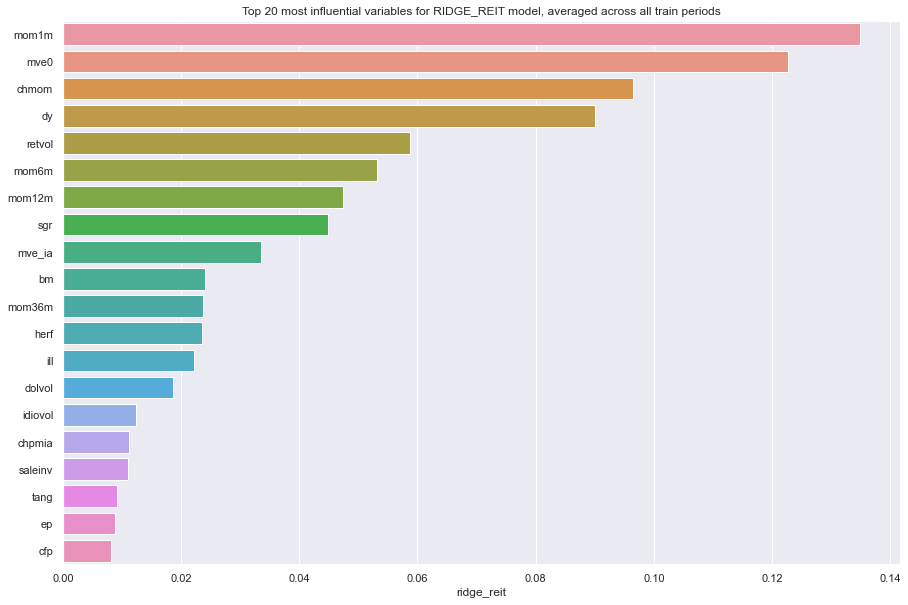

In [245]:
# Plot features of importance
# Plot graph
df_top20 = df_impt.sort_values(by=[model_name], ascending = False).head(20)
plt.figure(figsize=(15,10))
plt.title(f'Top 20 most influential variables for {model_name.upper()} model, averaged across all train periods')
sns.barplot(data = df_top20, x = model_name, y = df_top20.index);


In [246]:
# Merge df_temp to existing df_r2drecrease table

df_r2decrease_reit = pd.merge(
    left = df_r2decrease_reit,
    right = df_impt[model_name],
    how = 'left',
    left_index = True,
    right_index = True    
)

# Rank R2decrease table after including new model results
df_featurerank_reit = df_r2decrease_reit.rank() 
df_featurerank_reit['all_models'] = df_featurerank_reit.sum(axis=1)

# Display tables
display(df_r2decrease_reit)
display(df_featurerank_reit.sort_values('all_models', ascending = False))

# Save dfs to .csv 
df_r2decrease_reit.to_csv('../data/df_r2decrease_reit.csv', index = False)
df_featurerank_reit.to_csv('../data/df_featurerank_reit.csv', index = False)

lr_reit  huber_reit  ridge_reit
absacc           0.000306   -0.001380    0.000189
acc              0.001430   -0.000741    0.001779
aeavol           0.000650    0.000668    0.005239
age              0.000137   -0.000080    0.001680
agr              0.000223    0.005201    0.003357
baspread         0.007390    0.007871    0.000149
beta             0.008894    0.057075    0.000315
betasq           0.013997    0.013039    0.002645
bm               0.001241    0.000853    0.024032
bm_ia            0.002404    0.004776    0.007611
cash             0.000161    0.000505    0.003340
cashdebt         0.000128   -0.001187    0.000750
cashpr           0.001257    0.002444    0.004893
cfp              0.006021    0.006040    0.008196
cfp_ia           0.001410    0.004166    0.007417
chatoia          0.000082   -0.000040   -0.000983
chcsho           0.000206   -0.000878    0.005366
chempia          0.001031    0.003782   -0.000006
chinv            0.000245   -0.000393    0.000482
chmom            0.052654    0.050540    0.096469
chpmia           0.002182    0.002565    0.011188
chtx            -0.000017   -0.000019    0.000188
cinvest          0.000038    0.000148    0.000281
convind          0.000886    0.000794    0.000866
currat           0.091179    0.044869   -0.000742
depr            -0.000063    0.000391    0.001464
divi             0.000153    0.000328    0.000156
divo             0.000145    0.000922    0.000460
dolvol           0.052843    0.089712    0.018587
dy               0.016294    0.015071    0.090116
ear              0.000198    0.000341    0.007511
egr              0.001280    0.002940    0.004116
ep               0.001748    0.010111    0.008772
gma              0.003155   -0.001219    0.004361
grcapx           0.000474    0.000658   -0.000177
grltnoa          0.002414    0.001948    0.004432
herf             0.023766    0.022687    0.023490
hire             0.000198    0.002251    0.000338
idiovol          0.000873   -0.000939    0.012297
ill              0.005484    0.010939    0.022225
indmom          -0.000049    0.000309    0.000357
invest           0.000890    0.000858    0.002343
lev             -0.000274   -0.002811   -0.002411
lgr              0.000145    0.000304    0.000079
maxret           0.025620    0.054758    0.005975
mom12m           0.004666    0.002331    0.047325
mom1m            0.019050    0.030089    0.134880
mom36m           0.004236    0.006796    0.023669
mom6m            0.056381    0.030482    0.053236
ms               0.000196    0.000743    0.002229
mve0             0.200379    0.212738    0.122775
mve_ia           0.116817    0.152169    0.033515
nincr            0.000252   -0.000371    0.002870
operprof         0.000132    0.000967    0.000443
orgcap           0.000991    0.001224    0.000228
pchcapx_ia      -0.000011   -0.000071    0.000415
pchcurrat        0.000112    0.000514    0.000957
pchdepr          0.000554    0.000439    0.003785
pchgm_pchsale    0.000202   -0.000064    0.004470
pchquick         0.000625    0.001025    0.000423
pchsale_pchinvt  0.000186    0.000131    0.002732
pchsale_pchrect  0.000089   -0.000019   -0.000144
pchsale_pchxsga  0.000135    0.000115    0.000440
pchsaleinv       0.000625    0.000454    0.000290
pctacc          -0.000073    0.000559    0.000561
pricedelay       0.000046    0.000016    0.000143
ps               0.000209   -0.000820    0.001137
quick            0.092216    0.048346    0.000286
rd               0.002045    0.002148    0.000148
rd_mve          -0.000028    0.000720    0.002435
rd_sale          0.004352    0.008158    0.007853
realestate       0.000529    0.000465    0.002865
retvol           0.122543    0.032896    0.058741
roaq             0.001714    0.003428    0.006256
roavol           0.002084    0.004414    0.005853
roeq             0.000140   -0.000771    0.001037
roic             0.000738   -0.001061    0.006886
rsup             0.000917   -0.000297    0.002636
salecash         0.000004   -0.000175    0.000064
saleinv          0

lr_reit  huber_reit  ridge_reit  all_models
mve0                94.0        94.0        93.0       281.0
mve_ia              92.0        93.0        86.0       271.0
retvol              93.0        86.0        90.0       269.0
chmom               87.0        89.0        92.0       268.0
mom6m               89.0        85.0        89.0       263.0
mom1m               84.0        84.0        94.0       262.0
dolvol              88.0        92.0        81.0       261.0
dy                  83.0        82.0        91.0       256.0
herf                85.0        83.0        83.0       251.0
maxret              86.0        90.0        68.0       244.0
sgr                 79.0        76.0        87.0       242.0
ill                 75.0        78.0        82.0       235.0
mom36m              72.0        72.0        84.0       228.0
cfp                 76.0        71.0        75.0       222.0
mom12m              74.0        60.0        88.0       222.0
rd_sale             73.0        74.0        74.0       221.0
ep                  63.0        77.0        76.0       216.0
bm_ia               68.0        69.0        73.0       210.0
betasq              81.0        80.0        49.0       210.0
chpmia              67.0        62.0        79.0       208.0
quick               91.0        88.0        24.0       203.0
roavol              65.0        68.0        67.0       200.0
sp                  59.0        75.0        66.0       200.0
saleinv             66.0        55.0        78.0       199.0
beta                80.0        91.0        26.0       197.0
roaq                62.0        65.0        69.0       196.0
turn                77.0        79.0        40.0       196.0
cfp_ia              57.0        67.0        71.0       195.0
tang                61.0        54.0        77.0       192.0
zerotrade           82.0        57.0        50.0       189.0
bm                  54.0        47.0        85.0       186.0
grltnoa             69.0        56.0        60.0       185.0
currat              90.0        87.0         4.0       181.0
cashpr              55.0        61.0        62.0       178.0
egr                 56.0        63.0        58.0       177.0
baspread            78.0        73.0        18.0       169.0
agr                 35.0        70.0        55.0       160.0
stdcf               70.0        81.0         9.0       160.0
std_dolvol          39.0        53.0        63.0       155.0
aeavol              46.0        43.0        64.0       153.0
invest              50.0        48.0        46.0       144.0
stdacc              60.0        64.0        15.0       139.0
rd                  64.0        58.0        17.0       139.0
pchdepr             43.0        35.0        57.0       135.0
idiovol             48.0         7.0        80.0       135.0
ear                 29.0        33.0        72.0       134.0
gma                 71.0         4.0        59.0       134.0
convind             49.0        46.0        37.0       132.0
realestate          42.0        38.0        52.0       132.0
chempia             53.0        66.0        11.0       130.0
orgcap              52.0        52.0        22.0       126.0
pchquick            44.0        51.0        30.0       125.0
roic                47.0         6.0        70.0       123.0
cash                25.0        39.0        54.0       118.0
ms                  28.0        45.0        45.0       118.0
hire                30.0        59.0        27.0       116.0
rsup                51.0        14.0        48.0       113.0
pchgm_pchsale       32.0        20.0        61.0       113.0
acc                 58.0        11.0        44.0       113.0
salerec             26.0        26.0        56.0       108.0
pchsaleinv          45.0        37.0        25.0       107.0
pchsale_pchinvt     27.0        28.0        51.0       106.0
chcsho              33.0         8.0        65.0       106.0
divo                23.0        49.0        33.0       105.0
nincr               37.0        13.0        53.0    

## Lasso

### REIT

In [247]:
df_results_reit = df_results_reit[:6]

In [248]:
def model_configs():
    # define scope of configs
    n_alpha = np.logspace(-4, 0, 50)
    # create configs
    configs = []
    for i in n_alpha:
        cfg = [i]
        configs.append(cfg)
    print('Total configs (n_alpha): %d' %len(configs))
    return configs

def model_fit(X_train, y_train, cfg):
    # unpack config
    n_alpha = cfg
    model = Lasso(
        alpha = n_alpha,
        max_iter = 2_000,
        random_state = 42
    )
    model.fit(X_train, y_train)
    return model

def model_predict(model, X_validate):
    # make predictions
    y_pred = model.predict(X_validate)
    return y_pred

In [249]:
# Instantiate list of configurations
cfg_list = model_configs()

Total configs (n_alpha): 50


In [250]:
%%time
# Create model name 
model_name = 'lasso_reit'

# Create new row of test results
df_results_reit = pd.concat(
    [df_results_reit, pd.DataFrame([{'Model Name' : model_name,}])], 
    axis = 0
)

# Run grid search of hyperparameters
scores = grid_search(
    X = X_reit, 
    y = y_reit, 
    start_train = 1990, 
    start_val = 2001, 
    start_test = 2006, 
    cfg_list = cfg_list, 
    df_results = df_results_reit
)

# Print results
print ('Top 8 Configs')
print ('Config, R2_validate, RMSE_validate, R2_train, RMSE_train')
for cfg, r2_validate, rmse_validate, r2_train, rmse_train, in scores[:8]:
    print (f'{cfg}, {r2_validate:.2f}, {rmse_validate:.2f}, {r2_train:.2f}, {rmse_train:.2f}')

[0.0001], 0.70, 10.22, 1.99, 10.34
[0.00012067926406393288], 0.70, 10.22, 1.99, 10.34
[0.00014563484775012445], 0.70, 10.22, 1.99, 10.34
[0.00017575106248547912], 0.70, 10.22, 1.99, 10.34
[0.00021209508879201905], 0.71, 10.22, 1.99, 10.34
[0.0002559547922699536], 0.71, 10.22, 1.99, 10.34
[0.00030888435964774815], 0.72, 10.22, 1.99, 10.34
[0.0003727593720314938], 0.72, 10.22, 1.99, 10.34
[0.0004498432668969444], 0.73, 10.22, 1.99, 10.34
[0.0005428675439323859], 0.74, 10.22, 1.99, 10.34
[0.0006551285568595509], 0.75, 10.22, 1.99, 10.34
[0.0007906043210907702], 0.76, 10.22, 1.99, 10.34
[0.0009540954763499944], 0.78, 10.22, 1.99, 10.34
[0.0011513953993264468], 0.79, 10.22, 1.99, 10.34
[0.0013894954943731374], 0.81, 10.22, 1.99, 10.34
[0.0016768329368110067], 0.83, 10.22, 1.99, 10.34
[0.0020235896477251557], 0.85, 10.21, 1.99, 10.34
[0.0024420530945486497], 0.88, 10.21, 1.98, 10.34
[0.0029470517025518097], 0.91, 10.21, 1.98, 10.34
[0.0035564803062231283], 0.95, 10.21, 1.97, 10.34
[0.0042919

Model Name        Selected Config Train (1990-2000)  \
0        naive_reit                   N.A.      0.00 (10.45)   
0           lr_reit                   N.A.       1.99 (10.3)   
0  fama-french_reit               bm, mve0       0.36 (10.4)   
0      carhart_reit       bm, mve0, mom12m       0.52 (10.4)   
0        huber_reit          [3.0, 0.0001]      1.58 (10.36)   
0        ridge_reit   [19920.457084538713]      1.19 (10.38)   
0        lasso_reit  [0.07196856730011514]      1.28 (10.38)   

  Validate (2001-2005) Test (2006-2020)  Test (2006)    Test (2007)  \
0         0.00 (10.26)     0.00 (12.13)  0.00 (7.60)   0.00 (11.29)   
0          0.69 (10.2)    -0.03 (12.13)  4.17 (7.44)  -3.50 (11.48)   
0          1.52 (10.2)     0.17 (12.12)  3.84 (7.45)  -4.46 (11.54)   
0          1.68 (10.2)     0.16 (12.12)  4.37 (7.43)  -3.46 (11.48)   
0         0.90 (10.21)    -0.07 (12.13)  3.50 (7.47)  -2.04 (11.40)   
0         1.82 (10.16)     0.18 (12.12)  4.43 (7.43)  -3.65 (11.49)   
0         1.93 (10.16)              NaN          NaN            NaN   

     Test (2008)    Test (2009)   Test (2010)    Test (2011)  Test (2012)  \
0   0.00 (19.81)   0.00 (25.18)  0.00 (12.47)   0.00 (10.08)  0.00 (9.46)   
0  -0.55 (19.87)  -0.02 (25.19)  1.79 (12.36)  -2.03 (10.19)  3.18 (9.31)   
0  -1.84 (19.99)   0.64 (25.10)  2.03 (12.34)  -0.68 (10.12)  3.28 (9.31)   
0  -1.33 (19.94)   0.15 (25.16)  2.04 (12.34)  -0.71 (10.12)  2.65 (9.34)   
0  -0.24 (19.84)  -0.24 (25.21)  0.25 (12.45)  -0.65 (10.12)  1.09 (9.41)   
0  -1.12 (19.92)   0.16 (25.16)  1.98 (12.34)  -1.29 (10.15)  3.80 (9.28)   
0            NaN            NaN           NaN            NaN          NaN   

   Test (2013)  Test (2014)   Test (2015)  Test (2016)   Test (2017)  \
0  0.00 (9.44)  0.00 (7.04)   0.00 (7.47)  0.00 (9.09)   0.00 (7.08)   
0  1.38 (9.37)  1.59 (6.99)  -2.95 (7.58)  2.22 (8.98)  -1.00 (7.12)   
0  1.25 (9.38)  3.36 (6.92)  -1.87 (7.54)  2.06 (8.99)   1.06 (7.05)   
0  1.65 (9.36)  3.06 (6.93)  -1.88 (7.54)  1.71 (9.01)   0.85 (7.05)   
0  0.70 (9.40)  2.18 (6.96)  -2.61 (7.57)  1.41 (9.02)  -0.62 (7.11)   
0  1.91 (9.35)  2.74 (6.94)  -1.82 (7.54)  2.31 (8.98)   0.49 (7.07)   
0          NaN          NaN           NaN          NaN           NaN   

    Test (2018)  Test (2019)    Test (2020) Remarks  
0   0.00 (8.03)  0.00 (8.37)   0.00 (18.42)     NaN  
0  -5.43 (8.25)  3.70 (8.21)  -0.21 (18.43)     NaN  
0  -2.57 (8.14)  3.50 (8.22)  -0.05 (18.42)     NaN  
0  -2.06 (8.12)  3.34 (8.23)  -0.13 (18.43)     NaN  
0  -2.98 (8.15)  2.99 (8.24)  -0.31 (18.44)     NaN  
0  -4.39 (8.21)  4.05 (8.20)  -0.13 (18.43)     NaN  
0           NaN          NaN            NaN     NaN

Top 8 Configs
Config, R2_validate, RMSE_validate, R2_train, RMSE_train
[0.07196856730011514], 1.93, 10.16, 1.28, 10.38
[0.05963623316594643], 1.91, 10.16, 1.43, 10.37
[0.08685113737513521], 1.88, 10.16, 1.13, 10.39
[0.04941713361323833], 1.87, 10.16, 1.56, 10.36
[0.10481131341546852], 1.83, 10.16, 0.98, 10.39
[0.12648552168552957], 1.81, 10.16, 0.87, 10.40
[0.040949150623804234], 1.80, 10.17, 1.66, 10.36
[0.15264179671752318], 1.76, 10.17, 0.77, 10.41
CPU times: user 2min 37s, sys: 48.1 s, total: 3min 25s
Wall time: 37.8 s


Top 8 Configs

Config, R2_validate, RMSE_validate, R2_train, RMSE_train

[0.07196856730011514], 1.93, 10.16, 1.28, 10.38

[0.05963623316594643], 1.91, 10.16, 1.43, 10.37

[0.08685113737513521], 1.88, 10.16, 1.13, 10.39

[0.04941713361323833], 1.87, 10.16, 1.56, 10.36

[0.10481131341546852], 1.83, 10.16, 0.98, 10.39

[0.12648552168552957], 1.81, 10.16, 0.87, 10.40

[0.040949150623804234], 1.80, 10.17, 1.66, 10.36

[0.15264179671752318], 1.76, 10.17, 0.77, 10.41

CPU times: user 2min 37s, sys: 48.1 s, total: 3min 25s

Wall time: 37.8 s

In [251]:
%%time
# Chosen configuration for model
selected_cfg = scores[0][0]

# Out-of-sample testing, no need to do validation after hyperparameters are selected
score = walk_forward(
    selected_cfg, 
    X = X_reit, 
    y = y_reit, 
    start_train = 1990, 
    start_val = 2006, # Set equal to start of test year, so that train year ends just before test year
    start_test = 2006,
    final_year_of_testing = 2020, 
    df_results = df_results_reit
)

print(f'On best performing config: {scores[0][0]}')

# Save df_results to .csv 
df_results_reit.to_csv('../data/df_results_reit.csv', index = False)


Test year 2006 done, R2 score is 4.37
Test year 2006 done, RMSE score is 7.43
Test year 2007 done, R2 score is -3.54
Test year 2007 done, RMSE score is 11.49
Test year 2008 done, R2 score is -1.09
Test year 2008 done, RMSE score is 19.92
Test year 2009 done, R2 score is 0.26
Test year 2009 done, RMSE score is 25.15
Test year 2010 done, R2 score is 2.08
Test year 2010 done, RMSE score is 12.34
Test year 2011 done, R2 score is -1.03
Test year 2011 done, RMSE score is 10.14
Test year 2012 done, R2 score is 3.42
Test year 2012 done, RMSE score is 9.30
Test year 2013 done, R2 score is 1.89
Test year 2013 done, RMSE score is 9.35
Test year 2014 done, R2 score is 3.51
Test year 2014 done, RMSE score is 6.92
Test year 2015 done, R2 score is -1.64
Test year 2015 done, RMSE score is 7.54
Test year 2016 done, R2 score is 1.70
Test year 2016 done, RMSE score is 9.01
Test year 2017 done, R2 score is 0.50
Test year 2017 done, RMSE score is 7.07
Test year 2018 done, R2 score is -4.16
Test year 2018 d

Model Name        Selected Config Train (1990-2000)  \
0        naive_reit                   N.A.      0.00 (10.45)   
0           lr_reit                   N.A.       1.99 (10.3)   
0  fama-french_reit               bm, mve0       0.36 (10.4)   
0      carhart_reit       bm, mve0, mom12m       0.52 (10.4)   
0        huber_reit          [3.0, 0.0001]      1.58 (10.36)   
0        ridge_reit   [19920.457084538713]      1.19 (10.38)   
0        lasso_reit  [0.07196856730011514]      1.28 (10.38)   

  Validate (2001-2005) Test (2006-2020)  Test (2006)    Test (2007)  \
0         0.00 (10.26)     0.00 (12.13)  0.00 (7.60)   0.00 (11.29)   
0          0.69 (10.2)    -0.03 (12.13)  4.17 (7.44)  -3.50 (11.48)   
0          1.52 (10.2)     0.17 (12.12)  3.84 (7.45)  -4.46 (11.54)   
0          1.68 (10.2)     0.16 (12.12)  4.37 (7.43)  -3.46 (11.48)   
0         0.90 (10.21)    -0.07 (12.13)  3.50 (7.47)  -2.04 (11.40)   
0         1.82 (10.16)     0.18 (12.12)  4.43 (7.43)  -3.65 (11.49)   
0         1.93 (10.16)     0.23 (12.11)  4.37 (7.43)  -3.54 (11.49)   

     Test (2008)    Test (2009)   Test (2010)    Test (2011)  Test (2012)  \
0   0.00 (19.81)   0.00 (25.18)  0.00 (12.47)   0.00 (10.08)  0.00 (9.46)   
0  -0.55 (19.87)  -0.02 (25.19)  1.79 (12.36)  -2.03 (10.19)  3.18 (9.31)   
0  -1.84 (19.99)   0.64 (25.10)  2.03 (12.34)  -0.68 (10.12)  3.28 (9.31)   
0  -1.33 (19.94)   0.15 (25.16)  2.04 (12.34)  -0.71 (10.12)  2.65 (9.34)   
0  -0.24 (19.84)  -0.24 (25.21)  0.25 (12.45)  -0.65 (10.12)  1.09 (9.41)   
0  -1.12 (19.92)   0.16 (25.16)  1.98 (12.34)  -1.29 (10.15)  3.80 (9.28)   
0  -1.09 (19.92)   0.26 (25.15)  2.08 (12.34)  -1.03 (10.14)  3.42 (9.30)   

   Test (2013)  Test (2014)   Test (2015)  Test (2016)   Test (2017)  \
0  0.00 (9.44)  0.00 (7.04)   0.00 (7.47)  0.00 (9.09)   0.00 (7.08)   
0  1.38 (9.37)  1.59 (6.99)  -2.95 (7.58)  2.22 (8.98)  -1.00 (7.12)   
0  1.25 (9.38)  3.36 (6.92)  -1.87 (7.54)  2.06 (8.99)   1.06 (7.05)   
0  1.65 (9.36)  3.06 (6.93)  -1.88 (7.54)  1.71 (9.01)   0.85 (7.05)   
0  0.70 (9.40)  2.18 (6.96)  -2.61 (7.57)  1.41 (9.02)  -0.62 (7.11)   
0  1.91 (9.35)  2.74 (6.94)  -1.82 (7.54)  2.31 (8.98)   0.49 (7.07)   
0  1.89 (9.35)  3.51 (6.92)  -1.64 (7.54)  1.70 (9.01)   0.50 (7.07)   

    Test (2018)  Test (2019)    Test (2020) Remarks  
0   0.00 (8.03)  0.00 (8.37)   0.00 (18.42)     NaN  
0  -5.43 (8.25)  3.70 (8.21)  -0.21 (18.43)     NaN  
0  -2.57 (8.14)  3.50 (8.22)  -0.05 (18.42)     NaN  
0  -2.06 (8.12)  3.34 (8.23)  -0.13 (18.43)     NaN  
0  -2.98 (8.15)  2.99 (8.24)  -0.31 (18.44)     NaN  
0  -4.39 (8.21)  4.05 (8.20)  -0.13 (18.43)     NaN  
0  -4.16 (8.20)  4.21 (8.19)  -0.07 (18.42)     NaN


R2 for entire pooled test set, from 2006 to 2020, is 0.23.
RMSE for entire pooled test set, from 2006 to 2020, is 12.11.

On best performing config: [0.07196856730011514]
CPU times: user 6.35 s, sys: 6 s, total: 12.4 s
Wall time: 2.43 s


R2 for entire pooled test set, from 2006 to 2020, is 0.23.

RMSE for entire pooled test set, from 2006 to 2020, is 12.11.

On best performing config: [0.07196856730011514]

CPU times: user 6.35 s, sys: 6 s, total: 12.4 s

Wall time: 2.43 s

### Sample 1

In [252]:
df_results_sample1 = df_results_sample1[:6]

In [253]:
%%time
# Create model name 
model_name = 'lasso_sample1'

# Create new row of test results
df_results_sample1 = pd.concat(
    [df_results_sample1, pd.DataFrame([{'Model Name' : model_name,}])], 
    axis = 0
)

# Run grid search of hyperparameters
scores = grid_search(
    X = X_1, 
    y = y_1, 
    start_train = 1990, 
    start_val = 2001, 
    start_test = 2006, 
    cfg_list = cfg_list, 
    df_results = df_results_sample1
)

# Print results
print ('Top 8 Configs')
print ('Config, R2_validate, RMSE_validate, R2_train, RMSE_train')
for cfg, r2_validate, rmse_validate, r2_train, rmse_train, in scores[:8]:
    print (f'{cfg}, {r2_validate:.2f}, {rmse_validate:.2f}, {r2_train:.2f}, {rmse_train:.2f}')

[0.0001], -0.45, 19.05, 1.66, 20.70
[0.00012067926406393288], -0.45, 19.05, 1.66, 20.70
[0.00014563484775012445], -0.45, 19.05, 1.66, 20.70
[0.00017575106248547912], -0.45, 19.05, 1.66, 20.70
[0.00021209508879201905], -0.44, 19.05, 1.66, 20.70
[0.0002559547922699536], -0.44, 19.05, 1.66, 20.70
[0.00030888435964774815], -0.44, 19.05, 1.66, 20.70
[0.0003727593720314938], -0.44, 19.05, 1.66, 20.70
[0.0004498432668969444], -0.44, 19.05, 1.66, 20.70
[0.0005428675439323859], -0.44, 19.05, 1.66, 20.70
[0.0006551285568595509], -0.44, 19.05, 1.66, 20.70
[0.0007906043210907702], -0.44, 19.05, 1.66, 20.70
[0.0009540954763499944], -0.43, 19.05, 1.66, 20.70
[0.0011513953993264468], -0.43, 19.05, 1.66, 20.70
[0.0013894954943731374], -0.43, 19.05, 1.66, 20.70
[0.0016768329368110067], -0.43, 19.05, 1.66, 20.70
[0.0020235896477251557], -0.42, 19.05, 1.66, 20.70
[0.0024420530945486497], -0.42, 19.05, 1.66, 20.70
[0.0029470517025518097], -0.41, 19.05, 1.66, 20.70
[0.0035564803062231283], -0.40, 19.05, 1.

Model Name        Selected Config Train (1990-2000)  \
0        naive_sample1                   N.A.      0.00 (20.88)   
0           lr_sample1                   N.A.       1.66 (20.7)   
0  fama-french_sample1               bm, mve0       0.21 (20.9)   
0      carhart_sample1       bm, mve0, mom12m       0.25 (20.9)   
0        huber_sample1            [9, 0.0001]      1.57 (20.71)   
0        ridge_sample1    [50084.07989848212]      0.86 (20.79)   
0        lasso_sample1  [0.47148663634573895]      0.51 (20.82)   

  Validate (2001-2005) Test (2006-2020)    Test (2006)    Test (2007)  \
0         0.00 (19.01)     0.00 (15.77)   0.00 (14.72)   0.00 (12.19)   
0         -0.45 (19.0)    -0.49 (15.80)  -0.80 (14.78)  -4.28 (12.45)   
0          0.32 (19.0)     0.13 (15.76)   0.74 (14.66)  -1.74 (12.30)   
0          0.31 (19.0)     0.11 (15.76)   0.62 (14.67)  -1.56 (12.29)   
0        -0.21 (19.03)    -0.29 (15.79)  -0.52 (14.76)  -2.89 (12.37)   
0         0.53 (18.96)     0.04 (15.76)   0.48 (14.68)  -2.36 (12.34)   
0         0.44 (18.97)              NaN            NaN            NaN   

     Test (2008)   Test (2009)    Test (2010)    Test (2011)   Test (2012)  \
0   0.00 (20.06)  0.00 (24.51)   0.00 (15.28)   0.00 (13.93)  0.00 (12.77)   
0  -2.82 (20.35)  0.66 (24.43)  -0.84 (15.34)  -1.28 (14.02)  0.52 (12.74)   
0  -2.49 (20.31)  0.77 (24.41)   1.13 (15.19)  -0.88 (13.99)  0.74 (12.72)   
0  -2.28 (20.29)  0.56 (24.44)   0.90 (15.21)  -0.76 (13.99)  0.76 (12.72)   
0  -2.15 (20.28)  0.58 (24.44)  -0.76 (15.34)  -0.67 (13.98)  0.54 (12.73)   
0  -2.61 (20.32)  0.86 (24.40)   0.60 (15.23)  -0.88 (13.99)  0.87 (12.71)   
0            NaN           NaN            NaN            NaN           NaN   

    Test (2013)    Test (2014)    Test (2015)    Test (2016)    Test (2017)  \
0  0.00 (12.20)   0.00 (11.34)   0.00 (14.08)   0.00 (16.07)   0.00 (12.67)   
0  2.52 (12.05)  -1.37 (11.42)  -1.45 (14.18)  -0.12 (16.08)  -0.16 (12.68)   
0  2.08 (12.07)   0.01 (11.34)  -0.61 (14.12)   0.67 (16.01)   0.91 (12.61)   
0  2.29 (12.06)   0.03 (11.34)  -0.50 (14.11)   0.57 (16.02)   0.70 (12.62)   
0  2.45 (12.05)  -0.60 (11.37)  -1.17 (14.16)  -0.11 (16.07)   0.03 (12.67)   
0  2.81 (12.03)  -0.26 (11.35)  -0.64 (14.12)   0.49 (16.03)   0.37 (12.64)   
0           NaN            NaN            NaN            NaN            NaN   

     Test (2018)   Test (2019)   Test (2020) Remarks  
0   0.00 (13.97)  0.00 (15.38)  0.00 (22.31)     NaN  
0  -2.02 (14.11)  0.46 (15.34)  0.74 (22.23)     NaN  
0  -1.56 (14.08)  0.86 (15.31)  0.78 (22.22)     NaN  
0  -1.53 (14.08)  0.95 (15.31)  0.71 (22.23)     NaN  
0  -1.50 (14.08)  0.44 (15.35)  0.50 (22.25)     NaN  
0  -1.58 (14.08)  0.82 (15.32)  0.76 (22.22)     NaN  
0            NaN           NaN           NaN     NaN

Top 8 Configs
Config, R2_validate, RMSE_validate, R2_train, RMSE_train
[0.47148663634573895], 0.44, 18.97, 0.51, 20.82
[0.5689866029018293], 0.43, 18.97, 0.41, 20.83
[0.3906939937054613], 0.43, 18.97, 0.65, 20.81
[0.32374575428176433], 0.41, 18.97, 0.83, 20.79
[0.6866488450042998], 0.39, 18.97, 0.29, 20.85
[0.8286427728546842], 0.37, 18.97, 0.21, 20.85
[0.2682695795279725], 0.37, 18.97, 0.96, 20.78
[1.0], 0.37, 18.97, 0.17, 20.86
CPU times: user 21.3 s, sys: 20 s, total: 41.3 s
Wall time: 8.25 s


Top 8 Configs

Config, R2_validate, RMSE_validate, R2_train, RMSE_train

[0.47148663634573895], 0.44, 18.97, 0.51, 20.82

[0.5689866029018293], 0.43, 18.97, 0.41, 20.83

[0.3906939937054613], 0.43, 18.97, 0.65, 20.81

[0.32374575428176433], 0.41, 18.97, 0.83, 20.79

[0.6866488450042998], 0.39, 18.97, 0.29, 20.85

[0.8286427728546842], 0.37, 18.97, 0.21, 20.85

[0.2682695795279725], 0.37, 18.97, 0.96, 20.78

[1.0], 0.37, 18.97, 0.17, 20.86

CPU times: user 21.3 s, sys: 20 s, total: 41.3 s

Wall time: 8.25 s

In [254]:
%%time
# Chosen configuration for model
selected_cfg = scores[0][0]

# Out-of-sample testing, no need to do validation after hyperparameters are selected
score = walk_forward(
    selected_cfg, 
    X = X_1, 
    y = y_1, 
    start_train = 1990, 
    start_val = 2006, # Set equal to start of test year, so that train year ends just before test year
    start_test = 2006,
    final_year_of_testing = 2020, 
    df_results = df_results_sample1
)

print(f'On best performing config: {scores[0][0]}')

# Save df_results to .csv 
df_results_sample1.to_csv('../data/df_results_sample1.csv', index = False)


Test year 2006 done, R2 score is 0.91
Test year 2006 done, RMSE score is 14.65
Test year 2007 done, R2 score is -2.18
Test year 2007 done, RMSE score is 12.33
Test year 2008 done, R2 score is -2.59
Test year 2008 done, RMSE score is 20.32
Test year 2009 done, R2 score is 0.85
Test year 2009 done, RMSE score is 24.40
Test year 2010 done, R2 score is 1.12
Test year 2010 done, RMSE score is 15.19
Test year 2011 done, R2 score is -0.96
Test year 2011 done, RMSE score is 14.00
Test year 2012 done, R2 score is 0.80
Test year 2012 done, RMSE score is 12.72
Test year 2013 done, R2 score is 2.04
Test year 2013 done, RMSE score is 12.07
Test year 2014 done, R2 score is -0.15
Test year 2014 done, RMSE score is 11.35
Test year 2015 done, R2 score is -0.62
Test year 2015 done, RMSE score is 14.12
Test year 2016 done, R2 score is 0.72
Test year 2016 done, RMSE score is 16.01
Test year 2017 done, R2 score is 0.87
Test year 2017 done, RMSE score is 12.61
Test year 2018 done, R2 score is -1.65
Test yea

Model Name        Selected Config Train (1990-2000)  \
0        naive_sample1                   N.A.      0.00 (20.88)   
0           lr_sample1                   N.A.       1.66 (20.7)   
0  fama-french_sample1               bm, mve0       0.21 (20.9)   
0      carhart_sample1       bm, mve0, mom12m       0.25 (20.9)   
0        huber_sample1            [9, 0.0001]      1.57 (20.71)   
0        ridge_sample1    [50084.07989848212]      0.86 (20.79)   
0        lasso_sample1  [0.47148663634573895]      0.51 (20.82)   

  Validate (2001-2005) Test (2006-2020)    Test (2006)    Test (2007)  \
0         0.00 (19.01)     0.00 (15.77)   0.00 (14.72)   0.00 (12.19)   
0         -0.45 (19.0)    -0.49 (15.80)  -0.80 (14.78)  -4.28 (12.45)   
0          0.32 (19.0)     0.13 (15.76)   0.74 (14.66)  -1.74 (12.30)   
0          0.31 (19.0)     0.11 (15.76)   0.62 (14.67)  -1.56 (12.29)   
0        -0.21 (19.03)    -0.29 (15.79)  -0.52 (14.76)  -2.89 (12.37)   
0         0.53 (18.96)     0.04 (15.76)   0.48 (14.68)  -2.36 (12.34)   
0         0.44 (18.97)     0.11 (15.76)   0.91 (14.65)  -2.18 (12.33)   

     Test (2008)   Test (2009)    Test (2010)    Test (2011)   Test (2012)  \
0   0.00 (20.06)  0.00 (24.51)   0.00 (15.28)   0.00 (13.93)  0.00 (12.77)   
0  -2.82 (20.35)  0.66 (24.43)  -0.84 (15.34)  -1.28 (14.02)  0.52 (12.74)   
0  -2.49 (20.31)  0.77 (24.41)   1.13 (15.19)  -0.88 (13.99)  0.74 (12.72)   
0  -2.28 (20.29)  0.56 (24.44)   0.90 (15.21)  -0.76 (13.99)  0.76 (12.72)   
0  -2.15 (20.28)  0.58 (24.44)  -0.76 (15.34)  -0.67 (13.98)  0.54 (12.73)   
0  -2.61 (20.32)  0.86 (24.40)   0.60 (15.23)  -0.88 (13.99)  0.87 (12.71)   
0  -2.59 (20.32)  0.85 (24.40)   1.12 (15.19)  -0.96 (14.00)  0.80 (12.72)   

    Test (2013)    Test (2014)    Test (2015)    Test (2016)    Test (2017)  \
0  0.00 (12.20)   0.00 (11.34)   0.00 (14.08)   0.00 (16.07)   0.00 (12.67)   
0  2.52 (12.05)  -1.37 (11.42)  -1.45 (14.18)  -0.12 (16.08)  -0.16 (12.68)   
0  2.08 (12.07)   0.01 (11.34)  -0.61 (14.12)   0.67 (16.01)   0.91 (12.61)   
0  2.29 (12.06)   0.03 (11.34)  -0.50 (14.11)   0.57 (16.02)   0.70 (12.62)   
0  2.45 (12.05)  -0.60 (11.37)  -1.17 (14.16)  -0.11 (16.07)   0.03 (12.67)   
0  2.81 (12.03)  -0.26 (11.35)  -0.64 (14.12)   0.49 (16.03)   0.37 (12.64)   
0  2.04 (12.07)  -0.15 (11.35)  -0.62 (14.12)   0.72 (16.01)   0.87 (12.61)   

     Test (2018)   Test (2019)   Test (2020) Remarks  
0   0.00 (13.97)  0.00 (15.38)  0.00 (22.31)     NaN  
0  -2.02 (14.11)  0.46 (15.34)  0.74 (22.23)     NaN  
0  -1.56 (14.08)  0.86 (15.31)  0.78 (22.22)     NaN  
0  -1.53 (14.08)  0.95 (15.31)  0.71 (22.23)     NaN  
0  -1.50 (14.08)  0.44 (15.35)  0.50 (22.25)     NaN  
0  -1.58 (14.08)  0.82 (15.32)  0.76 (22.22)     NaN  
0  -1.65 (14.09)  0.79 (15.32)  0.80 (22.22)     NaN


R2 for entire pooled test set, from 2006 to 2020, is 0.11.
RMSE for entire pooled test set, from 2006 to 2020, is 15.76.

On best performing config: [0.47148663634573895]
CPU times: user 1.17 s, sys: 2.26 s, total: 3.42 s
Wall time: 735 ms


R2 for entire pooled test set, from 2006 to 2020, is 0.11.

RMSE for entire pooled test set, from 2006 to 2020, is 15.76.

On best performing config: [0.47148663634573895]

CPU times: user 1.17 s, sys: 2.26 s, total: 3.42 s

Wall time: 735 ms

### Sample 2

In [256]:
df_results_sample2 = df_results_sample2[:6]

In [257]:
%%time
# Create model name 
model_name = 'lasso_sample2'

# Create new row of test results
df_results_sample2 = pd.concat(
    [df_results_sample2, pd.DataFrame([{'Model Name' : model_name,}])], 
    axis = 0
)

# Run grid search of hyperparameters
scores = grid_search(
    X = X_2, 
    y = y_2, 
    start_train = 1990, 
    start_val = 2001, 
    start_test = 2006, 
    cfg_list = cfg_list, 
    df_results = df_results_sample2
)

# Print results
print ('Top 8 Configs')
print ('Config, R2_validate, RMSE_validate, R2_train, RMSE_train')
for cfg, r2_validate, rmse_validate, r2_train, rmse_train, in scores[:8]:
    print (f'{cfg}, {r2_validate:.2f}, {rmse_validate:.2f}, {r2_train:.2f}, {rmse_train:.2f}')

[0.0001], 0.65, 12.25, 2.18, 13.85
[0.00012067926406393288], 0.65, 12.25, 2.18, 13.85
[0.00014563484775012445], 0.65, 12.25, 2.18, 13.85
[0.00017575106248547912], 0.65, 12.25, 2.18, 13.85
[0.00021209508879201905], 0.65, 12.25, 2.18, 13.85
[0.0002559547922699536], 0.66, 12.25, 2.18, 13.85
[0.00030888435964774815], 0.66, 12.25, 2.18, 13.85
[0.0003727593720314938], 0.66, 12.25, 2.18, 13.85
[0.0004498432668969444], 0.66, 12.25, 2.18, 13.85
[0.0005428675439323859], 0.66, 12.25, 2.18, 13.85
[0.0006551285568595509], 0.67, 12.25, 2.18, 13.85
[0.0007906043210907702], 0.67, 12.25, 2.18, 13.85
[0.0009540954763499944], 0.67, 12.25, 2.18, 13.85
[0.0011513953993264468], 0.68, 12.24, 2.18, 13.85
[0.0013894954943731374], 0.69, 12.24, 2.18, 13.85
[0.0016768329368110067], 0.69, 12.24, 2.18, 13.85
[0.0020235896477251557], 0.70, 12.24, 2.18, 13.85
[0.0024420530945486497], 0.71, 12.24, 2.18, 13.85
[0.0029470517025518097], 0.73, 12.24, 2.18, 13.85
[0.0035564803062231283], 0.74, 12.24, 2.18, 13.85
[0.0042919

Model Name        Selected Config Train (1990-2000)  \
0        naive_sample2                   N.A.      0.00 (14.00)   
0           lr_sample2                   N.A.       2.18 (13.8)   
0  fama-french_sample2               bm, mve0       0.68 (14.0)   
0      carhart_sample2       bm, mve0, mom12m       0.68 (14.0)   
0        huber_sample2            [9, 0.0001]      1.99 (13.86)   
0        ridge_sample2    [38867.76690892668]      1.49 (13.90)   
0        lasso_sample2  [0.15264179671752318]      1.39 (13.90)   

  Validate (2001-2005) Test (2006-2020)  Test (2006)   Test (2007)  \
0         0.00 (12.29)     0.00 (12.32)  0.00 (9.17)   0.00 (8.99)   
0          0.65 (12.2)     0.22 (12.30)  0.56 (9.15)  -3.53 (9.15)   
0          1.15 (12.2)     0.56 (12.28)  1.74 (9.09)  -2.06 (9.09)   
0          1.15 (12.2)     0.56 (12.28)  1.75 (9.09)  -2.06 (9.09)   
0         0.79 (12.24)     0.39 (12.29)  1.20 (9.12)  -3.22 (9.14)   
0         1.78 (12.18)     0.69 (12.27)  1.89 (9.08)  -2.63 (9.11)   
0         1.76 (12.18)              NaN          NaN           NaN   

     Test (2008)   Test (2009)   Test (2010)   Test (2011)   Test (2012)  \
0   0.00 (15.09)  0.00 (18.80)  0.00 (10.67)   0.00 (9.59)  0.00 (10.62)   
0  -5.27 (15.48)  3.25 (18.49)  1.21 (10.60)  -4.70 (9.81)  2.88 (10.47)   
0  -3.80 (15.37)  1.82 (18.63)  2.57 (10.53)  -1.08 (9.64)  2.10 (10.51)   
0  -3.80 (15.37)  1.83 (18.63)  2.62 (10.53)  -1.11 (9.64)  2.18 (10.51)   
0  -4.71 (15.44)  2.82 (18.53)  1.69 (10.58)  -3.78 (9.77)  2.48 (10.49)   
0  -4.47 (15.42)  2.83 (18.53)  2.35 (10.54)  -2.62 (9.71)  3.15 (10.45)   
0            NaN           NaN           NaN           NaN           NaN   

   Test (2013)   Test (2014)   Test (2015)   Test (2016)  Test (2017)  \
0  0.00 (8.43)  0.00 (15.25)   0.00 (9.36)  0.00 (11.29)  0.00 (8.75)   
0  5.29 (8.21)  0.65 (15.20)  -3.61 (9.53)  2.74 (11.14)  0.11 (8.74)   
0  5.79 (8.19)  0.51 (15.21)  -2.07 (9.46)  2.88 (11.13)  1.56 (8.68)   
0  5.61 (8.19)  0.56 (15.21)  -2.28 (9.47)  2.94 (11.13)  1.52 (8.68)   
0  6.14 (8.17)  0.62 (15.21)  -2.53 (9.48)  2.60 (11.14)  0.80 (8.71)   
0  5.67 (8.19)  1.03 (15.17)  -2.75 (9.49)  3.02 (11.12)  0.98 (8.70)   
0          NaN           NaN           NaN           NaN          NaN   

     Test (2018)   Test (2019)   Test (2020) Remarks  
0   0.00 (11.87)  0.00 (13.02)  0.00 (17.41)     NaN  
0  -4.01 (12.11)  2.07 (12.89)  1.33 (17.29)     NaN  
0  -2.41 (12.02)  1.93 (12.90)  0.87 (17.33)     NaN  
0  -2.44 (12.02)  1.93 (12.90)  0.87 (17.33)     NaN  
0  -3.64 (12.09)  2.18 (12.88)  1.24 (17.30)     NaN  
0  -3.01 (12.05)  2.32 (12.87)  1.38 (17.29)     NaN  
0            NaN           NaN           NaN     NaN

Top 8 Configs
Config, R2_validate, RMSE_validate, R2_train, RMSE_train
[0.15264179671752318], 1.76, 12.18, 1.39, 13.90
[0.18420699693267145], 1.75, 12.18, 1.26, 13.91
[0.12648552168552957], 1.74, 12.18, 1.53, 13.89
[0.22229964825261933], 1.71, 12.18, 1.14, 13.92
[0.10481131341546852], 1.69, 12.18, 1.64, 13.89
[0.2682695795279725], 1.65, 12.19, 1.03, 13.93
[0.08685113737513521], 1.64, 12.19, 1.76, 13.88
[0.07196856730011514], 1.57, 12.19, 1.85, 13.87
CPU times: user 48.8 s, sys: 26.9 s, total: 1min 15s
Wall time: 14 s


Top 8 Configs

Config, R2_validate, RMSE_validate, R2_train, RMSE_train

[0.15264179671752318], 1.76, 12.18, 1.39, 13.90


[0.18420699693267145], 1.75, 12.18, 1.26, 13.91

[0.12648552168552957], 1.74, 12.18, 1.53, 13.89

[0.22229964825261933], 1.71, 12.18, 1.14, 13.92

[0.10481131341546852], 1.69, 12.18, 1.64, 13.89

[0.2682695795279725], 1.65, 12.19, 1.03, 13.93

[0.08685113737513521], 1.64, 12.19, 1.76, 13.88

[0.07196856730011514], 1.57, 12.19, 1.85, 13.87

CPU times: user 48.8 s, sys: 26.9 s, total: 1min 15s

Wall time: 14 s

In [258]:
%%time
# Chosen configuration for model
selected_cfg = scores[0][0]

# Out-of-sample testing, no need to do validation after hyperparameters are selected
score = walk_forward(
    selected_cfg, 
    X = X_2, 
    y = y_2, 
    start_train = 1990, 
    start_val = 2006, # Set equal to start of test year, so that train year ends just before test year
    start_test = 2006,
    final_year_of_testing = 2020, 
    df_results = df_results_sample2
)

print(f'On best performing config: {scores[0][0]}')

# Save df_results to .csv 
df_results_sample2.to_csv('../data/df_results_sample2.csv', index = False)


Test year 2006 done, R2 score is 2.20
Test year 2006 done, RMSE score is 9.07
Test year 2007 done, R2 score is -2.40
Test year 2007 done, RMSE score is 9.10
Test year 2008 done, R2 score is -4.48
Test year 2008 done, RMSE score is 15.42
Test year 2009 done, R2 score is 2.61
Test year 2009 done, RMSE score is 18.55
Test year 2010 done, R2 score is 2.44
Test year 2010 done, RMSE score is 10.54
Test year 2011 done, R2 score is -2.32
Test year 2011 done, RMSE score is 9.70
Test year 2012 done, R2 score is 3.19
Test year 2012 done, RMSE score is 10.45
Test year 2013 done, R2 score is 5.11
Test year 2013 done, RMSE score is 8.21
Test year 2014 done, R2 score is 1.12
Test year 2014 done, RMSE score is 15.17
Test year 2015 done, R2 score is -2.50
Test year 2015 done, RMSE score is 9.48
Test year 2016 done, R2 score is 3.32
Test year 2016 done, RMSE score is 11.10
Test year 2017 done, R2 score is 1.08
Test year 2017 done, RMSE score is 8.70
Test year 2018 done, R2 score is -2.74
Test year 2018 

Model Name        Selected Config Train (1990-2000)  \
0        naive_sample2                   N.A.      0.00 (14.00)   
0           lr_sample2                   N.A.       2.18 (13.8)   
0  fama-french_sample2               bm, mve0       0.68 (14.0)   
0      carhart_sample2       bm, mve0, mom12m       0.68 (14.0)   
0        huber_sample2            [9, 0.0001]      1.99 (13.86)   
0        ridge_sample2    [38867.76690892668]      1.49 (13.90)   
0        lasso_sample2  [0.15264179671752318]      1.39 (13.90)   

  Validate (2001-2005) Test (2006-2020)  Test (2006)   Test (2007)  \
0         0.00 (12.29)     0.00 (12.32)  0.00 (9.17)   0.00 (8.99)   
0          0.65 (12.2)     0.22 (12.30)  0.56 (9.15)  -3.53 (9.15)   
0          1.15 (12.2)     0.56 (12.28)  1.74 (9.09)  -2.06 (9.09)   
0          1.15 (12.2)     0.56 (12.28)  1.75 (9.09)  -2.06 (9.09)   
0         0.79 (12.24)     0.39 (12.29)  1.20 (9.12)  -3.22 (9.14)   
0         1.78 (12.18)     0.69 (12.27)  1.89 (9.08)  -2.63 (9.11)   
0         1.76 (12.18)     0.75 (12.27)  2.20 (9.07)  -2.40 (9.10)   

     Test (2008)   Test (2009)   Test (2010)   Test (2011)   Test (2012)  \
0   0.00 (15.09)  0.00 (18.80)  0.00 (10.67)   0.00 (9.59)  0.00 (10.62)   
0  -5.27 (15.48)  3.25 (18.49)  1.21 (10.60)  -4.70 (9.81)  2.88 (10.47)   
0  -3.80 (15.37)  1.82 (18.63)  2.57 (10.53)  -1.08 (9.64)  2.10 (10.51)   
0  -3.80 (15.37)  1.83 (18.63)  2.62 (10.53)  -1.11 (9.64)  2.18 (10.51)   
0  -4.71 (15.44)  2.82 (18.53)  1.69 (10.58)  -3.78 (9.77)  2.48 (10.49)   
0  -4.47 (15.42)  2.83 (18.53)  2.35 (10.54)  -2.62 (9.71)  3.15 (10.45)   
0  -4.48 (15.42)  2.61 (18.55)  2.44 (10.54)  -2.32 (9.70)  3.19 (10.45)   

   Test (2013)   Test (2014)   Test (2015)   Test (2016)  Test (2017)  \
0  0.00 (8.43)  0.00 (15.25)   0.00 (9.36)  0.00 (11.29)  0.00 (8.75)   
0  5.29 (8.21)  0.65 (15.20)  -3.61 (9.53)  2.74 (11.14)  0.11 (8.74)   
0  5.79 (8.19)  0.51 (15.21)  -2.07 (9.46)  2.88 (11.13)  1.56 (8.68)   
0  5.61 (8.19)  0.56 (15.21)  -2.28 (9.47)  2.94 (11.13)  1.52 (8.68)   
0  6.14 (8.17)  0.62 (15.21)  -2.53 (9.48)  2.60 (11.14)  0.80 (8.71)   
0  5.67 (8.19)  1.03 (15.17)  -2.75 (9.49)  3.02 (11.12)  0.98 (8.70)   
0  5.11 (8.21)  1.12 (15.17)  -2.50 (9.48)  3.32 (11.10)  1.08 (8.70)   

     Test (2018)   Test (2019)   Test (2020) Remarks  
0   0.00 (11.87)  0.00 (13.02)  0.00 (17.41)     NaN  
0  -4.01 (12.11)  2.07 (12.89)  1.33 (17.29)     NaN  
0  -2.41 (12.02)  1.93 (12.90)  0.87 (17.33)     NaN  
0  -2.44 (12.02)  1.93 (12.90)  0.87 (17.33)     NaN  
0  -3.64 (12.09)  2.18 (12.88)  1.24 (17.30)     NaN  
0  -3.01 (12.05)  2.32 (12.87)  1.38 (17.29)     NaN  
0  -2.74 (12.04)  2.56 (12.86)  1.37 (17.29)     NaN


R2 for entire pooled test set, from 2006 to 2020, is 0.75.
RMSE for entire pooled test set, from 2006 to 2020, is 12.27.

On best performing config: [0.15264179671752318]
CPU times: user 3.14 s, sys: 4.15 s, total: 7.29 s
Wall time: 1.59 s


R2 for entire pooled test set, from 2006 to 2020, is 0.75.

RMSE for entire pooled test set, from 2006 to 2020, is 12.27.

On best performing config: [0.15264179671752318]

CPU times: user 3.14 s, sys: 4.15 s, total: 7.29 s

Wall time: 1.59 s

### Compare results

In [259]:
# Compare results from 3 models
display(df_results_reit[5:7], df_results_sample1[5:7], df_results_sample2[5:7])

Model Name        Selected Config Train (1990-2000) Validate (2001-2005)  \
0  ridge_reit   [19920.457084538713]      1.19 (10.38)         1.82 (10.16)   
0  lasso_reit  [0.07196856730011514]      1.28 (10.38)         1.93 (10.16)   

  Test (2006-2020)  Test (2006)    Test (2007)    Test (2008)   Test (2009)  \
0     0.18 (12.12)  4.43 (7.43)  -3.65 (11.49)  -1.12 (19.92)  0.16 (25.16)   
0     0.23 (12.11)  4.37 (7.43)  -3.54 (11.49)  -1.09 (19.92)  0.26 (25.15)   

    Test (2010)    Test (2011)  Test (2012)  Test (2013)  Test (2014)  \
0  1.98 (12.34)  -1.29 (10.15)  3.80 (9.28)  1.91 (9.35)  2.74 (6.94)   
0  2.08 (12.34)  -1.03 (10.14)  3.42 (9.30)  1.89 (9.35)  3.51 (6.92)   

    Test (2015)  Test (2016)  Test (2017)   Test (2018)  Test (2019)  \
0  -1.82 (7.54)  2.31 (8.98)  0.49 (7.07)  -4.39 (8.21)  4.05 (8.20)   
0  -1.64 (7.54)  1.70 (9.01)  0.50 (7.07)  -4.16 (8.20)  4.21 (8.19)   

     Test (2020) Remarks  
0  -0.13 (18.43)     NaN  
0  -0.07 (18.42)     NaN

Model Name        Selected Config Train (1990-2000)  \
0  ridge_sample1    [50084.07989848212]      0.86 (20.79)   
0  lasso_sample1  [0.47148663634573895]      0.51 (20.82)   

  Validate (2001-2005) Test (2006-2020)   Test (2006)    Test (2007)  \
0         0.53 (18.96)     0.04 (15.76)  0.48 (14.68)  -2.36 (12.34)   
0         0.44 (18.97)     0.11 (15.76)  0.91 (14.65)  -2.18 (12.33)   

     Test (2008)   Test (2009)   Test (2010)    Test (2011)   Test (2012)  \
0  -2.61 (20.32)  0.86 (24.40)  0.60 (15.23)  -0.88 (13.99)  0.87 (12.71)   
0  -2.59 (20.32)  0.85 (24.40)  1.12 (15.19)  -0.96 (14.00)  0.80 (12.72)   

    Test (2013)    Test (2014)    Test (2015)   Test (2016)   Test (2017)  \
0  2.81 (12.03)  -0.26 (11.35)  -0.64 (14.12)  0.49 (16.03)  0.37 (12.64)   
0  2.04 (12.07)  -0.15 (11.35)  -0.62 (14.12)  0.72 (16.01)  0.87 (12.61)   

     Test (2018)   Test (2019)   Test (2020) Remarks  
0  -1.58 (14.08)  0.82 (15.32)  0.76 (22.22)     NaN  
0  -1.65 (14.09)  0.79 (15.32)  0.80 (22.22)     NaN

Model Name        Selected Config Train (1990-2000)  \
0  ridge_sample2    [38867.76690892668]      1.49 (13.90)   
0  lasso_sample2  [0.15264179671752318]      1.39 (13.90)   

  Validate (2001-2005) Test (2006-2020)  Test (2006)   Test (2007)  \
0         1.78 (12.18)     0.69 (12.27)  1.89 (9.08)  -2.63 (9.11)   
0         1.76 (12.18)     0.75 (12.27)  2.20 (9.07)  -2.40 (9.10)   

     Test (2008)   Test (2009)   Test (2010)   Test (2011)   Test (2012)  \
0  -4.47 (15.42)  2.83 (18.53)  2.35 (10.54)  -2.62 (9.71)  3.15 (10.45)   
0  -4.48 (15.42)  2.61 (18.55)  2.44 (10.54)  -2.32 (9.70)  3.19 (10.45)   

   Test (2013)   Test (2014)   Test (2015)   Test (2016)  Test (2017)  \
0  5.67 (8.19)  1.03 (15.17)  -2.75 (9.49)  3.02 (11.12)  0.98 (8.70)   
0  5.11 (8.21)  1.12 (15.17)  -2.50 (9.48)  3.32 (11.10)  1.08 (8.70)   

     Test (2018)   Test (2019)   Test (2020) Remarks  
0  -3.01 (12.05)  2.32 (12.87)  1.38 (17.29)     NaN  
0  -2.74 (12.04)  2.56 (12.86)  1.37 (17.29)     NaN

### REIT - Features of importance

In [260]:
%%time
# Calculate "importance" by setting features to zero, one at a time

model_name = 'lasso_reit'

df_impt = create_r2decrease(model_name, 
                            X = X_reit, 
                            y = y_reit, 
                            start_train = 1990, 
                            start_val = 2001,
                            start_test = 2006,
                            final_year_of_testing = 2020)

df_impt

CPU times: user 2min 19s, sys: 40.3 s, total: 3min
Wall time: 31.5 s


2006      2007      2008      2009      2010      2011  \
absacc           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
acc              0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
aeavol           0.000000  0.000000  0.002503  0.003731  0.002285  0.002277   
age              0.000236  0.000000  0.000000  0.000000  0.000000  0.000000   
agr              0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
baspread         0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
beta             0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
betasq           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
bm               0.031632  0.045734  0.032373  0.056550  0.037758  0.027766   
bm_ia            0.012885  0.009901  0.014271  0.011551  0.000323  0.000000   
cash             0.000000  0.001842  0.003832  0.003381  0.000681  0.000000   
cashdebt         0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
cashpr           0.004298  0.005716  0.004703  0.000000  0.000000  0.000000   
cfp              0.000000  0.000000  0.000216  0.004504  0.000000  0.000000   
cfp_ia           0.000000  0.002601  0.036156  0.017962  0.009984  0.008845   
chatoia          0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
chcsho           0.006480  0.010161  0.011536  0.007692  0.000000  0.000000   
chempia          0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
chinv            0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
chmom            0.145843  0.080813  0.083009  0.133147  0.187012  0.192323   
chpmia           0.012984  0.013156  0.010205  0.007502  0.001957  0.005680   
chtx             0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
cinvest          0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
convind          0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
currat           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
depr             0.001363  0.000598  0.000000  0.000000  0.000000  0.000000   
divi             0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
divo             0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
dolvol           0.002283  0.000601  0.005025  0.031111  0.039522  0.023325   
dy               0.084237  0.056433  0.046930  0.052944  0.071916  0.080388   
ear             -0.002967 -0.002381  0.001424  0.002746  0.005603  0.009133   
egr              0.003086  0.003669  0.005281  0.000000  0.000000  0.000000   
ep               0.000000  0.000000 -0.000003  0.003555  0.006508  0.007192   
gma              0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
grcapx           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
grltnoa          0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
herf             0.032652  0.029203  0.018612  0.025649  0.040254  0.045080   
hire             0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
idiovol          0.006758  0.013119  0.019968  0.000000  0.023844  0.020897   
ill              0.028800  0.016949  0.042110  0.047501  0.007357  0.006621   
indmom           0.000000  0.000000  0.000000  0.000000  0.000005  0.000000   
invest           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
lev              0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
lgr              0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
maxret           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
mom12m           0.028806  0.049586  0.066338  0.003021  0.000000  0.000000   
mom1m            0.135636  0.169012  0.172583  0.126340  0.134933  0.120524   
mom36m           0.020785  0.031131  0.022776  0.009117  0.025636  0.025792   
mom6m            0.011101  0.021211  0.020075  0.065819  0.171728  0.212949   
ms               0.000000  0.000000  0.000000  0.000000  0.000000  0.00

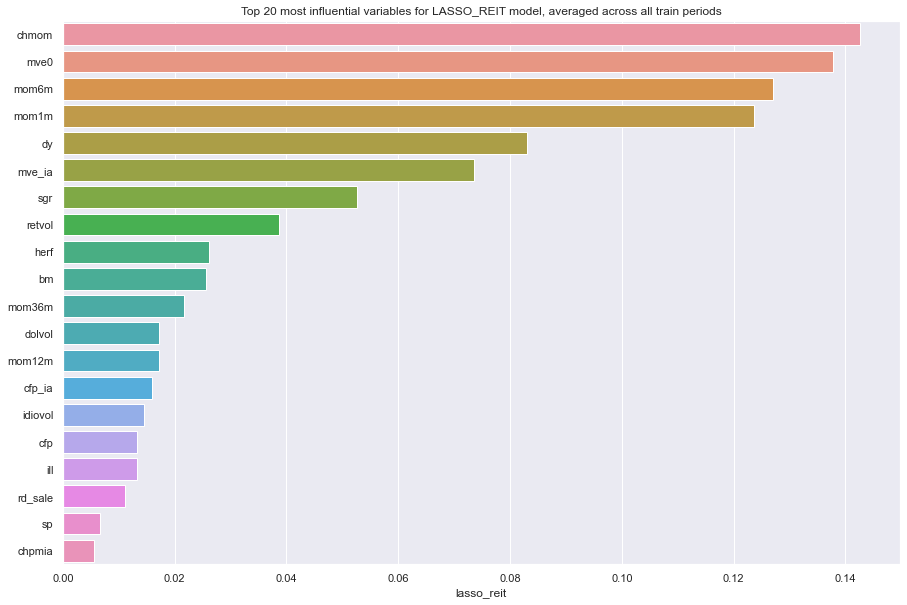

In [261]:
# Plot features of importance
# Plot graph
df_top20 = df_impt.sort_values(by=[model_name], ascending = False).head(20)
plt.figure(figsize=(15,10))
plt.title(f'Top 20 most influential variables for {model_name.upper()} model, averaged across all train periods')
sns.barplot(data = df_top20, x = model_name, y = df_top20.index);


In [262]:
# Merge df_temp to existing df_r2drecrease table

df_r2decrease_reit = pd.merge(
    left = df_r2decrease_reit,
    right = df_impt[model_name],
    how = 'left',
    left_index = True,
    right_index = True    
)

# Rank R2decrease table after including new model results
df_featurerank_reit = df_r2decrease_reit.rank() 
df_featurerank_reit['all_models'] = df_featurerank_reit.sum(axis=1)

# Display tables
display(df_r2decrease_reit)
display(df_featurerank_reit.sort_values('all_models', ascending = False))

# Save dfs to .csv 
df_r2decrease_reit.to_csv('../data/df_r2decrease_reit.csv', index = False)
df_featurerank_reit.to_csv('../data/df_featurerank_reit.csv', index = False)

lr_reit  huber_reit  ridge_reit  lasso_reit
absacc           0.000306   -0.001380    0.000189    0.000000
acc              0.001430   -0.000741    0.001779    0.000000
aeavol           0.000650    0.000668    0.005239    0.001173
age              0.000137   -0.000080    0.001680    0.000018
agr              0.000223    0.005201    0.003357    0.000000
baspread         0.007390    0.007871    0.000149    0.000000
beta             0.008894    0.057075    0.000315    0.000000
betasq           0.013997    0.013039    0.002645    0.000000
bm               0.001241    0.000853    0.024032    0.025538
bm_ia            0.002404    0.004776    0.007611    0.004235
cash             0.000161    0.000505    0.003340    0.000873
cashdebt         0.000128   -0.001187    0.000750    0.000000
cashpr           0.001257    0.002444    0.004893    0.001111
cfp              0.006021    0.006040    0.008196    0.013265
cfp_ia           0.001410    0.004166    0.007417    0.015930
chatoia          0.000082   -0.000040   -0.000983   -0.000089
chcsho           0.000206   -0.000878    0.005366    0.002707
chempia          0.001031    0.003782   -0.000006    0.000000
chinv            0.000245   -0.000393    0.000482    0.000000
chmom            0.052654    0.050540    0.096469    0.142593
chpmia           0.002182    0.002565    0.011188    0.005567
chtx            -0.000017   -0.000019    0.000188    0.000000
cinvest          0.000038    0.000148    0.000281    0.000000
convind          0.000886    0.000794    0.000866    0.000000
currat           0.091179    0.044869   -0.000742    0.000000
depr            -0.000063    0.000391    0.001464    0.000148
divi             0.000153    0.000328    0.000156    0.000000
divo             0.000145    0.000922    0.000460    0.000000
dolvol           0.052843    0.089712    0.018587    0.017184
dy               0.016294    0.015071    0.090116    0.083019
ear              0.000198    0.000341    0.007511    0.004939
egr              0.001280    0.002940    0.004116    0.001198
ep               0.001748    0.010111    0.008772    0.004712
gma              0.003155   -0.001219    0.004361    0.000000
grcapx           0.000474    0.000658   -0.000177    0.000000
grltnoa          0.002414    0.001948    0.004432    0.000000
herf             0.023766    0.022687    0.023490    0.026236
hire             0.000198    0.002251    0.000338    0.000000
idiovol          0.000873   -0.000939    0.012297    0.014589
ill              0.005484    0.010939    0.022225    0.013264
indmom          -0.000049    0.000309    0.000357    0.000269
invest           0.000890    0.000858    0.002343    0.000000
lev             -0.000274   -0.002811   -0.002411    0.000000
lgr              0.000145    0.000304    0.000079    0.000000
maxret           0.025620    0.054758    0.005975    0.000000
mom12m           0.004666    0.002331    0.047325    0.017174
mom1m            0.019050    0.030089    0.134880    0.123642
mom36m           0.004236    0.006796    0.023669    0.021621
mom6m            0.056381    0.030482    0.053236    0.127055
ms               0.000196    0.000743    0.002229    0.000000
mve0             0.200379    0.212738    0.122775    0.137827
mve_ia           0.116817    0.152169    0.033515    0.073484
nincr            0.000252   -0.000371    0.002870    0.000004
operprof         0.000132    0.000967    0.000443    0.000000
orgcap           0.000991    0.001224    0.000228    0.000000
pchcapx_ia      -0.000011   -0.000071    0.000415    0.000000
pchcurrat        0.000112    0.000514    0.000957    0.000000
pchdepr          0.000554    0.000439    0.003785    0.001252
pchgm_pchsale    0.000202   -0.000064    0.004470    0.000365
pchquick         0.000625    0.001025    0.000423    0.000000
pchsale_pchinvt  0.000186    0.000131    0.002732    0.000038
pchsale_pchrect  0.000089   -0.000019   -0.000144    0.000000
pchsale_pchxsga  0.000135    0.000115    0.000440    0.000000
pchsaleinv       0.000625    0.000454    0.000290 

lr_reit  huber_reit  ridge_reit  lasso_reit  all_models
mve0                94.0        94.0        93.0        93.0       374.0
chmom               87.0        89.0        92.0        94.0       362.0
mve_ia              92.0        93.0        86.0        89.0       360.0
retvol              93.0        86.0        90.0        87.0       356.0
mom6m               89.0        85.0        89.0        92.0       355.0
mom1m               84.0        84.0        94.0        91.0       353.0
dy                  83.0        82.0        91.0        90.0       346.0
dolvol              88.0        92.0        81.0        83.0       344.0
herf                85.0        83.0        83.0        86.0       337.0
sgr                 79.0        76.0        87.0        88.0       330.0
ill                 75.0        78.0        82.0        78.0       313.0
mom36m              72.0        72.0        84.0        84.0       312.0
mom12m              74.0        60.0        88.0        82.0       304.0
cfp                 76.0        71.0        75.0        79.0       301.0
rd_sale             73.0        74.0        74.0        77.0       298.0
ep                  63.0        77.0        76.0        73.0       289.0
chpmia              67.0        62.0        79.0        75.0       283.0
bm_ia               68.0        69.0        73.0        72.0       282.0
cfp_ia              57.0        67.0        71.0        81.0       276.0
sp                  59.0        75.0        66.0        76.0       276.0
bm                  54.0        47.0        85.0        85.0       271.0
maxret              86.0        90.0        68.0        26.0       270.0
roavol              65.0        68.0        67.0        68.0       268.0
saleinv             66.0        55.0        78.0        69.0       268.0
tang                61.0        54.0        77.0        66.0       258.0
turn                77.0        79.0        40.0        62.0       258.0
egr                 56.0        63.0        58.0        65.0       242.0
zerotrade           82.0        57.0        50.0        53.0       242.0
cashpr              55.0        61.0        62.0        63.0       241.0
betasq              81.0        80.0        49.0        26.0       236.0
beta                80.0        91.0        26.0        26.0       223.0
roaq                62.0        65.0        69.0        26.0       222.0
aeavol              46.0        43.0        64.0        64.0       217.0
idiovol             48.0         7.0        80.0        80.0       215.0
std_dolvol          39.0        53.0        63.0        59.0       214.0
grltnoa             69.0        56.0        60.0        26.0       211.0
ear                 29.0        33.0        72.0        74.0       208.0
currat              90.0        87.0         4.0        26.0       207.0
quick               91.0        88.0        24.0         2.0       205.0
pchdepr             43.0        35.0        57.0        67.0       202.0
baspread            78.0        73.0        18.0        26.0       195.0
roic                47.0         6.0        70.0        70.0       193.0
agr                 35.0        70.0        55.0        26.0       186.0
stdcf               70.0        81.0         9.0        26.0       186.0
cash                25.0        39.0        54.0        61.0       179.0
chcsho              33.0         8.0        65.0        71.0       177.0
pchgm_pchsale       32.0        20.0        61.0        58.0       171.0
invest              50.0        48.0        46.0        26.0       170.0
rsup                51.0        14.0        48.0        55.0       168.0
salerec             26.0        26.0        56.0        60.0       168.0
rd                  64.0        58.0        17.0        26.0       165.0
stdacc              60.0        64.0        15.0        26.0       165.0
gma                 71.0         4.0        59.0        26.0       160.0
realestate          42.0        38.0        52.0        26.0       158.0
co

## Elastic net regression

### REIT

In [263]:
df_results_reit = df_results_reit[:7]

In [264]:
# Create list of configs to test on 
def model_configs():
    # define scope of configs
    enet_ratio = [0.3, 0.5, 0.7, 0.9]
    enet_alpha = np.logspace(-4, 0, 30) # np.logspace(-4, 0, 50)
    # create configs
    configs = []
    for i in enet_ratio:
        for j in enet_alpha:
            cfg = [i,j]
            configs.append(cfg)
    print('Total configs (enet_ratio, enet_alpha): %d' %len(configs))
    return configs

def model_fit(X_train, y_train, cfg):
    # unpack config
    enet_ratio, enet_alpha = cfg
    model = ElasticNet(
        l1_ratio = enet_ratio,
        alpha = enet_alpha,
        random_state = 42,
        max_iter = 2_000, 
    )
    model.fit(X_train, y_train)
    return model

def model_predict(model, X_validate):
    # make predictions
    y_pred = model.predict(X_validate)
    return y_pred

In [265]:
# Instantiate list of configurations
cfg_list = model_configs()

Total configs (enet_ratio, enet_alpha): 120


In [266]:
%%time
# Create model name 
model_name = 'enet_reit'

# Create new row of test results
df_results_reit = pd.concat(
    [df_results_reit, pd.DataFrame([{'Model Name' : model_name,}])], 
    axis = 0
)

# Run grid search of hyperparameters
scores = grid_search(
    X = X_reit, 
    y = y_reit, 
    start_train = 1990, 
    start_val = 2001, 
    start_test = 2006, 
    cfg_list = cfg_list, 
    df_results = df_results_reit
)

# Print results
print ('Top 8 Configs')
print ('Config, R2_validate, RMSE_validate, R2_train, RMSE_train')
for cfg, r2_validate, rmse_validate, r2_train, rmse_train, in scores[:8]:
    print (f'{cfg}, {r2_validate:.2f}, {rmse_validate:.2f}, {r2_train:.2f}, {rmse_train:.2f}')

[0.3, 0.0001], 0.70, 10.22, 1.99, 10.34
[0.3, 0.00013738237958832623], 0.70, 10.22, 1.99, 10.34
[0.3, 0.00018873918221350977], 0.71, 10.22, 1.99, 10.34
[0.3, 0.0002592943797404667], 0.71, 10.22, 1.99, 10.34
[0.3, 0.0003562247890262444], 0.72, 10.22, 1.99, 10.34
[0.3, 0.0004893900918477494], 0.73, 10.22, 1.99, 10.34
[0.3, 0.0006723357536499335], 0.75, 10.22, 1.99, 10.34
[0.3, 0.0009236708571873865], 0.77, 10.22, 1.99, 10.34
[0.3, 0.0012689610031679222], 0.79, 10.22, 1.99, 10.34
[0.3, 0.0017433288221999873], 0.82, 10.22, 1.99, 10.34
[0.3, 0.002395026619987486], 0.85, 10.21, 1.99, 10.34
[0.3, 0.0032903445623126675], 0.89, 10.21, 1.98, 10.34
[0.3, 0.004520353656360241], 0.94, 10.21, 1.98, 10.34
[0.3, 0.006210169418915616], 1.00, 10.21, 1.97, 10.34
[0.3, 0.008531678524172805], 1.07, 10.20, 1.96, 10.34
[0.3, 0.011721022975334805], 1.15, 10.20, 1.95, 10.34
[0.3, 0.01610262027560939], 1.24, 10.19, 1.93, 10.35
[0.3, 0.02212216291070448], 1.34, 10.19, 1.90, 10.35
[0.3, 0.03039195382313198], 1.44

Model Name             Selected Config Train (1990-2000)  \
0        naive_reit                        N.A.      0.00 (10.45)   
0           lr_reit                        N.A.       1.99 (10.3)   
0  fama-french_reit                    bm, mve0       0.36 (10.4)   
0      carhart_reit            bm, mve0, mom12m       0.52 (10.4)   
0        huber_reit               [3.0, 0.0001]      1.58 (10.36)   
0        ridge_reit        [19920.457084538713]      1.19 (10.38)   
0        lasso_reit       [0.07196856730011514]      1.28 (10.38)   
0         enet_reit  [0.9, 0.07880462815669913]      1.28 (10.38)   

  Validate (2001-2005) Test (2006-2020)  Test (2006)    Test (2007)  \
0         0.00 (10.26)     0.00 (12.13)  0.00 (7.60)   0.00 (11.29)   
0          0.69 (10.2)    -0.03 (12.13)  4.17 (7.44)  -3.50 (11.48)   
0          1.52 (10.2)     0.17 (12.12)  3.84 (7.45)  -4.46 (11.54)   
0          1.68 (10.2)     0.16 (12.12)  4.37 (7.43)  -3.46 (11.48)   
0         0.90 (10.21)    -0.07 (12.13)  3.50 (7.47)  -2.04 (11.40)   
0         1.82 (10.16)     0.18 (12.12)  4.43 (7.43)  -3.65 (11.49)   
0         1.93 (10.16)     0.23 (12.11)  4.37 (7.43)  -3.54 (11.49)   
0         1.93 (10.16)              NaN          NaN            NaN   

     Test (2008)    Test (2009)   Test (2010)    Test (2011)  Test (2012)  \
0   0.00 (19.81)   0.00 (25.18)  0.00 (12.47)   0.00 (10.08)  0.00 (9.46)   
0  -0.55 (19.87)  -0.02 (25.19)  1.79 (12.36)  -2.03 (10.19)  3.18 (9.31)   
0  -1.84 (19.99)   0.64 (25.10)  2.03 (12.34)  -0.68 (10.12)  3.28 (9.31)   
0  -1.33 (19.94)   0.15 (25.16)  2.04 (12.34)  -0.71 (10.12)  2.65 (9.34)   
0  -0.24 (19.84)  -0.24 (25.21)  0.25 (12.45)  -0.65 (10.12)  1.09 (9.41)   
0  -1.12 (19.92)   0.16 (25.16)  1.98 (12.34)  -1.29 (10.15)  3.80 (9.28)   
0  -1.09 (19.92)   0.26 (25.15)  2.08 (12.34)  -1.03 (10.14)  3.42 (9.30)   
0            NaN            NaN           NaN            NaN          NaN   

   Test (2013)  Test (2014)   Test (2015)  Test (2016)   Test (2017)  \
0  0.00 (9.44)  0.00 (7.04)   0.00 (7.47)  0.00 (9.09)   0.00 (7.08)   
0  1.38 (9.37)  1.59 (6.99)  -2.95 (7.58)  2.22 (8.98)  -1.00 (7.12)   
0  1.25 (9.38)  3.36 (6.92)  -1.87 (7.54)  2.06 (8.99)   1.06 (7.05)   
0  1.65 (9.36)  3.06 (6.93)  -1.88 (7.54)  1.71 (9.01)   0.85 (7.05)   
0  0.70 (9.40)  2.18 (6.96)  -2.61 (7.57)  1.41 (9.02)  -0.62 (7.11)   
0  1.91 (9.35)  2.74 (6.94)  -1.82 (7.54)  2.31 (8.98)   0.49 (7.07)   
0  1.89 (9.35)  3.51 (6.92)  -1.64 (7.54)  1.70 (9.01)   0.50 (7.07)   
0          NaN          NaN           NaN          NaN           NaN   

    Test (2018)  Test (2019)    Test (2020) Remarks  
0   0.00 (8.03)  0.00 (8.37)   0.00 (18.42)     NaN  
0  -5.43 (8.25)  3.70 (8.21)  -0.21 (18.43)     NaN  
0  -2.57 (8.14)  3.50 (8.22)  -0.05 (18.42)     NaN  
0  -2.06 (8.12)  3.34 (8.23)  -0.13 (18.43)     NaN  
0  -2.98 (8.15)  2.99 (8.24)  -0.31 (18.44)     NaN  
0  -4.39 (8.21)  4.05 (8.20)  -0.13 (18.43)     NaN  
0  -4.16 (8.20)  4.21 (8.19)  -0.07 (18.42)     NaN  
0           NaN          NaN            NaN     NaN

Top 8 Configs
Config, R2_validate, RMSE_validate, R2_train, RMSE_train
[0.9, 0.07880462815669913], 1.93, 10.16, 1.28, 10.38
[0.7, 0.1082636733874054], 1.90, 10.16, 1.19, 10.38
[0.7, 0.07880462815669913], 1.90, 10.16, 1.42, 10.37
[0.5, 0.1082636733874054], 1.89, 10.16, 1.38, 10.37
[0.3, 0.20433597178569418], 1.89, 10.16, 1.21, 10.38
[0.9, 0.05736152510448681], 1.88, 10.16, 1.52, 10.37
[0.5, 0.14873521072935117], 1.88, 10.16, 1.16, 10.39
[0.3, 0.14873521072935117], 1.86, 10.16, 1.40, 10.37
CPU times: user 6min 38s, sys: 2min 23s, total: 9min 2s
Wall time: 1min 42s


Top 8 Configs

Config, R2_validate, RMSE_validate, R2_train, RMSE_train

[0.9, 0.07880462815669913], 1.93, 10.16, 1.28, 10.38

[0.7, 0.1082636733874054], 1.90, 10.16, 1.19, 10.38

[0.7, 0.07880462815669913], 1.90, 10.16, 1.42, 10.37

[0.5, 0.1082636733874054], 1.89, 10.16, 1.38, 10.37

[0.3, 0.20433597178569418], 1.89, 10.16, 1.21, 10.38

[0.9, 0.05736152510448681], 1.88, 10.16, 1.52, 10.37

[0.5, 0.14873521072935117], 1.88, 10.16, 1.16, 10.39

[0.3, 0.14873521072935117], 1.86, 10.16, 1.40, 10.37

CPU times: user 6min 38s, sys: 2min 23s, total: 9min 2s

Wall time: 1min 42s

In [267]:
%%time
# Chosen configuration for model
selected_cfg = scores[0][0]

# Out-of-sample testing, no need to do validation after hyperparameters are selected
score = walk_forward(
    selected_cfg, 
    X = X_reit, 
    y = y_reit, 
    start_train = 1990, 
    start_val = 2006, # Set equal to start of test year, so that train year ends just before test year
    start_test = 2006,
    final_year_of_testing = 2020, 
    df_results = df_results_reit
)

print(f'On best performing config: {scores[0][0]}')

# Save df_results to .csv 
df_results_reit.to_csv('../data/df_results_reit.csv', index = False)

Test year 2006 done, R2 score is 4.37
Test year 2006 done, RMSE score is 7.43
Test year 2007 done, R2 score is -3.54
Test year 2007 done, RMSE score is 11.49
Test year 2008 done, R2 score is -1.09
Test year 2008 done, RMSE score is 19.92
Test year 2009 done, R2 score is 0.26
Test year 2009 done, RMSE score is 25.15
Test year 2010 done, R2 score is 2.08
Test year 2010 done, RMSE score is 12.34
Test year 2011 done, R2 score is -1.03
Test year 2011 done, RMSE score is 10.14
Test year 2012 done, R2 score is 3.43
Test year 2012 done, RMSE score is 9.30
Test year 2013 done, R2 score is 1.90
Test year 2013 done, RMSE score is 9.35
Test year 2014 done, R2 score is 3.52
Test year 2014 done, RMSE score is 6.92
Test year 2015 done, R2 score is -1.63
Test year 2015 done, RMSE score is 7.54
Test year 2016 done, R2 score is 1.71
Test year 2016 done, RMSE score is 9.01
Test year 2017 done, R2 score is 0.52
Test year 2017 done, RMSE score is 7.07
Test year 2018 done, R2 score is -4.17
Test year 2018 d

Model Name             Selected Config Train (1990-2000)  \
0        naive_reit                        N.A.      0.00 (10.45)   
0           lr_reit                        N.A.       1.99 (10.3)   
0  fama-french_reit                    bm, mve0       0.36 (10.4)   
0      carhart_reit            bm, mve0, mom12m       0.52 (10.4)   
0        huber_reit               [3.0, 0.0001]      1.58 (10.36)   
0        ridge_reit        [19920.457084538713]      1.19 (10.38)   
0        lasso_reit       [0.07196856730011514]      1.28 (10.38)   
0         enet_reit  [0.9, 0.07880462815669913]      1.28 (10.38)   

  Validate (2001-2005) Test (2006-2020)  Test (2006)    Test (2007)  \
0         0.00 (10.26)     0.00 (12.13)  0.00 (7.60)   0.00 (11.29)   
0          0.69 (10.2)    -0.03 (12.13)  4.17 (7.44)  -3.50 (11.48)   
0          1.52 (10.2)     0.17 (12.12)  3.84 (7.45)  -4.46 (11.54)   
0          1.68 (10.2)     0.16 (12.12)  4.37 (7.43)  -3.46 (11.48)   
0         0.90 (10.21)    -0.07 (12.13)  3.50 (7.47)  -2.04 (11.40)   
0         1.82 (10.16)     0.18 (12.12)  4.43 (7.43)  -3.65 (11.49)   
0         1.93 (10.16)     0.23 (12.11)  4.37 (7.43)  -3.54 (11.49)   
0         1.93 (10.16)     0.23 (12.11)  4.37 (7.43)  -3.54 (11.49)   

     Test (2008)    Test (2009)   Test (2010)    Test (2011)  Test (2012)  \
0   0.00 (19.81)   0.00 (25.18)  0.00 (12.47)   0.00 (10.08)  0.00 (9.46)   
0  -0.55 (19.87)  -0.02 (25.19)  1.79 (12.36)  -2.03 (10.19)  3.18 (9.31)   
0  -1.84 (19.99)   0.64 (25.10)  2.03 (12.34)  -0.68 (10.12)  3.28 (9.31)   
0  -1.33 (19.94)   0.15 (25.16)  2.04 (12.34)  -0.71 (10.12)  2.65 (9.34)   
0  -0.24 (19.84)  -0.24 (25.21)  0.25 (12.45)  -0.65 (10.12)  1.09 (9.41)   
0  -1.12 (19.92)   0.16 (25.16)  1.98 (12.34)  -1.29 (10.15)  3.80 (9.28)   
0  -1.09 (19.92)   0.26 (25.15)  2.08 (12.34)  -1.03 (10.14)  3.42 (9.30)   
0  -1.09 (19.92)   0.26 (25.15)  2.08 (12.34)  -1.03 (10.14)  3.43 (9.30)   

   Test (2013)  Test (2014)   Test (2015)  Test (2016)   Test (2017)  \
0  0.00 (9.44)  0.00 (7.04)   0.00 (7.47)  0.00 (9.09)   0.00 (7.08)   
0  1.38 (9.37)  1.59 (6.99)  -2.95 (7.58)  2.22 (8.98)  -1.00 (7.12)   
0  1.25 (9.38)  3.36 (6.92)  -1.87 (7.54)  2.06 (8.99)   1.06 (7.05)   
0  1.65 (9.36)  3.06 (6.93)  -1.88 (7.54)  1.71 (9.01)   0.85 (7.05)   
0  0.70 (9.40)  2.18 (6.96)  -2.61 (7.57)  1.41 (9.02)  -0.62 (7.11)   
0  1.91 (9.35)  2.74 (6.94)  -1.82 (7.54)  2.31 (8.98)   0.49 (7.07)   
0  1.89 (9.35)  3.51 (6.92)  -1.64 (7.54)  1.70 (9.01)   0.50 (7.07)   
0  1.90 (9.35)  3.52 (6.92)  -1.63 (7.54)  1.71 (9.01)   0.52 (7.07)   

    Test (2018)  Test (2019)    Test (2020) Remarks  
0   0.00 (8.03)  0.00 (8.37)   0.00 (18.42)     NaN  
0  -5.43 (8.25)  3.70 (8.21)  -0.21 (18.43)     NaN  
0  -2.57 (8.14)  3.50 (8.22)  -0.05 (18.42)     NaN  
0  -2.06 (8.12)  3.34 (8.23)  -0.13 (18.43)     NaN  
0  -2.98 (8.15)  2.99 (8.24)  -0.31 (18.44)     NaN  
0  -4.39 (8.21)  4.05 (8.20)  -0.13 (18.43)     NaN  
0  -4.16 (8.20)  4.21 (8.19)  -0.07 (18.42)     NaN  
0  -4.17 (8.20)  4.20 (8.19)  -0.07 (18.42)     NaN


R2 for entire pooled test set, from 2006 to 2020, is 0.23.
RMSE for entire pooled test set, from 2006 to 2020, is 12.11.

On best performing config: [0.9, 0.07880462815669913]
CPU times: user 6.17 s, sys: 5.81 s, total: 12 s
Wall time: 2.34 s


R2 for entire pooled test set, from 2006 to 2020, is 0.23.

RMSE for entire pooled test set, from 2006 to 2020, is 12.11.

On best performing config: [0.9, 0.07880462815669913]

CPU times: user 6.17 s, sys: 5.81 s, total: 12 s

Wall time: 2.34 s

### Sample 1

In [ ]:
df_results_sample1 = df_results_sample1[:7]

In [268]:
%%time
# Create model name 
model_name = 'enet_sample1'

# Create new row of test results
df_results_sample1 = pd.concat(
    [df_results_sample1, pd.DataFrame([{'Model Name' : model_name,}])], 
    axis = 0
)

# Run grid search of hyperparameters
scores = grid_search(
    X = X_1, 
    y = y_1, 
    start_train = 1990, 
    start_val = 2001, 
    start_test = 2006, 
    cfg_list = cfg_list, 
    df_results = df_results_sample1
)

# Print results
print ('Top 8 Configs')
print ('Config, R2_validate, RMSE_validate, R2_train, RMSE_train')
for cfg, r2_validate, rmse_validate, r2_train, rmse_train, in scores[:8]:
    print (f'{cfg}, {r2_validate:.2f}, {rmse_validate:.2f}, {r2_train:.2f}, {rmse_train:.2f}')

[0.3, 0.0001], -0.45, 19.05, 1.66, 20.70
[0.3, 0.00013738237958832623], -0.45, 19.05, 1.66, 20.70
[0.3, 0.00018873918221350977], -0.45, 19.05, 1.66, 20.70
[0.3, 0.0002592943797404667], -0.45, 19.05, 1.66, 20.70
[0.3, 0.0003562247890262444], -0.44, 19.05, 1.66, 20.70
[0.3, 0.0004893900918477494], -0.44, 19.05, 1.66, 20.70
[0.3, 0.0006723357536499335], -0.44, 19.05, 1.66, 20.70
[0.3, 0.0009236708571873865], -0.44, 19.05, 1.66, 20.70
[0.3, 0.0012689610031679222], -0.44, 19.05, 1.66, 20.70
[0.3, 0.0017433288221999873], -0.43, 19.05, 1.66, 20.70
[0.3, 0.002395026619987486], -0.43, 19.05, 1.66, 20.70
[0.3, 0.0032903445623126675], -0.42, 19.05, 1.66, 20.70
[0.3, 0.004520353656360241], -0.41, 19.05, 1.66, 20.70
[0.3, 0.006210169418915616], -0.39, 19.04, 1.66, 20.70
[0.3, 0.008531678524172805], -0.38, 19.04, 1.66, 20.70
[0.3, 0.011721022975334805], -0.35, 19.04, 1.66, 20.70
[0.3, 0.01610262027560939], -0.32, 19.04, 1.65, 20.70
[0.3, 0.02212216291070448], -0.28, 19.03, 1.65, 20.70
[0.3, 0.030391

Model Name        Selected Config Train (1990-2000)  \
0        naive_sample1                   N.A.      0.00 (20.88)   
0           lr_sample1                   N.A.       1.66 (20.7)   
0  fama-french_sample1               bm, mve0       0.21 (20.9)   
0      carhart_sample1       bm, mve0, mom12m       0.25 (20.9)   
0        huber_sample1            [9, 0.0001]      1.57 (20.71)   
0        ridge_sample1    [50084.07989848212]      0.86 (20.79)   
0        lasso_sample1  [0.47148663634573895]      0.51 (20.82)   
0         enet_sample1             [0.3, 1.0]      0.65 (20.81)   

  Validate (2001-2005) Test (2006-2020)    Test (2006)    Test (2007)  \
0         0.00 (19.01)     0.00 (15.77)   0.00 (14.72)   0.00 (12.19)   
0         -0.45 (19.0)    -0.49 (15.80)  -0.80 (14.78)  -4.28 (12.45)   
0          0.32 (19.0)     0.13 (15.76)   0.74 (14.66)  -1.74 (12.30)   
0          0.31 (19.0)     0.11 (15.76)   0.62 (14.67)  -1.56 (12.29)   
0        -0.21 (19.03)    -0.29 (15.79)  -0.52 (14.76)  -2.89 (12.37)   
0         0.53 (18.96)     0.04 (15.76)   0.48 (14.68)  -2.36 (12.34)   
0         0.44 (18.97)     0.11 (15.76)   0.91 (14.65)  -2.18 (12.33)   
0         0.46 (18.96)              NaN            NaN            NaN   

     Test (2008)   Test (2009)    Test (2010)    Test (2011)   Test (2012)  \
0   0.00 (20.06)  0.00 (24.51)   0.00 (15.28)   0.00 (13.93)  0.00 (12.77)   
0  -2.82 (20.35)  0.66 (24.43)  -0.84 (15.34)  -1.28 (14.02)  0.52 (12.74)   
0  -2.49 (20.31)  0.77 (24.41)   1.13 (15.19)  -0.88 (13.99)  0.74 (12.72)   
0  -2.28 (20.29)  0.56 (24.44)   0.90 (15.21)  -0.76 (13.99)  0.76 (12.72)   
0  -2.15 (20.28)  0.58 (24.44)  -0.76 (15.34)  -0.67 (13.98)  0.54 (12.73)   
0  -2.61 (20.32)  0.86 (24.40)   0.60 (15.23)  -0.88 (13.99)  0.87 (12.71)   
0  -2.59 (20.32)  0.85 (24.40)   1.12 (15.19)  -0.96 (14.00)  0.80 (12.72)   
0            NaN           NaN            NaN            NaN           NaN   

    Test (2013)    Test (2014)    Test (2015)    Test (2016)    Test (2017)  \
0  0.00 (12.20)   0.00 (11.34)   0.00 (14.08)   0.00 (16.07)   0.00 (12.67)   
0  2.52 (12.05)  -1.37 (11.42)  -1.45 (14.18)  -0.12 (16.08)  -0.16 (12.68)   
0  2.08 (12.07)   0.01 (11.34)  -0.61 (14.12)   0.67 (16.01)   0.91 (12.61)   
0  2.29 (12.06)   0.03 (11.34)  -0.50 (14.11)   0.57 (16.02)   0.70 (12.62)   
0  2.45 (12.05)  -0.60 (11.37)  -1.17 (14.16)  -0.11 (16.07)   0.03 (12.67)   
0  2.81 (12.03)  -0.26 (11.35)  -0.64 (14.12)   0.49 (16.03)   0.37 (12.64)   
0  2.04 (12.07)  -0.15 (11.35)  -0.62 (14.12)   0.72 (16.01)   0.87 (12.61)   
0           NaN            NaN            NaN            NaN            NaN   

     Test (2018)   Test (2019)   Test (2020) Remarks  
0   0.00 (13.97)  0.00 (15.38)  0.00 (22.31)     NaN  
0  -2.02 (14.11)  0.46 (15.34)  0.74 (22.23)     NaN  
0  -1.56 (14.08)  0.86 (15.31)  0.78 (22.22)     NaN  
0  -1.53 (14.08)  0.95 (15.31)  0.71 (22.23)     NaN  
0  -1.50 (14.08)  0.44 (15.35)  0.50 (22.25)     NaN  
0  -1.58 (14.08)  0.82 (15.32)  0.76 (22.22)     NaN  
0  -1.65 (14.09)  0.79 (15.32)  0.80 (22.22)     NaN  
0            NaN           NaN           NaN     NaN

Top 8 Configs
Config, R2_validate, RMSE_validate, R2_train, RMSE_train
[0.3, 1.0], 0.46, 18.96, 0.65, 20.81
[0.5, 0.7278953843983146], 0.45, 18.96, 0.60, 20.81
[0.7, 0.5298316906283708], 0.44, 18.96, 0.65, 20.81
[0.3, 0.7278953843983146], 0.44, 18.96, 0.86, 20.79
[0.9, 0.5298316906283708], 0.44, 18.97, 0.49, 20.83
[0.7, 0.7278953843983146], 0.43, 18.97, 0.43, 20.83
[0.5, 1.0], 0.43, 18.97, 0.39, 20.84
[0.9, 0.38566204211634725], 0.43, 18.97, 0.75, 20.80
CPU times: user 59.4 s, sys: 56.5 s, total: 1min 55s
Wall time: 23.5 s


Top 8 Configs

Config, R2_validate, RMSE_validate, R2_train, RMSE_train

[0.3, 1.0], 0.46, 18.96, 0.65, 20.81

[0.5, 0.7278953843983146], 0.45, 18.96, 0.60, 20.81

[0.7, 0.5298316906283708], 0.44, 18.96, 0.65, 20.81

[0.3, 0.7278953843983146], 0.44, 18.96, 0.86, 20.79

[0.9, 0.5298316906283708], 0.44, 18.97, 0.49, 20.83

[0.7, 0.7278953843983146], 0.43, 18.97, 0.43, 20.83

[0.5, 1.0], 0.43, 18.97, 0.39, 20.84

[0.9, 0.38566204211634725], 0.43, 18.97, 0.75, 20.80

CPU times: user 59.4 s, sys: 56.5 s, total: 1min 55s

Wall time: 23.5 s

In [269]:
%%time
# Chosen configuration for model
selected_cfg = scores[0][0]

# Out-of-sample testing, no need to do validation after hyperparameters are selected
score = walk_forward(
    selected_cfg, 
    X = X_1, 
    y = y_1, 
    start_train = 1990, 
    start_val = 2006, # Set equal to start of test year, so that train year ends just before test year
    start_test = 2006,
    final_year_of_testing = 2020, 
    df_results = df_results_sample1
)

print(f'On best performing config: {scores[0][0]}')

# Save df_results to .csv 
df_results_sample1.to_csv('../data/df_results_sample1.csv', index = False)


Test year 2006 done, R2 score is 0.81
Test year 2006 done, RMSE score is 14.66
Test year 2007 done, R2 score is -2.17
Test year 2007 done, RMSE score is 12.33
Test year 2008 done, R2 score is -2.61
Test year 2008 done, RMSE score is 20.32
Test year 2009 done, R2 score is 0.80
Test year 2009 done, RMSE score is 24.41
Test year 2010 done, R2 score is 1.16
Test year 2010 done, RMSE score is 15.19
Test year 2011 done, R2 score is -0.98
Test year 2011 done, RMSE score is 14.00
Test year 2012 done, R2 score is 0.82
Test year 2012 done, RMSE score is 12.72
Test year 2013 done, R2 score is 2.28
Test year 2013 done, RMSE score is 12.06
Test year 2014 done, R2 score is -0.26
Test year 2014 done, RMSE score is 11.35
Test year 2015 done, R2 score is -0.56
Test year 2015 done, RMSE score is 14.12
Test year 2016 done, R2 score is 0.68
Test year 2016 done, RMSE score is 16.01
Test year 2017 done, R2 score is 0.86
Test year 2017 done, RMSE score is 12.61
Test year 2018 done, R2 score is -1.60
Test yea

Model Name        Selected Config Train (1990-2000)  \
0        naive_sample1                   N.A.      0.00 (20.88)   
0           lr_sample1                   N.A.       1.66 (20.7)   
0  fama-french_sample1               bm, mve0       0.21 (20.9)   
0      carhart_sample1       bm, mve0, mom12m       0.25 (20.9)   
0        huber_sample1            [9, 0.0001]      1.57 (20.71)   
0        ridge_sample1    [50084.07989848212]      0.86 (20.79)   
0        lasso_sample1  [0.47148663634573895]      0.51 (20.82)   
0         enet_sample1             [0.3, 1.0]      0.65 (20.81)   

  Validate (2001-2005) Test (2006-2020)    Test (2006)    Test (2007)  \
0         0.00 (19.01)     0.00 (15.77)   0.00 (14.72)   0.00 (12.19)   
0         -0.45 (19.0)    -0.49 (15.80)  -0.80 (14.78)  -4.28 (12.45)   
0          0.32 (19.0)     0.13 (15.76)   0.74 (14.66)  -1.74 (12.30)   
0          0.31 (19.0)     0.11 (15.76)   0.62 (14.67)  -1.56 (12.29)   
0        -0.21 (19.03)    -0.29 (15.79)  -0.52 (14.76)  -2.89 (12.37)   
0         0.53 (18.96)     0.04 (15.76)   0.48 (14.68)  -2.36 (12.34)   
0         0.44 (18.97)     0.11 (15.76)   0.91 (14.65)  -2.18 (12.33)   
0         0.46 (18.96)     0.11 (15.76)   0.81 (14.66)  -2.17 (12.33)   

     Test (2008)   Test (2009)    Test (2010)    Test (2011)   Test (2012)  \
0   0.00 (20.06)  0.00 (24.51)   0.00 (15.28)   0.00 (13.93)  0.00 (12.77)   
0  -2.82 (20.35)  0.66 (24.43)  -0.84 (15.34)  -1.28 (14.02)  0.52 (12.74)   
0  -2.49 (20.31)  0.77 (24.41)   1.13 (15.19)  -0.88 (13.99)  0.74 (12.72)   
0  -2.28 (20.29)  0.56 (24.44)   0.90 (15.21)  -0.76 (13.99)  0.76 (12.72)   
0  -2.15 (20.28)  0.58 (24.44)  -0.76 (15.34)  -0.67 (13.98)  0.54 (12.73)   
0  -2.61 (20.32)  0.86 (24.40)   0.60 (15.23)  -0.88 (13.99)  0.87 (12.71)   
0  -2.59 (20.32)  0.85 (24.40)   1.12 (15.19)  -0.96 (14.00)  0.80 (12.72)   
0  -2.61 (20.32)  0.80 (24.41)   1.16 (15.19)  -0.98 (14.00)  0.82 (12.72)   

    Test (2013)    Test (2014)    Test (2015)    Test (2016)    Test (2017)  \
0  0.00 (12.20)   0.00 (11.34)   0.00 (14.08)   0.00 (16.07)   0.00 (12.67)   
0  2.52 (12.05)  -1.37 (11.42)  -1.45 (14.18)  -0.12 (16.08)  -0.16 (12.68)   
0  2.08 (12.07)   0.01 (11.34)  -0.61 (14.12)   0.67 (16.01)   0.91 (12.61)   
0  2.29 (12.06)   0.03 (11.34)  -0.50 (14.11)   0.57 (16.02)   0.70 (12.62)   
0  2.45 (12.05)  -0.60 (11.37)  -1.17 (14.16)  -0.11 (16.07)   0.03 (12.67)   
0  2.81 (12.03)  -0.26 (11.35)  -0.64 (14.12)   0.49 (16.03)   0.37 (12.64)   
0  2.04 (12.07)  -0.15 (11.35)  -0.62 (14.12)   0.72 (16.01)   0.87 (12.61)   
0  2.28 (12.06)  -0.26 (11.35)  -0.56 (14.12)   0.68 (16.01)   0.86 (12.61)   

     Test (2018)   Test (2019)   Test (2020) Remarks  
0   0.00 (13.97)  0.00 (15.38)  0.00 (22.31)     NaN  
0  -2.02 (14.11)  0.46 (15.34)  0.74 (22.23)     NaN  
0  -1.56 (14.08)  0.86 (15.31)  0.78 (22.22)     NaN  
0  -1.53 (14.08)  0.95 (15.31)  0.71 (22.23)     NaN  
0  -1.50 (14.08)  0.44 (15.35)  0.50 (22.25)     NaN  
0  -1.58 (14.08)  0.82 (15.32)  0.76 (22.22)     NaN  
0  -1.65 (14.09)  0.79 (15.32)  0.80 (22.22)     NaN  
0  -1.60 (14.09)  0.80 (15.32)  0.81 (22.22)     NaN


R2 for entire pooled test set, from 2006 to 2020, is 0.11.
RMSE for entire pooled test set, from 2006 to 2020, is 15.76.

On best performing config: [0.3, 1.0]
CPU times: user 1.3 s, sys: 2.52 s, total: 3.82 s
Wall time: 814 ms


R2 for entire pooled test set, from 2006 to 2020, is 0.11.

RMSE for entire pooled test set, from 2006 to 2020, is 15.76.

On best performing config: [0.3, 1.0]

CPU times: user 1.3 s, sys: 2.52 s, total: 3.82 s

Wall time: 814 ms

### Sample 2

In [270]:
df_results_sample2 = df_results_sample2[:7]

In [271]:
%%time
# Create model name 
model_name = 'enet_sample2'

# Create new row of test results
df_results_sample2 = pd.concat(
    [df_results_sample2, pd.DataFrame([{'Model Name' : model_name,}])], 
    axis = 0
)

# Run grid search of hyperparameters
scores = grid_search(
    X = X_2, 
    y = y_2, 
    start_train = 1990, 
    start_val = 2001, 
    start_test = 2006, 
    cfg_list = cfg_list, 
    df_results = df_results_sample2
)

# Print results
print ('Top 8 Configs')
print ('Config, R2_validate, RMSE_validate, R2_train, RMSE_train')
for cfg, r2_validate, rmse_validate, r2_train, rmse_train, in scores[:8]:
    print (f'{cfg}, {r2_validate:.2f}, {rmse_validate:.2f}, {r2_train:.2f}, {rmse_train:.2f}')

[0.3, 0.0001], 0.65, 12.25, 2.18, 13.85
[0.3, 0.00013738237958832623], 0.65, 12.25, 2.18, 13.85
[0.3, 0.00018873918221350977], 0.65, 12.25, 2.18, 13.85
[0.3, 0.0002592943797404667], 0.65, 12.25, 2.18, 13.85
[0.3, 0.0003562247890262444], 0.65, 12.25, 2.18, 13.85
[0.3, 0.0004893900918477494], 0.66, 12.25, 2.18, 13.85
[0.3, 0.0006723357536499335], 0.66, 12.25, 2.18, 13.85
[0.3, 0.0009236708571873865], 0.66, 12.25, 2.18, 13.85
[0.3, 0.0012689610031679222], 0.67, 12.25, 2.18, 13.85
[0.3, 0.0017433288221999873], 0.67, 12.25, 2.18, 13.85
[0.3, 0.002395026619987486], 0.68, 12.24, 2.18, 13.85
[0.3, 0.0032903445623126675], 0.69, 12.24, 2.18, 13.85
[0.3, 0.004520353656360241], 0.71, 12.24, 2.18, 13.85
[0.3, 0.006210169418915616], 0.73, 12.24, 2.18, 13.85
[0.3, 0.008531678524172805], 0.76, 12.24, 2.18, 13.85
[0.3, 0.011721022975334805], 0.80, 12.24, 2.17, 13.85
[0.3, 0.01610262027560939], 0.85, 12.23, 2.17, 13.85
[0.3, 0.02212216291070448], 0.92, 12.23, 2.16, 13.85
[0.3, 0.03039195382313198], 0.99

Model Name            Selected Config Train (1990-2000)  \
0        naive_sample2                       N.A.      0.00 (14.00)   
0           lr_sample2                       N.A.       2.18 (13.8)   
0  fama-french_sample2                   bm, mve0       0.68 (14.0)   
0      carhart_sample2           bm, mve0, mom12m       0.68 (14.0)   
0        huber_sample2                [9, 0.0001]      1.99 (13.86)   
0        ridge_sample2        [38867.76690892668]      1.49 (13.90)   
0        lasso_sample2      [0.15264179671752318]      1.39 (13.90)   
0         enet_sample2  [0.5, 0.2807216203941176]      1.38 (13.90)   

  Validate (2001-2005) Test (2006-2020)  Test (2006)   Test (2007)  \
0         0.00 (12.29)     0.00 (12.32)  0.00 (9.17)   0.00 (8.99)   
0          0.65 (12.2)     0.22 (12.30)  0.56 (9.15)  -3.53 (9.15)   
0          1.15 (12.2)     0.56 (12.28)  1.74 (9.09)  -2.06 (9.09)   
0          1.15 (12.2)     0.56 (12.28)  1.75 (9.09)  -2.06 (9.09)   
0         0.79 (12.24)     0.39 (12.29)  1.20 (9.12)  -3.22 (9.14)   
0         1.78 (12.18)     0.69 (12.27)  1.89 (9.08)  -2.63 (9.11)   
0         1.76 (12.18)     0.75 (12.27)  2.20 (9.07)  -2.40 (9.10)   
0         1.77 (12.18)              NaN          NaN           NaN   

     Test (2008)   Test (2009)   Test (2010)   Test (2011)   Test (2012)  \
0   0.00 (15.09)  0.00 (18.80)  0.00 (10.67)   0.00 (9.59)  0.00 (10.62)   
0  -5.27 (15.48)  3.25 (18.49)  1.21 (10.60)  -4.70 (9.81)  2.88 (10.47)   
0  -3.80 (15.37)  1.82 (18.63)  2.57 (10.53)  -1.08 (9.64)  2.10 (10.51)   
0  -3.80 (15.37)  1.83 (18.63)  2.62 (10.53)  -1.11 (9.64)  2.18 (10.51)   
0  -4.71 (15.44)  2.82 (18.53)  1.69 (10.58)  -3.78 (9.77)  2.48 (10.49)   
0  -4.47 (15.42)  2.83 (18.53)  2.35 (10.54)  -2.62 (9.71)  3.15 (10.45)   
0  -4.48 (15.42)  2.61 (18.55)  2.44 (10.54)  -2.32 (9.70)  3.19 (10.45)   
0            NaN           NaN           NaN           NaN           NaN   

   Test (2013)   Test (2014)   Test (2015)   Test (2016)  Test (2017)  \
0  0.00 (8.43)  0.00 (15.25)   0.00 (9.36)  0.00 (11.29)  0.00 (8.75)   
0  5.29 (8.21)  0.65 (15.20)  -3.61 (9.53)  2.74 (11.14)  0.11 (8.74)   
0  5.79 (8.19)  0.51 (15.21)  -2.07 (9.46)  2.88 (11.13)  1.56 (8.68)   
0  5.61 (8.19)  0.56 (15.21)  -2.28 (9.47)  2.94 (11.13)  1.52 (8.68)   
0  6.14 (8.17)  0.62 (15.21)  -2.53 (9.48)  2.60 (11.14)  0.80 (8.71)   
0  5.67 (8.19)  1.03 (15.17)  -2.75 (9.49)  3.02 (11.12)  0.98 (8.70)   
0  5.11 (8.21)  1.12 (15.17)  -2.50 (9.48)  3.32 (11.10)  1.08 (8.70)   
0          NaN           NaN           NaN           NaN          NaN   

     Test (2018)   Test (2019)   Test (2020) Remarks  
0   0.00 (11.87)  0.00 (13.02)  0.00 (17.41)     NaN  
0  -4.01 (12.11)  2.07 (12.89)  1.33 (17.29)     NaN  
0  -2.41 (12.02)  1.93 (12.90)  0.87 (17.33)     NaN  
0  -2.44 (12.02)  1.93 (12.90)  0.87 (17.33)     NaN  
0  -3.64 (12.09)  2.18 (12.88)  1.24 (17.30)     NaN  
0  -3.01 (12.05)  2.32 (12.87)  1.38 (17.29)     NaN  
0  -2.74 (12.04)  2.56 (12.86)  1.37 (17.29)     NaN  
0            NaN           NaN           NaN     NaN

Top 8 Configs
Config, R2_validate, RMSE_validate, R2_train, RMSE_train
[0.5, 0.2807216203941176], 1.77, 12.18, 1.38, 13.90
[0.3, 0.38566204211634725], 1.76, 12.18, 1.44, 13.90
[0.7, 0.20433597178569418], 1.76, 12.18, 1.41, 13.90
[0.9, 0.14873521072935117], 1.76, 12.18, 1.48, 13.90
[0.3, 0.5298316906283708], 1.75, 12.18, 1.24, 13.91
[0.9, 0.20433597178569418], 1.75, 12.18, 1.26, 13.91
[0.7, 0.2807216203941176], 1.73, 12.18, 1.19, 13.92
[0.5, 0.38566204211634725], 1.72, 12.18, 1.18, 13.92
CPU times: user 2min 24s, sys: 1min 15s, total: 3min 40s
Wall time: 42 s


Top 8 Configs

Config, R2_validate, RMSE_validate, R2_train, RMSE_train

[0.5, 0.2807216203941176], 1.77, 12.18, 1.38, 13.90

[0.3, 0.38566204211634725], 1.76, 12.18, 1.44, 13.90

[0.7, 0.20433597178569418], 1.76, 12.18, 1.41, 13.90

[0.9, 0.14873521072935117], 1.76, 12.18, 1.48, 13.90

[0.3, 0.5298316906283708], 1.75, 12.18, 1.24, 13.91

[0.9, 0.20433597178569418], 1.75, 12.18, 1.26, 13.91

[0.7, 0.2807216203941176], 1.73, 12.18, 1.19, 13.92

[0.5, 0.38566204211634725], 1.72, 12.18, 1.18, 13.92

CPU times: user 2min 24s, sys: 1min 15s, total: 3min 40s

Wall time: 42 s

In [272]:
%%time
# Chosen configuration for model
selected_cfg = scores[0][0]

# Out-of-sample testing, no need to do validation after hyperparameters are selected
score = walk_forward(
    selected_cfg, 
    X = X_2, 
    y = y_2, 
    start_train = 1990, 
    start_val = 2006, # Set equal to start of test year, so that train year ends just before test year
    start_test = 2006,
    final_year_of_testing = 2020, 
    df_results = df_results_sample2
)

print(f'On best performing config: {scores[0][0]}')

# Save df_results to .csv 
df_results_sample2.to_csv('../data/df_results_sample2.csv', index = False)


Test year 2006 done, R2 score is 2.21
Test year 2006 done, RMSE score is 9.07
Test year 2007 done, R2 score is -2.39
Test year 2007 done, RMSE score is 9.10
Test year 2008 done, R2 score is -4.42
Test year 2008 done, RMSE score is 15.42
Test year 2009 done, R2 score is 2.61
Test year 2009 done, RMSE score is 18.55
Test year 2010 done, R2 score is 2.46
Test year 2010 done, RMSE score is 10.53
Test year 2011 done, R2 score is -2.28
Test year 2011 done, RMSE score is 9.70
Test year 2012 done, R2 score is 3.16
Test year 2012 done, RMSE score is 10.45
Test year 2013 done, R2 score is 5.16
Test year 2013 done, RMSE score is 8.21
Test year 2014 done, R2 score is 1.12
Test year 2014 done, RMSE score is 15.17
Test year 2015 done, R2 score is -2.48
Test year 2015 done, RMSE score is 9.48
Test year 2016 done, R2 score is 3.27
Test year 2016 done, RMSE score is 11.11
Test year 2017 done, R2 score is 1.15
Test year 2017 done, RMSE score is 8.70
Test year 2018 done, R2 score is -2.70
Test year 2018 

Model Name            Selected Config Train (1990-2000)  \
0        naive_sample2                       N.A.      0.00 (14.00)   
0           lr_sample2                       N.A.       2.18 (13.8)   
0  fama-french_sample2                   bm, mve0       0.68 (14.0)   
0      carhart_sample2           bm, mve0, mom12m       0.68 (14.0)   
0        huber_sample2                [9, 0.0001]      1.99 (13.86)   
0        ridge_sample2        [38867.76690892668]      1.49 (13.90)   
0        lasso_sample2      [0.15264179671752318]      1.39 (13.90)   
0         enet_sample2  [0.5, 0.2807216203941176]      1.38 (13.90)   

  Validate (2001-2005) Test (2006-2020)  Test (2006)   Test (2007)  \
0         0.00 (12.29)     0.00 (12.32)  0.00 (9.17)   0.00 (8.99)   
0          0.65 (12.2)     0.22 (12.30)  0.56 (9.15)  -3.53 (9.15)   
0          1.15 (12.2)     0.56 (12.28)  1.74 (9.09)  -2.06 (9.09)   
0          1.15 (12.2)     0.56 (12.28)  1.75 (9.09)  -2.06 (9.09)   
0         0.79 (12.24)     0.39 (12.29)  1.20 (9.12)  -3.22 (9.14)   
0         1.78 (12.18)     0.69 (12.27)  1.89 (9.08)  -2.63 (9.11)   
0         1.76 (12.18)     0.75 (12.27)  2.20 (9.07)  -2.40 (9.10)   
0         1.77 (12.18)     0.76 (12.27)  2.21 (9.07)  -2.39 (9.10)   

     Test (2008)   Test (2009)   Test (2010)   Test (2011)   Test (2012)  \
0   0.00 (15.09)  0.00 (18.80)  0.00 (10.67)   0.00 (9.59)  0.00 (10.62)   
0  -5.27 (15.48)  3.25 (18.49)  1.21 (10.60)  -4.70 (9.81)  2.88 (10.47)   
0  -3.80 (15.37)  1.82 (18.63)  2.57 (10.53)  -1.08 (9.64)  2.10 (10.51)   
0  -3.80 (15.37)  1.83 (18.63)  2.62 (10.53)  -1.11 (9.64)  2.18 (10.51)   
0  -4.71 (15.44)  2.82 (18.53)  1.69 (10.58)  -3.78 (9.77)  2.48 (10.49)   
0  -4.47 (15.42)  2.83 (18.53)  2.35 (10.54)  -2.62 (9.71)  3.15 (10.45)   
0  -4.48 (15.42)  2.61 (18.55)  2.44 (10.54)  -2.32 (9.70)  3.19 (10.45)   
0  -4.42 (15.42)  2.61 (18.55)  2.46 (10.53)  -2.28 (9.70)  3.16 (10.45)   

   Test (2013)   Test (2014)   Test (2015)   Test (2016)  Test (2017)  \
0  0.00 (8.43)  0.00 (15.25)   0.00 (9.36)  0.00 (11.29)  0.00 (8.75)   
0  5.29 (8.21)  0.65 (15.20)  -3.61 (9.53)  2.74 (11.14)  0.11 (8.74)   
0  5.79 (8.19)  0.51 (15.21)  -2.07 (9.46)  2.88 (11.13)  1.56 (8.68)   
0  5.61 (8.19)  0.56 (15.21)  -2.28 (9.47)  2.94 (11.13)  1.52 (8.68)   
0  6.14 (8.17)  0.62 (15.21)  -2.53 (9.48)  2.60 (11.14)  0.80 (8.71)   
0  5.67 (8.19)  1.03 (15.17)  -2.75 (9.49)  3.02 (11.12)  0.98 (8.70)   
0  5.11 (8.21)  1.12 (15.17)  -2.50 (9.48)  3.32 (11.10)  1.08 (8.70)   
0  5.16 (8.21)  1.12 (15.17)  -2.48 (9.48)  3.27 (11.11)  1.15 (8.70)   

     Test (2018)   Test (2019)   Test (2020) Remarks  
0   0.00 (11.87)  0.00 (13.02)  0.00 (17.41)     NaN  
0  -4.01 (12.11)  2.07 (12.89)  1.33 (17.29)     NaN  
0  -2.41 (12.02)  1.93 (12.90)  0.87 (17.33)     NaN  
0  -2.44 (12.02)  1.93 (12.90)  0.87 (17.33)     NaN  
0  -3.64 (12.09)  2.18 (12.88)  1.24 (17.30)     NaN  
0  -3.01 (12.05)  2.32 (12.87)  1.38 (17.29)     NaN  
0  -2.74 (12.04)  2.56 (12.86)  1.37 (17.29)     NaN  
0  -2.70 (12.03)  2.53 (12.86)  1.38 (17.29)     NaN


R2 for entire pooled test set, from 2006 to 2020, is 0.76.
RMSE for entire pooled test set, from 2006 to 2020, is 12.27.

On best performing config: [0.5, 0.2807216203941176]
CPU times: user 3.08 s, sys: 4.37 s, total: 7.45 s
Wall time: 1.55 s


R2 for entire pooled test set, from 2006 to 2020, is 0.76.

RMSE for entire pooled test set, from 2006 to 2020, is 12.27.

On best performing config: [0.5, 0.2807216203941176]

CPU times: user 3.08 s, sys: 4.37 s, total: 7.45 s

Wall time: 1.55 s

### Compare results

In [273]:
# Compare results from 3 models
display(df_results_reit[5:8], df_results_sample1[5:8], df_results_sample2[5:8])

Model Name             Selected Config Train (1990-2000)  \
0  ridge_reit        [19920.457084538713]      1.19 (10.38)   
0  lasso_reit       [0.07196856730011514]      1.28 (10.38)   
0   enet_reit  [0.9, 0.07880462815669913]      1.28 (10.38)   

  Validate (2001-2005) Test (2006-2020)  Test (2006)    Test (2007)  \
0         1.82 (10.16)     0.18 (12.12)  4.43 (7.43)  -3.65 (11.49)   
0         1.93 (10.16)     0.23 (12.11)  4.37 (7.43)  -3.54 (11.49)   
0         1.93 (10.16)     0.23 (12.11)  4.37 (7.43)  -3.54 (11.49)   

     Test (2008)   Test (2009)   Test (2010)    Test (2011)  Test (2012)  \
0  -1.12 (19.92)  0.16 (25.16)  1.98 (12.34)  -1.29 (10.15)  3.80 (9.28)   
0  -1.09 (19.92)  0.26 (25.15)  2.08 (12.34)  -1.03 (10.14)  3.42 (9.30)   
0  -1.09 (19.92)  0.26 (25.15)  2.08 (12.34)  -1.03 (10.14)  3.43 (9.30)   

   Test (2013)  Test (2014)   Test (2015)  Test (2016)  Test (2017)  \
0  1.91 (9.35)  2.74 (6.94)  -1.82 (7.54)  2.31 (8.98)  0.49 (7.07)   
0  1.89 (9.35)  3.51 (6.92)  -1.64 (7.54)  1.70 (9.01)  0.50 (7.07)   
0  1.90 (9.35)  3.52 (6.92)  -1.63 (7.54)  1.71 (9.01)  0.52 (7.07)   

    Test (2018)  Test (2019)    Test (2020) Remarks  
0  -4.39 (8.21)  4.05 (8.20)  -0.13 (18.43)     NaN  
0  -4.16 (8.20)  4.21 (8.19)  -0.07 (18.42)     NaN  
0  -4.17 (8.20)  4.20 (8.19)  -0.07 (18.42)     NaN

Model Name        Selected Config Train (1990-2000)  \
0  ridge_sample1    [50084.07989848212]      0.86 (20.79)   
0  lasso_sample1  [0.47148663634573895]      0.51 (20.82)   
0   enet_sample1             [0.3, 1.0]      0.65 (20.81)   

  Validate (2001-2005) Test (2006-2020)   Test (2006)    Test (2007)  \
0         0.53 (18.96)     0.04 (15.76)  0.48 (14.68)  -2.36 (12.34)   
0         0.44 (18.97)     0.11 (15.76)  0.91 (14.65)  -2.18 (12.33)   
0         0.46 (18.96)     0.11 (15.76)  0.81 (14.66)  -2.17 (12.33)   

     Test (2008)   Test (2009)   Test (2010)    Test (2011)   Test (2012)  \
0  -2.61 (20.32)  0.86 (24.40)  0.60 (15.23)  -0.88 (13.99)  0.87 (12.71)   
0  -2.59 (20.32)  0.85 (24.40)  1.12 (15.19)  -0.96 (14.00)  0.80 (12.72)   
0  -2.61 (20.32)  0.80 (24.41)  1.16 (15.19)  -0.98 (14.00)  0.82 (12.72)   

    Test (2013)    Test (2014)    Test (2015)   Test (2016)   Test (2017)  \
0  2.81 (12.03)  -0.26 (11.35)  -0.64 (14.12)  0.49 (16.03)  0.37 (12.64)   
0  2.04 (12.07)  -0.15 (11.35)  -0.62 (14.12)  0.72 (16.01)  0.87 (12.61)   
0  2.28 (12.06)  -0.26 (11.35)  -0.56 (14.12)  0.68 (16.01)  0.86 (12.61)   

     Test (2018)   Test (2019)   Test (2020) Remarks  
0  -1.58 (14.08)  0.82 (15.32)  0.76 (22.22)     NaN  
0  -1.65 (14.09)  0.79 (15.32)  0.80 (22.22)     NaN  
0  -1.60 (14.09)  0.80 (15.32)  0.81 (22.22)     NaN

Model Name            Selected Config Train (1990-2000)  \
0  ridge_sample2        [38867.76690892668]      1.49 (13.90)   
0  lasso_sample2      [0.15264179671752318]      1.39 (13.90)   
0   enet_sample2  [0.5, 0.2807216203941176]      1.38 (13.90)   

  Validate (2001-2005) Test (2006-2020)  Test (2006)   Test (2007)  \
0         1.78 (12.18)     0.69 (12.27)  1.89 (9.08)  -2.63 (9.11)   
0         1.76 (12.18)     0.75 (12.27)  2.20 (9.07)  -2.40 (9.10)   
0         1.77 (12.18)     0.76 (12.27)  2.21 (9.07)  -2.39 (9.10)   

     Test (2008)   Test (2009)   Test (2010)   Test (2011)   Test (2012)  \
0  -4.47 (15.42)  2.83 (18.53)  2.35 (10.54)  -2.62 (9.71)  3.15 (10.45)   
0  -4.48 (15.42)  2.61 (18.55)  2.44 (10.54)  -2.32 (9.70)  3.19 (10.45)   
0  -4.42 (15.42)  2.61 (18.55)  2.46 (10.53)  -2.28 (9.70)  3.16 (10.45)   

   Test (2013)   Test (2014)   Test (2015)   Test (2016)  Test (2017)  \
0  5.67 (8.19)  1.03 (15.17)  -2.75 (9.49)  3.02 (11.12)  0.98 (8.70)   
0  5.11 (8.21)  1.12 (15.17)  -2.50 (9.48)  3.32 (11.10)  1.08 (8.70)   
0  5.16 (8.21)  1.12 (15.17)  -2.48 (9.48)  3.27 (11.11)  1.15 (8.70)   

     Test (2018)   Test (2019)   Test (2020) Remarks  
0  -3.01 (12.05)  2.32 (12.87)  1.38 (17.29)     NaN  
0  -2.74 (12.04)  2.56 (12.86)  1.37 (17.29)     NaN  
0  -2.70 (12.03)  2.53 (12.86)  1.38 (17.29)     NaN

### REIT - Features of importance

In [274]:
%%time
# Calculate "importance" by setting features to zero, one at a time

model_name = 'enet_reit'

df_impt = create_r2decrease(model_name, 
                            X = X_reit, 
                            y = y_reit, 
                            start_train = 1990, 
                            start_val = 2001,
                            start_test = 2006,
                            final_year_of_testing = 2020)

df_impt

CPU times: user 2min 17s, sys: 41.7 s, total: 2min 59s
Wall time: 31.5 s


2006      2007      2008      2009      2010      2011  \
absacc           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
acc              0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
aeavol           0.000000  0.000000  0.002565  0.003734  0.002271  0.002324   
age              0.000388  0.000000  0.000000  0.000000  0.000000  0.000000   
agr              0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
baspread         0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
beta             0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
betasq           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
bm               0.031595  0.045611  0.032360  0.056556  0.038099  0.027978   
bm_ia            0.012790  0.009828  0.014056  0.011360  0.000301  0.000000   
cash             0.000000  0.001828  0.003946  0.003464  0.000800  0.000000   
cashdebt         0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
cashpr           0.004412  0.005930  0.004984  0.000000  0.000000  0.000000   
cfp              0.000000  0.000000  0.001723  0.004859  0.000000  0.000000   
cfp_ia           0.000000  0.002823  0.032487  0.017148  0.009858  0.008608   
chatoia          0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
chcsho           0.006449  0.010160  0.011645  0.008016  0.000000  0.000000   
chempia          0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
chinv            0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
chmom            0.142914  0.081189  0.083649  0.126597  0.184672  0.179335   
chpmia           0.013068  0.013223  0.010317  0.007578  0.002164  0.005877   
chtx             0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
cinvest          0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
convind          0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
currat           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
depr             0.001400  0.000644  0.000000  0.000000  0.000000  0.000000   
divi             0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
divo             0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
dolvol           0.002244  0.000715  0.005042  0.030292  0.038185  0.022257   
dy               0.084106  0.056540  0.047224  0.053082  0.071557  0.079753   
ear             -0.003044 -0.002463  0.001417  0.002834  0.005772  0.009283   
egr              0.003077  0.003680  0.005395  0.000000  0.000000  0.000000   
ep               0.000000  0.000000 -0.000006  0.003726  0.006518  0.007167   
gma              0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
grcapx           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
grltnoa          0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
herf             0.031456  0.028422  0.018332  0.024632  0.038819  0.043357   
hire             0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
idiovol          0.006810  0.013048  0.019530  0.000000  0.024038  0.020997   
ill              0.029167  0.017216  0.041790  0.047704  0.008008  0.007085   
indmom           0.000000  0.000000  0.000000  0.000000  0.000002  0.000000   
invest           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
lev              0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
lgr              0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
maxret           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
mom12m           0.030258  0.049443  0.066027  0.004758  0.000000  0.002076   
mom1m            0.136188  0.168519  0.171963  0.127948  0.135257  0.123403   
mom36m           0.020738  0.031159  0.022716  0.009214  0.025539  0.025627   
mom6m            0.010094  0.021387  0.020473  0.060350  0.169820  0.194632   
ms               0.000000  0.000000  0.000000  0.000000  0.000000  0.00

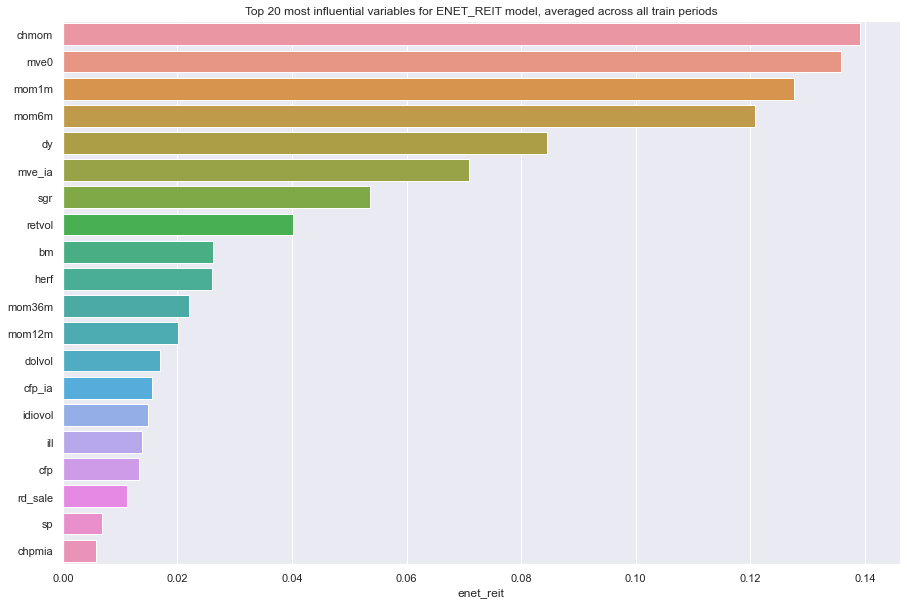

In [275]:
# Plot features of importance
# Plot graph
df_top20 = df_impt.sort_values(by=[model_name], ascending = False).head(20)
plt.figure(figsize=(15,10))
plt.title(f'Top 20 most influential variables for {model_name.upper()} model, averaged across all train periods')
sns.barplot(data = df_top20, x = model_name, y = df_top20.index);


In [276]:
# Merge df_temp to existing df_r2drecrease table

df_r2decrease_reit = pd.merge(
    left = df_r2decrease_reit,
    right = df_impt[model_name],
    how = 'left',
    left_index = True,
    right_index = True    
)

# Rank R2decrease table after including new model results
df_featurerank_reit = df_r2decrease_reit.rank() 
df_featurerank_reit['all_models'] = df_featurerank_reit.sum(axis=1)

# Display tables
display(df_r2decrease_reit)
display(df_featurerank_reit.sort_values('all_models', ascending = False))

# Save dfs to .csv 
df_r2decrease_reit.to_csv('../data/df_r2decrease_reit.csv', index = False)
df_featurerank_reit.to_csv('../data/df_featurerank_reit.csv', index = False)

lr_reit  huber_reit  ridge_reit  lasso_reit  enet_reit
absacc           0.000306   -0.001380    0.000189    0.000000   0.000000
acc              0.001430   -0.000741    0.001779    0.000000   0.000000
aeavol           0.000650    0.000668    0.005239    0.001173   0.001226
age              0.000137   -0.000080    0.001680    0.000018   0.000030
agr              0.000223    0.005201    0.003357    0.000000   0.000010
baspread         0.007390    0.007871    0.000149    0.000000   0.000000
beta             0.008894    0.057075    0.000315    0.000000   0.000000
betasq           0.013997    0.013039    0.002645    0.000000   0.000000
bm               0.001241    0.000853    0.024032    0.025538   0.026162
bm_ia            0.002404    0.004776    0.007611    0.004235   0.004285
cash             0.000161    0.000505    0.003340    0.000873   0.000927
cashdebt         0.000128   -0.001187    0.000750    0.000000   0.000000
cashpr           0.001257    0.002444    0.004893    0.001111   0.001181
cfp              0.006021    0.006040    0.008196    0.013265   0.013306
cfp_ia           0.001410    0.004166    0.007417    0.015930   0.015591
chatoia          0.000082   -0.000040   -0.000983   -0.000089  -0.000097
chcsho           0.000206   -0.000878    0.005366    0.002707   0.002796
chempia          0.001031    0.003782   -0.000006    0.000000   0.000000
chinv            0.000245   -0.000393    0.000482    0.000000   0.000000
chmom            0.052654    0.050540    0.096469    0.142593   0.139152
chpmia           0.002182    0.002565    0.011188    0.005567   0.005818
chtx            -0.000017   -0.000019    0.000188    0.000000   0.000000
cinvest          0.000038    0.000148    0.000281    0.000000   0.000000
convind          0.000886    0.000794    0.000866    0.000000   0.000000
currat           0.091179    0.044869   -0.000742    0.000000   0.000000
depr            -0.000063    0.000391    0.001464    0.000148   0.000158
divi             0.000153    0.000328    0.000156    0.000000   0.000000
divo             0.000145    0.000922    0.000460    0.000000   0.000000
dolvol           0.052843    0.089712    0.018587    0.017184   0.017007
dy               0.016294    0.015071    0.090116    0.083019   0.084596
ear              0.000198    0.000341    0.007511    0.004939   0.005175
egr              0.001280    0.002940    0.004116    0.001198   0.001247
ep               0.001748    0.010111    0.008772    0.004712   0.004875
gma              0.003155   -0.001219    0.004361    0.000000   0.000000
grcapx           0.000474    0.000658   -0.000177    0.000000   0.000000
grltnoa          0.002414    0.001948    0.004432    0.000000   0.000000
herf             0.023766    0.022687    0.023490    0.026236   0.026005
hire             0.000198    0.002251    0.000338    0.000000   0.000000
idiovol          0.000873   -0.000939    0.012297    0.014589   0.014951
ill              0.005484    0.010939    0.022225    0.013264   0.013836
indmom          -0.000049    0.000309    0.000357    0.000269   0.000290
invest           0.000890    0.000858    0.002343    0.000000   0.000000
lev             -0.000274   -0.002811   -0.002411    0.000000   0.000000
lgr              0.000145    0.000304    0.000079    0.000000   0.000000
maxret           0.025620    0.054758    0.005975    0.000000   0.000000
mom12m           0.004666    0.002331    0.047325    0.017174   0.020037
mom1m            0.019050    0.030089    0.134880    0.123642   0.127685
mom36m           0.004236    0.006796    0.023669    0.021621   0.022049
mom6m            0.056381    0.030482    0.053236    0.127055   0.120789
ms               0.000196    0.000743    0.002229    0.000000   0.000000
mve0             0.200379    0.212738    0.122775    0.137827   0.135776
mve_ia           0.116817    0.152169    0.033515    0.073484   0.070971
nincr            0.000252   -0.000371    0.002870    0.000004   0.000013
operprof         0.000132    0.000967    0.000443    0.000000   0.000000
org

lr_reit  huber_reit  ridge_reit  lasso_reit  enet_reit  \
mve0                94.0        94.0        93.0        93.0       93.0   
chmom               87.0        89.0        92.0        94.0       94.0   
mve_ia              92.0        93.0        86.0        89.0       89.0   
mom6m               89.0        85.0        89.0        92.0       91.0   
mom1m               84.0        84.0        94.0        91.0       92.0   
retvol              93.0        86.0        90.0        87.0       87.0   
dy                  83.0        82.0        91.0        90.0       90.0   
dolvol              88.0        92.0        81.0        83.0       82.0   
herf                85.0        83.0        83.0        86.0       85.0   
sgr                 79.0        76.0        87.0        88.0       88.0   
mom36m              72.0        72.0        84.0        84.0       84.0   
ill                 75.0        78.0        82.0        78.0       79.0   
mom12m              74.0        60.0        88.0        82.0       83.0   
cfp                 76.0        71.0        75.0        79.0       78.0   
rd_sale             73.0        74.0        74.0        77.0       77.0   
ep                  63.0        77.0        76.0        73.0       73.0   
chpmia              67.0        62.0        79.0        75.0       75.0   
bm                  54.0        47.0        85.0        85.0       86.0   
cfp_ia              57.0        67.0        71.0        81.0       81.0   
bm_ia               68.0        69.0        73.0        72.0       72.0   
sp                  59.0        75.0        66.0        76.0       76.0   
saleinv             66.0        55.0        78.0        69.0       69.0   
roavol              65.0        68.0        67.0        68.0       68.0   
tang                61.0        54.0        77.0        66.0       67.0   
turn                77.0        79.0        40.0        62.0       62.0   
egr                 56.0        63.0        58.0        65.0       65.0   
cashpr              55.0        61.0        62.0        63.0       63.0   
maxret              86.0        90.0        68.0        26.0       25.5   
idiovol             48.0         7.0        80.0        80.0       80.0   
zerotrade           82.0        57.0        50.0        53.0       52.0   
ear                 29.0        33.0        72.0        74.0       74.0   
aeavol              46.0        43.0        64.0        64.0       64.0   
std_dolvol          39.0        53.0        63.0        59.0       59.0   
pchdepr             43.0        35.0        57.0        67.0       66.0   
roic                47.0         6.0        70.0        70.0       70.0   
betasq              81.0        80.0        49.0        26.0       25.5   
beta                80.0        91.0        26.0        26.0       25.5   
chcsho              33.0         8.0        65.0        71.0       71.0   
roaq                62.0        65.0        69.0        26.0       25.5   
cash                25.0        39.0        54.0        61.0       61.0   
grltnoa             69.0        56.0        60.0        26.0       25.5   
agr                 35.0        70.0        55.0        26.0       48.0   
currat              90.0        87.0         4.0        26.0       25.5   
pchgm_pchsale       32.0        20.0        61.0        58.0       58.0   
salerec             26.0        26.0        56.0        60.0       60.0   
rsup                51.0        14.0        48.0        55.0       55.0   
baspread            78.0        73.0        18.0        26.0       25.5   
stdcf               70.0        81.0         9.0        26.0       25.5   
pchsale_pchinvt     27.0        28.0        51.0        52.0       51.0   
quick               91.0        88.0        24.0         2.0        2.0   
rd_mve               8.0        44.0        47.0        50.0       53.0   
nincr               37.0        13.0        53.0        49.0       49.0   
invest              50.0        48.0      

## Principal component regression

### REIT

In [285]:
df_results_reit = df_results_reit[:8]

In [286]:
# Create list of configs to test on 
def model_configs():
    # define scope of configs
    configs = range(1,91)
    print('Total configs (K_components): %d' %len(configs))
    return configs

def model_fit(X_train, y_train, cfg):
    # unpack config
    K = cfg
    model = make_pipeline(
        PCA(n_components = K),
        LinearRegression()
    )
    model.fit(X_train, y_train)
    return model


In [287]:
# Instantiate list of configurations
cfg_list = model_configs()

Total configs (K_components): 90


In [288]:
%%time
# Create model name 
model_name = 'pcr_reit'

# Create new row of test results
df_results_reit = pd.concat(
    [df_results_reit, pd.DataFrame([{'Model Name' : model_name,}])], 
    axis = 0
)

# Run grid search of hyperparameters
scores = grid_search(
    X = X_reit, 
    y = y_reit, 
    start_train = 1990, 
    start_val = 2001, 
    start_test = 2006, 
    cfg_list = cfg_list, 
    df_results = df_results_reit
)

# Print results
print ('Top 8 Configs')
print ('Config, R2_validate, RMSE_validate, R2_train, RMSE_train')
for cfg, r2_validate, rmse_validate, r2_train, rmse_train, in scores[:8]:
    print (f'{cfg}, {r2_validate:.2f}, {rmse_validate:.2f}, {r2_train:.2f}, {rmse_train:.2f}')

1, 1.43, 10.18, 0.30, 10.43
2, 1.42, 10.18, 0.30, 10.43
3, 1.43, 10.18, 0.31, 10.43
4, 1.43, 10.18, 0.31, 10.43
5, 1.44, 10.18, 0.31, 10.43
6, 1.43, 10.18, 0.34, 10.43
7, 1.47, 10.18, 0.35, 10.43
8, 1.60, 10.18, 0.39, 10.43
9, 1.64, 10.17, 0.39, 10.43
10, 1.62, 10.17, 0.39, 10.43
11, 1.61, 10.17, 0.39, 10.43
12, 1.62, 10.17, 0.39, 10.43
13, 1.65, 10.17, 0.41, 10.42
14, 1.64, 10.17, 0.40, 10.43
15, 1.68, 10.17, 0.40, 10.43
16, 1.75, 10.17, 0.42, 10.42
17, 1.78, 10.17, 0.45, 10.42
18, 1.74, 10.17, 0.46, 10.42
19, 1.59, 10.18, 0.67, 10.41
20, 1.63, 10.17, 0.65, 10.41
21, 1.67, 10.17, 0.67, 10.41
22, 1.61, 10.17, 0.71, 10.41
23, 1.74, 10.17, 0.80, 10.40
24, 1.70, 10.17, 0.73, 10.41
25, 1.88, 10.16, 0.90, 10.40
26, 1.85, 10.16, 0.84, 10.40
27, 1.79, 10.17, 0.91, 10.40
28, 1.89, 10.16, 0.90, 10.40
29, 1.85, 10.16, 0.93, 10.40
30, 1.70, 10.17, 0.93, 10.40
31, 1.72, 10.17, 0.90, 10.40
32, 1.78, 10.17, 0.91, 10.40
33, 1.71, 10.17, 0.99, 10.39
34, 1.77, 10.17, 0.99, 10.39
35, 1.71, 10.17, 0.99, 

Model Name             Selected Config Train (1990-2000)  \
0        naive_reit                        N.A.      0.00 (10.45)   
0           lr_reit                        N.A.       1.99 (10.3)   
0  fama-french_reit                    bm, mve0       0.36 (10.4)   
0      carhart_reit            bm, mve0, mom12m       0.52 (10.4)   
0        huber_reit               [3.0, 0.0001]      1.58 (10.36)   
0        ridge_reit        [19920.457084538713]      1.19 (10.38)   
0        lasso_reit       [0.07196856730011514]      1.28 (10.38)   
0         enet_reit  [0.9, 0.07880462815669913]      1.28 (10.38)   
0          pcr_reit                          28      0.90 (10.40)   

  Validate (2001-2005) Test (2006-2020)  Test (2006)    Test (2007)  \
0         0.00 (10.26)     0.00 (12.13)  0.00 (7.60)   0.00 (11.29)   
0          0.69 (10.2)    -0.03 (12.13)  4.17 (7.44)  -3.50 (11.48)   
0          1.52 (10.2)     0.17 (12.12)  3.84 (7.45)  -4.46 (11.54)   
0          1.68 (10.2)     0.16 (12.12)  4.37 (7.43)  -3.46 (11.48)   
0         0.90 (10.21)    -0.07 (12.13)  3.50 (7.47)  -2.04 (11.40)   
0         1.82 (10.16)     0.18 (12.12)  4.43 (7.43)  -3.65 (11.49)   
0         1.93 (10.16)     0.23 (12.11)  4.37 (7.43)  -3.54 (11.49)   
0         1.93 (10.16)     0.23 (12.11)  4.37 (7.43)  -3.54 (11.49)   
0         1.89 (10.16)              NaN          NaN            NaN   

     Test (2008)    Test (2009)   Test (2010)    Test (2011)  Test (2012)  \
0   0.00 (19.81)   0.00 (25.18)  0.00 (12.47)   0.00 (10.08)  0.00 (9.46)   
0  -0.55 (19.87)  -0.02 (25.19)  1.79 (12.36)  -2.03 (10.19)  3.18 (9.31)   
0  -1.84 (19.99)   0.64 (25.10)  2.03 (12.34)  -0.68 (10.12)  3.28 (9.31)   
0  -1.33 (19.94)   0.15 (25.16)  2.04 (12.34)  -0.71 (10.12)  2.65 (9.34)   
0  -0.24 (19.84)  -0.24 (25.21)  0.25 (12.45)  -0.65 (10.12)  1.09 (9.41)   
0  -1.12 (19.92)   0.16 (25.16)  1.98 (12.34)  -1.29 (10.15)  3.80 (9.28)   
0  -1.09 (19.92)   0.26 (25.15)  2.08 (12.34)  -1.03 (10.14)  3.42 (9.30)   
0  -1.09 (19.92)   0.26 (25.15)  2.08 (12.34)  -1.03 (10.14)  3.43 (9.30)   
0            NaN            NaN           NaN            NaN          NaN   

   Test (2013)  Test (2014)   Test (2015)  Test (2016)   Test (2017)  \
0  0.00 (9.44)  0.00 (7.04)   0.00 (7.47)  0.00 (9.09)   0.00 (7.08)   
0  1.38 (9.37)  1.59 (6.99)  -2.95 (7.58)  2.22 (8.98)  -1.00 (7.12)   
0  1.25 (9.38)  3.36 (6.92)  -1.87 (7.54)  2.06 (8.99)   1.06 (7.05)   
0  1.65 (9.36)  3.06 (6.93)  -1.88 (7.54)  1.71 (9.01)   0.85 (7.05)   
0  0.70 (9.40)  2.18 (6.96)  -2.61 (7.57)  1.41 (9.02)  -0.62 (7.11)   
0  1.91 (9.35)  2.74 (6.94)  -1.82 (7.54)  2.31 (8.98)   0.49 (7.07)   
0  1.89 (9.35)  3.51 (6.92)  -1.64 (7.54)  1.70 (9.01)   0.50 (7.07)   
0  1.90 (9.35)  3.52 (6.92)  -1.63 (7.54)  1.71 (9.01)   0.52 (7.07)   
0          NaN          NaN           NaN          NaN           NaN   

    Test (2018)  Test (2019)    Test (2020) Remarks  
0   0.00 (8.03)  0.00 (8.37)   0.00 (18.42)     NaN  
0  -5.43 (8.25)  3.70 (8.21)  -0.21 (18.43)     NaN  
0  -2.57 (8.14)  3.50 (8.22)  -0.05 (18.42)     NaN  
0  -2.06 (8.12)  3.34 (8.23)  -0.13 (18.43)     NaN  
0  -2.98 (8.15)  2.99 (8.24)  -0.31 (18.44)     NaN  
0  -4.39 (8.21)  4.05 (8.20)  -0.13 (18.43)     NaN  
0  -4.16 (8.20)  4.21 (8.19)  -0.07 (18.42)     NaN  
0  -4.17 (8.20)  4.20 (8.19)  -0.07 (18.42)     NaN  
0           NaN          NaN            NaN     NaN

Top 8 Configs
Config, R2_validate, RMSE_validate, R2_train, RMSE_train
28, 1.89, 10.16, 0.90, 10.40
25, 1.88, 10.16, 0.90, 10.40
26, 1.85, 10.16, 0.84, 10.40
29, 1.85, 10.16, 0.93, 10.40
27, 1.79, 10.17, 0.91, 10.40
32, 1.78, 10.17, 0.91, 10.40
17, 1.78, 10.17, 0.45, 10.42
43, 1.77, 10.17, 1.03, 10.39
CPU times: user 56.3 s, sys: 37.9 s, total: 1min 34s
Wall time: 19.3 s


Top 8 Configs

Config, R2_validate, RMSE_validate, R2_train, RMSE_train

24, 1.92, 10.16, 0.86, 10.40

29, 1.89, 10.16, 0.93, 10.40

25, 1.85, 10.16, 0.89, 10.40

17, 1.84, 10.16, 0.46, 10.42

27, 1.81, 10.16, 0.93, 10.40

18, 1.80, 10.16, 0.47, 10.42

26, 1.78, 10.17, 0.92, 10.40

31, 1.77, 10.17, 0.96, 10.40

CPU times: user 49.9 s, sys: 39 s, total: 1min 28s

Wall time: 17.7 s

In [289]:
%%time
# Chosen configuration for model
selected_cfg = scores[0][0]

# Out-of-sample testing, no need to do validation after hyperparameters are selected
score = walk_forward(
    selected_cfg, 
    X = X_reit, 
    y = y_reit, 
    start_train = 1990, 
    start_val = 2006, # Set equal to start of test year, so that train year ends just before test year
    start_test = 2006,
    final_year_of_testing = 2020, 
    df_results = df_results_reit
)

print(f'On best performing config: {scores[0][0]}')

# Save df_results to .csv 
df_results_reit.to_csv('../data/df_results_reit.csv', index = False)

Test year 2006 done, R2 score is 3.79
Test year 2006 done, RMSE score is 7.46
Test year 2007 done, R2 score is -3.68
Test year 2007 done, RMSE score is 11.49
Test year 2008 done, R2 score is -1.31
Test year 2008 done, RMSE score is 19.94
Test year 2009 done, R2 score is 0.20
Test year 2009 done, RMSE score is 25.16
Test year 2010 done, R2 score is 2.13
Test year 2010 done, RMSE score is 12.33
Test year 2011 done, R2 score is -1.07
Test year 2011 done, RMSE score is 10.14
Test year 2012 done, R2 score is 3.27
Test year 2012 done, RMSE score is 9.31
Test year 2013 done, R2 score is 1.65
Test year 2013 done, RMSE score is 9.36
Test year 2014 done, R2 score is 3.16
Test year 2014 done, RMSE score is 6.93
Test year 2015 done, R2 score is -2.25
Test year 2015 done, RMSE score is 7.56
Test year 2016 done, R2 score is 2.12
Test year 2016 done, RMSE score is 8.99
Test year 2017 done, R2 score is 0.29
Test year 2017 done, RMSE score is 7.07
Test year 2018 done, R2 score is -4.42
Test year 2018 d

Model Name             Selected Config Train (1990-2000)  \
0        naive_reit                        N.A.      0.00 (10.45)   
0           lr_reit                        N.A.       1.99 (10.3)   
0  fama-french_reit                    bm, mve0       0.36 (10.4)   
0      carhart_reit            bm, mve0, mom12m       0.52 (10.4)   
0        huber_reit               [3.0, 0.0001]      1.58 (10.36)   
0        ridge_reit        [19920.457084538713]      1.19 (10.38)   
0        lasso_reit       [0.07196856730011514]      1.28 (10.38)   
0         enet_reit  [0.9, 0.07880462815669913]      1.28 (10.38)   
0          pcr_reit                          28      0.90 (10.40)   

  Validate (2001-2005) Test (2006-2020)  Test (2006)    Test (2007)  \
0         0.00 (10.26)     0.00 (12.13)  0.00 (7.60)   0.00 (11.29)   
0          0.69 (10.2)    -0.03 (12.13)  4.17 (7.44)  -3.50 (11.48)   
0          1.52 (10.2)     0.17 (12.12)  3.84 (7.45)  -4.46 (11.54)   
0          1.68 (10.2)     0.16 (12.12)  4.37 (7.43)  -3.46 (11.48)   
0         0.90 (10.21)    -0.07 (12.13)  3.50 (7.47)  -2.04 (11.40)   
0         1.82 (10.16)     0.18 (12.12)  4.43 (7.43)  -3.65 (11.49)   
0         1.93 (10.16)     0.23 (12.11)  4.37 (7.43)  -3.54 (11.49)   
0         1.93 (10.16)     0.23 (12.11)  4.37 (7.43)  -3.54 (11.49)   
0         1.89 (10.16)     0.09 (12.12)  3.79 (7.46)  -3.68 (11.49)   

     Test (2008)    Test (2009)   Test (2010)    Test (2011)  Test (2012)  \
0   0.00 (19.81)   0.00 (25.18)  0.00 (12.47)   0.00 (10.08)  0.00 (9.46)   
0  -0.55 (19.87)  -0.02 (25.19)  1.79 (12.36)  -2.03 (10.19)  3.18 (9.31)   
0  -1.84 (19.99)   0.64 (25.10)  2.03 (12.34)  -0.68 (10.12)  3.28 (9.31)   
0  -1.33 (19.94)   0.15 (25.16)  2.04 (12.34)  -0.71 (10.12)  2.65 (9.34)   
0  -0.24 (19.84)  -0.24 (25.21)  0.25 (12.45)  -0.65 (10.12)  1.09 (9.41)   
0  -1.12 (19.92)   0.16 (25.16)  1.98 (12.34)  -1.29 (10.15)  3.80 (9.28)   
0  -1.09 (19.92)   0.26 (25.15)  2.08 (12.34)  -1.03 (10.14)  3.42 (9.30)   
0  -1.09 (19.92)   0.26 (25.15)  2.08 (12.34)  -1.03 (10.14)  3.43 (9.30)   
0  -1.31 (19.94)   0.20 (25.16)  2.13 (12.33)  -1.07 (10.14)  3.27 (9.31)   

   Test (2013)  Test (2014)   Test (2015)  Test (2016)   Test (2017)  \
0  0.00 (9.44)  0.00 (7.04)   0.00 (7.47)  0.00 (9.09)   0.00 (7.08)   
0  1.38 (9.37)  1.59 (6.99)  -2.95 (7.58)  2.22 (8.98)  -1.00 (7.12)   
0  1.25 (9.38)  3.36 (6.92)  -1.87 (7.54)  2.06 (8.99)   1.06 (7.05)   
0  1.65 (9.36)  3.06 (6.93)  -1.88 (7.54)  1.71 (9.01)   0.85 (7.05)   
0  0.70 (9.40)  2.18 (6.96)  -2.61 (7.57)  1.41 (9.02)  -0.62 (7.11)   
0  1.91 (9.35)  2.74 (6.94)  -1.82 (7.54)  2.31 (8.98)   0.49 (7.07)   
0  1.89 (9.35)  3.51 (6.92)  -1.64 (7.54)  1.70 (9.01)   0.50 (7.07)   
0  1.90 (9.35)  3.52 (6.92)  -1.63 (7.54)  1.71 (9.01)   0.52 (7.07)   
0  1.65 (9.36)  3.16 (6.93)  -2.25 (7.56)  2.12 (8.99)   0.29 (7.07)   

    Test (2018)  Test (2019)    Test (2020) Remarks  
0   0.00 (8.03)  0.00 (8.37)   0.00 (18.42)     NaN  
0  -5.43 (8.25)  3.70 (8.21)  -0.21 (18.43)     NaN  
0  -2.57 (8.14)  3.50 (8.22)  -0.05 (18.42)     NaN  
0  -2.06 (8.12)  3.34 (8.23)  -0.13 (18.43)     NaN  
0  -2.98 (8.15)  2.99 (8.24)  -0.31 (18.44)     NaN  
0  -4.39 (8.21)  4.05 (8.20)  -0.13 (18.43)     NaN  
0  -4.16 (8.20)  4.21 (8.19)  -0.07 (18.42)     NaN  
0  -4.17 (8.20)  4.20 (8.19)  -0.07 (18.42)     NaN  
0  -4.42 (8.21)  3.98 (8.20)  -0.23 (18.44)     NaN


R2 for entire pooled test set, from 2006 to 2020, is 0.09.
RMSE for entire pooled test set, from 2006 to 2020, is 12.12.

On best performing config: 28
CPU times: user 14.5 s, sys: 11.3 s, total: 25.8 s
Wall time: 5.25 s


R2 for entire pooled test set, from 2006 to 2020, is 0.09.

RMSE for entire pooled test set, from 2006 to 2020, is 12.12.

On best performing config: 28

CPU times: user 14.5 s, sys: 11.3 s, total: 25.8 s

Wall time: 5.25 s

### Sample 1

In [290]:
df_results_sample1 = df_results_sample1[:8]

In [291]:
%%time
# Create model name 
model_name = 'pcr_sample1'

# Create new row of test results
df_results_sample1 = pd.concat(
    [df_results_sample1, pd.DataFrame([{'Model Name' : model_name,}])], 
    axis = 0
)

# Run grid search of hyperparameters
scores = grid_search(
    X = X_1, 
    y = y_1, 
    start_train = 1990, 
    start_val = 2001, 
    start_test = 2006, 
    cfg_list = cfg_list, 
    df_results = df_results_sample1
)

# Print results
print ('Top 8 Configs')
print ('Config, R2_validate, RMSE_validate, R2_train, RMSE_train')
for cfg, r2_validate, rmse_validate, r2_train, rmse_train, in scores[:8]:
    print (f'{cfg}, {r2_validate:.2f}, {rmse_validate:.2f}, {r2_train:.2f}, {rmse_train:.2f}')

1, 0.38, 18.97, 0.18, 20.86
2, 0.38, 18.97, 0.19, 20.86
3, 0.35, 18.97, 0.19, 20.86
4, 0.30, 18.98, 0.28, 20.85
5, 0.28, 18.98, 0.33, 20.84
6, 0.27, 18.98, 0.34, 20.84
7, 0.28, 18.98, 0.36, 20.84
8, 0.27, 18.98, 0.36, 20.84
9, 0.26, 18.98, 0.36, 20.84
10, 0.27, 18.98, 0.36, 20.84
11, 0.31, 18.98, 0.37, 20.84
12, 0.33, 18.98, 0.39, 20.84
13, 0.31, 18.98, 0.40, 20.84
14, 0.27, 18.98, 0.41, 20.83
15, 0.33, 18.98, 0.49, 20.83
16, 0.39, 18.97, 0.53, 20.82
17, 0.34, 18.97, 0.52, 20.82
18, 0.46, 18.96, 0.61, 20.81
19, 0.45, 18.96, 0.60, 20.81
20, 0.48, 18.96, 0.66, 20.81
21, 0.51, 18.96, 0.70, 20.80
22, 0.43, 18.97, 0.71, 20.80
23, 0.41, 18.97, 0.82, 20.79
24, 0.31, 18.98, 0.92, 20.78
25, 0.10, 19.00, 0.95, 20.78
26, 0.42, 18.97, 0.77, 20.80
27, 0.17, 18.99, 0.99, 20.77
28, 0.33, 18.98, 0.86, 20.79
29, 0.18, 18.99, 0.95, 20.78
30, 0.11, 19.00, 0.98, 20.77
31, 0.15, 18.99, 0.98, 20.77
32, 0.14, 18.99, 0.99, 20.77
33, 0.11, 19.00, 1.02, 20.77
34, 0.21, 18.99, 0.98, 20.78
35, 0.14, 18.99, 1.01, 

Model Name        Selected Config Train (1990-2000)  \
0        naive_sample1                   N.A.      0.00 (20.88)   
0           lr_sample1                   N.A.       1.66 (20.7)   
0  fama-french_sample1               bm, mve0       0.21 (20.9)   
0      carhart_sample1       bm, mve0, mom12m       0.25 (20.9)   
0        huber_sample1            [9, 0.0001]      1.57 (20.71)   
0        ridge_sample1    [50084.07989848212]      0.86 (20.79)   
0        lasso_sample1  [0.47148663634573895]      0.51 (20.82)   
0         enet_sample1             [0.3, 1.0]      0.65 (20.81)   
0          pcr_sample1                     21      0.70 (20.80)   

  Validate (2001-2005) Test (2006-2020)    Test (2006)    Test (2007)  \
0         0.00 (19.01)     0.00 (15.77)   0.00 (14.72)   0.00 (12.19)   
0         -0.45 (19.0)    -0.49 (15.80)  -0.80 (14.78)  -4.28 (12.45)   
0          0.32 (19.0)     0.13 (15.76)   0.74 (14.66)  -1.74 (12.30)   
0          0.31 (19.0)     0.11 (15.76)   0.62 (14.67)  -1.56 (12.29)   
0        -0.21 (19.03)    -0.29 (15.79)  -0.52 (14.76)  -2.89 (12.37)   
0         0.53 (18.96)     0.04 (15.76)   0.48 (14.68)  -2.36 (12.34)   
0         0.44 (18.97)     0.11 (15.76)   0.91 (14.65)  -2.18 (12.33)   
0         0.46 (18.96)     0.11 (15.76)   0.81 (14.66)  -2.17 (12.33)   
0         0.51 (18.96)              NaN            NaN            NaN   

     Test (2008)   Test (2009)    Test (2010)    Test (2011)   Test (2012)  \
0   0.00 (20.06)  0.00 (24.51)   0.00 (15.28)   0.00 (13.93)  0.00 (12.77)   
0  -2.82 (20.35)  0.66 (24.43)  -0.84 (15.34)  -1.28 (14.02)  0.52 (12.74)   
0  -2.49 (20.31)  0.77 (24.41)   1.13 (15.19)  -0.88 (13.99)  0.74 (12.72)   
0  -2.28 (20.29)  0.56 (24.44)   0.90 (15.21)  -0.76 (13.99)  0.76 (12.72)   
0  -2.15 (20.28)  0.58 (24.44)  -0.76 (15.34)  -0.67 (13.98)  0.54 (12.73)   
0  -2.61 (20.32)  0.86 (24.40)   0.60 (15.23)  -0.88 (13.99)  0.87 (12.71)   
0  -2.59 (20.32)  0.85 (24.40)   1.12 (15.19)  -0.96 (14.00)  0.80 (12.72)   
0  -2.61 (20.32)  0.80 (24.41)   1.16 (15.19)  -0.98 (14.00)  0.82 (12.72)   
0            NaN           NaN            NaN            NaN           NaN   

    Test (2013)    Test (2014)    Test (2015)    Test (2016)    Test (2017)  \
0  0.00 (12.20)   0.00 (11.34)   0.00 (14.08)   0.00 (16.07)   0.00 (12.67)   
0  2.52 (12.05)  -1.37 (11.42)  -1.45 (14.18)  -0.12 (16.08)  -0.16 (12.68)   
0  2.08 (12.07)   0.01 (11.34)  -0.61 (14.12)   0.67 (16.01)   0.91 (12.61)   
0  2.29 (12.06)   0.03 (11.34)  -0.50 (14.11)   0.57 (16.02)   0.70 (12.62)   
0  2.45 (12.05)  -0.60 (11.37)  -1.17 (14.16)  -0.11 (16.07)   0.03 (12.67)   
0  2.81 (12.03)  -0.26 (11.35)  -0.64 (14.12)   0.49 (16.03)   0.37 (12.64)   
0  2.04 (12.07)  -0.15 (11.35)  -0.62 (14.12)   0.72 (16.01)   0.87 (12.61)   
0  2.28 (12.06)  -0.26 (11.35)  -0.56 (14.12)   0.68 (16.01)   0.86 (12.61)   
0           NaN            NaN            NaN            NaN            NaN   

     Test (2018)   Test (2019)   Test (2020) Remarks  
0   0.00 (13.97)  0.00 (15.38)  0.00 (22.31)     NaN  
0  -2.02 (14.11)  0.46 (15.34)  0.74 (22.23)     NaN  
0  -1.56 (14.08)  0.86 (15.31)  0.78 (22.22)     NaN  
0  -1.53 (14.08)  0.95 (15.31)  0.71 (22.23)     NaN  
0  -1.50 (14.08)  0.44 (15.35)  0.50 (22.25)     NaN  
0  -1.58 (14.08)  0.82 (15.32)  0.76 (22.22)     NaN  
0  -1.65 (14.09)  0.79 (15.32)  0.80 (22.22)     NaN  
0  -1.60 (14.09)  0.80 (15.32)  0.81 (22.22)     NaN  
0            NaN           NaN           NaN     NaN

Top 8 Configs
Config, R2_validate, RMSE_validate, R2_train, RMSE_train
21, 0.51, 18.96, 0.70, 20.80
20, 0.48, 18.96, 0.66, 20.81
18, 0.46, 18.96, 0.61, 20.81
19, 0.45, 18.96, 0.60, 20.81
22, 0.43, 18.97, 0.71, 20.80
26, 0.42, 18.97, 0.77, 20.80
23, 0.41, 18.97, 0.82, 20.79
16, 0.39, 18.97, 0.53, 20.82
CPU times: user 54.9 s, sys: 38.4 s, total: 1min 33s
Wall time: 18.9 s


Top 8 Configs

Config, R2_validate, RMSE_validate, R2_train, RMSE_train

21, 0.51, 18.96, 0.70, 20.80

20, 0.48, 18.96, 0.66, 20.81

18, 0.46, 18.96, 0.61, 20.81

19, 0.45, 18.96, 0.60, 20.81

22, 0.43, 18.97, 0.71, 20.80

26, 0.42, 18.97, 0.77, 20.80

23, 0.41, 18.97, 0.82, 20.79

16, 0.39, 18.97, 0.53, 20.82

CPU times: user 54.9 s, sys: 38.4 s, total: 1min 33s

Wall time: 18.9 s

In [292]:
%%time
# Chosen configuration for model
selected_cfg = scores[0][0]

# Out-of-sample testing, no need to do validation after hyperparameters are selected
score = walk_forward(
    selected_cfg, 
    X = X_1, 
    y = y_1, 
    start_train = 1990, 
    start_val = 2006, # Set equal to start of test year, so that train year ends just before test year
    start_test = 2006,
    final_year_of_testing = 2020, 
    df_results = df_results_sample1
)

print(f'On best performing config: {scores[0][0]}')

# Save df_results to .csv 
df_results_sample1.to_csv('../data/df_results_sample1.csv', index = False)

Test year 2006 done, R2 score is -0.61
Test year 2006 done, RMSE score is 14.76
Test year 2007 done, R2 score is -2.45
Test year 2007 done, RMSE score is 12.34
Test year 2008 done, R2 score is -2.98
Test year 2008 done, RMSE score is 20.36
Test year 2009 done, R2 score is 0.79
Test year 2009 done, RMSE score is 24.41
Test year 2010 done, R2 score is 0.51
Test year 2010 done, RMSE score is 15.24
Test year 2011 done, R2 score is -0.95
Test year 2011 done, RMSE score is 14.00
Test year 2012 done, R2 score is 0.67
Test year 2012 done, RMSE score is 12.73
Test year 2013 done, R2 score is 2.67
Test year 2013 done, RMSE score is 12.04
Test year 2014 done, R2 score is -0.87
Test year 2014 done, RMSE score is 11.39
Test year 2015 done, R2 score is -0.56
Test year 2015 done, RMSE score is 14.12
Test year 2016 done, R2 score is 0.27
Test year 2016 done, RMSE score is 16.04
Test year 2017 done, R2 score is 0.05
Test year 2017 done, RMSE score is 12.66
Test year 2018 done, R2 score is -1.78
Test ye

Model Name        Selected Config Train (1990-2000)  \
0        naive_sample1                   N.A.      0.00 (20.88)   
0           lr_sample1                   N.A.       1.66 (20.7)   
0  fama-french_sample1               bm, mve0       0.21 (20.9)   
0      carhart_sample1       bm, mve0, mom12m       0.25 (20.9)   
0        huber_sample1            [9, 0.0001]      1.57 (20.71)   
0        ridge_sample1    [50084.07989848212]      0.86 (20.79)   
0        lasso_sample1  [0.47148663634573895]      0.51 (20.82)   
0         enet_sample1             [0.3, 1.0]      0.65 (20.81)   
0          pcr_sample1                     21      0.70 (20.80)   

  Validate (2001-2005) Test (2006-2020)    Test (2006)    Test (2007)  \
0         0.00 (19.01)     0.00 (15.77)   0.00 (14.72)   0.00 (12.19)   
0         -0.45 (19.0)    -0.49 (15.80)  -0.80 (14.78)  -4.28 (12.45)   
0          0.32 (19.0)     0.13 (15.76)   0.74 (14.66)  -1.74 (12.30)   
0          0.31 (19.0)     0.11 (15.76)   0.62 (14.67)  -1.56 (12.29)   
0        -0.21 (19.03)    -0.29 (15.79)  -0.52 (14.76)  -2.89 (12.37)   
0         0.53 (18.96)     0.04 (15.76)   0.48 (14.68)  -2.36 (12.34)   
0         0.44 (18.97)     0.11 (15.76)   0.91 (14.65)  -2.18 (12.33)   
0         0.46 (18.96)     0.11 (15.76)   0.81 (14.66)  -2.17 (12.33)   
0         0.51 (18.96)    -0.18 (15.78)  -0.61 (14.76)  -2.45 (12.34)   

     Test (2008)   Test (2009)    Test (2010)    Test (2011)   Test (2012)  \
0   0.00 (20.06)  0.00 (24.51)   0.00 (15.28)   0.00 (13.93)  0.00 (12.77)   
0  -2.82 (20.35)  0.66 (24.43)  -0.84 (15.34)  -1.28 (14.02)  0.52 (12.74)   
0  -2.49 (20.31)  0.77 (24.41)   1.13 (15.19)  -0.88 (13.99)  0.74 (12.72)   
0  -2.28 (20.29)  0.56 (24.44)   0.90 (15.21)  -0.76 (13.99)  0.76 (12.72)   
0  -2.15 (20.28)  0.58 (24.44)  -0.76 (15.34)  -0.67 (13.98)  0.54 (12.73)   
0  -2.61 (20.32)  0.86 (24.40)   0.60 (15.23)  -0.88 (13.99)  0.87 (12.71)   
0  -2.59 (20.32)  0.85 (24.40)   1.12 (15.19)  -0.96 (14.00)  0.80 (12.72)   
0  -2.61 (20.32)  0.80 (24.41)   1.16 (15.19)  -0.98 (14.00)  0.82 (12.72)   
0  -2.98 (20.36)  0.79 (24.41)   0.51 (15.24)  -0.95 (14.00)  0.67 (12.73)   

    Test (2013)    Test (2014)    Test (2015)    Test (2016)    Test (2017)  \
0  0.00 (12.20)   0.00 (11.34)   0.00 (14.08)   0.00 (16.07)   0.00 (12.67)   
0  2.52 (12.05)  -1.37 (11.42)  -1.45 (14.18)  -0.12 (16.08)  -0.16 (12.68)   
0  2.08 (12.07)   0.01 (11.34)  -0.61 (14.12)   0.67 (16.01)   0.91 (12.61)   
0  2.29 (12.06)   0.03 (11.34)  -0.50 (14.11)   0.57 (16.02)   0.70 (12.62)   
0  2.45 (12.05)  -0.60 (11.37)  -1.17 (14.16)  -0.11 (16.07)   0.03 (12.67)   
0  2.81 (12.03)  -0.26 (11.35)  -0.64 (14.12)   0.49 (16.03)   0.37 (12.64)   
0  2.04 (12.07)  -0.15 (11.35)  -0.62 (14.12)   0.72 (16.01)   0.87 (12.61)   
0  2.28 (12.06)  -0.26 (11.35)  -0.56 (14.12)   0.68 (16.01)   0.86 (12.61)   
0  2.67 (12.04)  -0.87 (11.39)  -0.56 (14.12)   0.27 (16.04)   0.05 (12.66)   

     Test (2018)   Test (2019)   Test (2020) Remarks  
0   0.00 (13.97)  0.00 (15.38)  0.00 (22.31)     NaN  
0  -2.02 (14.11)  0.46 (15.34)  0.74 (22.23)     NaN  
0  -1.56 (14.08)  0.86 (15.31)  0.78 (22.22)     NaN  
0  -1.53 (14.08)  0.95 (15.31)  0.71 (22.23)     NaN  
0  -1.50 (14.08)  0.44 (15.35)  0.50 (22.25)     NaN  
0  -1.58 (14.08)  0.82 (15.32)  0.76 (22.22)     NaN  
0  -1.65 (14.09)  0.79 (15.32)  0.80 (22.22)     NaN  
0  -1.60 (14.09)  0.80 (15.32)  0.81 (22.22)     NaN  
0  -1.78 (14.10)  0.85 (15.31)  0.59 (22.24)     NaN


R2 for entire pooled test set, from 2006 to 2020, is -0.18.
RMSE for entire pooled test set, from 2006 to 2020, is 15.78.

On best performing config: 21
CPU times: user 11.9 s, sys: 10.6 s, total: 22.5 s
Wall time: 4.32 s


R2 for entire pooled test set, from 2006 to 2020, is -0.18.

RMSE for entire pooled test set, from 2006 to 2020, is 15.78.

On best performing config: 21

CPU times: user 11.9 s, sys: 10.6 s, total: 22.5 s

Wall time: 4.32 s

### Sample 2

In [293]:
df_results_sample2 = df_results_sample2[:8]

In [294]:
%%time
# Create model name 
model_name = 'pcr_sample2'

# Create new row of test results
df_results_sample2 = pd.concat(
    [df_results_sample2, pd.DataFrame([{'Model Name' : model_name,}])], 
    axis = 0
)

# Run grid search of hyperparameters
scores = grid_search(
    X = X_2, 
    y = y_2, 
    start_train = 1990, 
    start_val = 2001, 
    start_test = 2006, 
    cfg_list = cfg_list, 
    df_results = df_results_sample2
)

# Print results
print ('Top 8 Configs')
print ('Config, R2_validate, RMSE_validate, R2_train, RMSE_train')
for cfg, r2_validate, rmse_validate, r2_train, rmse_train, in scores[:8]:
    print (f'{cfg}, {r2_validate:.2f}, {rmse_validate:.2f}, {r2_train:.2f}, {rmse_train:.2f}')

1, 1.57, 12.19, 0.80, 13.94
2, 1.61, 12.19, 0.82, 13.94
3, 1.64, 12.19, 0.87, 13.94
4, 1.58, 12.19, 0.88, 13.94
5, 1.61, 12.19, 0.90, 13.94
6, 1.61, 12.19, 0.90, 13.94
7, 1.58, 12.19, 0.92, 13.94
8, 1.58, 12.19, 0.92, 13.94
9, 1.58, 12.19, 0.93, 13.94
10, 1.58, 12.19, 0.92, 13.94
11, 1.53, 12.19, 0.95, 13.93
12, 1.53, 12.19, 1.00, 13.93
13, 1.55, 12.19, 1.03, 13.93
14, 1.50, 12.19, 1.02, 13.93
15, 1.69, 12.18, 1.08, 13.92
16, 1.63, 12.19, 1.11, 13.92
17, 1.65, 12.19, 1.10, 13.92
18, 1.62, 12.19, 1.11, 13.92
19, 1.64, 12.19, 1.10, 13.92
20, 1.66, 12.18, 1.14, 13.92
21, 1.71, 12.18, 1.15, 13.92
22, 1.74, 12.18, 1.15, 13.92
23, 1.76, 12.18, 1.17, 13.92
24, 1.70, 12.18, 1.16, 13.92
25, 1.77, 12.18, 1.19, 13.92
26, 1.73, 12.18, 1.19, 13.92
27, 1.75, 12.18, 1.18, 13.92
28, 1.79, 12.18, 1.21, 13.92
29, 1.69, 12.18, 1.21, 13.92
30, 1.72, 12.18, 1.22, 13.91
31, 1.79, 12.18, 1.20, 13.92
32, 1.72, 12.18, 1.21, 13.92
33, 1.71, 12.18, 1.25, 13.91
34, 1.72, 12.18, 1.24, 13.91
35, 1.71, 12.18, 1.24, 

Model Name            Selected Config Train (1990-2000)  \
0        naive_sample2                       N.A.      0.00 (14.00)   
0           lr_sample2                       N.A.       2.18 (13.8)   
0  fama-french_sample2                   bm, mve0       0.68 (14.0)   
0      carhart_sample2           bm, mve0, mom12m       0.68 (14.0)   
0        huber_sample2                [9, 0.0001]      1.99 (13.86)   
0        ridge_sample2        [38867.76690892668]      1.49 (13.90)   
0        lasso_sample2      [0.15264179671752318]      1.39 (13.90)   
0         enet_sample2  [0.5, 0.2807216203941176]      1.38 (13.90)   
0          pcr_sample2                         31      1.20 (13.92)   

  Validate (2001-2005) Test (2006-2020)  Test (2006)   Test (2007)  \
0         0.00 (12.29)     0.00 (12.32)  0.00 (9.17)   0.00 (8.99)   
0          0.65 (12.2)     0.22 (12.30)  0.56 (9.15)  -3.53 (9.15)   
0          1.15 (12.2)     0.56 (12.28)  1.74 (9.09)  -2.06 (9.09)   
0          1.15 (12.2)     0.56 (12.28)  1.75 (9.09)  -2.06 (9.09)   
0         0.79 (12.24)     0.39 (12.29)  1.20 (9.12)  -3.22 (9.14)   
0         1.78 (12.18)     0.69 (12.27)  1.89 (9.08)  -2.63 (9.11)   
0         1.76 (12.18)     0.75 (12.27)  2.20 (9.07)  -2.40 (9.10)   
0         1.77 (12.18)     0.76 (12.27)  2.21 (9.07)  -2.39 (9.10)   
0         1.79 (12.18)              NaN          NaN           NaN   

     Test (2008)   Test (2009)   Test (2010)   Test (2011)   Test (2012)  \
0   0.00 (15.09)  0.00 (18.80)  0.00 (10.67)   0.00 (9.59)  0.00 (10.62)   
0  -5.27 (15.48)  3.25 (18.49)  1.21 (10.60)  -4.70 (9.81)  2.88 (10.47)   
0  -3.80 (15.37)  1.82 (18.63)  2.57 (10.53)  -1.08 (9.64)  2.10 (10.51)   
0  -3.80 (15.37)  1.83 (18.63)  2.62 (10.53)  -1.11 (9.64)  2.18 (10.51)   
0  -4.71 (15.44)  2.82 (18.53)  1.69 (10.58)  -3.78 (9.77)  2.48 (10.49)   
0  -4.47 (15.42)  2.83 (18.53)  2.35 (10.54)  -2.62 (9.71)  3.15 (10.45)   
0  -4.48 (15.42)  2.61 (18.55)  2.44 (10.54)  -2.32 (9.70)  3.19 (10.45)   
0  -4.42 (15.42)  2.61 (18.55)  2.46 (10.53)  -2.28 (9.70)  3.16 (10.45)   
0            NaN           NaN           NaN           NaN           NaN   

   Test (2013)   Test (2014)   Test (2015)   Test (2016)  Test (2017)  \
0  0.00 (8.43)  0.00 (15.25)   0.00 (9.36)  0.00 (11.29)  0.00 (8.75)   
0  5.29 (8.21)  0.65 (15.20)  -3.61 (9.53)  2.74 (11.14)  0.11 (8.74)   
0  5.79 (8.19)  0.51 (15.21)  -2.07 (9.46)  2.88 (11.13)  1.56 (8.68)   
0  5.61 (8.19)  0.56 (15.21)  -2.28 (9.47)  2.94 (11.13)  1.52 (8.68)   
0  6.14 (8.17)  0.62 (15.21)  -2.53 (9.48)  2.60 (11.14)  0.80 (8.71)   
0  5.67 (8.19)  1.03 (15.17)  -2.75 (9.49)  3.02 (11.12)  0.98 (8.70)   
0  5.11 (8.21)  1.12 (15.17)  -2.50 (9.48)  3.32 (11.10)  1.08 (8.70)   
0  5.16 (8.21)  1.12 (15.17)  -2.48 (9.48)  3.27 (11.11)  1.15 (8.70)   
0          NaN           NaN           NaN           NaN          NaN   

     Test (2018)   Test (2019)   Test (2020) Remarks  
0   0.00 (11.87)  0.00 (13.02)  0.00 (17.41)     NaN  
0  -4.01 (12.11)  2.07 (12.89)  1.33 (17.29)     NaN  
0  -2.41 (12.02)  1.93 (12.90)  0.87 (17.33)     NaN  
0  -2.44 (12.02)  1.93 (12.90)  0.87 (17.33)     NaN  
0  -3.64 (12.09)  2.18 (12.88)  1.24 (17.30)     NaN  
0  -3.01 (12.05)  2.32 (12.87)  1.38 (17.29)     NaN  
0  -2.74 (12.04)  2.56 (12.86)  1.37 (17.29)     NaN  
0  -2.70 (12.03)  2.53 (12.86)  1.38 (17.29)     NaN  
0            NaN           NaN           NaN     NaN

Top 8 Configs
Config, R2_validate, RMSE_validate, R2_train, RMSE_train
31, 1.79, 12.18, 1.20, 13.92
28, 1.79, 12.18, 1.21, 13.92
25, 1.77, 12.18, 1.19, 13.92
23, 1.76, 12.18, 1.17, 13.92
27, 1.75, 12.18, 1.18, 13.92
22, 1.74, 12.18, 1.15, 13.92
26, 1.73, 12.18, 1.19, 13.92
32, 1.72, 12.18, 1.21, 13.92
CPU times: user 57.8 s, sys: 47.7 s, total: 1min 45s
Wall time: 19.5 s


Top 8 Configs

Config, R2_validate, RMSE_validate, R2_train, RMSE_train

31, 1.79, 12.18, 1.20, 13.92

28, 1.79, 12.18, 1.21, 13.92

25, 1.77, 12.18, 1.19, 13.92

23, 1.76, 12.18, 1.17, 13.92

27, 1.75, 12.18, 1.18, 13.92

22, 1.74, 12.18, 1.15, 13.92

26, 1.73, 12.18, 1.19, 13.92

32, 1.72, 12.18, 1.21, 13.92

CPU times: user 57.8 s, sys: 47.7 s, total: 1min 45s

Wall time: 19.5 s

In [295]:
%%time
# Chosen configuration for model
selected_cfg = scores[0][0]

# Out-of-sample testing, no need to do validation after hyperparameters are selected
score = walk_forward(
    selected_cfg, 
    X = X_2, 
    y = y_2, 
    start_train = 1990, 
    start_val = 2006, # Set equal to start of test year, so that train year ends just before test year
    start_test = 2006,
    final_year_of_testing = 2020, 
    df_results = df_results_sample2
)

print(f'On best performing config: {scores[0][0]}')

# Save df_results to .csv 
df_results_sample2.to_csv('../data/df_results_sample2.csv', index = False)


Test year 2006 done, R2 score is 1.67
Test year 2006 done, RMSE score is 9.09
Test year 2007 done, R2 score is -3.65
Test year 2007 done, RMSE score is 9.16
Test year 2008 done, R2 score is -4.39
Test year 2008 done, RMSE score is 15.42
Test year 2009 done, R2 score is 2.78
Test year 2009 done, RMSE score is 18.54
Test year 2010 done, R2 score is 1.89
Test year 2010 done, RMSE score is 10.57
Test year 2011 done, R2 score is -3.09
Test year 2011 done, RMSE score is 9.73
Test year 2012 done, R2 score is 2.76
Test year 2012 done, RMSE score is 10.47
Test year 2013 done, R2 score is 4.95
Test year 2013 done, RMSE score is 8.22
Test year 2014 done, R2 score is 1.18
Test year 2014 done, RMSE score is 15.16
Test year 2015 done, R2 score is -2.61
Test year 2015 done, RMSE score is 9.48
Test year 2016 done, R2 score is 2.78
Test year 2016 done, RMSE score is 11.13
Test year 2017 done, R2 score is 0.87
Test year 2017 done, RMSE score is 8.71
Test year 2018 done, R2 score is -3.14
Test year 2018 

Model Name            Selected Config Train (1990-2000)  \
0        naive_sample2                       N.A.      0.00 (14.00)   
0           lr_sample2                       N.A.       2.18 (13.8)   
0  fama-french_sample2                   bm, mve0       0.68 (14.0)   
0      carhart_sample2           bm, mve0, mom12m       0.68 (14.0)   
0        huber_sample2                [9, 0.0001]      1.99 (13.86)   
0        ridge_sample2        [38867.76690892668]      1.49 (13.90)   
0        lasso_sample2      [0.15264179671752318]      1.39 (13.90)   
0         enet_sample2  [0.5, 0.2807216203941176]      1.38 (13.90)   
0          pcr_sample2                         31      1.20 (13.92)   

  Validate (2001-2005) Test (2006-2020)  Test (2006)   Test (2007)  \
0         0.00 (12.29)     0.00 (12.32)  0.00 (9.17)   0.00 (8.99)   
0          0.65 (12.2)     0.22 (12.30)  0.56 (9.15)  -3.53 (9.15)   
0          1.15 (12.2)     0.56 (12.28)  1.74 (9.09)  -2.06 (9.09)   
0          1.15 (12.2)     0.56 (12.28)  1.75 (9.09)  -2.06 (9.09)   
0         0.79 (12.24)     0.39 (12.29)  1.20 (9.12)  -3.22 (9.14)   
0         1.78 (12.18)     0.69 (12.27)  1.89 (9.08)  -2.63 (9.11)   
0         1.76 (12.18)     0.75 (12.27)  2.20 (9.07)  -2.40 (9.10)   
0         1.77 (12.18)     0.76 (12.27)  2.21 (9.07)  -2.39 (9.10)   
0         1.79 (12.18)     0.57 (12.28)  1.67 (9.09)  -3.65 (9.16)   

     Test (2008)   Test (2009)   Test (2010)   Test (2011)   Test (2012)  \
0   0.00 (15.09)  0.00 (18.80)  0.00 (10.67)   0.00 (9.59)  0.00 (10.62)   
0  -5.27 (15.48)  3.25 (18.49)  1.21 (10.60)  -4.70 (9.81)  2.88 (10.47)   
0  -3.80 (15.37)  1.82 (18.63)  2.57 (10.53)  -1.08 (9.64)  2.10 (10.51)   
0  -3.80 (15.37)  1.83 (18.63)  2.62 (10.53)  -1.11 (9.64)  2.18 (10.51)   
0  -4.71 (15.44)  2.82 (18.53)  1.69 (10.58)  -3.78 (9.77)  2.48 (10.49)   
0  -4.47 (15.42)  2.83 (18.53)  2.35 (10.54)  -2.62 (9.71)  3.15 (10.45)   
0  -4.48 (15.42)  2.61 (18.55)  2.44 (10.54)  -2.32 (9.70)  3.19 (10.45)   
0  -4.42 (15.42)  2.61 (18.55)  2.46 (10.53)  -2.28 (9.70)  3.16 (10.45)   
0  -4.39 (15.42)  2.78 (18.54)  1.89 (10.57)  -3.09 (9.73)  2.76 (10.47)   

   Test (2013)   Test (2014)   Test (2015)   Test (2016)  Test (2017)  \
0  0.00 (8.43)  0.00 (15.25)   0.00 (9.36)  0.00 (11.29)  0.00 (8.75)   
0  5.29 (8.21)  0.65 (15.20)  -3.61 (9.53)  2.74 (11.14)  0.11 (8.74)   
0  5.79 (8.19)  0.51 (15.21)  -2.07 (9.46)  2.88 (11.13)  1.56 (8.68)   
0  5.61 (8.19)  0.56 (15.21)  -2.28 (9.47)  2.94 (11.13)  1.52 (8.68)   
0  6.14 (8.17)  0.62 (15.21)  -2.53 (9.48)  2.60 (11.14)  0.80 (8.71)   
0  5.67 (8.19)  1.03 (15.17)  -2.75 (9.49)  3.02 (11.12)  0.98 (8.70)   
0  5.11 (8.21)  1.12 (15.17)  -2.50 (9.48)  3.32 (11.10)  1.08 (8.70)   
0  5.16 (8.21)  1.12 (15.17)  -2.48 (9.48)  3.27 (11.11)  1.15 (8.70)   
0  4.95 (8.22)  1.18 (15.16)  -2.61 (9.48)  2.78 (11.13)  0.87 (8.71)   

     Test (2018)   Test (2019)   Test (2020) Remarks  
0   0.00 (11.87)  0.00 (13.02)  0.00 (17.41)     NaN  
0  -4.01 (12.11)  2.07 (12.89)  1.33 (17.29)     NaN  
0  -2.41 (12.02)  1.93 (12.90)  0.87 (17.33)     NaN  
0  -2.44 (12.02)  1.93 (12.90)  0.87 (17.33)     NaN  
0  -3.64 (12.09)  2.18 (12.88)  1.24 (17.30)     NaN  
0  -3.01 (12.05)  2.32 (12.87)  1.38 (17.29)     NaN  
0  -2.74 (12.04)  2.56 (12.86)  1.37 (17.29)     NaN  
0  -2.70 (12.03)  2.53 (12.86)  1.38 (17.29)     NaN  
0  -3.14 (12.06)  2.45 (12.86)  1.37 (17.29)     NaN


R2 for entire pooled test set, from 2006 to 2020, is 0.57.
RMSE for entire pooled test set, from 2006 to 2020, is 12.28.

On best performing config: 31
CPU times: user 17.6 s, sys: 15.3 s, total: 32.8 s
Wall time: 6.11 s


R2 for entire pooled test set, from 2006 to 2020, is 0.57.

RMSE for entire pooled test set, from 2006 to 2020, is 12.28.

On best performing config: 31

CPU times: user 17.6 s, sys: 15.3 s, total: 32.8 s

Wall time: 6.11 s

### Compare results

In [296]:
# Compare results from 3 models
display(df_results_reit[5:9], df_results_sample1[5:9], df_results_sample2[5:9])

Model Name             Selected Config Train (1990-2000)  \
0  ridge_reit        [19920.457084538713]      1.19 (10.38)   
0  lasso_reit       [0.07196856730011514]      1.28 (10.38)   
0   enet_reit  [0.9, 0.07880462815669913]      1.28 (10.38)   
0    pcr_reit                          28      0.90 (10.40)   

  Validate (2001-2005) Test (2006-2020)  Test (2006)    Test (2007)  \
0         1.82 (10.16)     0.18 (12.12)  4.43 (7.43)  -3.65 (11.49)   
0         1.93 (10.16)     0.23 (12.11)  4.37 (7.43)  -3.54 (11.49)   
0         1.93 (10.16)     0.23 (12.11)  4.37 (7.43)  -3.54 (11.49)   
0         1.89 (10.16)     0.09 (12.12)  3.79 (7.46)  -3.68 (11.49)   

     Test (2008)   Test (2009)   Test (2010)    Test (2011)  Test (2012)  \
0  -1.12 (19.92)  0.16 (25.16)  1.98 (12.34)  -1.29 (10.15)  3.80 (9.28)   
0  -1.09 (19.92)  0.26 (25.15)  2.08 (12.34)  -1.03 (10.14)  3.42 (9.30)   
0  -1.09 (19.92)  0.26 (25.15)  2.08 (12.34)  -1.03 (10.14)  3.43 (9.30)   
0  -1.31 (19.94)  0.20 (25.16)  2.13 (12.33)  -1.07 (10.14)  3.27 (9.31)   

   Test (2013)  Test (2014)   Test (2015)  Test (2016)  Test (2017)  \
0  1.91 (9.35)  2.74 (6.94)  -1.82 (7.54)  2.31 (8.98)  0.49 (7.07)   
0  1.89 (9.35)  3.51 (6.92)  -1.64 (7.54)  1.70 (9.01)  0.50 (7.07)   
0  1.90 (9.35)  3.52 (6.92)  -1.63 (7.54)  1.71 (9.01)  0.52 (7.07)   
0  1.65 (9.36)  3.16 (6.93)  -2.25 (7.56)  2.12 (8.99)  0.29 (7.07)   

    Test (2018)  Test (2019)    Test (2020) Remarks  
0  -4.39 (8.21)  4.05 (8.20)  -0.13 (18.43)     NaN  
0  -4.16 (8.20)  4.21 (8.19)  -0.07 (18.42)     NaN  
0  -4.17 (8.20)  4.20 (8.19)  -0.07 (18.42)     NaN  
0  -4.42 (8.21)  3.98 (8.20)  -0.23 (18.44)     NaN

Model Name        Selected Config Train (1990-2000)  \
0  ridge_sample1    [50084.07989848212]      0.86 (20.79)   
0  lasso_sample1  [0.47148663634573895]      0.51 (20.82)   
0   enet_sample1             [0.3, 1.0]      0.65 (20.81)   
0    pcr_sample1                     21      0.70 (20.80)   

  Validate (2001-2005) Test (2006-2020)    Test (2006)    Test (2007)  \
0         0.53 (18.96)     0.04 (15.76)   0.48 (14.68)  -2.36 (12.34)   
0         0.44 (18.97)     0.11 (15.76)   0.91 (14.65)  -2.18 (12.33)   
0         0.46 (18.96)     0.11 (15.76)   0.81 (14.66)  -2.17 (12.33)   
0         0.51 (18.96)    -0.18 (15.78)  -0.61 (14.76)  -2.45 (12.34)   

     Test (2008)   Test (2009)   Test (2010)    Test (2011)   Test (2012)  \
0  -2.61 (20.32)  0.86 (24.40)  0.60 (15.23)  -0.88 (13.99)  0.87 (12.71)   
0  -2.59 (20.32)  0.85 (24.40)  1.12 (15.19)  -0.96 (14.00)  0.80 (12.72)   
0  -2.61 (20.32)  0.80 (24.41)  1.16 (15.19)  -0.98 (14.00)  0.82 (12.72)   
0  -2.98 (20.36)  0.79 (24.41)  0.51 (15.24)  -0.95 (14.00)  0.67 (12.73)   

    Test (2013)    Test (2014)    Test (2015)   Test (2016)   Test (2017)  \
0  2.81 (12.03)  -0.26 (11.35)  -0.64 (14.12)  0.49 (16.03)  0.37 (12.64)   
0  2.04 (12.07)  -0.15 (11.35)  -0.62 (14.12)  0.72 (16.01)  0.87 (12.61)   
0  2.28 (12.06)  -0.26 (11.35)  -0.56 (14.12)  0.68 (16.01)  0.86 (12.61)   
0  2.67 (12.04)  -0.87 (11.39)  -0.56 (14.12)  0.27 (16.04)  0.05 (12.66)   

     Test (2018)   Test (2019)   Test (2020) Remarks  
0  -1.58 (14.08)  0.82 (15.32)  0.76 (22.22)     NaN  
0  -1.65 (14.09)  0.79 (15.32)  0.80 (22.22)     NaN  
0  -1.60 (14.09)  0.80 (15.32)  0.81 (22.22)     NaN  
0  -1.78 (14.10)  0.85 (15.31)  0.59 (22.24)     NaN

Model Name            Selected Config Train (1990-2000)  \
0  ridge_sample2        [38867.76690892668]      1.49 (13.90)   
0  lasso_sample2      [0.15264179671752318]      1.39 (13.90)   
0   enet_sample2  [0.5, 0.2807216203941176]      1.38 (13.90)   
0    pcr_sample2                         31      1.20 (13.92)   

  Validate (2001-2005) Test (2006-2020)  Test (2006)   Test (2007)  \
0         1.78 (12.18)     0.69 (12.27)  1.89 (9.08)  -2.63 (9.11)   
0         1.76 (12.18)     0.75 (12.27)  2.20 (9.07)  -2.40 (9.10)   
0         1.77 (12.18)     0.76 (12.27)  2.21 (9.07)  -2.39 (9.10)   
0         1.79 (12.18)     0.57 (12.28)  1.67 (9.09)  -3.65 (9.16)   

     Test (2008)   Test (2009)   Test (2010)   Test (2011)   Test (2012)  \
0  -4.47 (15.42)  2.83 (18.53)  2.35 (10.54)  -2.62 (9.71)  3.15 (10.45)   
0  -4.48 (15.42)  2.61 (18.55)  2.44 (10.54)  -2.32 (9.70)  3.19 (10.45)   
0  -4.42 (15.42)  2.61 (18.55)  2.46 (10.53)  -2.28 (9.70)  3.16 (10.45)   
0  -4.39 (15.42)  2.78 (18.54)  1.89 (10.57)  -3.09 (9.73)  2.76 (10.47)   

   Test (2013)   Test (2014)   Test (2015)   Test (2016)  Test (2017)  \
0  5.67 (8.19)  1.03 (15.17)  -2.75 (9.49)  3.02 (11.12)  0.98 (8.70)   
0  5.11 (8.21)  1.12 (15.17)  -2.50 (9.48)  3.32 (11.10)  1.08 (8.70)   
0  5.16 (8.21)  1.12 (15.17)  -2.48 (9.48)  3.27 (11.11)  1.15 (8.70)   
0  4.95 (8.22)  1.18 (15.16)  -2.61 (9.48)  2.78 (11.13)  0.87 (8.71)   

     Test (2018)   Test (2019)   Test (2020) Remarks  
0  -3.01 (12.05)  2.32 (12.87)  1.38 (17.29)     NaN  
0  -2.74 (12.04)  2.56 (12.86)  1.37 (17.29)     NaN  
0  -2.70 (12.03)  2.53 (12.86)  1.38 (17.29)     NaN  
0  -3.14 (12.06)  2.45 (12.86)  1.37 (17.29)     NaN

### REIT - Features of importance

In [297]:
%%time
# Calculate "importance" by setting features to zero, one at a time

model_name = 'pcr_reit'

df_impt = create_r2decrease(model_name, 
                            X = X_reit, 
                            y = y_reit, 
                            start_train = 1990, 
                            start_val = 2001,
                            start_test = 2006,
                            final_year_of_testing = 2020)

df_impt

CPU times: user 4min, sys: 1min 1s, total: 5min 1s
Wall time: 53.8 s


2006          2007      2008      2009          2010  \
absacc           0.000355 -8.721822e-04  0.000777  0.000179 -2.075142e-03   
acc              0.000068  8.412201e-04 -0.005931 -0.011299 -2.381299e-02   
aeavol           0.006204  5.845565e-03  0.003486 -0.000072 -4.475372e-03   
age             -0.005849  4.677663e-04 -0.002903 -0.012094  2.108056e-03   
agr             -0.001279 -2.082580e-03  0.006508  0.004938  3.337037e-04   
baspread        -0.000211 -1.797833e-03 -0.002122 -0.021825 -1.456623e-02   
beta            -0.009099 -1.572012e-02 -0.007070  0.000387 -1.771707e-03   
betasq          -0.008300 -1.976556e-02 -0.012633  0.000674 -3.716092e-03   
bm               0.009839  2.245165e-02  0.020245  0.019907  2.065042e-02   
bm_ia            0.009842  8.460791e-03  0.005753  0.007133  7.107280e-03   
cash            -0.001256  2.374370e-03  0.005671  0.005548  4.897623e-03   
cashdebt         0.003906 -1.021292e-03  0.001425  0.000613  2.049610e-05   
cashpr           0.000969  4.568207e-03 -0.011274 -0.013682 -4.993753e-03   
cfp             -0.000985  1.723595e-03  0.004672  0.002067 -6.122983e-03   
cfp_ia          -0.001118  1.676061e-03  0.004909  0.002529 -5.938211e-03   
chatoia         -0.000834 -7.172536e-04 -0.001385 -0.004002 -1.344855e-03   
chcsho           0.003974  8.357373e-03  0.013894  0.003350  7.640961e-03   
chempia          0.001639  5.920493e-04 -0.000663  0.001451  6.878844e-04   
chinv            0.001522  3.546449e-03 -0.001902  0.000201 -9.540043e-04   
chmom            0.113696  8.240863e-02  0.088901  0.063090  5.546639e-02   
chpmia          -0.013796  1.362980e-02  0.005409 -0.001266  6.304976e-03   
chtx            -0.013465 -1.819065e-04  0.001129  0.003390 -6.141002e-04   
cinvest         -0.010096  7.138023e-03 -0.000731 -0.000581 -2.122769e-03   
convind         -0.000218  3.972374e-04  0.000077 -0.000012  3.842830e-05   
currat           0.000152  3.077657e-04 -0.001822 -0.002164 -5.008498e-03   
depr            -0.000271  1.284727e-03 -0.003760 -0.004693  1.084891e-04   
divi            -0.000013 -1.500614e-06 -0.000006  0.000012  8.801749e-06   
divo             0.000076  3.453771e-05  0.000040  0.000185  9.564800e-05   
dolvol           0.000340  1.967702e-03  0.003974  0.006542  2.502521e-03   
dy               0.017232  1.799819e-02  0.016724  0.022040  2.545069e-02   
ear             -0.010532 -3.813920e-02 -0.007095  0.003957 -3.952179e-03   
egr             -0.000884 -3.515023e-05  0.009324  0.002275  2.723157e-03   
ep              -0.003907 -4.444903e-03 -0.000620  0.007584  5.249587e-04   
gma              0.000895  1.144535e-06  0.000066 -0.000165  4.716323e-04   
grcapx          -0.005869 -9.460313e-04  0.002950 -0.002358 -3.607113e-03   
grltnoa         -0.000071 -7.261067e-04 -0.005929 -0.006770 -1.222410e-02   
herf             0.002943  3.029757e-03  0.002907 -0.002045  6.142236e-04   
hire             0.001921  5.772958e-04 -0.000347  0.001209  1.980617e-04   
idiovol          0.000743  2.844830e-03  0.006220  0.015235  1.380401e-02   
ill              0.011807  1.027766e-02  0.015949  0.017265  1.097052e-02   
indmom          -0.013847 -7.720015e-03 -0.007147 -0.016563 -6.954099e-03   
invest           0.004875  4.032239e-03 -0.003435  0.002577  1.440292e-03   
lev             -0.000549  7.529740e-03  0.006437  0.005538  7.841138e-03   
lgr             -0.000663  2.904248e-04  0.002283 -0.001167 -7.800127e-04   
maxret           0.016315  1.588553e-02  0.015584 -0.029207 -5.262126e-03   
mom12m           0.052774  5.967728e-02  0.071104  0.011479  4.516808e-02   
mom1m            0.114301  1.293290e-01  0.152773  0.127431  1.336719e-01   
mom36m           0.007588  1.606074e-02  0.004231  0.001643  2.064150e-03   
mom6m           -0.012210  6.628863e-03  0.000085 -0.002717  1.729504e-02   
ms               0.002286  1.346729e-03 -0.002191 -0.010819 -3.653684e-03   
mve0            -0.000797 -2.398876e-04  0.002407  0.001009  2.213309e-03   
mve_ia          -

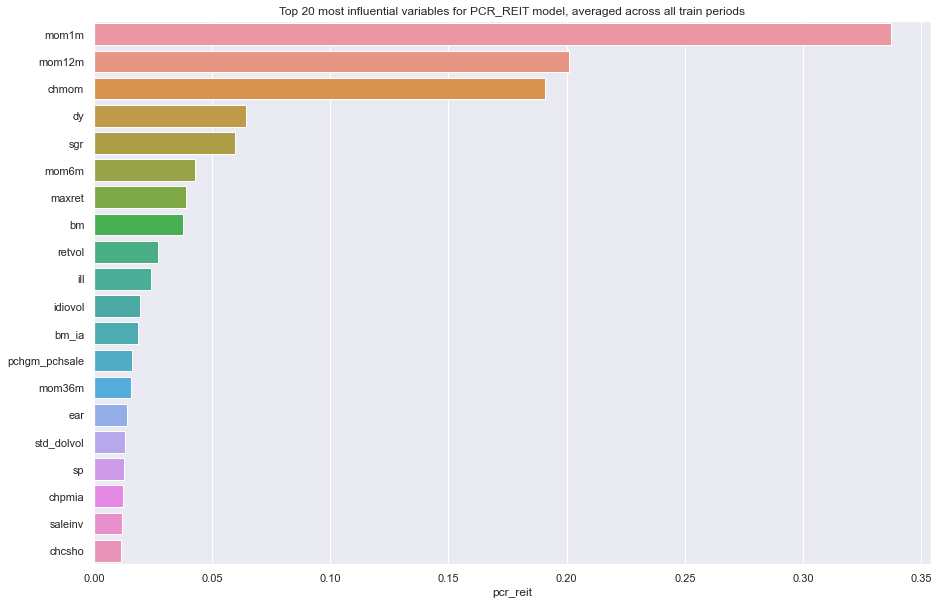

In [298]:
# Plot features of importance
# Plot graph
df_top20 = df_impt.sort_values(by=[model_name], ascending = False).head(20)
plt.figure(figsize=(15,10))
plt.title(f'Top 20 most influential variables for {model_name.upper()} model, averaged across all train periods')
sns.barplot(data = df_top20, x = model_name, y = df_top20.index);


In [299]:
# Merge df_temp to existing df_r2drecrease table

df_r2decrease_reit = pd.merge(
    left = df_r2decrease_reit,
    right = df_impt[model_name],
    how = 'left',
    left_index = True,
    right_index = True    
)

# Rank R2decrease table after including new model results
df_featurerank_reit = df_r2decrease_reit.rank() 
df_featurerank_reit['all_models'] = df_featurerank_reit.sum(axis=1)

# Display tables
display(df_r2decrease_reit)
display(df_featurerank_reit.sort_values('all_models', ascending = False))

# Save dfs to .csv 
df_r2decrease_reit.to_csv('../data/df_r2decrease_reit.csv', index = False)
df_featurerank_reit.to_csv('../data/df_featurerank_reit.csv', index = False)

lr_reit  huber_reit  ridge_reit  lasso_reit  enet_reit  \
absacc           0.000306   -0.001380    0.000189    0.000000   0.000000   
acc              0.001430   -0.000741    0.001779    0.000000   0.000000   
aeavol           0.000650    0.000668    0.005239    0.001173   0.001226   
age              0.000137   -0.000080    0.001680    0.000018   0.000030   
agr              0.000223    0.005201    0.003357    0.000000   0.000010   
baspread         0.007390    0.007871    0.000149    0.000000   0.000000   
beta             0.008894    0.057075    0.000315    0.000000   0.000000   
betasq           0.013997    0.013039    0.002645    0.000000   0.000000   
bm               0.001241    0.000853    0.024032    0.025538   0.026162   
bm_ia            0.002404    0.004776    0.007611    0.004235   0.004285   
cash             0.000161    0.000505    0.003340    0.000873   0.000927   
cashdebt         0.000128   -0.001187    0.000750    0.000000   0.000000   
cashpr           0.001257    0.002444    0.004893    0.001111   0.001181   
cfp              0.006021    0.006040    0.008196    0.013265   0.013306   
cfp_ia           0.001410    0.004166    0.007417    0.015930   0.015591   
chatoia          0.000082   -0.000040   -0.000983   -0.000089  -0.000097   
chcsho           0.000206   -0.000878    0.005366    0.002707   0.002796   
chempia          0.001031    0.003782   -0.000006    0.000000   0.000000   
chinv            0.000245   -0.000393    0.000482    0.000000   0.000000   
chmom            0.052654    0.050540    0.096469    0.142593   0.139152   
chpmia           0.002182    0.002565    0.011188    0.005567   0.005818   
chtx            -0.000017   -0.000019    0.000188    0.000000   0.000000   
cinvest          0.000038    0.000148    0.000281    0.000000   0.000000   
convind          0.000886    0.000794    0.000866    0.000000   0.000000   
currat           0.091179    0.044869   -0.000742    0.000000   0.000000   
depr            -0.000063    0.000391    0.001464    0.000148   0.000158   
divi             0.000153    0.000328    0.000156    0.000000   0.000000   
divo             0.000145    0.000922    0.000460    0.000000   0.000000   
dolvol           0.052843    0.089712    0.018587    0.017184   0.017007   
dy               0.016294    0.015071    0.090116    0.083019   0.084596   
ear              0.000198    0.000341    0.007511    0.004939   0.005175   
egr              0.001280    0.002940    0.004116    0.001198   0.001247   
ep               0.001748    0.010111    0.008772    0.004712   0.004875   
gma              0.003155   -0.001219    0.004361    0.000000   0.000000   
grcapx           0.000474    0.000658   -0.000177    0.000000   0.000000   
grltnoa          0.002414    0.001948    0.004432    0.000000   0.000000   
herf             0.023766    0.022687    0.023490    0.026236   0.026005   
hire             0.000198    0.002251    0.000338    0.000000   0.000000   
idiovol          0.000873   -0.000939    0.012297    0.014589   0.014951   
ill              0.005484    0.010939    0.022225    0.013264   0.013836   
indmom          -0.000049    0.000309    0.000357    0.000269   0.000290   
invest           0.000890    0.000858    0.002343    0.000000   0.000000   
lev             -0.000274   -0.002811   -0.002411    0.000000   0.000000   
lgr              0.000145    0.000304    0.000079    0.000000   0.000000   
maxret           0.025620    0.054758    0.005975    0.000000   0.000000   
mom12m           0.004666    0.002331    0.047325    0.017174   0.020037   
mom1m            0.019050    0.030089    0.134880    0.123642   0.127685   
mom36m           0.004236    0.006796    0.023669    0.021621   0.022049   
mom6m            0.056381    0.030482    0.053236    0.127055   0.120789   
ms               0.000196    0.000743    0.002229    0.000000   0.000000   
mve0             0.200379    0.212738    0.122775    0.137827   0.135776   
mve_ia           0.116817    0.152169    0.033515    0.073484   0.

lr_reit  huber_reit  ridge_reit  lasso_reit  enet_reit  \
chmom               87.0        89.0        92.0        94.0       94.0   
mom1m               84.0        84.0        94.0        91.0       92.0   
mve0                94.0        94.0        93.0        93.0       93.0   
mom6m               89.0        85.0        89.0        92.0       91.0   
retvol              93.0        86.0        90.0        87.0       87.0   
dy                  83.0        82.0        91.0        90.0       90.0   
sgr                 79.0        76.0        87.0        88.0       88.0   
mve_ia              92.0        93.0        86.0        89.0       89.0   
dolvol              88.0        92.0        81.0        83.0       82.0   
herf                85.0        83.0        83.0        86.0       85.0   
mom12m              74.0        60.0        88.0        82.0       83.0   
ill                 75.0        78.0        82.0        78.0       79.0   
mom36m              72.0        72.0        84.0        84.0       84.0   
cfp                 76.0        71.0        75.0        79.0       78.0   
bm                  54.0        47.0        85.0        85.0       86.0   
rd_sale             73.0        74.0        74.0        77.0       77.0   
bm_ia               68.0        69.0        73.0        72.0       72.0   
ep                  63.0        77.0        76.0        73.0       73.0   
chpmia              67.0        62.0        79.0        75.0       75.0   
sp                  59.0        75.0        66.0        76.0       76.0   
cfp_ia              57.0        67.0        71.0        81.0       81.0   
saleinv             66.0        55.0        78.0        69.0       69.0   
maxret              86.0        90.0        68.0        26.0       25.5   
tang                61.0        54.0        77.0        66.0       67.0   
idiovol             48.0         7.0        80.0        80.0       80.0   
egr                 56.0        63.0        58.0        65.0       65.0   
ear                 29.0        33.0        72.0        74.0       74.0   
roavol              65.0        68.0        67.0        68.0       68.0   
std_dolvol          39.0        53.0        63.0        59.0       59.0   
turn                77.0        79.0        40.0        62.0       62.0   
aeavol              46.0        43.0        64.0        64.0       64.0   
chcsho              33.0         8.0        65.0        71.0       71.0   
cash                25.0        39.0        54.0        61.0       61.0   
cashpr              55.0        61.0        62.0        63.0       63.0   
pchgm_pchsale       32.0        20.0        61.0        58.0       58.0   
agr                 35.0        70.0        55.0        26.0       48.0   
zerotrade           82.0        57.0        50.0        53.0       52.0   
salerec             26.0        26.0        56.0        60.0       60.0   
pchdepr             43.0        35.0        57.0        67.0       66.0   
roic                47.0         6.0        70.0        70.0       70.0   
roaq                62.0        65.0        69.0        26.0       25.5   
pchsale_pchinvt     27.0        28.0        51.0        52.0       51.0   
betasq              81.0        80.0        49.0        26.0       25.5   
beta                80.0        91.0        26.0        26.0       25.5   
rd_mve               8.0        44.0        47.0        50.0       53.0   
invest              50.0        48.0        46.0        26.0       25.5   
currat              90.0        87.0         4.0        26.0       25.5   
nincr               37.0        13.0        53.0        49.0       49.0   
stdcf               70.0        81.0         9.0        26.0       25.5   
quick               91.0        88.0        24.0         2.0        2.0   
grltnoa             69.0        56.0        60.0        26.0       25.5   
rd                  64.0        58.0        17.0        26.0       25.5   
pctacc               5.0        41.0      

## Partial least squares regression

### REIT

In [300]:
df_results_reit = df_results_reit[:9]

In [301]:
# For some reason, PLS does not return an array of predictions,
#   but an array of arrays. So flattening of y_pred is necessary

def evaluate(X_train, X_validate, y_train, y_validate, cfg):
    # convert config to a key for storing results later
    key = cfg

    # fit and evaluate model
    model = model_fit(X_train, y_train, cfg)
    
    # scores from validate set
    y_pred_validate = model_predict(model, X_validate)
    
    # Flatten multiple arrays into one (only for PLSRegression and Neural Network)
    y_pred_validate = [item for sublist in y_pred_validate for item in sublist]
    r2_validate = measure_r2(y_validate, y_pred_validate)
    rmse_validate = measure_rmse(y_validate, y_pred_validate)
    
    # scores from train set
    y_pred_train = model_predict(model, X_train)
    # Flatten multiple arrays into one (for PLSRegression)
    y_pred_train = [item for sublist in y_pred_train for item in sublist]
    r2_train = measure_r2(y_train, y_pred_train)
    rmse_train = measure_rmse(y_train, y_pred_train)    
    
    # print results
    print(f'{key}, {r2_validate:.2f}, {rmse_validate:.2f}, {r2_train:.2f}, {rmse_train:.2f}')
    return (key, r2_validate, rmse_validate, r2_train, rmse_train)

In [304]:
# Create list of configs to test on 
def model_configs():
    # define scope of configs
    configs = range(1,91)
    print('Total configs (K_components): %d' %len(configs))
    return configs

def model_fit(X_train, y_train, cfg):
    # unpack config
    K = cfg
    model = PLSRegression(n_components = K)
    model.fit(X_train, y_train)
    return model

In [305]:
# Instantiate list of configurations
cfg_list = model_configs()

Total configs (K_components): 90


In [306]:
%%time
# Create model name 
model_name = 'pls_reit'

# Create new row of test results
df_results_reit = pd.concat(
    [df_results_reit, pd.DataFrame([{'Model Name' : model_name,}])], 
    axis = 0
)

# Run grid search of hyperparameters
scores = grid_search(
    X = X_reit, 
    y = y_reit, 
    start_train = 1990, 
    start_val = 2001, 
    start_test = 2006, 
    cfg_list = cfg_list, 
    df_results = df_results_reit
)

# Print results
print ('Top 8 Configs')
print ('Config, R2_validate, RMSE_validate, R2_train, RMSE_train')
for cfg, r2_validate, rmse_validate, r2_train, rmse_train, in scores[:8]:
    print (f'{cfg}, {r2_validate:.2f}, {rmse_validate:.2f}, {r2_train:.2f}, {rmse_train:.2f}')

1, 1.71, 10.17, 1.03, 10.39
2, 1.50, 10.18, 1.35, 10.38
3, 1.23, 10.19, 1.48, 10.37
4, 1.01, 10.21, 1.57, 10.36
5, 0.83, 10.22, 1.67, 10.36
6, 0.88, 10.21, 1.74, 10.36
7, 0.95, 10.21, 1.83, 10.35
8, 0.88, 10.21, 1.90, 10.35
9, 0.81, 10.22, 1.94, 10.34
10, 0.87, 10.21, 1.96, 10.34
11, 0.85, 10.21, 1.96, 10.34
12, 0.84, 10.21, 1.97, 10.34
13, 0.85, 10.21, 1.97, 10.34
14, 0.87, 10.21, 1.97, 10.34
15, 0.83, 10.21, 1.97, 10.34
16, 0.85, 10.21, 1.98, 10.34
17, 0.83, 10.22, 1.98, 10.34
18, 0.83, 10.22, 1.98, 10.34
19, 0.80, 10.22, 1.98, 10.34
20, 0.80, 10.22, 1.98, 10.34
21, 0.82, 10.22, 1.98, 10.34
22, 0.80, 10.22, 1.98, 10.34
23, 0.77, 10.22, 1.98, 10.34
24, 0.73, 10.22, 1.99, 10.34
25, 0.73, 10.22, 1.99, 10.34
26, 0.71, 10.22, 1.99, 10.34
27, 0.68, 10.22, 1.99, 10.34
28, 0.67, 10.22, 1.99, 10.34
29, 0.66, 10.22, 1.99, 10.34
30, 0.67, 10.22, 1.99, 10.34
31, 0.67, 10.22, 1.99, 10.34
32, 0.67, 10.22, 1.99, 10.34
33, 0.69, 10.22, 1.99, 10.34
34, 0.69, 10.22, 1.99, 10.34
35, 0.68, 10.22, 1.99, 

Model Name             Selected Config Train (1990-2000)  \
0        naive_reit                        N.A.      0.00 (10.45)   
0           lr_reit                        N.A.       1.99 (10.3)   
0  fama-french_reit                    bm, mve0       0.36 (10.4)   
0      carhart_reit            bm, mve0, mom12m       0.52 (10.4)   
0        huber_reit               [3.0, 0.0001]      1.58 (10.36)   
0        ridge_reit        [19920.457084538713]      1.19 (10.38)   
0        lasso_reit       [0.07196856730011514]      1.28 (10.38)   
0         enet_reit  [0.9, 0.07880462815669913]      1.28 (10.38)   
0          pcr_reit                          28      0.90 (10.40)   
0          pls_reit                           1      1.03 (10.39)   

  Validate (2001-2005) Test (2006-2020)  Test (2006)    Test (2007)  \
0         0.00 (10.26)     0.00 (12.13)  0.00 (7.60)   0.00 (11.29)   
0          0.69 (10.2)    -0.03 (12.13)  4.17 (7.44)  -3.50 (11.48)   
0          1.52 (10.2)     0.17 (12.12)  3.84 (7.45)  -4.46 (11.54)   
0          1.68 (10.2)     0.16 (12.12)  4.37 (7.43)  -3.46 (11.48)   
0         0.90 (10.21)    -0.07 (12.13)  3.50 (7.47)  -2.04 (11.40)   
0         1.82 (10.16)     0.18 (12.12)  4.43 (7.43)  -3.65 (11.49)   
0         1.93 (10.16)     0.23 (12.11)  4.37 (7.43)  -3.54 (11.49)   
0         1.93 (10.16)     0.23 (12.11)  4.37 (7.43)  -3.54 (11.49)   
0         1.89 (10.16)     0.09 (12.12)  3.79 (7.46)  -3.68 (11.49)   
0         1.71 (10.17)              NaN          NaN            NaN   

     Test (2008)    Test (2009)   Test (2010)    Test (2011)  Test (2012)  \
0   0.00 (19.81)   0.00 (25.18)  0.00 (12.47)   0.00 (10.08)  0.00 (9.46)   
0  -0.55 (19.87)  -0.02 (25.19)  1.79 (12.36)  -2.03 (10.19)  3.18 (9.31)   
0  -1.84 (19.99)   0.64 (25.10)  2.03 (12.34)  -0.68 (10.12)  3.28 (9.31)   
0  -1.33 (19.94)   0.15 (25.16)  2.04 (12.34)  -0.71 (10.12)  2.65 (9.34)   
0  -0.24 (19.84)  -0.24 (25.21)  0.25 (12.45)  -0.65 (10.12)  1.09 (9.41)   
0  -1.12 (19.92)   0.16 (25.16)  1.98 (12.34)  -1.29 (10.15)  3.80 (9.28)   
0  -1.09 (19.92)   0.26 (25.15)  2.08 (12.34)  -1.03 (10.14)  3.42 (9.30)   
0  -1.09 (19.92)   0.26 (25.15)  2.08 (12.34)  -1.03 (10.14)  3.43 (9.30)   
0  -1.31 (19.94)   0.20 (25.16)  2.13 (12.33)  -1.07 (10.14)  3.27 (9.31)   
0            NaN            NaN           NaN            NaN          NaN   

   Test (2013)  Test (2014)   Test (2015)  Test (2016)   Test (2017)  \
0  0.00 (9.44)  0.00 (7.04)   0.00 (7.47)  0.00 (9.09)   0.00 (7.08)   
0  1.38 (9.37)  1.59 (6.99)  -2.95 (7.58)  2.22 (8.98)  -1.00 (7.12)   
0  1.25 (9.38)  3.36 (6.92)  -1.87 (7.54)  2.06 (8.99)   1.06 (7.05)   
0  1.65 (9.36)  3.06 (6.93)  -1.88 (7.54)  1.71 (9.01)   0.85 (7.05)   
0  0.70 (9.40)  2.18 (6.96)  -2.61 (7.57)  1.41 (9.02)  -0.62 (7.11)   
0  1.91 (9.35)  2.74 (6.94)  -1.82 (7.54)  2.31 (8.98)   0.49 (7.07)   
0  1.89 (9.35)  3.51 (6.92)  -1.64 (7.54)  1.70 (9.01)   0.50 (7.07)   
0  1.90 (9.35)  3.52 (6.92)  -1.63 (7.54)  1.71 (9.01)   0.52 (7.07)   
0  1.65 (9.36)  3.16 (6.93)  -2.25 (7.56)  2.12 (8.99)   0.29 (7.07)   
0          NaN          NaN           NaN          NaN           NaN   

    Test (2018)  Test (2019)    Test (2020) Remarks  
0   0.00 (8.03)  0.00 (8.37)   0.00 (18.42)     NaN  
0  -5.43 (8.25)  3.70 (8.21)  -0.21 (18.43)     NaN  
0  -2.57 (8.14)  3.50 (8.22)  -0.05 (18.42)     NaN  
0  -2.06 (8.12)  3.34 (8.23)  -0.13 (18.43)     NaN  
0  -2.98 (8.15)  2.99 (8.24)  -0.31 (18.44)     NaN  
0  -4.39 (8.21)  4.05 (8.20)  -0.13 (18.43)     NaN  
0  -4.16 (8.20)  4.21 (8.19)  -0.07 (18.42)     NaN  
0  -4.17 (8.20)  4.20 (8.19)  -0.07 (18.42)     NaN  
0  -4.42 (8.21)  3.98 (8.20)  -0.23 (18.44)     NaN  
0           NaN          NaN            NaN     NaN

Top 8 Configs
Config, R2_validate, RMSE_validate, R2_train, RMSE_train
1, 1.71, 10.17, 1.03, 10.39
2, 1.50, 10.18, 1.35, 10.38
3, 1.23, 10.19, 1.48, 10.37
4, 1.01, 10.21, 1.57, 10.36
7, 0.95, 10.21, 1.83, 10.35
8, 0.88, 10.21, 1.90, 10.35
6, 0.88, 10.21, 1.74, 10.36
10, 0.87, 10.21, 1.96, 10.34
CPU times: user 3min 6s, sys: 1min 29s, total: 4min 35s
Wall time: 51.1 s


Top 8 Configs

Config, R2_validate, RMSE_validate, R2_train, RMSE_train

1, 1.71, 10.17, 1.03, 10.39

2, 1.50, 10.18, 1.35, 10.38

3, 1.23, 10.19, 1.48, 10.37

4, 1.01, 10.21, 1.57, 10.36

7, 0.95, 10.21, 1.83, 10.35

8, 0.88, 10.21, 1.90, 10.35

6, 0.88, 10.21, 1.74, 10.36

10, 0.87, 10.21, 1.96, 10.34

CPU times: user 3min 6s, sys: 1min 29s, total: 4min 35s

Wall time: 51.1 s


In [307]:
# Walk-forward testing, this time, we do not use a validate set, so we set start_val = start_test
def walk_forward(selected_cfg, 
                 X, y, 
                 start_train, 
                 start_val, 
                 start_test, 
                 final_year_of_testing,
                 df_results):
    
    predictions = []

    for i in range(final_year_of_testing - start_test + 1):
        
        # Create train-test sets, no need for validate set
        X_train, _, X_test, y_train, _, y_test = \
        train_val_test_split(
            X, y, 
            start_train, 
            start_val + i, 
            start_test + i
        )
        
        # Fit model
        model = model_fit(X_train, y_train, selected_cfg)
       
        # Pickle model
        filename = f'../pickle/{model_name}_{start_test + i}.pkl'
        pickle.dump(model, open(filename,'wb'))
        
        # Predicted values
        y_pred = model_predict(model, X_test)

        # Flatten multiple arrays into one (for PLSRegression)
        y_pred = [item for sublist in y_pred for item in sublist]
        predictions.append(y_pred)
        
        # Print results
        print(f'Test year {start_test + i} done, R2 score is {measure_r2(y_test, y_pred):.2f}')
        print(f'Test year {start_test + i} done, RMSE score is {measure_rmse(y_test, y_pred):.2f}')
        
        # Store results
        df_results.loc[df_results['Model Name'] == model_name, f'Test ({start_test + i})'] = \
            f'{measure_r2(y_test, y_pred):.2f} ({measure_rmse(y_test, y_pred):.2f})'

    # Extract y_test values    
    y_true = y[f'{start_test}' : f'{final_year_of_testing}']
    
    # Flatten multiple arrays of predictions into one array
    predictions = [item for sublist in predictions for item in sublist]
   
    # Calculate scores
    r2_oos = measure_r2(y_true, predictions)
    rmse_oos = measure_rmse(y_true, predictions)
    
    # Save scores
    df_results.loc[df_results['Model Name'] == model_name, f'Test ({start_test}-{final_year_of_testing})'] = \
            f'{r2_oos:.2f} ({rmse_oos:.2f})'
    
    # Display scores
    display(df_results)
    print()
    print(f'R2 for entire pooled test set, from {start_test} to {final_year_of_testing}, is {r2_oos:.2f}.')
    print(f'RMSE for entire pooled test set, from {start_test} to {final_year_of_testing}, is {rmse_oos:.2f}.')
    print()
    
    return r2_oos, rmse_oos

In [308]:
%%time
# Chosen configuration for model
selected_cfg = scores[0][0]

# Out-of-sample testing, no need to do validation after hyperparameters are selected
score = walk_forward(
    selected_cfg, 
    X = X_reit, 
    y = y_reit, 
    start_train = 1990, 
    start_val = 2006, # Set equal to start of test year, so that train year ends just before test year
    start_test = 2006,
    final_year_of_testing = 2020, 
    df_results = df_results_reit
)

print(f'On best performing config: {scores[0][0]}')

# Save df_results to .csv 
df_results_reit.to_csv('../data/df_results_reit.csv', index = False)

Test year 2006 done, R2 score is 4.19
Test year 2006 done, RMSE score is 7.44
Test year 2007 done, R2 score is -4.17
Test year 2007 done, RMSE score is 11.52
Test year 2008 done, R2 score is -1.10
Test year 2008 done, RMSE score is 19.92
Test year 2009 done, R2 score is -0.15
Test year 2009 done, RMSE score is 25.20
Test year 2010 done, R2 score is 1.75
Test year 2010 done, RMSE score is 12.36
Test year 2011 done, R2 score is -1.84
Test year 2011 done, RMSE score is 10.18
Test year 2012 done, R2 score is 3.68
Test year 2012 done, RMSE score is 9.29
Test year 2013 done, R2 score is 1.99
Test year 2013 done, RMSE score is 9.34
Test year 2014 done, R2 score is 2.32
Test year 2014 done, RMSE score is 6.96
Test year 2015 done, R2 score is -2.06
Test year 2015 done, RMSE score is 7.55
Test year 2016 done, R2 score is 2.14
Test year 2016 done, RMSE score is 8.99
Test year 2017 done, R2 score is 0.18
Test year 2017 done, RMSE score is 7.08
Test year 2018 done, R2 score is -4.79
Test year 2018 

Model Name             Selected Config Train (1990-2000)  \
0        naive_reit                        N.A.      0.00 (10.45)   
0           lr_reit                        N.A.       1.99 (10.3)   
0  fama-french_reit                    bm, mve0       0.36 (10.4)   
0      carhart_reit            bm, mve0, mom12m       0.52 (10.4)   
0        huber_reit               [3.0, 0.0001]      1.58 (10.36)   
0        ridge_reit        [19920.457084538713]      1.19 (10.38)   
0        lasso_reit       [0.07196856730011514]      1.28 (10.38)   
0         enet_reit  [0.9, 0.07880462815669913]      1.28 (10.38)   
0          pcr_reit                          28      0.90 (10.40)   
0          pls_reit                           1      1.03 (10.39)   

  Validate (2001-2005) Test (2006-2020)  Test (2006)    Test (2007)  \
0         0.00 (10.26)     0.00 (12.13)  0.00 (7.60)   0.00 (11.29)   
0          0.69 (10.2)    -0.03 (12.13)  4.17 (7.44)  -3.50 (11.48)   
0          1.52 (10.2)     0.17 (12.12)  3.84 (7.45)  -4.46 (11.54)   
0          1.68 (10.2)     0.16 (12.12)  4.37 (7.43)  -3.46 (11.48)   
0         0.90 (10.21)    -0.07 (12.13)  3.50 (7.47)  -2.04 (11.40)   
0         1.82 (10.16)     0.18 (12.12)  4.43 (7.43)  -3.65 (11.49)   
0         1.93 (10.16)     0.23 (12.11)  4.37 (7.43)  -3.54 (11.49)   
0         1.93 (10.16)     0.23 (12.11)  4.37 (7.43)  -3.54 (11.49)   
0         1.89 (10.16)     0.09 (12.12)  3.79 (7.46)  -3.68 (11.49)   
0         1.71 (10.17)    -0.06 (12.13)  4.19 (7.44)  -4.17 (11.52)   

     Test (2008)    Test (2009)   Test (2010)    Test (2011)  Test (2012)  \
0   0.00 (19.81)   0.00 (25.18)  0.00 (12.47)   0.00 (10.08)  0.00 (9.46)   
0  -0.55 (19.87)  -0.02 (25.19)  1.79 (12.36)  -2.03 (10.19)  3.18 (9.31)   
0  -1.84 (19.99)   0.64 (25.10)  2.03 (12.34)  -0.68 (10.12)  3.28 (9.31)   
0  -1.33 (19.94)   0.15 (25.16)  2.04 (12.34)  -0.71 (10.12)  2.65 (9.34)   
0  -0.24 (19.84)  -0.24 (25.21)  0.25 (12.45)  -0.65 (10.12)  1.09 (9.41)   
0  -1.12 (19.92)   0.16 (25.16)  1.98 (12.34)  -1.29 (10.15)  3.80 (9.28)   
0  -1.09 (19.92)   0.26 (25.15)  2.08 (12.34)  -1.03 (10.14)  3.42 (9.30)   
0  -1.09 (19.92)   0.26 (25.15)  2.08 (12.34)  -1.03 (10.14)  3.43 (9.30)   
0  -1.31 (19.94)   0.20 (25.16)  2.13 (12.33)  -1.07 (10.14)  3.27 (9.31)   
0  -1.10 (19.92)  -0.15 (25.20)  1.75 (12.36)  -1.84 (10.18)  3.68 (9.29)   

   Test (2013)  Test (2014)   Test (2015)  Test (2016)   Test (2017)  \
0  0.00 (9.44)  0.00 (7.04)   0.00 (7.47)  0.00 (9.09)   0.00 (7.08)   
0  1.38 (9.37)  1.59 (6.99)  -2.95 (7.58)  2.22 (8.98)  -1.00 (7.12)   
0  1.25 (9.38)  3.36 (6.92)  -1.87 (7.54)  2.06 (8.99)   1.06 (7.05)   
0  1.65 (9.36)  3.06 (6.93)  -1.88 (7.54)  1.71 (9.01)   0.85 (7.05)   
0  0.70 (9.40)  2.18 (6.96)  -2.61 (7.57)  1.41 (9.02)  -0.62 (7.11)   
0  1.91 (9.35)  2.74 (6.94)  -1.82 (7.54)  2.31 (8.98)   0.49 (7.07)   
0  1.89 (9.35)  3.51 (6.92)  -1.64 (7.54)  1.70 (9.01)   0.50 (7.07)   
0  1.90 (9.35)  3.52 (6.92)  -1.63 (7.54)  1.71 (9.01)   0.52 (7.07)   
0  1.65 (9.36)  3.16 (6.93)  -2.25 (7.56)  2.12 (8.99)   0.29 (7.07)   
0  1.99 (9.34)  2.32 (6.96)  -2.06 (7.55)  2.14 (8.99)   0.18 (7.08)   

    Test (2018)  Test (2019)    Test (2020) Remarks  
0   0.00 (8.03)  0.00 (8.37)   0.00 (18.42)     NaN  
0  -5.43 (8.25)  3.70 (8.21)  -0.21 (18.43)     NaN  
0  -2.57 (8.14)  3.50 (8.22)  -0.05 (18.42)     NaN  
0  -2.06 (8.12)  3.34 (8.23)  -0.13 (18.43)     NaN  
0  -2.98 (8.15)  2.99 (8.24)  -0.31 (18.44)     NaN  
0  -4.39 (8.21)  4.05 (8.20)  -0.13 (18.43)     NaN  
0  -4.16 (8.20)  4.21 (8.19)  -0.07 (18.42)     NaN  
0  -4.17 (8.20)  4.20 (8.19)  -0.07 (18.42)     NaN  
0  -4.42 (8.21)  3.98 (8.20)  -0.23 (18.44)     NaN  
0  -4.79 (8.22)  3.94 (8.20)  -0.42 (18.45)     NaN


R2 for entire pooled test set, from 2006 to 2020, is -0.06.
RMSE for entire pooled test set, from 2006 to 2020, is 12.13.

On best performing config: 1
CPU times: user 3.29 s, sys: 2.32 s, total: 5.6 s
Wall time: 1.13 s


R2 for entire pooled test set, from 2006 to 2020, is -0.06.

RMSE for entire pooled test set, from 2006 to 2020, is 12.13.

On best performing config: 1

CPU times: user 3.29 s, sys: 2.32 s, total: 5.6 s

Wall time: 1.13 s

### Sample 1

In [309]:
df_results_sample1 = df_results_sample1[:9]

In [310]:
%%time
# Create model name 
model_name = 'pls_sample1'

# Create new row of test results
df_results_sample1 = pd.concat(
    [df_results_sample1, pd.DataFrame([{'Model Name' : model_name,}])], 
    axis = 0
)

# Run grid search of hyperparameters
scores = grid_search(
    X = X_1, 
    y = y_1, 
    start_train = 1990, 
    start_val = 2001, 
    start_test = 2006, 
    cfg_list = cfg_list, 
    df_results = df_results_sample1
)

# Print results
print ('Top 8 Configs')
print ('Config, R2_validate, RMSE_validate, R2_train, RMSE_train')
for cfg, r2_validate, rmse_validate, r2_train, rmse_train, in scores[:8]:
    print (f'{cfg}, {r2_validate:.2f}, {rmse_validate:.2f}, {r2_train:.2f}, {rmse_train:.2f}')

1, 0.11, 19.00, 1.06, 20.77
2, 0.01, 19.01, 1.32, 20.74
3, -0.05, 19.01, 1.46, 20.72
4, -0.24, 19.03, 1.52, 20.72
5, -0.39, 19.04, 1.59, 20.71
6, -0.39, 19.04, 1.62, 20.71
7, -0.38, 19.04, 1.64, 20.71
8, -0.39, 19.04, 1.64, 20.71
9, -0.42, 19.05, 1.65, 20.70
10, -0.42, 19.05, 1.65, 20.70
11, -0.41, 19.05, 1.66, 20.70
12, -0.43, 19.05, 1.66, 20.70
13, -0.45, 19.05, 1.66, 20.70
14, -0.46, 19.05, 1.66, 20.70
15, -0.46, 19.05, 1.66, 20.70
16, -0.45, 19.05, 1.66, 20.70
17, -0.45, 19.05, 1.66, 20.70
18, -0.45, 19.05, 1.66, 20.70
19, -0.45, 19.05, 1.66, 20.70
20, -0.45, 19.05, 1.66, 20.70
21, -0.45, 19.05, 1.66, 20.70
22, -0.45, 19.05, 1.66, 20.70
23, -0.45, 19.05, 1.66, 20.70
24, -0.45, 19.05, 1.66, 20.70
25, -0.45, 19.05, 1.66, 20.70
26, -0.45, 19.05, 1.66, 20.70
27, -0.45, 19.05, 1.66, 20.70
28, -0.45, 19.05, 1.66, 20.70
29, -0.45, 19.05, 1.66, 20.70
30, -0.45, 19.05, 1.66, 20.70
31, -0.45, 19.05, 1.66, 20.70
32, -0.45, 19.05, 1.66, 20.70
33, -0.45, 19.05, 1.66, 20.70
34, -0.45, 19.05, 1.6

Model Name        Selected Config Train (1990-2000)  \
0        naive_sample1                   N.A.      0.00 (20.88)   
0           lr_sample1                   N.A.       1.66 (20.7)   
0  fama-french_sample1               bm, mve0       0.21 (20.9)   
0      carhart_sample1       bm, mve0, mom12m       0.25 (20.9)   
0        huber_sample1            [9, 0.0001]      1.57 (20.71)   
0        ridge_sample1    [50084.07989848212]      0.86 (20.79)   
0        lasso_sample1  [0.47148663634573895]      0.51 (20.82)   
0         enet_sample1             [0.3, 1.0]      0.65 (20.81)   
0          pcr_sample1                     21      0.70 (20.80)   
0          pls_sample1                      1      1.06 (20.77)   

  Validate (2001-2005) Test (2006-2020)    Test (2006)    Test (2007)  \
0         0.00 (19.01)     0.00 (15.77)   0.00 (14.72)   0.00 (12.19)   
0         -0.45 (19.0)    -0.49 (15.80)  -0.80 (14.78)  -4.28 (12.45)   
0          0.32 (19.0)     0.13 (15.76)   0.74 (14.66)  -1.74 (12.30)   
0          0.31 (19.0)     0.11 (15.76)   0.62 (14.67)  -1.56 (12.29)   
0        -0.21 (19.03)    -0.29 (15.79)  -0.52 (14.76)  -2.89 (12.37)   
0         0.53 (18.96)     0.04 (15.76)   0.48 (14.68)  -2.36 (12.34)   
0         0.44 (18.97)     0.11 (15.76)   0.91 (14.65)  -2.18 (12.33)   
0         0.46 (18.96)     0.11 (15.76)   0.81 (14.66)  -2.17 (12.33)   
0         0.51 (18.96)    -0.18 (15.78)  -0.61 (14.76)  -2.45 (12.34)   
0         0.11 (19.00)              NaN            NaN            NaN   

     Test (2008)   Test (2009)    Test (2010)    Test (2011)   Test (2012)  \
0   0.00 (20.06)  0.00 (24.51)   0.00 (15.28)   0.00 (13.93)  0.00 (12.77)   
0  -2.82 (20.35)  0.66 (24.43)  -0.84 (15.34)  -1.28 (14.02)  0.52 (12.74)   
0  -2.49 (20.31)  0.77 (24.41)   1.13 (15.19)  -0.88 (13.99)  0.74 (12.72)   
0  -2.28 (20.29)  0.56 (24.44)   0.90 (15.21)  -0.76 (13.99)  0.76 (12.72)   
0  -2.15 (20.28)  0.58 (24.44)  -0.76 (15.34)  -0.67 (13.98)  0.54 (12.73)   
0  -2.61 (20.32)  0.86 (24.40)   0.60 (15.23)  -0.88 (13.99)  0.87 (12.71)   
0  -2.59 (20.32)  0.85 (24.40)   1.12 (15.19)  -0.96 (14.00)  0.80 (12.72)   
0  -2.61 (20.32)  0.80 (24.41)   1.16 (15.19)  -0.98 (14.00)  0.82 (12.72)   
0  -2.98 (20.36)  0.79 (24.41)   0.51 (15.24)  -0.95 (14.00)  0.67 (12.73)   
0            NaN           NaN            NaN            NaN           NaN   

    Test (2013)    Test (2014)    Test (2015)    Test (2016)    Test (2017)  \
0  0.00 (12.20)   0.00 (11.34)   0.00 (14.08)   0.00 (16.07)   0.00 (12.67)   
0  2.52 (12.05)  -1.37 (11.42)  -1.45 (14.18)  -0.12 (16.08)  -0.16 (12.68)   
0  2.08 (12.07)   0.01 (11.34)  -0.61 (14.12)   0.67 (16.01)   0.91 (12.61)   
0  2.29 (12.06)   0.03 (11.34)  -0.50 (14.11)   0.57 (16.02)   0.70 (12.62)   
0  2.45 (12.05)  -0.60 (11.37)  -1.17 (14.16)  -0.11 (16.07)   0.03 (12.67)   
0  2.81 (12.03)  -0.26 (11.35)  -0.64 (14.12)   0.49 (16.03)   0.37 (12.64)   
0  2.04 (12.07)  -0.15 (11.35)  -0.62 (14.12)   0.72 (16.01)   0.87 (12.61)   
0  2.28 (12.06)  -0.26 (11.35)  -0.56 (14.12)   0.68 (16.01)   0.86 (12.61)   
0  2.67 (12.04)  -0.87 (11.39)  -0.56 (14.12)   0.27 (16.04)   0.05 (12.66)   
0           NaN            NaN            NaN            NaN            NaN   

     Test (2018)   Test (2019)   Test (2020) Remarks  
0   0.00 (13.97)  0.00 (15.38)  0.00 (22.31)     NaN  
0  -2.02 (14.11)  0.46 (15.34)  0.74 (22.23)     NaN  
0  -1.56 (14.08)  0.86 (15.31)  0.78 (22.22)     NaN  
0  -1.53 (14.08)  0.95 (15.31)  0.71 (22.23)     NaN  
0  -1.50 (14.08)  0.44 (15.35)  0.50 (22.25)     NaN  
0  -1.58 (14.08)  0.82 (15.32)  0.76 (22.22)     NaN  
0  -1.65 (14.09)  0.79 (15.32)  0.80 (22.22)     NaN  
0  -1.60 (14.09)  0.80 (15.32)  0.81 (22.22)     NaN  
0  -1.78 (14.10)  0.85 (15.31)  0.59 (22.24)     NaN  
0            NaN           NaN           NaN     NaN

Top 8 Configs
Config, R2_validate, RMSE_validate, R2_train, RMSE_train
1, 0.11, 19.00, 1.06, 20.77
2, 0.01, 19.01, 1.32, 20.74
3, -0.05, 19.01, 1.46, 20.72
4, -0.24, 19.03, 1.52, 20.72
7, -0.38, 19.04, 1.64, 20.71
6, -0.39, 19.04, 1.62, 20.71
5, -0.39, 19.04, 1.59, 20.71
8, -0.39, 19.04, 1.64, 20.71
CPU times: user 2min 42s, sys: 1min 44s, total: 4min 26s
Wall time: 51.5 s


Top 8 Configs

Config, R2_validate, RMSE_validate, R2_train, RMSE_train

1, 0.11, 19.00, 1.06, 20.77

2, 0.01, 19.01, 1.32, 20.74

3, -0.05, 19.01, 1.46, 20.72

4, -0.24, 19.03, 1.52, 20.72

7, -0.38, 19.04, 1.64, 20.71

6, -0.39, 19.04, 1.62, 20.71

5, -0.39, 19.04, 1.59, 20.71

8, -0.39, 19.04, 1.64, 20.71

CPU times: user 2min 42s, sys: 1min 44s, total: 4min 26s

Wall time: 51.5 s

In [311]:
%%time
# Chosen configuration for model
selected_cfg = scores[0][0]

# Out-of-sample testing, no need to do validation after hyperparameters are selected
score = walk_forward(
    selected_cfg, 
    X = X_1, 
    y = y_1, 
    start_train = 1990, 
    start_val = 2006, # Set equal to start of test year, so that train year ends just before test year
    start_test = 2006,
    final_year_of_testing = 2020, 
    df_results = df_results_sample1
)

print(f'On best performing config: {scores[0][0]}')

# Save df_results to .csv 
df_results_sample1.to_csv('../data/df_results_sample1.csv', index = False)

Test year 2006 done, R2 score is -0.56
Test year 2006 done, RMSE score is 14.76
Test year 2007 done, R2 score is -3.95
Test year 2007 done, RMSE score is 12.43
Test year 2008 done, R2 score is -3.19
Test year 2008 done, RMSE score is 20.38
Test year 2009 done, R2 score is 0.75
Test year 2009 done, RMSE score is 24.42
Test year 2010 done, R2 score is -0.02
Test year 2010 done, RMSE score is 15.28
Test year 2011 done, R2 score is -1.78
Test year 2011 done, RMSE score is 14.06
Test year 2012 done, R2 score is 0.14
Test year 2012 done, RMSE score is 12.76
Test year 2013 done, R2 score is 3.10
Test year 2013 done, RMSE score is 12.01
Test year 2014 done, R2 score is -1.00
Test year 2014 done, RMSE score is 11.40
Test year 2015 done, R2 score is -0.96
Test year 2015 done, RMSE score is 14.15
Test year 2016 done, R2 score is 0.41
Test year 2016 done, RMSE score is 16.03
Test year 2017 done, R2 score is -0.19
Test year 2017 done, RMSE score is 12.68
Test year 2018 done, R2 score is -1.96
Test 

Model Name        Selected Config Train (1990-2000)  \
0        naive_sample1                   N.A.      0.00 (20.88)   
0           lr_sample1                   N.A.       1.66 (20.7)   
0  fama-french_sample1               bm, mve0       0.21 (20.9)   
0      carhart_sample1       bm, mve0, mom12m       0.25 (20.9)   
0        huber_sample1            [9, 0.0001]      1.57 (20.71)   
0        ridge_sample1    [50084.07989848212]      0.86 (20.79)   
0        lasso_sample1  [0.47148663634573895]      0.51 (20.82)   
0         enet_sample1             [0.3, 1.0]      0.65 (20.81)   
0          pcr_sample1                     21      0.70 (20.80)   
0          pls_sample1                      1      1.06 (20.77)   

  Validate (2001-2005) Test (2006-2020)    Test (2006)    Test (2007)  \
0         0.00 (19.01)     0.00 (15.77)   0.00 (14.72)   0.00 (12.19)   
0         -0.45 (19.0)    -0.49 (15.80)  -0.80 (14.78)  -4.28 (12.45)   
0          0.32 (19.0)     0.13 (15.76)   0.74 (14.66)  -1.74 (12.30)   
0          0.31 (19.0)     0.11 (15.76)   0.62 (14.67)  -1.56 (12.29)   
0        -0.21 (19.03)    -0.29 (15.79)  -0.52 (14.76)  -2.89 (12.37)   
0         0.53 (18.96)     0.04 (15.76)   0.48 (14.68)  -2.36 (12.34)   
0         0.44 (18.97)     0.11 (15.76)   0.91 (14.65)  -2.18 (12.33)   
0         0.46 (18.96)     0.11 (15.76)   0.81 (14.66)  -2.17 (12.33)   
0         0.51 (18.96)    -0.18 (15.78)  -0.61 (14.76)  -2.45 (12.34)   
0         0.11 (19.00)    -0.40 (15.80)  -0.56 (14.76)  -3.95 (12.43)   

     Test (2008)   Test (2009)    Test (2010)    Test (2011)   Test (2012)  \
0   0.00 (20.06)  0.00 (24.51)   0.00 (15.28)   0.00 (13.93)  0.00 (12.77)   
0  -2.82 (20.35)  0.66 (24.43)  -0.84 (15.34)  -1.28 (14.02)  0.52 (12.74)   
0  -2.49 (20.31)  0.77 (24.41)   1.13 (15.19)  -0.88 (13.99)  0.74 (12.72)   
0  -2.28 (20.29)  0.56 (24.44)   0.90 (15.21)  -0.76 (13.99)  0.76 (12.72)   
0  -2.15 (20.28)  0.58 (24.44)  -0.76 (15.34)  -0.67 (13.98)  0.54 (12.73)   
0  -2.61 (20.32)  0.86 (24.40)   0.60 (15.23)  -0.88 (13.99)  0.87 (12.71)   
0  -2.59 (20.32)  0.85 (24.40)   1.12 (15.19)  -0.96 (14.00)  0.80 (12.72)   
0  -2.61 (20.32)  0.80 (24.41)   1.16 (15.19)  -0.98 (14.00)  0.82 (12.72)   
0  -2.98 (20.36)  0.79 (24.41)   0.51 (15.24)  -0.95 (14.00)  0.67 (12.73)   
0  -3.19 (20.38)  0.75 (24.42)  -0.02 (15.28)  -1.78 (14.06)  0.14 (12.76)   

    Test (2013)    Test (2014)    Test (2015)    Test (2016)    Test (2017)  \
0  0.00 (12.20)   0.00 (11.34)   0.00 (14.08)   0.00 (16.07)   0.00 (12.67)   
0  2.52 (12.05)  -1.37 (11.42)  -1.45 (14.18)  -0.12 (16.08)  -0.16 (12.68)   
0  2.08 (12.07)   0.01 (11.34)  -0.61 (14.12)   0.67 (16.01)   0.91 (12.61)   
0  2.29 (12.06)   0.03 (11.34)  -0.50 (14.11)   0.57 (16.02)   0.70 (12.62)   
0  2.45 (12.05)  -0.60 (11.37)  -1.17 (14.16)  -0.11 (16.07)   0.03 (12.67)   
0  2.81 (12.03)  -0.26 (11.35)  -0.64 (14.12)   0.49 (16.03)   0.37 (12.64)   
0  2.04 (12.07)  -0.15 (11.35)  -0.62 (14.12)   0.72 (16.01)   0.87 (12.61)   
0  2.28 (12.06)  -0.26 (11.35)  -0.56 (14.12)   0.68 (16.01)   0.86 (12.61)   
0  2.67 (12.04)  -0.87 (11.39)  -0.56 (14.12)   0.27 (16.04)   0.05 (12.66)   
0  3.10 (12.01)  -1.00 (11.40)  -0.96 (14.15)   0.41 (16.03)  -0.19 (12.68)   

     Test (2018)   Test (2019)   Test (2020) Remarks  
0   0.00 (13.97)  0.00 (15.38)  0.00 (22.31)     NaN  
0  -2.02 (14.11)  0.46 (15.34)  0.74 (22.23)     NaN  
0  -1.56 (14.08)  0.86 (15.31)  0.78 (22.22)     NaN  
0  -1.53 (14.08)  0.95 (15.31)  0.71 (22.23)     NaN  
0  -1.50 (14.08)  0.44 (15.35)  0.50 (22.25)     NaN  
0  -1.58 (14.08)  0.82 (15.32)  0.76 (22.22)     NaN  
0  -1.65 (14.09)  0.79 (15.32)  0.80 (22.22)     NaN  
0  -1.60 (14.09)  0.80 (15.32)  0.81 (22.22)     NaN  
0  -1.78 (14.10)  0.85 (15.31)  0.59 (22.24)     NaN  
0  -1.96 (14.11)  0.67 (15.33)  0.48 (22.26)     NaN


R2 for entire pooled test set, from 2006 to 2020, is -0.40.
RMSE for entire pooled test set, from 2006 to 2020, is 15.80.

On best performing config: 1
CPU times: user 2.96 s, sys: 2.69 s, total: 5.65 s
Wall time: 1.13 s


R2 for entire pooled test set, from 2006 to 2020, is -0.40.

RMSE for entire pooled test set, from 2006 to 2020, is 15.80.

On best performing config: 1

CPU times: user 2.96 s, sys: 2.69 s, total: 5.65 s

Wall time: 1.13 s

### Sample 2

In [312]:
df_results_sample2 = df_results_sample2[:9]

In [313]:
%%time
# Create model name 
model_name = 'pls_sample2'

# Create new row of test results
df_results_sample2 = pd.concat(
    [df_results_sample2, pd.DataFrame([{'Model Name' : model_name,}])], 
    axis = 0
)

# Run grid search of hyperparameters
scores = grid_search(
    X = X_2, 
    y = y_2, 
    start_train = 1990, 
    start_val = 2001, 
    start_test = 2006, 
    cfg_list = cfg_list, 
    df_results = df_results_sample2
)

# Print results
print ('Top 8 Configs')
print ('Config, R2_validate, RMSE_validate, R2_train, RMSE_train')
for cfg, r2_validate, rmse_validate, r2_train, rmse_train, in scores[:8]:
    print (f'{cfg}, {r2_validate:.2f}, {rmse_validate:.2f}, {r2_train:.2f}, {rmse_train:.2f}')

1, 1.77, 12.18, 1.22, 13.91
2, 1.34, 12.20, 1.70, 13.88
3, 1.10, 12.22, 1.90, 13.87
4, 1.02, 12.22, 1.99, 13.86
5, 0.81, 12.24, 2.05, 13.86
6, 0.62, 12.25, 2.10, 13.85
7, 0.54, 12.25, 2.13, 13.85
8, 0.59, 12.25, 2.15, 13.85
9, 0.66, 12.25, 2.17, 13.85
10, 0.60, 12.25, 2.17, 13.85
11, 0.61, 12.25, 2.18, 13.85
12, 0.64, 12.25, 2.18, 13.85
13, 0.65, 12.25, 2.18, 13.85
14, 0.64, 12.25, 2.18, 13.85
15, 0.64, 12.25, 2.18, 13.85
16, 0.64, 12.25, 2.18, 13.85
17, 0.64, 12.25, 2.18, 13.85
18, 0.65, 12.25, 2.18, 13.85
19, 0.65, 12.25, 2.18, 13.85
20, 0.65, 12.25, 2.18, 13.85
21, 0.65, 12.25, 2.18, 13.85
22, 0.65, 12.25, 2.18, 13.85
23, 0.65, 12.25, 2.18, 13.85
24, 0.65, 12.25, 2.18, 13.85
25, 0.64, 12.25, 2.18, 13.85
26, 0.64, 12.25, 2.18, 13.85
27, 0.64, 12.25, 2.18, 13.85
28, 0.64, 12.25, 2.18, 13.85
29, 0.65, 12.25, 2.18, 13.85
30, 0.65, 12.25, 2.18, 13.85
31, 0.65, 12.25, 2.18, 13.85
32, 0.65, 12.25, 2.18, 13.85
33, 0.65, 12.25, 2.18, 13.85
34, 0.65, 12.25, 2.18, 13.85
35, 0.65, 12.25, 2.18, 

Model Name            Selected Config Train (1990-2000)  \
0        naive_sample2                       N.A.      0.00 (14.00)   
0           lr_sample2                       N.A.       2.18 (13.8)   
0  fama-french_sample2                   bm, mve0       0.68 (14.0)   
0      carhart_sample2           bm, mve0, mom12m       0.68 (14.0)   
0        huber_sample2                [9, 0.0001]      1.99 (13.86)   
0        ridge_sample2        [38867.76690892668]      1.49 (13.90)   
0        lasso_sample2      [0.15264179671752318]      1.39 (13.90)   
0         enet_sample2  [0.5, 0.2807216203941176]      1.38 (13.90)   
0          pcr_sample2                         31      1.20 (13.92)   
0          pls_sample2                          1      1.22 (13.91)   

  Validate (2001-2005) Test (2006-2020)  Test (2006)   Test (2007)  \
0         0.00 (12.29)     0.00 (12.32)  0.00 (9.17)   0.00 (8.99)   
0          0.65 (12.2)     0.22 (12.30)  0.56 (9.15)  -3.53 (9.15)   
0          1.15 (12.2)     0.56 (12.28)  1.74 (9.09)  -2.06 (9.09)   
0          1.15 (12.2)     0.56 (12.28)  1.75 (9.09)  -2.06 (9.09)   
0         0.79 (12.24)     0.39 (12.29)  1.20 (9.12)  -3.22 (9.14)   
0         1.78 (12.18)     0.69 (12.27)  1.89 (9.08)  -2.63 (9.11)   
0         1.76 (12.18)     0.75 (12.27)  2.20 (9.07)  -2.40 (9.10)   
0         1.77 (12.18)     0.76 (12.27)  2.21 (9.07)  -2.39 (9.10)   
0         1.79 (12.18)     0.57 (12.28)  1.67 (9.09)  -3.65 (9.16)   
0         1.77 (12.18)              NaN          NaN           NaN   

     Test (2008)   Test (2009)   Test (2010)   Test (2011)   Test (2012)  \
0   0.00 (15.09)  0.00 (18.80)  0.00 (10.67)   0.00 (9.59)  0.00 (10.62)   
0  -5.27 (15.48)  3.25 (18.49)  1.21 (10.60)  -4.70 (9.81)  2.88 (10.47)   
0  -3.80 (15.37)  1.82 (18.63)  2.57 (10.53)  -1.08 (9.64)  2.10 (10.51)   
0  -3.80 (15.37)  1.83 (18.63)  2.62 (10.53)  -1.11 (9.64)  2.18 (10.51)   
0  -4.71 (15.44)  2.82 (18.53)  1.69 (10.58)  -3.78 (9.77)  2.48 (10.49)   
0  -4.47 (15.42)  2.83 (18.53)  2.35 (10.54)  -2.62 (9.71)  3.15 (10.45)   
0  -4.48 (15.42)  2.61 (18.55)  2.44 (10.54)  -2.32 (9.70)  3.19 (10.45)   
0  -4.42 (15.42)  2.61 (18.55)  2.46 (10.53)  -2.28 (9.70)  3.16 (10.45)   
0  -4.39 (15.42)  2.78 (18.54)  1.89 (10.57)  -3.09 (9.73)  2.76 (10.47)   
0            NaN           NaN           NaN           NaN           NaN   

   Test (2013)   Test (2014)   Test (2015)   Test (2016)  Test (2017)  \
0  0.00 (8.43)  0.00 (15.25)   0.00 (9.36)  0.00 (11.29)  0.00 (8.75)   
0  5.29 (8.21)  0.65 (15.20)  -3.61 (9.53)  2.74 (11.14)  0.11 (8.74)   
0  5.79 (8.19)  0.51 (15.21)  -2.07 (9.46)  2.88 (11.13)  1.56 (8.68)   
0  5.61 (8.19)  0.56 (15.21)  -2.28 (9.47)  2.94 (11.13)  1.52 (8.68)   
0  6.14 (8.17)  0.62 (15.21)  -2.53 (9.48)  2.60 (11.14)  0.80 (8.71)   
0  5.67 (8.19)  1.03 (15.17)  -2.75 (9.49)  3.02 (11.12)  0.98 (8.70)   
0  5.11 (8.21)  1.12 (15.17)  -2.50 (9.48)  3.32 (11.10)  1.08 (8.70)   
0  5.16 (8.21)  1.12 (15.17)  -2.48 (9.48)  3.27 (11.11)  1.15 (8.70)   
0  4.95 (8.22)  1.18 (15.16)  -2.61 (9.48)  2.78 (11.13)  0.87 (8.71)   
0          NaN           NaN           NaN           NaN          NaN   

     Test (2018)   Test (2019)   Test (2020) Remarks  
0   0.00 (11.87)  0.00 (13.02)  0.00 (17.41)     NaN  
0  -4.01 (12.11)  2.07 (12.89)  1.33 (17.29)     NaN  
0  -2.41 (12.02)  1.93 (12.90)  0.87 (17.33)     NaN  
0  -2.44 (12.02)  1.93 (12.90)  0.87 (17.33)     NaN  
0  -3.64 (12.09)  2.18 (12.88)  1.24 (17.30)     NaN  
0  -3.01 (12.05)  2.32 (12.87)  1.38 (17.29)     NaN  
0  -2.74 (12.04)  2.56 (12.86)  1.37 (17.29)     NaN  
0  -2.70 (12.03)  2.53 (12.86)  1.38 (17.29)     NaN  
0  -3.14 (12.06)  2.45 (12.86)  1.37 (17.29)     NaN  
0            NaN           NaN           NaN     NaN

Top 8 Configs
Config, R2_validate, RMSE_validate, R2_train, RMSE_train
1, 1.77, 12.18, 1.22, 13.91
2, 1.34, 12.20, 1.70, 13.88
3, 1.10, 12.22, 1.90, 13.87
4, 1.02, 12.22, 1.99, 13.86
5, 0.81, 12.24, 2.05, 13.86
9, 0.66, 12.25, 2.17, 13.85
40, 0.65, 12.25, 2.18, 13.85
41, 0.65, 12.25, 2.18, 13.85
CPU times: user 3min 37s, sys: 2min 6s, total: 5min 43s
Wall time: 1min 6s


Top 8 Configs

Config, R2_validate, RMSE_validate, R2_train, RMSE_train

1, 1.77, 12.18, 1.22, 13.91

2, 1.34, 12.20, 1.70, 13.88

3, 1.10, 12.22, 1.90, 13.87

4, 1.02, 12.22, 1.99, 13.86

5, 0.81, 12.24, 2.05, 13.86

9, 0.66, 12.25, 2.17, 13.85

40, 0.65, 12.25, 2.18, 13.85

41, 0.65, 12.25, 2.18, 13.85

CPU times: user 3min 37s, sys: 2min 6s, total: 5min 43s

Wall time: 1min 6s

In [314]:
%%time
# Chosen configuration for model
selected_cfg = scores[0][0]

# Out-of-sample testing, no need to do validation after hyperparameters are selected
score = walk_forward(
    selected_cfg, 
    X = X_2, 
    y = y_2, 
    start_train = 1990, 
    start_val = 2006, # Set equal to start of test year, so that train year ends just before test year
    start_test = 2006,
    final_year_of_testing = 2020, 
    df_results = df_results_sample2
)

print(f'On best performing config: {scores[0][0]}')

# Save df_results to .csv 
df_results_sample2.to_csv('../data/df_results_sample2.csv', index = False)


Test year 2006 done, R2 score is 2.14
Test year 2006 done, RMSE score is 9.07
Test year 2007 done, R2 score is -2.87
Test year 2007 done, RMSE score is 9.12
Test year 2008 done, R2 score is -4.55
Test year 2008 done, RMSE score is 15.43
Test year 2009 done, R2 score is 2.92
Test year 2009 done, RMSE score is 18.52
Test year 2010 done, R2 score is 2.06
Test year 2010 done, RMSE score is 10.56
Test year 2011 done, R2 score is -2.75
Test year 2011 done, RMSE score is 9.72
Test year 2012 done, R2 score is 3.26
Test year 2012 done, RMSE score is 10.45
Test year 2013 done, R2 score is 4.57
Test year 2013 done, RMSE score is 8.24
Test year 2014 done, R2 score is 1.14
Test year 2014 done, RMSE score is 15.17
Test year 2015 done, R2 score is -3.20
Test year 2015 done, RMSE score is 9.51
Test year 2016 done, R2 score is 3.05
Test year 2016 done, RMSE score is 11.12
Test year 2017 done, R2 score is 1.11
Test year 2017 done, RMSE score is 8.70
Test year 2018 done, R2 score is -2.51
Test year 2018 

Model Name            Selected Config Train (1990-2000)  \
0        naive_sample2                       N.A.      0.00 (14.00)   
0           lr_sample2                       N.A.       2.18 (13.8)   
0  fama-french_sample2                   bm, mve0       0.68 (14.0)   
0      carhart_sample2           bm, mve0, mom12m       0.68 (14.0)   
0        huber_sample2                [9, 0.0001]      1.99 (13.86)   
0        ridge_sample2        [38867.76690892668]      1.49 (13.90)   
0        lasso_sample2      [0.15264179671752318]      1.39 (13.90)   
0         enet_sample2  [0.5, 0.2807216203941176]      1.38 (13.90)   
0          pcr_sample2                         31      1.20 (13.92)   
0          pls_sample2                          1      1.22 (13.91)   

  Validate (2001-2005) Test (2006-2020)  Test (2006)   Test (2007)  \
0         0.00 (12.29)     0.00 (12.32)  0.00 (9.17)   0.00 (8.99)   
0          0.65 (12.2)     0.22 (12.30)  0.56 (9.15)  -3.53 (9.15)   
0          1.15 (12.2)     0.56 (12.28)  1.74 (9.09)  -2.06 (9.09)   
0          1.15 (12.2)     0.56 (12.28)  1.75 (9.09)  -2.06 (9.09)   
0         0.79 (12.24)     0.39 (12.29)  1.20 (9.12)  -3.22 (9.14)   
0         1.78 (12.18)     0.69 (12.27)  1.89 (9.08)  -2.63 (9.11)   
0         1.76 (12.18)     0.75 (12.27)  2.20 (9.07)  -2.40 (9.10)   
0         1.77 (12.18)     0.76 (12.27)  2.21 (9.07)  -2.39 (9.10)   
0         1.79 (12.18)     0.57 (12.28)  1.67 (9.09)  -3.65 (9.16)   
0         1.77 (12.18)     0.68 (12.27)  2.14 (9.07)  -2.87 (9.12)   

     Test (2008)   Test (2009)   Test (2010)   Test (2011)   Test (2012)  \
0   0.00 (15.09)  0.00 (18.80)  0.00 (10.67)   0.00 (9.59)  0.00 (10.62)   
0  -5.27 (15.48)  3.25 (18.49)  1.21 (10.60)  -4.70 (9.81)  2.88 (10.47)   
0  -3.80 (15.37)  1.82 (18.63)  2.57 (10.53)  -1.08 (9.64)  2.10 (10.51)   
0  -3.80 (15.37)  1.83 (18.63)  2.62 (10.53)  -1.11 (9.64)  2.18 (10.51)   
0  -4.71 (15.44)  2.82 (18.53)  1.69 (10.58)  -3.78 (9.77)  2.48 (10.49)   
0  -4.47 (15.42)  2.83 (18.53)  2.35 (10.54)  -2.62 (9.71)  3.15 (10.45)   
0  -4.48 (15.42)  2.61 (18.55)  2.44 (10.54)  -2.32 (9.70)  3.19 (10.45)   
0  -4.42 (15.42)  2.61 (18.55)  2.46 (10.53)  -2.28 (9.70)  3.16 (10.45)   
0  -4.39 (15.42)  2.78 (18.54)  1.89 (10.57)  -3.09 (9.73)  2.76 (10.47)   
0  -4.55 (15.43)  2.92 (18.52)  2.06 (10.56)  -2.75 (9.72)  3.26 (10.45)   

   Test (2013)   Test (2014)   Test (2015)   Test (2016)  Test (2017)  \
0  0.00 (8.43)  0.00 (15.25)   0.00 (9.36)  0.00 (11.29)  0.00 (8.75)   
0  5.29 (8.21)  0.65 (15.20)  -3.61 (9.53)  2.74 (11.14)  0.11 (8.74)   
0  5.79 (8.19)  0.51 (15.21)  -2.07 (9.46)  2.88 (11.13)  1.56 (8.68)   
0  5.61 (8.19)  0.56 (15.21)  -2.28 (9.47)  2.94 (11.13)  1.52 (8.68)   
0  6.14 (8.17)  0.62 (15.21)  -2.53 (9.48)  2.60 (11.14)  0.80 (8.71)   
0  5.67 (8.19)  1.03 (15.17)  -2.75 (9.49)  3.02 (11.12)  0.98 (8.70)   
0  5.11 (8.21)  1.12 (15.17)  -2.50 (9.48)  3.32 (11.10)  1.08 (8.70)   
0  5.16 (8.21)  1.12 (15.17)  -2.48 (9.48)  3.27 (11.11)  1.15 (8.70)   
0  4.95 (8.22)  1.18 (15.16)  -2.61 (9.48)  2.78 (11.13)  0.87 (8.71)   
0  4.57 (8.24)  1.14 (15.17)  -3.20 (9.51)  3.05 (11.12)  1.11 (8.70)   

     Test (2018)   Test (2019)   Test (2020) Remarks  
0   0.00 (11.87)  0.00 (13.02)  0.00 (17.41)     NaN  
0  -4.01 (12.11)  2.07 (12.89)  1.33 (17.29)     NaN  
0  -2.41 (12.02)  1.93 (12.90)  0.87 (17.33)     NaN  
0  -2.44 (12.02)  1.93 (12.90)  0.87 (17.33)     NaN  
0  -3.64 (12.09)  2.18 (12.88)  1.24 (17.30)     NaN  
0  -3.01 (12.05)  2.32 (12.87)  1.38 (17.29)     NaN  
0  -2.74 (12.04)  2.56 (12.86)  1.37 (17.29)     NaN  
0  -2.70 (12.03)  2.53 (12.86)  1.38 (17.29)     NaN  
0  -3.14 (12.06)  2.45 (12.86)  1.37 (17.29)     NaN  
0  -2.51 (12.02)  2.30 (12.87)  1.40 (17.29)     NaN


R2 for entire pooled test set, from 2006 to 2020, is 0.68.
RMSE for entire pooled test set, from 2006 to 2020, is 12.27.

On best performing config: 1
CPU times: user 2.7 s, sys: 3.37 s, total: 6.07 s
Wall time: 1.32 s


R2 for entire pooled test set, from 2006 to 2020, is 0.68.

RMSE for entire pooled test set, from 2006 to 2020, is 12.27.

On best performing config: 1

CPU times: user 2.7 s, sys: 3.37 s, total: 6.07 s

Wall time: 1.32 s

### Compare results

In [315]:
# Compare results from 3 data sets
display(df_results_reit[5:10], df_results_sample1[5:10], df_results_sample2[5:10])

Model Name             Selected Config Train (1990-2000)  \
0  ridge_reit        [19920.457084538713]      1.19 (10.38)   
0  lasso_reit       [0.07196856730011514]      1.28 (10.38)   
0   enet_reit  [0.9, 0.07880462815669913]      1.28 (10.38)   
0    pcr_reit                          28      0.90 (10.40)   
0    pls_reit                           1      1.03 (10.39)   

  Validate (2001-2005) Test (2006-2020)  Test (2006)    Test (2007)  \
0         1.82 (10.16)     0.18 (12.12)  4.43 (7.43)  -3.65 (11.49)   
0         1.93 (10.16)     0.23 (12.11)  4.37 (7.43)  -3.54 (11.49)   
0         1.93 (10.16)     0.23 (12.11)  4.37 (7.43)  -3.54 (11.49)   
0         1.89 (10.16)     0.09 (12.12)  3.79 (7.46)  -3.68 (11.49)   
0         1.71 (10.17)    -0.06 (12.13)  4.19 (7.44)  -4.17 (11.52)   

     Test (2008)    Test (2009)   Test (2010)    Test (2011)  Test (2012)  \
0  -1.12 (19.92)   0.16 (25.16)  1.98 (12.34)  -1.29 (10.15)  3.80 (9.28)   
0  -1.09 (19.92)   0.26 (25.15)  2.08 (12.34)  -1.03 (10.14)  3.42 (9.30)   
0  -1.09 (19.92)   0.26 (25.15)  2.08 (12.34)  -1.03 (10.14)  3.43 (9.30)   
0  -1.31 (19.94)   0.20 (25.16)  2.13 (12.33)  -1.07 (10.14)  3.27 (9.31)   
0  -1.10 (19.92)  -0.15 (25.20)  1.75 (12.36)  -1.84 (10.18)  3.68 (9.29)   

   Test (2013)  Test (2014)   Test (2015)  Test (2016)  Test (2017)  \
0  1.91 (9.35)  2.74 (6.94)  -1.82 (7.54)  2.31 (8.98)  0.49 (7.07)   
0  1.89 (9.35)  3.51 (6.92)  -1.64 (7.54)  1.70 (9.01)  0.50 (7.07)   
0  1.90 (9.35)  3.52 (6.92)  -1.63 (7.54)  1.71 (9.01)  0.52 (7.07)   
0  1.65 (9.36)  3.16 (6.93)  -2.25 (7.56)  2.12 (8.99)  0.29 (7.07)   
0  1.99 (9.34)  2.32 (6.96)  -2.06 (7.55)  2.14 (8.99)  0.18 (7.08)   

    Test (2018)  Test (2019)    Test (2020) Remarks  
0  -4.39 (8.21)  4.05 (8.20)  -0.13 (18.43)     NaN  
0  -4.16 (8.20)  4.21 (8.19)  -0.07 (18.42)     NaN  
0  -4.17 (8.20)  4.20 (8.19)  -0.07 (18.42)     NaN  
0  -4.42 (8.21)  3.98 (8.20)  -0.23 (18.44)     NaN  
0  -4.79 (8.22)  3.94 (8.20)  -0.42 (18.45)     NaN

Model Name        Selected Config Train (1990-2000)  \
0  ridge_sample1    [50084.07989848212]      0.86 (20.79)   
0  lasso_sample1  [0.47148663634573895]      0.51 (20.82)   
0   enet_sample1             [0.3, 1.0]      0.65 (20.81)   
0    pcr_sample1                     21      0.70 (20.80)   
0    pls_sample1                      1      1.06 (20.77)   

  Validate (2001-2005) Test (2006-2020)    Test (2006)    Test (2007)  \
0         0.53 (18.96)     0.04 (15.76)   0.48 (14.68)  -2.36 (12.34)   
0         0.44 (18.97)     0.11 (15.76)   0.91 (14.65)  -2.18 (12.33)   
0         0.46 (18.96)     0.11 (15.76)   0.81 (14.66)  -2.17 (12.33)   
0         0.51 (18.96)    -0.18 (15.78)  -0.61 (14.76)  -2.45 (12.34)   
0         0.11 (19.00)    -0.40 (15.80)  -0.56 (14.76)  -3.95 (12.43)   

     Test (2008)   Test (2009)    Test (2010)    Test (2011)   Test (2012)  \
0  -2.61 (20.32)  0.86 (24.40)   0.60 (15.23)  -0.88 (13.99)  0.87 (12.71)   
0  -2.59 (20.32)  0.85 (24.40)   1.12 (15.19)  -0.96 (14.00)  0.80 (12.72)   
0  -2.61 (20.32)  0.80 (24.41)   1.16 (15.19)  -0.98 (14.00)  0.82 (12.72)   
0  -2.98 (20.36)  0.79 (24.41)   0.51 (15.24)  -0.95 (14.00)  0.67 (12.73)   
0  -3.19 (20.38)  0.75 (24.42)  -0.02 (15.28)  -1.78 (14.06)  0.14 (12.76)   

    Test (2013)    Test (2014)    Test (2015)   Test (2016)    Test (2017)  \
0  2.81 (12.03)  -0.26 (11.35)  -0.64 (14.12)  0.49 (16.03)   0.37 (12.64)   
0  2.04 (12.07)  -0.15 (11.35)  -0.62 (14.12)  0.72 (16.01)   0.87 (12.61)   
0  2.28 (12.06)  -0.26 (11.35)  -0.56 (14.12)  0.68 (16.01)   0.86 (12.61)   
0  2.67 (12.04)  -0.87 (11.39)  -0.56 (14.12)  0.27 (16.04)   0.05 (12.66)   
0  3.10 (12.01)  -1.00 (11.40)  -0.96 (14.15)  0.41 (16.03)  -0.19 (12.68)   

     Test (2018)   Test (2019)   Test (2020) Remarks  
0  -1.58 (14.08)  0.82 (15.32)  0.76 (22.22)     NaN  
0  -1.65 (14.09)  0.79 (15.32)  0.80 (22.22)     NaN  
0  -1.60 (14.09)  0.80 (15.32)  0.81 (22.22)     NaN  
0  -1.78 (14.10)  0.85 (15.31)  0.59 (22.24)     NaN  
0  -1.96 (14.11)  0.67 (15.33)  0.48 (22.26)     NaN

Model Name            Selected Config Train (1990-2000)  \
0  ridge_sample2        [38867.76690892668]      1.49 (13.90)   
0  lasso_sample2      [0.15264179671752318]      1.39 (13.90)   
0   enet_sample2  [0.5, 0.2807216203941176]      1.38 (13.90)   
0    pcr_sample2                         31      1.20 (13.92)   
0    pls_sample2                          1      1.22 (13.91)   

  Validate (2001-2005) Test (2006-2020)  Test (2006)   Test (2007)  \
0         1.78 (12.18)     0.69 (12.27)  1.89 (9.08)  -2.63 (9.11)   
0         1.76 (12.18)     0.75 (12.27)  2.20 (9.07)  -2.40 (9.10)   
0         1.77 (12.18)     0.76 (12.27)  2.21 (9.07)  -2.39 (9.10)   
0         1.79 (12.18)     0.57 (12.28)  1.67 (9.09)  -3.65 (9.16)   
0         1.77 (12.18)     0.68 (12.27)  2.14 (9.07)  -2.87 (9.12)   

     Test (2008)   Test (2009)   Test (2010)   Test (2011)   Test (2012)  \
0  -4.47 (15.42)  2.83 (18.53)  2.35 (10.54)  -2.62 (9.71)  3.15 (10.45)   
0  -4.48 (15.42)  2.61 (18.55)  2.44 (10.54)  -2.32 (9.70)  3.19 (10.45)   
0  -4.42 (15.42)  2.61 (18.55)  2.46 (10.53)  -2.28 (9.70)  3.16 (10.45)   
0  -4.39 (15.42)  2.78 (18.54)  1.89 (10.57)  -3.09 (9.73)  2.76 (10.47)   
0  -4.55 (15.43)  2.92 (18.52)  2.06 (10.56)  -2.75 (9.72)  3.26 (10.45)   

   Test (2013)   Test (2014)   Test (2015)   Test (2016)  Test (2017)  \
0  5.67 (8.19)  1.03 (15.17)  -2.75 (9.49)  3.02 (11.12)  0.98 (8.70)   
0  5.11 (8.21)  1.12 (15.17)  -2.50 (9.48)  3.32 (11.10)  1.08 (8.70)   
0  5.16 (8.21)  1.12 (15.17)  -2.48 (9.48)  3.27 (11.11)  1.15 (8.70)   
0  4.95 (8.22)  1.18 (15.16)  -2.61 (9.48)  2.78 (11.13)  0.87 (8.71)   
0  4.57 (8.24)  1.14 (15.17)  -3.20 (9.51)  3.05 (11.12)  1.11 (8.70)   

     Test (2018)   Test (2019)   Test (2020) Remarks  
0  -3.01 (12.05)  2.32 (12.87)  1.38 (17.29)     NaN  
0  -2.74 (12.04)  2.56 (12.86)  1.37 (17.29)     NaN  
0  -2.70 (12.03)  2.53 (12.86)  1.38 (17.29)     NaN  
0  -3.14 (12.06)  2.45 (12.86)  1.37 (17.29)     NaN  
0  -2.51 (12.02)  2.30 (12.87)  1.40 (17.29)     NaN

### REIT - Features of importance

In [317]:
## Modify custom function to flatten arrays generated by PLS (and in future, NN)
def create_r2decrease(model_name, 
                      X, y,
                      start_train, 
                      start_val, 
                      start_test, 
                      final_year_of_testing):
    
    # Inititate empty dataframe to store results
    df_temp = pd.DataFrame(index = X.columns)

    for i in range(final_year_of_testing - start_test + 1):
        # Create train-test sets
        X_train, _, _, y_train, _, _ = \
        train_val_test_split(
            X, y, 
            start_train, 
            start_val + i, 
            start_test + i
        )
        
        # Load pickled model
        filename = f'../pickle/{model_name}_{start_test + i}.pkl'
        model = pickle.load(open(filename,'rb'))
        
        # Calculate R2 with all features present
        y_pred = model_predict(model, X_train)
        # Flatten multiple arrays into one (for PLSRegression)
        y_pred = [item for sublist in y_pred for item in sublist]
        r2_all_features = measure_r2(y_train, y_pred)
        
        # Calculate R2 by setting feature of interest to zero
        col =[]
        for feature in X.columns:
            X_train_minus = X_train.copy()
            X_train_minus[feature] = 0
            y_pred_minus = model_predict(model, X_train_minus)
            y_pred_minus = [item for sublist in y_pred_minus for item in sublist]
            r2_minus_feature = measure_r2(y_train, y_pred_minus)
            r2decrease = r2_all_features - r2_minus_feature
            col.append(r2decrease)
        df_temp[start_test + i] = col
        
        
    # Sum across all years, then normalize to sum of 1
    df_temp[model_name] = df_temp.sum(axis=1)
    df_temp[model_name] = df_temp[model_name] / df_temp[model_name].sum()
    
    return df_temp

In [318]:
%%time
# Calculate "importance" by setting features to zero, one at a time

model_name = 'pls_reit'

df_impt = create_r2decrease(model_name, 
                            X = X_reit, 
                            y = y_reit, 
                            start_train = 1990, 
                            start_val = 2001,
                            start_test = 2006,
                            final_year_of_testing = 2020)

df_impt

CPU times: user 5min 40s, sys: 1min 36s, total: 7min 16s
Wall time: 1min 17s


2006      2007      2008      2009      2010      2011  \
absacc          -0.007939 -0.008338  0.000820  0.000130 -0.001537 -0.002423   
acc              0.003126  0.000773 -0.014291 -0.015310 -0.039829 -0.034926   
aeavol           0.003867  0.003819  0.005099  0.002946  0.002161  0.003884   
age              0.001323  0.001104 -0.000986 -0.009849 -0.004159 -0.004676   
agr             -0.023623 -0.025484 -0.015456 -0.011750 -0.026424 -0.026955   
baspread        -0.011705 -0.008595  0.000525 -0.055617 -0.008836 -0.000092   
beta            -0.007092 -0.011060 -0.002175 -0.009301  0.000208 -0.004333   
betasq          -0.006078 -0.009875  0.000549 -0.012350  0.000224 -0.004950   
bm              -0.018627  0.001245  0.021387  0.041796  0.022815  0.007076   
bm_ia            0.007113  0.005344  0.001989  0.004958  0.002874  0.004394   
cash             0.002597 -0.003490  0.005009  0.009779  0.004476  0.001370   
cashdebt         0.000566  0.000899  0.000066  0.000082 -0.000777 -0.000263   
cashpr          -0.001000  0.004464  0.006762  0.000076  0.003041  0.000766   
cfp             -0.001305 -0.000886 -0.005291 -0.004890 -0.030490 -0.031464   
cfp_ia          -0.002862 -0.002026 -0.004945 -0.003318 -0.034487 -0.035059   
chatoia         -0.000077 -0.000750 -0.000841 -0.001119 -0.001922 -0.002017   
chcsho          -0.014761 -0.005871  0.003244  0.006004 -0.000912 -0.002162   
chempia          0.000384 -0.000834 -0.001734 -0.002688 -0.008200 -0.008308   
chinv            0.005005  0.002561 -0.001905 -0.001457 -0.002276 -0.000316   
chmom            0.089534  0.069407  0.070739  0.061040  0.067834  0.072536   
chpmia           0.011753  0.011994  0.011836  0.008241  0.006454  0.009113   
chtx            -0.003837  0.000533  0.001713  0.002693  0.002675  0.001606   
cinvest          0.001216  0.001259  0.000322  0.000123 -0.000001 -0.000012   
convind          0.014557  0.009369  0.006298 -0.004149  0.000020  0.000426   
currat           0.000189 -0.000121 -0.006982 -0.015122 -0.016421 -0.011057   
depr            -0.002653 -0.002582  0.003156  0.005646  0.004768  0.003093   
divi            -0.001074 -0.000826 -0.000605  0.002679  0.001907  0.000214   
divo            -0.000838 -0.006224 -0.004334  0.015478  0.004926 -0.001794   
dolvol          -0.015880 -0.008359  0.002160  0.008479 -0.001559 -0.013017   
dy               0.059015  0.048724  0.046629  0.039816  0.052595  0.052277   
ear             -0.008385 -0.010125 -0.004753  0.003653  0.006889  0.012386   
egr             -0.019611 -0.016601 -0.003030  0.000361 -0.006621 -0.007692   
ep              -0.033268 -0.032372 -0.013792  0.013432 -0.011633 -0.030792   
gma             -0.002331 -0.001887  0.000394  0.000485  0.000365 -0.003155   
grcapx          -0.001011 -0.000149  0.000078 -0.000191 -0.001745 -0.001929   
grltnoa         -0.001759 -0.001369  0.000331  0.000350  0.000363  0.000650   
herf             0.007937  0.008529  0.007899  0.004162  0.008464  0.011664   
hire            -0.000337 -0.001457 -0.002156 -0.003200 -0.008497 -0.008319   
idiovol         -0.049014 -0.039717 -0.003842  0.008764  0.010008 -0.009540   
ill              0.001512 -0.001218  0.017684  0.030768  0.011435 -0.002810   
indmom           0.000642  0.000444 -0.002234 -0.005037 -0.000252 -0.000648   
invest           0.003035  0.001750  0.000544  0.003155  0.003437  0.002746   
lev             -0.026110 -0.011419  0.002074 -0.018226  0.002642 -0.002432   
lgr             -0.004860 -0.005935 -0.005539 -0.007003 -0.009163 -0.008611   
maxret           0.035332  0.033582  0.029128 -0.050760  0.006384  0.029024   
mom12m           0.065422  0.065167  0.062683  0.002777  0.039571  0.060058   
mom1m            0.115796  0.129728  0.133702  0.109809  0.135376  0.128869   
mom36m          -0.001046  0.011301  0.014249  0.014042  0.008168 -0.004668   
mom6m           -0.008024  0.006350 -0.012232 -0.020261  0.012967  0.027648   
ms              -0.010769 -0.009960  0.002398  0.000696  0.002033 -0.00

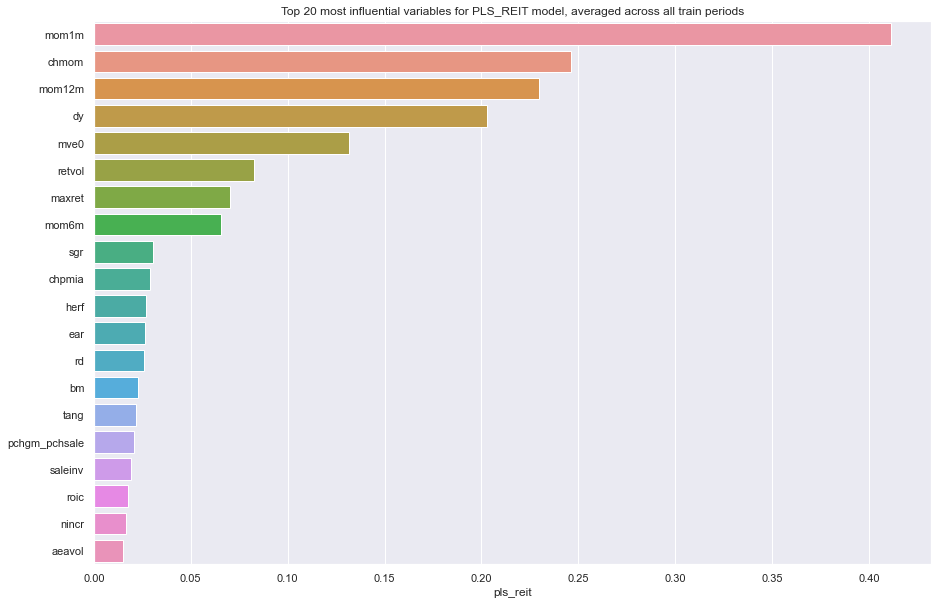

In [319]:
# Plot features of importance
# Plot graph
df_top20 = df_impt.sort_values(by=[model_name], ascending = False).head(20)
plt.figure(figsize=(15,10))
plt.title(f'Top 20 most influential variables for {model_name.upper()} model, averaged across all train periods')
sns.barplot(data = df_top20, x = model_name, y = df_top20.index);


In [320]:
# Merge df_temp to existing df_r2drecrease table

df_r2decrease_reit = pd.merge(
    left = df_r2decrease_reit,
    right = df_impt[model_name],
    how = 'left',
    left_index = True,
    right_index = True    
)

# Rank R2decrease table after including new model results
df_featurerank_reit = df_r2decrease_reit.rank() 
df_featurerank_reit['all_models'] = df_featurerank_reit.sum(axis=1)

# Display tables
display(df_r2decrease_reit)
display(df_featurerank_reit.sort_values('all_models', ascending = False))

# Save dfs to .csv 
df_r2decrease_reit.to_csv('../data/df_r2decrease_reit.csv', index = False)
df_featurerank_reit.to_csv('../data/df_featurerank_reit.csv', index = False)

lr_reit  huber_reit  ridge_reit  lasso_reit  enet_reit  \
absacc           0.000306   -0.001380    0.000189    0.000000   0.000000   
acc              0.001430   -0.000741    0.001779    0.000000   0.000000   
aeavol           0.000650    0.000668    0.005239    0.001173   0.001226   
age              0.000137   -0.000080    0.001680    0.000018   0.000030   
agr              0.000223    0.005201    0.003357    0.000000   0.000010   
baspread         0.007390    0.007871    0.000149    0.000000   0.000000   
beta             0.008894    0.057075    0.000315    0.000000   0.000000   
betasq           0.013997    0.013039    0.002645    0.000000   0.000000   
bm               0.001241    0.000853    0.024032    0.025538   0.026162   
bm_ia            0.002404    0.004776    0.007611    0.004235   0.004285   
cash             0.000161    0.000505    0.003340    0.000873   0.000927   
cashdebt         0.000128   -0.001187    0.000750    0.000000   0.000000   
cashpr           0.001257    0.002444    0.004893    0.001111   0.001181   
cfp              0.006021    0.006040    0.008196    0.013265   0.013306   
cfp_ia           0.001410    0.004166    0.007417    0.015930   0.015591   
chatoia          0.000082   -0.000040   -0.000983   -0.000089  -0.000097   
chcsho           0.000206   -0.000878    0.005366    0.002707   0.002796   
chempia          0.001031    0.003782   -0.000006    0.000000   0.000000   
chinv            0.000245   -0.000393    0.000482    0.000000   0.000000   
chmom            0.052654    0.050540    0.096469    0.142593   0.139152   
chpmia           0.002182    0.002565    0.011188    0.005567   0.005818   
chtx            -0.000017   -0.000019    0.000188    0.000000   0.000000   
cinvest          0.000038    0.000148    0.000281    0.000000   0.000000   
convind          0.000886    0.000794    0.000866    0.000000   0.000000   
currat           0.091179    0.044869   -0.000742    0.000000   0.000000   
depr            -0.000063    0.000391    0.001464    0.000148   0.000158   
divi             0.000153    0.000328    0.000156    0.000000   0.000000   
divo             0.000145    0.000922    0.000460    0.000000   0.000000   
dolvol           0.052843    0.089712    0.018587    0.017184   0.017007   
dy               0.016294    0.015071    0.090116    0.083019   0.084596   
ear              0.000198    0.000341    0.007511    0.004939   0.005175   
egr              0.001280    0.002940    0.004116    0.001198   0.001247   
ep               0.001748    0.010111    0.008772    0.004712   0.004875   
gma              0.003155   -0.001219    0.004361    0.000000   0.000000   
grcapx           0.000474    0.000658   -0.000177    0.000000   0.000000   
grltnoa          0.002414    0.001948    0.004432    0.000000   0.000000   
herf             0.023766    0.022687    0.023490    0.026236   0.026005   
hire             0.000198    0.002251    0.000338    0.000000   0.000000   
idiovol          0.000873   -0.000939    0.012297    0.014589   0.014951   
ill              0.005484    0.010939    0.022225    0.013264   0.013836   
indmom          -0.000049    0.000309    0.000357    0.000269   0.000290   
invest           0.000890    0.000858    0.002343    0.000000   0.000000   
lev             -0.000274   -0.002811   -0.002411    0.000000   0.000000   
lgr              0.000145    0.000304    0.000079    0.000000   0.000000   
maxret           0.025620    0.054758    0.005975    0.000000   0.000000   
mom12m           0.004666    0.002331    0.047325    0.017174   0.020037   
mom1m            0.019050    0.030089    0.134880    0.123642   0.127685   
mom36m           0.004236    0.006796    0.023669    0.021621   0.022049   
mom6m            0.056381    0.030482    0.053236    0.127055   0.120789   
ms               0.000196    0.000743    0.002229    0.000000   0.000000   
mve0             0.200379    0.212738    0.122775    0.137827   0.135776   
mve_ia           0.116817    0.152169    0.033515    0.073484   0.

lr_reit  huber_reit  ridge_reit  lasso_reit  enet_reit  \
chmom               87.0        89.0        92.0        94.0       94.0   
mom1m               84.0        84.0        94.0        91.0       92.0   
mve0                94.0        94.0        93.0        93.0       93.0   
mom6m               89.0        85.0        89.0        92.0       91.0   
dy                  83.0        82.0        91.0        90.0       90.0   
retvol              93.0        86.0        90.0        87.0       87.0   
sgr                 79.0        76.0        87.0        88.0       88.0   
mom12m              74.0        60.0        88.0        82.0       83.0   
herf                85.0        83.0        83.0        86.0       85.0   
ill                 75.0        78.0        82.0        78.0       79.0   
mom36m              72.0        72.0        84.0        84.0       84.0   
mve_ia              92.0        93.0        86.0        89.0       89.0   
bm                  54.0        47.0        85.0        85.0       86.0   
chpmia              67.0        62.0        79.0        75.0       75.0   
bm_ia               68.0        69.0        73.0        72.0       72.0   
dolvol              88.0        92.0        81.0        83.0       82.0   
rd_sale             73.0        74.0        74.0        77.0       77.0   
saleinv             66.0        55.0        78.0        69.0       69.0   
maxret              86.0        90.0        68.0        26.0       25.5   
tang                61.0        54.0        77.0        66.0       67.0   
cfp                 76.0        71.0        75.0        79.0       78.0   
ear                 29.0        33.0        72.0        74.0       74.0   
ep                  63.0        77.0        76.0        73.0       73.0   
sp                  59.0        75.0        66.0        76.0       76.0   
cfp_ia              57.0        67.0        71.0        81.0       81.0   
roavol              65.0        68.0        67.0        68.0       68.0   
aeavol              46.0        43.0        64.0        64.0       64.0   
pchgm_pchsale       32.0        20.0        61.0        58.0       58.0   
std_dolvol          39.0        53.0        63.0        59.0       59.0   
idiovol             48.0         7.0        80.0        80.0       80.0   
cash                25.0        39.0        54.0        61.0       61.0   
egr                 56.0        63.0        58.0        65.0       65.0   
cashpr              55.0        61.0        62.0        63.0       63.0   
salerec             26.0        26.0        56.0        60.0       60.0   
pchdepr             43.0        35.0        57.0        67.0       66.0   
roic                47.0         6.0        70.0        70.0       70.0   
chcsho              33.0         8.0        65.0        71.0       71.0   
turn                77.0        79.0        40.0        62.0       62.0   
pchsale_pchinvt     27.0        28.0        51.0        52.0       51.0   
nincr               37.0        13.0        53.0        49.0       49.0   
invest              50.0        48.0        46.0        26.0       25.5   
roaq                62.0        65.0        69.0        26.0       25.5   
rd                  64.0        58.0        17.0        26.0       25.5   
zerotrade           82.0        57.0        50.0        53.0       52.0   
agr                 35.0        70.0        55.0        26.0       48.0   
convind             49.0        46.0        37.0        26.0       25.5   
rd_mve               8.0        44.0        47.0        50.0       53.0   
grltnoa             69.0        56.0        60.0        26.0       25.5   
pchquick            44.0        51.0        30.0        26.0       25.5   
betasq              81.0        80.0        49.0        26.0       25.5   
beta                80.0        91.0        26.0        26.0       25.5   
stdcf               70.0        81.0         9.0        26.0       25.5   
currat              90.0        87.0      

## RESET all custom functions, after PLS

In [321]:
# Create list of configs to test on 
def model_configs():
    # define scope of configs
    # create configs
    configs = []
    print('Total configs (XXX): %d' %len(configs))
    return configs

def model_fit(X_train, y_train, cfg):
    # unpack config
    return None

def model_predict(model, X_validate):
    # make predictions
    y_pred = model.predict(X_validate)
    return y_pred

def evaluate(X_train, X_validate, y_train, y_validate, cfg):
    # convert config to a key for storing results later
    key = cfg

    # fit and evaluate model
    model = model_fit(X_train, y_train, cfg)
    
    # scores from validate set
    y_pred_validate = model_predict(model, X_validate)
    r2_validate = measure_r2(y_validate, y_pred_validate)
    rmse_validate = measure_rmse(y_validate, y_pred_validate)
    
    # scores from train set
    y_pred_train = model_predict(model, X_train)
    r2_train = measure_r2(y_train, y_pred_train)
    rmse_train = measure_rmse(y_train, y_pred_train)    
    
    # print results
    print(f'{key}, {r2_validate:.2f}, {rmse_validate:.2f}, {r2_train:.2f}, {rmse_train:.2f}')
    return (key, r2_validate, rmse_validate, r2_train, rmse_train)

def grid_search(X, y, start_train, start_val, start_test, cfg_list, df_results):
    # Create train and validate sets, ignore test set
    X_train, X_validate, _, y_train, y_validate, _ = \
    train_val_test_split(X, y, start_train, start_val, start_test)
    # evaluate configs
    scores = [evaluate(X_train, X_validate, y_train, y_validate, cfg) for cfg in cfg_list]
    # sort configs by score
    scores.sort(key = lambda tup: tup[1], reverse = True)
    # store results
    df_results.loc[df_results['Model Name'] == model_name, 'Selected Config'] = \
        f'{scores[0][0]}'
    df_results.loc[df_results['Model Name'] == model_name, f'Train ({start_train}-{start_val-1})'] = \
        f'{scores[0][3]:.2f} ({scores[0][4]:.2f})'
    df_results.loc[df_results['Model Name'] == model_name, f'Validate ({start_val}-{start_test-1})'] = \
        f'{scores[0][1]:.2f} ({scores[0][2]:.2f})'
    display(df_results)
    return scores

# Walk-forward testing, this time, we do not use a validate set, so we set start_val = start_test
def walk_forward(selected_cfg, 
                 X, y, 
                 start_train, 
                 start_val, 
                 start_test, 
                 final_year_of_testing,
                 df_results):
    
    predictions = []

    for i in range(final_year_of_testing - start_test + 1):
        
        # Create train-test sets, no need for validate set
        X_train, _, X_test, y_train, _, y_test = \
        train_val_test_split(
            X, y, 
            start_train, 
            start_val + i, 
            start_test + i
        )
        
        # Fit model
        model = model_fit(X_train, y_train, selected_cfg)
       
        # Pickle model
        filename = f'../pickle/{model_name}_{start_test + i}.pkl'
        pickle.dump(model, open(filename,'wb'))
        
        # Predicted values
        y_pred = model_predict(model, X_test)
        predictions.append(y_pred)
        print(f'Test year {start_test + i} done, R2 score is {measure_r2(y_test, y_pred):.2f}')
        print(f'Test year {start_test + i} done, RMSE score is {measure_rmse(y_test, y_pred):.2f}')
        
        # Store results
        df_results.loc[df_results['Model Name'] == model_name, f'Test ({start_test + i})'] = \
            f'{measure_r2(y_test, y_pred):.2f} ({measure_rmse(y_test, y_pred):.2f})'

    # Extract y_test values    
    y_true = y[f'{start_test}' : f'{final_year_of_testing}']
    
    # Flatten multiple arrays of predictions into one array
    predictions = [item for sublist in predictions for item in sublist]
   
    # Calculate scores
    r2_oos = measure_r2(y_true, predictions)
    rmse_oos = measure_rmse(y_true, predictions)
    
    # Save scores
    df_results.loc[df_results['Model Name'] == model_name, f'Test ({start_test}-{final_year_of_testing})'] = \
            f'{r2_oos:.2f} ({rmse_oos:.2f})'
    
    # Display scores
    display(df_results)
    print()
    print(f'R2 for entire pooled test set, from {start_test} to {final_year_of_testing}, is {r2_oos:.2f}.')
    print(f'RMSE for entire pooled test set, from {start_test} to {final_year_of_testing}, is {rmse_oos:.2f}.')
    print()
    
    return r2_oos, rmse_oos

def create_r2decrease(model_name, 
                      X, y,
                      start_train, 
                      start_val, 
                      start_test, 
                      final_year_of_testing):
    
    # Inititate empty dataframe to store results
    df_temp = pd.DataFrame(index = X.columns)

    for i in range(final_year_of_testing - start_test + 1):
        # Create train-test sets
        X_train, _, _, y_train, _, _ = \
        train_val_test_split(
            X, y, 
            start_train, 
            start_val + i, 
            start_test + i
        )
        
        # Load pickled model
        filename = f'../pickle/{model_name}_{start_test + i}.pkl'
        model = pickle.load(open(filename,'rb'))
        
        # Calculate R2 with all features present
        r2_all_features = measure_r2(y_train, model_predict(model, X_train))
        
        # Calculate R2 by setting feature of interest to zero
        col =[]
        for feature in X.columns:
            X_train_minus = X_train.copy()
            X_train_minus[feature] = 0
            r2_minus_feature = measure_r2(y_train, model_predict(model, X_train_minus))
            r2decrease = r2_all_features - r2_minus_feature
            col.append(r2decrease)
        df_temp[start_test + i] = col
        
        
    # Sum across all years, then normalize to sum of 1
    df_temp[model_name] = df_temp.sum(axis=1)
    df_temp[model_name] = df_temp[model_name] / df_temp[model_name].sum()
    
    return df_temp

## Random forest

### REIT

In [322]:
df_results_reit = df_results_reit[:10]

In [329]:
# Create list of configs to test on 
def model_configs():
    # define scope of configs
    n_trees = [100, 200, 300]
    n_max_features = ['sqrt', 0.2, 0.5] # last value means 20% of features are considered at each split
    n_max_depth = [5, 10, 15]
    n_min_samples_leaf = [30, 50, 70]
    # create configs
    configs = []
    for i in n_trees:
        for j in n_max_features:
            for k in n_max_depth:
                for l in n_min_samples_leaf:
                    cfg = [i,j,k,l]
                    configs.append(cfg)
    print('Total configs (n_trees, n_max_features, n_max_depth, n_min_samples_leaf): %d' %len(configs))
    return configs

def model_fit(X_train, y_train, cfg):
    # unpack config
    n_trees, n_max_features, n_max_depth, n_min_samples_leaf = cfg
    model = RandomForestRegressor(
        n_estimators = n_trees,
        max_features = n_max_features,
        max_depth = n_max_depth,
        min_samples_leaf = n_min_samples_leaf,
        random_state = 42,
        n_jobs = -1,
        verbose = 0
    )
    model.fit(X_train, y_train)
    return model

In [330]:
# Instantiate list of configurations
cfg_list = model_configs()

Total configs (n_trees, n_max_features, n_max_depth, n_min_samples_leaf): 81


In [327]:
%%time
# Create model name 
model_name = 'rf_reit'

# Create new row of test results
df_results_reit = pd.concat(
    [df_results_reit, pd.DataFrame([{'Model Name' : model_name,}])], 
    axis = 0
)

# Run grid search of hyperparameters
scores = grid_search(
    X = X_reit, 
    y = y_reit, 
    start_train = 1990, 
    start_val = 2001, 
    start_test = 2006, 
    cfg_list = cfg_list, 
    df_results = df_results_reit
)

# Print results
print ('Top 8 Configs')
print ('Config, R2_validate, RMSE_validate, R2_train, RMSE_train')
for cfg, r2_validate, rmse_validate, r2_train, rmse_train, in scores[:8]:
    print (f'{cfg}, {r2_validate:.2f}, {rmse_validate:.2f}, {r2_train:.2f}, {rmse_train:.2f}')

[100, None, 5, 30], 1.34, 10.19, 9.69, 9.93
[100, None, 5, 50], 1.64, 10.17, 9.19, 9.95
[100, None, 5, 70], 1.37, 10.19, 8.76, 9.98
[100, None, 10, 30], 1.50, 10.18, 19.74, 9.36
[100, None, 10, 50], 1.67, 10.17, 17.09, 9.51
[100, None, 10, 70], 1.36, 10.19, 15.41, 9.61
[100, None, 15, 30], 1.51, 10.18, 25.69, 9.00
[100, None, 15, 50], 1.67, 10.17, 20.82, 9.30
[100, None, 15, 70], 1.31, 10.19, 17.94, 9.46
[100, 'sqrt', 5, 30], 2.00, 10.15, 6.80, 10.09
[100, 'sqrt', 5, 50], 1.67, 10.17, 6.70, 10.09
[100, 'sqrt', 5, 70], 1.77, 10.17, 6.41, 10.11
[100, 'sqrt', 10, 30], 1.47, 10.18, 16.36, 9.55
[100, 'sqrt', 10, 50], 1.09, 10.20, 13.86, 9.70
[100, 'sqrt', 10, 70], 1.66, 10.17, 12.55, 9.77
[100, 'sqrt', 15, 30], 1.65, 10.17, 20.60, 9.31
[100, 'sqrt', 15, 50], 1.60, 10.18, 16.50, 9.55
[100, 'sqrt', 15, 70], 1.70, 10.17, 14.22, 9.68
[100, 0.2, 5, 30], 2.07, 10.15, 8.02, 10.02
[100, 0.2, 5, 50], 1.92, 10.16, 7.69, 10.04
[100, 0.2, 5, 70], 1.63, 10.17, 7.33, 10.06
[100, 0.2, 10, 30], 1.63, 10.17

Model Name             Selected Config Train (1990-2000)  \
0        naive_reit                        N.A.      0.00 (10.45)   
0           lr_reit                        N.A.       1.99 (10.3)   
0  fama-french_reit                    bm, mve0       0.36 (10.4)   
0      carhart_reit            bm, mve0, mom12m       0.52 (10.4)   
0        huber_reit               [3.0, 0.0001]      1.58 (10.36)   
0        ridge_reit        [19920.457084538713]      1.19 (10.38)   
0        lasso_reit       [0.07196856730011514]      1.28 (10.38)   
0         enet_reit  [0.9, 0.07880462815669913]      1.28 (10.38)   
0          pcr_reit                          28      0.90 (10.40)   
0          pls_reit                           1      1.03 (10.39)   
0           rf_reit          [300, 0.2, 10, 70]      13.97 (9.69)   

  Validate (2001-2005) Test (2006-2020)  Test (2006)    Test (2007)  \
0         0.00 (10.26)     0.00 (12.13)  0.00 (7.60)   0.00 (11.29)   
0          0.69 (10.2)    -0.03 (12.13)  4.17 (7.44)  -3.50 (11.48)   
0          1.52 (10.2)     0.17 (12.12)  3.84 (7.45)  -4.46 (11.54)   
0          1.68 (10.2)     0.16 (12.12)  4.37 (7.43)  -3.46 (11.48)   
0         0.90 (10.21)    -0.07 (12.13)  3.50 (7.47)  -2.04 (11.40)   
0         1.82 (10.16)     0.18 (12.12)  4.43 (7.43)  -3.65 (11.49)   
0         1.93 (10.16)     0.23 (12.11)  4.37 (7.43)  -3.54 (11.49)   
0         1.93 (10.16)     0.23 (12.11)  4.37 (7.43)  -3.54 (11.49)   
0         1.89 (10.16)     0.09 (12.12)  3.79 (7.46)  -3.68 (11.49)   
0         1.71 (10.17)    -0.06 (12.13)  4.19 (7.44)  -4.17 (11.52)   
0         2.31 (10.14)              NaN          NaN            NaN   

     Test (2008)    Test (2009)   Test (2010)    Test (2011)  Test (2012)  \
0   0.00 (19.81)   0.00 (25.18)  0.00 (12.47)   0.00 (10.08)  0.00 (9.46)   
0  -0.55 (19.87)  -0.02 (25.19)  1.79 (12.36)  -2.03 (10.19)  3.18 (9.31)   
0  -1.84 (19.99)   0.64 (25.10)  2.03 (12.34)  -0.68 (10.12)  3.28 (9.31)   
0  -1.33 (19.94)   0.15 (25.16)  2.04 (12.34)  -0.71 (10.12)  2.65 (9.34)   
0  -0.24 (19.84)  -0.24 (25.21)  0.25 (12.45)  -0.65 (10.12)  1.09 (9.41)   
0  -1.12 (19.92)   0.16 (25.16)  1.98 (12.34)  -1.29 (10.15)  3.80 (9.28)   
0  -1.09 (19.92)   0.26 (25.15)  2.08 (12.34)  -1.03 (10.14)  3.42 (9.30)   
0  -1.09 (19.92)   0.26 (25.15)  2.08 (12.34)  -1.03 (10.14)  3.43 (9.30)   
0  -1.31 (19.94)   0.20 (25.16)  2.13 (12.33)  -1.07 (10.14)  3.27 (9.31)   
0  -1.10 (19.92)  -0.15 (25.20)  1.75 (12.36)  -1.84 (10.18)  3.68 (9.29)   
0            NaN            NaN           NaN            NaN          NaN   

   Test (2013)  Test (2014)   Test (2015)  Test (2016)   Test (2017)  \
0  0.00 (9.44)  0.00 (7.04)   0.00 (7.47)  0.00 (9.09)   0.00 (7.08)   
0  1.38 (9.37)  1.59 (6.99)  -2.95 (7.58)  2.22 (8.98)  -1.00 (7.12)   
0  1.25 (9.38)  3.36 (6.92)  -1.87 (7.54)  2.06 (8.99)   1.06 (7.05)   
0  1.65 (9.36)  3.06 (6.93)  -1.88 (7.54)  1.71 (9.01)   0.85 (7.05)   
0  0.70 (9.40)  2.18 (6.96)  -2.61 (7.57)  1.41 (9.02)  -0.62 (7.11)   
0  1.91 (9.35)  2.74 (6.94)  -1.82 (7.54)  2.31 (8.98)   0.49 (7.07)   
0  1.89 (9.35)  3.51 (6.92)  -1.64 (7.54)  1.70 (9.01)   0.50 (7.07)   
0  1.90 (9.35)  3.52 (6.92)  -1.63 (7.54)  1.71 (9.01)   0.52 (7.07)   
0  1.65 (9.36)  3.16 (6.93)  -2.25 (7.56)  2.12 (8.99)   0.29 (7.07)   
0  1.99 (9.34)  2.32 (6.96)  -2.06 (7.55)  2.14 (8.99)   0.18 (7.08)   
0          NaN          NaN           NaN          NaN           NaN   

    Test (2018)  Test (2019)    Test (2020) Remarks  
0   0.00 (8.03)  0.00 (8.37)   0.00 (18.42)     NaN  
0  -5.43 (8.25)  3.70 (8.21)  -0.21 (18.43)     NaN  
0  -2.57 (8.14)  3.50 (8.22)  -0.05 (18.42)     NaN  
0  -2.06 (8.12)  3.34 (8.23)  -0.13 (18.43)     NaN  
0  -2.98 (8.15)  2.99 (8.24)  -0.31 (18.44)     NaN  
0  -4.39 (8.21)  4.05 (8.20)  -0.13 (18.43)     NaN  
0  -4.16 (8.20)  4.21 (8.19)  -0.07 (18.42)     NaN  
0  -4.17 (8.20)  4.20 (8.19)  -0.07 (18.42)     NaN  
0  -4.42 (8.21)  3.98 (8.20)  -0.23 (18.44)     NaN

Top 8 Configs
Config, R2_validate, RMSE_validate, R2_train, RMSE_train
[300, 0.2, 10, 70], 2.31, 10.14, 13.97, 9.69
[200, 0.2, 10, 70], 2.27, 10.14, 13.96, 9.69
[200, 0.2, 15, 70], 2.27, 10.14, 15.78, 9.59
[300, 0.2, 15, 70], 2.26, 10.14, 15.86, 9.58
[200, 0.2, 15, 50], 2.19, 10.14, 18.38, 9.44
[300, 0.2, 15, 30], 2.19, 10.14, 22.90, 9.17
[300, 0.2, 15, 50], 2.18, 10.15, 18.33, 9.44
[300, 0.2, 10, 30], 2.17, 10.15, 17.96, 9.46
CPU times: user 1h 3min 33s, sys: 20.9 s, total: 1h 3min 54s
Wall time: 12min 53s


Top 8 Configs

Config, R2_validate, RMSE_validate, R2_train, RMSE_train

[300, 0.2, 10, 70], 2.31, 10.14, 13.97, 9.69

[200, 0.2, 10, 70], 2.27, 10.14, 13.96, 9.69

[200, 0.2, 15, 70], 2.27, 10.14, 15.78, 9.59

[300, 0.2, 15, 70], 2.26, 10.14, 15.86, 9.58

[200, 0.2, 15, 50], 2.19, 10.14, 18.38, 9.44

[300, 0.2, 15, 30], 2.19, 10.14, 22.90, 9.17

[300, 0.2, 15, 50], 2.18, 10.15, 18.33, 9.44

[300, 0.2, 10, 30], 2.17, 10.15, 17.96, 9.46

CPU times: user 1h 3min 33s, sys: 20.9 s, total: 1h 3min 54s

Wall time: 12min 53s

In [328]:
%%time
# Chosen configuration for model
selected_cfg = scores[0][0]

# Out-of-sample testing, no need to do validation after hyperparameters are selected
score = walk_forward(
    selected_cfg, 
    X = X_reit, 
    y = y_reit, 
    start_train = 1990, 
    start_val = 2006, # Set equal to start of test year, so that train year ends just before test year
    start_test = 2006,
    final_year_of_testing = 2020, 
    df_results = df_results_reit
)

print(f'On best performing config: {scores[0][0]}')

# Save df_results to .csv 
df_results_reit.to_csv('../data/df_results_reit.csv', index = False)

Test year 2006 done, R2 score is 4.65
Test year 2006 done, RMSE score is 7.42
Test year 2007 done, R2 score is -11.55
Test year 2007 done, RMSE score is 11.92
Test year 2008 done, R2 score is 0.56
Test year 2008 done, RMSE score is 19.76
Test year 2009 done, R2 score is 0.03
Test year 2009 done, RMSE score is 25.18
Test year 2010 done, R2 score is 3.62
Test year 2010 done, RMSE score is 12.24
Test year 2011 done, R2 score is -2.18
Test year 2011 done, RMSE score is 10.19
Test year 2012 done, R2 score is 1.80
Test year 2012 done, RMSE score is 9.38
Test year 2013 done, R2 score is 1.17
Test year 2013 done, RMSE score is 9.38
Test year 2014 done, R2 score is 2.26
Test year 2014 done, RMSE score is 6.96
Test year 2015 done, R2 score is -2.85
Test year 2015 done, RMSE score is 7.58
Test year 2016 done, R2 score is 0.57
Test year 2016 done, RMSE score is 9.06
Test year 2017 done, R2 score is -0.40
Test year 2017 done, RMSE score is 7.10
Test year 2018 done, R2 score is -1.76
Test year 2018 

Model Name             Selected Config Train (1990-2000)  \
0        naive_reit                        N.A.      0.00 (10.45)   
0           lr_reit                        N.A.       1.99 (10.3)   
0  fama-french_reit                    bm, mve0       0.36 (10.4)   
0      carhart_reit            bm, mve0, mom12m       0.52 (10.4)   
0        huber_reit               [3.0, 0.0001]      1.58 (10.36)   
0        ridge_reit        [19920.457084538713]      1.19 (10.38)   
0        lasso_reit       [0.07196856730011514]      1.28 (10.38)   
0         enet_reit  [0.9, 0.07880462815669913]      1.28 (10.38)   
0          pcr_reit                          28      0.90 (10.40)   
0          pls_reit                           1      1.03 (10.39)   
0           rf_reit          [300, 0.2, 10, 70]      13.97 (9.69)   

  Validate (2001-2005) Test (2006-2020)  Test (2006)     Test (2007)  \
0         0.00 (10.26)     0.00 (12.13)  0.00 (7.60)    0.00 (11.29)   
0          0.69 (10.2)    -0.03 (12.13)  4.17 (7.44)   -3.50 (11.48)   
0          1.52 (10.2)     0.17 (12.12)  3.84 (7.45)   -4.46 (11.54)   
0          1.68 (10.2)     0.16 (12.12)  4.37 (7.43)   -3.46 (11.48)   
0         0.90 (10.21)    -0.07 (12.13)  3.50 (7.47)   -2.04 (11.40)   
0         1.82 (10.16)     0.18 (12.12)  4.43 (7.43)   -3.65 (11.49)   
0         1.93 (10.16)     0.23 (12.11)  4.37 (7.43)   -3.54 (11.49)   
0         1.93 (10.16)     0.23 (12.11)  4.37 (7.43)   -3.54 (11.49)   
0         1.89 (10.16)     0.09 (12.12)  3.79 (7.46)   -3.68 (11.49)   
0         1.71 (10.17)    -0.06 (12.13)  4.19 (7.44)   -4.17 (11.52)   
0         2.31 (10.14)    -0.75 (12.17)  4.65 (7.42)  -11.55 (11.92)   

     Test (2008)    Test (2009)   Test (2010)    Test (2011)  Test (2012)  \
0   0.00 (19.81)   0.00 (25.18)  0.00 (12.47)   0.00 (10.08)  0.00 (9.46)   
0  -0.55 (19.87)  -0.02 (25.19)  1.79 (12.36)  -2.03 (10.19)  3.18 (9.31)   
0  -1.84 (19.99)   0.64 (25.10)  2.03 (12.34)  -0.68 (10.12)  3.28 (9.31)   
0  -1.33 (19.94)   0.15 (25.16)  2.04 (12.34)  -0.71 (10.12)  2.65 (9.34)   
0  -0.24 (19.84)  -0.24 (25.21)  0.25 (12.45)  -0.65 (10.12)  1.09 (9.41)   
0  -1.12 (19.92)   0.16 (25.16)  1.98 (12.34)  -1.29 (10.15)  3.80 (9.28)   
0  -1.09 (19.92)   0.26 (25.15)  2.08 (12.34)  -1.03 (10.14)  3.42 (9.30)   
0  -1.09 (19.92)   0.26 (25.15)  2.08 (12.34)  -1.03 (10.14)  3.43 (9.30)   
0  -1.31 (19.94)   0.20 (25.16)  2.13 (12.33)  -1.07 (10.14)  3.27 (9.31)   
0  -1.10 (19.92)  -0.15 (25.20)  1.75 (12.36)  -1.84 (10.18)  3.68 (9.29)   
0   0.56 (19.76)   0.03 (25.18)  3.62 (12.24)  -2.18 (10.19)  1.80 (9.38)   

   Test (2013)  Test (2014)   Test (2015)  Test (2016)   Test (2017)  \
0  0.00 (9.44)  0.00 (7.04)   0.00 (7.47)  0.00 (9.09)   0.00 (7.08)   
0  1.38 (9.37)  1.59 (6.99)  -2.95 (7.58)  2.22 (8.98)  -1.00 (7.12)   
0  1.25 (9.38)  3.36 (6.92)  -1.87 (7.54)  2.06 (8.99)   1.06 (7.05)   
0  1.65 (9.36)  3.06 (6.93)  -1.88 (7.54)  1.71 (9.01)   0.85 (7.05)   
0  0.70 (9.40)  2.18 (6.96)  -2.61 (7.57)  1.41 (9.02)  -0.62 (7.11)   
0  1.91 (9.35)  2.74 (6.94)  -1.82 (7.54)  2.31 (8.98)   0.49 (7.07)   
0  1.89 (9.35)  3.51 (6.92)  -1.64 (7.54)  1.70 (9.01)   0.50 (7.07)   
0  1.90 (9.35)  3.52 (6.92)  -1.63 (7.54)  1.71 (9.01)   0.52 (7.07)   
0  1.65 (9.36)  3.16 (6.93)  -2.25 (7.56)  2.12 (8.99)   0.29 (7.07)   
0  1.99 (9.34)  2.32 (6.96)  -2.06 (7.55)  2.14 (8.99)   0.18 (7.08)   
0  1.17 (9.38)  2.26 (6.96)  -2.85 (7.58)  0.57 (9.06)  -0.40 (7.10)   

    Test (2018)   Test (2019)    Test (2020) Remarks  
0   0.00 (8.03)   0.00 (8.37)   0.00 (18.42)     NaN  
0  -5.43 (8.25)   3.70 (8.21)  -0.21 (18.43)     NaN  
0  -2.57 (8.14)   3.50 (8.22)  -0.05 (18.42)     NaN  
0  -2.06 (8.12)   3.34 (8.23)  -0.13 (18.43)     NaN  
0  -2.98 (8.15)   2.99 (8.24)  -0.31 (18.44)     NaN  
0  -4.39 (8.21)   4.05 (8.20)  -0.13 (18.43)     NaN  
0  -4.16 (8.20)   4.21 (8.19)  -0.07 (18.42)     NaN  
0  -4.17 (8.20)   4.20 (8.19)  -0.07 (18.42)     NaN  
0  -4.42 (8.21)   3.98 (8.20) 


R2 for entire pooled test set, from 2006 to 2020, is -0.75.
RMSE for entire pooled test set, from 2006 to 2020, is 12.17.

On best performing config: [300, 0.2, 10, 70]
CPU times: user 21min 28s, sys: 8.24 s, total: 21min 37s
Wall time: 4min 17s


R2 for entire pooled test set, from 2006 to 2020, is -0.75.

RMSE for entire pooled test set, from 2006 to 2020, is 12.17.

On best performing config: [300, 0.2, 10, 70]

CPU times: user 21min 28s, sys: 8.24 s, total: 21min 37s

Wall time: 4min 17s

### Sample 1

In [331]:
df_results_sample1 = df_results_sample1[:10]

In [332]:
%%time
# Create model name 
model_name = 'rf_sample1'

# Create new row of test results
df_results_sample1 = pd.concat(
    [df_results_sample1, pd.DataFrame([{'Model Name' : model_name,}])], 
    axis = 0
)

# Run grid search of hyperparameters
scores = grid_search(
    X = X_1, 
    y = y_1, 
    start_train = 1990, 
    start_val = 2001, 
    start_test = 2006, 
    cfg_list = cfg_list, 
    df_results = df_results_sample1
)

# Print results
print ('Top 8 Configs')
print ('Config, R2_validate, RMSE_validate, R2_train, RMSE_train')
for cfg, r2_validate, rmse_validate, r2_train, rmse_train, in scores[:8]:
    print (f'{cfg}, {r2_validate:.2f}, {rmse_validate:.2f}, {r2_train:.2f}, {rmse_train:.2f}')

[100, 'sqrt', 5, 30], 0.55, 18.95, 3.59, 20.50
[100, 'sqrt', 5, 50], 0.62, 18.95, 2.99, 20.56
[100, 'sqrt', 5, 70], 0.55, 18.95, 2.90, 20.57
[100, 'sqrt', 10, 30], 0.63, 18.95, 9.45, 19.87
[100, 'sqrt', 10, 50], 0.74, 18.94, 7.56, 20.07
[100, 'sqrt', 10, 70], 0.71, 18.94, 6.60, 20.18
[100, 'sqrt', 15, 30], 0.61, 18.95, 14.15, 19.34
[100, 'sqrt', 15, 50], 0.86, 18.92, 10.92, 19.70
[100, 'sqrt', 15, 70], 0.64, 18.95, 8.96, 19.92
[100, 0.2, 5, 30], 0.68, 18.94, 4.04, 20.45
[100, 0.2, 5, 50], 0.74, 18.94, 3.46, 20.51
[100, 0.2, 5, 70], 0.63, 18.95, 3.29, 20.53
[100, 0.2, 10, 30], 0.91, 18.92, 10.23, 19.78
[100, 0.2, 10, 50], 0.79, 18.93, 8.76, 19.94
[100, 0.2, 10, 70], 0.93, 18.92, 7.63, 20.07
[100, 0.2, 15, 30], 0.78, 18.93, 15.56, 19.18
[100, 0.2, 15, 50], 0.87, 18.92, 12.17, 19.57
[100, 0.2, 15, 70], 0.78, 18.93, 10.16, 19.79
[100, 0.5, 5, 30], 0.65, 18.95, 4.73, 20.38
[100, 0.5, 5, 50], 0.73, 18.94, 4.02, 20.45
[100, 0.5, 5, 70], 0.79, 18.93, 3.81, 20.48
[100, 0.5, 10, 30], 0.76, 18.93

Model Name        Selected Config Train (1990-2000)  \
0        naive_sample1                   N.A.      0.00 (20.88)   
0           lr_sample1                   N.A.       1.66 (20.7)   
0  fama-french_sample1               bm, mve0       0.21 (20.9)   
0      carhart_sample1       bm, mve0, mom12m       0.25 (20.9)   
0        huber_sample1            [9, 0.0001]      1.57 (20.71)   
0        ridge_sample1    [50084.07989848212]      0.86 (20.79)   
0        lasso_sample1  [0.47148663634573895]      0.51 (20.82)   
0         enet_sample1             [0.3, 1.0]      0.65 (20.81)   
0          pcr_sample1                     21      0.70 (20.80)   
0          pls_sample1                      1      1.06 (20.77)   
0           rf_sample1     [200, 0.5, 15, 50]     13.73 (19.39)   

  Validate (2001-2005) Test (2006-2020)    Test (2006)    Test (2007)  \
0         0.00 (19.01)     0.00 (15.77)   0.00 (14.72)   0.00 (12.19)   
0         -0.45 (19.0)    -0.49 (15.80)  -0.80 (14.78)  -4.28 (12.45)   
0          0.32 (19.0)     0.13 (15.76)   0.74 (14.66)  -1.74 (12.30)   
0          0.31 (19.0)     0.11 (15.76)   0.62 (14.67)  -1.56 (12.29)   
0        -0.21 (19.03)    -0.29 (15.79)  -0.52 (14.76)  -2.89 (12.37)   
0         0.53 (18.96)     0.04 (15.76)   0.48 (14.68)  -2.36 (12.34)   
0         0.44 (18.97)     0.11 (15.76)   0.91 (14.65)  -2.18 (12.33)   
0         0.46 (18.96)     0.11 (15.76)   0.81 (14.66)  -2.17 (12.33)   
0         0.51 (18.96)    -0.18 (15.78)  -0.61 (14.76)  -2.45 (12.34)   
0         0.11 (19.00)    -0.40 (15.80)  -0.56 (14.76)  -3.95 (12.43)   
0         1.05 (18.91)              NaN            NaN            NaN   

     Test (2008)   Test (2009)    Test (2010)    Test (2011)   Test (2012)  \
0   0.00 (20.06)  0.00 (24.51)   0.00 (15.28)   0.00 (13.93)  0.00 (12.77)   
0  -2.82 (20.35)  0.66 (24.43)  -0.84 (15.34)  -1.28 (14.02)  0.52 (12.74)   
0  -2.49 (20.31)  0.77 (24.41)   1.13 (15.19)  -0.88 (13.99)  0.74 (12.72)   
0  -2.28 (20.29)  0.56 (24.44)   0.90 (15.21)  -0.76 (13.99)  0.76 (12.72)   
0  -2.15 (20.28)  0.58 (24.44)  -0.76 (15.34)  -0.67 (13.98)  0.54 (12.73)   
0  -2.61 (20.32)  0.86 (24.40)   0.60 (15.23)  -0.88 (13.99)  0.87 (12.71)   
0  -2.59 (20.32)  0.85 (24.40)   1.12 (15.19)  -0.96 (14.00)  0.80 (12.72)   
0  -2.61 (20.32)  0.80 (24.41)   1.16 (15.19)  -0.98 (14.00)  0.82 (12.72)   
0  -2.98 (20.36)  0.79 (24.41)   0.51 (15.24)  -0.95 (14.00)  0.67 (12.73)   
0  -3.19 (20.38)  0.75 (24.42)  -0.02 (15.28)  -1.78 (14.06)  0.14 (12.76)   
0            NaN           NaN            NaN            NaN           NaN   

    Test (2013)    Test (2014)    Test (2015)    Test (2016)    Test (2017)  \
0  0.00 (12.20)   0.00 (11.34)   0.00 (14.08)   0.00 (16.07)   0.00 (12.67)   
0  2.52 (12.05)  -1.37 (11.42)  -1.45 (14.18)  -0.12 (16.08)  -0.16 (12.68)   
0  2.08 (12.07)   0.01 (11.34)  -0.61 (14.12)   0.67 (16.01)   0.91 (12.61)   
0  2.29 (12.06)   0.03 (11.34)  -0.50 (14.11)   0.57 (16.02)   0.70 (12.62)   
0  2.45 (12.05)  -0.60 (11.37)  -1.17 (14.16)  -0.11 (16.07)   0.03 (12.67)   
0  2.81 (12.03)  -0.26 (11.35)  -0.64 (14.12)   0.49 (16.03)   0.37 (12.64)   
0  2.04 (12.07)  -0.15 (11.35)  -0.62 (14.12)   0.72 (16.01)   0.87 (12.61)   
0  2.28 (12.06)  -0.26 (11.35)  -0.56 (14.12)   0.68 (16.01)   0.86 (12.61)   
0  2.67 (12.04)  -0.87 (11.39)  -0.56 (14.12)   0.27 (16.04)   0.05 (12.66)   
0  3.10 (12.01)  -1.00 (11.40)  -0.96 (14.15)   0.41 (16.03)  -0.19 (12.68)   
0           NaN            NaN            NaN            NaN            NaN   

     Test (2018)   Test (2019)   Test (2020) Remarks  
0   0.00 (13.97)  0.00 (15.38)  0.00 (22.31)     NaN  
0  -2.02 (14.11)  0.46 (15.34)  0.74 (22.23)     NaN  
0  -1.56 (14.08)  0.86 (15.31)  0.78 (22.22)     NaN  
0  -1.53 (14.08)  0.95 (15.31)  0.71 (22.23)     NaN  
0  -1.50 (14.08)  0.44 (15.35)  0.50 (22.25)     NaN  
0  -1.58 (14.08)  0.82 (15.32)  0.76 (22.22)     NaN  
0  -1.65 (14.09)  0.79 (15.32)  0.80 (22.22)     NaN  
0  -

Top 8 Configs
Config, R2_validate, RMSE_validate, R2_train, RMSE_train
[200, 0.5, 15, 50], 1.05, 18.91, 13.73, 19.39
[300, 0.2, 10, 50], 1.03, 18.91, 8.73, 19.94
[200, 0.5, 15, 70], 1.03, 18.91, 11.49, 19.64
[300, 0.5, 15, 70], 1.02, 18.91, 11.53, 19.64
[300, 0.5, 10, 50], 1.00, 18.91, 9.91, 19.82
[200, 0.5, 10, 50], 0.99, 18.91, 9.91, 19.82
[300, 0.5, 15, 50], 0.98, 18.91, 13.81, 19.38
[200, 0.5, 10, 70], 0.98, 18.91, 8.83, 19.93
CPU times: user 49min 23s, sys: 14.7 s, total: 49min 38s
Wall time: 9min 39s


Top 8 Configs

Config, R2_validate, RMSE_validate, R2_train, RMSE_train

[200, 0.5, 15, 50], 1.05, 18.91, 13.73, 19.39

[300, 0.2, 10, 50], 1.03, 18.91, 8.73, 19.94

[200, 0.5, 15, 70], 1.03, 18.91, 11.49, 19.64

[300, 0.5, 15, 70], 1.02, 18.91, 11.53, 19.64

[300, 0.5, 10, 50], 1.00, 18.91, 9.91, 19.82

[200, 0.5, 10, 50], 0.99, 18.91, 9.91, 19.82

[300, 0.5, 15, 50], 0.98, 18.91, 13.81, 19.38

[200, 0.5, 10, 70], 0.98, 18.91, 8.83, 19.93

CPU times: user 49min 23s, sys: 14.7 s, total: 49min 38s

Wall time: 9min 39s

In [333]:
%%time
# Chosen configuration for model
selected_cfg = scores[0][0]

# Out-of-sample testing, no need to do validation after hyperparameters are selected
score = walk_forward(
    selected_cfg, 
    X = X_1, 
    y = y_1, 
    start_train = 1990, 
    start_val = 2006, # Set equal to start of test year, so that train year ends just before test year
    start_test = 2006,
    final_year_of_testing = 2020, 
    df_results = df_results_sample1
)

print(f'On best performing config: {scores[0][0]}')

# Save df_results to .csv 
df_results_sample1.to_csv('../data/df_results_sample1.csv', index = False)

Test year 2006 done, R2 score is -0.63
Test year 2006 done, RMSE score is 14.76
Test year 2007 done, R2 score is -2.54
Test year 2007 done, RMSE score is 12.35
Test year 2008 done, R2 score is -3.11
Test year 2008 done, RMSE score is 20.37
Test year 2009 done, R2 score is -0.01
Test year 2009 done, RMSE score is 24.51
Test year 2010 done, R2 score is 0.14
Test year 2010 done, RMSE score is 15.27
Test year 2011 done, R2 score is -0.81
Test year 2011 done, RMSE score is 13.99
Test year 2012 done, R2 score is 0.79
Test year 2012 done, RMSE score is 12.72
Test year 2013 done, R2 score is -0.16
Test year 2013 done, RMSE score is 12.21
Test year 2014 done, R2 score is 0.09
Test year 2014 done, RMSE score is 11.33
Test year 2015 done, R2 score is -0.58
Test year 2015 done, RMSE score is 14.12
Test year 2016 done, R2 score is 1.63
Test year 2016 done, RMSE score is 15.93
Test year 2017 done, R2 score is 0.99
Test year 2017 done, RMSE score is 12.61
Test year 2018 done, R2 score is -1.99
Test y

Model Name        Selected Config Train (1990-2000)  \
0        naive_sample1                   N.A.      0.00 (20.88)   
0           lr_sample1                   N.A.       1.66 (20.7)   
0  fama-french_sample1               bm, mve0       0.21 (20.9)   
0      carhart_sample1       bm, mve0, mom12m       0.25 (20.9)   
0        huber_sample1            [9, 0.0001]      1.57 (20.71)   
0        ridge_sample1    [50084.07989848212]      0.86 (20.79)   
0        lasso_sample1  [0.47148663634573895]      0.51 (20.82)   
0         enet_sample1             [0.3, 1.0]      0.65 (20.81)   
0          pcr_sample1                     21      0.70 (20.80)   
0          pls_sample1                      1      1.06 (20.77)   
0           rf_sample1     [200, 0.5, 15, 50]     13.73 (19.39)   

  Validate (2001-2005) Test (2006-2020)    Test (2006)    Test (2007)  \
0         0.00 (19.01)     0.00 (15.77)   0.00 (14.72)   0.00 (12.19)   
0         -0.45 (19.0)    -0.49 (15.80)  -0.80 (14.78)  -4.28 (12.45)   
0          0.32 (19.0)     0.13 (15.76)   0.74 (14.66)  -1.74 (12.30)   
0          0.31 (19.0)     0.11 (15.76)   0.62 (14.67)  -1.56 (12.29)   
0        -0.21 (19.03)    -0.29 (15.79)  -0.52 (14.76)  -2.89 (12.37)   
0         0.53 (18.96)     0.04 (15.76)   0.48 (14.68)  -2.36 (12.34)   
0         0.44 (18.97)     0.11 (15.76)   0.91 (14.65)  -2.18 (12.33)   
0         0.46 (18.96)     0.11 (15.76)   0.81 (14.66)  -2.17 (12.33)   
0         0.51 (18.96)    -0.18 (15.78)  -0.61 (14.76)  -2.45 (12.34)   
0         0.11 (19.00)    -0.40 (15.80)  -0.56 (14.76)  -3.95 (12.43)   
0         1.05 (18.91)    -0.36 (15.79)  -0.63 (14.76)  -2.54 (12.35)   

     Test (2008)    Test (2009)    Test (2010)    Test (2011)   Test (2012)  \
0   0.00 (20.06)   0.00 (24.51)   0.00 (15.28)   0.00 (13.93)  0.00 (12.77)   
0  -2.82 (20.35)   0.66 (24.43)  -0.84 (15.34)  -1.28 (14.02)  0.52 (12.74)   
0  -2.49 (20.31)   0.77 (24.41)   1.13 (15.19)  -0.88 (13.99)  0.74 (12.72)   
0  -2.28 (20.29)   0.56 (24.44)   0.90 (15.21)  -0.76 (13.99)  0.76 (12.72)   
0  -2.15 (20.28)   0.58 (24.44)  -0.76 (15.34)  -0.67 (13.98)  0.54 (12.73)   
0  -2.61 (20.32)   0.86 (24.40)   0.60 (15.23)  -0.88 (13.99)  0.87 (12.71)   
0  -2.59 (20.32)   0.85 (24.40)   1.12 (15.19)  -0.96 (14.00)  0.80 (12.72)   
0  -2.61 (20.32)   0.80 (24.41)   1.16 (15.19)  -0.98 (14.00)  0.82 (12.72)   
0  -2.98 (20.36)   0.79 (24.41)   0.51 (15.24)  -0.95 (14.00)  0.67 (12.73)   
0  -3.19 (20.38)   0.75 (24.42)  -0.02 (15.28)  -1.78 (14.06)  0.14 (12.76)   
0  -3.11 (20.37)  -0.01 (24.51)   0.14 (15.27)  -0.81 (13.99)  0.79 (12.72)   

     Test (2013)    Test (2014)    Test (2015)    Test (2016)    Test (2017)  \
0   0.00 (12.20)   0.00 (11.34)   0.00 (14.08)   0.00 (16.07)   0.00 (12.67)   
0   2.52 (12.05)  -1.37 (11.42)  -1.45 (14.18)  -0.12 (16.08)  -0.16 (12.68)   
0   2.08 (12.07)   0.01 (11.34)  -0.61 (14.12)   0.67 (16.01)   0.91 (12.61)   
0   2.29 (12.06)   0.03 (11.34)  -0.50 (14.11)   0.57 (16.02)   0.70 (12.62)   
0   2.45 (12.05)  -0.60 (11.37)  -1.17 (14.16)  -0.11 (16.07)   0.03 (12.67)   
0   2.81 (12.03)  -0.26 (11.35)  -0.64 (14.12)   0.49 (16.03)   0.37 (12.64)   
0   2.04 (12.07)  -0.15 (11.35)  -0.62 (14.12)   0.72 (16.01)   0.87 (12.61)   
0   2.28 (12.06)  -0.26 (11.35)  -0.56 (14.12)   0.68 (16.01)   0.86 (12.61)   
0   2.67 (12.04)  -0.87 (11.39)  -0.56 (14.12)   0.27 (16.04)   0.05 (12.66)   
0   3.10 (12.01)  -1.00 (11.40)  -0.96 (14.15)   0.41 (16.03)  -0.19 (12.68)   
0  -0.16 (12.21)   0.09 (11.33)  -0.58 (14.12)   1.63 (15.93)   0.99 (12.61)   

     Test (2018)   Test (2019)    Test (2020) Remarks  
0   0.00 (13.97)  0.00 (15.38)   0.00 (22.31)     NaN  
0  -2.02 (14.11)  0.46 (15.34)   0.74 (22.23)     NaN  
0  -1.56 (14.08)  0.86 (15.31)   0.78 (22.22)     NaN  
0  -1.53 (14.08)  0.95 (15.31)   0.71 (22.23)     NaN  
0  -1.50 (14.08)  0.44 (15.35)   0.50 (22.25)     NaN  
0  -1.58 (14.08)  0.82 (15.32)   0.76 (22.22)     NaN  
0  -1.65 (14.09)  0.79 (15.3


R2 for entire pooled test set, from 2006 to 2020, is -0.36.
RMSE for entire pooled test set, from 2006 to 2020, is 15.79.

On best performing config: [200, 0.5, 15, 50]
CPU times: user 1h 1min 22s, sys: 10.5 s, total: 1h 1min 33s
Wall time: 11min 10s


R2 for entire pooled test set, from 2006 to 2020, is -0.36.

RMSE for entire pooled test set, from 2006 to 2020, is 15.79.

On best performing config: [200, 0.5, 15, 50]

CPU times: user 1h 1min 22s, sys: 10.5 s, total: 1h 1min 33s

Wall time: 11min 10s

### Sample 2

In [334]:
df_results_sample2 = df_results_sample2[:10]

In [335]:
%%time
# Create model name 
model_name = 'rf_sample2'

# Create new row of test results
df_results_sample2 = pd.concat(
    [df_results_sample2, pd.DataFrame([{'Model Name' : model_name,}])], 
    axis = 0
)

# Run grid search of hyperparameters
scores = grid_search(
    X = X_2, 
    y = y_2, 
    start_train = 1990, 
    start_val = 2001, 
    start_test = 2006, 
    cfg_list = cfg_list, 
    df_results = df_results_sample2
)

# Print results
print ('Top 8 Configs')
print ('Config, R2_validate, RMSE_validate, R2_train, RMSE_train')
for cfg, r2_validate, rmse_validate, r2_train, rmse_train, in scores[:8]:
    print (f'{cfg}, {r2_validate:.2f}, {rmse_validate:.2f}, {r2_train:.2f}, {rmse_train:.2f}')

[100, 'sqrt', 5, 30], 1.92, 12.17, 3.64, 13.74
[100, 'sqrt', 5, 50], 2.08, 12.16, 3.21, 13.77
[100, 'sqrt', 5, 70], 1.87, 12.17, 2.87, 13.80
[100, 'sqrt', 10, 30], 1.70, 12.18, 7.49, 13.47
[100, 'sqrt', 10, 50], 1.84, 12.17, 6.51, 13.54
[100, 'sqrt', 10, 70], 1.67, 12.18, 5.81, 13.59
[100, 'sqrt', 15, 30], 1.51, 12.19, 11.42, 13.18
[100, 'sqrt', 15, 50], 1.70, 12.18, 9.72, 13.30
[100, 'sqrt', 15, 70], 1.61, 12.19, 8.20, 13.41
[100, 0.2, 5, 30], 2.00, 12.16, 3.83, 13.73
[100, 0.2, 5, 50], 2.12, 12.16, 3.48, 13.76
[100, 0.2, 5, 70], 2.05, 12.16, 3.25, 13.77
[100, 0.2, 10, 30], 1.86, 12.17, 8.11, 13.42
[100, 0.2, 10, 50], 2.00, 12.16, 7.27, 13.48
[100, 0.2, 10, 70], 1.86, 12.17, 6.70, 13.52
[100, 0.2, 15, 30], 1.66, 12.18, 12.79, 13.07
[100, 0.2, 15, 50], 1.78, 12.18, 10.92, 13.21
[100, 0.2, 15, 70], 1.50, 12.19, 9.44, 13.32
[100, 0.5, 5, 30], 1.96, 12.17, 3.92, 13.72
[100, 0.5, 5, 50], 2.22, 12.15, 3.69, 13.74
[100, 0.5, 5, 70], 2.14, 12.15, 3.64, 13.74
[100, 0.5, 10, 30], 1.25, 12.21, 8

Model Name            Selected Config Train (1990-2000)  \
0        naive_sample2                       N.A.      0.00 (14.00)   
0           lr_sample2                       N.A.       2.18 (13.8)   
0  fama-french_sample2                   bm, mve0       0.68 (14.0)   
0      carhart_sample2           bm, mve0, mom12m       0.68 (14.0)   
0        huber_sample2                [9, 0.0001]      1.99 (13.86)   
0        ridge_sample2        [38867.76690892668]      1.49 (13.90)   
0        lasso_sample2      [0.15264179671752318]      1.39 (13.90)   
0         enet_sample2  [0.5, 0.2807216203941176]      1.38 (13.90)   
0          pcr_sample2                         31      1.20 (13.92)   
0          pls_sample2                          1      1.22 (13.91)   
0           rf_sample2          [300, 0.5, 5, 50]      3.75 (13.74)   

  Validate (2001-2005) Test (2006-2020)  Test (2006)   Test (2007)  \
0         0.00 (12.29)     0.00 (12.32)  0.00 (9.17)   0.00 (8.99)   
0          0.65 (12.2)     0.22 (12.30)  0.56 (9.15)  -3.53 (9.15)   
0          1.15 (12.2)     0.56 (12.28)  1.74 (9.09)  -2.06 (9.09)   
0          1.15 (12.2)     0.56 (12.28)  1.75 (9.09)  -2.06 (9.09)   
0         0.79 (12.24)     0.39 (12.29)  1.20 (9.12)  -3.22 (9.14)   
0         1.78 (12.18)     0.69 (12.27)  1.89 (9.08)  -2.63 (9.11)   
0         1.76 (12.18)     0.75 (12.27)  2.20 (9.07)  -2.40 (9.10)   
0         1.77 (12.18)     0.76 (12.27)  2.21 (9.07)  -2.39 (9.10)   
0         1.79 (12.18)     0.57 (12.28)  1.67 (9.09)  -3.65 (9.16)   
0         1.77 (12.18)     0.68 (12.27)  2.14 (9.07)  -2.87 (9.12)   
0         2.31 (12.14)              NaN          NaN           NaN   

     Test (2008)   Test (2009)   Test (2010)   Test (2011)   Test (2012)  \
0   0.00 (15.09)  0.00 (18.80)  0.00 (10.67)   0.00 (9.59)  0.00 (10.62)   
0  -5.27 (15.48)  3.25 (18.49)  1.21 (10.60)  -4.70 (9.81)  2.88 (10.47)   
0  -3.80 (15.37)  1.82 (18.63)  2.57 (10.53)  -1.08 (9.64)  2.10 (10.51)   
0  -3.80 (15.37)  1.83 (18.63)  2.62 (10.53)  -1.11 (9.64)  2.18 (10.51)   
0  -4.71 (15.44)  2.82 (18.53)  1.69 (10.58)  -3.78 (9.77)  2.48 (10.49)   
0  -4.47 (15.42)  2.83 (18.53)  2.35 (10.54)  -2.62 (9.71)  3.15 (10.45)   
0  -4.48 (15.42)  2.61 (18.55)  2.44 (10.54)  -2.32 (9.70)  3.19 (10.45)   
0  -4.42 (15.42)  2.61 (18.55)  2.46 (10.53)  -2.28 (9.70)  3.16 (10.45)   
0  -4.39 (15.42)  2.78 (18.54)  1.89 (10.57)  -3.09 (9.73)  2.76 (10.47)   
0  -4.55 (15.43)  2.92 (18.52)  2.06 (10.56)  -2.75 (9.72)  3.26 (10.45)   
0            NaN           NaN           NaN           NaN           NaN   

   Test (2013)   Test (2014)   Test (2015)   Test (2016)  Test (2017)  \
0  0.00 (8.43)  0.00 (15.25)   0.00 (9.36)  0.00 (11.29)  0.00 (8.75)   
0  5.29 (8.21)  0.65 (15.20)  -3.61 (9.53)  2.74 (11.14)  0.11 (8.74)   
0  5.79 (8.19)  0.51 (15.21)  -2.07 (9.46)  2.88 (11.13)  1.56 (8.68)   
0  5.61 (8.19)  0.56 (15.21)  -2.28 (9.47)  2.94 (11.13)  1.52 (8.68)   
0  6.14 (8.17)  0.62 (15.21)  -2.53 (9.48)  2.60 (11.14)  0.80 (8.71)   
0  5.67 (8.19)  1.03 (15.17)  -2.75 (9.49)  3.02 (11.12)  0.98 (8.70)   
0  5.11 (8.21)  1.12 (15.17)  -2.50 (9.48)  3.32 (11.10)  1.08 (8.70)   
0  5.16 (8.21)  1.12 (15.17)  -2.48 (9.48)  3.27 (11.11)  1.15 (8.70)   
0  4.95 (8.22)  1.18 (15.16)  -2.61 (9.48)  2.78 (11.13)  0.87 (8.71)   
0  4.57 (8.24)  1.14 (15.17)  -3.20 (9.51)  3.05 (11.12)  1.11 (8.70)   
0          NaN           NaN           NaN           NaN          NaN   

     Test (2018)   Test (2019)   Test (2020) Remarks  
0   0.00 (11.87)  0.00 (13.02)  0.00 (17.41)     NaN  
0  -4.01 (12.11)  2.07 (12.89)  1.33 (17.29)     NaN  
0  -2.41 (12.02)  1.93 (12.90)  0.87 (17.33)     NaN  
0  -2.44 (12.02)  1.93 (12.90)  0.87 (17.33)     NaN  
0  -3.64 (12.09)  2.18 (12.88)  1.24 (17.30)     NaN  
0  -3.01 (12.05)  2.32 (12.87)  1.38 (17.29)     NaN  
0  -2.74 (12.04)  2.56 (12.86)  1.37 (17.29)     NaN  
0  -2.70 (12.03)  2.53 (12.86)  1.38 (17.29)     NaN  
0  -3.14 (12.06)  2.45 (12.86)  1

Top 8 Configs
Config, R2_validate, RMSE_validate, R2_train, RMSE_train
[300, 0.5, 5, 50], 2.31, 12.14, 3.75, 13.74
[200, 0.5, 5, 50], 2.28, 12.15, 3.70, 13.74
[300, 0.5, 5, 70], 2.23, 12.15, 3.58, 13.75
[100, 0.5, 5, 50], 2.22, 12.15, 3.69, 13.74
[200, 0.5, 5, 70], 2.20, 12.15, 3.55, 13.75
[300, 0.2, 5, 50], 2.16, 12.15, 3.41, 13.76
[200, 0.2, 5, 50], 2.14, 12.15, 3.45, 13.76
[100, 0.5, 5, 70], 2.14, 12.15, 3.64, 13.74
CPU times: user 1h 7min 59s, sys: 11.4 s, total: 1h 8min 11s
Wall time: 12min 28s


Top 8 Configs

Config, R2_validate, RMSE_validate, R2_train, RMSE_train

[300, 0.5, 5, 50], 2.31, 12.14, 3.75, 13.74

[200, 0.5, 5, 50], 2.28, 12.15, 3.70, 13.74

[300, 0.5, 5, 70], 2.23, 12.15, 3.58, 13.75

[100, 0.5, 5, 50], 2.22, 12.15, 3.69, 13.74

[200, 0.5, 5, 70], 2.20, 12.15, 3.55, 13.75

[300, 0.2, 5, 50], 2.16, 12.15, 3.41, 13.76

[200, 0.2, 5, 50], 2.14, 12.15, 3.45, 13.76

[100, 0.5, 5, 70], 2.14, 12.15, 3.64, 13.74

CPU times: user 1h 7min 59s, sys: 11.4 s, total: 1h 8min 11s

Wall time: 12min 28s

In [336]:
%%time
# Chosen configuration for model
selected_cfg = scores[0][0]

# Out-of-sample testing, no need to do validation after hyperparameters are selected
score = walk_forward(
    selected_cfg, 
    X = X_2, 
    y = y_2, 
    start_train = 1990, 
    start_val = 2006, # Set equal to start of test year, so that train year ends just before test year
    start_test = 2006,
    final_year_of_testing = 2020, 
    df_results = df_results_sample2
)

print(f'On best performing config: {scores[0][0]}')

# Save df_results to .csv 
df_results_sample2.to_csv('../data/df_results_sample2.csv', index = False)


Test year 2006 done, R2 score is 2.24
Test year 2006 done, RMSE score is 9.07
Test year 2007 done, R2 score is -2.53
Test year 2007 done, RMSE score is 9.11
Test year 2008 done, R2 score is -7.16
Test year 2008 done, RMSE score is 15.62
Test year 2009 done, R2 score is 0.23
Test year 2009 done, RMSE score is 18.78
Test year 2010 done, R2 score is 2.72
Test year 2010 done, RMSE score is 10.52
Test year 2011 done, R2 score is -7.10
Test year 2011 done, RMSE score is 9.92
Test year 2012 done, R2 score is 4.13
Test year 2012 done, RMSE score is 10.40
Test year 2013 done, R2 score is 0.73
Test year 2013 done, RMSE score is 8.40
Test year 2014 done, R2 score is 0.66
Test year 2014 done, RMSE score is 15.20
Test year 2015 done, R2 score is -2.75
Test year 2015 done, RMSE score is 9.49
Test year 2016 done, R2 score is 3.78
Test year 2016 done, RMSE score is 11.08
Test year 2017 done, R2 score is 2.01
Test year 2017 done, RMSE score is 8.66
Test year 2018 done, R2 score is -3.50
Test year 2018 

Model Name            Selected Config Train (1990-2000)  \
0        naive_sample2                       N.A.      0.00 (14.00)   
0           lr_sample2                       N.A.       2.18 (13.8)   
0  fama-french_sample2                   bm, mve0       0.68 (14.0)   
0      carhart_sample2           bm, mve0, mom12m       0.68 (14.0)   
0        huber_sample2                [9, 0.0001]      1.99 (13.86)   
0        ridge_sample2        [38867.76690892668]      1.49 (13.90)   
0        lasso_sample2      [0.15264179671752318]      1.39 (13.90)   
0         enet_sample2  [0.5, 0.2807216203941176]      1.38 (13.90)   
0          pcr_sample2                         31      1.20 (13.92)   
0          pls_sample2                          1      1.22 (13.91)   
0           rf_sample2          [300, 0.5, 5, 50]      3.75 (13.74)   

  Validate (2001-2005) Test (2006-2020)  Test (2006)   Test (2007)  \
0         0.00 (12.29)     0.00 (12.32)  0.00 (9.17)   0.00 (8.99)   
0          0.65 (12.2)     0.22 (12.30)  0.56 (9.15)  -3.53 (9.15)   
0          1.15 (12.2)     0.56 (12.28)  1.74 (9.09)  -2.06 (9.09)   
0          1.15 (12.2)     0.56 (12.28)  1.75 (9.09)  -2.06 (9.09)   
0         0.79 (12.24)     0.39 (12.29)  1.20 (9.12)  -3.22 (9.14)   
0         1.78 (12.18)     0.69 (12.27)  1.89 (9.08)  -2.63 (9.11)   
0         1.76 (12.18)     0.75 (12.27)  2.20 (9.07)  -2.40 (9.10)   
0         1.77 (12.18)     0.76 (12.27)  2.21 (9.07)  -2.39 (9.10)   
0         1.79 (12.18)     0.57 (12.28)  1.67 (9.09)  -3.65 (9.16)   
0         1.77 (12.18)     0.68 (12.27)  2.14 (9.07)  -2.87 (9.12)   
0         2.31 (12.14)    -0.29 (12.33)  2.24 (9.07)  -2.53 (9.11)   

     Test (2008)   Test (2009)   Test (2010)   Test (2011)   Test (2012)  \
0   0.00 (15.09)  0.00 (18.80)  0.00 (10.67)   0.00 (9.59)  0.00 (10.62)   
0  -5.27 (15.48)  3.25 (18.49)  1.21 (10.60)  -4.70 (9.81)  2.88 (10.47)   
0  -3.80 (15.37)  1.82 (18.63)  2.57 (10.53)  -1.08 (9.64)  2.10 (10.51)   
0  -3.80 (15.37)  1.83 (18.63)  2.62 (10.53)  -1.11 (9.64)  2.18 (10.51)   
0  -4.71 (15.44)  2.82 (18.53)  1.69 (10.58)  -3.78 (9.77)  2.48 (10.49)   
0  -4.47 (15.42)  2.83 (18.53)  2.35 (10.54)  -2.62 (9.71)  3.15 (10.45)   
0  -4.48 (15.42)  2.61 (18.55)  2.44 (10.54)  -2.32 (9.70)  3.19 (10.45)   
0  -4.42 (15.42)  2.61 (18.55)  2.46 (10.53)  -2.28 (9.70)  3.16 (10.45)   
0  -4.39 (15.42)  2.78 (18.54)  1.89 (10.57)  -3.09 (9.73)  2.76 (10.47)   
0  -4.55 (15.43)  2.92 (18.52)  2.06 (10.56)  -2.75 (9.72)  3.26 (10.45)   
0  -7.16 (15.62)  0.23 (18.78)  2.72 (10.52)  -7.10 (9.92)  4.13 (10.40)   

   Test (2013)   Test (2014)   Test (2015)   Test (2016)  Test (2017)  \
0  0.00 (8.43)  0.00 (15.25)   0.00 (9.36)  0.00 (11.29)  0.00 (8.75)   
0  5.29 (8.21)  0.65 (15.20)  -3.61 (9.53)  2.74 (11.14)  0.11 (8.74)   
0  5.79 (8.19)  0.51 (15.21)  -2.07 (9.46)  2.88 (11.13)  1.56 (8.68)   
0  5.61 (8.19)  0.56 (15.21)  -2.28 (9.47)  2.94 (11.13)  1.52 (8.68)   
0  6.14 (8.17)  0.62 (15.21)  -2.53 (9.48)  2.60 (11.14)  0.80 (8.71)   
0  5.67 (8.19)  1.03 (15.17)  -2.75 (9.49)  3.02 (11.12)  0.98 (8.70)   
0  5.11 (8.21)  1.12 (15.17)  -2.50 (9.48)  3.32 (11.10)  1.08 (8.70)   
0  5.16 (8.21)  1.12 (15.17)  -2.48 (9.48)  3.27 (11.11)  1.15 (8.70)   
0  4.95 (8.22)  1.18 (15.16)  -2.61 (9.48)  2.78 (11.13)  0.87 (8.71)   
0  4.57 (8.24)  1.14 (15.17)  -3.20 (9.51)  3.05 (11.12)  1.11 (8.70)   
0  0.73 (8.40)  0.66 (15.20)  -2.75 (9.49)  3.78 (11.08)  2.01 (8.66)   

     Test (2018)   Test (2019)   Test (2020) Remarks  
0   0.00 (11.87)  0.00 (13.02)  0.00 (17.41)     NaN  
0  -4.01 (12.11)  2.07 (12.89)  1.33 (17.29)     NaN  
0  -2.41 (12.02)  1.93 (12.90)  0.87 (17.33)     NaN  
0  -2.44 (12.02)  1.93 (12.90)  0.87 (17.33)     NaN  
0  -3.64 (12.09)  2.18 (12.88)  1.24 (17.30)     NaN  
0  -3.01 (12.05)  2.32 (12.87)  1.38 (17.29)     NaN  
0  -2.74 (12.04)  2.56 (12.86)  1.37 (17.29)     NaN  
0  -2.70 (12.03)  2.53 (12.86)  1.38 (17.29)     NaN  
0  -3.14 (12.06)  2.45 (12.86)  1


R2 for entire pooled test set, from 2006 to 2020, is -0.29.
RMSE for entire pooled test set, from 2006 to 2020, is 12.33.

On best performing config: [300, 0.5, 5, 50]
CPU times: user 45min 57s, sys: 8.32 s, total: 46min 6s
Wall time: 8min 42s


R2 for entire pooled test set, from 2006 to 2020, is -0.29.

RMSE for entire pooled test set, from 2006 to 2020, is 12.33.

On best performing config: [300, 0.5, 5, 50]

CPU times: user 45min 57s, sys: 8.32 s, total: 46min 6s

Wall time: 8min 42s

### Compare results

In [337]:
# Compare results from 3 data sets
display(df_results_reit[5:11], df_results_sample1[5:11], df_results_sample2[5:11])

Model Name             Selected Config Train (1990-2000)  \
0  ridge_reit        [19920.457084538713]      1.19 (10.38)   
0  lasso_reit       [0.07196856730011514]      1.28 (10.38)   
0   enet_reit  [0.9, 0.07880462815669913]      1.28 (10.38)   
0    pcr_reit                          28      0.90 (10.40)   
0    pls_reit                           1      1.03 (10.39)   
0     rf_reit          [300, 0.2, 10, 70]      13.97 (9.69)   

  Validate (2001-2005) Test (2006-2020)  Test (2006)     Test (2007)  \
0         1.82 (10.16)     0.18 (12.12)  4.43 (7.43)   -3.65 (11.49)   
0         1.93 (10.16)     0.23 (12.11)  4.37 (7.43)   -3.54 (11.49)   
0         1.93 (10.16)     0.23 (12.11)  4.37 (7.43)   -3.54 (11.49)   
0         1.89 (10.16)     0.09 (12.12)  3.79 (7.46)   -3.68 (11.49)   
0         1.71 (10.17)    -0.06 (12.13)  4.19 (7.44)   -4.17 (11.52)   
0         2.31 (10.14)    -0.75 (12.17)  4.65 (7.42)  -11.55 (11.92)   

     Test (2008)    Test (2009)   Test (2010)    Test (2011)  Test (2012)  \
0  -1.12 (19.92)   0.16 (25.16)  1.98 (12.34)  -1.29 (10.15)  3.80 (9.28)   
0  -1.09 (19.92)   0.26 (25.15)  2.08 (12.34)  -1.03 (10.14)  3.42 (9.30)   
0  -1.09 (19.92)   0.26 (25.15)  2.08 (12.34)  -1.03 (10.14)  3.43 (9.30)   
0  -1.31 (19.94)   0.20 (25.16)  2.13 (12.33)  -1.07 (10.14)  3.27 (9.31)   
0  -1.10 (19.92)  -0.15 (25.20)  1.75 (12.36)  -1.84 (10.18)  3.68 (9.29)   
0   0.56 (19.76)   0.03 (25.18)  3.62 (12.24)  -2.18 (10.19)  1.80 (9.38)   

   Test (2013)  Test (2014)   Test (2015)  Test (2016)   Test (2017)  \
0  1.91 (9.35)  2.74 (6.94)  -1.82 (7.54)  2.31 (8.98)   0.49 (7.07)   
0  1.89 (9.35)  3.51 (6.92)  -1.64 (7.54)  1.70 (9.01)   0.50 (7.07)   
0  1.90 (9.35)  3.52 (6.92)  -1.63 (7.54)  1.71 (9.01)   0.52 (7.07)   
0  1.65 (9.36)  3.16 (6.93)  -2.25 (7.56)  2.12 (8.99)   0.29 (7.07)   
0  1.99 (9.34)  2.32 (6.96)  -2.06 (7.55)  2.14 (8.99)   0.18 (7.08)   
0  1.17 (9.38)  2.26 (6.96)  -2.85 (7.58)  0.57 (9.06)  -0.40 (7.10)   

    Test (2018)   Test (2019)    Test (2020) Remarks  
0  -4.39 (8.21)   4.05 (8.20)  -0.13 (18.43)     NaN  
0  -4.16 (8.20)   4.21 (8.19)  -0.07 (18.42)     NaN  
0  -4.17 (8.20)   4.20 (8.19)  -0.07 (18.42)     NaN  
0  -4.42 (8.21)   3.98 (8.20)  -0.23 (18.44)     NaN  
0  -4.79 (8.22)   3.94 (8.20)  -0.42 (18.45)     NaN  
0  -1.76 (8.10)  -8.93 (8.73)  -1.38 (18.54)     NaN

Model Name        Selected Config Train (1990-2000)  \
0  ridge_sample1    [50084.07989848212]      0.86 (20.79)   
0  lasso_sample1  [0.47148663634573895]      0.51 (20.82)   
0   enet_sample1             [0.3, 1.0]      0.65 (20.81)   
0    pcr_sample1                     21      0.70 (20.80)   
0    pls_sample1                      1      1.06 (20.77)   
0     rf_sample1     [200, 0.5, 15, 50]     13.73 (19.39)   

  Validate (2001-2005) Test (2006-2020)    Test (2006)    Test (2007)  \
0         0.53 (18.96)     0.04 (15.76)   0.48 (14.68)  -2.36 (12.34)   
0         0.44 (18.97)     0.11 (15.76)   0.91 (14.65)  -2.18 (12.33)   
0         0.46 (18.96)     0.11 (15.76)   0.81 (14.66)  -2.17 (12.33)   
0         0.51 (18.96)    -0.18 (15.78)  -0.61 (14.76)  -2.45 (12.34)   
0         0.11 (19.00)    -0.40 (15.80)  -0.56 (14.76)  -3.95 (12.43)   
0         1.05 (18.91)    -0.36 (15.79)  -0.63 (14.76)  -2.54 (12.35)   

     Test (2008)    Test (2009)    Test (2010)    Test (2011)   Test (2012)  \
0  -2.61 (20.32)   0.86 (24.40)   0.60 (15.23)  -0.88 (13.99)  0.87 (12.71)   
0  -2.59 (20.32)   0.85 (24.40)   1.12 (15.19)  -0.96 (14.00)  0.80 (12.72)   
0  -2.61 (20.32)   0.80 (24.41)   1.16 (15.19)  -0.98 (14.00)  0.82 (12.72)   
0  -2.98 (20.36)   0.79 (24.41)   0.51 (15.24)  -0.95 (14.00)  0.67 (12.73)   
0  -3.19 (20.38)   0.75 (24.42)  -0.02 (15.28)  -1.78 (14.06)  0.14 (12.76)   
0  -3.11 (20.37)  -0.01 (24.51)   0.14 (15.27)  -0.81 (13.99)  0.79 (12.72)   

     Test (2013)    Test (2014)    Test (2015)   Test (2016)    Test (2017)  \
0   2.81 (12.03)  -0.26 (11.35)  -0.64 (14.12)  0.49 (16.03)   0.37 (12.64)   
0   2.04 (12.07)  -0.15 (11.35)  -0.62 (14.12)  0.72 (16.01)   0.87 (12.61)   
0   2.28 (12.06)  -0.26 (11.35)  -0.56 (14.12)  0.68 (16.01)   0.86 (12.61)   
0   2.67 (12.04)  -0.87 (11.39)  -0.56 (14.12)  0.27 (16.04)   0.05 (12.66)   
0   3.10 (12.01)  -1.00 (11.40)  -0.96 (14.15)  0.41 (16.03)  -0.19 (12.68)   
0  -0.16 (12.21)   0.09 (11.33)  -0.58 (14.12)  1.63 (15.93)   0.99 (12.61)   

     Test (2018)   Test (2019)    Test (2020) Remarks  
0  -1.58 (14.08)  0.82 (15.32)   0.76 (22.22)     NaN  
0  -1.65 (14.09)  0.79 (15.32)   0.80 (22.22)     NaN  
0  -1.60 (14.09)  0.80 (15.32)   0.81 (22.22)     NaN  
0  -1.78 (14.10)  0.85 (15.31)   0.59 (22.24)     NaN  
0  -1.96 (14.11)  0.67 (15.33)   0.48 (22.26)     NaN  
0  -1.99 (14.11)  1.66 (15.25)  -0.49 (22.36)     NaN

Model Name            Selected Config Train (1990-2000)  \
0  ridge_sample2        [38867.76690892668]      1.49 (13.90)   
0  lasso_sample2      [0.15264179671752318]      1.39 (13.90)   
0   enet_sample2  [0.5, 0.2807216203941176]      1.38 (13.90)   
0    pcr_sample2                         31      1.20 (13.92)   
0    pls_sample2                          1      1.22 (13.91)   
0     rf_sample2          [300, 0.5, 5, 50]      3.75 (13.74)   

  Validate (2001-2005) Test (2006-2020)  Test (2006)   Test (2007)  \
0         1.78 (12.18)     0.69 (12.27)  1.89 (9.08)  -2.63 (9.11)   
0         1.76 (12.18)     0.75 (12.27)  2.20 (9.07)  -2.40 (9.10)   
0         1.77 (12.18)     0.76 (12.27)  2.21 (9.07)  -2.39 (9.10)   
0         1.79 (12.18)     0.57 (12.28)  1.67 (9.09)  -3.65 (9.16)   
0         1.77 (12.18)     0.68 (12.27)  2.14 (9.07)  -2.87 (9.12)   
0         2.31 (12.14)    -0.29 (12.33)  2.24 (9.07)  -2.53 (9.11)   

     Test (2008)   Test (2009)   Test (2010)   Test (2011)   Test (2012)  \
0  -4.47 (15.42)  2.83 (18.53)  2.35 (10.54)  -2.62 (9.71)  3.15 (10.45)   
0  -4.48 (15.42)  2.61 (18.55)  2.44 (10.54)  -2.32 (9.70)  3.19 (10.45)   
0  -4.42 (15.42)  2.61 (18.55)  2.46 (10.53)  -2.28 (9.70)  3.16 (10.45)   
0  -4.39 (15.42)  2.78 (18.54)  1.89 (10.57)  -3.09 (9.73)  2.76 (10.47)   
0  -4.55 (15.43)  2.92 (18.52)  2.06 (10.56)  -2.75 (9.72)  3.26 (10.45)   
0  -7.16 (15.62)  0.23 (18.78)  2.72 (10.52)  -7.10 (9.92)  4.13 (10.40)   

   Test (2013)   Test (2014)   Test (2015)   Test (2016)  Test (2017)  \
0  5.67 (8.19)  1.03 (15.17)  -2.75 (9.49)  3.02 (11.12)  0.98 (8.70)   
0  5.11 (8.21)  1.12 (15.17)  -2.50 (9.48)  3.32 (11.10)  1.08 (8.70)   
0  5.16 (8.21)  1.12 (15.17)  -2.48 (9.48)  3.27 (11.11)  1.15 (8.70)   
0  4.95 (8.22)  1.18 (15.16)  -2.61 (9.48)  2.78 (11.13)  0.87 (8.71)   
0  4.57 (8.24)  1.14 (15.17)  -3.20 (9.51)  3.05 (11.12)  1.11 (8.70)   
0  0.73 (8.40)  0.66 (15.20)  -2.75 (9.49)  3.78 (11.08)  2.01 (8.66)   

     Test (2018)   Test (2019)   Test (2020) Remarks  
0  -3.01 (12.05)  2.32 (12.87)  1.38 (17.29)     NaN  
0  -2.74 (12.04)  2.56 (12.86)  1.37 (17.29)     NaN  
0  -2.70 (12.03)  2.53 (12.86)  1.38 (17.29)     NaN  
0  -3.14 (12.06)  2.45 (12.86)  1.37 (17.29)     NaN  
0  -2.51 (12.02)  2.30 (12.87)  1.40 (17.29)     NaN  
0  -3.50 (12.08)  1.92 (12.90)  1.06 (17.32)     NaN

### REIT - Features of importance

In [338]:
%%time
# Calculate "importance" by setting features to zero, one at a time

model_name = 'rf_reit'

df_impt = create_r2decrease(model_name, 
                            X = X_reit, 
                            y = y_reit, 
                            start_train = 1990, 
                            start_val = 2001,
                            start_test = 2006,
                            final_year_of_testing = 2020)

df_impt

CPU times: user 11min 5s, sys: 35.7 s, total: 11min 41s
Wall time: 4min 7s


2006      2007          2008      2009      2010  \
absacc           2.803515e-02  0.024186  2.437746e-02  0.024973  0.028446   
acc              2.549291e-02  0.041139  3.620219e-02  0.035284  0.031141   
aeavol           3.848284e-02  0.033244  2.839311e-02  0.036777  0.036638   
age              4.469164e-02  0.047863  7.242775e-02  0.052236  0.049962   
agr              4.191675e-02  0.044579  4.558971e-02  0.047395  0.037278   
baspread         2.232118e-01  0.215181  1.798957e-01  0.218635  0.207277   
beta             8.940560e-02  0.081317  7.821364e-02  0.092286  0.100887   
betasq           7.060535e-02  0.078724  7.761914e-02  0.093666  0.128842   
bm               6.939457e-02  0.069901  6.444143e-02  0.091232  0.097865   
bm_ia            1.062042e-01  0.129153  1.087317e-01  0.092545  0.106080   
cash             4.095247e-02  0.045548  4.894723e-02  0.041699  0.035707   
cashdebt         1.933785e-01  0.181711  2.000710e-01  0.171268  0.305188   
cashpr           3.077800e-02  0.034157  3.919689e-02  0.038621  0.035874   
cfp              5.377418e-02  0.072527  5.549097e-02  0.055209  0.063502   
cfp_ia           5.086695e-02  0.058282  8.683384e-02  0.066607  0.057172   
chatoia          4.792227e-02  0.038175  3.190852e-02  0.030339  0.029465   
chcsho           3.524992e-02  0.039781  3.774795e-02  0.041691  0.032545   
chempia          4.408706e-02  0.049193  4.705620e-02  0.032177  0.026579   
chinv            9.892408e-01  1.397299  6.955848e-01  0.622655  0.601409   
chmom            1.587067e-01  0.161996  9.834710e-02  0.124589  0.107176   
chpmia           1.770814e-01  0.154501  1.023220e-01  0.109861  0.102732   
chtx             7.330792e-01  0.834693  1.246990e+00  1.497821  0.845968   
cinvest          1.280652e+00  1.228893  7.357378e-01  0.590517  0.537508   
convind          6.322120e-04  0.000379  3.527250e-04  0.000469  0.000653   
currat           4.606565e-02  0.034173  3.887400e-02  0.035878  0.028926   
depr             5.172445e-01  0.368522  4.385095e-01  0.364921  0.365114   
divi             2.309264e-14  0.000000 -1.243450e-14  0.000000  0.000000   
divo             1.791788e-02  0.020603  1.462603e-02  0.016014  0.023056   
dolvol           9.488158e-02  0.064346  7.791673e-02  0.078290  0.052896   
dy               1.890731e-01  0.164404  1.672374e-01  0.173980  0.102880   
ear              4.433226e-02  0.037825  4.184981e-02  0.043513  0.042452   
egr              4.702301e-02  0.049230  4.331748e-02  0.048847  0.042663   
ep               1.039196e-01  0.073322  7.707392e-02  0.086728  0.087977   
gma              9.080723e-02  0.063009  7.546201e-02  0.082806  0.056293   
grcapx           7.055048e-01  0.496979  4.348730e-01  0.394328  0.339690   
grltnoa          3.484605e-01  0.314497  3.161572e-01  0.570396  0.562114   
herf             3.592737e-01  0.370377  3.727096e-01  0.351066  0.612930   
hire             4.528395e-02  0.037986  4.206281e-02  0.045365  0.036985   
idiovol          1.969636e-01  0.217951  2.419913e-01  0.203810  0.190090   
ill              3.482985e-01  0.396355  3.325393e-01  0.387082  0.505198   
indmom           1.864901e-01  0.173204  1.841919e-01  0.151738  0.147054   
invest           6.929838e-01  0.918898  1.238146e+00  1.006253  1.181462   
lev              6.570892e-02  0.073911  7.990174e-02  0.068690  0.066521   
lgr              3.125120e-02  0.028455  4.386038e-02  0.039803  0.032954   
maxret           2.011350e-01  0.204244  1.965253e-01  0.161358  0.161904   
mom12m           4.480943e-01  0.529172  6.398375e-01  0.553189  0.514058   
mom1m            4.737554e-01  0.440310  3.989483e-01  0.335914  0.290554   
mom36m           1.917886e-01  0.202685  2.032475e-01  0.214991  0.202843   
mom6m            2.989479e-01  0.302389  2.995084e-01  0.252343  0.197555   
ms               7.647002e-02  0.067390  6.767001e-02  0.068131  0.064538   
mve0             2.108537e-01  0.247603  2.705208e-01  0.286003  0.205445   
mve_ia           3.06

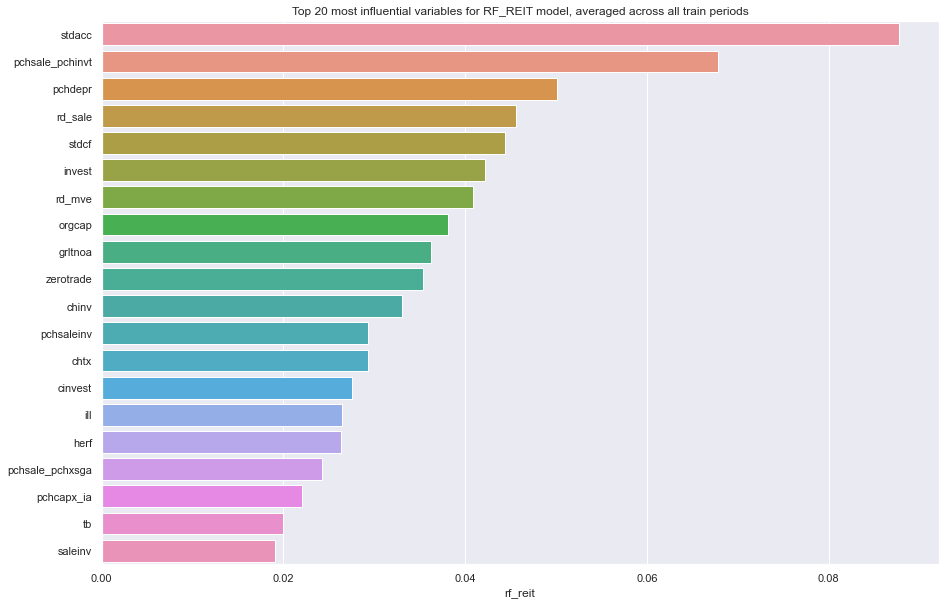

In [339]:
# Plot features of importance
# Plot graph
df_top20 = df_impt.sort_values(by=[model_name], ascending = False).head(20)
plt.figure(figsize=(15,10))
plt.title(f'Top 20 most influential variables for {model_name.upper()} model, averaged across all train periods')
sns.barplot(data = df_top20, x = model_name, y = df_top20.index);


In [340]:
# Merge df_temp to existing df_r2drecrease table

df_r2decrease_reit = pd.merge(
    left = df_r2decrease_reit,
    right = df_impt[model_name],
    how = 'left',
    left_index = True,
    right_index = True    
)

# Rank R2decrease table after including new model results
df_featurerank_reit = df_r2decrease_reit.rank() 
df_featurerank_reit['all_models'] = df_featurerank_reit.sum(axis=1)

# Display tables
display(df_r2decrease_reit)
display(df_featurerank_reit.sort_values('all_models', ascending = False))

# Save dfs to .csv 
df_r2decrease_reit.to_csv('../data/df_r2decrease_reit.csv', index = False)
df_featurerank_reit.to_csv('../data/df_featurerank_reit.csv', index = False)

lr_reit  huber_reit  ridge_reit  lasso_reit  enet_reit  \
absacc           0.000306   -0.001380    0.000189    0.000000   0.000000   
acc              0.001430   -0.000741    0.001779    0.000000   0.000000   
aeavol           0.000650    0.000668    0.005239    0.001173   0.001226   
age              0.000137   -0.000080    0.001680    0.000018   0.000030   
agr              0.000223    0.005201    0.003357    0.000000   0.000010   
baspread         0.007390    0.007871    0.000149    0.000000   0.000000   
beta             0.008894    0.057075    0.000315    0.000000   0.000000   
betasq           0.013997    0.013039    0.002645    0.000000   0.000000   
bm               0.001241    0.000853    0.024032    0.025538   0.026162   
bm_ia            0.002404    0.004776    0.007611    0.004235   0.004285   
cash             0.000161    0.000505    0.003340    0.000873   0.000927   
cashdebt         0.000128   -0.001187    0.000750    0.000000   0.000000   
cashpr           0.001257    0.002444    0.004893    0.001111   0.001181   
cfp              0.006021    0.006040    0.008196    0.013265   0.013306   
cfp_ia           0.001410    0.004166    0.007417    0.015930   0.015591   
chatoia          0.000082   -0.000040   -0.000983   -0.000089  -0.000097   
chcsho           0.000206   -0.000878    0.005366    0.002707   0.002796   
chempia          0.001031    0.003782   -0.000006    0.000000   0.000000   
chinv            0.000245   -0.000393    0.000482    0.000000   0.000000   
chmom            0.052654    0.050540    0.096469    0.142593   0.139152   
chpmia           0.002182    0.002565    0.011188    0.005567   0.005818   
chtx            -0.000017   -0.000019    0.000188    0.000000   0.000000   
cinvest          0.000038    0.000148    0.000281    0.000000   0.000000   
convind          0.000886    0.000794    0.000866    0.000000   0.000000   
currat           0.091179    0.044869   -0.000742    0.000000   0.000000   
depr            -0.000063    0.000391    0.001464    0.000148   0.000158   
divi             0.000153    0.000328    0.000156    0.000000   0.000000   
divo             0.000145    0.000922    0.000460    0.000000   0.000000   
dolvol           0.052843    0.089712    0.018587    0.017184   0.017007   
dy               0.016294    0.015071    0.090116    0.083019   0.084596   
ear              0.000198    0.000341    0.007511    0.004939   0.005175   
egr              0.001280    0.002940    0.004116    0.001198   0.001247   
ep               0.001748    0.010111    0.008772    0.004712   0.004875   
gma              0.003155   -0.001219    0.004361    0.000000   0.000000   
grcapx           0.000474    0.000658   -0.000177    0.000000   0.000000   
grltnoa          0.002414    0.001948    0.004432    0.000000   0.000000   
herf             0.023766    0.022687    0.023490    0.026236   0.026005   
hire             0.000198    0.002251    0.000338    0.000000   0.000000   
idiovol          0.000873   -0.000939    0.012297    0.014589   0.014951   
ill              0.005484    0.010939    0.022225    0.013264   0.013836   
indmom          -0.000049    0.000309    0.000357    0.000269   0.000290   
invest           0.000890    0.000858    0.002343    0.000000   0.000000   
lev             -0.000274   -0.002811   -0.002411    0.000000   0.000000   
lgr              0.000145    0.000304    0.000079    0.000000   0.000000   
maxret           0.025620    0.054758    0.005975    0.000000   0.000000   
mom12m           0.004666    0.002331    0.047325    0.017174   0.020037   
mom1m            0.019050    0.030089    0.134880    0.123642   0.127685   
mom36m           0.004236    0.006796    0.023669    0.021621   0.022049   
mom6m            0.056381    0.030482    0.053236    0.127055   0.120789   
ms               0.000196    0.000743    0.002229    0.000000   0.000000   
mve0             0.200379    0.212738    0.122775    0.137827   0.135776   
mve_ia           0.116817    0.152169    0.033515    0.073484   0.

lr_reit  huber_reit  ridge_reit  lasso_reit  enet_reit  \
mom1m               84.0        84.0        94.0        91.0       92.0   
chmom               87.0        89.0        92.0        94.0       94.0   
mve0                94.0        94.0        93.0        93.0       93.0   
mom6m               89.0        85.0        89.0        92.0       91.0   
retvol              93.0        86.0        90.0        87.0       87.0   
dy                  83.0        82.0        91.0        90.0       90.0   
herf                85.0        83.0        83.0        86.0       85.0   
mom12m              74.0        60.0        88.0        82.0       83.0   
sgr                 79.0        76.0        87.0        88.0       88.0   
ill                 75.0        78.0        82.0        78.0       79.0   
mom36m              72.0        72.0        84.0        84.0       84.0   
rd_sale             73.0        74.0        74.0        77.0       77.0   
chpmia              67.0        62.0        79.0        75.0       75.0   
bm                  54.0        47.0        85.0        85.0       86.0   
saleinv             66.0        55.0        78.0        69.0       69.0   
bm_ia               68.0        69.0        73.0        72.0       72.0   
mve_ia              92.0        93.0        86.0        89.0       89.0   
dolvol              88.0        92.0        81.0        83.0       82.0   
maxret              86.0        90.0        68.0        26.0       25.5   
tang                61.0        54.0        77.0        66.0       67.0   
cfp                 76.0        71.0        75.0        79.0       78.0   
ep                  63.0        77.0        76.0        73.0       73.0   
sp                  59.0        75.0        66.0        76.0       76.0   
cfp_ia              57.0        67.0        71.0        81.0       81.0   
ear                 29.0        33.0        72.0        74.0       74.0   
roavol              65.0        68.0        67.0        68.0       68.0   
pchdepr             43.0        35.0        57.0        67.0       66.0   
idiovol             48.0         7.0        80.0        80.0       80.0   
pchsale_pchinvt     27.0        28.0        51.0        52.0       51.0   
aeavol              46.0        43.0        64.0        64.0       64.0   
std_dolvol          39.0        53.0        63.0        59.0       59.0   
invest              50.0        48.0        46.0        26.0       25.5   
pchgm_pchsale       32.0        20.0        61.0        58.0       58.0   
cashpr              55.0        61.0        62.0        63.0       63.0   
salerec             26.0        26.0        56.0        60.0       60.0   
cash                25.0        39.0        54.0        61.0       61.0   
egr                 56.0        63.0        58.0        65.0       65.0   
zerotrade           82.0        57.0        50.0        53.0       52.0   
turn                77.0        79.0        40.0        62.0       62.0   
rd_mve               8.0        44.0        47.0        50.0       53.0   
grltnoa             69.0        56.0        60.0        26.0       25.5   
roic                47.0         6.0        70.0        70.0       70.0   
stdcf               70.0        81.0         9.0        26.0       25.5   
nincr               37.0        13.0        53.0        49.0       49.0   
roaq                62.0        65.0        69.0        26.0       25.5   
chcsho              33.0         8.0        65.0        71.0       71.0   
stdacc              60.0        64.0        15.0        26.0       25.5   
beta                80.0        91.0        26.0        26.0       25.5   
betasq              81.0        80.0        49.0        26.0       25.5   
agr                 35.0        70.0        55.0        26.0       48.0   
depr                 6.0        34.0        42.0        54.0       54.0   
orgcap              52.0        52.0        22.0        26.0       25.5   
realestate          42.0        38.0      

## ExtraTrees

### REIT

In [364]:
df_results_reit = df_results_reit[:11]

In [365]:
# Create list of configs to test on 
def model_configs():
    # define scope of configs
    n_trees = [100, 200, 300]
    n_max_features = ['sqrt', 0.2, 0.5] # last value means 20% of features are considered at each split
    n_max_depth = [5, 10, 15]
    n_min_samples_leaf = [30, 50, 70]
    # create configs
    configs = []
    for i in n_trees:
        for j in n_max_features:
            for k in n_max_depth:
                for l in n_min_samples_leaf:
                    cfg = [i,j,k,l]
                    configs.append(cfg)
    print('Total configs (n_trees, n_max_features, n_max_depth, n_min_samples_leaf): %d' %len(configs))
    return configs

def model_fit(X_train, y_train, cfg):
    # unpack config
    n_trees, n_max_features, n_max_depth, n_min_samples_leaf = cfg
    model = ExtraTreesRegressor(
        n_estimators = n_trees,
        max_features = n_max_features,
        max_depth = n_max_depth,
        min_samples_leaf = n_min_samples_leaf,
        random_state = 42,
        n_jobs = -1,
        verbose = 0
    )
    model.fit(X_train, y_train)
    return model

In [366]:
# Instantiate list of configurations
cfg_list = model_configs()

Total configs (n_trees, n_max_features, n_max_depth, n_min_samples_leaf): 81


In [367]:
%%time
# Create model name 
model_name = 'et_reit'

# Create new row of test results
df_results_reit = pd.concat(
    [df_results_reit, pd.DataFrame([{'Model Name' : model_name,}])], 
    axis = 0
)

# Run grid search of hyperparameters
scores = grid_search(
    X = X_reit, 
    y = y_reit, 
    start_train = 1990, 
    start_val = 2001, 
    start_test = 2006, 
    cfg_list = cfg_list, 
    df_results = df_results_reit
)

# Print results
print ('Top 8 Configs')
print ('Config, R2_validate, RMSE_validate, R2_train, RMSE_train')
for cfg, r2_validate, rmse_validate, r2_train, rmse_train, in scores[:8]:
    print (f'{cfg}, {r2_validate:.2f}, {rmse_validate:.2f}, {r2_train:.2f}, {rmse_train:.2f}')

[100, 'sqrt', 5, 30], 1.34, 10.19, 1.14, 10.39
[100, 'sqrt', 5, 50], 1.40, 10.19, 0.98, 10.40
[100, 'sqrt', 5, 70], 1.42, 10.18, 0.87, 10.40
[100, 'sqrt', 10, 30], 1.37, 10.19, 2.62, 10.31
[100, 'sqrt', 10, 50], 1.44, 10.18, 1.89, 10.35
[100, 'sqrt', 10, 70], 1.45, 10.18, 1.63, 10.36
[100, 'sqrt', 15, 30], 1.31, 10.19, 3.82, 10.24
[100, 'sqrt', 15, 50], 1.41, 10.19, 2.72, 10.30
[100, 'sqrt', 15, 70], 1.44, 10.18, 2.18, 10.33
[100, 0.2, 5, 30], 1.40, 10.19, 1.63, 10.36
[100, 0.2, 5, 50], 1.46, 10.18, 1.38, 10.37
[100, 0.2, 5, 70], 1.46, 10.18, 1.21, 10.38
[100, 0.2, 10, 30], 1.30, 10.19, 3.90, 10.24
[100, 0.2, 10, 50], 1.39, 10.19, 3.09, 10.28
[100, 0.2, 10, 70], 1.57, 10.18, 2.50, 10.31
[100, 0.2, 15, 30], 1.38, 10.19, 5.93, 10.13
[100, 0.2, 15, 50], 1.42, 10.18, 4.40, 10.21
[100, 0.2, 15, 70], 1.52, 10.18, 3.43, 10.27
[100, 0.5, 5, 30], 1.44, 10.18, 2.56, 10.31
[100, 0.5, 5, 50], 1.50, 10.18, 2.11, 10.34
[100, 0.5, 5, 70], 1.46, 10.18, 1.91, 10.35
[100, 0.5, 10, 30], 1.35, 10.19, 6.13

Model Name             Selected Config Train (1990-2000)  \
0        naive_reit                        N.A.      0.00 (10.45)   
0           lr_reit                        N.A.       1.99 (10.3)   
0  fama-french_reit                    bm, mve0       0.36 (10.4)   
0      carhart_reit            bm, mve0, mom12m       0.52 (10.4)   
0        huber_reit               [3.0, 0.0001]      1.58 (10.36)   
0        ridge_reit        [19920.457084538713]      1.19 (10.38)   
0        lasso_reit       [0.07196856730011514]      1.28 (10.38)   
0         enet_reit  [0.9, 0.07880462815669913]      1.28 (10.38)   
0          pcr_reit                          28      0.90 (10.40)   
0          pls_reit                           1      1.03 (10.39)   
0           rf_reit          [300, 0.2, 10, 70]      13.97 (9.69)   
0           et_reit          [200, 0.5, 15, 70]      5.56 (10.15)   

  Validate (2001-2005) Test (2006-2020)  Test (2006)     Test (2007)  \
0         0.00 (10.26)     0.00 (12.13)  0.00 (7.60)    0.00 (11.29)   
0          0.69 (10.2)    -0.03 (12.13)  4.17 (7.44)   -3.50 (11.48)   
0          1.52 (10.2)     0.17 (12.12)  3.84 (7.45)   -4.46 (11.54)   
0          1.68 (10.2)     0.16 (12.12)  4.37 (7.43)   -3.46 (11.48)   
0         0.90 (10.21)    -0.07 (12.13)  3.50 (7.47)   -2.04 (11.40)   
0         1.82 (10.16)     0.18 (12.12)  4.43 (7.43)   -3.65 (11.49)   
0         1.93 (10.16)     0.23 (12.11)  4.37 (7.43)   -3.54 (11.49)   
0         1.93 (10.16)     0.23 (12.11)  4.37 (7.43)   -3.54 (11.49)   
0         1.89 (10.16)     0.09 (12.12)  3.79 (7.46)   -3.68 (11.49)   
0         1.71 (10.17)    -0.06 (12.13)  4.19 (7.44)   -4.17 (11.52)   
0         2.31 (10.14)    -0.75 (12.17)  4.65 (7.42)  -11.55 (11.92)   
0         1.63 (10.17)              NaN          NaN             NaN   

     Test (2008)    Test (2009)   Test (2010)    Test (2011)  Test (2012)  \
0   0.00 (19.81)   0.00 (25.18)  0.00 (12.47)   0.00 (10.08)  0.00 (9.46)   
0  -0.55 (19.87)  -0.02 (25.19)  1.79 (12.36)  -2.03 (10.19)  3.18 (9.31)   
0  -1.84 (19.99)   0.64 (25.10)  2.03 (12.34)  -0.68 (10.12)  3.28 (9.31)   
0  -1.33 (19.94)   0.15 (25.16)  2.04 (12.34)  -0.71 (10.12)  2.65 (9.34)   
0  -0.24 (19.84)  -0.24 (25.21)  0.25 (12.45)  -0.65 (10.12)  1.09 (9.41)   
0  -1.12 (19.92)   0.16 (25.16)  1.98 (12.34)  -1.29 (10.15)  3.80 (9.28)   
0  -1.09 (19.92)   0.26 (25.15)  2.08 (12.34)  -1.03 (10.14)  3.42 (9.30)   
0  -1.09 (19.92)   0.26 (25.15)  2.08 (12.34)  -1.03 (10.14)  3.43 (9.30)   
0  -1.31 (19.94)   0.20 (25.16)  2.13 (12.33)  -1.07 (10.14)  3.27 (9.31)   
0  -1.10 (19.92)  -0.15 (25.20)  1.75 (12.36)  -1.84 (10.18)  3.68 (9.29)   
0   0.56 (19.76)   0.03 (25.18)  3.62 (12.24)  -2.18 (10.19)  1.80 (9.38)   
0            NaN            NaN           NaN            NaN          NaN   

   Test (2013)  Test (2014)   Test (2015)  Test (2016)   Test (2017)  \
0  0.00 (9.44)  0.00 (7.04)   0.00 (7.47)  0.00 (9.09)   0.00 (7.08)   
0  1.38 (9.37)  1.59 (6.99)  -2.95 (7.58)  2.22 (8.98)  -1.00 (7.12)   
0  1.25 (9.38)  3.36 (6.92)  -1.87 (7.54)  2.06 (8.99)   1.06 (7.05)   
0  1.65 (9.36)  3.06 (6.93)  -1.88 (7.54)  1.71 (9.01)   0.85 (7.05)   
0  0.70 (9.40)  2.18 (6.96)  -2.61 (7.57)  1.41 (9.02)  -0.62 (7.11)   
0  1.91 (9.35)  2.74 (6.94)  -1.82 (7.54)  2.31 (8.98)   0.49 (7.07)   
0  1.89 (9.35)  3.51 (6.92)  -1.64 (7.54)  1.70 (9.01)   0.50 (7.07)   
0  1.90 (9.35)  3.52 (6.92)  -1.63 (7.54)  1.71 (9.01)   0.52 (7.07)   
0  1.65 (9.36)  3.16 (6.93)  -2.25 (7.56)  2.12 (8.99)   0.29 (7.07)   
0  1.99 (9.34)  2.32 (6.96)  -2.06 (7.55)  2.14 (8.99)   0.18 (7.08)   
0  1.17 (9.38)  2.26 (6.96)  -2.85 (7.58)  0.57 (9.06)  -0.40 (7.10)   
0          NaN          NaN           NaN          NaN           NaN   

    Test (2018)   Test (2019)    Test (2020) Remarks  
0   0.00 (8.03)   0.00 (8.37)   0.00 (18.42)     NaN  
0  -5.43 (8.25)   3.70 (8.21)  -0.21 (18.43)     NaN  
0  -2.57 (8.14)   3.50 (8.22)  -0.05 (18.42)     NaN  
0  -2.06 (8.12)

Top 8 Configs
Config, R2_validate, RMSE_validate, R2_train, RMSE_train
[200, 0.5, 15, 70], 1.63, 10.17, 5.56, 10.15
[300, 0.5, 15, 70], 1.62, 10.17, 5.61, 10.15
[200, 0.5, 10, 70], 1.59, 10.18, 3.92, 10.24
[100, 0.5, 10, 70], 1.59, 10.18, 4.00, 10.24
[300, 0.5, 10, 70], 1.58, 10.18, 3.96, 10.24
[100, 0.2, 10, 70], 1.57, 10.18, 2.50, 10.31
[100, 0.5, 10, 50], 1.57, 10.18, 4.80, 10.19
[200, 0.5, 5, 70], 1.53, 10.18, 1.89, 10.35
CPU times: user 5min 4s, sys: 5.37 s, total: 5min 10s
Wall time: 1min 23s


Top 8 Configs

Config, R2_validate, RMSE_validate, R2_train, RMSE_train

[200, 0.5, 15, 70], 1.63, 10.17, 5.56, 10.15

[300, 0.5, 15, 70], 1.62, 10.17, 5.61, 10.15

[200, 0.5, 10, 70], 1.59, 10.18, 3.92, 10.24

[100, 0.5, 10, 70], 1.59, 10.18, 4.00, 10.24

[300, 0.5, 10, 70], 1.58, 10.18, 3.96, 10.24

[100, 0.2, 10, 70], 1.57, 10.18, 2.50, 10.31

[100, 0.5, 10, 50], 1.57, 10.18, 4.80, 10.19

[200, 0.5, 5, 70], 1.53, 10.18, 1.89, 10.35

CPU times: user 5min 4s, sys: 5.37 s, total: 5min 10s

Wall time: 1min 23s

In [368]:
%%time
# Chosen configuration for model
selected_cfg = scores[0][0]

# Out-of-sample testing, no need to do validation after hyperparameters are selected
score = walk_forward(
    selected_cfg, 
    X = X_reit, 
    y = y_reit, 
    start_train = 1990, 
    start_val = 2006, # Set equal to start of test year, so that train year ends just before test year
    start_test = 2006,
    final_year_of_testing = 2020, 
    df_results = df_results_reit
)

print(f'On best performing config: {scores[0][0]}')

# Save df_results to .csv 
df_results_reit.to_csv('../data/df_results_reit.csv', index = False)

Test year 2006 done, R2 score is 4.20
Test year 2006 done, RMSE score is 7.44
Test year 2007 done, R2 score is -4.29
Test year 2007 done, RMSE score is 11.53
Test year 2008 done, R2 score is -0.31
Test year 2008 done, RMSE score is 19.84
Test year 2009 done, R2 score is -0.90
Test year 2009 done, RMSE score is 25.30
Test year 2010 done, R2 score is 2.72
Test year 2010 done, RMSE score is 12.30
Test year 2011 done, R2 score is -1.07
Test year 2011 done, RMSE score is 10.14
Test year 2012 done, R2 score is 3.04
Test year 2012 done, RMSE score is 9.32
Test year 2013 done, R2 score is 1.71
Test year 2013 done, RMSE score is 9.36
Test year 2014 done, R2 score is 3.56
Test year 2014 done, RMSE score is 6.91
Test year 2015 done, R2 score is -2.28
Test year 2015 done, RMSE score is 7.56
Test year 2016 done, R2 score is 1.87
Test year 2016 done, RMSE score is 9.00
Test year 2017 done, R2 score is -0.46
Test year 2017 done, RMSE score is 7.10
Test year 2018 done, R2 score is -3.92
Test year 2018

Model Name             Selected Config Train (1990-2000)  \
0        naive_reit                        N.A.      0.00 (10.45)   
0           lr_reit                        N.A.       1.99 (10.3)   
0  fama-french_reit                    bm, mve0       0.36 (10.4)   
0      carhart_reit            bm, mve0, mom12m       0.52 (10.4)   
0        huber_reit               [3.0, 0.0001]      1.58 (10.36)   
0        ridge_reit        [19920.457084538713]      1.19 (10.38)   
0        lasso_reit       [0.07196856730011514]      1.28 (10.38)   
0         enet_reit  [0.9, 0.07880462815669913]      1.28 (10.38)   
0          pcr_reit                          28      0.90 (10.40)   
0          pls_reit                           1      1.03 (10.39)   
0           rf_reit          [300, 0.2, 10, 70]      13.97 (9.69)   
0           et_reit          [200, 0.5, 15, 70]      5.56 (10.15)   

  Validate (2001-2005) Test (2006-2020)  Test (2006)     Test (2007)  \
0         0.00 (10.26)     0.00 (12.13)  0.00 (7.60)    0.00 (11.29)   
0          0.69 (10.2)    -0.03 (12.13)  4.17 (7.44)   -3.50 (11.48)   
0          1.52 (10.2)     0.17 (12.12)  3.84 (7.45)   -4.46 (11.54)   
0          1.68 (10.2)     0.16 (12.12)  4.37 (7.43)   -3.46 (11.48)   
0         0.90 (10.21)    -0.07 (12.13)  3.50 (7.47)   -2.04 (11.40)   
0         1.82 (10.16)     0.18 (12.12)  4.43 (7.43)   -3.65 (11.49)   
0         1.93 (10.16)     0.23 (12.11)  4.37 (7.43)   -3.54 (11.49)   
0         1.93 (10.16)     0.23 (12.11)  4.37 (7.43)   -3.54 (11.49)   
0         1.89 (10.16)     0.09 (12.12)  3.79 (7.46)   -3.68 (11.49)   
0         1.71 (10.17)    -0.06 (12.13)  4.19 (7.44)   -4.17 (11.52)   
0         2.31 (10.14)    -0.75 (12.17)  4.65 (7.42)  -11.55 (11.92)   
0         1.63 (10.17)    -0.04 (12.13)  4.20 (7.44)   -4.29 (11.53)   

     Test (2008)    Test (2009)   Test (2010)    Test (2011)  Test (2012)  \
0   0.00 (19.81)   0.00 (25.18)  0.00 (12.47)   0.00 (10.08)  0.00 (9.46)   
0  -0.55 (19.87)  -0.02 (25.19)  1.79 (12.36)  -2.03 (10.19)  3.18 (9.31)   
0  -1.84 (19.99)   0.64 (25.10)  2.03 (12.34)  -0.68 (10.12)  3.28 (9.31)   
0  -1.33 (19.94)   0.15 (25.16)  2.04 (12.34)  -0.71 (10.12)  2.65 (9.34)   
0  -0.24 (19.84)  -0.24 (25.21)  0.25 (12.45)  -0.65 (10.12)  1.09 (9.41)   
0  -1.12 (19.92)   0.16 (25.16)  1.98 (12.34)  -1.29 (10.15)  3.80 (9.28)   
0  -1.09 (19.92)   0.26 (25.15)  2.08 (12.34)  -1.03 (10.14)  3.42 (9.30)   
0  -1.09 (19.92)   0.26 (25.15)  2.08 (12.34)  -1.03 (10.14)  3.43 (9.30)   
0  -1.31 (19.94)   0.20 (25.16)  2.13 (12.33)  -1.07 (10.14)  3.27 (9.31)   
0  -1.10 (19.92)  -0.15 (25.20)  1.75 (12.36)  -1.84 (10.18)  3.68 (9.29)   
0   0.56 (19.76)   0.03 (25.18)  3.62 (12.24)  -2.18 (10.19)  1.80 (9.38)   
0  -0.31 (19.84)  -0.90 (25.30)  2.72 (12.30)  -1.07 (10.14)  3.04 (9.32)   

   Test (2013)  Test (2014)   Test (2015)  Test (2016)   Test (2017)  \
0  0.00 (9.44)  0.00 (7.04)   0.00 (7.47)  0.00 (9.09)   0.00 (7.08)   
0  1.38 (9.37)  1.59 (6.99)  -2.95 (7.58)  2.22 (8.98)  -1.00 (7.12)   
0  1.25 (9.38)  3.36 (6.92)  -1.87 (7.54)  2.06 (8.99)   1.06 (7.05)   
0  1.65 (9.36)  3.06 (6.93)  -1.88 (7.54)  1.71 (9.01)   0.85 (7.05)   
0  0.70 (9.40)  2.18 (6.96)  -2.61 (7.57)  1.41 (9.02)  -0.62 (7.11)   
0  1.91 (9.35)  2.74 (6.94)  -1.82 (7.54)  2.31 (8.98)   0.49 (7.07)   
0  1.89 (9.35)  3.51 (6.92)  -1.64 (7.54)  1.70 (9.01)   0.50 (7.07)   
0  1.90 (9.35)  3.52 (6.92)  -1.63 (7.54)  1.71 (9.01)   0.52 (7.07)   
0  1.65 (9.36)  3.16 (6.93)  -2.25 (7.56)  2.12 (8.99)   0.29 (7.07)   
0  1.99 (9.34)  2.32 (6.96)  -2.06 (7.55)  2.14 (8.99)   0.18 (7.08)   
0  1.17 (9.38)  2.26 (6.96)  -2.85 (7.58)  0.57 (9.06)  -0.40 (7.10)   
0  1.71 (9.36)  3.56 (6.91)  -2.28 (7.56)  1.87 (9.00)  -0.46 (7.10)   

    Test (2018)   Test (2019)    Test (2020) Remarks  
0   0.00 (8.03)   0.00 (8.37)   0.00 (18.42)     NaN  
0  -5.43 (8.25)   3.70 (8.21)  -0.21 (18.43)     NaN  
0  -2.57 (8.14)   3.50 (8.22)  -0.05 (18.42)     NaN  
0  -2.06 (8.12)


R2 for entire pooled test set, from 2006 to 2020, is -0.04.
RMSE for entire pooled test set, from 2006 to 2020, is 12.13.

On best performing config: [200, 0.5, 15, 70]
CPU times: user 6min 57s, sys: 1.72 s, total: 6min 58s
Wall time: 1min 20s


R2 for entire pooled test set, from 2006 to 2020, is -0.04.

RMSE for entire pooled test set, from 2006 to 2020, is 12.13.

On best performing config: [200, 0.5, 15, 70]

CPU times: user 6min 57s, sys: 1.72 s, total: 6min 58s

Wall time: 1min 20s

### Sample 1

In [369]:
df_results_sample1 = df_results_sample1[:11]

In [370]:
%%time
# Create model name 
model_name = 'et_sample1'

# Create new row of test results
df_results_sample1 = pd.concat(
    [df_results_sample1, pd.DataFrame([{'Model Name' : model_name,}])], 
    axis = 0
)

# Run grid search of hyperparameters
scores = grid_search(
    X = X_1, 
    y = y_1, 
    start_train = 1990, 
    start_val = 2001, 
    start_test = 2006, 
    cfg_list = cfg_list, 
    df_results = df_results_sample1
)

# Print results
print ('Top 8 Configs')
print ('Config, R2_validate, RMSE_validate, R2_train, RMSE_train')
for cfg, r2_validate, rmse_validate, r2_train, rmse_train, in scores[:8]:
    print (f'{cfg}, {r2_validate:.2f}, {rmse_validate:.2f}, {r2_train:.2f}, {rmse_train:.2f}')

[100, 'sqrt', 5, 30], 0.46, 18.96, 1.12, 20.76
[100, 'sqrt', 5, 50], 0.45, 18.96, 0.95, 20.78
[100, 'sqrt', 5, 70], 0.46, 18.96, 0.83, 20.79
[100, 'sqrt', 10, 30], 0.46, 18.96, 2.49, 20.62
[100, 'sqrt', 10, 50], 0.54, 18.96, 1.94, 20.67
[100, 'sqrt', 10, 70], 0.57, 18.95, 1.57, 20.71
[100, 'sqrt', 15, 30], 0.61, 18.95, 3.70, 20.49
[100, 'sqrt', 15, 50], 0.58, 18.95, 2.64, 20.60
[100, 'sqrt', 15, 70], 0.60, 18.95, 2.03, 20.66
[100, 0.2, 5, 30], 0.55, 18.95, 1.55, 20.72
[100, 0.2, 5, 50], 0.52, 18.96, 1.32, 20.74
[100, 0.2, 5, 70], 0.49, 18.96, 1.14, 20.76
[100, 0.2, 10, 30], 0.52, 18.96, 3.87, 20.47
[100, 0.2, 10, 50], 0.54, 18.96, 2.78, 20.59
[100, 0.2, 10, 70], 0.53, 18.96, 2.28, 20.64
[100, 0.2, 15, 30], 0.61, 18.95, 5.75, 20.27
[100, 0.2, 15, 50], 0.57, 18.95, 3.92, 20.46
[100, 0.2, 15, 70], 0.66, 18.94, 3.01, 20.56
[100, 0.5, 5, 30], 0.53, 18.96, 2.54, 20.61
[100, 0.5, 5, 50], 0.55, 18.95, 2.06, 20.66
[100, 0.5, 5, 70], 0.55, 18.95, 1.77, 20.69
[100, 0.5, 10, 30], 0.75, 18.94, 5.75

Model Name        Selected Config Train (1990-2000)  \
0        naive_sample1                   N.A.      0.00 (20.88)   
0           lr_sample1                   N.A.       1.66 (20.7)   
0  fama-french_sample1               bm, mve0       0.21 (20.9)   
0      carhart_sample1       bm, mve0, mom12m       0.25 (20.9)   
0        huber_sample1            [9, 0.0001]      1.57 (20.71)   
0        ridge_sample1    [50084.07989848212]      0.86 (20.79)   
0        lasso_sample1  [0.47148663634573895]      0.51 (20.82)   
0         enet_sample1             [0.3, 1.0]      0.65 (20.81)   
0          pcr_sample1                     21      0.70 (20.80)   
0          pls_sample1                      1      1.06 (20.77)   
0           rf_sample1     [200, 0.5, 15, 50]     13.73 (19.39)   
0           et_sample1     [100, 0.5, 15, 30]      8.60 (19.96)   

  Validate (2001-2005) Test (2006-2020)    Test (2006)    Test (2007)  \
0         0.00 (19.01)     0.00 (15.77)   0.00 (14.72)   0.00 (12.19)   
0         -0.45 (19.0)    -0.49 (15.80)  -0.80 (14.78)  -4.28 (12.45)   
0          0.32 (19.0)     0.13 (15.76)   0.74 (14.66)  -1.74 (12.30)   
0          0.31 (19.0)     0.11 (15.76)   0.62 (14.67)  -1.56 (12.29)   
0        -0.21 (19.03)    -0.29 (15.79)  -0.52 (14.76)  -2.89 (12.37)   
0         0.53 (18.96)     0.04 (15.76)   0.48 (14.68)  -2.36 (12.34)   
0         0.44 (18.97)     0.11 (15.76)   0.91 (14.65)  -2.18 (12.33)   
0         0.46 (18.96)     0.11 (15.76)   0.81 (14.66)  -2.17 (12.33)   
0         0.51 (18.96)    -0.18 (15.78)  -0.61 (14.76)  -2.45 (12.34)   
0         0.11 (19.00)    -0.40 (15.80)  -0.56 (14.76)  -3.95 (12.43)   
0         1.05 (18.91)    -0.36 (15.79)  -0.63 (14.76)  -2.54 (12.35)   
0         1.01 (18.91)              NaN            NaN            NaN   

     Test (2008)    Test (2009)    Test (2010)    Test (2011)   Test (2012)  \
0   0.00 (20.06)   0.00 (24.51)   0.00 (15.28)   0.00 (13.93)  0.00 (12.77)   
0  -2.82 (20.35)   0.66 (24.43)  -0.84 (15.34)  -1.28 (14.02)  0.52 (12.74)   
0  -2.49 (20.31)   0.77 (24.41)   1.13 (15.19)  -0.88 (13.99)  0.74 (12.72)   
0  -2.28 (20.29)   0.56 (24.44)   0.90 (15.21)  -0.76 (13.99)  0.76 (12.72)   
0  -2.15 (20.28)   0.58 (24.44)  -0.76 (15.34)  -0.67 (13.98)  0.54 (12.73)   
0  -2.61 (20.32)   0.86 (24.40)   0.60 (15.23)  -0.88 (13.99)  0.87 (12.71)   
0  -2.59 (20.32)   0.85 (24.40)   1.12 (15.19)  -0.96 (14.00)  0.80 (12.72)   
0  -2.61 (20.32)   0.80 (24.41)   1.16 (15.19)  -0.98 (14.00)  0.82 (12.72)   
0  -2.98 (20.36)   0.79 (24.41)   0.51 (15.24)  -0.95 (14.00)  0.67 (12.73)   
0  -3.19 (20.38)   0.75 (24.42)  -0.02 (15.28)  -1.78 (14.06)  0.14 (12.76)   
0  -3.11 (20.37)  -0.01 (24.51)   0.14 (15.27)  -0.81 (13.99)  0.79 (12.72)   
0            NaN            NaN            NaN            NaN           NaN   

     Test (2013)    Test (2014)    Test (2015)    Test (2016)    Test (2017)  \
0   0.00 (12.20)   0.00 (11.34)   0.00 (14.08)   0.00 (16.07)   0.00 (12.67)   
0   2.52 (12.05)  -1.37 (11.42)  -1.45 (14.18)  -0.12 (16.08)  -0.16 (12.68)   
0   2.08 (12.07)   0.01 (11.34)  -0.61 (14.12)   0.67 (16.01)   0.91 (12.61)   
0   2.29 (12.06)   0.03 (11.34)  -0.50 (14.11)   0.57 (16.02)   0.70 (12.62)   
0   2.45 (12.05)  -0.60 (11.37)  -1.17 (14.16)  -0.11 (16.07)   0.03 (12.67)   
0   2.81 (12.03)  -0.26 (11.35)  -0.64 (14.12)   0.49 (16.03)   0.37 (12.64)   
0   2.04 (12.07)  -0.15 (11.35)  -0.62 (14.12)   0.72 (16.01)   0.87 (12.61)   
0   2.28 (12.06)  -0.26 (11.35)  -0.56 (14.12)   0.68 (16.01)   0.86 (12.61)   
0   2.67 (12.04)  -0.87 (11.39)  -0.56 (14.12)   0.27 (16.04)   0.05 (12.66)   
0   3.10 (12.01)  -1.00 (11.40)  -0.96 (14.15)   0.41 (16.03)  -0.19 (12.68)   
0  -0.16 (12.21)   0.09 (11.33)  -0.58 (14.12)   1.63 (15.93)   0.99 (12.61)   
0            NaN            NaN            NaN            NaN            NaN   

     Test (2018)   Test (2019)    Test (2020) Remarks  
0   0.00 (13.97)  0.00 (15.38)   0.00 (22.31)     NaN  
0  -2.02 

Top 8 Configs
Config, R2_validate, RMSE_validate, R2_train, RMSE_train
[100, 0.5, 15, 30], 1.01, 18.91, 8.60, 19.96
[200, 0.5, 15, 30], 0.85, 18.93, 8.61, 19.96
[200, 0.5, 15, 50], 0.82, 18.93, 6.16, 20.22
[200, 0.5, 15, 70], 0.82, 18.93, 4.86, 20.36
[100, 0.5, 15, 70], 0.80, 18.93, 4.96, 20.35
[300, 0.5, 15, 50], 0.80, 18.93, 6.11, 20.23
[300, 0.5, 15, 70], 0.80, 18.93, 4.83, 20.37
[300, 0.5, 15, 30], 0.79, 18.93, 8.57, 19.96
CPU times: user 5min 16s, sys: 5.23 s, total: 5min 21s
Wall time: 1min 21s


Top 8 Configs

Config, R2_validate, RMSE_validate, R2_train, RMSE_train

[100, 0.5, 15, 30], 1.01, 18.91, 8.60, 19.96

[200, 0.5, 15, 30], 0.85, 18.93, 8.61, 19.96

[200, 0.5, 15, 50], 0.82, 18.93, 6.16, 20.22

[200, 0.5, 15, 70], 0.82, 18.93, 4.86, 20.36

[100, 0.5, 15, 70], 0.80, 18.93, 4.96, 20.35

[300, 0.5, 15, 50], 0.80, 18.93, 6.11, 20.23

[300, 0.5, 15, 70], 0.80, 18.93, 4.83, 20.37

[300, 0.5, 15, 30], 0.79, 18.93, 8.57, 19.96

CPU times: user 5min 16s, sys: 5.23 s, total: 5min 21s

Wall time: 1min 21s

In [371]:
%%time
# Chosen configuration for model
selected_cfg = scores[0][0]

# Out-of-sample testing, no need to do validation after hyperparameters are selected
score = walk_forward(
    selected_cfg, 
    X = X_1, 
    y = y_1, 
    start_train = 1990, 
    start_val = 2006, # Set equal to start of test year, so that train year ends just before test year
    start_test = 2006,
    final_year_of_testing = 2020, 
    df_results = df_results_sample1
)

print(f'On best performing config: {scores[0][0]}')

# Save df_results to .csv 
df_results_sample1.to_csv('../data/df_results_sample1.csv', index = False)

Test year 2006 done, R2 score is 0.28
Test year 2006 done, RMSE score is 14.70
Test year 2007 done, R2 score is -2.18
Test year 2007 done, RMSE score is 12.33
Test year 2008 done, R2 score is -2.26
Test year 2008 done, RMSE score is 20.29
Test year 2009 done, R2 score is 1.09
Test year 2009 done, RMSE score is 24.37
Test year 2010 done, R2 score is 0.69
Test year 2010 done, RMSE score is 15.23
Test year 2011 done, R2 score is 1.07
Test year 2011 done, RMSE score is 13.86
Test year 2012 done, R2 score is 1.31
Test year 2012 done, RMSE score is 12.69
Test year 2013 done, R2 score is 2.08
Test year 2013 done, RMSE score is 12.07
Test year 2014 done, R2 score is 0.44
Test year 2014 done, RMSE score is 11.32
Test year 2015 done, R2 score is -0.42
Test year 2015 done, RMSE score is 14.11
Test year 2016 done, R2 score is 0.92
Test year 2016 done, RMSE score is 15.99
Test year 2017 done, R2 score is 0.03
Test year 2017 done, RMSE score is 12.67
Test year 2018 done, R2 score is -1.76
Test year 

Model Name        Selected Config Train (1990-2000)  \
0        naive_sample1                   N.A.      0.00 (20.88)   
0           lr_sample1                   N.A.       1.66 (20.7)   
0  fama-french_sample1               bm, mve0       0.21 (20.9)   
0      carhart_sample1       bm, mve0, mom12m       0.25 (20.9)   
0        huber_sample1            [9, 0.0001]      1.57 (20.71)   
0        ridge_sample1    [50084.07989848212]      0.86 (20.79)   
0        lasso_sample1  [0.47148663634573895]      0.51 (20.82)   
0         enet_sample1             [0.3, 1.0]      0.65 (20.81)   
0          pcr_sample1                     21      0.70 (20.80)   
0          pls_sample1                      1      1.06 (20.77)   
0           rf_sample1     [200, 0.5, 15, 50]     13.73 (19.39)   
0           et_sample1     [100, 0.5, 15, 30]      8.60 (19.96)   

  Validate (2001-2005) Test (2006-2020)    Test (2006)    Test (2007)  \
0         0.00 (19.01)     0.00 (15.77)   0.00 (14.72)   0.00 (12.19)   
0         -0.45 (19.0)    -0.49 (15.80)  -0.80 (14.78)  -4.28 (12.45)   
0          0.32 (19.0)     0.13 (15.76)   0.74 (14.66)  -1.74 (12.30)   
0          0.31 (19.0)     0.11 (15.76)   0.62 (14.67)  -1.56 (12.29)   
0        -0.21 (19.03)    -0.29 (15.79)  -0.52 (14.76)  -2.89 (12.37)   
0         0.53 (18.96)     0.04 (15.76)   0.48 (14.68)  -2.36 (12.34)   
0         0.44 (18.97)     0.11 (15.76)   0.91 (14.65)  -2.18 (12.33)   
0         0.46 (18.96)     0.11 (15.76)   0.81 (14.66)  -2.17 (12.33)   
0         0.51 (18.96)    -0.18 (15.78)  -0.61 (14.76)  -2.45 (12.34)   
0         0.11 (19.00)    -0.40 (15.80)  -0.56 (14.76)  -3.95 (12.43)   
0         1.05 (18.91)    -0.36 (15.79)  -0.63 (14.76)  -2.54 (12.35)   
0         1.01 (18.91)     0.18 (15.75)   0.28 (14.70)  -2.18 (12.33)   

     Test (2008)    Test (2009)    Test (2010)    Test (2011)   Test (2012)  \
0   0.00 (20.06)   0.00 (24.51)   0.00 (15.28)   0.00 (13.93)  0.00 (12.77)   
0  -2.82 (20.35)   0.66 (24.43)  -0.84 (15.34)  -1.28 (14.02)  0.52 (12.74)   
0  -2.49 (20.31)   0.77 (24.41)   1.13 (15.19)  -0.88 (13.99)  0.74 (12.72)   
0  -2.28 (20.29)   0.56 (24.44)   0.90 (15.21)  -0.76 (13.99)  0.76 (12.72)   
0  -2.15 (20.28)   0.58 (24.44)  -0.76 (15.34)  -0.67 (13.98)  0.54 (12.73)   
0  -2.61 (20.32)   0.86 (24.40)   0.60 (15.23)  -0.88 (13.99)  0.87 (12.71)   
0  -2.59 (20.32)   0.85 (24.40)   1.12 (15.19)  -0.96 (14.00)  0.80 (12.72)   
0  -2.61 (20.32)   0.80 (24.41)   1.16 (15.19)  -0.98 (14.00)  0.82 (12.72)   
0  -2.98 (20.36)   0.79 (24.41)   0.51 (15.24)  -0.95 (14.00)  0.67 (12.73)   
0  -3.19 (20.38)   0.75 (24.42)  -0.02 (15.28)  -1.78 (14.06)  0.14 (12.76)   
0  -3.11 (20.37)  -0.01 (24.51)   0.14 (15.27)  -0.81 (13.99)  0.79 (12.72)   
0  -2.26 (20.29)   1.09 (24.37)   0.69 (15.23)   1.07 (13.86)  1.31 (12.69)   

     Test (2013)    Test (2014)    Test (2015)    Test (2016)    Test (2017)  \
0   0.00 (12.20)   0.00 (11.34)   0.00 (14.08)   0.00 (16.07)   0.00 (12.67)   
0   2.52 (12.05)  -1.37 (11.42)  -1.45 (14.18)  -0.12 (16.08)  -0.16 (12.68)   
0   2.08 (12.07)   0.01 (11.34)  -0.61 (14.12)   0.67 (16.01)   0.91 (12.61)   
0   2.29 (12.06)   0.03 (11.34)  -0.50 (14.11)   0.57 (16.02)   0.70 (12.62)   
0   2.45 (12.05)  -0.60 (11.37)  -1.17 (14.16)  -0.11 (16.07)   0.03 (12.67)   
0   2.81 (12.03)  -0.26 (11.35)  -0.64 (14.12)   0.49 (16.03)   0.37 (12.64)   
0   2.04 (12.07)  -0.15 (11.35)  -0.62 (14.12)   0.72 (16.01)   0.87 (12.61)   
0   2.28 (12.06)  -0.26 (11.35)  -0.56 (14.12)   0.68 (16.01)   0.86 (12.61)   
0   2.67 (12.04)  -0.87 (11.39)  -0.56 (14.12)   0.27 (16.04)   0.05 (12.66)   
0   3.10 (12.01)  -1.00 (11.40)  -0.96 (14.15)   0.41 (16.03)  -0.19 (12.68)   
0  -0.16 (12.21)   0.09 (11.33)  -0.58 (14.12)   1.63 (15.93)   0.99 (12.61)   
0   2.08 (12.07)   0.44 (11.32)  -0.42 (14.11)   0.92 (15.99)   0.03 (12.67)   

     Test (2018)   Test (2019)    Test (2020) Remarks  
0   0.00 (13.97)  0.00 (15.38)   0.00 (22.31)     NaN  
0  -2.02 


R2 for entire pooled test set, from 2006 to 2020, is 0.18.
RMSE for entire pooled test set, from 2006 to 2020, is 15.75.

On best performing config: [100, 0.5, 15, 30]
CPU times: user 3min 53s, sys: 1.03 s, total: 3min 54s
Wall time: 46.1 s


R2 for entire pooled test set, from 2006 to 2020, is 0.18.

RMSE for entire pooled test set, from 2006 to 2020, is 15.75.

On best performing config: [100, 0.5, 15, 30]

CPU times: user 3min 53s, sys: 1.03 s, total: 3min 54s

Wall time: 46.1 s

### Sample 2

In [372]:
df_results_sample2 = df_results_sample2[:11]

In [373]:
%%time
# Create model name 
model_name = 'et_sample2'

# Create new row of test results
df_results_sample2 = pd.concat(
    [df_results_sample2, pd.DataFrame([{'Model Name' : model_name,}])], 
    axis = 0
)

# Run grid search of hyperparameters
scores = grid_search(
    X = X_2, 
    y = y_2, 
    start_train = 1990, 
    start_val = 2001, 
    start_test = 2006, 
    cfg_list = cfg_list, 
    df_results = df_results_sample2
)

# Print results
print ('Top 8 Configs')
print ('Config, R2_validate, RMSE_validate, R2_train, RMSE_train')
for cfg, r2_validate, rmse_validate, r2_train, rmse_train, in scores[:8]:
    print (f'{cfg}, {r2_validate:.2f}, {rmse_validate:.2f}, {r2_train:.2f}, {rmse_train:.2f}')

[100, 'sqrt', 5, 30], 1.59, 12.19, 1.80, 13.87
[100, 'sqrt', 5, 50], 1.49, 12.19, 1.50, 13.89
[100, 'sqrt', 5, 70], 1.51, 12.19, 1.38, 13.90
[100, 'sqrt', 10, 30], 1.54, 12.19, 3.14, 13.78
[100, 'sqrt', 10, 50], 1.52, 12.19, 2.35, 13.84
[100, 'sqrt', 10, 70], 1.52, 12.19, 2.05, 13.86
[100, 'sqrt', 15, 30], 1.44, 12.20, 4.34, 13.69
[100, 'sqrt', 15, 50], 1.50, 12.19, 3.02, 13.79
[100, 'sqrt', 15, 70], 1.56, 12.19, 2.49, 13.82
[100, 0.2, 5, 30], 1.55, 12.19, 2.28, 13.84
[100, 0.2, 5, 50], 1.57, 12.19, 1.86, 13.87
[100, 0.2, 5, 70], 1.57, 12.19, 1.67, 13.88
[100, 0.2, 10, 30], 1.47, 12.20, 4.01, 13.72
[100, 0.2, 10, 50], 1.51, 12.19, 3.04, 13.79
[100, 0.2, 10, 70], 1.56, 12.19, 2.60, 13.82
[100, 0.2, 15, 30], 1.50, 12.19, 5.60, 13.60
[100, 0.2, 15, 50], 1.58, 12.19, 4.13, 13.71
[100, 0.2, 15, 70], 1.60, 12.19, 3.37, 13.76
[100, 0.5, 5, 30], 1.65, 12.19, 2.67, 13.81
[100, 0.5, 5, 50], 1.60, 12.19, 2.28, 13.84
[100, 0.5, 5, 70], 1.72, 12.18, 2.11, 13.85
[100, 0.5, 10, 30], 1.62, 12.19, 4.94

Model Name            Selected Config Train (1990-2000)  \
0        naive_sample2                       N.A.      0.00 (14.00)   
0           lr_sample2                       N.A.       2.18 (13.8)   
0  fama-french_sample2                   bm, mve0       0.68 (14.0)   
0      carhart_sample2           bm, mve0, mom12m       0.68 (14.0)   
0        huber_sample2                [9, 0.0001]      1.99 (13.86)   
0        ridge_sample2        [38867.76690892668]      1.49 (13.90)   
0        lasso_sample2      [0.15264179671752318]      1.39 (13.90)   
0         enet_sample2  [0.5, 0.2807216203941176]      1.38 (13.90)   
0          pcr_sample2                         31      1.20 (13.92)   
0          pls_sample2                          1      1.22 (13.91)   
0           rf_sample2          [300, 0.5, 5, 50]      3.75 (13.74)   
0           et_sample2         [300, 0.5, 10, 70]      3.46 (13.76)   

  Validate (2001-2005) Test (2006-2020)  Test (2006)   Test (2007)  \
0         0.00 (12.29)     0.00 (12.32)  0.00 (9.17)   0.00 (8.99)   
0          0.65 (12.2)     0.22 (12.30)  0.56 (9.15)  -3.53 (9.15)   
0          1.15 (12.2)     0.56 (12.28)  1.74 (9.09)  -2.06 (9.09)   
0          1.15 (12.2)     0.56 (12.28)  1.75 (9.09)  -2.06 (9.09)   
0         0.79 (12.24)     0.39 (12.29)  1.20 (9.12)  -3.22 (9.14)   
0         1.78 (12.18)     0.69 (12.27)  1.89 (9.08)  -2.63 (9.11)   
0         1.76 (12.18)     0.75 (12.27)  2.20 (9.07)  -2.40 (9.10)   
0         1.77 (12.18)     0.76 (12.27)  2.21 (9.07)  -2.39 (9.10)   
0         1.79 (12.18)     0.57 (12.28)  1.67 (9.09)  -3.65 (9.16)   
0         1.77 (12.18)     0.68 (12.27)  2.14 (9.07)  -2.87 (9.12)   
0         2.31 (12.14)    -0.29 (12.33)  2.24 (9.07)  -2.53 (9.11)   
0         1.75 (12.18)              NaN          NaN           NaN   

     Test (2008)   Test (2009)   Test (2010)   Test (2011)   Test (2012)  \
0   0.00 (15.09)  0.00 (18.80)  0.00 (10.67)   0.00 (9.59)  0.00 (10.62)   
0  -5.27 (15.48)  3.25 (18.49)  1.21 (10.60)  -4.70 (9.81)  2.88 (10.47)   
0  -3.80 (15.37)  1.82 (18.63)  2.57 (10.53)  -1.08 (9.64)  2.10 (10.51)   
0  -3.80 (15.37)  1.83 (18.63)  2.62 (10.53)  -1.11 (9.64)  2.18 (10.51)   
0  -4.71 (15.44)  2.82 (18.53)  1.69 (10.58)  -3.78 (9.77)  2.48 (10.49)   
0  -4.47 (15.42)  2.83 (18.53)  2.35 (10.54)  -2.62 (9.71)  3.15 (10.45)   
0  -4.48 (15.42)  2.61 (18.55)  2.44 (10.54)  -2.32 (9.70)  3.19 (10.45)   
0  -4.42 (15.42)  2.61 (18.55)  2.46 (10.53)  -2.28 (9.70)  3.16 (10.45)   
0  -4.39 (15.42)  2.78 (18.54)  1.89 (10.57)  -3.09 (9.73)  2.76 (10.47)   
0  -4.55 (15.43)  2.92 (18.52)  2.06 (10.56)  -2.75 (9.72)  3.26 (10.45)   
0  -7.16 (15.62)  0.23 (18.78)  2.72 (10.52)  -7.10 (9.92)  4.13 (10.40)   
0            NaN           NaN           NaN           NaN           NaN   

   Test (2013)   Test (2014)   Test (2015)   Test (2016)  Test (2017)  \
0  0.00 (8.43)  0.00 (15.25)   0.00 (9.36)  0.00 (11.29)  0.00 (8.75)   
0  5.29 (8.21)  0.65 (15.20)  -3.61 (9.53)  2.74 (11.14)  0.11 (8.74)   
0  5.79 (8.19)  0.51 (15.21)  -2.07 (9.46)  2.88 (11.13)  1.56 (8.68)   
0  5.61 (8.19)  0.56 (15.21)  -2.28 (9.47)  2.94 (11.13)  1.52 (8.68)   
0  6.14 (8.17)  0.62 (15.21)  -2.53 (9.48)  2.60 (11.14)  0.80 (8.71)   
0  5.67 (8.19)  1.03 (15.17)  -2.75 (9.49)  3.02 (11.12)  0.98 (8.70)   
0  5.11 (8.21)  1.12 (15.17)  -2.50 (9.48)  3.32 (11.10)  1.08 (8.70)   
0  5.16 (8.21)  1.12 (15.17)  -2.48 (9.48)  3.27 (11.11)  1.15 (8.70)   
0  4.95 (8.22)  1.18 (15.16)  -2.61 (9.48)  2.78 (11.13)  0.87 (8.71)   
0  4.57 (8.24)  1.14 (15.17)  -3.20 (9.51)  3.05 (11.12)  1.11 (8.70)   
0  0.73 (8.40)  0.66 (15.20)  -2.75 (9.49)  3.78 (11.08)  2.01 (8.66)   
0          NaN           NaN           NaN           NaN          NaN   

     Test (2018)   Test (2019)   Test (2020) Remarks  
0   0.00 (11.87)  0.00 (13.02)  0.00 (17.41)     NaN  
0  -4.01 (12.11)  2.07 (12.89)  1.33 (17.29)     NaN  
0  -2.41 (12.02)  1.93 (12.90)  0.87 (17.33)     NaN  
0  -2.44 (12.02)  

Top 8 Configs
Config, R2_validate, RMSE_validate, R2_train, RMSE_train
[300, 0.5, 10, 70], 1.75, 12.18, 3.46, 13.76
[200, 0.5, 10, 70], 1.73, 12.18, 3.45, 13.76
[200, 0.5, 5, 70], 1.73, 12.18, 2.11, 13.85
[100, 0.5, 10, 70], 1.72, 12.18, 3.46, 13.76
[100, 0.5, 15, 70], 1.72, 12.18, 4.71, 13.67
[100, 0.5, 5, 70], 1.72, 12.18, 2.11, 13.85
[200, 0.5, 15, 70], 1.71, 12.18, 4.74, 13.66
[300, 0.5, 15, 70], 1.71, 12.18, 4.74, 13.66
CPU times: user 6min 41s, sys: 5.01 s, total: 6min 46s
Wall time: 1min 38s


Top 8 Configs

Config, R2_validate, RMSE_validate, R2_train, RMSE_train

[300, 0.5, 10, 70], 1.75, 12.18, 3.46, 13.76

[200, 0.5, 10, 70], 1.73, 12.18, 3.45, 13.76

[200, 0.5, 5, 70], 1.73, 12.18, 2.11, 13.85

[100, 0.5, 10, 70], 1.72, 12.18, 3.46, 13.76

[100, 0.5, 15, 70], 1.72, 12.18, 4.71, 13.67

[100, 0.5, 5, 70], 1.72, 12.18, 2.11, 13.85

[200, 0.5, 15, 70], 1.71, 12.18, 4.74, 13.66

[300, 0.5, 15, 70], 1.71, 12.18, 4.74, 13.66

CPU times: user 6min 41s, sys: 5.01 s, total: 6min 46s

Wall time: 1min 38s

In [374]:
%%time
# Chosen configuration for model
selected_cfg = scores[0][0]

# Out-of-sample testing, no need to do validation after hyperparameters are selected
score = walk_forward(
    selected_cfg, 
    X = X_2, 
    y = y_2, 
    start_train = 1990, 
    start_val = 2006, # Set equal to start of test year, so that train year ends just before test year
    start_test = 2006,
    final_year_of_testing = 2020, 
    df_results = df_results_sample2
)

print(f'On best performing config: {scores[0][0]}')

# Save df_results to .csv 
df_results_sample2.to_csv('../data/df_results_sample2.csv', index = False)


Test year 2006 done, R2 score is 1.78
Test year 2006 done, RMSE score is 9.09
Test year 2007 done, R2 score is -2.11
Test year 2007 done, RMSE score is 9.09
Test year 2008 done, R2 score is -4.20
Test year 2008 done, RMSE score is 15.40
Test year 2009 done, R2 score is 2.07
Test year 2009 done, RMSE score is 18.60
Test year 2010 done, R2 score is 2.32
Test year 2010 done, RMSE score is 10.54
Test year 2011 done, R2 score is -1.98
Test year 2011 done, RMSE score is 9.68
Test year 2012 done, R2 score is 3.05
Test year 2012 done, RMSE score is 10.46
Test year 2013 done, R2 score is 3.88
Test year 2013 done, RMSE score is 8.27
Test year 2014 done, R2 score is 0.96
Test year 2014 done, RMSE score is 15.18
Test year 2015 done, R2 score is -3.19
Test year 2015 done, RMSE score is 9.51
Test year 2016 done, R2 score is 3.04
Test year 2016 done, RMSE score is 11.12
Test year 2017 done, R2 score is 1.24
Test year 2017 done, RMSE score is 8.69
Test year 2018 done, R2 score is -2.28
Test year 2018 

Model Name            Selected Config Train (1990-2000)  \
0        naive_sample2                       N.A.      0.00 (14.00)   
0           lr_sample2                       N.A.       2.18 (13.8)   
0  fama-french_sample2                   bm, mve0       0.68 (14.0)   
0      carhart_sample2           bm, mve0, mom12m       0.68 (14.0)   
0        huber_sample2                [9, 0.0001]      1.99 (13.86)   
0        ridge_sample2        [38867.76690892668]      1.49 (13.90)   
0        lasso_sample2      [0.15264179671752318]      1.39 (13.90)   
0         enet_sample2  [0.5, 0.2807216203941176]      1.38 (13.90)   
0          pcr_sample2                         31      1.20 (13.92)   
0          pls_sample2                          1      1.22 (13.91)   
0           rf_sample2          [300, 0.5, 5, 50]      3.75 (13.74)   
0           et_sample2         [300, 0.5, 10, 70]      3.46 (13.76)   

  Validate (2001-2005) Test (2006-2020)  Test (2006)   Test (2007)  \
0         0.00 (12.29)     0.00 (12.32)  0.00 (9.17)   0.00 (8.99)   
0          0.65 (12.2)     0.22 (12.30)  0.56 (9.15)  -3.53 (9.15)   
0          1.15 (12.2)     0.56 (12.28)  1.74 (9.09)  -2.06 (9.09)   
0          1.15 (12.2)     0.56 (12.28)  1.75 (9.09)  -2.06 (9.09)   
0         0.79 (12.24)     0.39 (12.29)  1.20 (9.12)  -3.22 (9.14)   
0         1.78 (12.18)     0.69 (12.27)  1.89 (9.08)  -2.63 (9.11)   
0         1.76 (12.18)     0.75 (12.27)  2.20 (9.07)  -2.40 (9.10)   
0         1.77 (12.18)     0.76 (12.27)  2.21 (9.07)  -2.39 (9.10)   
0         1.79 (12.18)     0.57 (12.28)  1.67 (9.09)  -3.65 (9.16)   
0         1.77 (12.18)     0.68 (12.27)  2.14 (9.07)  -2.87 (9.12)   
0         2.31 (12.14)    -0.29 (12.33)  2.24 (9.07)  -2.53 (9.11)   
0         1.75 (12.18)     0.60 (12.28)  1.78 (9.09)  -2.11 (9.09)   

     Test (2008)   Test (2009)   Test (2010)   Test (2011)   Test (2012)  \
0   0.00 (15.09)  0.00 (18.80)  0.00 (10.67)   0.00 (9.59)  0.00 (10.62)   
0  -5.27 (15.48)  3.25 (18.49)  1.21 (10.60)  -4.70 (9.81)  2.88 (10.47)   
0  -3.80 (15.37)  1.82 (18.63)  2.57 (10.53)  -1.08 (9.64)  2.10 (10.51)   
0  -3.80 (15.37)  1.83 (18.63)  2.62 (10.53)  -1.11 (9.64)  2.18 (10.51)   
0  -4.71 (15.44)  2.82 (18.53)  1.69 (10.58)  -3.78 (9.77)  2.48 (10.49)   
0  -4.47 (15.42)  2.83 (18.53)  2.35 (10.54)  -2.62 (9.71)  3.15 (10.45)   
0  -4.48 (15.42)  2.61 (18.55)  2.44 (10.54)  -2.32 (9.70)  3.19 (10.45)   
0  -4.42 (15.42)  2.61 (18.55)  2.46 (10.53)  -2.28 (9.70)  3.16 (10.45)   
0  -4.39 (15.42)  2.78 (18.54)  1.89 (10.57)  -3.09 (9.73)  2.76 (10.47)   
0  -4.55 (15.43)  2.92 (18.52)  2.06 (10.56)  -2.75 (9.72)  3.26 (10.45)   
0  -7.16 (15.62)  0.23 (18.78)  2.72 (10.52)  -7.10 (9.92)  4.13 (10.40)   
0  -4.20 (15.40)  2.07 (18.60)  2.32 (10.54)  -1.98 (9.68)  3.05 (10.46)   

   Test (2013)   Test (2014)   Test (2015)   Test (2016)  Test (2017)  \
0  0.00 (8.43)  0.00 (15.25)   0.00 (9.36)  0.00 (11.29)  0.00 (8.75)   
0  5.29 (8.21)  0.65 (15.20)  -3.61 (9.53)  2.74 (11.14)  0.11 (8.74)   
0  5.79 (8.19)  0.51 (15.21)  -2.07 (9.46)  2.88 (11.13)  1.56 (8.68)   
0  5.61 (8.19)  0.56 (15.21)  -2.28 (9.47)  2.94 (11.13)  1.52 (8.68)   
0  6.14 (8.17)  0.62 (15.21)  -2.53 (9.48)  2.60 (11.14)  0.80 (8.71)   
0  5.67 (8.19)  1.03 (15.17)  -2.75 (9.49)  3.02 (11.12)  0.98 (8.70)   
0  5.11 (8.21)  1.12 (15.17)  -2.50 (9.48)  3.32 (11.10)  1.08 (8.70)   
0  5.16 (8.21)  1.12 (15.17)  -2.48 (9.48)  3.27 (11.11)  1.15 (8.70)   
0  4.95 (8.22)  1.18 (15.16)  -2.61 (9.48)  2.78 (11.13)  0.87 (8.71)   
0  4.57 (8.24)  1.14 (15.17)  -3.20 (9.51)  3.05 (11.12)  1.11 (8.70)   
0  0.73 (8.40)  0.66 (15.20)  -2.75 (9.49)  3.78 (11.08)  2.01 (8.66)   
0  3.88 (8.27)  0.96 (15.18)  -3.19 (9.51)  3.04 (11.12)  1.24 (8.69)   

     Test (2018)   Test (2019)   Test (2020) Remarks  
0   0.00 (11.87)  0.00 (13.02)  0.00 (17.41)     NaN  
0  -4.01 (12.11)  2.07 (12.89)  1.33 (17.29)     NaN  
0  -2.41 (12.02)  1.93 (12.90)  0.87 (17.33)     NaN  
0  -2.44 (12.02)  


R2 for entire pooled test set, from 2006 to 2020, is 0.60.
RMSE for entire pooled test set, from 2006 to 2020, is 12.28.

On best performing config: [300, 0.5, 10, 70]
CPU times: user 8min 33s, sys: 2.77 s, total: 8min 36s
Wall time: 1min 41s


R2 for entire pooled test set, from 2006 to 2020, is 0.60.

RMSE for entire pooled test set, from 2006 to 2020, is 12.28.

On best performing config: [300, 0.5, 10, 70]

CPU times: user 8min 33s, sys: 2.77 s, total: 8min 36s

Wall time: 1min 41s

### Compare results

In [375]:
# Compare results from 3 data sets
display(df_results_reit[5:12], df_results_sample1[5:12], df_results_sample2[5:12])

Model Name             Selected Config Train (1990-2000)  \
0  ridge_reit        [19920.457084538713]      1.19 (10.38)   
0  lasso_reit       [0.07196856730011514]      1.28 (10.38)   
0   enet_reit  [0.9, 0.07880462815669913]      1.28 (10.38)   
0    pcr_reit                          28      0.90 (10.40)   
0    pls_reit                           1      1.03 (10.39)   
0     rf_reit          [300, 0.2, 10, 70]      13.97 (9.69)   
0     et_reit          [200, 0.5, 15, 70]      5.56 (10.15)   

  Validate (2001-2005) Test (2006-2020)  Test (2006)     Test (2007)  \
0         1.82 (10.16)     0.18 (12.12)  4.43 (7.43)   -3.65 (11.49)   
0         1.93 (10.16)     0.23 (12.11)  4.37 (7.43)   -3.54 (11.49)   
0         1.93 (10.16)     0.23 (12.11)  4.37 (7.43)   -3.54 (11.49)   
0         1.89 (10.16)     0.09 (12.12)  3.79 (7.46)   -3.68 (11.49)   
0         1.71 (10.17)    -0.06 (12.13)  4.19 (7.44)   -4.17 (11.52)   
0         2.31 (10.14)    -0.75 (12.17)  4.65 (7.42)  -11.55 (11.92)   
0         1.63 (10.17)    -0.04 (12.13)  4.20 (7.44)   -4.29 (11.53)   

     Test (2008)    Test (2009)   Test (2010)    Test (2011)  Test (2012)  \
0  -1.12 (19.92)   0.16 (25.16)  1.98 (12.34)  -1.29 (10.15)  3.80 (9.28)   
0  -1.09 (19.92)   0.26 (25.15)  2.08 (12.34)  -1.03 (10.14)  3.42 (9.30)   
0  -1.09 (19.92)   0.26 (25.15)  2.08 (12.34)  -1.03 (10.14)  3.43 (9.30)   
0  -1.31 (19.94)   0.20 (25.16)  2.13 (12.33)  -1.07 (10.14)  3.27 (9.31)   
0  -1.10 (19.92)  -0.15 (25.20)  1.75 (12.36)  -1.84 (10.18)  3.68 (9.29)   
0   0.56 (19.76)   0.03 (25.18)  3.62 (12.24)  -2.18 (10.19)  1.80 (9.38)   
0  -0.31 (19.84)  -0.90 (25.30)  2.72 (12.30)  -1.07 (10.14)  3.04 (9.32)   

   Test (2013)  Test (2014)   Test (2015)  Test (2016)   Test (2017)  \
0  1.91 (9.35)  2.74 (6.94)  -1.82 (7.54)  2.31 (8.98)   0.49 (7.07)   
0  1.89 (9.35)  3.51 (6.92)  -1.64 (7.54)  1.70 (9.01)   0.50 (7.07)   
0  1.90 (9.35)  3.52 (6.92)  -1.63 (7.54)  1.71 (9.01)   0.52 (7.07)   
0  1.65 (9.36)  3.16 (6.93)  -2.25 (7.56)  2.12 (8.99)   0.29 (7.07)   
0  1.99 (9.34)  2.32 (6.96)  -2.06 (7.55)  2.14 (8.99)   0.18 (7.08)   
0  1.17 (9.38)  2.26 (6.96)  -2.85 (7.58)  0.57 (9.06)  -0.40 (7.10)   
0  1.71 (9.36)  3.56 (6.91)  -2.28 (7.56)  1.87 (9.00)  -0.46 (7.10)   

    Test (2018)   Test (2019)    Test (2020) Remarks  
0  -4.39 (8.21)   4.05 (8.20)  -0.13 (18.43)     NaN  
0  -4.16 (8.20)   4.21 (8.19)  -0.07 (18.42)     NaN  
0  -4.17 (8.20)   4.20 (8.19)  -0.07 (18.42)     NaN  
0  -4.42 (8.21)   3.98 (8.20)  -0.23 (18.44)     NaN  
0  -4.79 (8.22)   3.94 (8.20)  -0.42 (18.45)     NaN  
0  -1.76 (8.10)  -8.93 (8.73)  -1.38 (18.54)     NaN  
0  -3.92 (8.19)   2.87 (8.25)  -0.15 (18.43)     NaN

Model Name        Selected Config Train (1990-2000)  \
0  ridge_sample1    [50084.07989848212]      0.86 (20.79)   
0  lasso_sample1  [0.47148663634573895]      0.51 (20.82)   
0   enet_sample1             [0.3, 1.0]      0.65 (20.81)   
0    pcr_sample1                     21      0.70 (20.80)   
0    pls_sample1                      1      1.06 (20.77)   
0     rf_sample1     [200, 0.5, 15, 50]     13.73 (19.39)   
0     et_sample1     [100, 0.5, 15, 30]      8.60 (19.96)   

  Validate (2001-2005) Test (2006-2020)    Test (2006)    Test (2007)  \
0         0.53 (18.96)     0.04 (15.76)   0.48 (14.68)  -2.36 (12.34)   
0         0.44 (18.97)     0.11 (15.76)   0.91 (14.65)  -2.18 (12.33)   
0         0.46 (18.96)     0.11 (15.76)   0.81 (14.66)  -2.17 (12.33)   
0         0.51 (18.96)    -0.18 (15.78)  -0.61 (14.76)  -2.45 (12.34)   
0         0.11 (19.00)    -0.40 (15.80)  -0.56 (14.76)  -3.95 (12.43)   
0         1.05 (18.91)    -0.36 (15.79)  -0.63 (14.76)  -2.54 (12.35)   
0         1.01 (18.91)     0.18 (15.75)   0.28 (14.70)  -2.18 (12.33)   

     Test (2008)    Test (2009)    Test (2010)    Test (2011)   Test (2012)  \
0  -2.61 (20.32)   0.86 (24.40)   0.60 (15.23)  -0.88 (13.99)  0.87 (12.71)   
0  -2.59 (20.32)   0.85 (24.40)   1.12 (15.19)  -0.96 (14.00)  0.80 (12.72)   
0  -2.61 (20.32)   0.80 (24.41)   1.16 (15.19)  -0.98 (14.00)  0.82 (12.72)   
0  -2.98 (20.36)   0.79 (24.41)   0.51 (15.24)  -0.95 (14.00)  0.67 (12.73)   
0  -3.19 (20.38)   0.75 (24.42)  -0.02 (15.28)  -1.78 (14.06)  0.14 (12.76)   
0  -3.11 (20.37)  -0.01 (24.51)   0.14 (15.27)  -0.81 (13.99)  0.79 (12.72)   
0  -2.26 (20.29)   1.09 (24.37)   0.69 (15.23)   1.07 (13.86)  1.31 (12.69)   

     Test (2013)    Test (2014)    Test (2015)   Test (2016)    Test (2017)  \
0   2.81 (12.03)  -0.26 (11.35)  -0.64 (14.12)  0.49 (16.03)   0.37 (12.64)   
0   2.04 (12.07)  -0.15 (11.35)  -0.62 (14.12)  0.72 (16.01)   0.87 (12.61)   
0   2.28 (12.06)  -0.26 (11.35)  -0.56 (14.12)  0.68 (16.01)   0.86 (12.61)   
0   2.67 (12.04)  -0.87 (11.39)  -0.56 (14.12)  0.27 (16.04)   0.05 (12.66)   
0   3.10 (12.01)  -1.00 (11.40)  -0.96 (14.15)  0.41 (16.03)  -0.19 (12.68)   
0  -0.16 (12.21)   0.09 (11.33)  -0.58 (14.12)  1.63 (15.93)   0.99 (12.61)   
0   2.08 (12.07)   0.44 (11.32)  -0.42 (14.11)  0.92 (15.99)   0.03 (12.67)   

     Test (2018)   Test (2019)    Test (2020) Remarks  
0  -1.58 (14.08)  0.82 (15.32)   0.76 (22.22)     NaN  
0  -1.65 (14.09)  0.79 (15.32)   0.80 (22.22)     NaN  
0  -1.60 (14.09)  0.80 (15.32)   0.81 (22.22)     NaN  
0  -1.78 (14.10)  0.85 (15.31)   0.59 (22.24)     NaN  
0  -1.96 (14.11)  0.67 (15.33)   0.48 (22.26)     NaN  
0  -1.99 (14.11)  1.66 (15.25)  -0.49 (22.36)     NaN  
0  -1.76 (14.10)  0.67 (15.33)   0.55 (22.25)     NaN

Model Name            Selected Config Train (1990-2000)  \
0  ridge_sample2        [38867.76690892668]      1.49 (13.90)   
0  lasso_sample2      [0.15264179671752318]      1.39 (13.90)   
0   enet_sample2  [0.5, 0.2807216203941176]      1.38 (13.90)   
0    pcr_sample2                         31      1.20 (13.92)   
0    pls_sample2                          1      1.22 (13.91)   
0     rf_sample2          [300, 0.5, 5, 50]      3.75 (13.74)   
0     et_sample2         [300, 0.5, 10, 70]      3.46 (13.76)   

  Validate (2001-2005) Test (2006-2020)  Test (2006)   Test (2007)  \
0         1.78 (12.18)     0.69 (12.27)  1.89 (9.08)  -2.63 (9.11)   
0         1.76 (12.18)     0.75 (12.27)  2.20 (9.07)  -2.40 (9.10)   
0         1.77 (12.18)     0.76 (12.27)  2.21 (9.07)  -2.39 (9.10)   
0         1.79 (12.18)     0.57 (12.28)  1.67 (9.09)  -3.65 (9.16)   
0         1.77 (12.18)     0.68 (12.27)  2.14 (9.07)  -2.87 (9.12)   
0         2.31 (12.14)    -0.29 (12.33)  2.24 (9.07)  -2.53 (9.11)   
0         1.75 (12.18)     0.60 (12.28)  1.78 (9.09)  -2.11 (9.09)   

     Test (2008)   Test (2009)   Test (2010)   Test (2011)   Test (2012)  \
0  -4.47 (15.42)  2.83 (18.53)  2.35 (10.54)  -2.62 (9.71)  3.15 (10.45)   
0  -4.48 (15.42)  2.61 (18.55)  2.44 (10.54)  -2.32 (9.70)  3.19 (10.45)   
0  -4.42 (15.42)  2.61 (18.55)  2.46 (10.53)  -2.28 (9.70)  3.16 (10.45)   
0  -4.39 (15.42)  2.78 (18.54)  1.89 (10.57)  -3.09 (9.73)  2.76 (10.47)   
0  -4.55 (15.43)  2.92 (18.52)  2.06 (10.56)  -2.75 (9.72)  3.26 (10.45)   
0  -7.16 (15.62)  0.23 (18.78)  2.72 (10.52)  -7.10 (9.92)  4.13 (10.40)   
0  -4.20 (15.40)  2.07 (18.60)  2.32 (10.54)  -1.98 (9.68)  3.05 (10.46)   

   Test (2013)   Test (2014)   Test (2015)   Test (2016)  Test (2017)  \
0  5.67 (8.19)  1.03 (15.17)  -2.75 (9.49)  3.02 (11.12)  0.98 (8.70)   
0  5.11 (8.21)  1.12 (15.17)  -2.50 (9.48)  3.32 (11.10)  1.08 (8.70)   
0  5.16 (8.21)  1.12 (15.17)  -2.48 (9.48)  3.27 (11.11)  1.15 (8.70)   
0  4.95 (8.22)  1.18 (15.16)  -2.61 (9.48)  2.78 (11.13)  0.87 (8.71)   
0  4.57 (8.24)  1.14 (15.17)  -3.20 (9.51)  3.05 (11.12)  1.11 (8.70)   
0  0.73 (8.40)  0.66 (15.20)  -2.75 (9.49)  3.78 (11.08)  2.01 (8.66)   
0  3.88 (8.27)  0.96 (15.18)  -3.19 (9.51)  3.04 (11.12)  1.24 (8.69)   

     Test (2018)   Test (2019)   Test (2020) Remarks  
0  -3.01 (12.05)  2.32 (12.87)  1.38 (17.29)     NaN  
0  -2.74 (12.04)  2.56 (12.86)  1.37 (17.29)     NaN  
0  -2.70 (12.03)  2.53 (12.86)  1.38 (17.29)     NaN  
0  -3.14 (12.06)  2.45 (12.86)  1.37 (17.29)     NaN  
0  -2.51 (12.02)  2.30 (12.87)  1.40 (17.29)     NaN  
0  -3.50 (12.08)  1.92 (12.90)  1.06 (17.32)     NaN  
0  -2.28 (12.01)  2.38 (12.87)  1.27 (17.30)     NaN

### REIT - Features of importance

In [376]:
%%time
# Calculate "importance" by setting features to zero, one at a time

model_name = 'et_reit'

df_impt = create_r2decrease(model_name, 
                            X = X_reit, 
                            y = y_reit, 
                            start_train = 1990, 
                            start_val = 2001,
                            start_test = 2006,
                            final_year_of_testing = 2020)

df_impt

CPU times: user 12min 51s, sys: 30.6 s, total: 13min 21s
Wall time: 4min 17s


2006      2007      2008      2009      2010      2011  \
absacc           0.049525  0.060602  0.041337  0.033351  0.040182  0.037238   
acc              0.028312  0.031439  0.035362  0.043192  0.043421  0.035500   
aeavol           0.034312  0.041983  0.037389  0.030367  0.039251  0.041951   
age              0.109737  0.128550  0.121835  0.174395  0.118477  0.110313   
agr              0.056906  0.058448  0.077805  0.061451  0.059660  0.070508   
baspread         0.167643  0.169547  0.137763  0.177057  0.252537  0.294963   
beta             0.095404  0.104394  0.121200  0.243953  0.210009  0.184915   
betasq           0.153055  0.132079  0.207787  0.374555  0.189246  0.198731   
bm               0.109486  0.123887  0.102299  0.088166  0.082916  0.098222   
bm_ia            0.080354  0.058479  0.056036  0.042729  0.051203  0.060917   
cash             0.042435  0.070803  0.047294  0.056431  0.044803  0.036335   
cashdebt         0.025387  0.019209  0.022199  0.029271  0.019440  0.036141   
cashpr           0.022743  0.021626  0.025159  0.062489  0.033229  0.043448   
cfp              0.076388  0.081514  0.093832  0.073476  0.081019  0.086434   
cfp_ia           0.097793  0.097335  0.090861  0.076349  0.104848  0.095806   
chatoia          0.020645  0.026866  0.026411  0.028955  0.059923  0.033783   
chcsho           0.088036  0.048381  0.060962  0.070702  0.060919  0.032036   
chempia          0.014784  0.013408  0.021164  0.022807  0.026967  0.022976   
chinv            0.034638  0.030155  0.016691  0.049076  0.026884  0.020838   
chmom            0.404033  0.424350  0.292315  0.232360  0.371895  0.446867   
chpmia           0.049066  0.047171  0.034628  0.044535  0.041240  0.030999   
chtx             0.041854  0.053060  0.086618  0.108304  0.073843  0.078557   
cinvest          0.051657  0.051818  0.049023  0.024264  0.028283  0.021015   
convind          0.074080  0.092433  0.055502  0.098559  0.061425  0.053124   
currat           0.052404  0.029570  0.025437  0.033626  0.044308  0.055559   
depr             0.061984  0.061269  0.024945  0.046827  0.021227  0.019763   
divi            -0.000093  0.001558  0.002837  0.001865  0.003272  0.006046   
divo             0.094549  0.074174  0.091076  0.086994  0.076336  0.094345   
dolvol           0.130323  0.132824  0.151392  0.193960  0.192035  0.169794   
dy               0.242077  0.278950  0.406861  0.391399  0.316716  0.259758   
ear              0.062532  0.066151  0.093946  0.055006  0.089000  0.094754   
egr              0.038062  0.030613  0.030700  0.029560  0.032312  0.027325   
ep               0.078318  0.079275  0.091148  0.102548  0.109979  0.116861   
gma              0.036422  0.053493  0.044812  0.055659  0.044366  0.051555   
grcapx           0.011125  0.015339  0.015086  0.023971  0.011658  0.016227   
grltnoa          0.032005  0.021493  0.032292  0.060256  0.037660  0.058057   
herf             0.084220  0.135548  0.122288  0.070351  0.063496  0.068572   
hire             0.009858  0.032088  0.024726  0.018924  0.018844  0.021304   
idiovol          0.346613  0.382580  0.349352  0.362756  0.338022  0.352469   
ill              0.138339  0.107345  0.104257  0.106593  0.090795  0.103785   
indmom           0.143707  0.166189  0.158474  0.090322  0.098738  0.077814   
invest           0.011872  0.016089  0.026683  0.023125  0.055137  0.093337   
lev              0.169826  0.183521  0.155589  0.188645  0.175831  0.168708   
lgr              0.037956  0.044712  0.052924  0.058857  0.032015  0.058761   
maxret           0.263895  0.252914  0.311040  0.353737  0.248848  0.254031   
mom12m           0.745705  0.828908  0.885535  0.747542  0.630995  0.602520   
mom1m            1.107240  1.022082  0.931657  0.837933  0.971504  0.904244   
mom36m           0.237971  0.253762  0.231041  0.268568  0.355837  0.381559   
mom6m            0.444719  0.488618  0.499645  0.468995  0.359553  0.312263   
ms               0.202768  0.187218  0.164850  0.143705  0.124138  0.15

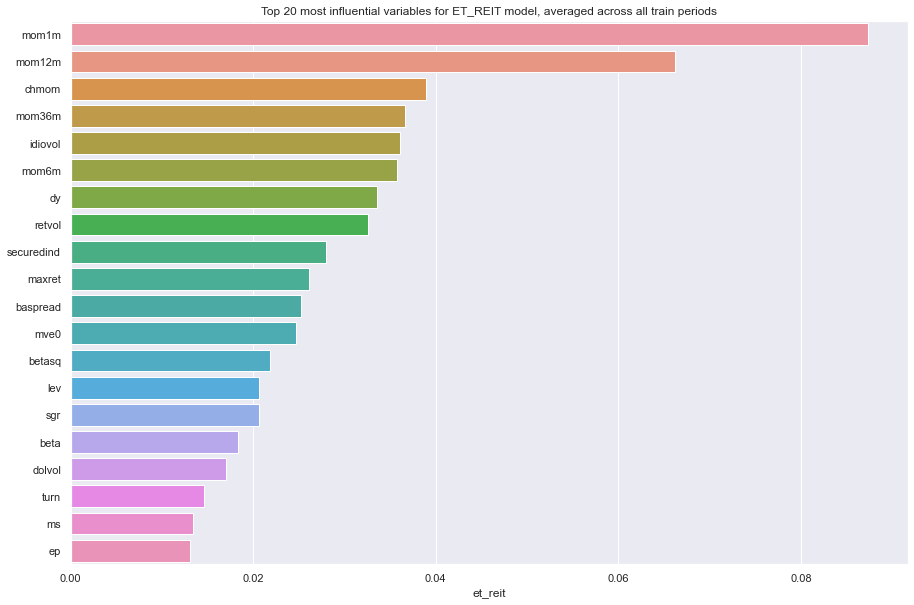

In [377]:
# Plot features of importance
# Plot graph
df_top20 = df_impt.sort_values(by=[model_name], ascending = False).head(20)
plt.figure(figsize=(15,10))
plt.title(f'Top 20 most influential variables for {model_name.upper()} model, averaged across all train periods')
sns.barplot(data = df_top20, x = model_name, y = df_top20.index);


In [378]:
# Merge df_temp to existing df_r2drecrease table

df_r2decrease_reit = pd.merge(
    left = df_r2decrease_reit,
    right = df_impt[model_name],
    how = 'left',
    left_index = True,
    right_index = True    
)

# Rank R2decrease table after including new model results
df_featurerank_reit = df_r2decrease_reit.rank() 
df_featurerank_reit['all_models'] = df_featurerank_reit.sum(axis=1)

# Display tables
display(df_r2decrease_reit)
display(df_featurerank_reit.sort_values('all_models', ascending = False))

# Save dfs to .csv 
df_r2decrease_reit.to_csv('../data/df_r2decrease_reit.csv', index = False)
df_featurerank_reit.to_csv('../data/df_featurerank_reit.csv', index = False)

lr_reit  huber_reit  ridge_reit  lasso_reit  enet_reit  \
absacc           0.000306   -0.001380    0.000189    0.000000   0.000000   
acc              0.001430   -0.000741    0.001779    0.000000   0.000000   
aeavol           0.000650    0.000668    0.005239    0.001173   0.001226   
age              0.000137   -0.000080    0.001680    0.000018   0.000030   
agr              0.000223    0.005201    0.003357    0.000000   0.000010   
baspread         0.007390    0.007871    0.000149    0.000000   0.000000   
beta             0.008894    0.057075    0.000315    0.000000   0.000000   
betasq           0.013997    0.013039    0.002645    0.000000   0.000000   
bm               0.001241    0.000853    0.024032    0.025538   0.026162   
bm_ia            0.002404    0.004776    0.007611    0.004235   0.004285   
cash             0.000161    0.000505    0.003340    0.000873   0.000927   
cashdebt         0.000128   -0.001187    0.000750    0.000000   0.000000   
cashpr           0.001257    0.002444    0.004893    0.001111   0.001181   
cfp              0.006021    0.006040    0.008196    0.013265   0.013306   
cfp_ia           0.001410    0.004166    0.007417    0.015930   0.015591   
chatoia          0.000082   -0.000040   -0.000983   -0.000089  -0.000097   
chcsho           0.000206   -0.000878    0.005366    0.002707   0.002796   
chempia          0.001031    0.003782   -0.000006    0.000000   0.000000   
chinv            0.000245   -0.000393    0.000482    0.000000   0.000000   
chmom            0.052654    0.050540    0.096469    0.142593   0.139152   
chpmia           0.002182    0.002565    0.011188    0.005567   0.005818   
chtx            -0.000017   -0.000019    0.000188    0.000000   0.000000   
cinvest          0.000038    0.000148    0.000281    0.000000   0.000000   
convind          0.000886    0.000794    0.000866    0.000000   0.000000   
currat           0.091179    0.044869   -0.000742    0.000000   0.000000   
depr            -0.000063    0.000391    0.001464    0.000148   0.000158   
divi             0.000153    0.000328    0.000156    0.000000   0.000000   
divo             0.000145    0.000922    0.000460    0.000000   0.000000   
dolvol           0.052843    0.089712    0.018587    0.017184   0.017007   
dy               0.016294    0.015071    0.090116    0.083019   0.084596   
ear              0.000198    0.000341    0.007511    0.004939   0.005175   
egr              0.001280    0.002940    0.004116    0.001198   0.001247   
ep               0.001748    0.010111    0.008772    0.004712   0.004875   
gma              0.003155   -0.001219    0.004361    0.000000   0.000000   
grcapx           0.000474    0.000658   -0.000177    0.000000   0.000000   
grltnoa          0.002414    0.001948    0.004432    0.000000   0.000000   
herf             0.023766    0.022687    0.023490    0.026236   0.026005   
hire             0.000198    0.002251    0.000338    0.000000   0.000000   
idiovol          0.000873   -0.000939    0.012297    0.014589   0.014951   
ill              0.005484    0.010939    0.022225    0.013264   0.013836   
indmom          -0.000049    0.000309    0.000357    0.000269   0.000290   
invest           0.000890    0.000858    0.002343    0.000000   0.000000   
lev             -0.000274   -0.002811   -0.002411    0.000000   0.000000   
lgr              0.000145    0.000304    0.000079    0.000000   0.000000   
maxret           0.025620    0.054758    0.005975    0.000000   0.000000   
mom12m           0.004666    0.002331    0.047325    0.017174   0.020037   
mom1m            0.019050    0.030089    0.134880    0.123642   0.127685   
mom36m           0.004236    0.006796    0.023669    0.021621   0.022049   
mom6m            0.056381    0.030482    0.053236    0.127055   0.120789   
ms               0.000196    0.000743    0.002229    0.000000   0.000000   
mve0             0.200379    0.212738    0.122775    0.137827   0.135776   
mve_ia           0.116817    0.152169    0.033515    0.073484   0.

lr_reit  huber_reit  ridge_reit  lasso_reit  enet_reit  \
mom1m               84.0        84.0        94.0        91.0       92.0   
chmom               87.0        89.0        92.0        94.0       94.0   
mom6m               89.0        85.0        89.0        92.0       91.0   
mve0                94.0        94.0        93.0        93.0       93.0   
retvol              93.0        86.0        90.0        87.0       87.0   
dy                  83.0        82.0        91.0        90.0       90.0   
mom12m              74.0        60.0        88.0        82.0       83.0   
sgr                 79.0        76.0        87.0        88.0       88.0   
herf                85.0        83.0        83.0        86.0       85.0   
mom36m              72.0        72.0        84.0        84.0       84.0   
ill                 75.0        78.0        82.0        78.0       79.0   
rd_sale             73.0        74.0        74.0        77.0       77.0   
bm                  54.0        47.0        85.0        85.0       86.0   
dolvol              88.0        92.0        81.0        83.0       82.0   
maxret              86.0        90.0        68.0        26.0       25.5   
bm_ia               68.0        69.0        73.0        72.0       72.0   
chpmia              67.0        62.0        79.0        75.0       75.0   
saleinv             66.0        55.0        78.0        69.0       69.0   
mve_ia              92.0        93.0        86.0        89.0       89.0   
tang                61.0        54.0        77.0        66.0       67.0   
ep                  63.0        77.0        76.0        73.0       73.0   
sp                  59.0        75.0        66.0        76.0       76.0   
cfp                 76.0        71.0        75.0        79.0       78.0   
cfp_ia              57.0        67.0        71.0        81.0       81.0   
idiovol             48.0         7.0        80.0        80.0       80.0   
ear                 29.0        33.0        72.0        74.0       74.0   
roavol              65.0        68.0        67.0        68.0       68.0   
pchdepr             43.0        35.0        57.0        67.0       66.0   
std_dolvol          39.0        53.0        63.0        59.0       59.0   
invest              50.0        48.0        46.0        26.0       25.5   
turn                77.0        79.0        40.0        62.0       62.0   
pchsale_pchinvt     27.0        28.0        51.0        52.0       51.0   
zerotrade           82.0        57.0        50.0        53.0       52.0   
aeavol              46.0        43.0        64.0        64.0       64.0   
salerec             26.0        26.0        56.0        60.0       60.0   
cashpr              55.0        61.0        62.0        63.0       63.0   
rd_mve               8.0        44.0        47.0        50.0       53.0   
cash                25.0        39.0        54.0        61.0       61.0   
egr                 56.0        63.0        58.0        65.0       65.0   
pchgm_pchsale       32.0        20.0        61.0        58.0       58.0   
nincr               37.0        13.0        53.0        49.0       49.0   
betasq              81.0        80.0        49.0        26.0       25.5   
beta                80.0        91.0        26.0        26.0       25.5   
grltnoa             69.0        56.0        60.0        26.0       25.5   
roic                47.0         6.0        70.0        70.0       70.0   
stdacc              60.0        64.0        15.0        26.0       25.5   
stdcf               70.0        81.0         9.0        26.0       25.5   
chcsho              33.0         8.0        65.0        71.0       71.0   
baspread            78.0        73.0        18.0        26.0       25.5   
agr                 35.0        70.0        55.0        26.0       48.0   
roaq                62.0        65.0        69.0        26.0       25.5   
orgcap              52.0        52.0        22.0        26.0       25.5   
indmom               7.0        31.0      

## XGBoost

### REIT

In [391]:
df_results_reit = df_results_reit[:12]

In [393]:
# Create list of configs to test on 
def model_configs():
    # define scope of configs
    n_trees = [20, 50, 100, 200, 300]
    n_max_depth = [1, 2] ## Tried and doesn't work with deeper trees
    n_learning_rate = [0.01, 0.10, 0.20, 0.30]
    n_alpha = [0, 0.05, 0.1]
    # create configs
    configs = []
    for i in n_trees:
        for j in n_max_depth:
            for k in n_learning_rate:
                for l in n_alpha:
                    cfg = [i,j,k,l]
                    configs.append(cfg)
    print('Total configs (n_trees, n_max_depth, n_learning_rate, n_alpha): %d' %len(configs))
    return configs

def model_fit(X_train, y_train, cfg):
    # unpack config
    n_trees, n_max_depth, n_learning_rate, n_alpha = cfg
    model = XGBRegressor(
        n_estimators = n_trees,
        max_depth = n_max_depth,
        learning_rate = n_learning_rate,
        alpha = n_alpha,
        random_state = 42,
        n_jobs = -1
    )
    model.fit(X_train, y_train)
    return model

In [394]:
# Instantiate list of configurations
cfg_list = model_configs()

Total configs (n_trees, n_max_depth, n_learning_rate, n_alpha): 120


In [395]:
%%time
# Create model name 
model_name = 'xg_reit'

# Create new row of test results
df_results_reit = pd.concat(
    [df_results_reit, pd.DataFrame([{'Model Name' : model_name,}])], 
    axis = 0
)

# Run grid search of hyperparameters
scores = grid_search(
    X = X_reit, 
    y = y_reit, 
    start_train = 1990, 
    start_val = 2001, 
    start_test = 2006, 
    cfg_list = cfg_list, 
    df_results = df_results_reit
)

# Print results
print ('Top 8 Configs')
print ('Config, R2_validate, RMSE_validate, R2_train, RMSE_train')
for cfg, r2_validate, rmse_validate, r2_train, rmse_train, in scores[:8]:
    print (f'{cfg}, {r2_validate:.2f}, {rmse_validate:.2f}, {r2_train:.2f}, {rmse_train:.2f}')

[20, 1, 0.01, 0], 1.43, 10.18, 0.47, 10.42
[20, 1, 0.01, 0.05], 1.43, 10.18, 0.47, 10.42
[20, 1, 0.01, 0.1], 1.43, 10.18, 0.47, 10.42
[20, 1, 0.1, 0], 1.66, 10.17, 1.50, 10.37
[20, 1, 0.1, 0.05], 1.66, 10.17, 1.50, 10.37
[20, 1, 0.1, 0.1], 1.66, 10.17, 1.50, 10.37
[20, 1, 0.2, 0], 1.28, 10.19, 2.22, 10.33
[20, 1, 0.2, 0.05], 1.28, 10.19, 2.22, 10.33
[20, 1, 0.2, 0.1], 1.28, 10.19, 2.22, 10.33
[20, 1, 0.3, 0], 1.10, 10.20, 2.81, 10.30
[20, 1, 0.3, 0.05], 1.10, 10.20, 2.81, 10.30
[20, 1, 0.3, 0.1], 1.10, 10.20, 2.81, 10.30
[20, 2, 0.01, 0], 0.94, 10.21, 0.84, 10.40
[20, 2, 0.01, 0.05], 0.94, 10.21, 0.84, 10.40
[20, 2, 0.01, 0.1], 0.94, 10.21, 0.84, 10.40
[20, 2, 0.1, 0], 0.26, 10.24, 3.88, 10.24
[20, 2, 0.1, 0.05], 0.26, 10.24, 3.88, 10.24
[20, 2, 0.1, 0.1], 0.26, 10.24, 3.88, 10.24
[20, 2, 0.2, 0], -0.20, 10.27, 5.87, 10.13
[20, 2, 0.2, 0.05], -0.20, 10.27, 5.87, 10.13
[20, 2, 0.2, 0.1], -0.20, 10.27, 5.87, 10.13
[20, 2, 0.3, 0], -0.02, 10.26, 8.06, 10.02
[20, 2, 0.3, 0.05], -0.05, 10.2

Model Name             Selected Config Train (1990-2000)  \
0        naive_reit                        N.A.      0.00 (10.45)   
0           lr_reit                        N.A.       1.99 (10.3)   
0  fama-french_reit                    bm, mve0       0.36 (10.4)   
0      carhart_reit            bm, mve0, mom12m       0.52 (10.4)   
0        huber_reit               [3.0, 0.0001]      1.58 (10.36)   
0        ridge_reit        [19920.457084538713]      1.19 (10.38)   
0        lasso_reit       [0.07196856730011514]      1.28 (10.38)   
0         enet_reit  [0.9, 0.07880462815669913]      1.28 (10.38)   
0          pcr_reit                          28      0.90 (10.40)   
0          pls_reit                           1      1.03 (10.39)   
0           rf_reit          [300, 0.2, 10, 70]      13.97 (9.69)   
0           et_reit          [200, 0.5, 15, 70]      5.56 (10.15)   
0           xg_reit           [100, 1, 0.01, 0]      1.00 (10.39)   

  Validate (2001-2005) Test (2006-2020)  Test (2006)     Test (2007)  \
0         0.00 (10.26)     0.00 (12.13)  0.00 (7.60)    0.00 (11.29)   
0          0.69 (10.2)    -0.03 (12.13)  4.17 (7.44)   -3.50 (11.48)   
0          1.52 (10.2)     0.17 (12.12)  3.84 (7.45)   -4.46 (11.54)   
0          1.68 (10.2)     0.16 (12.12)  4.37 (7.43)   -3.46 (11.48)   
0         0.90 (10.21)    -0.07 (12.13)  3.50 (7.47)   -2.04 (11.40)   
0         1.82 (10.16)     0.18 (12.12)  4.43 (7.43)   -3.65 (11.49)   
0         1.93 (10.16)     0.23 (12.11)  4.37 (7.43)   -3.54 (11.49)   
0         1.93 (10.16)     0.23 (12.11)  4.37 (7.43)   -3.54 (11.49)   
0         1.89 (10.16)     0.09 (12.12)  3.79 (7.46)   -3.68 (11.49)   
0         1.71 (10.17)    -0.06 (12.13)  4.19 (7.44)   -4.17 (11.52)   
0         2.31 (10.14)    -0.75 (12.17)  4.65 (7.42)  -11.55 (11.92)   
0         1.63 (10.17)    -0.04 (12.13)  4.20 (7.44)   -4.29 (11.53)   
0         1.78 (10.17)              NaN          NaN             NaN   

     Test (2008)    Test (2009)   Test (2010)    Test (2011)  Test (2012)  \
0   0.00 (19.81)   0.00 (25.18)  0.00 (12.47)   0.00 (10.08)  0.00 (9.46)   
0  -0.55 (19.87)  -0.02 (25.19)  1.79 (12.36)  -2.03 (10.19)  3.18 (9.31)   
0  -1.84 (19.99)   0.64 (25.10)  2.03 (12.34)  -0.68 (10.12)  3.28 (9.31)   
0  -1.33 (19.94)   0.15 (25.16)  2.04 (12.34)  -0.71 (10.12)  2.65 (9.34)   
0  -0.24 (19.84)  -0.24 (25.21)  0.25 (12.45)  -0.65 (10.12)  1.09 (9.41)   
0  -1.12 (19.92)   0.16 (25.16)  1.98 (12.34)  -1.29 (10.15)  3.80 (9.28)   
0  -1.09 (19.92)   0.26 (25.15)  2.08 (12.34)  -1.03 (10.14)  3.42 (9.30)   
0  -1.09 (19.92)   0.26 (25.15)  2.08 (12.34)  -1.03 (10.14)  3.43 (9.30)   
0  -1.31 (19.94)   0.20 (25.16)  2.13 (12.33)  -1.07 (10.14)  3.27 (9.31)   
0  -1.10 (19.92)  -0.15 (25.20)  1.75 (12.36)  -1.84 (10.18)  3.68 (9.29)   
0   0.56 (19.76)   0.03 (25.18)  3.62 (12.24)  -2.18 (10.19)  1.80 (9.38)   
0  -0.31 (19.84)  -0.90 (25.30)  2.72 (12.30)  -1.07 (10.14)  3.04 (9.32)   
0            NaN            NaN           NaN            NaN          NaN   

   Test (2013)  Test (2014)   Test (2015)  Test (2016)   Test (2017)  \
0  0.00 (9.44)  0.00 (7.04)   0.00 (7.47)  0.00 (9.09)   0.00 (7.08)   
0  1.38 (9.37)  1.59 (6.99)  -2.95 (7.58)  2.22 (8.98)  -1.00 (7.12)   
0  1.25 (9.38)  3.36 (6.92)  -1.87 (7.54)  2.06 (8.99)   1.06 (7.05)   
0  1.65 (9.36)  3.06 (6.93)  -1.88 (7.54)  1.71 (9.01)   0.85 (7.05)   
0  0.70 (9.40)  2.18 (6.96)  -2.61 (7.57)  1.41 (9.02)  -0.62 (7.11)   
0  1.91 (9.35)  2.74 (6.94)  -1.82 (7.54)  2.31 (8.98)   0.49 (7.07)   
0  1.89 (9.35)  3.51 (6.92)  -1.64 (7.54)  1.70 (9.01)   0.50 (7.07)   
0  1.90 (9.35)  3.52 (6.92)  -1.63 (7.54)  1.71 (9.01)   0.52 (7.07)   
0  1.65 (9.36)  3.16 (6.93)  -2.25 (7.56)  2.12 (8.99)   0.29 (7.07)   
0  1.99 (9.34)  2.32 (6.96)  -2.06 (7.55)  2.14 (8.99)   0.18 (7.08)   
0  1.17 (9.38)  2.26 (6.96)  -2.85 (7.58)  0.57 (9.06)  -0.40 (7.10)   
0  1.71 (9.36)  3.56 (6.91)  -2.28 (7.56)  1.87 (9.00)  -0.46 (7.10)   
0          NaN    

Top 8 Configs
Config, R2_validate, RMSE_validate, R2_train, RMSE_train
[100, 1, 0.01, 0], 1.78, 10.17, 1.00, 10.39
[100, 1, 0.01, 0.05], 1.78, 10.17, 1.00, 10.39
[100, 1, 0.01, 0.1], 1.78, 10.17, 1.00, 10.39
[20, 1, 0.1, 0.1], 1.66, 10.17, 1.50, 10.37
[20, 1, 0.1, 0.05], 1.66, 10.17, 1.50, 10.37
[20, 1, 0.1, 0], 1.66, 10.17, 1.50, 10.37
[50, 1, 0.01, 0], 1.63, 10.17, 0.69, 10.41
[50, 1, 0.01, 0.05], 1.63, 10.17, 0.69, 10.41
CPU times: user 17min 2s, sys: 7.02 s, total: 17min 9s
Wall time: 3min 6s


Top 8 Configs
Config, R2_validate, RMSE_validate, R2_train, RMSE_train

[100, 1, 0.01, 0], 1.78, 10.17, 1.00, 10.39

[100, 1, 0.01, 0.05], 1.78, 10.17, 1.00, 10.39

[100, 1, 0.01, 0.1], 1.78, 10.17, 1.00, 10.39

[20, 1, 0.1, 0.1], 1.66, 10.17, 1.50, 10.37

[20, 1, 0.1, 0.05], 1.66, 10.17, 1.50, 10.37

[20, 1, 0.1, 0], 1.66, 10.17, 1.50, 10.37

[50, 1, 0.01, 0], 1.63, 10.17, 0.69, 10.41

[50, 1, 0.01, 0.05], 1.63, 10.17, 0.69, 10.41

CPU times: user 17min 2s, sys: 7.02 s, total: 17min 9s

Wall time: 3min 6s

In [396]:
%%time
# Chosen configuration for model
selected_cfg = scores[0][0]

# Out-of-sample testing, no need to do validation after hyperparameters are selected
score = walk_forward(
    selected_cfg, 
    X = X_reit, 
    y = y_reit, 
    start_train = 1990, 
    start_val = 2006, # Set equal to start of test year, so that train year ends just before test year
    start_test = 2006,
    final_year_of_testing = 2020, 
    df_results = df_results_reit
)

print(f'On best performing config: {scores[0][0]}')

# Save df_results to .csv 
df_results_reit.to_csv('../data/df_results_reit.csv', index = False)

Test year 2006 done, R2 score is 3.63
Test year 2006 done, RMSE score is 7.46
Test year 2007 done, R2 score is -5.46
Test year 2007 done, RMSE score is 11.59
Test year 2008 done, R2 score is -0.64
Test year 2008 done, RMSE score is 19.88
Test year 2009 done, R2 score is -0.44
Test year 2009 done, RMSE score is 25.24
Test year 2010 done, R2 score is 0.98
Test year 2010 done, RMSE score is 12.41
Test year 2011 done, R2 score is -0.64
Test year 2011 done, RMSE score is 10.12
Test year 2012 done, R2 score is 2.76
Test year 2012 done, RMSE score is 9.33
Test year 2013 done, R2 score is 0.95
Test year 2013 done, RMSE score is 9.39
Test year 2014 done, R2 score is 2.64
Test year 2014 done, RMSE score is 6.95
Test year 2015 done, R2 score is -1.44
Test year 2015 done, RMSE score is 7.53
Test year 2016 done, R2 score is 1.44
Test year 2016 done, RMSE score is 9.02
Test year 2017 done, R2 score is 0.87
Test year 2017 done, RMSE score is 7.05
Test year 2018 done, R2 score is -1.95
Test year 2018 

Model Name             Selected Config Train (1990-2000)  \
0        naive_reit                        N.A.      0.00 (10.45)   
0           lr_reit                        N.A.       1.99 (10.3)   
0  fama-french_reit                    bm, mve0       0.36 (10.4)   
0      carhart_reit            bm, mve0, mom12m       0.52 (10.4)   
0        huber_reit               [3.0, 0.0001]      1.58 (10.36)   
0        ridge_reit        [19920.457084538713]      1.19 (10.38)   
0        lasso_reit       [0.07196856730011514]      1.28 (10.38)   
0         enet_reit  [0.9, 0.07880462815669913]      1.28 (10.38)   
0          pcr_reit                          28      0.90 (10.40)   
0          pls_reit                           1      1.03 (10.39)   
0           rf_reit          [300, 0.2, 10, 70]      13.97 (9.69)   
0           et_reit          [200, 0.5, 15, 70]      5.56 (10.15)   
0           xg_reit           [100, 1, 0.01, 0]      1.00 (10.39)   

  Validate (2001-2005) Test (2006-2020)  Test (2006)     Test (2007)  \
0         0.00 (10.26)     0.00 (12.13)  0.00 (7.60)    0.00 (11.29)   
0          0.69 (10.2)    -0.03 (12.13)  4.17 (7.44)   -3.50 (11.48)   
0          1.52 (10.2)     0.17 (12.12)  3.84 (7.45)   -4.46 (11.54)   
0          1.68 (10.2)     0.16 (12.12)  4.37 (7.43)   -3.46 (11.48)   
0         0.90 (10.21)    -0.07 (12.13)  3.50 (7.47)   -2.04 (11.40)   
0         1.82 (10.16)     0.18 (12.12)  4.43 (7.43)   -3.65 (11.49)   
0         1.93 (10.16)     0.23 (12.11)  4.37 (7.43)   -3.54 (11.49)   
0         1.93 (10.16)     0.23 (12.11)  4.37 (7.43)   -3.54 (11.49)   
0         1.89 (10.16)     0.09 (12.12)  3.79 (7.46)   -3.68 (11.49)   
0         1.71 (10.17)    -0.06 (12.13)  4.19 (7.44)   -4.17 (11.52)   
0         2.31 (10.14)    -0.75 (12.17)  4.65 (7.42)  -11.55 (11.92)   
0         1.63 (10.17)    -0.04 (12.13)  4.20 (7.44)   -4.29 (11.53)   
0         1.78 (10.17)    -0.11 (12.13)  3.63 (7.46)   -5.46 (11.59)   

     Test (2008)    Test (2009)   Test (2010)    Test (2011)  Test (2012)  \
0   0.00 (19.81)   0.00 (25.18)  0.00 (12.47)   0.00 (10.08)  0.00 (9.46)   
0  -0.55 (19.87)  -0.02 (25.19)  1.79 (12.36)  -2.03 (10.19)  3.18 (9.31)   
0  -1.84 (19.99)   0.64 (25.10)  2.03 (12.34)  -0.68 (10.12)  3.28 (9.31)   
0  -1.33 (19.94)   0.15 (25.16)  2.04 (12.34)  -0.71 (10.12)  2.65 (9.34)   
0  -0.24 (19.84)  -0.24 (25.21)  0.25 (12.45)  -0.65 (10.12)  1.09 (9.41)   
0  -1.12 (19.92)   0.16 (25.16)  1.98 (12.34)  -1.29 (10.15)  3.80 (9.28)   
0  -1.09 (19.92)   0.26 (25.15)  2.08 (12.34)  -1.03 (10.14)  3.42 (9.30)   
0  -1.09 (19.92)   0.26 (25.15)  2.08 (12.34)  -1.03 (10.14)  3.43 (9.30)   
0  -1.31 (19.94)   0.20 (25.16)  2.13 (12.33)  -1.07 (10.14)  3.27 (9.31)   
0  -1.10 (19.92)  -0.15 (25.20)  1.75 (12.36)  -1.84 (10.18)  3.68 (9.29)   
0   0.56 (19.76)   0.03 (25.18)  3.62 (12.24)  -2.18 (10.19)  1.80 (9.38)   
0  -0.31 (19.84)  -0.90 (25.30)  2.72 (12.30)  -1.07 (10.14)  3.04 (9.32)   
0  -0.64 (19.88)  -0.44 (25.24)  0.98 (12.41)  -0.64 (10.12)  2.76 (9.33)   

   Test (2013)  Test (2014)   Test (2015)  Test (2016)   Test (2017)  \
0  0.00 (9.44)  0.00 (7.04)   0.00 (7.47)  0.00 (9.09)   0.00 (7.08)   
0  1.38 (9.37)  1.59 (6.99)  -2.95 (7.58)  2.22 (8.98)  -1.00 (7.12)   
0  1.25 (9.38)  3.36 (6.92)  -1.87 (7.54)  2.06 (8.99)   1.06 (7.05)   
0  1.65 (9.36)  3.06 (6.93)  -1.88 (7.54)  1.71 (9.01)   0.85 (7.05)   
0  0.70 (9.40)  2.18 (6.96)  -2.61 (7.57)  1.41 (9.02)  -0.62 (7.11)   
0  1.91 (9.35)  2.74 (6.94)  -1.82 (7.54)  2.31 (8.98)   0.49 (7.07)   
0  1.89 (9.35)  3.51 (6.92)  -1.64 (7.54)  1.70 (9.01)   0.50 (7.07)   
0  1.90 (9.35)  3.52 (6.92)  -1.63 (7.54)  1.71 (9.01)   0.52 (7.07)   
0  1.65 (9.36)  3.16 (6.93)  -2.25 (7.56)  2.12 (8.99)   0.29 (7.07)   
0  1.99 (9.34)  2.32 (6.96)  -2.06 (7.55)  2.14 (8.99)   0.18 (7.08)   
0  1.17 (9.38)  2.26 (6.96)  -2.85 (7.58)  0.57 (9.06)  -0.40 (7.10)   
0  1.71 (9.36)  3.56 (6.91)  -2.28 (7.56)  1.87 (9.00)  -0.46 (7.10)   
0  0.95 (9.39)  2.


R2 for entire pooled test set, from 2006 to 2020, is -0.11.
RMSE for entire pooled test set, from 2006 to 2020, is 12.13.

On best performing config: [100, 1, 0.01, 0]
CPU times: user 2min 30s, sys: 758 ms, total: 2min 30s
Wall time: 26.6 s


R2 for entire pooled test set, from 2006 to 2020, is -0.11.

RMSE for entire pooled test set, from 2006 to 2020, is 12.13.

On best performing config: [100, 1, 0.01, 0]

CPU times: user 2min 30s, sys: 758 ms, total: 2min 30s

Wall time: 26.6 s


### Sample 1

In [397]:
df_results_sample1 = df_results_sample1[:12]

In [398]:
%%time
# Create model name 
model_name = 'xg_sample1'

# Create new row of test results
df_results_sample1 = pd.concat(
    [df_results_sample1, pd.DataFrame([{'Model Name' : model_name,}])], 
    axis = 0
)

# Run grid search of hyperparameters
scores = grid_search(
    X = X_1, 
    y = y_1, 
    start_train = 1990, 
    start_val = 2001, 
    start_test = 2006, 
    cfg_list = cfg_list, 
    df_results = df_results_sample1
)

# Print results
print ('Top 8 Configs')
print ('Config, R2_validate, RMSE_validate, R2_train, RMSE_train')
for cfg, r2_validate, rmse_validate, r2_train, rmse_train, in scores[:8]:
    print (f'{cfg}, {r2_validate:.2f}, {rmse_validate:.2f}, {r2_train:.2f}, {rmse_train:.2f}')

[20, 1, 0.01, 0], 0.22, 18.99, 0.37, 20.84
[20, 1, 0.01, 0.05], 0.22, 18.99, 0.37, 20.84
[20, 1, 0.01, 0.1], 0.22, 18.99, 0.37, 20.84
[20, 1, 0.1, 0], 0.09, 19.00, 1.39, 20.73
[20, 1, 0.1, 0.05], 0.09, 19.00, 1.39, 20.73
[20, 1, 0.1, 0.1], 0.09, 19.00, 1.39, 20.73
[20, 1, 0.2, 0], -0.24, 19.03, 1.98, 20.67
[20, 1, 0.2, 0.05], -0.24, 19.03, 1.98, 20.67
[20, 1, 0.2, 0.1], -0.24, 19.03, 1.98, 20.67
[20, 1, 0.3, 0], -0.68, 19.07, 2.43, 20.62
[20, 1, 0.3, 0.05], -0.68, 19.07, 2.43, 20.62
[20, 1, 0.3, 0.1], -0.68, 19.07, 2.43, 20.62
[20, 2, 0.01, 0], 0.22, 18.99, 2.01, 20.67
[20, 2, 0.01, 0.05], 0.22, 18.99, 2.01, 20.67
[20, 2, 0.01, 0.1], 0.22, 18.99, 2.01, 20.67
[20, 2, 0.1, 0], -0.54, 19.06, 8.40, 19.98
[20, 2, 0.1, 0.05], -0.54, 19.06, 8.40, 19.98
[20, 2, 0.1, 0.1], -0.54, 19.06, 8.40, 19.98
[20, 2, 0.2, 0], -1.27, 19.13, 10.86, 19.71
[20, 2, 0.2, 0.05], -1.27, 19.13, 10.86, 19.71
[20, 2, 0.2, 0.1], -1.27, 19.13, 10.86, 19.71
[20, 2, 0.3, 0], -1.76, 19.17, 11.27, 19.67
[20, 2, 0.3, 0.05]

Model Name        Selected Config Train (1990-2000)  \
0        naive_sample1                   N.A.      0.00 (20.88)   
0           lr_sample1                   N.A.       1.66 (20.7)   
0  fama-french_sample1               bm, mve0       0.21 (20.9)   
0      carhart_sample1       bm, mve0, mom12m       0.25 (20.9)   
0        huber_sample1            [9, 0.0001]      1.57 (20.71)   
0        ridge_sample1    [50084.07989848212]      0.86 (20.79)   
0        lasso_sample1  [0.47148663634573895]      0.51 (20.82)   
0         enet_sample1             [0.3, 1.0]      0.65 (20.81)   
0          pcr_sample1                     21      0.70 (20.80)   
0          pls_sample1                      1      1.06 (20.77)   
0           rf_sample1     [200, 0.5, 15, 50]     13.73 (19.39)   
0           et_sample1     [100, 0.5, 15, 30]      8.60 (19.96)   
0           xg_sample1     [20, 1, 0.01, 0.1]      0.37 (20.84)   

  Validate (2001-2005) Test (2006-2020)    Test (2006)    Test (2007)  \
0         0.00 (19.01)     0.00 (15.77)   0.00 (14.72)   0.00 (12.19)   
0         -0.45 (19.0)    -0.49 (15.80)  -0.80 (14.78)  -4.28 (12.45)   
0          0.32 (19.0)     0.13 (15.76)   0.74 (14.66)  -1.74 (12.30)   
0          0.31 (19.0)     0.11 (15.76)   0.62 (14.67)  -1.56 (12.29)   
0        -0.21 (19.03)    -0.29 (15.79)  -0.52 (14.76)  -2.89 (12.37)   
0         0.53 (18.96)     0.04 (15.76)   0.48 (14.68)  -2.36 (12.34)   
0         0.44 (18.97)     0.11 (15.76)   0.91 (14.65)  -2.18 (12.33)   
0         0.46 (18.96)     0.11 (15.76)   0.81 (14.66)  -2.17 (12.33)   
0         0.51 (18.96)    -0.18 (15.78)  -0.61 (14.76)  -2.45 (12.34)   
0         0.11 (19.00)    -0.40 (15.80)  -0.56 (14.76)  -3.95 (12.43)   
0         1.05 (18.91)    -0.36 (15.79)  -0.63 (14.76)  -2.54 (12.35)   
0         1.01 (18.91)     0.18 (15.75)   0.28 (14.70)  -2.18 (12.33)   
0         0.22 (18.99)              NaN            NaN            NaN   

     Test (2008)    Test (2009)    Test (2010)    Test (2011)   Test (2012)  \
0   0.00 (20.06)   0.00 (24.51)   0.00 (15.28)   0.00 (13.93)  0.00 (12.77)   
0  -2.82 (20.35)   0.66 (24.43)  -0.84 (15.34)  -1.28 (14.02)  0.52 (12.74)   
0  -2.49 (20.31)   0.77 (24.41)   1.13 (15.19)  -0.88 (13.99)  0.74 (12.72)   
0  -2.28 (20.29)   0.56 (24.44)   0.90 (15.21)  -0.76 (13.99)  0.76 (12.72)   
0  -2.15 (20.28)   0.58 (24.44)  -0.76 (15.34)  -0.67 (13.98)  0.54 (12.73)   
0  -2.61 (20.32)   0.86 (24.40)   0.60 (15.23)  -0.88 (13.99)  0.87 (12.71)   
0  -2.59 (20.32)   0.85 (24.40)   1.12 (15.19)  -0.96 (14.00)  0.80 (12.72)   
0  -2.61 (20.32)   0.80 (24.41)   1.16 (15.19)  -0.98 (14.00)  0.82 (12.72)   
0  -2.98 (20.36)   0.79 (24.41)   0.51 (15.24)  -0.95 (14.00)  0.67 (12.73)   
0  -3.19 (20.38)   0.75 (24.42)  -0.02 (15.28)  -1.78 (14.06)  0.14 (12.76)   
0  -3.11 (20.37)  -0.01 (24.51)   0.14 (15.27)  -0.81 (13.99)  0.79 (12.72)   
0  -2.26 (20.29)   1.09 (24.37)   0.69 (15.23)   1.07 (13.86)  1.31 (12.69)   
0            NaN            NaN            NaN            NaN           NaN   

     Test (2013)    Test (2014)    Test (2015)    Test (2016)    Test (2017)  \
0   0.00 (12.20)   0.00 (11.34)   0.00 (14.08)   0.00 (16.07)   0.00 (12.67)   
0   2.52 (12.05)  -1.37 (11.42)  -1.45 (14.18)  -0.12 (16.08)  -0.16 (12.68)   
0   2.08 (12.07)   0.01 (11.34)  -0.61 (14.12)   0.67 (16.01)   0.91 (12.61)   
0   2.29 (12.06)   0.03 (11.34)  -0.50 (14.11)   0.57 (16.02)   0.70 (12.62)   
0   2.45 (12.05)  -0.60 (11.37)  -1.17 (14.16)  -0.11 (16.07)   0.03 (12.67)   
0   2.81 (12.03)  -0.26 (11.35)  -0.64 (14.12)   0.49 (16.03)   0.37 (12.64)   
0   2.04 (12.07)  -0.15 (11.35)  -0.62 (14.12)   0.72 (16.01)   0.87 (12.61)   
0   2.28 (12.06)  -0.26 (11.35)  -0.56 (14.12)   0.68 (16.01)   0.86 (12.61)   
0   2.67 (12.04)  -0.87 (11.39)  -0.56 (14.12)   0.27 (16.04)   0.05 (12.66)   
0   3.10 (12.01)  -1.00 (11.40)  -0.96 (14.15)   0.41 (16.03)  -0.19 (12.68)   
0  -0.16 (12.21)   0.09 (11.33)  -0.58 (14.12)   1.63 (15.93)  

Top 8 Configs
Config, R2_validate, RMSE_validate, R2_train, RMSE_train
[20, 1, 0.01, 0.1], 0.22, 18.99, 0.37, 20.84
[20, 1, 0.01, 0.05], 0.22, 18.99, 0.37, 20.84
[20, 1, 0.01, 0], 0.22, 18.99, 0.37, 20.84
[50, 1, 0.01, 0.05], 0.22, 18.99, 0.61, 20.81
[50, 1, 0.01, 0], 0.22, 18.99, 0.61, 20.81
[20, 2, 0.01, 0.1], 0.22, 18.99, 2.01, 20.67
[20, 2, 0.01, 0.05], 0.22, 18.99, 2.01, 20.67
[20, 2, 0.01, 0], 0.22, 18.99, 2.01, 20.67
CPU times: user 18min 43s, sys: 7.42 s, total: 18min 51s
Wall time: 3min 27s


Top 8 Configs

Config, R2_validate, RMSE_validate, R2_train, RMSE_train

[20, 1, 0.01, 0.1], 0.22, 18.99, 0.37, 20.84

[20, 1, 0.01, 0.05], 0.22, 18.99, 0.37, 20.84

[20, 1, 0.01, 0], 0.22, 18.99, 0.37, 20.84

[50, 1, 0.01, 0.05], 0.22, 18.99, 0.61, 20.81

[50, 1, 0.01, 0], 0.22, 18.99, 0.61, 20.81

[20, 2, 0.01, 0.1], 0.22, 18.99, 2.01, 20.67

[20, 2, 0.01, 0.05], 0.22, 18.99, 2.01, 20.67

[20, 2, 0.01, 0], 0.22, 18.99, 2.01, 20.67

CPU times: user 18min 43s, sys: 7.42 s, total: 18min 51s

Wall time: 3min 27s

In [399]:
%%time
# Chosen configuration for model
selected_cfg = scores[0][0]

# Out-of-sample testing, no need to do validation after hyperparameters are selected
score = walk_forward(
    selected_cfg, 
    X = X_1, 
    y = y_1, 
    start_train = 1990, 
    start_val = 2006, # Set equal to start of test year, so that train year ends just before test year
    start_test = 2006,
    final_year_of_testing = 2020, 
    df_results = df_results_sample1
)

print(f'On best performing config: {scores[0][0]}')

# Save df_results to .csv 
df_results_sample1.to_csv('../data/df_results_sample1.csv', index = False)

Test year 2006 done, R2 score is 0.53
Test year 2006 done, RMSE score is 14.68
Test year 2007 done, R2 score is -1.01
Test year 2007 done, RMSE score is 12.26
Test year 2008 done, R2 score is -1.52
Test year 2008 done, RMSE score is 20.22
Test year 2009 done, R2 score is 0.78
Test year 2009 done, RMSE score is 24.41
Test year 2010 done, R2 score is 0.81
Test year 2010 done, RMSE score is 15.22
Test year 2011 done, R2 score is -0.57
Test year 2011 done, RMSE score is 13.97
Test year 2012 done, R2 score is 0.77
Test year 2012 done, RMSE score is 12.72
Test year 2013 done, R2 score is 1.36
Test year 2013 done, RMSE score is 12.12
Test year 2014 done, R2 score is -0.14
Test year 2014 done, RMSE score is 11.35
Test year 2015 done, R2 score is -0.38
Test year 2015 done, RMSE score is 14.10
Test year 2016 done, R2 score is 0.57
Test year 2016 done, RMSE score is 16.02
Test year 2017 done, R2 score is 0.70
Test year 2017 done, RMSE score is 12.62
Test year 2018 done, R2 score is -1.06
Test yea

Model Name        Selected Config Train (1990-2000)  \
0        naive_sample1                   N.A.      0.00 (20.88)   
0           lr_sample1                   N.A.       1.66 (20.7)   
0  fama-french_sample1               bm, mve0       0.21 (20.9)   
0      carhart_sample1       bm, mve0, mom12m       0.25 (20.9)   
0        huber_sample1            [9, 0.0001]      1.57 (20.71)   
0        ridge_sample1    [50084.07989848212]      0.86 (20.79)   
0        lasso_sample1  [0.47148663634573895]      0.51 (20.82)   
0         enet_sample1             [0.3, 1.0]      0.65 (20.81)   
0          pcr_sample1                     21      0.70 (20.80)   
0          pls_sample1                      1      1.06 (20.77)   
0           rf_sample1     [200, 0.5, 15, 50]     13.73 (19.39)   
0           et_sample1     [100, 0.5, 15, 30]      8.60 (19.96)   
0           xg_sample1     [20, 1, 0.01, 0.1]      0.37 (20.84)   

  Validate (2001-2005) Test (2006-2020)    Test (2006)    Test (2007)  \
0         0.00 (19.01)     0.00 (15.77)   0.00 (14.72)   0.00 (12.19)   
0         -0.45 (19.0)    -0.49 (15.80)  -0.80 (14.78)  -4.28 (12.45)   
0          0.32 (19.0)     0.13 (15.76)   0.74 (14.66)  -1.74 (12.30)   
0          0.31 (19.0)     0.11 (15.76)   0.62 (14.67)  -1.56 (12.29)   
0        -0.21 (19.03)    -0.29 (15.79)  -0.52 (14.76)  -2.89 (12.37)   
0         0.53 (18.96)     0.04 (15.76)   0.48 (14.68)  -2.36 (12.34)   
0         0.44 (18.97)     0.11 (15.76)   0.91 (14.65)  -2.18 (12.33)   
0         0.46 (18.96)     0.11 (15.76)   0.81 (14.66)  -2.17 (12.33)   
0         0.51 (18.96)    -0.18 (15.78)  -0.61 (14.76)  -2.45 (12.34)   
0         0.11 (19.00)    -0.40 (15.80)  -0.56 (14.76)  -3.95 (12.43)   
0         1.05 (18.91)    -0.36 (15.79)  -0.63 (14.76)  -2.54 (12.35)   
0         1.01 (18.91)     0.18 (15.75)   0.28 (14.70)  -2.18 (12.33)   
0         0.22 (18.99)     0.18 (15.75)   0.53 (14.68)  -1.01 (12.26)   

     Test (2008)    Test (2009)    Test (2010)    Test (2011)   Test (2012)  \
0   0.00 (20.06)   0.00 (24.51)   0.00 (15.28)   0.00 (13.93)  0.00 (12.77)   
0  -2.82 (20.35)   0.66 (24.43)  -0.84 (15.34)  -1.28 (14.02)  0.52 (12.74)   
0  -2.49 (20.31)   0.77 (24.41)   1.13 (15.19)  -0.88 (13.99)  0.74 (12.72)   
0  -2.28 (20.29)   0.56 (24.44)   0.90 (15.21)  -0.76 (13.99)  0.76 (12.72)   
0  -2.15 (20.28)   0.58 (24.44)  -0.76 (15.34)  -0.67 (13.98)  0.54 (12.73)   
0  -2.61 (20.32)   0.86 (24.40)   0.60 (15.23)  -0.88 (13.99)  0.87 (12.71)   
0  -2.59 (20.32)   0.85 (24.40)   1.12 (15.19)  -0.96 (14.00)  0.80 (12.72)   
0  -2.61 (20.32)   0.80 (24.41)   1.16 (15.19)  -0.98 (14.00)  0.82 (12.72)   
0  -2.98 (20.36)   0.79 (24.41)   0.51 (15.24)  -0.95 (14.00)  0.67 (12.73)   
0  -3.19 (20.38)   0.75 (24.42)  -0.02 (15.28)  -1.78 (14.06)  0.14 (12.76)   
0  -3.11 (20.37)  -0.01 (24.51)   0.14 (15.27)  -0.81 (13.99)  0.79 (12.72)   
0  -2.26 (20.29)   1.09 (24.37)   0.69 (15.23)   1.07 (13.86)  1.31 (12.69)   
0  -1.52 (20.22)   0.78 (24.41)   0.81 (15.22)  -0.57 (13.97)  0.77 (12.72)   

     Test (2013)    Test (2014)    Test (2015)    Test (2016)    Test (2017)  \
0   0.00 (12.20)   0.00 (11.34)   0.00 (14.08)   0.00 (16.07)   0.00 (12.67)   
0   2.52 (12.05)  -1.37 (11.42)  -1.45 (14.18)  -0.12 (16.08)  -0.16 (12.68)   
0   2.08 (12.07)   0.01 (11.34)  -0.61 (14.12)   0.67 (16.01)   0.91 (12.61)   
0   2.29 (12.06)   0.03 (11.34)  -0.50 (14.11)   0.57 (16.02)   0.70 (12.62)   
0   2.45 (12.05)  -0.60 (11.37)  -1.17 (14.16)  -0.11 (16.07)   0.03 (12.67)   
0   2.81 (12.03)  -0.26 (11.35)  -0.64 (14.12)   0.49 (16.03)   0.37 (12.64)   
0   2.04 (12.07)  -0.15 (11.35)  -0.62 (14.12)   0.72 (16.01)   0.87 (12.61)   
0   2.28 (12.06)  -0.26 (11.35)  -0.56 (14.12)   0.68 (16.01)   0.86 (12.61)   
0   2.67 (12.04)  -0.87 (11.39)  -0.56 (14.12)   0.27 (16.04)   0.05 (12.66)   
0   3.10 (12.01)  -1.00 (11.40)  -0.96 (14.15)   0.41 (16.03)  -0.19 (12.68)   
0  -0.16 (12.21)   0.09 (11.33)  -0.58 (14.12)   1.63 (15.93)  


R2 for entire pooled test set, from 2006 to 2020, is 0.18.
RMSE for entire pooled test set, from 2006 to 2020, is 15.75.

On best performing config: [20, 1, 0.01, 0.1]
CPU times: user 40 s, sys: 432 ms, total: 40.4 s
Wall time: 7.52 s


R2 for entire pooled test set, from 2006 to 2020, is 0.18.

RMSE for entire pooled test set, from 2006 to 2020, is 15.75.

On best performing config: [20, 1, 0.01, 0.1]

CPU times: user 40 s, sys: 432 ms, total: 40.4 s

Wall time: 7.52 s

### Sample 2

In [400]:
df_results_sample2 = df_results_sample2[:12]

In [401]:
%%time
# Create model name 
model_name = 'xg_sample2'

# Create new row of test results
df_results_sample2 = pd.concat(
    [df_results_sample2, pd.DataFrame([{'Model Name' : model_name,}])], 
    axis = 0
)

# Run grid search of hyperparameters
scores = grid_search(
    X = X_2, 
    y = y_2, 
    start_train = 1990, 
    start_val = 2001, 
    start_test = 2006, 
    cfg_list = cfg_list, 
    df_results = df_results_sample2
)

# Print results
print ('Top 8 Configs')
print ('Config, R2_validate, RMSE_validate, R2_train, RMSE_train')
for cfg, r2_validate, rmse_validate, r2_train, rmse_train, in scores[:8]:
    print (f'{cfg}, {r2_validate:.2f}, {rmse_validate:.2f}, {r2_train:.2f}, {rmse_train:.2f}')

[20, 1, 0.01, 0], 0.89, 12.23, 0.90, 13.94
[20, 1, 0.01, 0.05], 0.89, 12.23, 0.90, 13.94
[20, 1, 0.01, 0.1], 0.89, 12.23, 0.90, 13.94
[20, 1, 0.1, 0], 1.57, 12.19, 2.36, 13.83
[20, 1, 0.1, 0.05], 1.57, 12.19, 2.36, 13.83
[20, 1, 0.1, 0.1], 1.57, 12.19, 2.36, 13.83
[20, 1, 0.2, 0], 1.91, 12.17, 3.11, 13.78
[20, 1, 0.2, 0.05], 1.91, 12.17, 3.11, 13.78
[20, 1, 0.2, 0.1], 1.91, 12.17, 3.11, 13.78
[20, 1, 0.3, 0], 1.81, 12.17, 3.70, 13.74
[20, 1, 0.3, 0.05], 1.81, 12.17, 3.70, 13.74
[20, 1, 0.3, 0.1], 1.81, 12.17, 3.70, 13.74
[20, 2, 0.01, 0], 0.93, 12.23, 1.70, 13.88
[20, 2, 0.01, 0.05], 0.93, 12.23, 1.70, 13.88
[20, 2, 0.01, 0.1], 0.93, 12.23, 1.70, 13.88
[20, 2, 0.1, 0], 1.57, 12.19, 6.78, 13.52
[20, 2, 0.1, 0.05], 1.57, 12.19, 6.78, 13.52
[20, 2, 0.1, 0.1], 1.57, 12.19, 6.78, 13.52
[20, 2, 0.2, 0], 0.89, 12.23, 10.86, 13.22
[20, 2, 0.2, 0.05], 0.89, 12.23, 10.86, 13.22
[20, 2, 0.2, 0.1], 0.89, 12.23, 10.86, 13.22
[20, 2, 0.3, 0], -10.94, 12.94, 13.73, 13.00
[20, 2, 0.3, 0.05], -10.94, 1

Model Name            Selected Config Train (1990-2000)  \
0        naive_sample2                       N.A.      0.00 (14.00)   
0           lr_sample2                       N.A.       2.18 (13.8)   
0  fama-french_sample2                   bm, mve0       0.68 (14.0)   
0      carhart_sample2           bm, mve0, mom12m       0.68 (14.0)   
0        huber_sample2                [9, 0.0001]      1.99 (13.86)   
0        ridge_sample2        [38867.76690892668]      1.49 (13.90)   
0        lasso_sample2      [0.15264179671752318]      1.39 (13.90)   
0         enet_sample2  [0.5, 0.2807216203941176]      1.38 (13.90)   
0          pcr_sample2                         31      1.20 (13.92)   
0          pls_sample2                          1      1.22 (13.91)   
0           rf_sample2          [300, 0.5, 5, 50]      3.75 (13.74)   
0           et_sample2         [300, 0.5, 10, 70]      3.46 (13.76)   
0           xg_sample2            [20, 1, 0.2, 0]      3.11 (13.78)   

  Validate (2001-2005) Test (2006-2020)  Test (2006)   Test (2007)  \
0         0.00 (12.29)     0.00 (12.32)  0.00 (9.17)   0.00 (8.99)   
0          0.65 (12.2)     0.22 (12.30)  0.56 (9.15)  -3.53 (9.15)   
0          1.15 (12.2)     0.56 (12.28)  1.74 (9.09)  -2.06 (9.09)   
0          1.15 (12.2)     0.56 (12.28)  1.75 (9.09)  -2.06 (9.09)   
0         0.79 (12.24)     0.39 (12.29)  1.20 (9.12)  -3.22 (9.14)   
0         1.78 (12.18)     0.69 (12.27)  1.89 (9.08)  -2.63 (9.11)   
0         1.76 (12.18)     0.75 (12.27)  2.20 (9.07)  -2.40 (9.10)   
0         1.77 (12.18)     0.76 (12.27)  2.21 (9.07)  -2.39 (9.10)   
0         1.79 (12.18)     0.57 (12.28)  1.67 (9.09)  -3.65 (9.16)   
0         1.77 (12.18)     0.68 (12.27)  2.14 (9.07)  -2.87 (9.12)   
0         2.31 (12.14)    -0.29 (12.33)  2.24 (9.07)  -2.53 (9.11)   
0         1.75 (12.18)     0.60 (12.28)  1.78 (9.09)  -2.11 (9.09)   
0         1.91 (12.17)              NaN          NaN           NaN   

     Test (2008)   Test (2009)   Test (2010)   Test (2011)   Test (2012)  \
0   0.00 (15.09)  0.00 (18.80)  0.00 (10.67)   0.00 (9.59)  0.00 (10.62)   
0  -5.27 (15.48)  3.25 (18.49)  1.21 (10.60)  -4.70 (9.81)  2.88 (10.47)   
0  -3.80 (15.37)  1.82 (18.63)  2.57 (10.53)  -1.08 (9.64)  2.10 (10.51)   
0  -3.80 (15.37)  1.83 (18.63)  2.62 (10.53)  -1.11 (9.64)  2.18 (10.51)   
0  -4.71 (15.44)  2.82 (18.53)  1.69 (10.58)  -3.78 (9.77)  2.48 (10.49)   
0  -4.47 (15.42)  2.83 (18.53)  2.35 (10.54)  -2.62 (9.71)  3.15 (10.45)   
0  -4.48 (15.42)  2.61 (18.55)  2.44 (10.54)  -2.32 (9.70)  3.19 (10.45)   
0  -4.42 (15.42)  2.61 (18.55)  2.46 (10.53)  -2.28 (9.70)  3.16 (10.45)   
0  -4.39 (15.42)  2.78 (18.54)  1.89 (10.57)  -3.09 (9.73)  2.76 (10.47)   
0  -4.55 (15.43)  2.92 (18.52)  2.06 (10.56)  -2.75 (9.72)  3.26 (10.45)   
0  -7.16 (15.62)  0.23 (18.78)  2.72 (10.52)  -7.10 (9.92)  4.13 (10.40)   
0  -4.20 (15.40)  2.07 (18.60)  2.32 (10.54)  -1.98 (9.68)  3.05 (10.46)   
0            NaN           NaN           NaN           NaN           NaN   

   Test (2013)   Test (2014)   Test (2015)   Test (2016)  Test (2017)  \
0  0.00 (8.43)  0.00 (15.25)   0.00 (9.36)  0.00 (11.29)  0.00 (8.75)   
0  5.29 (8.21)  0.65 (15.20)  -3.61 (9.53)  2.74 (11.14)  0.11 (8.74)   
0  5.79 (8.19)  0.51 (15.21)  -2.07 (9.46)  2.88 (11.13)  1.56 (8.68)   
0  5.61 (8.19)  0.56 (15.21)  -2.28 (9.47)  2.94 (11.13)  1.52 (8.68)   
0  6.14 (8.17)  0.62 (15.21)  -2.53 (9.48)  2.60 (11.14)  0.80 (8.71)   
0  5.67 (8.19)  1.03 (15.17)  -2.75 (9.49)  3.02 (11.12)  0.98 (8.70)   
0  5.11 (8.21)  1.12 (15.17)  -2.50 (9.48)  3.32 (11.10)  1.08 (8.70)   
0  5.16 (8.21)  1.12 (15.17)  -2.48 (9.48)  3.27 (11.11)  1.15 (8.70)   
0  4.95 (8.22)  1.18 (15.16)  -2.61 (9.48)  2.78 (11.13)  0.87 (8.71)   
0  4.57 (8.24)  1.14 (15.17)  -3.20 (9.51)  3.05 (11.12)  1.11 (8.70)   
0  0.73 (8.40)  0.66 (15.20)  -2.75 (9.49)  3.78 (11.08)  2.01 (8.66)   
0  3.88 (8.27)  0.96 (15.18)  -3.19 (9.51)  3.04 (11.12)  1.24 (8.69)   
0          NaN        

Top 8 Configs
Config, R2_validate, RMSE_validate, R2_train, RMSE_train
[20, 1, 0.2, 0], 1.91, 12.17, 3.11, 13.78
[20, 1, 0.2, 0.05], 1.91, 12.17, 3.11, 13.78
[20, 1, 0.2, 0.1], 1.91, 12.17, 3.11, 13.78
[50, 1, 0.2, 0.1], 1.89, 12.17, 4.52, 13.68
[50, 1, 0.2, 0.05], 1.89, 12.17, 4.52, 13.68
[50, 1, 0.2, 0], 1.89, 12.17, 4.52, 13.68
[50, 1, 0.1, 0.1], 1.89, 12.17, 3.35, 13.76
[50, 1, 0.1, 0.05], 1.89, 12.17, 3.35, 13.76
CPU times: user 24min 29s, sys: 8.33 s, total: 24min 37s
Wall time: 4min 29s


Top 8 Configs

Config, R2_validate, RMSE_validate, R2_train, RMSE_train

[20, 1, 0.2], 1.91, 12.17, 3.11, 13.78

[50, 1, 0.2], 1.89, 12.17, 4.52, 13.68

[50, 1, 0.1], 1.89, 12.17, 3.35, 13.76

[100, 1, 0.1], 1.88, 12.17, 4.45, 13.69

[200, 1, 0.05], 1.88, 12.17, 4.41, 13.69

[100, 1, 0.05], 1.86, 12.17, 3.32, 13.77

[50, 1, 0.15], 1.86, 12.17, 3.98, 13.72

[20, 1, 0.15], 1.83, 12.17, 2.77, 13.81

CPU times: user 5min 1s, sys: 1.5 s, total: 5min 2s

Wall time: 53.4 s

In [402]:
%%time
# Chosen configuration for model
selected_cfg = scores[0][0]

# Out-of-sample testing, no need to do validation after hyperparameters are selected
score = walk_forward(
    selected_cfg, 
    X = X_2, 
    y = y_2, 
    start_train = 1990, 
    start_val = 2006, # Set equal to start of test year, so that train year ends just before test year
    start_test = 2006,
    final_year_of_testing = 2020, 
    df_results = df_results_sample2
)

print(f'On best performing config: {scores[0][0]}')

# Save df_results to .csv 
df_results_sample2.to_csv('../data/df_results_sample2.csv', index = False)


Test year 2006 done, R2 score is -0.58
Test year 2006 done, RMSE score is 9.20
Test year 2007 done, R2 score is -4.53
Test year 2007 done, RMSE score is 9.20
Test year 2008 done, R2 score is -4.99
Test year 2008 done, RMSE score is 15.46
Test year 2009 done, R2 score is 1.75
Test year 2009 done, RMSE score is 18.63
Test year 2010 done, R2 score is 2.75
Test year 2010 done, RMSE score is 10.52
Test year 2011 done, R2 score is -1.86
Test year 2011 done, RMSE score is 9.68
Test year 2012 done, R2 score is 3.51
Test year 2012 done, RMSE score is 10.43
Test year 2013 done, R2 score is 2.93
Test year 2013 done, RMSE score is 8.31
Test year 2014 done, R2 score is -1.17
Test year 2014 done, RMSE score is 15.34
Test year 2015 done, R2 score is -4.40
Test year 2015 done, RMSE score is 9.56
Test year 2016 done, R2 score is 3.25
Test year 2016 done, RMSE score is 11.11
Test year 2017 done, R2 score is 0.44
Test year 2017 done, RMSE score is 8.73
Test year 2018 done, R2 score is -4.76
Test year 201

Model Name            Selected Config Train (1990-2000)  \
0        naive_sample2                       N.A.      0.00 (14.00)   
0           lr_sample2                       N.A.       2.18 (13.8)   
0  fama-french_sample2                   bm, mve0       0.68 (14.0)   
0      carhart_sample2           bm, mve0, mom12m       0.68 (14.0)   
0        huber_sample2                [9, 0.0001]      1.99 (13.86)   
0        ridge_sample2        [38867.76690892668]      1.49 (13.90)   
0        lasso_sample2      [0.15264179671752318]      1.39 (13.90)   
0         enet_sample2  [0.5, 0.2807216203941176]      1.38 (13.90)   
0          pcr_sample2                         31      1.20 (13.92)   
0          pls_sample2                          1      1.22 (13.91)   
0           rf_sample2          [300, 0.5, 5, 50]      3.75 (13.74)   
0           et_sample2         [300, 0.5, 10, 70]      3.46 (13.76)   
0           xg_sample2            [20, 1, 0.2, 0]      3.11 (13.78)   

  Validate (2001-2005) Test (2006-2020)   Test (2006)   Test (2007)  \
0         0.00 (12.29)     0.00 (12.32)   0.00 (9.17)   0.00 (8.99)   
0          0.65 (12.2)     0.22 (12.30)   0.56 (9.15)  -3.53 (9.15)   
0          1.15 (12.2)     0.56 (12.28)   1.74 (9.09)  -2.06 (9.09)   
0          1.15 (12.2)     0.56 (12.28)   1.75 (9.09)  -2.06 (9.09)   
0         0.79 (12.24)     0.39 (12.29)   1.20 (9.12)  -3.22 (9.14)   
0         1.78 (12.18)     0.69 (12.27)   1.89 (9.08)  -2.63 (9.11)   
0         1.76 (12.18)     0.75 (12.27)   2.20 (9.07)  -2.40 (9.10)   
0         1.77 (12.18)     0.76 (12.27)   2.21 (9.07)  -2.39 (9.10)   
0         1.79 (12.18)     0.57 (12.28)   1.67 (9.09)  -3.65 (9.16)   
0         1.77 (12.18)     0.68 (12.27)   2.14 (9.07)  -2.87 (9.12)   
0         2.31 (12.14)    -0.29 (12.33)   2.24 (9.07)  -2.53 (9.11)   
0         1.75 (12.18)     0.60 (12.28)   1.78 (9.09)  -2.11 (9.09)   
0         1.91 (12.17)    -0.10 (12.32)  -0.58 (9.20)  -4.53 (9.20)   

     Test (2008)   Test (2009)   Test (2010)   Test (2011)   Test (2012)  \
0   0.00 (15.09)  0.00 (18.80)  0.00 (10.67)   0.00 (9.59)  0.00 (10.62)   
0  -5.27 (15.48)  3.25 (18.49)  1.21 (10.60)  -4.70 (9.81)  2.88 (10.47)   
0  -3.80 (15.37)  1.82 (18.63)  2.57 (10.53)  -1.08 (9.64)  2.10 (10.51)   
0  -3.80 (15.37)  1.83 (18.63)  2.62 (10.53)  -1.11 (9.64)  2.18 (10.51)   
0  -4.71 (15.44)  2.82 (18.53)  1.69 (10.58)  -3.78 (9.77)  2.48 (10.49)   
0  -4.47 (15.42)  2.83 (18.53)  2.35 (10.54)  -2.62 (9.71)  3.15 (10.45)   
0  -4.48 (15.42)  2.61 (18.55)  2.44 (10.54)  -2.32 (9.70)  3.19 (10.45)   
0  -4.42 (15.42)  2.61 (18.55)  2.46 (10.53)  -2.28 (9.70)  3.16 (10.45)   
0  -4.39 (15.42)  2.78 (18.54)  1.89 (10.57)  -3.09 (9.73)  2.76 (10.47)   
0  -4.55 (15.43)  2.92 (18.52)  2.06 (10.56)  -2.75 (9.72)  3.26 (10.45)   
0  -7.16 (15.62)  0.23 (18.78)  2.72 (10.52)  -7.10 (9.92)  4.13 (10.40)   
0  -4.20 (15.40)  2.07 (18.60)  2.32 (10.54)  -1.98 (9.68)  3.05 (10.46)   
0  -4.99 (15.46)  1.75 (18.63)  2.75 (10.52)  -1.86 (9.68)  3.51 (10.43)   

   Test (2013)    Test (2014)   Test (2015)   Test (2016)  Test (2017)  \
0  0.00 (8.43)   0.00 (15.25)   0.00 (9.36)  0.00 (11.29)  0.00 (8.75)   
0  5.29 (8.21)   0.65 (15.20)  -3.61 (9.53)  2.74 (11.14)  0.11 (8.74)   
0  5.79 (8.19)   0.51 (15.21)  -2.07 (9.46)  2.88 (11.13)  1.56 (8.68)   
0  5.61 (8.19)   0.56 (15.21)  -2.28 (9.47)  2.94 (11.13)  1.52 (8.68)   
0  6.14 (8.17)   0.62 (15.21)  -2.53 (9.48)  2.60 (11.14)  0.80 (8.71)   
0  5.67 (8.19)   1.03 (15.17)  -2.75 (9.49)  3.02 (11.12)  0.98 (8.70)   
0  5.11 (8.21)   1.12 (15.17)  -2.50 (9.48)  3.32 (11.10)  1.08 (8.70)   
0  5.16 (8.21)   1.12 (15.17)  -2.48 (9.48)  3.27 (11.11)  1.15 (8.70)   
0  4.95 (8.22)   1.18 (15.16)  -2.61 (9.48)  2.78 (11.13)  0.87 (8.71)   
0  4.57 (8.24)   1.14 (15.17)  -3.20 (9.51)  3.05 (11.12)  1.11 (8.70)   
0  0.73 (8.40)   0.66 (15.20)  -2.75 (9.49)  3.78 (11.08)  2.01 (8.66)   
0  3.88 (8.27)   0.96 (15.18)  -3.19 (9.51)  3.04 (11.12)  1.24 (8.69


R2 for entire pooled test set, from 2006 to 2020, is -0.10.
RMSE for entire pooled test set, from 2006 to 2020, is 12.32.

On best performing config: [20, 1, 0.2, 0]
CPU times: user 49 s, sys: 425 ms, total: 49.5 s
Wall time: 9.09 s


R2 for entire pooled test set, from 2006 to 2020, is -0.10.

RMSE for entire pooled test set, from 2006 to 2020, is 12.32.

On best performing config: [20, 1, 0.2, 0]

CPU times: user 49 s, sys: 425 ms, total: 49.5 s

Wall time: 9.09 s

### Compare results

In [403]:
# Compare results from 3 data sets
display(df_results_reit[5:13], df_results_sample1[5:13], df_results_sample2[5:13])

Model Name             Selected Config Train (1990-2000)  \
0  ridge_reit        [19920.457084538713]      1.19 (10.38)   
0  lasso_reit       [0.07196856730011514]      1.28 (10.38)   
0   enet_reit  [0.9, 0.07880462815669913]      1.28 (10.38)   
0    pcr_reit                          28      0.90 (10.40)   
0    pls_reit                           1      1.03 (10.39)   
0     rf_reit          [300, 0.2, 10, 70]      13.97 (9.69)   
0     et_reit          [200, 0.5, 15, 70]      5.56 (10.15)   
0     xg_reit           [100, 1, 0.01, 0]      1.00 (10.39)   

  Validate (2001-2005) Test (2006-2020)  Test (2006)     Test (2007)  \
0         1.82 (10.16)     0.18 (12.12)  4.43 (7.43)   -3.65 (11.49)   
0         1.93 (10.16)     0.23 (12.11)  4.37 (7.43)   -3.54 (11.49)   
0         1.93 (10.16)     0.23 (12.11)  4.37 (7.43)   -3.54 (11.49)   
0         1.89 (10.16)     0.09 (12.12)  3.79 (7.46)   -3.68 (11.49)   
0         1.71 (10.17)    -0.06 (12.13)  4.19 (7.44)   -4.17 (11.52)   
0         2.31 (10.14)    -0.75 (12.17)  4.65 (7.42)  -11.55 (11.92)   
0         1.63 (10.17)    -0.04 (12.13)  4.20 (7.44)   -4.29 (11.53)   
0         1.78 (10.17)    -0.11 (12.13)  3.63 (7.46)   -5.46 (11.59)   

     Test (2008)    Test (2009)   Test (2010)    Test (2011)  Test (2012)  \
0  -1.12 (19.92)   0.16 (25.16)  1.98 (12.34)  -1.29 (10.15)  3.80 (9.28)   
0  -1.09 (19.92)   0.26 (25.15)  2.08 (12.34)  -1.03 (10.14)  3.42 (9.30)   
0  -1.09 (19.92)   0.26 (25.15)  2.08 (12.34)  -1.03 (10.14)  3.43 (9.30)   
0  -1.31 (19.94)   0.20 (25.16)  2.13 (12.33)  -1.07 (10.14)  3.27 (9.31)   
0  -1.10 (19.92)  -0.15 (25.20)  1.75 (12.36)  -1.84 (10.18)  3.68 (9.29)   
0   0.56 (19.76)   0.03 (25.18)  3.62 (12.24)  -2.18 (10.19)  1.80 (9.38)   
0  -0.31 (19.84)  -0.90 (25.30)  2.72 (12.30)  -1.07 (10.14)  3.04 (9.32)   
0  -0.64 (19.88)  -0.44 (25.24)  0.98 (12.41)  -0.64 (10.12)  2.76 (9.33)   

   Test (2013)  Test (2014)   Test (2015)  Test (2016)   Test (2017)  \
0  1.91 (9.35)  2.74 (6.94)  -1.82 (7.54)  2.31 (8.98)   0.49 (7.07)   
0  1.89 (9.35)  3.51 (6.92)  -1.64 (7.54)  1.70 (9.01)   0.50 (7.07)   
0  1.90 (9.35)  3.52 (6.92)  -1.63 (7.54)  1.71 (9.01)   0.52 (7.07)   
0  1.65 (9.36)  3.16 (6.93)  -2.25 (7.56)  2.12 (8.99)   0.29 (7.07)   
0  1.99 (9.34)  2.32 (6.96)  -2.06 (7.55)  2.14 (8.99)   0.18 (7.08)   
0  1.17 (9.38)  2.26 (6.96)  -2.85 (7.58)  0.57 (9.06)  -0.40 (7.10)   
0  1.71 (9.36)  3.56 (6.91)  -2.28 (7.56)  1.87 (9.00)  -0.46 (7.10)   
0  0.95 (9.39)  2.64 (6.95)  -1.44 (7.53)  1.44 (9.02)   0.87 (7.05)   

    Test (2018)   Test (2019)    Test (2020) Remarks  
0  -4.39 (8.21)   4.05 (8.20)  -0.13 (18.43)     NaN  
0  -4.16 (8.20)   4.21 (8.19)  -0.07 (18.42)     NaN  
0  -4.17 (8.20)   4.20 (8.19)  -0.07 (18.42)     NaN  
0  -4.42 (8.21)   3.98 (8.20)  -0.23 (18.44)     NaN  
0  -4.79 (8.22)   3.94 (8.20)  -0.42 (18.45)     NaN  
0  -1.76 (8.10)  -8.93 (8.73)  -1.38 (18.54)     NaN  
0  -3.92 (8.19)   2.87 (8.25)  -0.15 (18.43)     NaN  
0  -1.95 (8.11)   2.80 (8.25)  -0.15 (18.43)     NaN

Model Name        Selected Config Train (1990-2000)  \
0  ridge_sample1    [50084.07989848212]      0.86 (20.79)   
0  lasso_sample1  [0.47148663634573895]      0.51 (20.82)   
0   enet_sample1             [0.3, 1.0]      0.65 (20.81)   
0    pcr_sample1                     21      0.70 (20.80)   
0    pls_sample1                      1      1.06 (20.77)   
0     rf_sample1     [200, 0.5, 15, 50]     13.73 (19.39)   
0     et_sample1     [100, 0.5, 15, 30]      8.60 (19.96)   
0     xg_sample1     [20, 1, 0.01, 0.1]      0.37 (20.84)   

  Validate (2001-2005) Test (2006-2020)    Test (2006)    Test (2007)  \
0         0.53 (18.96)     0.04 (15.76)   0.48 (14.68)  -2.36 (12.34)   
0         0.44 (18.97)     0.11 (15.76)   0.91 (14.65)  -2.18 (12.33)   
0         0.46 (18.96)     0.11 (15.76)   0.81 (14.66)  -2.17 (12.33)   
0         0.51 (18.96)    -0.18 (15.78)  -0.61 (14.76)  -2.45 (12.34)   
0         0.11 (19.00)    -0.40 (15.80)  -0.56 (14.76)  -3.95 (12.43)   
0         1.05 (18.91)    -0.36 (15.79)  -0.63 (14.76)  -2.54 (12.35)   
0         1.01 (18.91)     0.18 (15.75)   0.28 (14.70)  -2.18 (12.33)   
0         0.22 (18.99)     0.18 (15.75)   0.53 (14.68)  -1.01 (12.26)   

     Test (2008)    Test (2009)    Test (2010)    Test (2011)   Test (2012)  \
0  -2.61 (20.32)   0.86 (24.40)   0.60 (15.23)  -0.88 (13.99)  0.87 (12.71)   
0  -2.59 (20.32)   0.85 (24.40)   1.12 (15.19)  -0.96 (14.00)  0.80 (12.72)   
0  -2.61 (20.32)   0.80 (24.41)   1.16 (15.19)  -0.98 (14.00)  0.82 (12.72)   
0  -2.98 (20.36)   0.79 (24.41)   0.51 (15.24)  -0.95 (14.00)  0.67 (12.73)   
0  -3.19 (20.38)   0.75 (24.42)  -0.02 (15.28)  -1.78 (14.06)  0.14 (12.76)   
0  -3.11 (20.37)  -0.01 (24.51)   0.14 (15.27)  -0.81 (13.99)  0.79 (12.72)   
0  -2.26 (20.29)   1.09 (24.37)   0.69 (15.23)   1.07 (13.86)  1.31 (12.69)   
0  -1.52 (20.22)   0.78 (24.41)   0.81 (15.22)  -0.57 (13.97)  0.77 (12.72)   

     Test (2013)    Test (2014)    Test (2015)   Test (2016)    Test (2017)  \
0   2.81 (12.03)  -0.26 (11.35)  -0.64 (14.12)  0.49 (16.03)   0.37 (12.64)   
0   2.04 (12.07)  -0.15 (11.35)  -0.62 (14.12)  0.72 (16.01)   0.87 (12.61)   
0   2.28 (12.06)  -0.26 (11.35)  -0.56 (14.12)  0.68 (16.01)   0.86 (12.61)   
0   2.67 (12.04)  -0.87 (11.39)  -0.56 (14.12)  0.27 (16.04)   0.05 (12.66)   
0   3.10 (12.01)  -1.00 (11.40)  -0.96 (14.15)  0.41 (16.03)  -0.19 (12.68)   
0  -0.16 (12.21)   0.09 (11.33)  -0.58 (14.12)  1.63 (15.93)   0.99 (12.61)   
0   2.08 (12.07)   0.44 (11.32)  -0.42 (14.11)  0.92 (15.99)   0.03 (12.67)   
0   1.36 (12.12)  -0.14 (11.35)  -0.38 (14.10)  0.57 (16.02)   0.70 (12.62)   

     Test (2018)   Test (2019)    Test (2020) Remarks  
0  -1.58 (14.08)  0.82 (15.32)   0.76 (22.22)     NaN  
0  -1.65 (14.09)  0.79 (15.32)   0.80 (22.22)     NaN  
0  -1.60 (14.09)  0.80 (15.32)   0.81 (22.22)     NaN  
0  -1.78 (14.10)  0.85 (15.31)   0.59 (22.24)     NaN  
0  -1.96 (14.11)  0.67 (15.33)   0.48 (22.26)     NaN  
0  -1.99 (14.11)  1.66 (15.25)  -0.49 (22.36)     NaN  
0  -1.76 (14.10)  0.67 (15.33)   0.55 (22.25)     NaN  
0  -1.06 (14.05)  0.70 (15.33)   0.55 (22.25)     NaN

Model Name            Selected Config Train (1990-2000)  \
0  ridge_sample2        [38867.76690892668]      1.49 (13.90)   
0  lasso_sample2      [0.15264179671752318]      1.39 (13.90)   
0   enet_sample2  [0.5, 0.2807216203941176]      1.38 (13.90)   
0    pcr_sample2                         31      1.20 (13.92)   
0    pls_sample2                          1      1.22 (13.91)   
0     rf_sample2          [300, 0.5, 5, 50]      3.75 (13.74)   
0     et_sample2         [300, 0.5, 10, 70]      3.46 (13.76)   
0     xg_sample2            [20, 1, 0.2, 0]      3.11 (13.78)   

  Validate (2001-2005) Test (2006-2020)   Test (2006)   Test (2007)  \
0         1.78 (12.18)     0.69 (12.27)   1.89 (9.08)  -2.63 (9.11)   
0         1.76 (12.18)     0.75 (12.27)   2.20 (9.07)  -2.40 (9.10)   
0         1.77 (12.18)     0.76 (12.27)   2.21 (9.07)  -2.39 (9.10)   
0         1.79 (12.18)     0.57 (12.28)   1.67 (9.09)  -3.65 (9.16)   
0         1.77 (12.18)     0.68 (12.27)   2.14 (9.07)  -2.87 (9.12)   
0         2.31 (12.14)    -0.29 (12.33)   2.24 (9.07)  -2.53 (9.11)   
0         1.75 (12.18)     0.60 (12.28)   1.78 (9.09)  -2.11 (9.09)   
0         1.91 (12.17)    -0.10 (12.32)  -0.58 (9.20)  -4.53 (9.20)   

     Test (2008)   Test (2009)   Test (2010)   Test (2011)   Test (2012)  \
0  -4.47 (15.42)  2.83 (18.53)  2.35 (10.54)  -2.62 (9.71)  3.15 (10.45)   
0  -4.48 (15.42)  2.61 (18.55)  2.44 (10.54)  -2.32 (9.70)  3.19 (10.45)   
0  -4.42 (15.42)  2.61 (18.55)  2.46 (10.53)  -2.28 (9.70)  3.16 (10.45)   
0  -4.39 (15.42)  2.78 (18.54)  1.89 (10.57)  -3.09 (9.73)  2.76 (10.47)   
0  -4.55 (15.43)  2.92 (18.52)  2.06 (10.56)  -2.75 (9.72)  3.26 (10.45)   
0  -7.16 (15.62)  0.23 (18.78)  2.72 (10.52)  -7.10 (9.92)  4.13 (10.40)   
0  -4.20 (15.40)  2.07 (18.60)  2.32 (10.54)  -1.98 (9.68)  3.05 (10.46)   
0  -4.99 (15.46)  1.75 (18.63)  2.75 (10.52)  -1.86 (9.68)  3.51 (10.43)   

   Test (2013)    Test (2014)   Test (2015)   Test (2016)  Test (2017)  \
0  5.67 (8.19)   1.03 (15.17)  -2.75 (9.49)  3.02 (11.12)  0.98 (8.70)   
0  5.11 (8.21)   1.12 (15.17)  -2.50 (9.48)  3.32 (11.10)  1.08 (8.70)   
0  5.16 (8.21)   1.12 (15.17)  -2.48 (9.48)  3.27 (11.11)  1.15 (8.70)   
0  4.95 (8.22)   1.18 (15.16)  -2.61 (9.48)  2.78 (11.13)  0.87 (8.71)   
0  4.57 (8.24)   1.14 (15.17)  -3.20 (9.51)  3.05 (11.12)  1.11 (8.70)   
0  0.73 (8.40)   0.66 (15.20)  -2.75 (9.49)  3.78 (11.08)  2.01 (8.66)   
0  3.88 (8.27)   0.96 (15.18)  -3.19 (9.51)  3.04 (11.12)  1.24 (8.69)   
0  2.93 (8.31)  -1.17 (15.34)  -4.40 (9.56)  3.25 (11.11)  0.44 (8.73)   

     Test (2018)   Test (2019)   Test (2020) Remarks  
0  -3.01 (12.05)  2.32 (12.87)  1.38 (17.29)     NaN  
0  -2.74 (12.04)  2.56 (12.86)  1.37 (17.29)     NaN  
0  -2.70 (12.03)  2.53 (12.86)  1.38 (17.29)     NaN  
0  -3.14 (12.06)  2.45 (12.86)  1.37 (17.29)     NaN  
0  -2.51 (12.02)  2.30 (12.87)  1.40 (17.29)     NaN  
0  -3.50 (12.08)  1.92 (12.90)  1.06 (17.32)     NaN  
0  -2.28 (12.01)  2.38 (12.87)  1.27 (17.30)     NaN  
0  -4.76 (12.15)  2.95 (12.83)  1.10 (17.31)     NaN

### REIT - Features of importance

In [404]:
%%time
# Calculate "importance" by setting features to zero, one at a time

model_name = 'xg_reit'

df_impt = create_r2decrease(model_name, 
                            X = X_reit, 
                            y = y_reit, 
                            start_train = 1990, 
                            start_val = 2001,
                            start_test = 2006,
                            final_year_of_testing = 2020)

df_impt

CPU times: user 4min 59s, sys: 18.8 s, total: 5min 18s
Wall time: 1min


2006      2007      2008      2009      2010      2011  \
absacc           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
acc              0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
aeavol           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
age              0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
agr              0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
baspread         0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
beta             0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
betasq           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
bm               0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
bm_ia            0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
cash             0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
cashdebt         0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
cashpr           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
cfp              0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
cfp_ia           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
chatoia          0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
chcsho           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
chempia          0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
chinv            0.027307  0.048980  0.000000  0.000000  0.000000  0.015124   
chmom            0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
chpmia           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
chtx             0.000000  0.000000  0.072807  0.101212  0.006198  0.013393   
cinvest          0.080685  0.040613  0.000000  0.000000  0.000000  0.000000   
convind          0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
currat           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
depr             0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
divi             0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
divo             0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
dolvol           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
dy               0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
ear              0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
egr              0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
ep               0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
gma              0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
grcapx           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
grltnoa          0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
herf             0.000000  0.000000  0.000000  0.000000  0.052428  0.030127   
hire             0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
idiovol          0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
ill              0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
indmom           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
invest           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
lev              0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
lgr              0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
maxret           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
mom12m           0.000000  0.000000  0.046659  0.011376  0.020678  0.017432   
mom1m            0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
mom36m           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
mom6m            0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
ms               0.000000  0.000000  0.000000  0.000000  0.000000  0.00

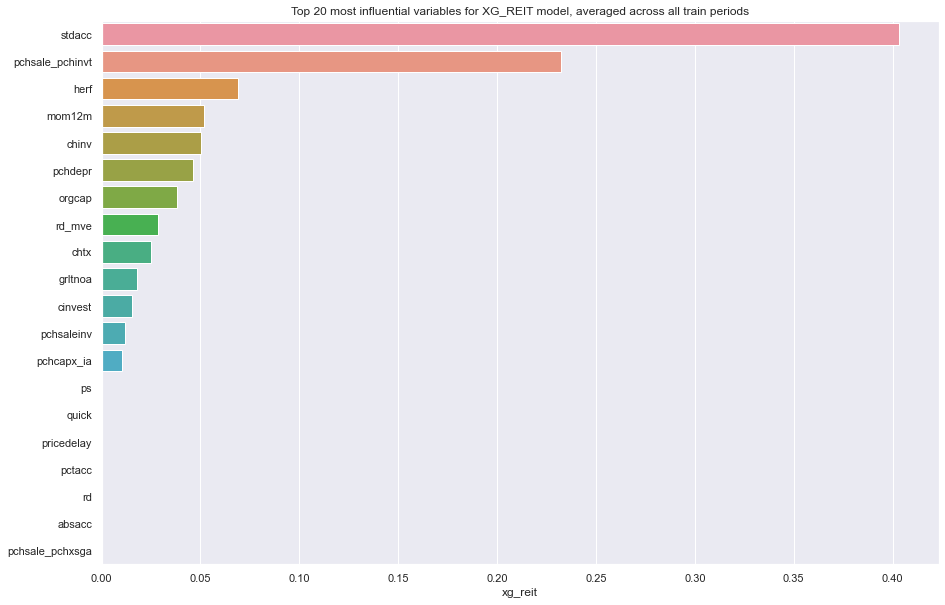

In [405]:
# Plot features of importance
# Plot graph
df_top20 = df_impt.sort_values(by=[model_name], ascending = False).head(20)
plt.figure(figsize=(15,10))
plt.title(f'Top 20 most influential variables for {model_name.upper()} model, averaged across all train periods')
sns.barplot(data = df_top20, x = model_name, y = df_top20.index);


In [406]:
# Merge df_temp to existing df_r2drecrease table

df_r2decrease_reit = pd.merge(
    left = df_r2decrease_reit,
    right = df_impt[model_name],
    how = 'left',
    left_index = True,
    right_index = True    
)

# Rank R2decrease table after including new model results
df_featurerank_reit = df_r2decrease_reit.rank() 
df_featurerank_reit['all_models'] = df_featurerank_reit.sum(axis=1)

# Display tables
display(df_r2decrease_reit)
display(df_featurerank_reit.sort_values('all_models', ascending = False))

# Save dfs to .csv 
df_r2decrease_reit.to_csv('../data/df_r2decrease_reit.csv', index = True)
df_featurerank_reit.to_csv('../data/df_featurerank_reit.csv', index = True)

lr_reit  huber_reit  ridge_reit  lasso_reit  enet_reit  \
absacc           0.000306   -0.001380    0.000189    0.000000   0.000000   
acc              0.001430   -0.000741    0.001779    0.000000   0.000000   
aeavol           0.000650    0.000668    0.005239    0.001173   0.001226   
age              0.000137   -0.000080    0.001680    0.000018   0.000030   
agr              0.000223    0.005201    0.003357    0.000000   0.000010   
baspread         0.007390    0.007871    0.000149    0.000000   0.000000   
beta             0.008894    0.057075    0.000315    0.000000   0.000000   
betasq           0.013997    0.013039    0.002645    0.000000   0.000000   
bm               0.001241    0.000853    0.024032    0.025538   0.026162   
bm_ia            0.002404    0.004776    0.007611    0.004235   0.004285   
cash             0.000161    0.000505    0.003340    0.000873   0.000927   
cashdebt         0.000128   -0.001187    0.000750    0.000000   0.000000   
cashpr           0.001257    0.002444    0.004893    0.001111   0.001181   
cfp              0.006021    0.006040    0.008196    0.013265   0.013306   
cfp_ia           0.001410    0.004166    0.007417    0.015930   0.015591   
chatoia          0.000082   -0.000040   -0.000983   -0.000089  -0.000097   
chcsho           0.000206   -0.000878    0.005366    0.002707   0.002796   
chempia          0.001031    0.003782   -0.000006    0.000000   0.000000   
chinv            0.000245   -0.000393    0.000482    0.000000   0.000000   
chmom            0.052654    0.050540    0.096469    0.142593   0.139152   
chpmia           0.002182    0.002565    0.011188    0.005567   0.005818   
chtx            -0.000017   -0.000019    0.000188    0.000000   0.000000   
cinvest          0.000038    0.000148    0.000281    0.000000   0.000000   
convind          0.000886    0.000794    0.000866    0.000000   0.000000   
currat           0.091179    0.044869   -0.000742    0.000000   0.000000   
depr            -0.000063    0.000391    0.001464    0.000148   0.000158   
divi             0.000153    0.000328    0.000156    0.000000   0.000000   
divo             0.000145    0.000922    0.000460    0.000000   0.000000   
dolvol           0.052843    0.089712    0.018587    0.017184   0.017007   
dy               0.016294    0.015071    0.090116    0.083019   0.084596   
ear              0.000198    0.000341    0.007511    0.004939   0.005175   
egr              0.001280    0.002940    0.004116    0.001198   0.001247   
ep               0.001748    0.010111    0.008772    0.004712   0.004875   
gma              0.003155   -0.001219    0.004361    0.000000   0.000000   
grcapx           0.000474    0.000658   -0.000177    0.000000   0.000000   
grltnoa          0.002414    0.001948    0.004432    0.000000   0.000000   
herf             0.023766    0.022687    0.023490    0.026236   0.026005   
hire             0.000198    0.002251    0.000338    0.000000   0.000000   
idiovol          0.000873   -0.000939    0.012297    0.014589   0.014951   
ill              0.005484    0.010939    0.022225    0.013264   0.013836   
indmom          -0.000049    0.000309    0.000357    0.000269   0.000290   
invest           0.000890    0.000858    0.002343    0.000000   0.000000   
lev             -0.000274   -0.002811   -0.002411    0.000000   0.000000   
lgr              0.000145    0.000304    0.000079    0.000000   0.000000   
maxret           0.025620    0.054758    0.005975    0.000000   0.000000   
mom12m           0.004666    0.002331    0.047325    0.017174   0.020037   
mom1m            0.019050    0.030089    0.134880    0.123642   0.127685   
mom36m           0.004236    0.006796    0.023669    0.021621   0.022049   
mom6m            0.056381    0.030482    0.053236    0.127055   0.120789   
ms               0.000196    0.000743    0.002229    0.000000   0.000000   
mve0             0.200379    0.212738    0.122775    0.137827   0.135776   
mve_ia           0.116817    0.152169    0.033515    0.073484   0.

lr_reit  huber_reit  ridge_reit  lasso_reit  enet_reit  \
mom1m               84.0        84.0        94.0        91.0       92.0   
mom12m              74.0        60.0        88.0        82.0       83.0   
chmom               87.0        89.0        92.0        94.0       94.0   
mom6m               89.0        85.0        89.0        92.0       91.0   
mve0                94.0        94.0        93.0        93.0       93.0   
retvol              93.0        86.0        90.0        87.0       87.0   
dy                  83.0        82.0        91.0        90.0       90.0   
herf                85.0        83.0        83.0        86.0       85.0   
sgr                 79.0        76.0        87.0        88.0       88.0   
mom36m              72.0        72.0        84.0        84.0       84.0   
ill                 75.0        78.0        82.0        78.0       79.0   
rd_sale             73.0        74.0        74.0        77.0       77.0   
bm                  54.0        47.0        85.0        85.0       86.0   
dolvol              88.0        92.0        81.0        83.0       82.0   
maxret              86.0        90.0        68.0        26.0       25.5   
bm_ia               68.0        69.0        73.0        72.0       72.0   
chpmia              67.0        62.0        79.0        75.0       75.0   
saleinv             66.0        55.0        78.0        69.0       69.0   
mve_ia              92.0        93.0        86.0        89.0       89.0   
tang                61.0        54.0        77.0        66.0       67.0   
ep                  63.0        77.0        76.0        73.0       73.0   
sp                  59.0        75.0        66.0        76.0       76.0   
cfp                 76.0        71.0        75.0        79.0       78.0   
pchdepr             43.0        35.0        57.0        67.0       66.0   
cfp_ia              57.0        67.0        71.0        81.0       81.0   
idiovol             48.0         7.0        80.0        80.0       80.0   
ear                 29.0        33.0        72.0        74.0       74.0   
pchsale_pchinvt     27.0        28.0        51.0        52.0       51.0   
roavol              65.0        68.0        67.0        68.0       68.0   
rd_mve               8.0        44.0        47.0        50.0       53.0   
std_dolvol          39.0        53.0        63.0        59.0       59.0   
invest              50.0        48.0        46.0        26.0       25.5   
turn                77.0        79.0        40.0        62.0       62.0   
grltnoa             69.0        56.0        60.0        26.0       25.5   
zerotrade           82.0        57.0        50.0        53.0       52.0   
aeavol              46.0        43.0        64.0        64.0       64.0   
salerec             26.0        26.0        56.0        60.0       60.0   
cashpr              55.0        61.0        62.0        63.0       63.0   
stdacc              60.0        64.0        15.0        26.0       25.5   
cash                25.0        39.0        54.0        61.0       61.0   
egr                 56.0        63.0        58.0        65.0       65.0   
pchgm_pchsale       32.0        20.0        61.0        58.0       58.0   
nincr               37.0        13.0        53.0        49.0       49.0   
betasq              81.0        80.0        49.0        26.0       25.5   
beta                80.0        91.0        26.0        26.0       25.5   
orgcap              52.0        52.0        22.0        26.0       25.5   
roic                47.0         6.0        70.0        70.0       70.0   
stdcf               70.0        81.0         9.0        26.0       25.5   
chcsho              33.0         8.0        65.0        71.0       71.0   
baspread            78.0        73.0        18.0        26.0       25.5   
agr                 35.0        70.0        55.0        26.0       48.0   
roaq                62.0        65.0        69.0        26.0       25.5   
chinv               36.0        12.0      

## Portfolio forecasts

### Set index

In [44]:
# Set date to index, and sort
df_portfolio_reit.set_index('DATE', drop = True, inplace = True)
df_portfolio_reit.sort_index(ascending = True, inplace = True)
df_portfolio_sample1.set_index('DATE', drop = True, inplace = True)
df_portfolio_sample1.sort_index(ascending = True, inplace = True)
df_portfolio_sample2.set_index('DATE', drop = True, inplace = True)
df_portfolio_sample2.sort_index(ascending = True, inplace = True)

# Extract only test years (2006-2020)
df_portfolio_reit = df_portfolio_reit['2006':'2020']
df_portfolio_sample1 = df_portfolio_sample1['2006':'2020']
df_portfolio_sample2 = df_portfolio_sample2['2006':'2020']

In [45]:
# # Create Naive returns column, i.e. 0
# df_portfolio['naive_reit'] = [0] * len(df_portfolio)
# df_portfolio

In [46]:
display(df_portfolio_reit.isnull().sum(), df_portfolio_sample1.isnull().sum(), df_portfolio_sample2.isnull().sum())

RET       0
mve0    101
dtype: int64

RET       0
mve0    145
dtype: int64

RET     0
mve0    0
dtype: int64

### Fill NAs
For missing features, I replace with the cross-sectional median at each month for each stock, respectively. 


In [47]:
# Group by date first, then fill NaN values with median
df_portfolio_reit['mve0'] = \
  df_portfolio_reit.groupby(['DATE'])['mve0'].transform(lambda x: x.fillna(x.median()))

df_portfolio_sample1['mve0'] = \
  df_portfolio_sample1.groupby(['DATE'])['mve0'].transform(lambda x: x.fillna(x.median()))

df_portfolio_sample2['mve0'] = \
  df_portfolio_sample2.groupby(['DATE'])['mve0'].transform(lambda x: x.fillna(x.median()))

### Create predicted values

In [48]:
# Create expanding average of returns, to serve as baseline model
def baseline_average(X, y,
                     start_train,
                     start_test,
                     final_year_of_testing):
    
    # Extract y_test values    
    df_temp = y[f'{start_test}' : f'{final_year_of_testing}']
    
    predictions = []
    for i in range(final_year_of_testing - start_test + 1):
        y_pred = [np.average(y[f'{start_train}' : f'{start_test - 1 + i}'])] \
                    * len(y[f'{start_test + i}'])
        predictions.append(y_pred)
    
    # Flatten multiple arrays of predictions into one array
    predictions = [item for sublist in predictions for item in sublist]
    
    # Create Pandas series with dates as index
    predictions = pd.Series(predictions).rename('baseline_reit')
    predictions.index = df_temp.index
    
    # Add model predictions to master dataframe
    df_temp = pd.concat([df_temp, predictions], axis = 1)
    
    return df_temp

In [49]:
# # Create baseline predictions based on expanding window of average returns
# df_temp = baseline_average(
#     X = X_reit, 
#     y = y_reit, 
#     start_train = 1990,
#     start_test = 2006,
#     final_year_of_testing = 2020
# )
# df_temp

In [50]:
# # Merge baseline predictions to actual returns and naive predictions
# df_portfolio = pd.concat(
#     [df_portfolio, df_temp.drop(columns = 'RET')], 
#     axis = 1
# )
# df_portfolio

In [51]:
# Walk-forward computation of predicted returns, 
def portfolio_predictions(X, y, 
                          model_names,
                          start_train,
                          start_val, 
                          start_test, 
                          final_year_of_testing):
    
    # Extract y_test values    
    df_temp = y[f'{start_test}' : f'{final_year_of_testing}']
    
    for model_name in model_names:
    
        predictions = []

        for i in range(final_year_of_testing - start_test + 1):

            # Create train-test sets, no need for validate set
            X_train, _, X_test, y_train, _, y_test = \
            train_val_test_split(
                X, y, 
                start_train, 
                start_val + i, 
                start_test + i
            )

            # Load pickled model
            filename = f'../pickle/{model_name}_{start_test + i}.pkl'
            model = pickle.load(open(filename,'rb'))
            print(f'Working on {model_name}_{start_test + i}...')
            
            # Predicted values
            y_pred = model_predict(model, X_test)
            predictions.append(y_pred)

        # Flatten multiple arrays of predictions into one array
        predictions = [item for sublist in predictions for item in sublist]

        # Create Pandas series with dates as index
        predictions = pd.Series(predictions).rename(f'{model_name}')
        predictions.index = df_temp.index
        
        # Add model predictions to master dataframe
        df_temp = pd.concat([df_temp, predictions], axis = 1)
    
    return df_temp

In [52]:
# Extract predictions from chosen models
to_extract_reit = [
    'lr_reit', 'huber_reit', 'ridge_reit', 
    'lasso_reit', 'enet_reit', 'pcr_reit', 
    'pls_reit', 'rf_reit', 'et_reit', 
    'xg_reit'
]

df_temp_reit = portfolio_predictions(
    X = X_reit, 
    y = y_reit, 
    model_names = to_extract_reit,
    start_train = 1990,
    start_val = 2006, # Set equal to start of test year, so that train year ends just before test year
    start_test = 2006,
    final_year_of_testing = 2020
)

# Convert PLS regression's output 
df_temp_reit['pls_reit'] = df_temp_reit['pls_reit'].astype('float')

# Display
df_temp_reit

Working on lr_reit_2006...
Working on lr_reit_2007...
Working on lr_reit_2008...
Working on lr_reit_2009...
Working on lr_reit_2010...
Working on lr_reit_2011...
Working on lr_reit_2012...
Working on lr_reit_2013...
Working on lr_reit_2014...
Working on lr_reit_2015...
Working on lr_reit_2016...
Working on lr_reit_2017...
Working on lr_reit_2018...
Working on lr_reit_2019...
Working on lr_reit_2020...
Working on huber_reit_2006...
Working on huber_reit_2007...
Working on huber_reit_2008...
Working on huber_reit_2009...
Working on huber_reit_2010...
Working on huber_reit_2011...
Working on huber_reit_2012...
Working on huber_reit_2013...
Working on huber_reit_2014...
Working on huber_reit_2015...
Working on huber_reit_2016...
Working on huber_reit_2017...
Working on huber_reit_2018...
Working on huber_reit_2019...
Working on huber_reit_2020...
Working on ridge_reit_2006...
Working on ridge_reit_2007...
Working on ridge_reit_2008...
Working on ridge_reit_2009...
Working on ridge_reit_201

RET   lr_reit  huber_reit  ridge_reit  lasso_reit  enet_reit  \
DATE                                                                          
2006-01-31  4.7673  1.989867    1.126228    1.168966    1.036317   1.039493   
2006-01-31  5.0810  1.152962    1.131279    0.769387    0.988572   0.984900   
2006-01-31  9.9680 -0.471339    0.106053   -0.038690   -0.541351  -0.534490   
2006-01-31 -0.5082  1.688232    1.596264    1.485110    1.723413   1.717433   
2006-01-31 -1.8837  0.634796   -0.435704    0.517955    0.758624   0.756918   
...            ...       ...         ...         ...         ...        ...   
2020-12-31  6.8546  0.093214   -0.073124    0.279459    0.450637   0.448511   
2020-12-31  4.7977 -0.222146   -0.551933    0.263307    0.307392   0.308205   
2020-12-31  3.8288  0.493113    0.305954    0.536910    0.517197   0.518015   
2020-12-31  1.4743  1.457456    1.657268    1.241957    1.297764   1.295361   
2020-12-31 -6.6638  0.103837   -0.033633    0.528153    0.540740   0.542447   

            pcr_reit  pls_reit   rf_reit   et_reit   xg_reit  
DATE                                                          
2006-01-31  1.037767  1.128768  0.164323  0.695741  0.666985  
2006-01-31  0.462084  0.448106  0.100544  0.897650  0.666985  
2006-01-31  0.630566 -0.063534  0.024324  0.315433  0.666985  
2006-01-31  1.532967  1.341081  0.334016  1.175283  0.666985  
2006-01-31  0.965628  1.209915 -0.475814  0.695359  0.666985  
...              ...       ...       ...       ...       ...  
2020-12-31  0.020039 -0.116475 -0.314729  0.392007  0.604348  
2020-12-31  0.480562  0.487340 -0.240518  0.488629  0.604348  
2020-12-31  0.690776  0.588978 -0.070967  0.373987  0.604348  
2020-12-31  1.141429  1.085344  0.115589  1.075159  0.604348  
2020-12-31  0.542926  0.597952  0.037970  0.503909  0.604348  

[32255 rows x 11 columns]

In [53]:
# # Extract predictions from chosen models
# to_extract_sample1 = [
#     'lr_sample1', 'huber_sample1', 'ridge_sample1', 
#     'lasso_sample1', 'enet_sample1', 'pcr_sample1', 
#     'pls_sample1', 'rf_sample1', 'et_sample1', 
#     'xg_sample1'
# ]

# df_temp_sample1 = portfolio_predictions(
#     X = X_1, 
#     y = y_1, 
#     model_names = to_extract_sample1,
#     start_train = 1990,
#     start_val = 2006, # Set equal to start of test year, so that train year ends just before test year
#     start_test = 2006,
#     final_year_of_testing = 2020
# )

# # Convert PLS regression's output 
# df_temp_sample1['pls_sample1'] = df_temp_sample1['pls_sample1'].astype('float')

In [54]:
# # Extract predictions from chosen models
# to_extract_sample2 = [
#     'lr_sample2', 'huber_sample2', 'ridge_sample2', 
#     'lasso_sample2', 'enet_sample2', 'pcr_sample2', 
#     'pls_sample2', 'rf_sample2', 'et_sample2', 
#     'xg_sample2'
# ]

# df_temp_sample2 = portfolio_predictions(
#     X = X_2, 
#     y = y_2, 
#     model_names = to_extract_sample2,
#     start_train = 1990,
#     start_val = 2006, # Set equal to start of test year, so that train year ends just before test year
#     start_test = 2006,
#     final_year_of_testing = 2020
# )

# # Convert PLS regression's output 
# df_temp_sample2['pls_sample2'] = df_temp_sample2['pls_sample2'].astype('float')

In [55]:
# Walk-forward computation of predicted returns, for NEURAL NETWORK ensemble
def portfolio_predictions_nn(X, y, 
                          model_names,
                          ensemble,
                          start_train,
                          start_val, 
                          start_test, 
                          final_year_of_testing):
    
    # Extract y_test values    
    df_temp = y[f'{start_test}' : f'{final_year_of_testing}']

    
    for model_name in model_names:
    
        predictions = []

        for i in range(final_year_of_testing - start_test + 1):

            # Create train-test sets, no need for validate set
            X_train, _, X_test, y_train, _, y_test = \
            train_val_test_split(
                X, y, 
                start_train, 
                start_val + i, 
                start_test + i
            )
            
            y_pred_avg = []
            
            for j in range(ensemble):
                # Load pickled model
                filename = f'../pickle/{model_name}_{start_test + i}_{j}'
                model = load_model(filename)
                print(f'Working on {model_name}_{start_test + i}_{j}...')
                
                # Predicted values
                y_pred = model_predict(model, X_test)
                
                # Flatten multiple arrays into one (for Neural Network)
                y_pred = [item for sublist in y_pred for item in sublist]
                
                # Append to y_pred_avg to create ensemble of predictions
                y_pred_avg.append(y_pred)
                
            # Average ensemble of predicted values
            y_pred_avg = np.average(y_pred_avg, axis = 0)
            predictions.append(y_pred_avg)
        
        # Flatten multiple arrays of predictions into one array
        predictions = [item for sublist in predictions for item in sublist]
        
        # Create Pandas series with dates as index
        predictions = pd.Series(predictions).rename(f'{model_name}')
        predictions.index = df_temp.index

        # Add model predictions to master dataframe
        df_temp = pd.concat([df_temp, predictions], axis = 1)
    
    return df_temp

In [56]:
# Set X to np.array to improve speed
def model_predict(model, X_validate):
    # Convert to np.array before calling model.fit()
    #  to increase processing speed
    X_validate = np.asarray(X_validate)    
    
    # make predictions
    y_pred = model.predict(X_validate)
    return y_pred

In [57]:
# Extract predictions from chosen models
to_extract_nn = [
    'nn1-l2_reit', 'nn3-l2_reit', 'nn5-l2_reit', 
    'nn7-l2_reit', 'nn9-l2_reit'
]

df_temp_reit_nn = portfolio_predictions_nn(
    X = X_reit, 
    y = y_reit, 
    ensemble = 5,
    model_names = to_extract_nn,
    start_train = 1990,
    start_val = 2006, # Set equal to start of test year, so that train year ends just before test year
    start_test = 2006,
    final_year_of_testing = 2020
)

df_temp_reit_nn

2021-11-08 06:15:17.909705: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2021-11-08 06:15:17.920905: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 6. Tune using inter_op_parallelism_threads for best performance.


Working on nn1-l2_reit_2006_0...
Working on nn1-l2_reit_2006_1...
Working on nn1-l2_reit_2006_2...
Working on nn1-l2_reit_2006_3...
Working on nn1-l2_reit_2006_4...
Working on nn1-l2_reit_2007_0...
Working on nn1-l2_reit_2007_1...
Working on nn1-l2_reit_2007_2...
Working on nn1-l2_reit_2007_3...
Working on nn1-l2_reit_2007_4...
Working on nn1-l2_reit_2008_0...
Working on nn1-l2_reit_2008_1...
Working on nn1-l2_reit_2008_2...
Working on nn1-l2_reit_2008_3...
Working on nn1-l2_reit_2008_4...
Working on nn1-l2_reit_2009_0...
Working on nn1-l2_reit_2009_1...
Working on nn1-l2_reit_2009_2...
Working on nn1-l2_reit_2009_3...
Working on nn1-l2_reit_2009_4...
Working on nn1-l2_reit_2010_0...
Working on nn1-l2_reit_2010_1...
Working on nn1-l2_reit_2010_2...
Working on nn1-l2_reit_2010_3...
Working on nn1-l2_reit_2010_4...
Working on nn1-l2_reit_2011_0...
Working on nn1-l2_reit_2011_1...
Working on nn1-l2_reit_2011_2...
Working on nn1-l2_reit_2011_3...
Working on nn1-l2_reit_2011_4...
Working on

Working on nn7-l2_reit_2010_4...
Working on nn7-l2_reit_2011_0...
Working on nn7-l2_reit_2011_1...
Working on nn7-l2_reit_2011_2...
Working on nn7-l2_reit_2011_3...
Working on nn7-l2_reit_2011_4...
Working on nn7-l2_reit_2012_0...
Working on nn7-l2_reit_2012_1...
Working on nn7-l2_reit_2012_2...
Working on nn7-l2_reit_2012_3...
Working on nn7-l2_reit_2012_4...
Working on nn7-l2_reit_2013_0...
Working on nn7-l2_reit_2013_1...
Working on nn7-l2_reit_2013_2...
Working on nn7-l2_reit_2013_3...
Working on nn7-l2_reit_2013_4...
Working on nn7-l2_reit_2014_0...
Working on nn7-l2_reit_2014_1...
Working on nn7-l2_reit_2014_2...
Working on nn7-l2_reit_2014_3...
Working on nn7-l2_reit_2014_4...
Working on nn7-l2_reit_2015_0...
Working on nn7-l2_reit_2015_1...
Working on nn7-l2_reit_2015_2...
Working on nn7-l2_reit_2015_3...
Working on nn7-l2_reit_2015_4...
Working on nn7-l2_reit_2016_0...
Working on nn7-l2_reit_2016_1...
Working on nn7-l2_reit_2016_2...
Working on nn7-l2_reit_2016_3...
Working on

RET  nn1-l2_reit  nn3-l2_reit  nn5-l2_reit  nn7-l2_reit  \
DATE                                                                     
2006-01-31  4.7673     0.977203     0.010821     0.517758     0.339107   
2006-01-31  5.0810     0.618513     0.492708     0.498279     0.363438   
2006-01-31  9.9680    -0.049053     0.351470     0.439805     0.389197   
2006-01-31 -0.5082     1.150196     0.580329     0.500989     0.406189   
2006-01-31 -1.8837     2.133592    -0.333784     0.560799     0.426913   
...            ...          ...          ...          ...          ...   
2020-12-31  6.8546     0.184385     0.270903     0.555955     0.883834   
2020-12-31  4.7977     0.527764    -0.178835     0.996253     0.805669   
2020-12-31  3.8288     0.315262     0.447329     0.875791     0.548325   
2020-12-31  1.4743     1.087351     0.640577     1.163012     0.776846   
2020-12-31 -6.6638     0.452189     0.296149     0.862511     0.579997   

            nn9-l2_reit  
DATE                     
2006-01-31     0.460167  
2006-01-31     0.475137  
2006-01-31     0.443965  
2006-01-31     0.474189  
2006-01-31     0.956413  
...                 ...  
2020-12-31     0.561264  
2020-12-31     0.540785  
2020-12-31     0.878577  
2020-12-31     0.980667  
2020-12-31     0.550266  

[32255 rows x 6 columns]

In [58]:
# Combine predictions to y_true and market weights
df_portfolio_reit = pd.concat(
    [df_portfolio_reit, 
     df_temp_reit.drop(columns = 'RET'), 
     df_temp_reit_nn.drop(columns = 'RET')], 
    axis = 1
)

df_portfolio_reit

# df_portfolio_sample1 = pd.concat(
#     [df_portfolio_sample1, df_temp_sample1.drop(columns = 'RET')], 
#     axis = 1
# )

# df_portfolio_sample2 = pd.concat(
#     [df_portfolio_sample2, df_temp_sample2.drop(columns = 'RET')], 
#     axis = 1
# )

RET          mve0   lr_reit  huber_reit  ridge_reit  \
DATE                                                                 
2006-01-31  4.7673  4.216481e+05  1.989867    1.126228    1.168966   
2006-01-31  5.0810  5.988280e+05  1.152962    1.131279    0.769387   
2006-01-31  9.9680  1.578202e+06 -0.471339    0.106053   -0.038690   
2006-01-31 -0.5082  2.830972e+06  1.688232    1.596264    1.485110   
2006-01-31 -1.8837  3.843975e+03  0.634796   -0.435704    0.517955   
...            ...           ...       ...         ...         ...   
2020-12-31  6.8546  1.567118e+06  0.093214   -0.073124    0.279459   
2020-12-31  4.7977  1.743469e+06 -0.222146   -0.551933    0.263307   
2020-12-31  3.8288  2.045451e+06  0.493113    0.305954    0.536910   
2020-12-31  1.4743  4.000504e+06  1.457456    1.657268    1.241957   
2020-12-31 -6.6638  3.654523e+06  0.103837   -0.033633    0.528153   

            lasso_reit  enet_reit  pcr_reit  pls_reit   rf_reit   et_reit  \
DATE                                                                        
2006-01-31    1.036317   1.039493  1.037767  1.128768  0.164323  0.695741   
2006-01-31    0.988572   0.984900  0.462084  0.448106  0.100544  0.897650   
2006-01-31   -0.541351  -0.534490  0.630566 -0.063534  0.024324  0.315433   
2006-01-31    1.723413   1.717433  1.532967  1.341081  0.334016  1.175283   
2006-01-31    0.758624   0.756918  0.965628  1.209915 -0.475814  0.695359   
...                ...        ...       ...       ...       ...       ...   
2020-12-31    0.450637   0.448511  0.020039 -0.116475 -0.314729  0.392007   
2020-12-31    0.307392   0.308205  0.480562  0.487340 -0.240518  0.488629   
2020-12-31    0.517197   0.518015  0.690776  0.588978 -0.070967  0.373987   
2020-12-31    1.297764   1.295361  1.141429  1.085344  0.115589  1.075159   
2020-12-31    0.540740   0.542447  0.542926  0.597952  0.037970  0.503909   

             xg_reit  nn1-l2_reit  nn3-l2_reit  nn5-l2_reit  nn7-l2_reit  \
DATE                                                                       
2006-01-31  0.666985     0.977203     0.010821     0.517758     0.339107   
2006-01-31  0.666985     0.618513     0.492708     0.498279     0.363438   
2006-01-31  0.666985    -0.049053     0.351470     0.439805     0.389197   
2006-01-31  0.666985     1.150196     0.580329     0.500989     0.406189   
2006-01-31  0.666985     2.133592    -0.333784     0.560799     0.426913   
...              ...          ...          ...          ...          ...   
2020-12-31  0.604348     0.184385     0.270903     0.555955     0.883834   
2020-12-31  0.604348     0.527764    -0.178835     0.996253     0.805669   
2020-12-31  0.604348     0.315262     0.447329     0.875791     0.548325   
2020-12-31  0.604348     1.087351     0.640577     1.163012     0.776846   
2020-12-31  0.604348     0.452189     0.296149     0.862511     0.579997   

            nn9-l2_reit  
DATE                     
2006-01-31     0.460167  
2006-01-31     0.475137  
2006-01-31     0.443965  
2006-01-31     0.474189  
2006-01-31     0.956413  
...                 ...  
2020-12-31     0.561264  
2020-12-31     0.540785  
2020-12-31     0.878577  
2020-12-31     0.980667  
2020-12-31     0.550266  

[32255 rows x 17 columns]

In [59]:
# Need to take DATE out from Index into Column for groupby to work later
df_portfolio_reit = df_portfolio_reit.reset_index()
# df_portfolio_sample1 = df_portfolio_sample1.reset_index()
# df_portfolio_sample2 = df_portfolio_sample2.reset_index()

In [60]:
# Portfolio returns: equal weighted and market-cap weighted
# vw = lambda x: np.average(x, weights = df_portfolio.loc[x.index, 'mve0'], axis = 0)

# Equal-weighted and volume-weighted
df_ew_reit = df_portfolio_reit.groupby('DATE').mean().drop(columns = "mve0")
df_vw_reit = df_portfolio_reit.groupby('DATE').agg(
    lambda x: np.average(x, weights = df_portfolio_reit.loc[x.index, 'mve0'], axis = 0)
).drop(columns = "mve0")

# df_ew_sample1 = df_portfolio_sample1.groupby('DATE').mean().drop(columns = "mve0")
# df_vw_sample1 = df_portfolio_sample1.groupby('DATE').agg(
#     lambda x: np.average(x, weights = df_portfolio_sample1.loc[x.index, 'mve0'], axis = 0)
# ).drop(columns = "mve0")

# df_ew_sample2 = df_portfolio_sample2.groupby('DATE').mean().drop(columns = "mve0")
# df_vw_sample2 = df_portfolio_sample2.groupby('DATE').agg(
#     lambda x: np.average(x, weights = df_portfolio_sample2.loc[x.index, 'mve0'], axis = 0)
# ).drop(columns = "mve0")


In [61]:
# Calculate Sharpe ratio of equal- and value- weighted portfolio
ew_sharpe = np.mean(df_ew_reit['RET']) / np.std(df_ew_reit['RET'])
vw_sharpe = np.mean(df_vw_reit['RET']) / np.std(df_vw_reit['RET'])

ew_sharpe * np.sqrt(12), vw_sharpe * np.sqrt(12)

(0.37050007578331984, 0.6513237019322538)

Sharpe ratio of volume-weighted looks ridiculously high. Must have been dominated a few REITs at the top. Impose sqrt(market cap) to reduce impact of extremely large REITs.

In [62]:
# # Dampen impact of mve0
df_portfolio_reit['mve0'] = np.log(df_portfolio_reit['mve0'])
# df_portfolio_sample1['mve0'] = np.log(df_portfolio_sample1['mve0'])
# df_portfolio_sample2['mve0'] = np.log(df_portfolio_sample2['mve0'])

In [63]:
# # Rerun

df_ew_reit = df_portfolio_reit.groupby('DATE').mean().drop(columns = ["mve0"])
df_vw_reit = df_portfolio_reit.groupby('DATE').agg(
    lambda x: np.average(x, weights = df_portfolio_reit.loc[x.index, 'mve0'], axis = 0)
).drop(columns = ["mve0"])

# df_ew_sample1 = df_portfolio_sample1.groupby('DATE').mean().drop(columns = "mve0")
# df_vw_sample1 = df_portfolio_sample1.groupby('DATE').agg(
#     lambda x: np.average(x, weights = df_portfolio_sample1.loc[x.index, 'mve0'], axis = 0)
# ).drop(columns = "mve0")

# df_ew_sample2 = df_portfolio_sample2.groupby('DATE').mean().drop(columns = "mve0")
# df_vw_sample2 = df_portfolio_sample2.groupby('DATE').agg(
#     lambda x: np.average(x, weights = df_portfolio_sample2.loc[x.index, 'mve0'], axis = 0)
# ).drop(columns = "mve0")

ew_sharpe = np.mean(df_ew_reit['RET']) / np.std(df_ew_reit['RET'])
vw_sharpe = np.mean(df_vw_reit['RET']) / np.std(df_vw_reit['RET'])

ew_sharpe * np.sqrt(12), vw_sharpe * np.sqrt(12)

(0.37050007578331984, 0.4033885527906106)

In [64]:
## Calculate Sharpe Ratio gain (Campbell and Thompson, 2008)

# Calculate Sharpe ratio of equal- and value- weighted portfolio
ew_sharpe = np.mean(df_ew_reit['RET']) / np.std(df_ew_reit['RET'])
vw_sharpe = np.mean(df_vw_reit['RET']) / np.std(df_vw_reit['RET'])

# Gain function
def sharpe_gain(sharpe, r2):
    # on a monthly basis
    new_sharpe = np.sqrt(
        (sharpe ** 2 + r2) / (1 - r2)
    )
    # convert to annualized
    return round((new_sharpe * np.sqrt(12)) - (sharpe * np.sqrt(12)),2)

def sharpe_gain_percent(sharpe, r2):
    # on a monthly basis
    new_sharpe = np.sqrt(
        (sharpe ** 2 + r2) / (1 - r2)
    )
    return f'{(new_sharpe / sharpe - 1)*100:.0f}%'

In [65]:
# Create portfolio performance table
df_portfolio_metric = pd.DataFrame({
    'Dataset' : [
        'REIT', 'REIT', 
        '', 
        'REIT', 'REIT', 
        '', 
        'REIT', 'REIT', 
        '',
        'REIT', 'REIT'
    ],
    'Portfolio' : [
        'Equal Weighted', 'Value Weighted', 
        '', 
         'Equal Weighted', 'Value Weighted', 
        '', 
        'Equal Weighted', 'Value Weighted',
        '',
        'Equal Weighted', 'Value Weighted'
    ],
    'Metric' : [
        'R2', 'R2', 
        '', 
        'RMSE', 'RMSE',
        '', 
        'Sharpe ratio gain (annualized)', 'Sharpe ratio gain (annualized)', 
        '',
        'Sharpe ratio gain (percentage)', 'Sharpe ratio gain (percentage)'
    ]
})

# Populate with metrics
for i in df_ew_reit.drop(columns = 'RET').columns:
    df_portfolio_metric[f'{i[:-5]}'] \
      = [round(measure_r2(df_ew_reit['RET'], df_ew_reit[i]),3), 
         round(measure_r2(df_vw_reit['RET'], df_vw_reit[i]),3),
        '',
         round(measure_rmse(df_ew_reit['RET'], df_ew_reit[i]),3), 
         round(measure_rmse(df_vw_reit['RET'], df_vw_reit[i]),3),
        '',
         sharpe_gain(ew_sharpe, measure_r2(df_ew_reit['RET'], df_ew_reit[i])/100), 
         sharpe_gain(vw_sharpe, measure_r2(df_vw_reit['RET'], df_vw_reit[i])/100),
        '',
         sharpe_gain_percent(ew_sharpe, measure_r2(df_ew_reit['RET'], df_ew_reit[i])/100), 
         sharpe_gain_percent(vw_sharpe, measure_r2(df_vw_reit['RET'], df_vw_reit[i])/100) 
        ]

df_portfolio_metric

Dataset       Portfolio                          Metric     lr  huber  \
0     REIT  Equal Weighted                              R2  0.504  0.521   
1     REIT  Value Weighted                              R2  0.797  0.793   
2                                                                          
3     REIT  Equal Weighted                            RMSE  6.589  6.589   
4     REIT  Value Weighted                            RMSE  6.531  6.532   
5                                                                          
6     REIT  Equal Weighted  Sharpe ratio gain (annualized)   0.08   0.08   
7     REIT  Value Weighted  Sharpe ratio gain (annualized)   0.11   0.11   
8                                                                          
9     REIT  Equal Weighted  Sharpe ratio gain (percentage)    20%    21%   
10    REIT  Value Weighted  Sharpe ratio gain (percentage)    26%    26%   

    ridge  lasso   enet    pcr    pls     rf     et     xg nn1-l2 nn3-l2  \
0   0.553  0.563  0.563  0.566  0.564 -2.122 -0.077 -0.578  0.762  0.173   
1   0.798   0.79  0.791  0.775  0.819 -1.844  0.162 -0.414  0.974   0.33   
2                                                                          
3   6.588  6.587  6.587  6.587  6.587  6.676  6.608  6.625  6.581    6.6   
4   6.531  6.532  6.532  6.532  6.531  6.618  6.552  6.571  6.526  6.547   
5                                                                          
6    0.08   0.08   0.08   0.08   0.08    NaN  -0.01  -0.11   0.11   0.03   
7    0.11   0.11   0.11    0.1   0.11    NaN   0.02  -0.07   0.13   0.05   
8                                                                          
9     22%    23%    23%    23%    23%   nan%    -3%   -30%    30%     7%   
10    27%    26%    26%    26%    27%   nan%     6%   -17%    32%    12%   

   nn5-l2 nn7-l2 nn9-l2  
0    0.46  1.104  1.192  
1   0.665  1.235  1.353  
2                        
3   6.591  6.569  6.566  
4   6.536  6.517  6.513  
5                        
6    0.07   0.15   0.16  
7    0.09   0.16   0.17  
8                        
9     19%    41%    44%  
10    22%    39%    42%

## Create long-short portfolios

In [327]:
df_portfolio_reit

DATE     RET       mve0   lr_reit  huber_reit  ridge_reit  \
0     2006-01-31  4.7673  12.951926  1.989867    1.126228    1.168966   
1     2006-01-31  5.0810  13.302730  1.152962    1.131279    0.769387   
2     2006-01-31  9.9680  14.271797 -0.471339    0.106053   -0.038690   
3     2006-01-31 -0.5082  14.856131  1.688232    1.596264    1.485110   
4     2006-01-31 -1.8837   8.254262  0.634796   -0.435704    0.517955   
...          ...     ...        ...       ...         ...         ...   
32250 2020-12-31  6.8546  14.264749  0.093214   -0.073124    0.279459   
32251 2020-12-31  4.7977  14.371387 -0.222146   -0.551933    0.263307   
32252 2020-12-31  3.8288  14.531129  0.493113    0.305954    0.536910   
32253 2020-12-31  1.4743  15.201931  1.457456    1.657268    1.241957   
32254 2020-12-31 -6.6638  15.111476  0.103837   -0.033633    0.528153   

       lasso_reit  enet_reit  pcr_reit  pls_reit   rf_reit   et_reit  \
0        1.036317   1.039493  1.037767  1.128768  0.164323  0.695741   
1        0.988572   0.984900  0.462084  0.448106  0.100544  0.897650   
2       -0.541351  -0.534490  0.630566 -0.063534  0.024324  0.315433   
3        1.723413   1.717433  1.532967  1.341081  0.334016  1.175283   
4        0.758624   0.756918  0.965628  1.209915 -0.475814  0.695359   
...           ...        ...       ...       ...       ...       ...   
32250    0.450637   0.448511  0.020039 -0.116475 -0.314729  0.392007   
32251    0.307392   0.308205  0.480562  0.487340 -0.240518  0.488629   
32252    0.517197   0.518015  0.690776  0.588978 -0.070967  0.373987   
32253    1.297764   1.295361  1.141429  1.085344  0.115589  1.075159   
32254    0.540740   0.542447  0.542926  0.597952  0.037970  0.503909   

        xg_reit  nn1-l2_reit  nn3-l2_reit  nn5-l2_reit  nn7-l2_reit  \
0      0.666985     0.977203     0.010821     0.517758     0.339107   
1      0.666985     0.618513     0.492708     0.498279     0.363438   
2      0.666985    -0.049053     0.351470     0.439805     0.389197   
3      0.666985     1.150196     0.580329     0.500989     0.406189   
4      0.666985     2.133592    -0.333784     0.560799     0.426913   
...         ...          ...          ...          ...          ...   
32250  0.604348     0.184385     0.270903     0.555955     0.883834   
32251  0.604348     0.527764    -0.178835     0.996253     0.805669   
32252  0.604348     0.315262     0.447329     0.875791     0.548325   
32253  0.604348     1.087351     0.640577     1.163012     0.776846   
32254  0.604348     0.452189     0.296149     0.862511     0.579997   

       nn9-l2_reit  
0         0.460167  
1         0.475137  
2         0.443965  
3         0.474189  
4         0.956413  
...            ...  
32250     0.561264  
32251     0.540785  
32252     0.878577  
32253     0.980667  
32254     0.550266  

[32255 rows x 18 columns]

In [464]:
# Create custom function
def calc_pnl(df, model_name, top_cutoff, bottom_cutoff, metric, weight):
    
    # df: name of dataframe containing portfolio return
    # model_name: self-explanatory
    # top_cutoff: quantile level to buy stocks
    # bottom_cutoff: quantile level to buy stocks
    # metric = 'return' or 'sharpe'
    # weight = 'equal' or 'value'
    
    # Print progress
    print(f'Work in progress on {model_name}_{metric}_{weight}...')
    
    # Setup
    df_test = df[['DATE', 'mve0', 'RET', model_name]]
    bottom_quantile = df.groupby('DATE')[model_name].quantile(bottom_cutoff)
    top_quantile = df.groupby('DATE')[model_name].quantile(top_cutoff)

    # Buy sell indicators
    df_test['sell'] = (df_test[model_name] <= df_test['DATE'].map(bottom_quantile)).astype(int)
    df_test['buy'] = (df_test[model_name] >= df_test['DATE'].map(top_quantile)).astype(int)

    # Returns of buy / sell portfolios
    df_test['sell'] = df_test['RET'] * df_test['sell']
    df_test['buy'] = df_test['RET'] * df_test['buy']
    
    # Calculate equal-weighted P&L
    if weight == 'equal':
        
        # Set weights to 0 if buy/sell indicators are 0
        df_test['buy_weight'] = df_test.apply(
            lambda x: 0 if x['buy'] == 0 else 1, 
            axis = 1
        )
        df_test['sell_weight'] = df_test.apply(
            lambda x: 0 if x['sell'] == 0 else 1, 
            axis = 1
        )

        # Calculate long-short PnL table
        df_pnl_ew = df_test.groupby('DATE')['buy'].agg(
            lambda x: np.average(x, weights = df_test.loc[x.index, 'buy_weight'], axis = 0)
        ).drop(columns = ["mve0"]) - \
                    df_test.groupby('DATE')['sell'].agg(
            lambda x: np.average(x, weights = df_test.loc[x.index, 'sell_weight'], axis = 0)
        ).drop(columns = ["mve0"])
        
        # Return performance metric
        if metric == 'return':
            return round(np.mean(df_pnl_ew), 2)
        if metric == 'sharpe':
            return round((np.mean(df_pnl_ew) / np.std(df_pnl_ew)) * np.sqrt(12), 2)
        
    if weight == 'value':

        # Set weights to 0 if buy/sell indicators are 0
        df_test['buy_weight'] = df_test.apply(
            lambda x: 0 if x['buy'] == 0 else x['mve0'], 
            axis = 1
        )
        df_test['sell_weight'] = df_test.apply(
            lambda x: 0 if x['sell'] == 0 else x['mve0'], 
            axis = 1
        )
        
        # Calculate long-short PnL table
        df_pnl_vw = df_test.groupby('DATE')['buy'].agg(
            lambda x: np.average(x, weights = df_test.loc[x.index, 'buy_weight'], axis = 0)
        ).drop(columns = ["mve0"]) - \
                    df_test.groupby('DATE')['sell'].agg(
            lambda x: np.average(x, weights = df_test.loc[x.index, 'sell_weight'], axis = 0)
        ).drop(columns = ["mve0"])

        # Return performance metric
        if metric == 'return':
            return round(np.mean(df_pnl_vw), 2)
        if metric == 'sharpe':
            return round((np.mean(df_pnl_vw) / np.std(df_pnl_vw)) * np.sqrt(12), 2)
        

In [472]:
df_1 = calc_pnl(df = df_portfolio_reit, 
                  model_name = 'nn9-l2_reit', 
                  top_cutoff = 0.9, 
                  bottom_cutoff = 0.1, 
                  metric = 'return', 
                  weight = 'equal'
                 )

Work in progress on nn9-l2_reit_return_equal...


In [471]:
df_2 = calc_pnl(df = df_portfolio_reit, 
                  model_name = 'lr_reit', 
                  top_cutoff = 0.9, 
                  bottom_cutoff = 0.1, 
                  metric = 'return', 
                  weight = 'equal'
                 )

Work in progress on lr_reit_return_equal...


In [508]:
measure_r2(df_ew_reit['RET']['2007-10-31'], df_ew_reit['nn9-l2_reit']['2007-10-31'])

-95.03405588510756

In [509]:
measure_r2(df_ew_reit['RET']['2007-10-31'], df_ew_reit['lr_reit']['2007-10-31'])

-204.62351015277576

In [502]:
pd.concat([df_1, df_2], axis = 1)['2007']

0          1
DATE                           
2007-01-31 -1.744217   6.591756
2007-02-28 -7.307917   1.991717
2007-03-31 -0.688467   3.852622
2007-04-30  0.231818   6.194982
2007-05-31  2.378435   2.867176
2007-06-30  2.734712   4.414488
2007-07-31 -5.330759   9.730476
2007-08-31 -0.879276   6.229176
2007-09-30 -5.493762   1.077219
2007-10-31  0.588138  12.568019
2007-11-30 -3.608006  -1.202581
2007-12-31  2.324656   3.223400

In [491]:
pd.set_option('display.max_rows', None)
for i in range(2006, 2021):
    print(f'{i}') 
    print(f'{pd.concat([df_1, df_2], axis = 1)[f"{i}"].mean()}')

2006
0    0.525961
1    1.841579
dtype: float64
2007
0   -1.399554
1    4.794871
dtype: float64
2008
0    1.435621
1    9.338645
dtype: float64
2009
0    0.882020
1   -0.950349
dtype: float64
2010
0   -0.317492
1    1.772957
dtype: float64
2011
0    0.524430
1    0.978102
dtype: float64
2012
0    0.198454
1    2.399267
dtype: float64
2013
0    1.307318
1    3.094940
dtype: float64
2014
0    0.687843
1    1.068407
dtype: float64
2015
0   -1.134584
1    0.517344
dtype: float64
2016
0    0.988731
1    1.421064
dtype: float64
2017
0   -0.145489
1    0.696165
dtype: float64
2018
0    0.533259
1   -0.679416
dtype: float64
2019
0   -0.847886
1    1.707051
dtype: float64
2020
0    0.265873
1    1.368328
dtype: float64


In [218]:
# # Create custom function
# def calc_pnl(df, model_name, top_cutoff, bottom_cutoff, metric, weight):
    
#     # df: name of dataframe containing portfolio return
#     # model_name: self-explanatory
#     # top_cutoff: quantile level to buy stocks
#     # bottom_cutoff: quantile level to buy stocks
#     # metric = 'return' or 'sharpe'
#     # weight = 'equal' or 'value'
    
#     # Print progress
#     print(f'Work in progress on {model_name}_{metric}_{weight}...')
    
#     # Setup
#     df_test = df[['DATE', 'mve0', 'RET', model_name]]
#     bottom_quantile = df.groupby('DATE')[model_name].quantile(bottom_cutoff)
#     top_quantile = df.groupby('DATE')[model_name].quantile(top_cutoff)

#     # Buy sell indicators
#     df_test['sell'] = (df_test[model_name] <= df_test['DATE'].map(bottom_quantile)).astype(int)
#     df_test['buy'] = (df_test[model_name] >= df_test['DATE'].map(top_quantile)).astype(int)

#     # Set weights to 0 if buy/sell indicators are 0
#     df_test['weight'] = df_test.apply(
#         lambda x: 0 if (x['sell'] == 0 | x['buy'] == 0) else x['mve0'], 
#         axis = 1
#     )
#     # Returns
#     df_test['sell'] = df_test['RET'] * df_test['sell']
#     df_test['buy'] = df_test['RET'] * df_test['buy']
    
#     # Calculate equal-weighted P&L
#     if weight == 'equal':
#         df_pnl_ew = df_test.groupby('DATE')['buy'].mean() - df_test.groupby('DATE')['sell'].mean()
#         if metric == 'return':
#             return round(np.mean(df_pnl_ew), 2)
#         if metric == 'sharpe':
#             return round((np.mean(df_pnl_ew) / np.std(df_pnl_ew)) * np.sqrt(12), 2)
        
#     if weight == 'value':
#         df_pnl_vw = df_test.groupby('DATE')['buy'].agg(
#             lambda x: np.average(x, weights = df_test.loc[x.index, 'weight'], axis = 0)
#         ).drop(columns = ["mve0"]) - \
#         df_test.groupby('DATE')['sell'].agg(
#             lambda x: np.average(x, weights = df_test.loc[x.index, 'weight'], axis = 0)
#         ).drop(columns = ["mve0"])
#         if metric == 'return':
#             return round(np.mean(df_pnl_vw), 2)
#         if metric == 'sharpe':
#             return round((np.mean(df_pnl_vw) / np.std(df_pnl_vw)) * np.sqrt(12), 2)
        

In [280]:
to_extract = [
    'lr_reit', 'huber_reit', 'ridge_reit', 
    'lasso_reit', 'enet_reit', 'pcr_reit', 
    'pls_reit', 'rf_reit', 'et_reit', 
    'xg_reit', 'nn1-l2_reit', 'nn3-l2_reit', 
    'nn5-l2_reit', 'nn7-l2_reit', 'nn9-l2_reit'
]

In [286]:
df_portfolio_pnl = pd.DataFrame({
    'Dataset' : [
        'REIT', 'REIT', 
        '', 
        'REIT', 'REIT', 
        '', 
        'REIT', 'REIT', 
        '',
        'REIT', 'REIT'
    ],
    'Portfolio' : [
        'Top Decile minus Bottom Decile, Equal Weighted', 'Top Half minus Bottom Half, Equal Weighted', 
        '', 
        'Top Decile minus Bottom Decile, Value Weighted', 'Top Half minus Bottom Half, Value Weighted', 
        '', 
        'Top Decile minus Bottom Decile, Equal Weighted', 'Top Half minus Bottom Half, Equal Weighted', 
        '', 
        'Top Decile minus Bottom Decile, Value Weighted', 'Top Half minus Bottom Half, Value Weighted',
    ],
    'Metric' : [
        'Average Return (Monthly)', 'Average Return (Monthly)', 
        '', 
        'Average Return (Monthly)', 'Average Return (Monthly)', 
        '', 
        'Sharpe ratio', 'Sharpe ratio', 
        '',
        'Sharpe ratio', 'Sharpe ratio'
    ],
    'Buy and Hold' : [
        round(np.mean(df_ew_reit['RET']),2), round(np.mean(df_ew_reit['RET']),2),
        '',
        round(np.mean(df_vw_reit['RET']),2), round(np.mean(df_vw_reit['RET']),2),
        '',
        round(ew_sharpe * np.sqrt(12), 2), round(ew_sharpe * np.sqrt(12), 2),
        '',
        round(vw_sharpe * np.sqrt(12), 2), round(vw_sharpe * np.sqrt(12), 2)
    ]
})

df_portfolio_pnl

Dataset                                       Portfolio  \
0     REIT  Top Decile minus Bottom Decile, Equal Weighted   
1     REIT      Top Half minus Bottom Half, Equal Weighted   
2                                                            
3     REIT  Top Decile minus Bottom Decile, Value Weighted   
4     REIT      Top Half minus Bottom Half, Value Weighted   
5                                                            
6     REIT  Top Decile minus Bottom Decile, Equal Weighted   
7     REIT      Top Half minus Bottom Half, Equal Weighted   
8                                                            
9     REIT  Top Decile minus Bottom Decile, Value Weighted   
10    REIT      Top Half minus Bottom Half, Value Weighted   

                      Metric Buy and Hold  
0   Average Return (Monthly)          0.7  
1   Average Return (Monthly)          0.7  
2                                          
3   Average Return (Monthly)         0.76  
4   Average Return (Monthly)         0.76  
5                                          
6               Sharpe ratio         0.37  
7               Sharpe ratio         0.37  
8                                          
9               Sharpe ratio          0.4  
10              Sharpe ratio          0.4

In [287]:
%%time
# Populate with metrics
for i in df_ew_reit.drop(columns = 'RET').columns:
    df_portfolio_pnl[f'{i[:-5]}'] \
      = [calc_pnl(df = df_portfolio_reit, 
                  model_name = i, 
                  top_cutoff = 0.9, 
                  bottom_cutoff = 0.1, 
                  metric = 'return', 
                  weight = 'equal'
                 ), 
         calc_pnl(df = df_portfolio_reit, 
                  model_name = i, 
                  top_cutoff = 0.51, 
                  bottom_cutoff = 0.50, 
                  metric = 'return', 
                  weight = 'equal'
                 ), 
        '',
         calc_pnl(df = df_portfolio_reit, 
                  model_name = i, 
                  top_cutoff = 0.9, 
                  bottom_cutoff = 0.1, 
                  metric = 'return', 
                  weight = 'value'
                 ), 
         calc_pnl(df = df_portfolio_reit, 
                  model_name = i, 
                  top_cutoff = 0.51, 
                  bottom_cutoff = 0.50, 
                  metric = 'return', 
                  weight = 'value'
                 ), 
        '',
         calc_pnl(df = df_portfolio_reit, 
                  model_name = i, 
                  top_cutoff = 0.9, 
                  bottom_cutoff = 0.1, 
                  metric = 'sharpe', 
                  weight = 'equal'
                 ), 
         calc_pnl(df = df_portfolio_reit, 
                  model_name = i, 
                  top_cutoff = 0.51, 
                  bottom_cutoff = 0.50, 
                  metric = 'sharpe', 
                  weight = 'equal'
                 ), 
        '',
         calc_pnl(df = df_portfolio_reit, 
                  model_name = i, 
                  top_cutoff = 0.9, 
                  bottom_cutoff = 0.1, 
                  metric = 'sharpe', 
                  weight = 'value'
                 ), 
         calc_pnl(df = df_portfolio_reit, 
                  model_name = i, 
                  top_cutoff = 0.51, 
                  bottom_cutoff = 0.50, 
                  metric = 'sharpe', 
                  weight = 'value'
                 )
        ]

df_portfolio_pnl

Work in progress on lr_reit_return_equal...
Work in progress on lr_reit_return_equal...
Work in progress on lr_reit_return_value...
Work in progress on lr_reit_return_value...
Work in progress on lr_reit_sharpe_equal...
Work in progress on lr_reit_sharpe_equal...
Work in progress on lr_reit_sharpe_value...
Work in progress on lr_reit_sharpe_value...
Work in progress on huber_reit_return_equal...
Work in progress on huber_reit_return_equal...
Work in progress on huber_reit_return_value...
Work in progress on huber_reit_return_value...
Work in progress on huber_reit_sharpe_equal...
Work in progress on huber_reit_sharpe_equal...
Work in progress on huber_reit_sharpe_value...
Work in progress on huber_reit_sharpe_value...
Work in progress on ridge_reit_return_equal...
Work in progress on ridge_reit_return_equal...
Work in progress on ridge_reit_return_value...
Work in progress on ridge_reit_return_value...
Work in progress on ridge_reit_sharpe_equal...
Work in progress on ridge_reit_sharpe

Dataset                                       Portfolio  \
0     REIT  Top Decile minus Bottom Decile, Equal Weighted   
1     REIT      Top Half minus Bottom Half, Equal Weighted   
2                                                            
3     REIT  Top Decile minus Bottom Decile, Value Weighted   
4     REIT      Top Half minus Bottom Half, Value Weighted   
5                                                            
6     REIT  Top Decile minus Bottom Decile, Equal Weighted   
7     REIT      Top Half minus Bottom Half, Equal Weighted   
8                                                            
9     REIT  Top Decile minus Bottom Decile, Value Weighted   
10    REIT      Top Half minus Bottom Half, Value Weighted   

                      Metric Buy and Hold    lr huber ridge lasso  enet   pcr  \
0   Average Return (Monthly)          0.7  1.96  1.64  1.75  1.84  1.88  1.46   
1   Average Return (Monthly)          0.7  0.84  0.71  0.57  0.63  0.62  0.56   
2                                                                               
3   Average Return (Monthly)         0.76  1.97  1.57  1.59  1.74  1.78  1.32   
4   Average Return (Monthly)         0.76  0.83   0.7  0.53   0.6  0.59  0.49   
5                                                                               
6               Sharpe ratio         0.37  1.17  0.77  0.78  0.79  0.81  0.66   
7               Sharpe ratio         0.37  0.96  0.85  0.59  0.64  0.63  0.56   
8                                                                               
9               Sharpe ratio          0.4  1.22  0.75  0.72  0.76  0.77  0.61   
10              Sharpe ratio          0.4  0.97  0.84  0.56  0.63  0.62   0.5   

     pls    rf    et    xg nn1-l2 nn3-l2 nn5-l2 nn7-l2 nn9-l2  
0   0.95  0.56  1.19   0.5    1.3   0.63   0.94   1.22   0.23  
1   0.21  0.04  0.45   0.1    0.7   0.28    0.4   0.57   0.24  
2                                                              
3   0.81  0.47  1.09  0.39   1.22   0.65   0.87   1.23    0.2  
4   0.17   0.0  0.39  0.08   0.64   0.28   0.36   0.57   0.22  
5                                                              
6    0.4  0.27  0.53  0.48   0.82   0.36   0.58   0.74    0.2  
7   0.19  0.06  0.48   0.5   1.02   0.36    0.7   0.88   0.41  
8                                                              
9   0.35  0.24  0.49   0.4   0.81   0.38   0.57   0.78   0.19  
10  0.16  0.01  0.42  0.47   0.95   0.38   0.69   0.92   0.39

In [288]:
df_portfolio_pnl

Dataset                                       Portfolio  \
0     REIT  Top Decile minus Bottom Decile, Equal Weighted   
1     REIT      Top Half minus Bottom Half, Equal Weighted   
2                                                            
3     REIT  Top Decile minus Bottom Decile, Value Weighted   
4     REIT      Top Half minus Bottom Half, Value Weighted   
5                                                            
6     REIT  Top Decile minus Bottom Decile, Equal Weighted   
7     REIT      Top Half minus Bottom Half, Equal Weighted   
8                                                            
9     REIT  Top Decile minus Bottom Decile, Value Weighted   
10    REIT      Top Half minus Bottom Half, Value Weighted   

                      Metric Buy and Hold    lr huber ridge lasso  enet   pcr  \
0   Average Return (Monthly)          0.7  1.96  1.64  1.75  1.84  1.88  1.46   
1   Average Return (Monthly)          0.7  0.84  0.71  0.57  0.63  0.62  0.56   
2                                                                               
3   Average Return (Monthly)         0.76  1.97  1.57  1.59  1.74  1.78  1.32   
4   Average Return (Monthly)         0.76  0.83   0.7  0.53   0.6  0.59  0.49   
5                                                                               
6               Sharpe ratio         0.37  1.17  0.77  0.78  0.79  0.81  0.66   
7               Sharpe ratio         0.37  0.96  0.85  0.59  0.64  0.63  0.56   
8                                                                               
9               Sharpe ratio          0.4  1.22  0.75  0.72  0.76  0.77  0.61   
10              Sharpe ratio          0.4  0.97  0.84  0.56  0.63  0.62   0.5   

     pls    rf    et    xg nn1-l2 nn3-l2 nn5-l2 nn7-l2 nn9-l2  
0   0.95  0.56  1.19   0.5    1.3   0.63   0.94   1.22   0.23  
1   0.21  0.04  0.45   0.1    0.7   0.28    0.4   0.57   0.24  
2                                                              
3   0.81  0.47  1.09  0.39   1.22   0.65   0.87   1.23    0.2  
4   0.17   0.0  0.39  0.08   0.64   0.28   0.36   0.57   0.22  
5                                                              
6    0.4  0.27  0.53  0.48   0.82   0.36   0.58   0.74    0.2  
7   0.19  0.06  0.48   0.5   1.02   0.36    0.7   0.88   0.41  
8                                                              
9   0.35  0.24  0.49   0.4   0.81   0.38   0.57   0.78   0.19  
10  0.16  0.01  0.42  0.47   0.95   0.38   0.69   0.92   0.39